In [1]:
%run import_libs.py

### get data

In [2]:
df_train = get_train_data(TRAIN_PATH='./data/train.parquet')
num_features = pd.read_csv("num_feats_after_filtering.csv")["0"].to_list()

df_train_agg = get_df_w_aggrs(df=df_train, feats=num_features)
df_train_target = get_target(TARGET_PATH='./data/train_labels.csv')
df_train = get_train_data_with_target_merged(df_train=df_train_agg, df_train_target=df_train_target)

(458913, 151)
(458913, 151)
(458913, 151)
(458913, 162)
(458913, 616)


In [3]:
df_test = get_test_data(TEST_PATH='./data/test.parquet')
df_test = get_df_w_aggrs(df=df_test, feats=num_features)

(924621, 151)
(924621, 151)
(924621, 151)
(924621, 162)
(924621, 616)


In [4]:
df_train.head(3)

,customer_ID,P_2_min,P_3_min,P_4_min,D_39_min,D_41_min,D_42_min,D_43_min,D_44_min,D_45_min,...,D_114_last,D_116_last,D_117_last,D_120_last,D_126_last,D_63_last,D_64_last,D_66_last,D_68_last,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.868580,0.581678,0.0,0,0.0,NaN,NaN,0,0.708906,...,1,0,5,0,2,0,0,-1,6,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.861109,0.510142,0.0,0,0.0,NaN,0.060646,0,0.239459,...,1,0,0,0,2,3,0,-1,6,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.797670,0.381123,0.0,0,0.0,NaN,NaN,0,0.222406,...,1,0,0,0,2,3,2,-1,6,0


In [5]:
df_test.head(3)

,customer_ID,P_2_min,P_3_min,P_4_min,D_39_min,D_41_min,D_42_min,D_43_min,D_44_min,D_45_min,...,B_38_last,D_114_last,D_116_last,D_117_last,D_120_last,D_126_last,D_63_last,D_64_last,D_66_last,D_68_last
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.568930,0.535311,0.958618,0,0.0,0.103745,0.006272,0,0.004483,...,2,0,0,0,1,1,0,3,-1,6
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.794469,0.385655,0.000000,0,0.0,NaN,NaN,0,0.076225,...,2,1,0,4,0,2,3,0,-1,6
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.673112,0.381666,0.000000,0,0.0,NaN,0.085228,0,0.041670,...,2,0,0,4,0,1,0,3,1,4


In [6]:
cat_features = [f"{f}_last" for f in ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]
cat_features

['B_30_last',
 'B_38_last',
 'D_114_last',
 'D_116_last',
 'D_117_last',
 'D_120_last',
 'D_126_last',
 'D_63_last',
 'D_64_last',
 'D_66_last',
 'D_68_last']

In [7]:
payment_feats = []
delinq_feats = []
spend_feats = []
balance_feats = []
risk_feats = []

for feat in list(df_train):
    if feat in cat_features:
        continue
    
    if feat[0] == 'P':
        #print(feat)
        payment_feats.append(feat)
    elif feat[0] == 'D':
        delinq_feats.append(feat)
    elif feat[0] == 'S':
        spend_feats.append(feat)
    elif feat[0] == 'B':
        balance_feats.append(feat)
    elif feat[0] == 'R':
        risk_feats.append(feat)

In [8]:
len(payment_feats) + len(delinq_feats) + len(spend_feats) + len(balance_feats) + len(risk_feats)

604

In [9]:
num_features = payment_feats + delinq_feats + spend_feats + balance_feats + risk_feats
len(num_features)

604

### Однофакторные модели

In [ ]:
# выделение групп признаков (из всех признаков, вариант после аггрегирования)

payment_feats = []
delinq_feats = []
spend_feats = []
balance_feats = []
risk_feats = []

for feat in list(df_train):
    if feat[0] == 'P':
        #print(feat)
        payment_feats.append(feat)
    elif feat[0] == 'D':
        delinq_feats.append(feat)
    elif feat[0] == 'S':
        spend_feats.append(feat)
    elif feat[0] == 'B':
        balance_feats.append(feat)
    elif feat[0] == 'R':
        risk_feats.append(feat)

In [ ]:
len(payment_feats) + len(delinq_feats) + len(spend_feats) + len(balance_feats) + len(risk_feats)

708

In [ ]:
sgkf_gr = StratifiedGroupKFold(n_splits=5)

In [ ]:
odnofactorniy_gini = []

for feat in tqdm((payment_feats + delinq_feats + spend_feats + balance_feats + risk_feats)):
    print("="*50)
    print(feat)
    print("="*50)
    
    score_list = []

    for fold, (idx_tr, idx_va) in enumerate(sgkf_gr.split(X=df_train[['customer_ID', 'target']], y=df_train['target'], groups=df_train['customer_ID'])):
        print(fold)
        X_tr, X_va, y_tr, y_va, clf = None, None, None, None, None


        X_tr = df_train.iloc[idx_tr][[feat]] # 'P_2_min' -> feat
        X_va = df_train.iloc[idx_va][[feat]] # 'P_2_min' -> feat
        y_tr = df_train.target.values[idx_tr]
        y_va = df_train.target.values[idx_va]


        clf = LGBMClassifier(n_estimators=200,
                     max_depth=2,
                     learning_rate=0.05,
                     colsample_bytree=0.8,
                     subsample=0.95,
                     subsample_freq=1,
                     verbosity=-1,
                     random_state=42)

        # abc
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=UserWarning)

            clf.fit(X_tr, 
                    y_tr,
                    eval_set = [(X_va, y_va)],
                    eval_metric=[lgb_amex_metric],
                    callbacks=[log_evaluation(100)]
                   )
        # abc
        X_tr, y_tr = None, None
        y_va_pred = clf.predict_proba(X_va, raw_score=True)

        '''
        try:
            print(len(y_va), len(y_va_pred))
            print(type(y_va), type(y_va_pred))
            print(y_va)
            print()
            print(y_va_pred)

        except:
            print(y_va.shape, y_va_pred.shape)
        '''

        score = get_amex_metric_calculated(y_va, y_va_pred)
        print(f"Score = {score:.5f}")

        score_list.append(score)
        
    odnofactorniy_gini.append(np.mean(score_list))


  0%|                                                                                          | 0/708 [00:00<?, ?it/s]

P_2_min
0
[100]	valid_0's binary_logloss: 0.337375	valid_0's amex: 0.59905
[200]	valid_0's binary_logloss: 0.337074	valid_0's amex: 0.599415
Score = 0.59915
1
[100]	valid_0's binary_logloss: 0.336377	valid_0's amex: 0.599288
[200]	valid_0's binary_logloss: 0.335946	valid_0's amex: 0.599219
Score = 0.59896
2
[100]	valid_0's binary_logloss: 0.338069	valid_0's amex: 0.594974
[200]	valid_0's binary_logloss: 0.337847	valid_0's amex: 0.594606
Score = 0.59437
3
[100]	valid_0's binary_logloss: 0.336796	valid_0's amex: 0.601091
[200]	valid_0's binary_logloss: 0.336457	valid_0's amex: 0.600334
Score = 0.60010
4
[100]	valid_0's binary_logloss: 0.339635	valid_0's amex: 0.597166



  0%|                                                                               | 1/708 [01:10<13:55:49, 70.93s/it]

[200]	valid_0's binary_logloss: 0.339386	valid_0's amex: 0.597362
Score = 0.59710
P_3_min
0
[100]	valid_0's binary_logloss: 0.497178	valid_0's amex: 0.33916
[200]	valid_0's binary_logloss: 0.497014	valid_0's amex: 0.338426
Score = 0.33816
1
[100]	valid_0's binary_logloss: 0.494973	valid_0's amex: 0.346625
[200]	valid_0's binary_logloss: 0.494851	valid_0's amex: 0.346297
Score = 0.34603
2
[100]	valid_0's binary_logloss: 0.497608	valid_0's amex: 0.337203
[200]	valid_0's binary_logloss: 0.497506	valid_0's amex: 0.336747
Score = 0.33650
3
[100]	valid_0's binary_logloss: 0.495076	valid_0's amex: 0.34548
[200]	valid_0's binary_logloss: 0.494925	valid_0's amex: 0.345678
Score = 0.34543
4
[100]	valid_0's binary_logloss: 0.496776	valid_0's amex: 0.342379



  0%|▏                                                                              | 2/708 [02:20<13:44:18, 70.05s/it]

[200]	valid_0's binary_logloss: 0.496568	valid_0's amex: 0.342597
Score = 0.34233
P_4_min
0
[100]	valid_0's binary_logloss: 0.556425	valid_0's amex: 0.127862
[200]	valid_0's binary_logloss: 0.556426	valid_0's amex: 0.127845
Score = 0.12760
1
[100]	valid_0's binary_logloss: 0.556207	valid_0's amex: 0.128096
[200]	valid_0's binary_logloss: 0.556206	valid_0's amex: 0.12833
Score = 0.12808
2
[100]	valid_0's binary_logloss: 0.556229	valid_0's amex: 0.129473
[200]	valid_0's binary_logloss: 0.556228	valid_0's amex: 0.129607
Score = 0.12937
3
[100]	valid_0's binary_logloss: 0.556438	valid_0's amex: 0.127483
[200]	valid_0's binary_logloss: 0.556452	valid_0's amex: 0.12841
Score = 0.12817
4
[100]	valid_0's binary_logloss: 0.556008	valid_0's amex: 0.128808



  0%|▎                                                                              | 3/708 [03:30<13:42:29, 70.00s/it]

[200]	valid_0's binary_logloss: 0.556037	valid_0's amex: 0.128806
Score = 0.12856
P_2_max
0
[100]	valid_0's binary_logloss: 0.369204	valid_0's amex: 0.526438
[200]	valid_0's binary_logloss: 0.368988	valid_0's amex: 0.526268
Score = 0.52604
1
[100]	valid_0's binary_logloss: 0.370909	valid_0's amex: 0.520884
[200]	valid_0's binary_logloss: 0.370705	valid_0's amex: 0.520639
Score = 0.52037
2
[100]	valid_0's binary_logloss: 0.370192	valid_0's amex: 0.525215
[200]	valid_0's binary_logloss: 0.369977	valid_0's amex: 0.525232
Score = 0.52499
3
[100]	valid_0's binary_logloss: 0.369908	valid_0's amex: 0.52279
[200]	valid_0's binary_logloss: 0.3697	valid_0's amex: 0.523208
Score = 0.52297
4
[100]	valid_0's binary_logloss: 0.371257	valid_0's amex: 0.523155



  1%|▍                                                                              | 4/708 [04:39<13:37:12, 69.65s/it]

[200]	valid_0's binary_logloss: 0.370991	valid_0's amex: 0.523478
Score = 0.52321
P_3_max
0
[100]	valid_0's binary_logloss: 0.536728	valid_0's amex: 0.22373
[200]	valid_0's binary_logloss: 0.536535	valid_0's amex: 0.224684
Score = 0.22447
1
[100]	valid_0's binary_logloss: 0.536664	valid_0's amex: 0.224203
[200]	valid_0's binary_logloss: 0.53642	valid_0's amex: 0.225282
Score = 0.22503
2
[100]	valid_0's binary_logloss: 0.537454	valid_0's amex: 0.222319
[200]	valid_0's binary_logloss: 0.537302	valid_0's amex: 0.222853
Score = 0.22261
3
[100]	valid_0's binary_logloss: 0.537556	valid_0's amex: 0.221919
[200]	valid_0's binary_logloss: 0.537316	valid_0's amex: 0.223563
Score = 0.22332
4
[100]	valid_0's binary_logloss: 0.535431	valid_0's amex: 0.228212



  1%|▌                                                                              | 5/708 [05:50<13:40:42, 70.05s/it]

[200]	valid_0's binary_logloss: 0.53521	valid_0's amex: 0.228284
Score = 0.22803
P_4_max
0
[100]	valid_0's binary_logloss: 0.524888	valid_0's amex: 0.240205
[200]	valid_0's binary_logloss: 0.524599	valid_0's amex: 0.240411
Score = 0.24016
1
[100]	valid_0's binary_logloss: 0.523047	valid_0's amex: 0.246543
[200]	valid_0's binary_logloss: 0.52272	valid_0's amex: 0.244987
Score = 0.24474
2
[100]	valid_0's binary_logloss: 0.524733	valid_0's amex: 0.241397
[200]	valid_0's binary_logloss: 0.524522	valid_0's amex: 0.241786
Score = 0.24155
3
[100]	valid_0's binary_logloss: 0.524373	valid_0's amex: 0.241469
[200]	valid_0's binary_logloss: 0.524072	valid_0's amex: 0.24213
Score = 0.24190
4
[100]	valid_0's binary_logloss: 0.525655	valid_0's amex: 0.236256



  1%|▋                                                                              | 6/708 [07:20<15:01:26, 77.05s/it]

[200]	valid_0's binary_logloss: 0.525473	valid_0's amex: 0.236402
Score = 0.23615
P_2_avg
0
[100]	valid_0's binary_logloss: 0.342155	valid_0's amex: 0.576927
[200]	valid_0's binary_logloss: 0.341867	valid_0's amex: 0.577017
Score = 0.57676
1
[100]	valid_0's binary_logloss: 0.342622	valid_0's amex: 0.57339
[200]	valid_0's binary_logloss: 0.342343	valid_0's amex: 0.573658
Score = 0.57340
2
[100]	valid_0's binary_logloss: 0.343054	valid_0's amex: 0.574566
[200]	valid_0's binary_logloss: 0.342855	valid_0's amex: 0.574558
Score = 0.57432
3
[100]	valid_0's binary_logloss: 0.34226	valid_0's amex: 0.574567
[200]	valid_0's binary_logloss: 0.341966	valid_0's amex: 0.573767
Score = 0.57357
4
[100]	valid_0's binary_logloss: 0.344218	valid_0's amex: 0.575819



  1%|▊                                                                             | 7/708 [09:57<20:03:37, 103.02s/it]

[200]	valid_0's binary_logloss: 0.343908	valid_0's amex: 0.575827
Score = 0.57557
P_3_avg
0
[100]	valid_0's binary_logloss: 0.486972	valid_0's amex: 0.369838
[200]	valid_0's binary_logloss: 0.486887	valid_0's amex: 0.369731
Score = 0.36948
1
[100]	valid_0's binary_logloss: 0.484832	valid_0's amex: 0.372952
[200]	valid_0's binary_logloss: 0.484739	valid_0's amex: 0.372755
Score = 0.37250
2
[100]	valid_0's binary_logloss: 0.487957	valid_0's amex: 0.36704
[200]	valid_0's binary_logloss: 0.487932	valid_0's amex: 0.367298
Score = 0.36706
3
[100]	valid_0's binary_logloss: 0.486997	valid_0's amex: 0.370506
[200]	valid_0's binary_logloss: 0.486908	valid_0's amex: 0.370897
Score = 0.37066
4
[100]	valid_0's binary_logloss: 0.486821	valid_0's amex: 0.369789



  1%|▉                                                                             | 8/708 [12:31<23:13:13, 119.42s/it]

[200]	valid_0's binary_logloss: 0.486834	valid_0's amex: 0.369345
Score = 0.36909
P_4_avg
0
[100]	valid_0's binary_logloss: 0.530439	valid_0's amex: 0.216878
[200]	valid_0's binary_logloss: 0.529402	valid_0's amex: 0.226566
Score = 0.22632
1
[100]	valid_0's binary_logloss: 0.528375	valid_0's amex: 0.224407
[200]	valid_0's binary_logloss: 0.527189	valid_0's amex: 0.232202
Score = 0.23195
2
[100]	valid_0's binary_logloss: 0.529731	valid_0's amex: 0.221438
[200]	valid_0's binary_logloss: 0.528517	valid_0's amex: 0.22783
Score = 0.22760
3
[100]	valid_0's binary_logloss: 0.529902	valid_0's amex: 0.214585
[200]	valid_0's binary_logloss: 0.528784	valid_0's amex: 0.223449
Score = 0.22322
4
[100]	valid_0's binary_logloss: 0.531188	valid_0's amex: 0.212451



  1%|▉                                                                             | 9/708 [15:22<26:16:43, 135.34s/it]

[200]	valid_0's binary_logloss: 0.530112	valid_0's amex: 0.221439
Score = 0.22119
P_2_last
0
[100]	valid_0's binary_logloss: 0.314088	valid_0's amex: 0.64106
[200]	valid_0's binary_logloss: 0.313765	valid_0's amex: 0.641283
Score = 0.64103
1
[100]	valid_0's binary_logloss: 0.313891	valid_0's amex: 0.636256
[200]	valid_0's binary_logloss: 0.313388	valid_0's amex: 0.636278
Score = 0.63602
2
[100]	valid_0's binary_logloss: 0.316155	valid_0's amex: 0.637515
[200]	valid_0's binary_logloss: 0.315909	valid_0's amex: 0.636868
Score = 0.63668
3
[100]	valid_0's binary_logloss: 0.314885	valid_0's amex: 0.637915
[200]	valid_0's binary_logloss: 0.314513	valid_0's amex: 0.637609
Score = 0.63738
4
[100]	valid_0's binary_logloss: 0.316586	valid_0's amex: 0.637807



  1%|█                                                                            | 10/708 [17:53<27:10:18, 140.14s/it]

[200]	valid_0's binary_logloss: 0.316261	valid_0's amex: 0.636945
Score = 0.63669
P_3_last
0
[100]	valid_0's binary_logloss: 0.499325	valid_0's amex: 0.345345
[200]	valid_0's binary_logloss: 0.499264	valid_0's amex: 0.345892
Score = 0.34563
1
[100]	valid_0's binary_logloss: 0.498816	valid_0's amex: 0.346101
[200]	valid_0's binary_logloss: 0.498737	valid_0's amex: 0.346259
Score = 0.34600
2
[100]	valid_0's binary_logloss: 0.501596	valid_0's amex: 0.338245
[200]	valid_0's binary_logloss: 0.501611	valid_0's amex: 0.338594
Score = 0.33835
3
[100]	valid_0's binary_logloss: 0.4981	valid_0's amex: 0.34767
[200]	valid_0's binary_logloss: 0.498013	valid_0's amex: 0.347739
Score = 0.34750
4
[100]	valid_0's binary_logloss: 0.499692	valid_0's amex: 0.342498



  2%|█▏                                                                           | 11/708 [20:06<26:43:36, 138.04s/it]

[200]	valid_0's binary_logloss: 0.499652	valid_0's amex: 0.342694
Score = 0.34244
P_4_last
0
[100]	valid_0's binary_logloss: 0.554687	valid_0's amex: 0.130218
[200]	valid_0's binary_logloss: 0.554622	valid_0's amex: 0.1308
Score = 0.13055
1
[100]	valid_0's binary_logloss: 0.554468	valid_0's amex: 0.12798
[200]	valid_0's binary_logloss: 0.554397	valid_0's amex: 0.129348
Score = 0.12912
2
[100]	valid_0's binary_logloss: 0.554685	valid_0's amex: 0.128005
[200]	valid_0's binary_logloss: 0.554577	valid_0's amex: 0.129879
Score = 0.12964
3
[100]	valid_0's binary_logloss: 0.555177	valid_0's amex: 0.126743
[200]	valid_0's binary_logloss: 0.555181	valid_0's amex: 0.125647
Score = 0.12541
4
[100]	valid_0's binary_logloss: 0.554171	valid_0's amex: 0.131756



  2%|█▎                                                                           | 12/708 [22:39<27:35:18, 142.70s/it]

[200]	valid_0's binary_logloss: 0.554097	valid_0's amex: 0.132618
Score = 0.13237
D_39_min
0
[100]	valid_0's binary_logloss: 0.568883	valid_0's amex: 0.048446
[200]	valid_0's binary_logloss: 0.568846	valid_0's amex: 0.0484491
Score = 0.04820
1
[100]	valid_0's binary_logloss: 0.569402	valid_0's amex: 0.04239
[200]	valid_0's binary_logloss: 0.56938	valid_0's amex: 0.0424036
Score = 0.04215
2
[100]	valid_0's binary_logloss: 0.568598	valid_0's amex: 0.0478566
[200]	valid_0's binary_logloss: 0.568531	valid_0's amex: 0.0478587
Score = 0.04762
3
[100]	valid_0's binary_logloss: 0.569099	valid_0's amex: 0.0462306
[200]	valid_0's binary_logloss: 0.569107	valid_0's amex: 0.0462281
Score = 0.04599
4
[100]	valid_0's binary_logloss: 0.56874	valid_0's amex: 0.0497068



  2%|█▍                                                                           | 13/708 [24:54<27:06:22, 140.41s/it]

[200]	valid_0's binary_logloss: 0.56871	valid_0's amex: 0.0497127
Score = 0.04946
D_41_min
0
[100]	valid_0's binary_logloss: 0.561615	valid_0's amex: 0.0822647
[200]	valid_0's binary_logloss: 0.561627	valid_0's amex: 0.0822645
Score = 0.08202
1
[100]	valid_0's binary_logloss: 0.562244	valid_0's amex: 0.0800333
[200]	valid_0's binary_logloss: 0.56226	valid_0's amex: 0.0800347
Score = 0.07979
2
[100]	valid_0's binary_logloss: 0.561589	valid_0's amex: 0.0830426
[200]	valid_0's binary_logloss: 0.561606	valid_0's amex: 0.08304
Score = 0.08280
3
[100]	valid_0's binary_logloss: 0.561304	valid_0's amex: 0.083272
[200]	valid_0's binary_logloss: 0.56131	valid_0's amex: 0.0832711
Score = 0.08303
4
[100]	valid_0's binary_logloss: 0.561581	valid_0's amex: 0.0815878



  2%|█▌                                                                           | 14/708 [26:51<25:39:41, 133.11s/it]

[200]	valid_0's binary_logloss: 0.561605	valid_0's amex: 0.0815848
Score = 0.08134
D_42_min
0
[100]	valid_0's binary_logloss: 0.494814	valid_0's amex: 0.324378
[200]	valid_0's binary_logloss: 0.494791	valid_0's amex: 0.324342
Score = 0.32410
1
[100]	valid_0's binary_logloss: 0.49168	valid_0's amex: 0.330856
[200]	valid_0's binary_logloss: 0.491608	valid_0's amex: 0.33091
Score = 0.33067
2
[100]	valid_0's binary_logloss: 0.493492	valid_0's amex: 0.329191
[200]	valid_0's binary_logloss: 0.493433	valid_0's amex: 0.329475
Score = 0.32925
3
[100]	valid_0's binary_logloss: 0.494219	valid_0's amex: 0.327616
[200]	valid_0's binary_logloss: 0.494177	valid_0's amex: 0.327313
Score = 0.32709
4
[100]	valid_0's binary_logloss: 0.494888	valid_0's amex: 0.325747



  2%|█▋                                                                           | 15/708 [28:01<21:59:50, 114.27s/it]

[200]	valid_0's binary_logloss: 0.494874	valid_0's amex: 0.325679
Score = 0.32544
D_43_min
0
[100]	valid_0's binary_logloss: 0.520955	valid_0's amex: 0.280276
[200]	valid_0's binary_logloss: 0.52072	valid_0's amex: 0.281765
Score = 0.28151
1
[100]	valid_0's binary_logloss: 0.523487	valid_0's amex: 0.273829
[200]	valid_0's binary_logloss: 0.523378	valid_0's amex: 0.274492
Score = 0.27423
2
[100]	valid_0's binary_logloss: 0.523074	valid_0's amex: 0.274721
[200]	valid_0's binary_logloss: 0.522892	valid_0's amex: 0.275746
Score = 0.27550
3
[100]	valid_0's binary_logloss: 0.524611	valid_0's amex: 0.267661
[200]	valid_0's binary_logloss: 0.52436	valid_0's amex: 0.27015
Score = 0.26991
4
[100]	valid_0's binary_logloss: 0.523003	valid_0's amex: 0.276094



  2%|█▋                                                                           | 16/708 [29:10<19:18:53, 100.48s/it]

[200]	valid_0's binary_logloss: 0.522822	valid_0's amex: 0.277352
Score = 0.27709
D_44_min
0
[100]	valid_0's binary_logloss: 0.487481	valid_0's amex: 0.337344
[200]	valid_0's binary_logloss: 0.487464	valid_0's amex: 0.337346
Score = 0.33710
1
[100]	valid_0's binary_logloss: 0.490741	valid_0's amex: 0.330696
[200]	valid_0's binary_logloss: 0.490761	valid_0's amex: 0.329619
Score = 0.32937
2
[100]	valid_0's binary_logloss: 0.489192	valid_0's amex: 0.330493
[200]	valid_0's binary_logloss: 0.489183	valid_0's amex: 0.330506
Score = 0.33028
3
[100]	valid_0's binary_logloss: 0.487887	valid_0's amex: 0.336246
[200]	valid_0's binary_logloss: 0.487865	valid_0's amex: 0.336247
Score = 0.33602
4
[100]	valid_0's binary_logloss: 0.490582	valid_0's amex: 0.330779



  2%|█▊                                                                            | 17/708 [30:19<17:28:53, 91.08s/it]

[200]	valid_0's binary_logloss: 0.490579	valid_0's amex: 0.330756
Score = 0.33051
D_45_min
0
[100]	valid_0's binary_logloss: 0.513119	valid_0's amex: 0.276409
[200]	valid_0's binary_logloss: 0.512933	valid_0's amex: 0.276444
Score = 0.27617
1
[100]	valid_0's binary_logloss: 0.510223	valid_0's amex: 0.280202
[200]	valid_0's binary_logloss: 0.509995	valid_0's amex: 0.281046
Score = 0.28077
2
[100]	valid_0's binary_logloss: 0.513188	valid_0's amex: 0.275693
[200]	valid_0's binary_logloss: 0.51304	valid_0's amex: 0.276355
Score = 0.27610
3
[100]	valid_0's binary_logloss: 0.513007	valid_0's amex: 0.276006
[200]	valid_0's binary_logloss: 0.512791	valid_0's amex: 0.27702
Score = 0.27676
4
[100]	valid_0's binary_logloss: 0.514039	valid_0's amex: 0.27176



  3%|█▉                                                                            | 18/708 [31:27<16:09:42, 84.32s/it]

[200]	valid_0's binary_logloss: 0.513871	valid_0's amex: 0.272557
Score = 0.27228
D_46_min
0
[100]	valid_0's binary_logloss: 0.510578	valid_0's amex: 0.294988
[200]	valid_0's binary_logloss: 0.510542	valid_0's amex: 0.294397
Score = 0.29415
1
[100]	valid_0's binary_logloss: 0.511382	valid_0's amex: 0.292805
[200]	valid_0's binary_logloss: 0.511392	valid_0's amex: 0.292696
Score = 0.29247
2
[100]	valid_0's binary_logloss: 0.509367	valid_0's amex: 0.295786
[200]	valid_0's binary_logloss: 0.50932	valid_0's amex: 0.296484
Score = 0.29625
3
[100]	valid_0's binary_logloss: 0.510178	valid_0's amex: 0.29403
[200]	valid_0's binary_logloss: 0.51013	valid_0's amex: 0.293736
Score = 0.29350
4
[100]	valid_0's binary_logloss: 0.508836	valid_0's amex: 0.300631



  3%|██                                                                            | 19/708 [32:38<15:22:10, 80.31s/it]

[200]	valid_0's binary_logloss: 0.508793	valid_0's amex: 0.301075
Score = 0.30083
D_47_min
0
[100]	valid_0's binary_logloss: 0.522614	valid_0's amex: 0.262404
[200]	valid_0's binary_logloss: 0.522538	valid_0's amex: 0.262021
Score = 0.26175
1
[100]	valid_0's binary_logloss: 0.520729	valid_0's amex: 0.265201
[200]	valid_0's binary_logloss: 0.520693	valid_0's amex: 0.265672
Score = 0.26540
2
[100]	valid_0's binary_logloss: 0.522962	valid_0's amex: 0.260068
[200]	valid_0's binary_logloss: 0.522952	valid_0's amex: 0.260168
Score = 0.25991
3
[100]	valid_0's binary_logloss: 0.522011	valid_0's amex: 0.264399
[200]	valid_0's binary_logloss: 0.521926	valid_0's amex: 0.264947
Score = 0.26469
4
[100]	valid_0's binary_logloss: 0.523319	valid_0's amex: 0.258864



  3%|██▏                                                                           | 20/708 [33:47<14:39:32, 76.70s/it]

[200]	valid_0's binary_logloss: 0.523259	valid_0's amex: 0.258947
Score = 0.25867
D_48_min
0
[100]	valid_0's binary_logloss: 0.427483	valid_0's amex: 0.443962
[200]	valid_0's binary_logloss: 0.427428	valid_0's amex: 0.443187
Score = 0.44294
1
[100]	valid_0's binary_logloss: 0.428689	valid_0's amex: 0.440127
[200]	valid_0's binary_logloss: 0.428617	valid_0's amex: 0.440094
Score = 0.43982
2
[100]	valid_0's binary_logloss: 0.429371	valid_0's amex: 0.438708
[200]	valid_0's binary_logloss: 0.429306	valid_0's amex: 0.43883
Score = 0.43858
3
[100]	valid_0's binary_logloss: 0.429478	valid_0's amex: 0.443425
[200]	valid_0's binary_logloss: 0.429399	valid_0's amex: 0.442024
Score = 0.44178
4
[100]	valid_0's binary_logloss: 0.42933	valid_0's amex: 0.440544



  3%|██▎                                                                           | 21/708 [34:55<14:08:22, 74.09s/it]

[200]	valid_0's binary_logloss: 0.429302	valid_0's amex: 0.441899
Score = 0.44163
D_49_min
0
[100]	valid_0's binary_logloss: 0.5594	valid_0's amex: 0.111317
[200]	valid_0's binary_logloss: 0.559406	valid_0's amex: 0.111254
Score = 0.11101
1
[100]	valid_0's binary_logloss: 0.560183	valid_0's amex: 0.109583
[200]	valid_0's binary_logloss: 0.560194	valid_0's amex: 0.109576
Score = 0.10933
2
[100]	valid_0's binary_logloss: 0.558992	valid_0's amex: 0.113523
[200]	valid_0's binary_logloss: 0.559022	valid_0's amex: 0.11351
Score = 0.11327
3
[100]	valid_0's binary_logloss: 0.560007	valid_0's amex: 0.108124
[200]	valid_0's binary_logloss: 0.560041	valid_0's amex: 0.108116
Score = 0.10788
4
[100]	valid_0's binary_logloss: 0.55919	valid_0's amex: 0.112439



  3%|██▍                                                                           | 22/708 [36:03<13:48:27, 72.46s/it]

[200]	valid_0's binary_logloss: 0.559234	valid_0's amex: 0.112435
Score = 0.11219
D_50_min
0
[100]	valid_0's binary_logloss: 0.545663	valid_0's amex: 0.150359
[200]	valid_0's binary_logloss: 0.545549	valid_0's amex: 0.15037
Score = 0.15010
1
[100]	valid_0's binary_logloss: 0.545543	valid_0's amex: 0.152727
[200]	valid_0's binary_logloss: 0.545358	valid_0's amex: 0.152819
Score = 0.15254
2
[100]	valid_0's binary_logloss: 0.546284	valid_0's amex: 0.156332
[200]	valid_0's binary_logloss: 0.546114	valid_0's amex: 0.155234
Score = 0.15497
3
[100]	valid_0's binary_logloss: 0.545461	valid_0's amex: 0.150219
[200]	valid_0's binary_logloss: 0.545318	valid_0's amex: 0.150158
Score = 0.14990
4
[100]	valid_0's binary_logloss: 0.544415	valid_0's amex: 0.154762



  3%|██▌                                                                           | 23/708 [37:13<13:36:39, 71.53s/it]

[200]	valid_0's binary_logloss: 0.544319	valid_0's amex: 0.154621
Score = 0.15435
D_51_min
0
[100]	valid_0's binary_logloss: 0.535169	valid_0's amex: 0.132959
[200]	valid_0's binary_logloss: 0.535173	valid_0's amex: 0.132959
Score = 0.13269
1
[100]	valid_0's binary_logloss: 0.534309	valid_0's amex: 0.133069
[200]	valid_0's binary_logloss: 0.534298	valid_0's amex: 0.133072
Score = 0.13280
2
[100]	valid_0's binary_logloss: 0.534746	valid_0's amex: 0.132734
[200]	valid_0's binary_logloss: 0.534726	valid_0's amex: 0.132734
Score = 0.13247
3
[100]	valid_0's binary_logloss: 0.535547	valid_0's amex: 0.130785
[200]	valid_0's binary_logloss: 0.535549	valid_0's amex: 0.130785
Score = 0.13053
4
[100]	valid_0's binary_logloss: 0.534557	valid_0's amex: 0.132301



  3%|██▋                                                                           | 24/708 [38:20<13:19:42, 70.15s/it]

[200]	valid_0's binary_logloss: 0.53463	valid_0's amex: 0.132301
Score = 0.13203
D_52_min
0
[100]	valid_0's binary_logloss: 0.495234	valid_0's amex: 0.310252
[200]	valid_0's binary_logloss: 0.495102	valid_0's amex: 0.314657
Score = 0.31438
1
[100]	valid_0's binary_logloss: 0.494106	valid_0's amex: 0.315551
[200]	valid_0's binary_logloss: 0.493953	valid_0's amex: 0.31698
Score = 0.31671
2
[100]	valid_0's binary_logloss: 0.494575	valid_0's amex: 0.313443
[200]	valid_0's binary_logloss: 0.494463	valid_0's amex: 0.317065
Score = 0.31681
3
[100]	valid_0's binary_logloss: 0.492848	valid_0's amex: 0.318648
[200]	valid_0's binary_logloss: 0.492632	valid_0's amex: 0.319877
Score = 0.31962
4
[100]	valid_0's binary_logloss: 0.496516	valid_0's amex: 0.311686



  4%|██▊                                                                           | 25/708 [39:28<13:11:33, 69.54s/it]

[200]	valid_0's binary_logloss: 0.496405	valid_0's amex: 0.312416
Score = 0.31214
D_53_min
0
[100]	valid_0's binary_logloss: 0.506303	valid_0's amex: 0.309413
[200]	valid_0's binary_logloss: 0.506261	valid_0's amex: 0.309585
Score = 0.30933
1
[100]	valid_0's binary_logloss: 0.506678	valid_0's amex: 0.311877
[200]	valid_0's binary_logloss: 0.506686	valid_0's amex: 0.311676
Score = 0.31142
2
[100]	valid_0's binary_logloss: 0.507243	valid_0's amex: 0.309178
[200]	valid_0's binary_logloss: 0.507226	valid_0's amex: 0.308929
Score = 0.30869
3
[100]	valid_0's binary_logloss: 0.506753	valid_0's amex: 0.310766
[200]	valid_0's binary_logloss: 0.506728	valid_0's amex: 0.310496
Score = 0.31026
4
[100]	valid_0's binary_logloss: 0.507969	valid_0's amex: 0.307066



  4%|██▊                                                                           | 26/708 [40:37<13:10:07, 69.51s/it]

[200]	valid_0's binary_logloss: 0.507973	valid_0's amex: 0.307236
Score = 0.30698
D_54_min
0
[100]	valid_0's binary_logloss: 0.539895	valid_0's amex: 0.153983
[200]	valid_0's binary_logloss: 0.539889	valid_0's amex: 0.153976
Score = 0.15373
1
[100]	valid_0's binary_logloss: 0.538074	valid_0's amex: 0.158077
[200]	valid_0's binary_logloss: 0.538048	valid_0's amex: 0.158081
Score = 0.15783
2
[100]	valid_0's binary_logloss: 0.540179	valid_0's amex: 0.152419
[200]	valid_0's binary_logloss: 0.540219	valid_0's amex: 0.152423
Score = 0.15219
3
[100]	valid_0's binary_logloss: 0.539853	valid_0's amex: 0.153325
[200]	valid_0's binary_logloss: 0.539844	valid_0's amex: 0.153328
Score = 0.15309
4
[100]	valid_0's binary_logloss: 0.53928	valid_0's amex: 0.156474



  4%|██▉                                                                           | 27/708 [41:46<13:06:41, 69.31s/it]

[200]	valid_0's binary_logloss: 0.539267	valid_0's amex: 0.156469
Score = 0.15624
D_55_min
0
[100]	valid_0's binary_logloss: 0.504512	valid_0's amex: 0.314198
[200]	valid_0's binary_logloss: 0.504181	valid_0's amex: 0.314638
Score = 0.31437
1
[100]	valid_0's binary_logloss: 0.507987	valid_0's amex: 0.302576
[200]	valid_0's binary_logloss: 0.50783	valid_0's amex: 0.302781
Score = 0.30251
2
[100]	valid_0's binary_logloss: 0.506709	valid_0's amex: 0.306829
[200]	valid_0's binary_logloss: 0.506593	valid_0's amex: 0.307132
Score = 0.30688
3
[100]	valid_0's binary_logloss: 0.506214	valid_0's amex: 0.306813
[200]	valid_0's binary_logloss: 0.505978	valid_0's amex: 0.307593
Score = 0.30737
4
[100]	valid_0's binary_logloss: 0.506404	valid_0's amex: 0.309983



  4%|███                                                                           | 28/708 [42:54<13:01:13, 68.93s/it]

[200]	valid_0's binary_logloss: 0.506195	valid_0's amex: 0.310228
Score = 0.30996
D_56_min
0
[100]	valid_0's binary_logloss: 0.536935	valid_0's amex: 0.186659
[200]	valid_0's binary_logloss: 0.536955	valid_0's amex: 0.186607
Score = 0.18633
1
[100]	valid_0's binary_logloss: 0.536759	valid_0's amex: 0.187856
[200]	valid_0's binary_logloss: 0.536763	valid_0's amex: 0.187563
Score = 0.18728
2
[100]	valid_0's binary_logloss: 0.536553	valid_0's amex: 0.187302
[200]	valid_0's binary_logloss: 0.53656	valid_0's amex: 0.186936
Score = 0.18667
3
[100]	valid_0's binary_logloss: 0.537446	valid_0's amex: 0.184164
[200]	valid_0's binary_logloss: 0.537445	valid_0's amex: 0.184177
Score = 0.18391
4
[100]	valid_0's binary_logloss: 0.536623	valid_0's amex: 0.187587



  4%|███▏                                                                          | 29/708 [44:03<12:59:13, 68.86s/it]

[200]	valid_0's binary_logloss: 0.536657	valid_0's amex: 0.187391
Score = 0.18711
D_58_min
0
[100]	valid_0's binary_logloss: 0.479463	valid_0's amex: 0.362307
[200]	valid_0's binary_logloss: 0.479278	valid_0's amex: 0.362694
Score = 0.36242
1
[100]	valid_0's binary_logloss: 0.481601	valid_0's amex: 0.358588
[200]	valid_0's binary_logloss: 0.48148	valid_0's amex: 0.359039
Score = 0.35876
2
[100]	valid_0's binary_logloss: 0.480168	valid_0's amex: 0.361526
[200]	valid_0's binary_logloss: 0.480008	valid_0's amex: 0.361657
Score = 0.36140
3
[100]	valid_0's binary_logloss: 0.481696	valid_0's amex: 0.357802
[200]	valid_0's binary_logloss: 0.481636	valid_0's amex: 0.358101
Score = 0.35789
4
[100]	valid_0's binary_logloss: 0.480966	valid_0's amex: 0.361035



  4%|███▎                                                                          | 30/708 [45:11<12:56:35, 68.73s/it]

[200]	valid_0's binary_logloss: 0.480825	valid_0's amex: 0.361288
Score = 0.36101
D_59_min
0
[100]	valid_0's binary_logloss: 0.539132	valid_0's amex: 0.203678
[200]	valid_0's binary_logloss: 0.538883	valid_0's amex: 0.203946
Score = 0.20368
1
[100]	valid_0's binary_logloss: 0.53647	valid_0's amex: 0.209134
[200]	valid_0's binary_logloss: 0.536143	valid_0's amex: 0.209089
Score = 0.20882
2
[100]	valid_0's binary_logloss: 0.5391	valid_0's amex: 0.203771
[200]	valid_0's binary_logloss: 0.538642	valid_0's amex: 0.20303
Score = 0.20278
3
[100]	valid_0's binary_logloss: 0.538749	valid_0's amex: 0.204459
[200]	valid_0's binary_logloss: 0.538433	valid_0's amex: 0.205598
Score = 0.20535
4
[100]	valid_0's binary_logloss: 0.539203	valid_0's amex: 0.202522



  4%|███▍                                                                          | 31/708 [46:20<12:54:02, 68.60s/it]

[200]	valid_0's binary_logloss: 0.538956	valid_0's amex: 0.204249
Score = 0.20398
D_60_min
0
[100]	valid_0's binary_logloss: 0.534456	valid_0's amex: 0.211458
[200]	valid_0's binary_logloss: 0.534024	valid_0's amex: 0.213658
Score = 0.21338
1
[100]	valid_0's binary_logloss: 0.536836	valid_0's amex: 0.200064
[200]	valid_0's binary_logloss: 0.536611	valid_0's amex: 0.205343
Score = 0.20506
2
[100]	valid_0's binary_logloss: 0.534632	valid_0's amex: 0.20824
[200]	valid_0's binary_logloss: 0.534257	valid_0's amex: 0.212251
Score = 0.21199
3
[100]	valid_0's binary_logloss: 0.534727	valid_0's amex: 0.206985
[200]	valid_0's binary_logloss: 0.534395	valid_0's amex: 0.210366
Score = 0.21010
4
[100]	valid_0's binary_logloss: 0.534706	valid_0's amex: 0.209143



  5%|███▌                                                                          | 32/708 [47:28<12:52:01, 68.52s/it]

[200]	valid_0's binary_logloss: 0.534376	valid_0's amex: 0.212601
Score = 0.21232
D_61_min
0
[100]	valid_0's binary_logloss: 0.444556	valid_0's amex: 0.411961
[200]	valid_0's binary_logloss: 0.444176	valid_0's amex: 0.412191
Score = 0.41191
1
[100]	valid_0's binary_logloss: 0.447143	valid_0's amex: 0.403862
[200]	valid_0's binary_logloss: 0.446906	valid_0's amex: 0.404624
Score = 0.40434
2
[100]	valid_0's binary_logloss: 0.448112	valid_0's amex: 0.403683
[200]	valid_0's binary_logloss: 0.447852	valid_0's amex: 0.404317
Score = 0.40406
3
[100]	valid_0's binary_logloss: 0.446876	valid_0's amex: 0.406833
[200]	valid_0's binary_logloss: 0.446635	valid_0's amex: 0.407167
Score = 0.40691
4
[100]	valid_0's binary_logloss: 0.447517	valid_0's amex: 0.404144



  5%|███▋                                                                          | 33/708 [48:36<12:50:32, 68.49s/it]

[200]	valid_0's binary_logloss: 0.44728	valid_0's amex: 0.404407
Score = 0.40417
D_62_min
0
[100]	valid_0's binary_logloss: 0.436556	valid_0's amex: 0.427756
[200]	valid_0's binary_logloss: 0.436538	valid_0's amex: 0.427411
Score = 0.42714
1
[100]	valid_0's binary_logloss: 0.436182	valid_0's amex: 0.42627
[200]	valid_0's binary_logloss: 0.436148	valid_0's amex: 0.426051
Score = 0.42578
2
[100]	valid_0's binary_logloss: 0.435546	valid_0's amex: 0.426603
[200]	valid_0's binary_logloss: 0.435506	valid_0's amex: 0.426431
Score = 0.42618
3
[100]	valid_0's binary_logloss: 0.433307	valid_0's amex: 0.431922
[200]	valid_0's binary_logloss: 0.433207	valid_0's amex: 0.432388
Score = 0.43216
4
[100]	valid_0's binary_logloss: 0.435962	valid_0's amex: 0.423866



  5%|███▋                                                                          | 34/708 [49:45<12:49:53, 68.54s/it]

[200]	valid_0's binary_logloss: 0.43592	valid_0's amex: 0.424154
Score = 0.42388
D_65_min
0
[100]	valid_0's binary_logloss: 0.570976	valid_0's amex: 0.0219027
[200]	valid_0's binary_logloss: 0.570985	valid_0's amex: 0.0219027
Score = 0.02165
1
[100]	valid_0's binary_logloss: 0.570932	valid_0's amex: 0.0218795
[200]	valid_0's binary_logloss: 0.570928	valid_0's amex: 0.0218795
Score = 0.02163
2
[100]	valid_0's binary_logloss: 0.571132	valid_0's amex: 0.0215648
[200]	valid_0's binary_logloss: 0.571129	valid_0's amex: 0.0215648
Score = 0.02132
3
[100]	valid_0's binary_logloss: 0.571086	valid_0's amex: 0.0214953
[200]	valid_0's binary_logloss: 0.571103	valid_0's amex: 0.0214952
Score = 0.02125
4
[100]	valid_0's binary_logloss: 0.570983	valid_0's amex: 0.0219449



  5%|███▊                                                                          | 35/708 [50:53<12:47:13, 68.40s/it]

[200]	valid_0's binary_logloss: 0.570992	valid_0's amex: 0.0219449
Score = 0.02169
D_69_min
0
[100]	valid_0's binary_logloss: 0.565708	valid_0's amex: 0.0931444
[200]	valid_0's binary_logloss: 0.565746	valid_0's amex: 0.0909844
Score = 0.09073
1
[100]	valid_0's binary_logloss: 0.565259	valid_0's amex: 0.0931172
[200]	valid_0's binary_logloss: 0.565255	valid_0's amex: 0.0929769
Score = 0.09273
2
[100]	valid_0's binary_logloss: 0.565543	valid_0's amex: 0.0879976
[200]	valid_0's binary_logloss: 0.565533	valid_0's amex: 0.0886925
Score = 0.08845
3
[100]	valid_0's binary_logloss: 0.565248	valid_0's amex: 0.0949388
[200]	valid_0's binary_logloss: 0.565252	valid_0's amex: 0.0945308
Score = 0.09429
4
[100]	valid_0's binary_logloss: 0.564936	valid_0's amex: 0.0962532



  5%|███▉                                                                          | 36/708 [52:02<12:46:25, 68.43s/it]

[200]	valid_0's binary_logloss: 0.564963	valid_0's amex: 0.0954739
Score = 0.09522
D_70_min
0
[100]	valid_0's binary_logloss: 0.539678	valid_0's amex: 0.188481
[200]	valid_0's binary_logloss: 0.539683	valid_0's amex: 0.188481
Score = 0.18824
1
[100]	valid_0's binary_logloss: 0.539418	valid_0's amex: 0.188771
[200]	valid_0's binary_logloss: 0.539426	valid_0's amex: 0.188771
Score = 0.18853
2
[100]	valid_0's binary_logloss: 0.539475	valid_0's amex: 0.188874
[200]	valid_0's binary_logloss: 0.53947	valid_0's amex: 0.188874
Score = 0.18864
3
[100]	valid_0's binary_logloss: 0.539536	valid_0's amex: 0.188814
[200]	valid_0's binary_logloss: 0.539536	valid_0's amex: 0.188814
Score = 0.18858
4
[100]	valid_0's binary_logloss: 0.537859	valid_0's amex: 0.196448



  5%|████                                                                          | 37/708 [53:11<12:47:55, 68.67s/it]

[200]	valid_0's binary_logloss: 0.537854	valid_0's amex: 0.196448
Score = 0.19620
D_71_min
0
[100]	valid_0's binary_logloss: 0.540329	valid_0's amex: 0.196444
[200]	valid_0's binary_logloss: 0.539857	valid_0's amex: 0.196916
Score = 0.19664
1
[100]	valid_0's binary_logloss: 0.540672	valid_0's amex: 0.196635
[200]	valid_0's binary_logloss: 0.54026	valid_0's amex: 0.197339
Score = 0.19706
2
[100]	valid_0's binary_logloss: 0.540746	valid_0's amex: 0.196055
[200]	valid_0's binary_logloss: 0.54032	valid_0's amex: 0.196603
Score = 0.19634
3
[100]	valid_0's binary_logloss: 0.541239	valid_0's amex: 0.192306
[200]	valid_0's binary_logloss: 0.540905	valid_0's amex: 0.193343
Score = 0.19308
4
[100]	valid_0's binary_logloss: 0.540848	valid_0's amex: 0.191851



  5%|████▏                                                                         | 38/708 [54:19<12:44:33, 68.47s/it]

[200]	valid_0's binary_logloss: 0.540463	valid_0's amex: 0.192126
Score = 0.19185
D_72_min
0
[100]	valid_0's binary_logloss: 0.561701	valid_0's amex: 0.0872387
[200]	valid_0's binary_logloss: 0.561713	valid_0's amex: 0.0872382
Score = 0.08699
1
[100]	valid_0's binary_logloss: 0.560414	valid_0's amex: 0.0921466
[200]	valid_0's binary_logloss: 0.560417	valid_0's amex: 0.0921431
Score = 0.09189
2
[100]	valid_0's binary_logloss: 0.561399	valid_0's amex: 0.0884669
[200]	valid_0's binary_logloss: 0.561405	valid_0's amex: 0.0884672
Score = 0.08823
3
[100]	valid_0's binary_logloss: 0.561731	valid_0's amex: 0.0880074
[200]	valid_0's binary_logloss: 0.561751	valid_0's amex: 0.0880042
Score = 0.08777
4
[100]	valid_0's binary_logloss: 0.561592	valid_0's amex: 0.0879857



  6%|████▎                                                                         | 39/708 [55:27<12:43:07, 68.44s/it]

[200]	valid_0's binary_logloss: 0.561597	valid_0's amex: 0.0879857
Score = 0.08774
D_73_min
0
[100]	valid_0's binary_logloss: 0.570976	valid_0's amex: 0.0289925
[200]	valid_0's binary_logloss: 0.570976	valid_0's amex: 0.0292321
Score = 0.02898
1
[100]	valid_0's binary_logloss: 0.570932	valid_0's amex: 0.0280538
[200]	valid_0's binary_logloss: 0.570954	valid_0's amex: 0.0280905
Score = 0.02784
2
[100]	valid_0's binary_logloss: 0.570994	valid_0's amex: 0.0281862
[200]	valid_0's binary_logloss: 0.571013	valid_0's amex: 0.0282155
Score = 0.02797
3
[100]	valid_0's binary_logloss: 0.570885	valid_0's amex: 0.0286711
[200]	valid_0's binary_logloss: 0.570911	valid_0's amex: 0.0293071
Score = 0.02907
4
[100]	valid_0's binary_logloss: 0.570831	valid_0's amex: 0.0306922



  6%|████▍                                                                         | 40/708 [56:36<12:43:16, 68.56s/it]

[200]	valid_0's binary_logloss: 0.570834	valid_0's amex: 0.0305841
Score = 0.03033
D_74_min
0
[100]	valid_0's binary_logloss: 0.488989	valid_0's amex: 0.337573
[200]	valid_0's binary_logloss: 0.488976	valid_0's amex: 0.337553
Score = 0.33729
1
[100]	valid_0's binary_logloss: 0.490278	valid_0's amex: 0.335639
[200]	valid_0's binary_logloss: 0.490288	valid_0's amex: 0.336102
Score = 0.33584
2
[100]	valid_0's binary_logloss: 0.489252	valid_0's amex: 0.336587
[200]	valid_0's binary_logloss: 0.489257	valid_0's amex: 0.336587
Score = 0.33634
3
[100]	valid_0's binary_logloss: 0.490169	valid_0's amex: 0.334509
[200]	valid_0's binary_logloss: 0.490187	valid_0's amex: 0.334501
Score = 0.33426
4
[100]	valid_0's binary_logloss: 0.489922	valid_0's amex: 0.332348



  6%|████▌                                                                         | 41/708 [57:45<12:42:47, 68.62s/it]

[200]	valid_0's binary_logloss: 0.489923	valid_0's amex: 0.332352
Score = 0.33209
D_75_min
0
[100]	valid_0's binary_logloss: 0.47074	valid_0's amex: 0.368222
[200]	valid_0's binary_logloss: 0.470747	valid_0's amex: 0.368223
Score = 0.36795
1
[100]	valid_0's binary_logloss: 0.471837	valid_0's amex: 0.367393
[200]	valid_0's binary_logloss: 0.471833	valid_0's amex: 0.367392
Score = 0.36712
2
[100]	valid_0's binary_logloss: 0.470882	valid_0's amex: 0.368918
[200]	valid_0's binary_logloss: 0.470877	valid_0's amex: 0.368733
Score = 0.36848
3
[100]	valid_0's binary_logloss: 0.472047	valid_0's amex: 0.365551
[200]	valid_0's binary_logloss: 0.472056	valid_0's amex: 0.365549
Score = 0.36530
4
[100]	valid_0's binary_logloss: 0.471505	valid_0's amex: 0.365899



  6%|████▋                                                                         | 42/708 [58:53<12:41:21, 68.59s/it]

[200]	valid_0's binary_logloss: 0.471511	valid_0's amex: 0.365882
Score = 0.36568
D_76_min
0
[100]	valid_0's binary_logloss: 0.557196	valid_0's amex: 0.0726641
[200]	valid_0's binary_logloss: 0.55724	valid_0's amex: 0.0729637
Score = 0.07270
1
[100]	valid_0's binary_logloss: 0.557048	valid_0's amex: 0.0733195
[200]	valid_0's binary_logloss: 0.557027	valid_0's amex: 0.0722227
Score = 0.07198
2
[100]	valid_0's binary_logloss: 0.556396	valid_0's amex: 0.0750342
[200]	valid_0's binary_logloss: 0.556422	valid_0's amex: 0.0740676
Score = 0.07382
3
[100]	valid_0's binary_logloss: 0.555975	valid_0's amex: 0.0747668
[200]	valid_0's binary_logloss: 0.555949	valid_0's amex: 0.0747639
Score = 0.07451
4
[100]	valid_0's binary_logloss: 0.557128	valid_0's amex: 0.0728776



  6%|████▌                                                                       | 43/708 [1:00:01<12:38:11, 68.41s/it]

[200]	valid_0's binary_logloss: 0.557162	valid_0's amex: 0.0722416
Score = 0.07198
D_77_min
0
[100]	valid_0's binary_logloss: 0.468242	valid_0's amex: 0.370583
[200]	valid_0's binary_logloss: 0.468056	valid_0's amex: 0.370683
Score = 0.37041
1
[100]	valid_0's binary_logloss: 0.467821	valid_0's amex: 0.368781
[200]	valid_0's binary_logloss: 0.467696	valid_0's amex: 0.368787
Score = 0.36855
2
[100]	valid_0's binary_logloss: 0.468162	valid_0's amex: 0.367669
[200]	valid_0's binary_logloss: 0.468066	valid_0's amex: 0.368331
Score = 0.36808
3
[100]	valid_0's binary_logloss: 0.465032	valid_0's amex: 0.374451
[200]	valid_0's binary_logloss: 0.464869	valid_0's amex: 0.374295
Score = 0.37404
4
[100]	valid_0's binary_logloss: 0.468123	valid_0's amex: 0.370683



  6%|████▋                                                                       | 44/708 [1:01:10<12:37:02, 68.41s/it]

[200]	valid_0's binary_logloss: 0.467933	valid_0's amex: 0.370782
Score = 0.37053
D_78_min
0
[100]	valid_0's binary_logloss: 0.566221	valid_0's amex: 0.0672199
[200]	valid_0's binary_logloss: 0.566239	valid_0's amex: 0.0672199
Score = 0.06697
1
[100]	valid_0's binary_logloss: 0.564955	valid_0's amex: 0.0728251
[200]	valid_0's binary_logloss: 0.564965	valid_0's amex: 0.0728251
Score = 0.07258
2
[100]	valid_0's binary_logloss: 0.564534	valid_0's amex: 0.0730304
[200]	valid_0's binary_logloss: 0.564522	valid_0's amex: 0.0730304
Score = 0.07279
3
[100]	valid_0's binary_logloss: 0.565129	valid_0's amex: 0.0720933
[200]	valid_0's binary_logloss: 0.565114	valid_0's amex: 0.0720935
Score = 0.07186
4
[100]	valid_0's binary_logloss: 0.565226	valid_0's amex: 0.0694247



  6%|████▊                                                                       | 45/708 [1:02:18<12:35:13, 68.35s/it]

[200]	valid_0's binary_logloss: 0.565213	valid_0's amex: 0.0694253
Score = 0.06918
D_79_min
0
[100]	valid_0's binary_logloss: 0.546876	valid_0's amex: 0.16619
[200]	valid_0's binary_logloss: 0.546882	valid_0's amex: 0.16619
Score = 0.16595
1
[100]	valid_0's binary_logloss: 0.547071	valid_0's amex: 0.164034
[200]	valid_0's binary_logloss: 0.547064	valid_0's amex: 0.164035
Score = 0.16379
2
[100]	valid_0's binary_logloss: 0.546052	valid_0's amex: 0.168509
[200]	valid_0's binary_logloss: 0.546047	valid_0's amex: 0.168509
Score = 0.16828
3
[100]	valid_0's binary_logloss: 0.547222	valid_0's amex: 0.165664
[200]	valid_0's binary_logloss: 0.547218	valid_0's amex: 0.165664
Score = 0.16543
4
[100]	valid_0's binary_logloss: 0.546178	valid_0's amex: 0.169987



  6%|████▉                                                                       | 46/708 [1:03:26<12:33:11, 68.27s/it]

[200]	valid_0's binary_logloss: 0.546174	valid_0's amex: 0.169987
Score = 0.16974
D_80_min
0
[100]	valid_0's binary_logloss: 0.571359	valid_0's amex: 0.037919
[200]	valid_0's binary_logloss: 0.571358	valid_0's amex: 0.0365044
Score = 0.03625
1
[100]	valid_0's binary_logloss: 0.571578	valid_0's amex: 0.0341719
[200]	valid_0's binary_logloss: 0.571583	valid_0's amex: 0.0341719
Score = 0.03392
2
[100]	valid_0's binary_logloss: 0.571511	valid_0's amex: 0.0352571
[200]	valid_0's binary_logloss: 0.571519	valid_0's amex: 0.0352568
Score = 0.03502
3
[100]	valid_0's binary_logloss: 0.571511	valid_0's amex: 0.0356054
[200]	valid_0's binary_logloss: 0.571513	valid_0's amex: 0.0356054
Score = 0.03536
4
[100]	valid_0's binary_logloss: 0.571389	valid_0's amex: 0.036865



  7%|█████                                                                       | 47/708 [1:04:34<12:32:42, 68.32s/it]

[200]	valid_0's binary_logloss: 0.571394	valid_0's amex: 0.0367957
Score = 0.03655
D_81_min
0
[100]	valid_0's binary_logloss: 0.563522	valid_0's amex: 0.0774639
[200]	valid_0's binary_logloss: 0.56352	valid_0's amex: 0.0774638
Score = 0.07722
1
[100]	valid_0's binary_logloss: 0.562651	valid_0's amex: 0.0832822
[200]	valid_0's binary_logloss: 0.562649	valid_0's amex: 0.0832812
Score = 0.08303
2
[100]	valid_0's binary_logloss: 0.563175	valid_0's amex: 0.0795608
[200]	valid_0's binary_logloss: 0.563176	valid_0's amex: 0.079561
Score = 0.07932
3
[100]	valid_0's binary_logloss: 0.56322	valid_0's amex: 0.0797855
[200]	valid_0's binary_logloss: 0.563215	valid_0's amex: 0.0797854
Score = 0.07955
4
[100]	valid_0's binary_logloss: 0.563428	valid_0's amex: 0.0790187



  7%|█████▏                                                                      | 48/708 [1:05:43<12:32:05, 68.37s/it]

[200]	valid_0's binary_logloss: 0.563444	valid_0's amex: 0.0790186
Score = 0.07877
D_82_min
0
[100]	valid_0's binary_logloss: 0.569853	valid_0's amex: 0.0535511
[200]	valid_0's binary_logloss: 0.569856	valid_0's amex: 0.0535511
Score = 0.05329
1
[100]	valid_0's binary_logloss: 0.569309	valid_0's amex: 0.0557012
[200]	valid_0's binary_logloss: 0.569307	valid_0's amex: 0.0557012
Score = 0.05544
2
[100]	valid_0's binary_logloss: 0.569331	valid_0's amex: 0.0571555
[200]	valid_0's binary_logloss: 0.569331	valid_0's amex: 0.0571555
Score = 0.05691
3
[100]	valid_0's binary_logloss: 0.570005	valid_0's amex: 0.0502443
[200]	valid_0's binary_logloss: 0.570008	valid_0's amex: 0.0502443
Score = 0.05000
4
[100]	valid_0's binary_logloss: 0.569772	valid_0's amex: 0.0516472



  7%|█████▎                                                                      | 49/708 [1:06:51<12:30:37, 68.34s/it]

[200]	valid_0's binary_logloss: 0.569774	valid_0's amex: 0.0516472
Score = 0.05139
D_83_min
0
[100]	valid_0's binary_logloss: 0.553068	valid_0's amex: 0.135499
[200]	valid_0's binary_logloss: 0.553089	valid_0's amex: 0.135498
Score = 0.13525
1
[100]	valid_0's binary_logloss: 0.551919	valid_0's amex: 0.137166
[200]	valid_0's binary_logloss: 0.551918	valid_0's amex: 0.137166
Score = 0.13692
2
[100]	valid_0's binary_logloss: 0.55255	valid_0's amex: 0.136307
[200]	valid_0's binary_logloss: 0.552549	valid_0's amex: 0.136307
Score = 0.13607
3
[100]	valid_0's binary_logloss: 0.552304	valid_0's amex: 0.135984
[200]	valid_0's binary_logloss: 0.552314	valid_0's amex: 0.135984
Score = 0.13575
4
[100]	valid_0's binary_logloss: 0.552164	valid_0's amex: 0.138782



  7%|█████▎                                                                      | 50/708 [1:08:00<12:32:39, 68.63s/it]

[200]	valid_0's binary_logloss: 0.552155	valid_0's amex: 0.138782
Score = 0.13853
D_84_min
0
[100]	valid_0's binary_logloss: 0.565655	valid_0's amex: 0.0694986
[200]	valid_0's binary_logloss: 0.565656	valid_0's amex: 0.0694986
Score = 0.06925
1
[100]	valid_0's binary_logloss: 0.565025	valid_0's amex: 0.0729658
[200]	valid_0's binary_logloss: 0.56502	valid_0's amex: 0.0729658
Score = 0.07272
2
[100]	valid_0's binary_logloss: 0.564928	valid_0's amex: 0.0727652
[200]	valid_0's binary_logloss: 0.564927	valid_0's amex: 0.0727652
Score = 0.07253
3
[100]	valid_0's binary_logloss: 0.565028	valid_0's amex: 0.0732565
[200]	valid_0's binary_logloss: 0.565026	valid_0's amex: 0.0732564
Score = 0.07302
4
[100]	valid_0's binary_logloss: 0.565489	valid_0's amex: 0.0706803



  7%|█████▍                                                                      | 51/708 [1:09:09<12:29:42, 68.47s/it]

[200]	valid_0's binary_logloss: 0.565499	valid_0's amex: 0.0706803
Score = 0.07043
D_86_min
0
[100]	valid_0's binary_logloss: 0.570513	valid_0's amex: 0.0262122
[200]	valid_0's binary_logloss: 0.570514	valid_0's amex: 0.0262122
Score = 0.02596
1
[100]	valid_0's binary_logloss: 0.57004	valid_0's amex: 0.0271665
[200]	valid_0's binary_logloss: 0.570038	valid_0's amex: 0.0271665
Score = 0.02691
2
[100]	valid_0's binary_logloss: 0.570363	valid_0's amex: 0.0264765
[200]	valid_0's binary_logloss: 0.570364	valid_0's amex: 0.0264765
Score = 0.02623
3
[100]	valid_0's binary_logloss: 0.570517	valid_0's amex: 0.026222
[200]	valid_0's binary_logloss: 0.570518	valid_0's amex: 0.026222
Score = 0.02598
4
[100]	valid_0's binary_logloss: 0.570113	valid_0's amex: 0.0272236



  7%|█████▌                                                                      | 52/708 [1:10:14<12:19:58, 67.68s/it]

[200]	valid_0's binary_logloss: 0.570111	valid_0's amex: 0.0272236
Score = 0.02697
D_87_min
0
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
Score = 0.01772
1
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
Score = 0.01780
2
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
Score = 0.01786
3
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
Score = 0.01767
4
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989



  7%|█████▋                                                                      | 53/708 [1:11:19<12:08:03, 66.69s/it]

[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989
Score = 0.01775
D_88_min
0
[100]	valid_0's binary_logloss: 0.568828	valid_0's amex: 0.0308581
[200]	valid_0's binary_logloss: 0.568861	valid_0's amex: 0.030858
Score = 0.03061
1
[100]	valid_0's binary_logloss: 0.568665	valid_0's amex: 0.0319738
[200]	valid_0's binary_logloss: 0.568696	valid_0's amex: 0.0319734
Score = 0.03172
2
[100]	valid_0's binary_logloss: 0.568114	valid_0's amex: 0.0332549
[200]	valid_0's binary_logloss: 0.568146	valid_0's amex: 0.0332544
Score = 0.03301
3
[100]	valid_0's binary_logloss: 0.568431	valid_0's amex: 0.0323609
[200]	valid_0's binary_logloss: 0.56844	valid_0's amex: 0.0323609
Score = 0.03212
4
[100]	valid_0's binary_logloss: 0.568074	valid_0's amex: 0.0332033



  8%|█████▊                                                                      | 54/708 [1:12:27<12:11:28, 67.11s/it]

[200]	valid_0's binary_logloss: 0.568084	valid_0's amex: 0.0332031
Score = 0.03295
D_89_min
0
[100]	valid_0's binary_logloss: 0.568565	valid_0's amex: 0.0570084
[200]	valid_0's binary_logloss: 0.568565	valid_0's amex: 0.0570084
Score = 0.05676
1
[100]	valid_0's binary_logloss: 0.568065	valid_0's amex: 0.0600796
[200]	valid_0's binary_logloss: 0.568062	valid_0's amex: 0.0600796
Score = 0.05983
2
[100]	valid_0's binary_logloss: 0.568337	valid_0's amex: 0.0583909
[200]	valid_0's binary_logloss: 0.568338	valid_0's amex: 0.0583909
Score = 0.05815
3
[100]	valid_0's binary_logloss: 0.56809	valid_0's amex: 0.0603322
[200]	valid_0's binary_logloss: 0.568086	valid_0's amex: 0.0603322
Score = 0.06009
4
[100]	valid_0's binary_logloss: 0.568729	valid_0's amex: 0.0565127



  8%|█████▉                                                                      | 55/708 [1:13:35<12:14:11, 67.46s/it]

[200]	valid_0's binary_logloss: 0.568731	valid_0's amex: 0.0565127
Score = 0.05626
D_91_min
0
[100]	valid_0's binary_logloss: 0.548942	valid_0's amex: 0.148281
[200]	valid_0's binary_logloss: 0.548939	valid_0's amex: 0.148281
Score = 0.14803
1
[100]	valid_0's binary_logloss: 0.548553	valid_0's amex: 0.146923
[200]	valid_0's binary_logloss: 0.54854	valid_0's amex: 0.146923
Score = 0.14667
2
[100]	valid_0's binary_logloss: 0.549757	valid_0's amex: 0.144712
[200]	valid_0's binary_logloss: 0.549759	valid_0's amex: 0.144712
Score = 0.14450
3
[100]	valid_0's binary_logloss: 0.548524	valid_0's amex: 0.149864
[200]	valid_0's binary_logloss: 0.548518	valid_0's amex: 0.149864
Score = 0.14963
4
[100]	valid_0's binary_logloss: 0.54829	valid_0's amex: 0.151936



  8%|██████                                                                      | 56/708 [1:14:44<12:17:08, 67.83s/it]

[200]	valid_0's binary_logloss: 0.548289	valid_0's amex: 0.151936
Score = 0.15169
D_92_min
0
[100]	valid_0's binary_logloss: 0.56358	valid_0's amex: 0.0404255
[200]	valid_0's binary_logloss: 0.563588	valid_0's amex: 0.0404255
Score = 0.04017
1
[100]	valid_0's binary_logloss: 0.563402	valid_0's amex: 0.0402099
[200]	valid_0's binary_logloss: 0.563397	valid_0's amex: 0.0402099
Score = 0.03995
2
[100]	valid_0's binary_logloss: 0.563311	valid_0's amex: 0.04149
[200]	valid_0's binary_logloss: 0.56331	valid_0's amex: 0.04149
Score = 0.04124
3
[100]	valid_0's binary_logloss: 0.563428	valid_0's amex: 0.040046
[200]	valid_0's binary_logloss: 0.563413	valid_0's amex: 0.040046
Score = 0.03980
4
[100]	valid_0's binary_logloss: 0.563351	valid_0's amex: 0.0409793



  8%|██████                                                                      | 57/708 [1:15:50<12:09:59, 67.28s/it]

[200]	valid_0's binary_logloss: 0.563345	valid_0's amex: 0.0409793
Score = 0.04072
D_93_min
0
[100]	valid_0's binary_logloss: 0.57164	valid_0's amex: 0.0202927
[200]	valid_0's binary_logloss: 0.57164	valid_0's amex: 0.0202927
Score = 0.02004
1
[100]	valid_0's binary_logloss: 0.571553	valid_0's amex: 0.0206053
[200]	valid_0's binary_logloss: 0.571552	valid_0's amex: 0.0206053
Score = 0.02035
2
[100]	valid_0's binary_logloss: 0.571592	valid_0's amex: 0.0205107
[200]	valid_0's binary_logloss: 0.571592	valid_0's amex: 0.0205107
Score = 0.02027
3
[100]	valid_0's binary_logloss: 0.571672	valid_0's amex: 0.0199819
[200]	valid_0's binary_logloss: 0.571673	valid_0's amex: 0.0199819
Score = 0.01974
4
[100]	valid_0's binary_logloss: 0.571547	valid_0's amex: 0.0201933



  8%|██████▏                                                                     | 58/708 [1:16:56<12:05:15, 66.95s/it]

[200]	valid_0's binary_logloss: 0.571547	valid_0's amex: 0.0201933
Score = 0.01994
D_94_min
0
[100]	valid_0's binary_logloss: 0.570847	valid_0's amex: 0.0213055
[200]	valid_0's binary_logloss: 0.570846	valid_0's amex: 0.0213055
Score = 0.02105
1
[100]	valid_0's binary_logloss: 0.570759	valid_0's amex: 0.021883
[200]	valid_0's binary_logloss: 0.570757	valid_0's amex: 0.021883
Score = 0.02163
2
[100]	valid_0's binary_logloss: 0.570826	valid_0's amex: 0.0213974
[200]	valid_0's binary_logloss: 0.570826	valid_0's amex: 0.0213974
Score = 0.02116
3
[100]	valid_0's binary_logloss: 0.571053	valid_0's amex: 0.0208596
[200]	valid_0's binary_logloss: 0.571056	valid_0's amex: 0.0208596
Score = 0.02062
4
[100]	valid_0's binary_logloss: 0.570805	valid_0's amex: 0.0214814



  8%|██████▎                                                                     | 59/708 [1:18:02<12:01:21, 66.69s/it]

[200]	valid_0's binary_logloss: 0.570803	valid_0's amex: 0.0214814
Score = 0.02123
D_96_min
0
[100]	valid_0's binary_logloss: 0.5711	valid_0's amex: 0.0218204
[200]	valid_0's binary_logloss: 0.571098	valid_0's amex: 0.0218204
Score = 0.02157
1
[100]	valid_0's binary_logloss: 0.571207	valid_0's amex: 0.0212781
[200]	valid_0's binary_logloss: 0.571205	valid_0's amex: 0.0212781
Score = 0.02103
2
[100]	valid_0's binary_logloss: 0.571367	valid_0's amex: 0.0212951
[200]	valid_0's binary_logloss: 0.571368	valid_0's amex: 0.0212951
Score = 0.02105
3
[100]	valid_0's binary_logloss: 0.571386	valid_0's amex: 0.0211021
[200]	valid_0's binary_logloss: 0.571386	valid_0's amex: 0.0211021
Score = 0.02086
4
[100]	valid_0's binary_logloss: 0.571554	valid_0's amex: 0.0206214



  8%|██████▍                                                                     | 60/708 [1:19:08<11:58:19, 66.51s/it]

[200]	valid_0's binary_logloss: 0.571557	valid_0's amex: 0.0206214
Score = 0.02037
D_102_min
0
[100]	valid_0's binary_logloss: 0.563472	valid_0's amex: 0.116528
[200]	valid_0's binary_logloss: 0.563454	valid_0's amex: 0.11604
Score = 0.11578
1
[100]	valid_0's binary_logloss: 0.564728	valid_0's amex: 0.108666
[200]	valid_0's binary_logloss: 0.564724	valid_0's amex: 0.107896
Score = 0.10764
2
[100]	valid_0's binary_logloss: 0.564611	valid_0's amex: 0.108327
[200]	valid_0's binary_logloss: 0.564618	valid_0's amex: 0.108106
Score = 0.10786
3
[100]	valid_0's binary_logloss: 0.563683	valid_0's amex: 0.113025
[200]	valid_0's binary_logloss: 0.563636	valid_0's amex: 0.113378
Score = 0.11313
4
[100]	valid_0's binary_logloss: 0.56415	valid_0's amex: 0.11092



  9%|██████▌                                                                     | 61/708 [1:20:16<12:00:38, 66.83s/it]

[200]	valid_0's binary_logloss: 0.564129	valid_0's amex: 0.111183
Score = 0.11092
D_103_min
0
[100]	valid_0's binary_logloss: 0.557296	valid_0's amex: 0.139681
[200]	valid_0's binary_logloss: 0.557295	valid_0's amex: 0.139681
Score = 0.13942
1
[100]	valid_0's binary_logloss: 0.557701	valid_0's amex: 0.137122
[200]	valid_0's binary_logloss: 0.557701	valid_0's amex: 0.137122
Score = 0.13686
2
[100]	valid_0's binary_logloss: 0.558016	valid_0's amex: 0.136453
[200]	valid_0's binary_logloss: 0.558019	valid_0's amex: 0.136453
Score = 0.13620
3
[100]	valid_0's binary_logloss: 0.556912	valid_0's amex: 0.142082
[200]	valid_0's binary_logloss: 0.556907	valid_0's amex: 0.142082
Score = 0.14183
4
[100]	valid_0's binary_logloss: 0.557534	valid_0's amex: 0.138151



  9%|██████▋                                                                     | 62/708 [1:21:23<12:01:17, 66.99s/it]

[200]	valid_0's binary_logloss: 0.557534	valid_0's amex: 0.138151
Score = 0.13789
D_104_min
0
[100]	valid_0's binary_logloss: 0.563338	valid_0's amex: 0.110644
[200]	valid_0's binary_logloss: 0.563328	valid_0's amex: 0.111045
Score = 0.11078
1
[100]	valid_0's binary_logloss: 0.564652	valid_0's amex: 0.102142
[200]	valid_0's binary_logloss: 0.564708	valid_0's amex: 0.101525
Score = 0.10126
2
[100]	valid_0's binary_logloss: 0.564135	valid_0's amex: 0.105662
[200]	valid_0's binary_logloss: 0.564147	valid_0's amex: 0.10578
Score = 0.10553
3
[100]	valid_0's binary_logloss: 0.563583	valid_0's amex: 0.108005
[200]	valid_0's binary_logloss: 0.563599	valid_0's amex: 0.108379
Score = 0.10813
4
[100]	valid_0's binary_logloss: 0.563792	valid_0's amex: 0.105596



  9%|██████▊                                                                     | 63/708 [1:22:33<12:09:37, 67.87s/it]

[200]	valid_0's binary_logloss: 0.563768	valid_0's amex: 0.105634
Score = 0.10537
D_105_min
0
[100]	valid_0's binary_logloss: 0.564034	valid_0's amex: 0.107136
[200]	valid_0's binary_logloss: 0.56405	valid_0's amex: 0.107265
Score = 0.10700
1
[100]	valid_0's binary_logloss: 0.564801	valid_0's amex: 0.103471
[200]	valid_0's binary_logloss: 0.564812	valid_0's amex: 0.103387
Score = 0.10312
2
[100]	valid_0's binary_logloss: 0.564413	valid_0's amex: 0.104341
[200]	valid_0's binary_logloss: 0.564424	valid_0's amex: 0.103918
Score = 0.10367
3
[100]	valid_0's binary_logloss: 0.564183	valid_0's amex: 0.105953
[200]	valid_0's binary_logloss: 0.564206	valid_0's amex: 0.10536
Score = 0.10511
4
[100]	valid_0's binary_logloss: 0.564646	valid_0's amex: 0.105992



  9%|██████▊                                                                     | 64/708 [1:23:42<12:12:11, 68.22s/it]

[200]	valid_0's binary_logloss: 0.564638	valid_0's amex: 0.106037
Score = 0.10577
D_106_min
0
[100]	valid_0's binary_logloss: 0.560451	valid_0's amex: 0.103778
[200]	valid_0's binary_logloss: 0.560439	valid_0's amex: 0.103769
Score = 0.10352
1
[100]	valid_0's binary_logloss: 0.561297	valid_0's amex: 0.101944
[200]	valid_0's binary_logloss: 0.561316	valid_0's amex: 0.101936
Score = 0.10169
2
[100]	valid_0's binary_logloss: 0.560056	valid_0's amex: 0.106647
[200]	valid_0's binary_logloss: 0.560063	valid_0's amex: 0.106627
Score = 0.10639
3
[100]	valid_0's binary_logloss: 0.561098	valid_0's amex: 0.100988
[200]	valid_0's binary_logloss: 0.561102	valid_0's amex: 0.100988
Score = 0.10075
4
[100]	valid_0's binary_logloss: 0.560167	valid_0's amex: 0.105512



  9%|██████▉                                                                     | 65/708 [1:24:51<12:12:08, 68.32s/it]

[200]	valid_0's binary_logloss: 0.560167	valid_0's amex: 0.105505
Score = 0.10526
D_107_min
0
[100]	valid_0's binary_logloss: 0.556996	valid_0's amex: 0.142079
[200]	valid_0's binary_logloss: 0.556989	valid_0's amex: 0.142271
Score = 0.14201
1
[100]	valid_0's binary_logloss: 0.557397	valid_0's amex: 0.139956
[200]	valid_0's binary_logloss: 0.5574	valid_0's amex: 0.139955
Score = 0.13969
2
[100]	valid_0's binary_logloss: 0.557775	valid_0's amex: 0.138791
[200]	valid_0's binary_logloss: 0.557791	valid_0's amex: 0.138766
Score = 0.13852
3
[100]	valid_0's binary_logloss: 0.556579	valid_0's amex: 0.144434
[200]	valid_0's binary_logloss: 0.556573	valid_0's amex: 0.144212
Score = 0.14396
4
[100]	valid_0's binary_logloss: 0.557277	valid_0's amex: 0.140425



  9%|███████                                                                     | 66/708 [1:25:59<12:10:37, 68.28s/it]

[200]	valid_0's binary_logloss: 0.557278	valid_0's amex: 0.140425
Score = 0.14016
D_108_min
0
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
Score = 0.01772
1
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
Score = 0.01780
2
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
Score = 0.01786
3
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
Score = 0.01767
4
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989



  9%|███████▏                                                                    | 67/708 [1:27:05<12:03:53, 67.76s/it]

[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989
Score = 0.01775
D_109_min
0
[100]	valid_0's binary_logloss: 0.571655	valid_0's amex: 0.0197163
[200]	valid_0's binary_logloss: 0.571655	valid_0's amex: 0.0197163
Score = 0.01947
1
[100]	valid_0's binary_logloss: 0.571676	valid_0's amex: 0.0192691
[200]	valid_0's binary_logloss: 0.571676	valid_0's amex: 0.0192691
Score = 0.01902
2
[100]	valid_0's binary_logloss: 0.571599	valid_0's amex: 0.0194538
[200]	valid_0's binary_logloss: 0.571598	valid_0's amex: 0.0194538
Score = 0.01921
3
[100]	valid_0's binary_logloss: 0.571711	valid_0's amex: 0.0193972
[200]	valid_0's binary_logloss: 0.571712	valid_0's amex: 0.0193972
Score = 0.01916
4
[100]	valid_0's binary_logloss: 0.57159	valid_0's amex: 0.0198061



 10%|███████▎                                                                    | 68/708 [1:28:12<11:58:42, 67.38s/it]

[200]	valid_0's binary_logloss: 0.57159	valid_0's amex: 0.0198061
Score = 0.01956
D_110_min
0
[100]	valid_0's binary_logloss: 0.570166	valid_0's amex: 0.031502
[200]	valid_0's binary_logloss: 0.57017	valid_0's amex: 0.0315011
Score = 0.03125
1
[100]	valid_0's binary_logloss: 0.570745	valid_0's amex: 0.0283853
[200]	valid_0's binary_logloss: 0.570773	valid_0's amex: 0.0285906
Score = 0.02834
2
[100]	valid_0's binary_logloss: 0.570174	valid_0's amex: 0.0305614
[200]	valid_0's binary_logloss: 0.57021	valid_0's amex: 0.0303423
Score = 0.03010
3
[100]	valid_0's binary_logloss: 0.570098	valid_0's amex: 0.0311998
[200]	valid_0's binary_logloss: 0.570113	valid_0's amex: 0.0311993
Score = 0.03096
4
[100]	valid_0's binary_logloss: 0.570635	valid_0's amex: 0.0292469



 10%|███████▍                                                                    | 69/708 [1:29:20<12:01:33, 67.75s/it]

[200]	valid_0's binary_logloss: 0.570651	valid_0's amex: 0.0295052
Score = 0.02925
D_111_min
0
[100]	valid_0's binary_logloss: 0.571431	valid_0's amex: 0.0210752
[200]	valid_0's binary_logloss: 0.571431	valid_0's amex: 0.0210752
Score = 0.02082
1
[100]	valid_0's binary_logloss: 0.571687	valid_0's amex: 0.0201605
[200]	valid_0's binary_logloss: 0.571688	valid_0's amex: 0.0201605
Score = 0.01991
2
[100]	valid_0's binary_logloss: 0.571551	valid_0's amex: 0.0207952
[200]	valid_0's binary_logloss: 0.571552	valid_0's amex: 0.0207952
Score = 0.02055
3
[100]	valid_0's binary_logloss: 0.571396	valid_0's amex: 0.0213522
[200]	valid_0's binary_logloss: 0.571397	valid_0's amex: 0.0213522
Score = 0.02111
4
[100]	valid_0's binary_logloss: 0.57164	valid_0's amex: 0.020117



 10%|███████▌                                                                    | 70/708 [1:30:29<12:02:26, 67.94s/it]

[200]	valid_0's binary_logloss: 0.57164	valid_0's amex: 0.020117
Score = 0.01987
D_112_min
0
[100]	valid_0's binary_logloss: 0.520501	valid_0's amex: 0.247562
[200]	valid_0's binary_logloss: 0.520474	valid_0's amex: 0.247452
Score = 0.24720
1
[100]	valid_0's binary_logloss: 0.521953	valid_0's amex: 0.246288
[200]	valid_0's binary_logloss: 0.521992	valid_0's amex: 0.245937
Score = 0.24569
2
[100]	valid_0's binary_logloss: 0.521395	valid_0's amex: 0.245482
[200]	valid_0's binary_logloss: 0.521423	valid_0's amex: 0.245009
Score = 0.24477
3
[100]	valid_0's binary_logloss: 0.519626	valid_0's amex: 0.251937
[200]	valid_0's binary_logloss: 0.519606	valid_0's amex: 0.251218
Score = 0.25098
4
[100]	valid_0's binary_logloss: 0.520201	valid_0's amex: 0.248479



 10%|███████▌                                                                    | 71/708 [1:31:38<12:05:24, 68.33s/it]

[200]	valid_0's binary_logloss: 0.520205	valid_0's amex: 0.24838
Score = 0.24813
D_113_min
0
[100]	valid_0's binary_logloss: 0.546384	valid_0's amex: 0.182582
[200]	valid_0's binary_logloss: 0.54638	valid_0's amex: 0.182491
Score = 0.18223
1
[100]	valid_0's binary_logloss: 0.544764	valid_0's amex: 0.184912
[200]	valid_0's binary_logloss: 0.544732	valid_0's amex: 0.185178
Score = 0.18492
2
[100]	valid_0's binary_logloss: 0.546665	valid_0's amex: 0.181028
[200]	valid_0's binary_logloss: 0.546684	valid_0's amex: 0.180991
Score = 0.18074
3
[100]	valid_0's binary_logloss: 0.546274	valid_0's amex: 0.182148
[200]	valid_0's binary_logloss: 0.546295	valid_0's amex: 0.182197
Score = 0.18195
4
[100]	valid_0's binary_logloss: 0.545718	valid_0's amex: 0.180863



 10%|███████▋                                                                    | 72/708 [1:32:47<12:05:38, 68.46s/it]

[200]	valid_0's binary_logloss: 0.545698	valid_0's amex: 0.181069
Score = 0.18081
D_115_min
0
[100]	valid_0's binary_logloss: 0.553224	valid_0's amex: 0.159324
[200]	valid_0's binary_logloss: 0.553209	valid_0's amex: 0.159449
Score = 0.15922
1
[100]	valid_0's binary_logloss: 0.552696	valid_0's amex: 0.160898
[200]	valid_0's binary_logloss: 0.552653	valid_0's amex: 0.162286
Score = 0.16202
2
[100]	valid_0's binary_logloss: 0.553561	valid_0's amex: 0.154984
[200]	valid_0's binary_logloss: 0.553542	valid_0's amex: 0.155353
Score = 0.15510
3
[100]	valid_0's binary_logloss: 0.553571	valid_0's amex: 0.156658
[200]	valid_0's binary_logloss: 0.553554	valid_0's amex: 0.158571
Score = 0.15831
4
[100]	valid_0's binary_logloss: 0.552547	valid_0's amex: 0.158539



 10%|███████▊                                                                    | 73/708 [1:33:55<12:02:41, 68.29s/it]

[200]	valid_0's binary_logloss: 0.552504	valid_0's amex: 0.160474
Score = 0.16020
D_118_min
0
[100]	valid_0's binary_logloss: 0.556716	valid_0's amex: 0.141615
[200]	valid_0's binary_logloss: 0.55672	valid_0's amex: 0.14241
Score = 0.14214
1
[100]	valid_0's binary_logloss: 0.556143	valid_0's amex: 0.146451
[200]	valid_0's binary_logloss: 0.556114	valid_0's amex: 0.145513
Score = 0.14524
2
[100]	valid_0's binary_logloss: 0.556025	valid_0's amex: 0.146091
[200]	valid_0's binary_logloss: 0.55599	valid_0's amex: 0.146694
Score = 0.14644
3
[100]	valid_0's binary_logloss: 0.556402	valid_0's amex: 0.146733
[200]	valid_0's binary_logloss: 0.556356	valid_0's amex: 0.146452
Score = 0.14620
4
[100]	valid_0's binary_logloss: 0.556157	valid_0's amex: 0.144985



 10%|███████▉                                                                    | 74/708 [1:35:03<12:01:19, 68.26s/it]

[200]	valid_0's binary_logloss: 0.556103	valid_0's amex: 0.145378
Score = 0.14511
D_119_min
0
[100]	valid_0's binary_logloss: 0.556992	valid_0's amex: 0.139236
[200]	valid_0's binary_logloss: 0.557006	valid_0's amex: 0.140364
Score = 0.14010
1
[100]	valid_0's binary_logloss: 0.556589	valid_0's amex: 0.142664
[200]	valid_0's binary_logloss: 0.556564	valid_0's amex: 0.143577
Score = 0.14331
2
[100]	valid_0's binary_logloss: 0.556696	valid_0's amex: 0.140969
[200]	valid_0's binary_logloss: 0.556674	valid_0's amex: 0.140764
Score = 0.14051
3
[100]	valid_0's binary_logloss: 0.557167	valid_0's amex: 0.13872
[200]	valid_0's binary_logloss: 0.557173	valid_0's amex: 0.140228
Score = 0.13997
4
[100]	valid_0's binary_logloss: 0.556491	valid_0's amex: 0.141454



 11%|████████                                                                    | 75/708 [1:36:11<12:00:33, 68.30s/it]

[200]	valid_0's binary_logloss: 0.556463	valid_0's amex: 0.14262
Score = 0.14235
D_121_min
0
[100]	valid_0's binary_logloss: 0.555185	valid_0's amex: 0.162041
[200]	valid_0's binary_logloss: 0.555006	valid_0's amex: 0.16243
Score = 0.16216
1
[100]	valid_0's binary_logloss: 0.555156	valid_0's amex: 0.161417
[200]	valid_0's binary_logloss: 0.554832	valid_0's amex: 0.163028
Score = 0.16276
2
[100]	valid_0's binary_logloss: 0.555563	valid_0's amex: 0.157579
[200]	valid_0's binary_logloss: 0.555312	valid_0's amex: 0.159002
Score = 0.15875
3
[100]	valid_0's binary_logloss: 0.554925	valid_0's amex: 0.163107
[200]	valid_0's binary_logloss: 0.554759	valid_0's amex: 0.163133
Score = 0.16288
4
[100]	valid_0's binary_logloss: 0.554828	valid_0's amex: 0.162726



 11%|████████▏                                                                   | 76/708 [1:37:20<11:59:33, 68.31s/it]

[200]	valid_0's binary_logloss: 0.554575	valid_0's amex: 0.163719
Score = 0.16345
D_122_min
0
[100]	valid_0's binary_logloss: 0.543875	valid_0's amex: 0.197203
[200]	valid_0's binary_logloss: 0.543752	valid_0's amex: 0.197203
Score = 0.19694
1
[100]	valid_0's binary_logloss: 0.542693	valid_0's amex: 0.200475
[200]	valid_0's binary_logloss: 0.542554	valid_0's amex: 0.200475
Score = 0.20021
2
[100]	valid_0's binary_logloss: 0.544856	valid_0's amex: 0.192405
[200]	valid_0's binary_logloss: 0.544862	valid_0's amex: 0.192476
Score = 0.19223
3
[100]	valid_0's binary_logloss: 0.543727	valid_0's amex: 0.198865
[200]	valid_0's binary_logloss: 0.543658	valid_0's amex: 0.198853
Score = 0.19860
4
[100]	valid_0's binary_logloss: 0.543281	valid_0's amex: 0.196548



 11%|████████▎                                                                   | 77/708 [1:38:27<11:56:51, 68.16s/it]

[200]	valid_0's binary_logloss: 0.543175	valid_0's amex: 0.196548
Score = 0.19628
D_123_min
0
[100]	valid_0's binary_logloss: 0.555432	valid_0's amex: 0.125505
[200]	valid_0's binary_logloss: 0.555434	valid_0's amex: 0.125505
Score = 0.12528
1
[100]	valid_0's binary_logloss: 0.554618	valid_0's amex: 0.124764
[200]	valid_0's binary_logloss: 0.554615	valid_0's amex: 0.124764
Score = 0.12452
2
[100]	valid_0's binary_logloss: 0.555665	valid_0's amex: 0.125027
[200]	valid_0's binary_logloss: 0.555668	valid_0's amex: 0.125027
Score = 0.12479
3
[100]	valid_0's binary_logloss: 0.554836	valid_0's amex: 0.126408
[200]	valid_0's binary_logloss: 0.554833	valid_0's amex: 0.126408
Score = 0.12618
4
[100]	valid_0's binary_logloss: 0.554721	valid_0's amex: 0.126317



 11%|████████▎                                                                   | 78/708 [1:39:36<11:56:47, 68.27s/it]

[200]	valid_0's binary_logloss: 0.55472	valid_0's amex: 0.126317
Score = 0.12609
D_124_min
0
[100]	valid_0's binary_logloss: 0.552332	valid_0's amex: 0.158489
[200]	valid_0's binary_logloss: 0.552222	valid_0's amex: 0.159158
Score = 0.15890
1
[100]	valid_0's binary_logloss: 0.552037	valid_0's amex: 0.158101
[200]	valid_0's binary_logloss: 0.551929	valid_0's amex: 0.158283
Score = 0.15803
2
[100]	valid_0's binary_logloss: 0.552998	valid_0's amex: 0.155587
[200]	valid_0's binary_logloss: 0.552966	valid_0's amex: 0.15534
Score = 0.15510
3
[100]	valid_0's binary_logloss: 0.552176	valid_0's amex: 0.159537
[200]	valid_0's binary_logloss: 0.552075	valid_0's amex: 0.15796
Score = 0.15772
4
[100]	valid_0's binary_logloss: 0.552032	valid_0's amex: 0.15863



 11%|████████▍                                                                   | 79/708 [1:40:44<11:53:40, 68.08s/it]

[200]	valid_0's binary_logloss: 0.551924	valid_0's amex: 0.159083
Score = 0.15885
D_125_min
0
[100]	valid_0's binary_logloss: 0.555261	valid_0's amex: 0.126326
[200]	valid_0's binary_logloss: 0.555264	valid_0's amex: 0.126326
Score = 0.12608
1
[100]	valid_0's binary_logloss: 0.55445	valid_0's amex: 0.124627
[200]	valid_0's binary_logloss: 0.554446	valid_0's amex: 0.124627
Score = 0.12438
2
[100]	valid_0's binary_logloss: 0.555535	valid_0's amex: 0.125776
[200]	valid_0's binary_logloss: 0.555539	valid_0's amex: 0.125776
Score = 0.12554
3
[100]	valid_0's binary_logloss: 0.554725	valid_0's amex: 0.126603
[200]	valid_0's binary_logloss: 0.554722	valid_0's amex: 0.126603
Score = 0.12637
4
[100]	valid_0's binary_logloss: 0.554524	valid_0's amex: 0.127097



 11%|████████▌                                                                   | 80/708 [1:41:52<11:54:09, 68.23s/it]

[200]	valid_0's binary_logloss: 0.554522	valid_0's amex: 0.127097
Score = 0.12685
D_127_min
0
[100]	valid_0's binary_logloss: 0.562778	valid_0's amex: 0.0423858
[200]	valid_0's binary_logloss: 0.562786	valid_0's amex: 0.0423858
Score = 0.04213
1
[100]	valid_0's binary_logloss: 0.562379	valid_0's amex: 0.0432163
[200]	valid_0's binary_logloss: 0.562377	valid_0's amex: 0.0432163
Score = 0.04296
2
[100]	valid_0's binary_logloss: 0.56241	valid_0's amex: 0.0428157
[200]	valid_0's binary_logloss: 0.562396	valid_0's amex: 0.0428157
Score = 0.04257
3
[100]	valid_0's binary_logloss: 0.562456	valid_0's amex: 0.0424772
[200]	valid_0's binary_logloss: 0.562449	valid_0's amex: 0.0424772
Score = 0.04223
4
[100]	valid_0's binary_logloss: 0.56252	valid_0's amex: 0.0426378



 11%|████████▋                                                                   | 81/708 [1:42:58<11:46:53, 67.65s/it]

[200]	valid_0's binary_logloss: 0.562509	valid_0's amex: 0.0426378
Score = 0.04238
D_128_min
0
[100]	valid_0's binary_logloss: 0.550761	valid_0's amex: 0.155854
[200]	valid_0's binary_logloss: 0.550785	valid_0's amex: 0.154946
Score = 0.15467
1
[100]	valid_0's binary_logloss: 0.549915	valid_0's amex: 0.157268
[200]	valid_0's binary_logloss: 0.549913	valid_0's amex: 0.157615
Score = 0.15734
2
[100]	valid_0's binary_logloss: 0.550947	valid_0's amex: 0.15571
[200]	valid_0's binary_logloss: 0.550962	valid_0's amex: 0.155646
Score = 0.15539
3
[100]	valid_0's binary_logloss: 0.550488	valid_0's amex: 0.155493
[200]	valid_0's binary_logloss: 0.550497	valid_0's amex: 0.155713
Score = 0.15545
4
[100]	valid_0's binary_logloss: 0.550048	valid_0's amex: 0.159626



 12%|████████▊                                                                   | 82/708 [1:44:06<11:46:55, 67.76s/it]

[200]	valid_0's binary_logloss: 0.550046	valid_0's amex: 0.159235
Score = 0.15896
D_129_min
0
[100]	valid_0's binary_logloss: 0.557225	valid_0's amex: 0.137592
[200]	valid_0's binary_logloss: 0.557226	valid_0's amex: 0.137592
Score = 0.13733
1
[100]	valid_0's binary_logloss: 0.556938	valid_0's amex: 0.138101
[200]	valid_0's binary_logloss: 0.556938	valid_0's amex: 0.138101
Score = 0.13784
2
[100]	valid_0's binary_logloss: 0.557209	valid_0's amex: 0.137361
[200]	valid_0's binary_logloss: 0.557211	valid_0's amex: 0.137361
Score = 0.13711
3
[100]	valid_0's binary_logloss: 0.556388	valid_0's amex: 0.142729
[200]	valid_0's binary_logloss: 0.556384	valid_0's amex: 0.142729
Score = 0.14248
4
[100]	valid_0's binary_logloss: 0.556746	valid_0's amex: 0.140538



 12%|████████▉                                                                   | 83/708 [1:45:15<11:49:29, 68.11s/it]

[200]	valid_0's binary_logloss: 0.556744	valid_0's amex: 0.140538
Score = 0.14030
D_130_min
0
[100]	valid_0's binary_logloss: 0.555011	valid_0's amex: 0.134682
[200]	valid_0's binary_logloss: 0.555019	valid_0's amex: 0.134668
Score = 0.13442
1
[100]	valid_0's binary_logloss: 0.556406	valid_0's amex: 0.128311
[200]	valid_0's binary_logloss: 0.556432	valid_0's amex: 0.128034
Score = 0.12779
2
[100]	valid_0's binary_logloss: 0.555229	valid_0's amex: 0.131675
[200]	valid_0's binary_logloss: 0.555242	valid_0's amex: 0.131847
Score = 0.13161
3
[100]	valid_0's binary_logloss: 0.555671	valid_0's amex: 0.129595
[200]	valid_0's binary_logloss: 0.555678	valid_0's amex: 0.129066
Score = 0.12883
4
[100]	valid_0's binary_logloss: 0.555271	valid_0's amex: 0.133831



 12%|█████████                                                                   | 84/708 [1:46:24<11:50:51, 68.35s/it]

[200]	valid_0's binary_logloss: 0.555289	valid_0's amex: 0.133588
Score = 0.13334
D_131_min
0
[100]	valid_0's binary_logloss: 0.553621	valid_0's amex: 0.137721
[200]	valid_0's binary_logloss: 0.553612	valid_0's amex: 0.13772
Score = 0.13747
1
[100]	valid_0's binary_logloss: 0.554723	valid_0's amex: 0.132748
[200]	valid_0's binary_logloss: 0.55472	valid_0's amex: 0.132604
Score = 0.13236
2
[100]	valid_0's binary_logloss: 0.553338	valid_0's amex: 0.137849
[200]	valid_0's binary_logloss: 0.553363	valid_0's amex: 0.137614
Score = 0.13742
3
[100]	valid_0's binary_logloss: 0.554869	valid_0's amex: 0.130961
[200]	valid_0's binary_logloss: 0.554873	valid_0's amex: 0.131053
Score = 0.13082
4
[100]	valid_0's binary_logloss: 0.553225	valid_0's amex: 0.138819



 12%|█████████                                                                   | 85/708 [1:47:33<11:50:09, 68.39s/it]

[200]	valid_0's binary_logloss: 0.55322	valid_0's amex: 0.138815
Score = 0.13857
D_132_min
0
[100]	valid_0's binary_logloss: 0.540629	valid_0's amex: 0.180851
[200]	valid_0's binary_logloss: 0.540642	valid_0's amex: 0.181247
Score = 0.18100
1
[100]	valid_0's binary_logloss: 0.541623	valid_0's amex: 0.175686
[200]	valid_0's binary_logloss: 0.541657	valid_0's amex: 0.175268
Score = 0.17504
2
[100]	valid_0's binary_logloss: 0.540333	valid_0's amex: 0.179792
[200]	valid_0's binary_logloss: 0.540324	valid_0's amex: 0.180769
Score = 0.18054
3
[100]	valid_0's binary_logloss: 0.541525	valid_0's amex: 0.176284
[200]	valid_0's binary_logloss: 0.541532	valid_0's amex: 0.17463
Score = 0.17440
4
[100]	valid_0's binary_logloss: 0.540377	valid_0's amex: 0.18084



 12%|█████████▏                                                                  | 86/708 [1:48:42<11:50:59, 68.58s/it]

[200]	valid_0's binary_logloss: 0.540415	valid_0's amex: 0.17998
Score = 0.17974
D_133_min
0
[100]	valid_0's binary_logloss: 0.558928	valid_0's amex: 0.13274
[200]	valid_0's binary_logloss: 0.55893	valid_0's amex: 0.132767
Score = 0.13252
1
[100]	valid_0's binary_logloss: 0.559929	valid_0's amex: 0.126997
[200]	valid_0's binary_logloss: 0.559946	valid_0's amex: 0.125515
Score = 0.12527
2
[100]	valid_0's binary_logloss: 0.558658	valid_0's amex: 0.131536
[200]	valid_0's binary_logloss: 0.558661	valid_0's amex: 0.131485
Score = 0.13125
3
[100]	valid_0's binary_logloss: 0.559262	valid_0's amex: 0.124823
[200]	valid_0's binary_logloss: 0.559256	valid_0's amex: 0.125078
Score = 0.12484
4
[100]	valid_0's binary_logloss: 0.558267	valid_0's amex: 0.13444



 12%|█████████▎                                                                  | 87/708 [1:49:50<11:47:54, 68.40s/it]

[200]	valid_0's binary_logloss: 0.558269	valid_0's amex: 0.13434
Score = 0.13409
D_134_min
0
[100]	valid_0's binary_logloss: 0.551803	valid_0's amex: 0.142076
[200]	valid_0's binary_logloss: 0.551696	valid_0's amex: 0.142352
Score = 0.14210
1
[100]	valid_0's binary_logloss: 0.550931	valid_0's amex: 0.146498
[200]	valid_0's binary_logloss: 0.550764	valid_0's amex: 0.146751
Score = 0.14650
2
[100]	valid_0's binary_logloss: 0.551367	valid_0's amex: 0.14484
[200]	valid_0's binary_logloss: 0.551253	valid_0's amex: 0.144687
Score = 0.14445
3
[100]	valid_0's binary_logloss: 0.55182	valid_0's amex: 0.144137
[200]	valid_0's binary_logloss: 0.551696	valid_0's amex: 0.143945
Score = 0.14371
4
[100]	valid_0's binary_logloss: 0.550581	valid_0's amex: 0.148012



 12%|█████████▍                                                                  | 88/708 [1:50:59<11:48:18, 68.55s/it]

[200]	valid_0's binary_logloss: 0.5504	valid_0's amex: 0.148213
Score = 0.14797
D_135_min
0
[100]	valid_0's binary_logloss: 0.570835	valid_0's amex: 0.0247592
[200]	valid_0's binary_logloss: 0.570835	valid_0's amex: 0.0247592
Score = 0.02451
1
[100]	valid_0's binary_logloss: 0.570678	valid_0's amex: 0.0254079
[200]	valid_0's binary_logloss: 0.570677	valid_0's amex: 0.0254079
Score = 0.02516
2
[100]	valid_0's binary_logloss: 0.570939	valid_0's amex: 0.0246826
[200]	valid_0's binary_logloss: 0.57094	valid_0's amex: 0.0246826
Score = 0.02444
3
[100]	valid_0's binary_logloss: 0.57083	valid_0's amex: 0.0246366
[200]	valid_0's binary_logloss: 0.57083	valid_0's amex: 0.0246366
Score = 0.02440
4
[100]	valid_0's binary_logloss: 0.570602	valid_0's amex: 0.0255851



 13%|█████████▌                                                                  | 89/708 [1:52:07<11:45:58, 68.43s/it]

[200]	valid_0's binary_logloss: 0.570601	valid_0's amex: 0.0255851
Score = 0.02533
D_136_min
0
[100]	valid_0's binary_logloss: 0.570825	valid_0's amex: 0.0247585
[200]	valid_0's binary_logloss: 0.570826	valid_0's amex: 0.0247585
Score = 0.02451
1
[100]	valid_0's binary_logloss: 0.570689	valid_0's amex: 0.0254079
[200]	valid_0's binary_logloss: 0.570689	valid_0's amex: 0.0254079
Score = 0.02516
2
[100]	valid_0's binary_logloss: 0.570929	valid_0's amex: 0.0246834
[200]	valid_0's binary_logloss: 0.57093	valid_0's amex: 0.0246834
Score = 0.02444
3
[100]	valid_0's binary_logloss: 0.570812	valid_0's amex: 0.024637
[200]	valid_0's binary_logloss: 0.570813	valid_0's amex: 0.024637
Score = 0.02440
4
[100]	valid_0's binary_logloss: 0.570599	valid_0's amex: 0.0255855



 13%|█████████▋                                                                  | 90/708 [1:53:15<11:44:05, 68.36s/it]

[200]	valid_0's binary_logloss: 0.570598	valid_0's amex: 0.0255855
Score = 0.02534
D_137_min
0
[100]	valid_0's binary_logloss: 0.570835	valid_0's amex: 0.0247592
[200]	valid_0's binary_logloss: 0.570835	valid_0's amex: 0.0247592
Score = 0.02451
1
[100]	valid_0's binary_logloss: 0.570678	valid_0's amex: 0.0254079
[200]	valid_0's binary_logloss: 0.570677	valid_0's amex: 0.0254079
Score = 0.02516
2
[100]	valid_0's binary_logloss: 0.570939	valid_0's amex: 0.0246826
[200]	valid_0's binary_logloss: 0.57094	valid_0's amex: 0.0246826
Score = 0.02444
3
[100]	valid_0's binary_logloss: 0.57083	valid_0's amex: 0.0246366
[200]	valid_0's binary_logloss: 0.57083	valid_0's amex: 0.0246366
Score = 0.02440
4
[100]	valid_0's binary_logloss: 0.570602	valid_0's amex: 0.0255851



 13%|█████████▊                                                                  | 91/708 [1:54:23<11:41:29, 68.22s/it]

[200]	valid_0's binary_logloss: 0.570601	valid_0's amex: 0.0255851
Score = 0.02533
D_138_min
0
[100]	valid_0's binary_logloss: 0.570835	valid_0's amex: 0.0247586
[200]	valid_0's binary_logloss: 0.570835	valid_0's amex: 0.0247586
Score = 0.02451
1
[100]	valid_0's binary_logloss: 0.570693	valid_0's amex: 0.0254078
[200]	valid_0's binary_logloss: 0.570693	valid_0's amex: 0.0254078
Score = 0.02516
2
[100]	valid_0's binary_logloss: 0.570938	valid_0's amex: 0.0246831
[200]	valid_0's binary_logloss: 0.570939	valid_0's amex: 0.0246831
Score = 0.02444
3
[100]	valid_0's binary_logloss: 0.570828	valid_0's amex: 0.0246375
[200]	valid_0's binary_logloss: 0.570828	valid_0's amex: 0.0246375
Score = 0.02440
4
[100]	valid_0's binary_logloss: 0.5706	valid_0's amex: 0.0255852



 13%|█████████▉                                                                  | 92/708 [1:55:31<11:39:42, 68.15s/it]

[200]	valid_0's binary_logloss: 0.570599	valid_0's amex: 0.0255852
Score = 0.02533
D_139_min
0
[100]	valid_0's binary_logloss: 0.557895	valid_0's amex: 0.124519
[200]	valid_0's binary_logloss: 0.557897	valid_0's amex: 0.124519
Score = 0.12426
1
[100]	valid_0's binary_logloss: 0.556744	valid_0's amex: 0.130039
[200]	valid_0's binary_logloss: 0.556738	valid_0's amex: 0.130039
Score = 0.12978
2
[100]	valid_0's binary_logloss: 0.55751	valid_0's amex: 0.12815
[200]	valid_0's binary_logloss: 0.55751	valid_0's amex: 0.12815
Score = 0.12790
3
[100]	valid_0's binary_logloss: 0.557505	valid_0's amex: 0.126894
[200]	valid_0's binary_logloss: 0.557504	valid_0's amex: 0.126894
Score = 0.12665
4
[100]	valid_0's binary_logloss: 0.557873	valid_0's amex: 0.125858



 13%|█████████▉                                                                  | 93/708 [1:56:40<11:41:11, 68.41s/it]

[200]	valid_0's binary_logloss: 0.557876	valid_0's amex: 0.125858
Score = 0.12560
D_140_min
0
[100]	valid_0's binary_logloss: 0.56215	valid_0's amex: 0.0949945
[200]	valid_0's binary_logloss: 0.562147	valid_0's amex: 0.0949945
Score = 0.09475
1
[100]	valid_0's binary_logloss: 0.562777	valid_0's amex: 0.0924947
[200]	valid_0's binary_logloss: 0.562777	valid_0's amex: 0.0924947
Score = 0.09225
2
[100]	valid_0's binary_logloss: 0.562343	valid_0's amex: 0.0949937
[200]	valid_0's binary_logloss: 0.562342	valid_0's amex: 0.0949937
Score = 0.09476
3
[100]	valid_0's binary_logloss: 0.562386	valid_0's amex: 0.0948574
[200]	valid_0's binary_logloss: 0.562386	valid_0's amex: 0.0948574
Score = 0.09462
4
[100]	valid_0's binary_logloss: 0.562611	valid_0's amex: 0.0936883



 13%|██████████                                                                  | 94/708 [1:57:49<11:40:44, 68.48s/it]

[200]	valid_0's binary_logloss: 0.562613	valid_0's amex: 0.0936883
Score = 0.09344
D_141_min
0
[100]	valid_0's binary_logloss: 0.563754	valid_0's amex: 0.0964583
[200]	valid_0's binary_logloss: 0.563726	valid_0's amex: 0.0966991
Score = 0.09645
1
[100]	valid_0's binary_logloss: 0.562117	valid_0's amex: 0.10812
[200]	valid_0's binary_logloss: 0.562017	valid_0's amex: 0.109495
Score = 0.10925
2
[100]	valid_0's binary_logloss: 0.562815	valid_0's amex: 0.104174
[200]	valid_0's binary_logloss: 0.562777	valid_0's amex: 0.104156
Score = 0.10392
3
[100]	valid_0's binary_logloss: 0.563478	valid_0's amex: 0.0985531
[200]	valid_0's binary_logloss: 0.563444	valid_0's amex: 0.0984546
Score = 0.09822
4
[100]	valid_0's binary_logloss: 0.563352	valid_0's amex: 0.100354



 13%|██████████▏                                                                 | 95/708 [1:58:58<11:41:58, 68.71s/it]

[200]	valid_0's binary_logloss: 0.563317	valid_0's amex: 0.0995263
Score = 0.09928
D_142_min
0
[100]	valid_0's binary_logloss: 0.564168	valid_0's amex: 0.0958931
[200]	valid_0's binary_logloss: 0.563989	valid_0's amex: 0.0974091
Score = 0.09716
1
[100]	valid_0's binary_logloss: 0.562816	valid_0's amex: 0.106397
[200]	valid_0's binary_logloss: 0.562687	valid_0's amex: 0.107528
Score = 0.10728
2
[100]	valid_0's binary_logloss: 0.563381	valid_0's amex: 0.102396
[200]	valid_0's binary_logloss: 0.563268	valid_0's amex: 0.102708
Score = 0.10247
3
[100]	valid_0's binary_logloss: 0.564202	valid_0's amex: 0.0945464
[200]	valid_0's binary_logloss: 0.564101	valid_0's amex: 0.0958442
Score = 0.09561
4
[100]	valid_0's binary_logloss: 0.563848	valid_0's amex: 0.0979627



 14%|██████████▎                                                                 | 96/708 [2:00:07<11:42:14, 68.85s/it]

[200]	valid_0's binary_logloss: 0.563724	valid_0's amex: 0.0998531
Score = 0.09961
D_143_min
0
[100]	valid_0's binary_logloss: 0.557889	valid_0's amex: 0.12462
[200]	valid_0's binary_logloss: 0.557891	valid_0's amex: 0.12462
Score = 0.12436
1
[100]	valid_0's binary_logloss: 0.556739	valid_0's amex: 0.130126
[200]	valid_0's binary_logloss: 0.556732	valid_0's amex: 0.130126
Score = 0.12987
2
[100]	valid_0's binary_logloss: 0.557503	valid_0's amex: 0.126842
[200]	valid_0's binary_logloss: 0.557502	valid_0's amex: 0.126842
Score = 0.12660
3
[100]	valid_0's binary_logloss: 0.557511	valid_0's amex: 0.127019
[200]	valid_0's binary_logloss: 0.55751	valid_0's amex: 0.127019
Score = 0.12677
4
[100]	valid_0's binary_logloss: 0.557884	valid_0's amex: 0.126616



 14%|██████████▍                                                                 | 97/708 [2:01:16<11:40:25, 68.78s/it]

[200]	valid_0's binary_logloss: 0.557887	valid_0's amex: 0.126616
Score = 0.12636
D_144_min
0
[100]	valid_0's binary_logloss: 0.571212	valid_0's amex: 0.0464418
[200]	valid_0's binary_logloss: 0.571232	valid_0's amex: 0.0460505
Score = 0.04580
1
[100]	valid_0's binary_logloss: 0.570997	valid_0's amex: 0.0495816
[200]	valid_0's binary_logloss: 0.570997	valid_0's amex: 0.0497127
Score = 0.04946
2
[100]	valid_0's binary_logloss: 0.571312	valid_0's amex: 0.046005
[200]	valid_0's binary_logloss: 0.571335	valid_0's amex: 0.0451873
Score = 0.04495
3
[100]	valid_0's binary_logloss: 0.571036	valid_0's amex: 0.0500492
[200]	valid_0's binary_logloss: 0.57103	valid_0's amex: 0.0499338
Score = 0.04969
4
[100]	valid_0's binary_logloss: 0.570819	valid_0's amex: 0.0552041



 14%|██████████▌                                                                 | 98/708 [2:02:24<11:36:35, 68.52s/it]

[200]	valid_0's binary_logloss: 0.57081	valid_0's amex: 0.0554952
Score = 0.05524
D_145_min
0
[100]	valid_0's binary_logloss: 0.55742	valid_0's amex: 0.1288
[200]	valid_0's binary_logloss: 0.557425	valid_0's amex: 0.128814
Score = 0.12856
1
[100]	valid_0's binary_logloss: 0.55618	valid_0's amex: 0.136188
[200]	valid_0's binary_logloss: 0.556179	valid_0's amex: 0.136634
Score = 0.13638
2
[100]	valid_0's binary_logloss: 0.556792	valid_0's amex: 0.13256
[200]	valid_0's binary_logloss: 0.556795	valid_0's amex: 0.132488
Score = 0.13224
3
[100]	valid_0's binary_logloss: 0.556989	valid_0's amex: 0.131013
[200]	valid_0's binary_logloss: 0.556994	valid_0's amex: 0.130988
Score = 0.13074
4
[100]	valid_0's binary_logloss: 0.557301	valid_0's amex: 0.131973



 14%|██████████▋                                                                 | 99/708 [2:03:32<11:35:20, 68.51s/it]

[200]	valid_0's binary_logloss: 0.557322	valid_0's amex: 0.131542
Score = 0.13128
D_39_max
0
[100]	valid_0's binary_logloss: 0.485983	valid_0's amex: 0.369013
[200]	valid_0's binary_logloss: 0.485222	valid_0's amex: 0.369673
Score = 0.36941
1
[100]	valid_0's binary_logloss: 0.485822	valid_0's amex: 0.365362
[200]	valid_0's binary_logloss: 0.485076	valid_0's amex: 0.366543
Score = 0.36628
2
[100]	valid_0's binary_logloss: 0.484484	valid_0's amex: 0.370751
[200]	valid_0's binary_logloss: 0.483916	valid_0's amex: 0.372026
Score = 0.37179
3
[100]	valid_0's binary_logloss: 0.484486	valid_0's amex: 0.370775
[200]	valid_0's binary_logloss: 0.483881	valid_0's amex: 0.369762
Score = 0.36952
4
[100]	valid_0's binary_logloss: 0.486715	valid_0's amex: 0.366304



 14%|██████████▌                                                                | 100/708 [2:04:40<11:33:36, 68.45s/it]

[200]	valid_0's binary_logloss: 0.48609	valid_0's amex: 0.366879
Score = 0.36662
D_41_max
0
[100]	valid_0's binary_logloss: 0.497904	valid_0's amex: 0.31568
[200]	valid_0's binary_logloss: 0.497605	valid_0's amex: 0.319031
Score = 0.31879
1
[100]	valid_0's binary_logloss: 0.497689	valid_0's amex: 0.316938
[200]	valid_0's binary_logloss: 0.497212	valid_0's amex: 0.318703
Score = 0.31848
2
[100]	valid_0's binary_logloss: 0.49743	valid_0's amex: 0.316227
[200]	valid_0's binary_logloss: 0.497001	valid_0's amex: 0.319807
Score = 0.31958
3
[100]	valid_0's binary_logloss: 0.496798	valid_0's amex: 0.318511
[200]	valid_0's binary_logloss: 0.496342	valid_0's amex: 0.322782
Score = 0.32256
4
[100]	valid_0's binary_logloss: 0.497839	valid_0's amex: 0.316424



 14%|██████████▋                                                                | 101/708 [2:05:49<11:34:34, 68.66s/it]

[200]	valid_0's binary_logloss: 0.497472	valid_0's amex: 0.319501
Score = 0.31926
D_42_max
0
[100]	valid_0's binary_logloss: 0.493755	valid_0's amex: 0.326307
[200]	valid_0's binary_logloss: 0.493732	valid_0's amex: 0.326297
Score = 0.32605
1
[100]	valid_0's binary_logloss: 0.491072	valid_0's amex: 0.330741
[200]	valid_0's binary_logloss: 0.49103	valid_0's amex: 0.330751
Score = 0.33051
2
[100]	valid_0's binary_logloss: 0.492696	valid_0's amex: 0.331434
[200]	valid_0's binary_logloss: 0.492628	valid_0's amex: 0.33179
Score = 0.33156
3
[100]	valid_0's binary_logloss: 0.493299	valid_0's amex: 0.329197
[200]	valid_0's binary_logloss: 0.493288	valid_0's amex: 0.328881
Score = 0.32865
4
[100]	valid_0's binary_logloss: 0.494262	valid_0's amex: 0.327306



 14%|██████████▊                                                                | 102/708 [2:06:59<11:36:41, 68.98s/it]

[200]	valid_0's binary_logloss: 0.494283	valid_0's amex: 0.327586
Score = 0.32734
D_43_max
0
[100]	valid_0's binary_logloss: 0.518246	valid_0's amex: 0.290655
[200]	valid_0's binary_logloss: 0.518076	valid_0's amex: 0.292858
Score = 0.29260
1
[100]	valid_0's binary_logloss: 0.520453	valid_0's amex: 0.284122
[200]	valid_0's binary_logloss: 0.520309	valid_0's amex: 0.285194
Score = 0.28493
2
[100]	valid_0's binary_logloss: 0.520647	valid_0's amex: 0.282269
[200]	valid_0's binary_logloss: 0.520494	valid_0's amex: 0.284141
Score = 0.28390
3
[100]	valid_0's binary_logloss: 0.51993	valid_0's amex: 0.284375
[200]	valid_0's binary_logloss: 0.519705	valid_0's amex: 0.285954
Score = 0.28571
4
[100]	valid_0's binary_logloss: 0.519775	valid_0's amex: 0.284793



 15%|██████████▉                                                                | 103/708 [2:08:09<11:36:34, 69.08s/it]

[200]	valid_0's binary_logloss: 0.51958	valid_0's amex: 0.285956
Score = 0.28569
D_44_max
0
[100]	valid_0's binary_logloss: 0.402455	valid_0's amex: 0.497694
[200]	valid_0's binary_logloss: 0.402383	valid_0's amex: 0.497694
Score = 0.49743
1
[100]	valid_0's binary_logloss: 0.404622	valid_0's amex: 0.488139
[200]	valid_0's binary_logloss: 0.404522	valid_0's amex: 0.488136
Score = 0.48787
2
[100]	valid_0's binary_logloss: 0.404805	valid_0's amex: 0.489729
[200]	valid_0's binary_logloss: 0.404815	valid_0's amex: 0.48975
Score = 0.48951
3
[100]	valid_0's binary_logloss: 0.405411	valid_0's amex: 0.492339
[200]	valid_0's binary_logloss: 0.405378	valid_0's amex: 0.492324
Score = 0.49209
4
[100]	valid_0's binary_logloss: 0.405031	valid_0's amex: 0.49542



 15%|███████████                                                                | 104/708 [2:09:18<11:35:05, 69.05s/it]

[200]	valid_0's binary_logloss: 0.404978	valid_0's amex: 0.49542
Score = 0.49520
D_45_max
0
[100]	valid_0's binary_logloss: 0.505122	valid_0's amex: 0.287648
[200]	valid_0's binary_logloss: 0.504918	valid_0's amex: 0.289171
Score = 0.28890
1
[100]	valid_0's binary_logloss: 0.501939	valid_0's amex: 0.296101
[200]	valid_0's binary_logloss: 0.501624	valid_0's amex: 0.298947
Score = 0.29867
2
[100]	valid_0's binary_logloss: 0.504313	valid_0's amex: 0.288675
[200]	valid_0's binary_logloss: 0.504124	valid_0's amex: 0.290275
Score = 0.29002
3
[100]	valid_0's binary_logloss: 0.504711	valid_0's amex: 0.288258
[200]	valid_0's binary_logloss: 0.504506	valid_0's amex: 0.291635
Score = 0.29138
4
[100]	valid_0's binary_logloss: 0.505999	valid_0's amex: 0.285778



 15%|███████████                                                                | 105/708 [2:10:26<11:32:03, 68.86s/it]

[200]	valid_0's binary_logloss: 0.505756	valid_0's amex: 0.286997
Score = 0.28672
D_46_max
0
[100]	valid_0's binary_logloss: 0.56251	valid_0's amex: 0.120409
[200]	valid_0's binary_logloss: 0.562441	valid_0's amex: 0.120446
Score = 0.12018
1
[100]	valid_0's binary_logloss: 0.563168	valid_0's amex: 0.117203
[200]	valid_0's binary_logloss: 0.563138	valid_0's amex: 0.116971
Score = 0.11671
2
[100]	valid_0's binary_logloss: 0.562557	valid_0's amex: 0.118723
[200]	valid_0's binary_logloss: 0.562502	valid_0's amex: 0.118227
Score = 0.11798
3
[100]	valid_0's binary_logloss: 0.562748	valid_0's amex: 0.120101
[200]	valid_0's binary_logloss: 0.562641	valid_0's amex: 0.119944
Score = 0.11969
4
[100]	valid_0's binary_logloss: 0.56256	valid_0's amex: 0.120223



 15%|███████████▏                                                               | 106/708 [2:11:34<11:29:24, 68.71s/it]

[200]	valid_0's binary_logloss: 0.562469	valid_0's amex: 0.120502
Score = 0.12024
D_47_max
0
[100]	valid_0's binary_logloss: 0.526215	valid_0's amex: 0.255837
[200]	valid_0's binary_logloss: 0.526148	valid_0's amex: 0.256306
Score = 0.25603
1
[100]	valid_0's binary_logloss: 0.524921	valid_0's amex: 0.257758
[200]	valid_0's binary_logloss: 0.524887	valid_0's amex: 0.257554
Score = 0.25728
2
[100]	valid_0's binary_logloss: 0.526155	valid_0's amex: 0.253998
[200]	valid_0's binary_logloss: 0.526101	valid_0's amex: 0.254883
Score = 0.25463
3
[100]	valid_0's binary_logloss: 0.525961	valid_0's amex: 0.256647
[200]	valid_0's binary_logloss: 0.525888	valid_0's amex: 0.256719
Score = 0.25646
4
[100]	valid_0's binary_logloss: 0.526586	valid_0's amex: 0.2522



 15%|███████████▎                                                               | 107/708 [2:12:42<11:26:40, 68.55s/it]

[200]	valid_0's binary_logloss: 0.526526	valid_0's amex: 0.251938
Score = 0.25166
D_48_max
0
[100]	valid_0's binary_logloss: 0.407877	valid_0's amex: 0.486004
[200]	valid_0's binary_logloss: 0.407662	valid_0's amex: 0.486206
Score = 0.48594
1
[100]	valid_0's binary_logloss: 0.408893	valid_0's amex: 0.483324
[200]	valid_0's binary_logloss: 0.408676	valid_0's amex: 0.484077
Score = 0.48381
2
[100]	valid_0's binary_logloss: 0.409003	valid_0's amex: 0.483067
[200]	valid_0's binary_logloss: 0.408871	valid_0's amex: 0.482643
Score = 0.48240
3
[100]	valid_0's binary_logloss: 0.408035	valid_0's amex: 0.483098
[200]	valid_0's binary_logloss: 0.407918	valid_0's amex: 0.482611
Score = 0.48237
4
[100]	valid_0's binary_logloss: 0.408797	valid_0's amex: 0.482482



 15%|███████████▍                                                               | 108/708 [2:13:51<11:25:28, 68.55s/it]

[200]	valid_0's binary_logloss: 0.408614	valid_0's amex: 0.482475
Score = 0.48221
D_49_max
0
[100]	valid_0's binary_logloss: 0.541637	valid_0's amex: 0.172808
[200]	valid_0's binary_logloss: 0.541609	valid_0's amex: 0.175175
Score = 0.17493
1
[100]	valid_0's binary_logloss: 0.542436	valid_0's amex: 0.168244
[200]	valid_0's binary_logloss: 0.542425	valid_0's amex: 0.168857
Score = 0.16861
2
[100]	valid_0's binary_logloss: 0.541236	valid_0's amex: 0.170686
[200]	valid_0's binary_logloss: 0.541221	valid_0's amex: 0.170531
Score = 0.17030
3
[100]	valid_0's binary_logloss: 0.542567	valid_0's amex: 0.166987
[200]	valid_0's binary_logloss: 0.542597	valid_0's amex: 0.166409
Score = 0.16618
4
[100]	valid_0's binary_logloss: 0.541479	valid_0's amex: 0.171344



 15%|███████████▌                                                               | 109/708 [2:15:00<11:26:18, 68.74s/it]

[200]	valid_0's binary_logloss: 0.541455	valid_0's amex: 0.172286
Score = 0.17204
D_50_max
0
[100]	valid_0's binary_logloss: 0.544796	valid_0's amex: 0.154638
[200]	valid_0's binary_logloss: 0.54472	valid_0's amex: 0.156782
Score = 0.15655
1
[100]	valid_0's binary_logloss: 0.544219	valid_0's amex: 0.155596
[200]	valid_0's binary_logloss: 0.544127	valid_0's amex: 0.155792
Score = 0.15552
2
[100]	valid_0's binary_logloss: 0.544849	valid_0's amex: 0.158582
[200]	valid_0's binary_logloss: 0.544736	valid_0's amex: 0.160203
Score = 0.15994
3
[100]	valid_0's binary_logloss: 0.544342	valid_0's amex: 0.154718
[200]	valid_0's binary_logloss: 0.544212	valid_0's amex: 0.15589
Score = 0.15563
4
[100]	valid_0's binary_logloss: 0.543621	valid_0's amex: 0.155702



 16%|███████████▋                                                               | 110/708 [2:16:09<11:25:18, 68.76s/it]

[200]	valid_0's binary_logloss: 0.543539	valid_0's amex: 0.156548
Score = 0.15627
D_51_max
0
[100]	valid_0's binary_logloss: 0.52504	valid_0's amex: 0.204254
[200]	valid_0's binary_logloss: 0.525027	valid_0's amex: 0.204254
Score = 0.20397
1
[100]	valid_0's binary_logloss: 0.525291	valid_0's amex: 0.202155
[200]	valid_0's binary_logloss: 0.525293	valid_0's amex: 0.202155
Score = 0.20187
2
[100]	valid_0's binary_logloss: 0.52576	valid_0's amex: 0.201137
[200]	valid_0's binary_logloss: 0.525752	valid_0's amex: 0.201133
Score = 0.20086
3
[100]	valid_0's binary_logloss: 0.526932	valid_0's amex: 0.198196
[200]	valid_0's binary_logloss: 0.526947	valid_0's amex: 0.198196
Score = 0.19793
4
[100]	valid_0's binary_logloss: 0.525514	valid_0's amex: 0.199399



 16%|███████████▊                                                               | 111/708 [2:17:16<11:20:05, 68.35s/it]

[200]	valid_0's binary_logloss: 0.525509	valid_0's amex: 0.199412
Score = 0.19913
D_52_max
0
[100]	valid_0's binary_logloss: 0.498031	valid_0's amex: 0.312417
[200]	valid_0's binary_logloss: 0.497797	valid_0's amex: 0.313973
Score = 0.31370
1
[100]	valid_0's binary_logloss: 0.497631	valid_0's amex: 0.315216
[200]	valid_0's binary_logloss: 0.497412	valid_0's amex: 0.31554
Score = 0.31527
2
[100]	valid_0's binary_logloss: 0.498015	valid_0's amex: 0.309072
[200]	valid_0's binary_logloss: 0.49782	valid_0's amex: 0.310423
Score = 0.31017
3
[100]	valid_0's binary_logloss: 0.49724	valid_0's amex: 0.317566
[200]	valid_0's binary_logloss: 0.496912	valid_0's amex: 0.316979
Score = 0.31673
4
[100]	valid_0's binary_logloss: 0.499137	valid_0's amex: 0.313172



 16%|███████████▊                                                               | 112/708 [2:18:25<11:19:21, 68.39s/it]

[200]	valid_0's binary_logloss: 0.49891	valid_0's amex: 0.311999
Score = 0.31173
D_53_max
0
[100]	valid_0's binary_logloss: 0.489093	valid_0's amex: 0.352747
[200]	valid_0's binary_logloss: 0.489038	valid_0's amex: 0.352565
Score = 0.35232
1
[100]	valid_0's binary_logloss: 0.490862	valid_0's amex: 0.348614
[200]	valid_0's binary_logloss: 0.490828	valid_0's amex: 0.348452
Score = 0.34821
2
[100]	valid_0's binary_logloss: 0.491549	valid_0's amex: 0.346912
[200]	valid_0's binary_logloss: 0.491552	valid_0's amex: 0.346741
Score = 0.34651
3
[100]	valid_0's binary_logloss: 0.490793	valid_0's amex: 0.348915
[200]	valid_0's binary_logloss: 0.490798	valid_0's amex: 0.349727
Score = 0.34950
4
[100]	valid_0's binary_logloss: 0.491809	valid_0's amex: 0.347116



 16%|███████████▉                                                               | 113/708 [2:19:33<11:18:19, 68.40s/it]

[200]	valid_0's binary_logloss: 0.49181	valid_0's amex: 0.346847
Score = 0.34660
D_54_max
0
[100]	valid_0's binary_logloss: 0.57034	valid_0's amex: 0.0260721
[200]	valid_0's binary_logloss: 0.57036	valid_0's amex: 0.026072
Score = 0.02582
1
[100]	valid_0's binary_logloss: 0.570323	valid_0's amex: 0.0260004
[200]	valid_0's binary_logloss: 0.570318	valid_0's amex: 0.0260003
Score = 0.02577
2
[100]	valid_0's binary_logloss: 0.570662	valid_0's amex: 0.0244158
[200]	valid_0's binary_logloss: 0.570666	valid_0's amex: 0.0244157
Score = 0.02417
3
[100]	valid_0's binary_logloss: 0.570313	valid_0's amex: 0.0258043
[200]	valid_0's binary_logloss: 0.570308	valid_0's amex: 0.0258042
Score = 0.02556
4
[100]	valid_0's binary_logloss: 0.570264	valid_0's amex: 0.0269289



 16%|████████████                                                               | 114/708 [2:20:42<11:18:07, 68.50s/it]

[200]	valid_0's binary_logloss: 0.570311	valid_0's amex: 0.0269285
Score = 0.02668
D_55_max
0
[100]	valid_0's binary_logloss: 0.440251	valid_0's amex: 0.414679
[200]	valid_0's binary_logloss: 0.440145	valid_0's amex: 0.41562
Score = 0.41535
1
[100]	valid_0's binary_logloss: 0.443565	valid_0's amex: 0.406863
[200]	valid_0's binary_logloss: 0.443427	valid_0's amex: 0.407316
Score = 0.40704
2
[100]	valid_0's binary_logloss: 0.442057	valid_0's amex: 0.408995
[200]	valid_0's binary_logloss: 0.441967	valid_0's amex: 0.410025
Score = 0.40977
3
[100]	valid_0's binary_logloss: 0.441874	valid_0's amex: 0.413641
[200]	valid_0's binary_logloss: 0.441684	valid_0's amex: 0.412719
Score = 0.41247
4
[100]	valid_0's binary_logloss: 0.442385	valid_0's amex: 0.411461



 16%|████████████▏                                                              | 115/708 [2:21:50<11:16:41, 68.47s/it]

[200]	valid_0's binary_logloss: 0.442284	valid_0's amex: 0.413015
Score = 0.41274
D_56_max
0
[100]	valid_0's binary_logloss: 0.535426	valid_0's amex: 0.188924
[200]	valid_0's binary_logloss: 0.535438	valid_0's amex: 0.18817
Score = 0.18789
1
[100]	valid_0's binary_logloss: 0.535501	valid_0's amex: 0.190375
[200]	valid_0's binary_logloss: 0.535504	valid_0's amex: 0.189597
Score = 0.18936
2
[100]	valid_0's binary_logloss: 0.535164	valid_0's amex: 0.189508
[200]	valid_0's binary_logloss: 0.535141	valid_0's amex: 0.189466
Score = 0.18920
3
[100]	valid_0's binary_logloss: 0.536	valid_0's amex: 0.187625
[200]	valid_0's binary_logloss: 0.536018	valid_0's amex: 0.1878
Score = 0.18753
4
[100]	valid_0's binary_logloss: 0.535511	valid_0's amex: 0.190348



 16%|████████████▎                                                              | 116/708 [2:22:59<11:16:22, 68.55s/it]

[200]	valid_0's binary_logloss: 0.535513	valid_0's amex: 0.190315
Score = 0.19003
D_58_max
0
[100]	valid_0's binary_logloss: 0.457623	valid_0's amex: 0.411006
[200]	valid_0's binary_logloss: 0.457272	valid_0's amex: 0.411123
Score = 0.41085
1
[100]	valid_0's binary_logloss: 0.460023	valid_0's amex: 0.401675
[200]	valid_0's binary_logloss: 0.459886	valid_0's amex: 0.402002
Score = 0.40175
2
[100]	valid_0's binary_logloss: 0.458576	valid_0's amex: 0.407451
[200]	valid_0's binary_logloss: 0.458269	valid_0's amex: 0.407446
Score = 0.40719
3
[100]	valid_0's binary_logloss: 0.458733	valid_0's amex: 0.407106
[200]	valid_0's binary_logloss: 0.458363	valid_0's amex: 0.407672
Score = 0.40742
4
[100]	valid_0's binary_logloss: 0.458425	valid_0's amex: 0.406057



 17%|████████████▍                                                              | 117/708 [2:24:08<11:14:41, 68.50s/it]

[200]	valid_0's binary_logloss: 0.45814	valid_0's amex: 0.406641
Score = 0.40637
D_59_max
0
[100]	valid_0's binary_logloss: 0.545954	valid_0's amex: 0.172833
[200]	valid_0's binary_logloss: 0.545533	valid_0's amex: 0.173787
Score = 0.17353
1
[100]	valid_0's binary_logloss: 0.543142	valid_0's amex: 0.179688
[200]	valid_0's binary_logloss: 0.542737	valid_0's amex: 0.179741
Score = 0.17946
2
[100]	valid_0's binary_logloss: 0.544873	valid_0's amex: 0.176758
[200]	valid_0's binary_logloss: 0.54433	valid_0's amex: 0.179657
Score = 0.17940
3
[100]	valid_0's binary_logloss: 0.545983	valid_0's amex: 0.170971
[200]	valid_0's binary_logloss: 0.545487	valid_0's amex: 0.17378
Score = 0.17352
4
[100]	valid_0's binary_logloss: 0.546019	valid_0's amex: 0.173853



 17%|████████████▌                                                              | 118/708 [2:25:16<11:11:55, 68.33s/it]

[200]	valid_0's binary_logloss: 0.545596	valid_0's amex: 0.175273
Score = 0.17500
D_60_max
0
[100]	valid_0's binary_logloss: 0.531423	valid_0's amex: 0.219644
[200]	valid_0's binary_logloss: 0.530944	valid_0's amex: 0.220568
Score = 0.22029
1
[100]	valid_0's binary_logloss: 0.531488	valid_0's amex: 0.218427
[200]	valid_0's binary_logloss: 0.531059	valid_0's amex: 0.220876
Score = 0.22060
2
[100]	valid_0's binary_logloss: 0.530284	valid_0's amex: 0.218821
[200]	valid_0's binary_logloss: 0.52984	valid_0's amex: 0.221299
Score = 0.22104
3
[100]	valid_0's binary_logloss: 0.532449	valid_0's amex: 0.215411
[200]	valid_0's binary_logloss: 0.532115	valid_0's amex: 0.218335
Score = 0.21807
4
[100]	valid_0's binary_logloss: 0.533073	valid_0's amex: 0.215026



 17%|████████████▌                                                              | 119/708 [2:26:23<11:09:00, 68.15s/it]

[200]	valid_0's binary_logloss: 0.532731	valid_0's amex: 0.216598
Score = 0.21632
D_61_max
0
[100]	valid_0's binary_logloss: 0.420749	valid_0's amex: 0.451612
[200]	valid_0's binary_logloss: 0.420061	valid_0's amex: 0.451988
Score = 0.45172
1
[100]	valid_0's binary_logloss: 0.421973	valid_0's amex: 0.451353
[200]	valid_0's binary_logloss: 0.42112	valid_0's amex: 0.452987
Score = 0.45271
2
[100]	valid_0's binary_logloss: 0.422075	valid_0's amex: 0.447821
[200]	valid_0's binary_logloss: 0.421272	valid_0's amex: 0.448599
Score = 0.44835
3
[100]	valid_0's binary_logloss: 0.421297	valid_0's amex: 0.45042
[200]	valid_0's binary_logloss: 0.42056	valid_0's amex: 0.450908
Score = 0.45066
4
[100]	valid_0's binary_logloss: 0.423477	valid_0's amex: 0.448084



 17%|████████████▋                                                              | 120/708 [2:27:32<11:08:41, 68.23s/it]

[200]	valid_0's binary_logloss: 0.422719	valid_0's amex: 0.449285
Score = 0.44901
D_62_max
0
[100]	valid_0's binary_logloss: 0.453013	valid_0's amex: 0.393806
[200]	valid_0's binary_logloss: 0.452933	valid_0's amex: 0.394748
Score = 0.39447
1
[100]	valid_0's binary_logloss: 0.45425	valid_0's amex: 0.393981
[200]	valid_0's binary_logloss: 0.454152	valid_0's amex: 0.395607
Score = 0.39535
2
[100]	valid_0's binary_logloss: 0.453856	valid_0's amex: 0.391358
[200]	valid_0's binary_logloss: 0.453758	valid_0's amex: 0.391735
Score = 0.39148
3
[100]	valid_0's binary_logloss: 0.451242	valid_0's amex: 0.399527
[200]	valid_0's binary_logloss: 0.451096	valid_0's amex: 0.400216
Score = 0.39996
4
[100]	valid_0's binary_logloss: 0.45424	valid_0's amex: 0.395123



 17%|████████████▊                                                              | 121/708 [2:28:40<11:07:53, 68.27s/it]

[200]	valid_0's binary_logloss: 0.454171	valid_0's amex: 0.393553
Score = 0.39328
D_65_max
0
[100]	valid_0's binary_logloss: 0.510646	valid_0's amex: 0.262855
[200]	valid_0's binary_logloss: 0.510644	valid_0's amex: 0.26201
Score = 0.26177
1
[100]	valid_0's binary_logloss: 0.511734	valid_0's amex: 0.257146
[200]	valid_0's binary_logloss: 0.511767	valid_0's amex: 0.257608
Score = 0.25737
2
[100]	valid_0's binary_logloss: 0.511055	valid_0's amex: 0.264399
[200]	valid_0's binary_logloss: 0.511011	valid_0's amex: 0.26418
Score = 0.26400
3
[100]	valid_0's binary_logloss: 0.50994	valid_0's amex: 0.262873
[200]	valid_0's binary_logloss: 0.509964	valid_0's amex: 0.26351
Score = 0.26328
4
[100]	valid_0's binary_logloss: 0.510807	valid_0's amex: 0.259706



 17%|████████████▉                                                              | 122/708 [2:29:49<11:07:49, 68.38s/it]

[200]	valid_0's binary_logloss: 0.510811	valid_0's amex: 0.260442
Score = 0.26022
D_69_max
0
[100]	valid_0's binary_logloss: 0.562775	valid_0's amex: 0.10628
[200]	valid_0's binary_logloss: 0.562827	valid_0's amex: 0.105375
Score = 0.10513
1
[100]	valid_0's binary_logloss: 0.561819	valid_0's amex: 0.114194
[200]	valid_0's binary_logloss: 0.56183	valid_0's amex: 0.113738
Score = 0.11349
2
[100]	valid_0's binary_logloss: 0.561656	valid_0's amex: 0.114323
[200]	valid_0's binary_logloss: 0.561655	valid_0's amex: 0.114936
Score = 0.11470
3
[100]	valid_0's binary_logloss: 0.561801	valid_0's amex: 0.1124
[200]	valid_0's binary_logloss: 0.561825	valid_0's amex: 0.11184
Score = 0.11160
4
[100]	valid_0's binary_logloss: 0.561505	valid_0's amex: 0.116891



 17%|█████████████                                                              | 123/708 [2:30:57<11:06:10, 68.33s/it]

[200]	valid_0's binary_logloss: 0.561487	valid_0's amex: 0.116612
Score = 0.11636
D_70_max
0
[100]	valid_0's binary_logloss: 0.504784	valid_0's amex: 0.317558
[200]	valid_0's binary_logloss: 0.504743	valid_0's amex: 0.317558
Score = 0.31730
1
[100]	valid_0's binary_logloss: 0.506419	valid_0's amex: 0.311195
[200]	valid_0's binary_logloss: 0.506436	valid_0's amex: 0.311191
Score = 0.31093
2
[100]	valid_0's binary_logloss: 0.505181	valid_0's amex: 0.314924
[200]	valid_0's binary_logloss: 0.50516	valid_0's amex: 0.314924
Score = 0.31468
3
[100]	valid_0's binary_logloss: 0.505011	valid_0's amex: 0.313242
[200]	valid_0's binary_logloss: 0.504972	valid_0's amex: 0.313242
Score = 0.31300
4
[100]	valid_0's binary_logloss: 0.504646	valid_0's amex: 0.316622



 18%|█████████████▏                                                             | 124/708 [2:32:05<11:05:32, 68.38s/it]

[200]	valid_0's binary_logloss: 0.504655	valid_0's amex: 0.316622
Score = 0.31636
D_71_max
0
[100]	valid_0's binary_logloss: 0.532643	valid_0's amex: 0.225987
[200]	valid_0's binary_logloss: 0.53181	valid_0's amex: 0.226803
Score = 0.22653
1
[100]	valid_0's binary_logloss: 0.534127	valid_0's amex: 0.222538
[200]	valid_0's binary_logloss: 0.533361	valid_0's amex: 0.225165
Score = 0.22489
2
[100]	valid_0's binary_logloss: 0.534208	valid_0's amex: 0.220576
[200]	valid_0's binary_logloss: 0.533243	valid_0's amex: 0.224217
Score = 0.22396
3
[100]	valid_0's binary_logloss: 0.534917	valid_0's amex: 0.220316
[200]	valid_0's binary_logloss: 0.534354	valid_0's amex: 0.219931
Score = 0.21967
4
[100]	valid_0's binary_logloss: 0.533442	valid_0's amex: 0.224058



 18%|█████████████▏                                                             | 125/708 [2:33:14<11:04:35, 68.40s/it]

[200]	valid_0's binary_logloss: 0.532529	valid_0's amex: 0.225251
Score = 0.22498
D_72_max
0
[100]	valid_0's binary_logloss: 0.531107	valid_0's amex: 0.213578
[200]	valid_0's binary_logloss: 0.531122	valid_0's amex: 0.21358
Score = 0.21333
1
[100]	valid_0's binary_logloss: 0.528823	valid_0's amex: 0.220064
[200]	valid_0's binary_logloss: 0.528805	valid_0's amex: 0.220061
Score = 0.21982
2
[100]	valid_0's binary_logloss: 0.530083	valid_0's amex: 0.218349
[200]	valid_0's binary_logloss: 0.530081	valid_0's amex: 0.218348
Score = 0.21812
3
[100]	valid_0's binary_logloss: 0.530298	valid_0's amex: 0.217221
[200]	valid_0's binary_logloss: 0.530296	valid_0's amex: 0.217224
Score = 0.21699
4
[100]	valid_0's binary_logloss: 0.529221	valid_0's amex: 0.219538



 18%|█████████████▎                                                             | 126/708 [2:34:23<11:04:39, 68.52s/it]

[200]	valid_0's binary_logloss: 0.529215	valid_0's amex: 0.219534
Score = 0.21929
D_73_max
0
[100]	valid_0's binary_logloss: 0.570959	valid_0's amex: 0.0289141
[200]	valid_0's binary_logloss: 0.570962	valid_0's amex: 0.0288847
Score = 0.02863
1
[100]	valid_0's binary_logloss: 0.570914	valid_0's amex: 0.0285622
[200]	valid_0's binary_logloss: 0.570934	valid_0's amex: 0.0283999
Score = 0.02815
2
[100]	valid_0's binary_logloss: 0.570983	valid_0's amex: 0.0280514
[200]	valid_0's binary_logloss: 0.570997	valid_0's amex: 0.0278851
Score = 0.02764
3
[100]	valid_0's binary_logloss: 0.570859	valid_0's amex: 0.0287389
[200]	valid_0's binary_logloss: 0.570864	valid_0's amex: 0.0288531
Score = 0.02861
4
[100]	valid_0's binary_logloss: 0.570836	valid_0's amex: 0.0310335



 18%|█████████████▍                                                             | 127/708 [2:35:31<11:04:30, 68.62s/it]

[200]	valid_0's binary_logloss: 0.570857	valid_0's amex: 0.0310052
Score = 0.03075
D_74_max
0
[100]	valid_0's binary_logloss: 0.455299	valid_0's amex: 0.407404
[200]	valid_0's binary_logloss: 0.455214	valid_0's amex: 0.407414
Score = 0.40714
1
[100]	valid_0's binary_logloss: 0.456412	valid_0's amex: 0.401886
[200]	valid_0's binary_logloss: 0.456381	valid_0's amex: 0.401887
Score = 0.40162
2
[100]	valid_0's binary_logloss: 0.455452	valid_0's amex: 0.405691
[200]	valid_0's binary_logloss: 0.455403	valid_0's amex: 0.405695
Score = 0.40545
3
[100]	valid_0's binary_logloss: 0.455852	valid_0's amex: 0.405048
[200]	valid_0's binary_logloss: 0.455842	valid_0's amex: 0.405046
Score = 0.40480
4
[100]	valid_0's binary_logloss: 0.456046	valid_0's amex: 0.404549



 18%|█████████████▌                                                             | 128/708 [2:36:39<11:01:31, 68.43s/it]

[200]	valid_0's binary_logloss: 0.456041	valid_0's amex: 0.405034
Score = 0.40476
D_75_max
0
[100]	valid_0's binary_logloss: 0.432804	valid_0's amex: 0.435832
[200]	valid_0's binary_logloss: 0.432754	valid_0's amex: 0.435833
Score = 0.43556
1
[100]	valid_0's binary_logloss: 0.433274	valid_0's amex: 0.431439
[200]	valid_0's binary_logloss: 0.433245	valid_0's amex: 0.431442
Score = 0.43117
2
[100]	valid_0's binary_logloss: 0.431395	valid_0's amex: 0.435514
[200]	valid_0's binary_logloss: 0.431302	valid_0's amex: 0.436119
Score = 0.43587
3
[100]	valid_0's binary_logloss: 0.432527	valid_0's amex: 0.434315
[200]	valid_0's binary_logloss: 0.432511	valid_0's amex: 0.434316
Score = 0.43411
4
[100]	valid_0's binary_logloss: 0.433343	valid_0's amex: 0.433792



 18%|█████████████▋                                                             | 129/708 [2:37:48<10:59:34, 68.35s/it]

[200]	valid_0's binary_logloss: 0.43335	valid_0's amex: 0.432424
Score = 0.43215
D_76_max
0
[100]	valid_0's binary_logloss: 0.556757	valid_0's amex: 0.0759892
[200]	valid_0's binary_logloss: 0.556764	valid_0's amex: 0.0759975
Score = 0.07574
1
[100]	valid_0's binary_logloss: 0.556557	valid_0's amex: 0.0744249
[200]	valid_0's binary_logloss: 0.556536	valid_0's amex: 0.0744205
Score = 0.07416
2
[100]	valid_0's binary_logloss: 0.5562	valid_0's amex: 0.0752897
[200]	valid_0's binary_logloss: 0.556223	valid_0's amex: 0.0751763
Score = 0.07493
3
[100]	valid_0's binary_logloss: 0.555627	valid_0's amex: 0.0762499
[200]	valid_0's binary_logloss: 0.555592	valid_0's amex: 0.0769061
Score = 0.07666
4
[100]	valid_0's binary_logloss: 0.556637	valid_0's amex: 0.0736949



 18%|█████████████▊                                                             | 130/708 [2:38:57<11:00:25, 68.56s/it]

[200]	valid_0's binary_logloss: 0.55662	valid_0's amex: 0.0738891
Score = 0.07363
D_77_max
0
[100]	valid_0's binary_logloss: 0.468137	valid_0's amex: 0.375978
[200]	valid_0's binary_logloss: 0.46792	valid_0's amex: 0.377823
Score = 0.37755
1
[100]	valid_0's binary_logloss: 0.468732	valid_0's amex: 0.373321
[200]	valid_0's binary_logloss: 0.468494	valid_0's amex: 0.374696
Score = 0.37446
2
[100]	valid_0's binary_logloss: 0.468751	valid_0's amex: 0.375294
[200]	valid_0's binary_logloss: 0.468634	valid_0's amex: 0.376942
Score = 0.37669
3
[100]	valid_0's binary_logloss: 0.466563	valid_0's amex: 0.381277
[200]	valid_0's binary_logloss: 0.466251	valid_0's amex: 0.381215
Score = 0.38096
4
[100]	valid_0's binary_logloss: 0.469489	valid_0's amex: 0.373867



 19%|█████████████▉                                                             | 131/708 [2:40:06<11:00:44, 68.71s/it]

[200]	valid_0's binary_logloss: 0.469256	valid_0's amex: 0.373942
Score = 0.37367
D_78_max
0
[100]	valid_0's binary_logloss: 0.46897	valid_0's amex: 0.370422
[200]	valid_0's binary_logloss: 0.468941	valid_0's amex: 0.370422
Score = 0.37018
1
[100]	valid_0's binary_logloss: 0.469635	valid_0's amex: 0.373727
[200]	valid_0's binary_logloss: 0.469598	valid_0's amex: 0.373725
Score = 0.37349
2
[100]	valid_0's binary_logloss: 0.470221	valid_0's amex: 0.370064
[200]	valid_0's binary_logloss: 0.470238	valid_0's amex: 0.370068
Score = 0.36985
3
[100]	valid_0's binary_logloss: 0.468953	valid_0's amex: 0.372092
[200]	valid_0's binary_logloss: 0.468934	valid_0's amex: 0.372093
Score = 0.37187
4
[100]	valid_0's binary_logloss: 0.471528	valid_0's amex: 0.363732



 19%|█████████████▉                                                             | 132/708 [2:41:14<10:57:34, 68.50s/it]

[200]	valid_0's binary_logloss: 0.471523	valid_0's amex: 0.363733
Score = 0.36349
D_79_max
0
[100]	valid_0's binary_logloss: 0.540523	valid_0's amex: 0.180291
[200]	valid_0's binary_logloss: 0.540522	valid_0's amex: 0.180291
Score = 0.18005
1
[100]	valid_0's binary_logloss: 0.541168	valid_0's amex: 0.177973
[200]	valid_0's binary_logloss: 0.541161	valid_0's amex: 0.177975
Score = 0.17773
2
[100]	valid_0's binary_logloss: 0.540241	valid_0's amex: 0.180275
[200]	valid_0's binary_logloss: 0.540237	valid_0's amex: 0.180275
Score = 0.18004
3
[100]	valid_0's binary_logloss: 0.541354	valid_0's amex: 0.173684
[200]	valid_0's binary_logloss: 0.541356	valid_0's amex: 0.173981
Score = 0.17377
4
[100]	valid_0's binary_logloss: 0.540168	valid_0's amex: 0.178548



 19%|██████████████                                                             | 133/708 [2:42:23<10:57:20, 68.59s/it]

[200]	valid_0's binary_logloss: 0.540178	valid_0's amex: 0.178545
Score = 0.17830
D_80_max
0
[100]	valid_0's binary_logloss: 0.569592	valid_0's amex: 0.0590939
[200]	valid_0's binary_logloss: 0.56959	valid_0's amex: 0.0590938
Score = 0.05884
1
[100]	valid_0's binary_logloss: 0.569965	valid_0's amex: 0.0568564
[200]	valid_0's binary_logloss: 0.569978	valid_0's amex: 0.0568563
Score = 0.05661
2
[100]	valid_0's binary_logloss: 0.569823	valid_0's amex: 0.0599522
[200]	valid_0's binary_logloss: 0.569819	valid_0's amex: 0.0599521
Score = 0.05971
3
[100]	valid_0's binary_logloss: 0.569847	valid_0's amex: 0.0587492
[200]	valid_0's binary_logloss: 0.569846	valid_0's amex: 0.0587492
Score = 0.05851
4
[100]	valid_0's binary_logloss: 0.569615	valid_0's amex: 0.0575798



 19%|██████████████▏                                                            | 134/708 [2:43:32<10:57:18, 68.71s/it]

[200]	valid_0's binary_logloss: 0.569629	valid_0's amex: 0.0575795
Score = 0.05733
D_81_max
0
[100]	valid_0's binary_logloss: 0.5331	valid_0's amex: 0.179625
[200]	valid_0's binary_logloss: 0.53309	valid_0's amex: 0.179625
Score = 0.17938
1
[100]	valid_0's binary_logloss: 0.532667	valid_0's amex: 0.179589
[200]	valid_0's binary_logloss: 0.532672	valid_0's amex: 0.179591
Score = 0.17934
2
[100]	valid_0's binary_logloss: 0.533813	valid_0's amex: 0.179366
[200]	valid_0's binary_logloss: 0.53385	valid_0's amex: 0.179367
Score = 0.17913
3
[100]	valid_0's binary_logloss: 0.531849	valid_0's amex: 0.181981
[200]	valid_0's binary_logloss: 0.531831	valid_0's amex: 0.181978
Score = 0.18174
4
[100]	valid_0's binary_logloss: 0.53234	valid_0's amex: 0.17942



 19%|██████████████▎                                                            | 135/708 [2:44:40<10:55:41, 68.66s/it]

[200]	valid_0's binary_logloss: 0.532334	valid_0's amex: 0.179422
Score = 0.17918
D_82_max
0
[100]	valid_0's binary_logloss: 0.570219	valid_0's amex: 0.0517883
[200]	valid_0's binary_logloss: 0.57022	valid_0's amex: 0.0517883
Score = 0.05153
1
[100]	valid_0's binary_logloss: 0.569706	valid_0's amex: 0.0556293
[200]	valid_0's binary_logloss: 0.569702	valid_0's amex: 0.0556293
Score = 0.05537
2
[100]	valid_0's binary_logloss: 0.569687	valid_0's amex: 0.0560698
[200]	valid_0's binary_logloss: 0.569691	valid_0's amex: 0.0560698
Score = 0.05582
3
[100]	valid_0's binary_logloss: 0.570041	valid_0's amex: 0.0520443
[200]	valid_0's binary_logloss: 0.570037	valid_0's amex: 0.0520434
Score = 0.05180
4
[100]	valid_0's binary_logloss: 0.570026	valid_0's amex: 0.0518362



 19%|██████████████▍                                                            | 136/708 [2:45:49<10:54:10, 68.62s/it]

[200]	valid_0's binary_logloss: 0.570029	valid_0's amex: 0.0518337
Score = 0.05158
D_83_max
0
[100]	valid_0's binary_logloss: 0.566173	valid_0's amex: 0.0719834
[200]	valid_0's binary_logloss: 0.566191	valid_0's amex: 0.0719806
Score = 0.07173
1
[100]	valid_0's binary_logloss: 0.565335	valid_0's amex: 0.0730088
[200]	valid_0's binary_logloss: 0.565338	valid_0's amex: 0.0730081
Score = 0.07276
2
[100]	valid_0's binary_logloss: 0.565748	valid_0's amex: 0.0712685
[200]	valid_0's binary_logloss: 0.565759	valid_0's amex: 0.0712685
Score = 0.07103
3
[100]	valid_0's binary_logloss: 0.565125	valid_0's amex: 0.0744801
[200]	valid_0's binary_logloss: 0.565143	valid_0's amex: 0.0744782
Score = 0.07424
4
[100]	valid_0's binary_logloss: 0.5654	valid_0's amex: 0.0727522



 19%|██████████████▌                                                            | 137/708 [2:46:58<10:54:44, 68.80s/it]

[200]	valid_0's binary_logloss: 0.565398	valid_0's amex: 0.072755
Score = 0.07251
D_84_max
0
[100]	valid_0's binary_logloss: 0.499175	valid_0's amex: 0.293833
[200]	valid_0's binary_logloss: 0.499169	valid_0's amex: 0.293835
Score = 0.29359
1
[100]	valid_0's binary_logloss: 0.497579	valid_0's amex: 0.298669
[200]	valid_0's binary_logloss: 0.497591	valid_0's amex: 0.298671
Score = 0.29843
2
[100]	valid_0's binary_logloss: 0.49988	valid_0's amex: 0.294045
[200]	valid_0's binary_logloss: 0.49989	valid_0's amex: 0.294045
Score = 0.29382
3
[100]	valid_0's binary_logloss: 0.498437	valid_0's amex: 0.297564
[200]	valid_0's binary_logloss: 0.498426	valid_0's amex: 0.297557
Score = 0.29733
4
[100]	valid_0's binary_logloss: 0.498831	valid_0's amex: 0.294579



 19%|██████████████▌                                                            | 138/708 [2:48:07<10:55:48, 69.03s/it]

[200]	valid_0's binary_logloss: 0.498828	valid_0's amex: 0.294578
Score = 0.29434
D_86_max
0
[100]	valid_0's binary_logloss: 0.568157	valid_0's amex: 0.0383104
[200]	valid_0's binary_logloss: 0.568159	valid_0's amex: 0.0383104
Score = 0.03806
1
[100]	valid_0's binary_logloss: 0.567969	valid_0's amex: 0.0384825
[200]	valid_0's binary_logloss: 0.567969	valid_0's amex: 0.0384825
Score = 0.03823
2
[100]	valid_0's binary_logloss: 0.567847	valid_0's amex: 0.0391557
[200]	valid_0's binary_logloss: 0.567846	valid_0's amex: 0.0391557
Score = 0.03891
3
[100]	valid_0's binary_logloss: 0.568179	valid_0's amex: 0.0383821
[200]	valid_0's binary_logloss: 0.568181	valid_0's amex: 0.0383821
Score = 0.03814
4
[100]	valid_0's binary_logloss: 0.567532	valid_0's amex: 0.039087



 20%|██████████████▋                                                            | 139/708 [2:49:14<10:47:29, 68.28s/it]

[200]	valid_0's binary_logloss: 0.567527	valid_0's amex: 0.039087
Score = 0.03883
D_87_max
0
[100]	valid_0's binary_logloss: 0.570197	valid_0's amex: 0.023704
[200]	valid_0's binary_logloss: 0.570197	valid_0's amex: 0.023704
Score = 0.02345
1
[100]	valid_0's binary_logloss: 0.570126	valid_0's amex: 0.0240117
[200]	valid_0's binary_logloss: 0.570125	valid_0's amex: 0.0240117
Score = 0.02376
2
[100]	valid_0's binary_logloss: 0.570283	valid_0's amex: 0.0236829
[200]	valid_0's binary_logloss: 0.570285	valid_0's amex: 0.0236829
Score = 0.02344
3
[100]	valid_0's binary_logloss: 0.570083	valid_0's amex: 0.0240293
[200]	valid_0's binary_logloss: 0.57008	valid_0's amex: 0.0240293
Score = 0.02379
4
[100]	valid_0's binary_logloss: 0.570503	valid_0's amex: 0.0229693



 20%|██████████████▊                                                            | 140/708 [2:50:22<10:45:44, 68.21s/it]

[200]	valid_0's binary_logloss: 0.570505	valid_0's amex: 0.0229693
Score = 0.02272
D_88_max
0
[100]	valid_0's binary_logloss: 0.568895	valid_0's amex: 0.0308578
[200]	valid_0's binary_logloss: 0.56893	valid_0's amex: 0.0308576
Score = 0.03061
1
[100]	valid_0's binary_logloss: 0.568649	valid_0's amex: 0.031974
[200]	valid_0's binary_logloss: 0.568649	valid_0's amex: 0.0319741
Score = 0.03172
2
[100]	valid_0's binary_logloss: 0.568187	valid_0's amex: 0.0332542
[200]	valid_0's binary_logloss: 0.56823	valid_0's amex: 0.0332537
Score = 0.03301
3
[100]	valid_0's binary_logloss: 0.568438	valid_0's amex: 0.0323609
[200]	valid_0's binary_logloss: 0.568443	valid_0's amex: 0.0323609
Score = 0.03212
4
[100]	valid_0's binary_logloss: 0.568091	valid_0's amex: 0.0332034



 20%|██████████████▉                                                            | 141/708 [2:51:31<10:45:38, 68.32s/it]

[200]	valid_0's binary_logloss: 0.5681	valid_0's amex: 0.0332033
Score = 0.03295
D_89_max
0
[100]	valid_0's binary_logloss: 0.53453	valid_0's amex: 0.158169
[200]	valid_0's binary_logloss: 0.534519	valid_0's amex: 0.158168
Score = 0.15792
1
[100]	valid_0's binary_logloss: 0.534006	valid_0's amex: 0.160999
[200]	valid_0's binary_logloss: 0.534012	valid_0's amex: 0.160998
Score = 0.16075
2
[100]	valid_0's binary_logloss: 0.535265	valid_0's amex: 0.158562
[200]	valid_0's binary_logloss: 0.5353	valid_0's amex: 0.158562
Score = 0.15833
3
[100]	valid_0's binary_logloss: 0.533486	valid_0's amex: 0.161752
[200]	valid_0's binary_logloss: 0.533473	valid_0's amex: 0.16175
Score = 0.16151
4
[100]	valid_0's binary_logloss: 0.533475	valid_0's amex: 0.160156



 20%|███████████████                                                            | 142/708 [2:52:40<10:46:36, 68.55s/it]

[200]	valid_0's binary_logloss: 0.53346	valid_0's amex: 0.160157
Score = 0.15991
D_91_max
0
[100]	valid_0's binary_logloss: 0.554943	valid_0's amex: 0.10188
[200]	valid_0's binary_logloss: 0.554942	valid_0's amex: 0.101881
Score = 0.10162
1
[100]	valid_0's binary_logloss: 0.554612	valid_0's amex: 0.102285
[200]	valid_0's binary_logloss: 0.554613	valid_0's amex: 0.102285
Score = 0.10202
2
[100]	valid_0's binary_logloss: 0.554964	valid_0's amex: 0.100056
[200]	valid_0's binary_logloss: 0.554965	valid_0's amex: 0.100056
Score = 0.09980
3
[100]	valid_0's binary_logloss: 0.555057	valid_0's amex: 0.101699
[200]	valid_0's binary_logloss: 0.555068	valid_0's amex: 0.101699
Score = 0.10145
4
[100]	valid_0's binary_logloss: 0.55487	valid_0's amex: 0.103606



 20%|███████████████▏                                                           | 143/708 [2:53:48<10:45:07, 68.51s/it]

[200]	valid_0's binary_logloss: 0.554879	valid_0's amex: 0.103606
Score = 0.10336
D_92_max
0
[100]	valid_0's binary_logloss: 0.55006	valid_0's amex: 0.0934472
[200]	valid_0's binary_logloss: 0.550053	valid_0's amex: 0.0934472
Score = 0.09318
1
[100]	valid_0's binary_logloss: 0.550919	valid_0's amex: 0.0906689
[200]	valid_0's binary_logloss: 0.550919	valid_0's amex: 0.0906689
Score = 0.09040
2
[100]	valid_0's binary_logloss: 0.55025	valid_0's amex: 0.0938402
[200]	valid_0's binary_logloss: 0.550249	valid_0's amex: 0.0938402
Score = 0.09359
3
[100]	valid_0's binary_logloss: 0.550725	valid_0's amex: 0.0931456
[200]	valid_0's binary_logloss: 0.550731	valid_0's amex: 0.0931456
Score = 0.09289
4
[100]	valid_0's binary_logloss: 0.549949	valid_0's amex: 0.0928577



 20%|███████████████▎                                                           | 144/708 [2:54:55<10:40:06, 68.10s/it]

[200]	valid_0's binary_logloss: 0.54994	valid_0's amex: 0.0928577
Score = 0.09259
D_93_max
0
[100]	valid_0's binary_logloss: 0.570515	valid_0's amex: 0.0252968
[200]	valid_0's binary_logloss: 0.570515	valid_0's amex: 0.0252968
Score = 0.02504
1
[100]	valid_0's binary_logloss: 0.570516	valid_0's amex: 0.0254617
[200]	valid_0's binary_logloss: 0.570516	valid_0's amex: 0.0254617
Score = 0.02521
2
[100]	valid_0's binary_logloss: 0.570429	valid_0's amex: 0.0259696
[200]	valid_0's binary_logloss: 0.570428	valid_0's amex: 0.0259696
Score = 0.02573
3
[100]	valid_0's binary_logloss: 0.570478	valid_0's amex: 0.025586
[200]	valid_0's binary_logloss: 0.570478	valid_0's amex: 0.025586
Score = 0.02534
4
[100]	valid_0's binary_logloss: 0.570423	valid_0's amex: 0.0259134



 20%|███████████████▎                                                           | 145/708 [2:56:02<10:34:16, 67.60s/it]

[200]	valid_0's binary_logloss: 0.570422	valid_0's amex: 0.0259134
Score = 0.02566
D_94_max
0
[100]	valid_0's binary_logloss: 0.565166	valid_0's amex: 0.0403332
[200]	valid_0's binary_logloss: 0.565161	valid_0's amex: 0.0403332
Score = 0.04008
1
[100]	valid_0's binary_logloss: 0.565357	valid_0's amex: 0.0404563
[200]	valid_0's binary_logloss: 0.565356	valid_0's amex: 0.0404563
Score = 0.04022
2
[100]	valid_0's binary_logloss: 0.565309	valid_0's amex: 0.040132
[200]	valid_0's binary_logloss: 0.565306	valid_0's amex: 0.040132
Score = 0.03989
3
[100]	valid_0's binary_logloss: 0.565497	valid_0's amex: 0.0394469
[200]	valid_0's binary_logloss: 0.565499	valid_0's amex: 0.0394469
Score = 0.03920
4
[100]	valid_0's binary_logloss: 0.565506	valid_0's amex: 0.0395783



 21%|███████████████▍                                                           | 146/708 [2:57:08<10:30:40, 67.33s/it]

[200]	valid_0's binary_logloss: 0.565509	valid_0's amex: 0.0395783
Score = 0.03932
D_96_max
0
[100]	valid_0's binary_logloss: 0.568045	valid_0's amex: 0.042451
[200]	valid_0's binary_logloss: 0.568047	valid_0's amex: 0.042451
Score = 0.04220
1
[100]	valid_0's binary_logloss: 0.567512	valid_0's amex: 0.0426264
[200]	valid_0's binary_logloss: 0.567508	valid_0's amex: 0.0426264
Score = 0.04241
2
[100]	valid_0's binary_logloss: 0.568271	valid_0's amex: 0.0415195
[200]	valid_0's binary_logloss: 0.568274	valid_0's amex: 0.0415195
Score = 0.04127
3
[100]	valid_0's binary_logloss: 0.567956	valid_0's amex: 0.0424787
[200]	valid_0's binary_logloss: 0.567956	valid_0's amex: 0.0424787
Score = 0.04223
4
[100]	valid_0's binary_logloss: 0.567869	valid_0's amex: 0.0415786



 21%|███████████████▌                                                           | 147/708 [2:58:15<10:27:30, 67.11s/it]

[200]	valid_0's binary_logloss: 0.567869	valid_0's amex: 0.0415786
Score = 0.04132
D_102_max
0
[100]	valid_0's binary_logloss: 0.557707	valid_0's amex: 0.145062
[200]	valid_0's binary_logloss: 0.557559	valid_0's amex: 0.145054
Score = 0.14479
1
[100]	valid_0's binary_logloss: 0.558502	valid_0's amex: 0.140343
[200]	valid_0's binary_logloss: 0.558426	valid_0's amex: 0.140047
Score = 0.13979
2
[100]	valid_0's binary_logloss: 0.558312	valid_0's amex: 0.14184
[200]	valid_0's binary_logloss: 0.558187	valid_0's amex: 0.142315
Score = 0.14209
3
[100]	valid_0's binary_logloss: 0.55751	valid_0's amex: 0.146568
[200]	valid_0's binary_logloss: 0.557302	valid_0's amex: 0.147191
Score = 0.14694
4
[100]	valid_0's binary_logloss: 0.558179	valid_0's amex: 0.14205



 21%|███████████████▋                                                           | 148/708 [2:59:23<10:30:16, 67.53s/it]

[200]	valid_0's binary_logloss: 0.558093	valid_0's amex: 0.142205
Score = 0.14194
D_103_max
0
[100]	valid_0's binary_logloss: 0.564687	valid_0's amex: 0.0953913
[200]	valid_0's binary_logloss: 0.564684	valid_0's amex: 0.0953913
Score = 0.09513
1
[100]	valid_0's binary_logloss: 0.565338	valid_0's amex: 0.091236
[200]	valid_0's binary_logloss: 0.565339	valid_0's amex: 0.091236
Score = 0.09097
2
[100]	valid_0's binary_logloss: 0.565082	valid_0's amex: 0.0913524
[200]	valid_0's binary_logloss: 0.565082	valid_0's amex: 0.0913524
Score = 0.09110
3
[100]	valid_0's binary_logloss: 0.564799	valid_0's amex: 0.0936155
[200]	valid_0's binary_logloss: 0.564797	valid_0's amex: 0.0936155
Score = 0.09336
4
[100]	valid_0's binary_logloss: 0.565613	valid_0's amex: 0.0888721



 21%|███████████████▊                                                           | 149/708 [3:00:32<10:31:21, 67.77s/it]

[200]	valid_0's binary_logloss: 0.565616	valid_0's amex: 0.0888721
Score = 0.08861
D_104_max
0
[100]	valid_0's binary_logloss: 0.563395	valid_0's amex: 0.112749
[200]	valid_0's binary_logloss: 0.563391	valid_0's amex: 0.113045
Score = 0.11278
1
[100]	valid_0's binary_logloss: 0.56422	valid_0's amex: 0.108256
[200]	valid_0's binary_logloss: 0.564243	valid_0's amex: 0.109226
Score = 0.10896
2
[100]	valid_0's binary_logloss: 0.563636	valid_0's amex: 0.111273
[200]	valid_0's binary_logloss: 0.563599	valid_0's amex: 0.111038
Score = 0.11079
3
[100]	valid_0's binary_logloss: 0.563403	valid_0's amex: 0.111846
[200]	valid_0's binary_logloss: 0.563381	valid_0's amex: 0.111057
Score = 0.11081
4
[100]	valid_0's binary_logloss: 0.564116	valid_0's amex: 0.107684



 21%|███████████████▉                                                           | 150/708 [3:01:41<10:35:32, 68.34s/it]

[200]	valid_0's binary_logloss: 0.564076	valid_0's amex: 0.108102
Score = 0.10784
D_105_max
0
[100]	valid_0's binary_logloss: 0.563176	valid_0's amex: 0.113971
[200]	valid_0's binary_logloss: 0.563101	valid_0's amex: 0.112332
Score = 0.11207
1
[100]	valid_0's binary_logloss: 0.564125	valid_0's amex: 0.106831
[200]	valid_0's binary_logloss: 0.564157	valid_0's amex: 0.106207
Score = 0.10594
2
[100]	valid_0's binary_logloss: 0.56335	valid_0's amex: 0.110666
[200]	valid_0's binary_logloss: 0.56325	valid_0's amex: 0.112809
Score = 0.11256
3
[100]	valid_0's binary_logloss: 0.563088	valid_0's amex: 0.113168
[200]	valid_0's binary_logloss: 0.563013	valid_0's amex: 0.113556
Score = 0.11330
4
[100]	valid_0's binary_logloss: 0.563956	valid_0's amex: 0.108055



 21%|███████████████▉                                                           | 151/708 [3:02:51<10:38:37, 68.79s/it]

[200]	valid_0's binary_logloss: 0.563933	valid_0's amex: 0.10959
Score = 0.10933
D_106_max
0
[100]	valid_0's binary_logloss: 0.541519	valid_0's amex: 0.175044
[200]	valid_0's binary_logloss: 0.541515	valid_0's amex: 0.175759
Score = 0.17553
1
[100]	valid_0's binary_logloss: 0.542298	valid_0's amex: 0.170264
[200]	valid_0's binary_logloss: 0.542304	valid_0's amex: 0.170095
Score = 0.16985
2
[100]	valid_0's binary_logloss: 0.541137	valid_0's amex: 0.173864
[200]	valid_0's binary_logloss: 0.541136	valid_0's amex: 0.173199
Score = 0.17297
3
[100]	valid_0's binary_logloss: 0.542434	valid_0's amex: 0.166585
[200]	valid_0's binary_logloss: 0.542436	valid_0's amex: 0.166436
Score = 0.16623
4
[100]	valid_0's binary_logloss: 0.541297	valid_0's amex: 0.174053



 21%|████████████████                                                           | 152/708 [3:04:01<10:39:42, 69.03s/it]

[200]	valid_0's binary_logloss: 0.541272	valid_0's amex: 0.174512
Score = 0.17427
D_107_max
0
[100]	valid_0's binary_logloss: 0.563755	valid_0's amex: 0.111491
[200]	valid_0's binary_logloss: 0.563747	valid_0's amex: 0.111487
Score = 0.11123
1
[100]	valid_0's binary_logloss: 0.564711	valid_0's amex: 0.106237
[200]	valid_0's binary_logloss: 0.564714	valid_0's amex: 0.106236
Score = 0.10597
2
[100]	valid_0's binary_logloss: 0.564512	valid_0's amex: 0.103912
[200]	valid_0's binary_logloss: 0.564514	valid_0's amex: 0.103907
Score = 0.10368
3
[100]	valid_0's binary_logloss: 0.563998	valid_0's amex: 0.109748
[200]	valid_0's binary_logloss: 0.563993	valid_0's amex: 0.109748
Score = 0.10950
4
[100]	valid_0's binary_logloss: 0.564846	valid_0's amex: 0.103005



 22%|████████████████▏                                                          | 153/708 [3:05:10<10:39:48, 69.17s/it]

[200]	valid_0's binary_logloss: 0.564863	valid_0's amex: 0.103939
Score = 0.10368
D_108_max
0
[100]	valid_0's binary_logloss: 0.568523	valid_0's amex: 0.0577021
[200]	valid_0's binary_logloss: 0.568521	valid_0's amex: 0.0577021
Score = 0.05745
1
[100]	valid_0's binary_logloss: 0.568585	valid_0's amex: 0.0597464
[200]	valid_0's binary_logloss: 0.56858	valid_0's amex: 0.0597464
Score = 0.05950
2
[100]	valid_0's binary_logloss: 0.569252	valid_0's amex: 0.0545809
[200]	valid_0's binary_logloss: 0.569257	valid_0's amex: 0.0545809
Score = 0.05434
3
[100]	valid_0's binary_logloss: 0.569262	valid_0's amex: 0.054166
[200]	valid_0's binary_logloss: 0.569271	valid_0's amex: 0.0541659
Score = 0.05393
4
[100]	valid_0's binary_logloss: 0.568541	valid_0's amex: 0.0585413



 22%|████████████████▎                                                          | 154/708 [3:06:19<10:36:59, 68.99s/it]

[200]	valid_0's binary_logloss: 0.568539	valid_0's amex: 0.0585413
Score = 0.05829
D_109_max
0
[100]	valid_0's binary_logloss: 0.571632	valid_0's amex: 0.0188664
[200]	valid_0's binary_logloss: 0.571633	valid_0's amex: 0.0188664
Score = 0.01862
1
[100]	valid_0's binary_logloss: 0.571666	valid_0's amex: 0.0192062
[200]	valid_0's binary_logloss: 0.571667	valid_0's amex: 0.0192062
Score = 0.01896
2
[100]	valid_0's binary_logloss: 0.571637	valid_0's amex: 0.0192293
[200]	valid_0's binary_logloss: 0.571638	valid_0's amex: 0.0192293
Score = 0.01899
3
[100]	valid_0's binary_logloss: 0.571678	valid_0's amex: 0.0189288
[200]	valid_0's binary_logloss: 0.571678	valid_0's amex: 0.0189288
Score = 0.01869
4
[100]	valid_0's binary_logloss: 0.571544	valid_0's amex: 0.0191811



 22%|████████████████▍                                                          | 155/708 [3:07:27<10:32:10, 68.59s/it]

[200]	valid_0's binary_logloss: 0.571543	valid_0's amex: 0.0191811
Score = 0.01893
D_110_max
0
[100]	valid_0's binary_logloss: 0.570176	valid_0's amex: 0.0313882
[200]	valid_0's binary_logloss: 0.570191	valid_0's amex: 0.031594
Score = 0.03134
1
[100]	valid_0's binary_logloss: 0.570742	valid_0's amex: 0.0284563
[200]	valid_0's binary_logloss: 0.570771	valid_0's amex: 0.0286722
Score = 0.02842
2
[100]	valid_0's binary_logloss: 0.57018	valid_0's amex: 0.0305832
[200]	valid_0's binary_logloss: 0.57021	valid_0's amex: 0.0305827
Score = 0.03034
3
[100]	valid_0's binary_logloss: 0.570059	valid_0's amex: 0.0313961
[200]	valid_0's binary_logloss: 0.570055	valid_0's amex: 0.0313054
Score = 0.03106
4
[100]	valid_0's binary_logloss: 0.570646	valid_0's amex: 0.0292458



 22%|████████████████▌                                                          | 156/708 [3:08:36<10:32:35, 68.76s/it]

[200]	valid_0's binary_logloss: 0.570685	valid_0's amex: 0.0292239
Score = 0.02897
D_111_max
0
[100]	valid_0's binary_logloss: 0.570255	valid_0's amex: 0.0313982
[200]	valid_0's binary_logloss: 0.570254	valid_0's amex: 0.0313982
Score = 0.03115
1
[100]	valid_0's binary_logloss: 0.570762	valid_0's amex: 0.0283816
[200]	valid_0's binary_logloss: 0.570764	valid_0's amex: 0.0283816
Score = 0.02813
2
[100]	valid_0's binary_logloss: 0.570109	valid_0's amex: 0.0309595
[200]	valid_0's binary_logloss: 0.570107	valid_0's amex: 0.0309595
Score = 0.03072
3
[100]	valid_0's binary_logloss: 0.570112	valid_0's amex: 0.0315472
[200]	valid_0's binary_logloss: 0.57011	valid_0's amex: 0.0315472
Score = 0.03131
4
[100]	valid_0's binary_logloss: 0.570603	valid_0's amex: 0.0292439



 22%|████████████████▋                                                          | 157/708 [3:09:44<10:30:14, 68.63s/it]

[200]	valid_0's binary_logloss: 0.570605	valid_0's amex: 0.0292439
Score = 0.02899
D_112_max
0
[100]	valid_0's binary_logloss: 0.561654	valid_0's amex: 0.0935298
[200]	valid_0's binary_logloss: 0.561671	valid_0's amex: 0.0935281
Score = 0.09330
1
[100]	valid_0's binary_logloss: 0.562488	valid_0's amex: 0.0922268
[200]	valid_0's binary_logloss: 0.562506	valid_0's amex: 0.092224
Score = 0.09198
2
[100]	valid_0's binary_logloss: 0.562056	valid_0's amex: 0.0935977
[200]	valid_0's binary_logloss: 0.562076	valid_0's amex: 0.0935943
Score = 0.09336
3
[100]	valid_0's binary_logloss: 0.5616	valid_0's amex: 0.0940593
[200]	valid_0's binary_logloss: 0.56162	valid_0's amex: 0.0940528
Score = 0.09382
4
[100]	valid_0's binary_logloss: 0.561929	valid_0's amex: 0.0917651



 22%|████████████████▋                                                          | 158/708 [3:10:53<10:31:22, 68.88s/it]

[200]	valid_0's binary_logloss: 0.561954	valid_0's amex: 0.0917645
Score = 0.09152
D_113_max
0
[100]	valid_0's binary_logloss: 0.558149	valid_0's amex: 0.140873
[200]	valid_0's binary_logloss: 0.558152	valid_0's amex: 0.141293
Score = 0.14103
1
[100]	valid_0's binary_logloss: 0.558229	valid_0's amex: 0.14005
[200]	valid_0's binary_logloss: 0.55823	valid_0's amex: 0.140156
Score = 0.13989
2
[100]	valid_0's binary_logloss: 0.558092	valid_0's amex: 0.141056
[200]	valid_0's binary_logloss: 0.558099	valid_0's amex: 0.141028
Score = 0.14080
3
[100]	valid_0's binary_logloss: 0.558067	valid_0's amex: 0.142495
[200]	valid_0's binary_logloss: 0.558074	valid_0's amex: 0.142495
Score = 0.14225
4
[100]	valid_0's binary_logloss: 0.557953	valid_0's amex: 0.143724



 22%|████████████████▊                                                          | 159/708 [3:12:02<10:29:20, 68.78s/it]

[200]	valid_0's binary_logloss: 0.557949	valid_0's amex: 0.143489
Score = 0.14323
D_115_max
0
[100]	valid_0's binary_logloss: 0.551593	valid_0's amex: 0.173712
[200]	valid_0's binary_logloss: 0.551586	valid_0's amex: 0.173411
Score = 0.17314
1
[100]	valid_0's binary_logloss: 0.550891	valid_0's amex: 0.175528
[200]	valid_0's binary_logloss: 0.550866	valid_0's amex: 0.175994
Score = 0.17572
2
[100]	valid_0's binary_logloss: 0.551085	valid_0's amex: 0.173544
[200]	valid_0's binary_logloss: 0.551058	valid_0's amex: 0.173628
Score = 0.17337
3
[100]	valid_0's binary_logloss: 0.551507	valid_0's amex: 0.172938
[200]	valid_0's binary_logloss: 0.551513	valid_0's amex: 0.172643
Score = 0.17239
4
[100]	valid_0's binary_logloss: 0.550386	valid_0's amex: 0.178325



 23%|████████████████▉                                                          | 160/708 [3:13:11<10:28:09, 68.78s/it]

[200]	valid_0's binary_logloss: 0.55035	valid_0's amex: 0.178875
Score = 0.17861
D_118_max
0
[100]	valid_0's binary_logloss: 0.551241	valid_0's amex: 0.172537
[200]	valid_0's binary_logloss: 0.551164	valid_0's amex: 0.172757
Score = 0.17249
1
[100]	valid_0's binary_logloss: 0.551339	valid_0's amex: 0.169515
[200]	valid_0's binary_logloss: 0.551304	valid_0's amex: 0.169518
Score = 0.16925
2
[100]	valid_0's binary_logloss: 0.550804	valid_0's amex: 0.173226
[200]	valid_0's binary_logloss: 0.550747	valid_0's amex: 0.173697
Score = 0.17344
3
[100]	valid_0's binary_logloss: 0.551004	valid_0's amex: 0.173704
[200]	valid_0's binary_logloss: 0.550968	valid_0's amex: 0.173691
Score = 0.17344
4
[100]	valid_0's binary_logloss: 0.551002	valid_0's amex: 0.172437



 23%|█████████████████                                                          | 161/708 [3:14:19<10:26:01, 68.67s/it]

[200]	valid_0's binary_logloss: 0.550954	valid_0's amex: 0.172594
Score = 0.17232
D_119_max
0
[100]	valid_0's binary_logloss: 0.551829	valid_0's amex: 0.168379
[200]	valid_0's binary_logloss: 0.551796	valid_0's amex: 0.16923
Score = 0.16896
1
[100]	valid_0's binary_logloss: 0.551732	valid_0's amex: 0.168463
[200]	valid_0's binary_logloss: 0.551704	valid_0's amex: 0.168138
Score = 0.16787
2
[100]	valid_0's binary_logloss: 0.551167	valid_0's amex: 0.169908
[200]	valid_0's binary_logloss: 0.551104	valid_0's amex: 0.169983
Score = 0.16973
3
[100]	valid_0's binary_logloss: 0.55161	valid_0's amex: 0.169556
[200]	valid_0's binary_logloss: 0.551556	valid_0's amex: 0.170098
Score = 0.16984
4
[100]	valid_0's binary_logloss: 0.551491	valid_0's amex: 0.169331



 23%|█████████████████▏                                                         | 162/708 [3:15:28<10:25:27, 68.73s/it]

[200]	valid_0's binary_logloss: 0.551442	valid_0's amex: 0.169372
Score = 0.16910
D_121_max
0
[100]	valid_0's binary_logloss: 0.554646	valid_0's amex: 0.163237
[200]	valid_0's binary_logloss: 0.554603	valid_0's amex: 0.163316
Score = 0.16305
1
[100]	valid_0's binary_logloss: 0.554391	valid_0's amex: 0.164748
[200]	valid_0's binary_logloss: 0.554247	valid_0's amex: 0.165103
Score = 0.16484
2
[100]	valid_0's binary_logloss: 0.554846	valid_0's amex: 0.161483
[200]	valid_0's binary_logloss: 0.554748	valid_0's amex: 0.161327
Score = 0.16107
3
[100]	valid_0's binary_logloss: 0.554473	valid_0's amex: 0.164918
[200]	valid_0's binary_logloss: 0.554432	valid_0's amex: 0.164896
Score = 0.16464
4
[100]	valid_0's binary_logloss: 0.554243	valid_0's amex: 0.165728



 23%|█████████████████▎                                                         | 163/708 [3:16:36<10:23:18, 68.62s/it]

[200]	valid_0's binary_logloss: 0.554168	valid_0's amex: 0.165746
Score = 0.16548
D_122_max
0
[100]	valid_0's binary_logloss: 0.55713	valid_0's amex: 0.142632
[200]	valid_0's binary_logloss: 0.557077	valid_0's amex: 0.142702
Score = 0.14243
1
[100]	valid_0's binary_logloss: 0.557259	valid_0's amex: 0.14274
[200]	valid_0's binary_logloss: 0.557178	valid_0's amex: 0.142965
Score = 0.14270
2
[100]	valid_0's binary_logloss: 0.557896	valid_0's amex: 0.141054
[200]	valid_0's binary_logloss: 0.557898	valid_0's amex: 0.141127
Score = 0.14087
3
[100]	valid_0's binary_logloss: 0.556884	valid_0's amex: 0.146147
[200]	valid_0's binary_logloss: 0.556869	valid_0's amex: 0.146159
Score = 0.14591
4
[100]	valid_0's binary_logloss: 0.557393	valid_0's amex: 0.14267



 23%|█████████████████▎                                                         | 164/708 [3:17:45<10:20:40, 68.46s/it]

[200]	valid_0's binary_logloss: 0.557365	valid_0's amex: 0.142812
Score = 0.14254
D_123_max
0
[100]	valid_0's binary_logloss: 0.565664	valid_0's amex: 0.0819271
[200]	valid_0's binary_logloss: 0.565663	valid_0's amex: 0.0819271
Score = 0.08168
1
[100]	valid_0's binary_logloss: 0.565978	valid_0's amex: 0.0796568
[200]	valid_0's binary_logloss: 0.565978	valid_0's amex: 0.0796568
Score = 0.07941
2
[100]	valid_0's binary_logloss: 0.566494	valid_0's amex: 0.0764214
[200]	valid_0's binary_logloss: 0.566498	valid_0's amex: 0.0764214
Score = 0.07618
3
[100]	valid_0's binary_logloss: 0.566201	valid_0's amex: 0.0787658
[200]	valid_0's binary_logloss: 0.566203	valid_0's amex: 0.0787658
Score = 0.07855
4
[100]	valid_0's binary_logloss: 0.565567	valid_0's amex: 0.0831114



 23%|█████████████████▍                                                         | 165/708 [3:18:53<10:19:22, 68.44s/it]

[200]	valid_0's binary_logloss: 0.565565	valid_0's amex: 0.0831114
Score = 0.08286
D_124_max
0
[100]	valid_0's binary_logloss: 0.567972	valid_0's amex: 0.0864067
[200]	valid_0's binary_logloss: 0.567911	valid_0's amex: 0.0877947
Score = 0.08754
1
[100]	valid_0's binary_logloss: 0.568307	valid_0's amex: 0.0829808
[200]	valid_0's binary_logloss: 0.568288	valid_0's amex: 0.0835987
Score = 0.08334
2
[100]	valid_0's binary_logloss: 0.568153	valid_0's amex: 0.0843577
[200]	valid_0's binary_logloss: 0.568141	valid_0's amex: 0.0844835
Score = 0.08424
3
[100]	valid_0's binary_logloss: 0.568241	valid_0's amex: 0.0840994
[200]	valid_0's binary_logloss: 0.568235	valid_0's amex: 0.0846344
Score = 0.08439
4
[100]	valid_0's binary_logloss: 0.568224	valid_0's amex: 0.084989



 23%|█████████████████▌                                                         | 166/708 [3:20:01<10:17:56, 68.41s/it]

[200]	valid_0's binary_logloss: 0.568189	valid_0's amex: 0.0850409
Score = 0.08479
D_125_max
0
[100]	valid_0's binary_logloss: 0.567082	valid_0's amex: 0.0741836
[200]	valid_0's binary_logloss: 0.567082	valid_0's amex: 0.0741836
Score = 0.07393
1
[100]	valid_0's binary_logloss: 0.567039	valid_0's amex: 0.0759426
[200]	valid_0's binary_logloss: 0.567038	valid_0's amex: 0.0759432
Score = 0.07569
2
[100]	valid_0's binary_logloss: 0.567631	valid_0's amex: 0.0707784
[200]	valid_0's binary_logloss: 0.567644	valid_0's amex: 0.0707784
Score = 0.07054
3
[100]	valid_0's binary_logloss: 0.567162	valid_0's amex: 0.074735
[200]	valid_0's binary_logloss: 0.567161	valid_0's amex: 0.074735
Score = 0.07449
4
[100]	valid_0's binary_logloss: 0.567129	valid_0's amex: 0.0761058



 24%|█████████████████▋                                                         | 167/708 [3:21:10<10:18:40, 68.61s/it]

[200]	valid_0's binary_logloss: 0.567129	valid_0's amex: 0.0761058
Score = 0.07585
D_127_max
0
[100]	valid_0's binary_logloss: 0.537642	valid_0's amex: 0.118965
[200]	valid_0's binary_logloss: 0.537649	valid_0's amex: 0.118965
Score = 0.11869
1
[100]	valid_0's binary_logloss: 0.537374	valid_0's amex: 0.118249
[200]	valid_0's binary_logloss: 0.537364	valid_0's amex: 0.118249
Score = 0.11798
2
[100]	valid_0's binary_logloss: 0.537352	valid_0's amex: 0.118232
[200]	valid_0's binary_logloss: 0.537333	valid_0's amex: 0.118232
Score = 0.11797
3
[100]	valid_0's binary_logloss: 0.537855	valid_0's amex: 0.11764
[200]	valid_0's binary_logloss: 0.537858	valid_0's amex: 0.11764
Score = 0.11738
4
[100]	valid_0's binary_logloss: 0.537835	valid_0's amex: 0.11678



 24%|█████████████████▊                                                         | 168/708 [3:22:17<10:12:13, 68.03s/it]

[200]	valid_0's binary_logloss: 0.537829	valid_0's amex: 0.11678
Score = 0.11651
D_128_max
0
[100]	valid_0's binary_logloss: 0.54728	valid_0's amex: 0.172131
[200]	valid_0's binary_logloss: 0.547299	valid_0's amex: 0.171579
Score = 0.17131
1
[100]	valid_0's binary_logloss: 0.546242	valid_0's amex: 0.175851
[200]	valid_0's binary_logloss: 0.546247	valid_0's amex: 0.175556
Score = 0.17528
2
[100]	valid_0's binary_logloss: 0.547807	valid_0's amex: 0.170798
[200]	valid_0's binary_logloss: 0.547827	valid_0's amex: 0.170747
Score = 0.17049
3
[100]	valid_0's binary_logloss: 0.546925	valid_0's amex: 0.174115
[200]	valid_0's binary_logloss: 0.546924	valid_0's amex: 0.174363
Score = 0.17411
4
[100]	valid_0's binary_logloss: 0.546625	valid_0's amex: 0.176289



 24%|█████████████████▉                                                         | 169/708 [3:23:27<10:15:09, 68.48s/it]

[200]	valid_0's binary_logloss: 0.546617	valid_0's amex: 0.176212
Score = 0.17594
D_129_max
0
[100]	valid_0's binary_logloss: 0.561971	valid_0's amex: 0.107673
[200]	valid_0's binary_logloss: 0.561972	valid_0's amex: 0.107673
Score = 0.10741
1
[100]	valid_0's binary_logloss: 0.561857	valid_0's amex: 0.10624
[200]	valid_0's binary_logloss: 0.561857	valid_0's amex: 0.10624
Score = 0.10597
2
[100]	valid_0's binary_logloss: 0.561869	valid_0's amex: 0.108373
[200]	valid_0's binary_logloss: 0.561869	valid_0's amex: 0.108373
Score = 0.10812
3
[100]	valid_0's binary_logloss: 0.561996	valid_0's amex: 0.105246
[200]	valid_0's binary_logloss: 0.561997	valid_0's amex: 0.105246
Score = 0.10499
4
[100]	valid_0's binary_logloss: 0.56144	valid_0's amex: 0.109801



 24%|██████████████████                                                         | 170/708 [3:24:35<10:13:27, 68.41s/it]

[200]	valid_0's binary_logloss: 0.561436	valid_0's amex: 0.109801
Score = 0.10953
D_130_max
0
[100]	valid_0's binary_logloss: 0.546574	valid_0's amex: 0.165151
[200]	valid_0's binary_logloss: 0.546581	valid_0's amex: 0.164647
Score = 0.16440
1
[100]	valid_0's binary_logloss: 0.547371	valid_0's amex: 0.162876
[200]	valid_0's binary_logloss: 0.547397	valid_0's amex: 0.161929
Score = 0.16168
2
[100]	valid_0's binary_logloss: 0.546503	valid_0's amex: 0.161761
[200]	valid_0's binary_logloss: 0.546512	valid_0's amex: 0.161126
Score = 0.16089
3
[100]	valid_0's binary_logloss: 0.546934	valid_0's amex: 0.163094
[200]	valid_0's binary_logloss: 0.54694	valid_0's amex: 0.161899
Score = 0.16166
4
[100]	valid_0's binary_logloss: 0.546638	valid_0's amex: 0.165188



 24%|██████████████████                                                         | 171/708 [3:25:44<10:13:53, 68.59s/it]

[200]	valid_0's binary_logloss: 0.54664	valid_0's amex: 0.163651
Score = 0.16340
D_131_max
0
[100]	valid_0's binary_logloss: 0.540366	valid_0's amex: 0.181878
[200]	valid_0's binary_logloss: 0.540346	valid_0's amex: 0.184039
Score = 0.18379
1
[100]	valid_0's binary_logloss: 0.541036	valid_0's amex: 0.182328
[200]	valid_0's binary_logloss: 0.541026	valid_0's amex: 0.182128
Score = 0.18188
2
[100]	valid_0's binary_logloss: 0.539921	valid_0's amex: 0.181814
[200]	valid_0's binary_logloss: 0.539953	valid_0's amex: 0.180532
Score = 0.18030
3
[100]	valid_0's binary_logloss: 0.541084	valid_0's amex: 0.178428
[200]	valid_0's binary_logloss: 0.541048	valid_0's amex: 0.178611
Score = 0.17838
4
[100]	valid_0's binary_logloss: 0.540166	valid_0's amex: 0.18071



 24%|██████████████████▏                                                        | 172/708 [3:26:53<10:14:44, 68.81s/it]

[200]	valid_0's binary_logloss: 0.540158	valid_0's amex: 0.180783
Score = 0.18054
D_132_max
0
[100]	valid_0's binary_logloss: 0.540579	valid_0's amex: 0.182338
[200]	valid_0's binary_logloss: 0.540526	valid_0's amex: 0.182122
Score = 0.18188
1
[100]	valid_0's binary_logloss: 0.541564	valid_0's amex: 0.176145
[200]	valid_0's binary_logloss: 0.54155	valid_0's amex: 0.175803
Score = 0.17556
2
[100]	valid_0's binary_logloss: 0.540399	valid_0's amex: 0.178139
[200]	valid_0's binary_logloss: 0.5404	valid_0's amex: 0.178059
Score = 0.17783
3
[100]	valid_0's binary_logloss: 0.541445	valid_0's amex: 0.175111
[200]	valid_0's binary_logloss: 0.541448	valid_0's amex: 0.174132
Score = 0.17394
4
[100]	valid_0's binary_logloss: 0.540414	valid_0's amex: 0.179152



 24%|██████████████████▎                                                        | 173/708 [3:28:03<10:15:43, 69.05s/it]

[200]	valid_0's binary_logloss: 0.540414	valid_0's amex: 0.178966
Score = 0.17872
D_133_max
0
[100]	valid_0's binary_logloss: 0.546645	valid_0's amex: 0.177691
[200]	valid_0's binary_logloss: 0.546641	valid_0's amex: 0.177171
Score = 0.17692
1
[100]	valid_0's binary_logloss: 0.547479	valid_0's amex: 0.175508
[200]	valid_0's binary_logloss: 0.547457	valid_0's amex: 0.174767
Score = 0.17452
2
[100]	valid_0's binary_logloss: 0.54644	valid_0's amex: 0.176572
[200]	valid_0's binary_logloss: 0.54642	valid_0's amex: 0.177164
Score = 0.17693
3
[100]	valid_0's binary_logloss: 0.546675	valid_0's amex: 0.177516
[200]	valid_0's binary_logloss: 0.546614	valid_0's amex: 0.178421
Score = 0.17819
4
[100]	valid_0's binary_logloss: 0.545517	valid_0's amex: 0.18246



 25%|██████████████████▍                                                        | 174/708 [3:29:11<10:12:11, 68.79s/it]

[200]	valid_0's binary_logloss: 0.545442	valid_0's amex: 0.182242
Score = 0.18200
D_134_max
0
[100]	valid_0's binary_logloss: 0.551483	valid_0's amex: 0.143142
[200]	valid_0's binary_logloss: 0.551316	valid_0's amex: 0.1432
Score = 0.14295
1
[100]	valid_0's binary_logloss: 0.550709	valid_0's amex: 0.147463
[200]	valid_0's binary_logloss: 0.550451	valid_0's amex: 0.147691
Score = 0.14744
2
[100]	valid_0's binary_logloss: 0.551124	valid_0's amex: 0.146312
[200]	valid_0's binary_logloss: 0.55093	valid_0's amex: 0.146401
Score = 0.14617
3
[100]	valid_0's binary_logloss: 0.551674	valid_0's amex: 0.144412
[200]	valid_0's binary_logloss: 0.551548	valid_0's amex: 0.145008
Score = 0.14477
4
[100]	valid_0's binary_logloss: 0.550333	valid_0's amex: 0.148482



 25%|██████████████████▌                                                        | 175/708 [3:30:20<10:12:36, 68.96s/it]

[200]	valid_0's binary_logloss: 0.550128	valid_0's amex: 0.148516
Score = 0.14827
D_135_max
0
[100]	valid_0's binary_logloss: 0.552237	valid_0's amex: 0.139938
[200]	valid_0's binary_logloss: 0.552239	valid_0's amex: 0.139938
Score = 0.13969
1
[100]	valid_0's binary_logloss: 0.551297	valid_0's amex: 0.144637
[200]	valid_0's binary_logloss: 0.551295	valid_0's amex: 0.144637
Score = 0.14439
2
[100]	valid_0's binary_logloss: 0.551855	valid_0's amex: 0.141809
[200]	valid_0's binary_logloss: 0.551855	valid_0's amex: 0.141809
Score = 0.14157
3
[100]	valid_0's binary_logloss: 0.552201	valid_0's amex: 0.141589
[200]	valid_0's binary_logloss: 0.552204	valid_0's amex: 0.141589
Score = 0.14135
4
[100]	valid_0's binary_logloss: 0.55107	valid_0's amex: 0.146205



 25%|██████████████████▋                                                        | 176/708 [3:31:29<10:09:24, 68.73s/it]

[200]	valid_0's binary_logloss: 0.551064	valid_0's amex: 0.146205
Score = 0.14596
D_136_max
0
[100]	valid_0's binary_logloss: 0.552053	valid_0's amex: 0.141028
[200]	valid_0's binary_logloss: 0.552056	valid_0's amex: 0.141028
Score = 0.14078
1
[100]	valid_0's binary_logloss: 0.551146	valid_0's amex: 0.144116
[200]	valid_0's binary_logloss: 0.551152	valid_0's amex: 0.144116
Score = 0.14387
2
[100]	valid_0's binary_logloss: 0.551642	valid_0's amex: 0.142089
[200]	valid_0's binary_logloss: 0.551647	valid_0's amex: 0.142089
Score = 0.14188
3
[100]	valid_0's binary_logloss: 0.552092	valid_0's amex: 0.142516
[200]	valid_0's binary_logloss: 0.552096	valid_0's amex: 0.142516
Score = 0.14228
4
[100]	valid_0's binary_logloss: 0.550906	valid_0's amex: 0.146126



 25%|██████████████████▊                                                        | 177/708 [3:32:37<10:07:33, 68.65s/it]

[200]	valid_0's binary_logloss: 0.550901	valid_0's amex: 0.146126
Score = 0.14592
D_137_max
0
[100]	valid_0's binary_logloss: 0.552288	valid_0's amex: 0.140112
[200]	valid_0's binary_logloss: 0.552291	valid_0's amex: 0.140112
Score = 0.13986
1
[100]	valid_0's binary_logloss: 0.551327	valid_0's amex: 0.144467
[200]	valid_0's binary_logloss: 0.551325	valid_0's amex: 0.144467
Score = 0.14422
2
[100]	valid_0's binary_logloss: 0.551815	valid_0's amex: 0.141593
[200]	valid_0's binary_logloss: 0.551815	valid_0's amex: 0.141593
Score = 0.14136
3
[100]	valid_0's binary_logloss: 0.552252	valid_0's amex: 0.141686
[200]	valid_0's binary_logloss: 0.552255	valid_0's amex: 0.141686
Score = 0.14145
4
[100]	valid_0's binary_logloss: 0.551131	valid_0's amex: 0.146535



 25%|██████████████████▊                                                        | 178/708 [3:33:46<10:06:27, 68.66s/it]

[200]	valid_0's binary_logloss: 0.551125	valid_0's amex: 0.146535
Score = 0.14629
D_138_max
0
[100]	valid_0's binary_logloss: 0.552221	valid_0's amex: 0.139962
[200]	valid_0's binary_logloss: 0.552223	valid_0's amex: 0.139962
Score = 0.13971
1
[100]	valid_0's binary_logloss: 0.551289	valid_0's amex: 0.143815
[200]	valid_0's binary_logloss: 0.551294	valid_0's amex: 0.143815
Score = 0.14359
2
[100]	valid_0's binary_logloss: 0.55187	valid_0's amex: 0.141507
[200]	valid_0's binary_logloss: 0.551875	valid_0's amex: 0.141507
Score = 0.14127
3
[100]	valid_0's binary_logloss: 0.552215	valid_0's amex: 0.140815
[200]	valid_0's binary_logloss: 0.552219	valid_0's amex: 0.140815
Score = 0.14058
4
[100]	valid_0's binary_logloss: 0.551124	valid_0's amex: 0.145874



 25%|██████████████████▉                                                        | 179/708 [3:34:54<10:04:32, 68.57s/it]

[200]	valid_0's binary_logloss: 0.551116	valid_0's amex: 0.145874
Score = 0.14563
D_139_max
0
[100]	valid_0's binary_logloss: 0.565431	valid_0's amex: 0.0848098
[200]	valid_0's binary_logloss: 0.565434	valid_0's amex: 0.0848098
Score = 0.08456
1
[100]	valid_0's binary_logloss: 0.564005	valid_0's amex: 0.0924015
[200]	valid_0's binary_logloss: 0.563998	valid_0's amex: 0.0924015
Score = 0.09217
2
[100]	valid_0's binary_logloss: 0.564601	valid_0's amex: 0.0895967
[200]	valid_0's binary_logloss: 0.564599	valid_0's amex: 0.0895967
Score = 0.08936
3
[100]	valid_0's binary_logloss: 0.565339	valid_0's amex: 0.0842146
[200]	valid_0's binary_logloss: 0.565342	valid_0's amex: 0.0842146
Score = 0.08397
4
[100]	valid_0's binary_logloss: 0.565185	valid_0's amex: 0.0866447



 25%|███████████████████                                                        | 180/708 [3:36:03<10:03:51, 68.62s/it]

[200]	valid_0's binary_logloss: 0.565187	valid_0's amex: 0.0866447
Score = 0.08641
D_140_max
0
[100]	valid_0's binary_logloss: 0.564735	valid_0's amex: 0.0742966
[200]	valid_0's binary_logloss: 0.564739	valid_0's amex: 0.0742966
Score = 0.07405
1
[100]	valid_0's binary_logloss: 0.563711	valid_0's amex: 0.0795351
[200]	valid_0's binary_logloss: 0.563706	valid_0's amex: 0.0795351
Score = 0.07929
2
[100]	valid_0's binary_logloss: 0.564052	valid_0's amex: 0.0778346
[200]	valid_0's binary_logloss: 0.56405	valid_0's amex: 0.0778346
Score = 0.07760
3
[100]	valid_0's binary_logloss: 0.56459	valid_0's amex: 0.0749146
[200]	valid_0's binary_logloss: 0.564591	valid_0's amex: 0.0749146
Score = 0.07468
4
[100]	valid_0's binary_logloss: 0.564467	valid_0's amex: 0.0750887



 26%|███████████████████▏                                                       | 181/708 [3:37:11<10:01:44, 68.51s/it]

[200]	valid_0's binary_logloss: 0.564468	valid_0's amex: 0.0750887
Score = 0.07484
D_141_max
0
[100]	valid_0's binary_logloss: 0.56387	valid_0's amex: 0.0966616
[200]	valid_0's binary_logloss: 0.563877	valid_0's amex: 0.0970797
Score = 0.09683
1
[100]	valid_0's binary_logloss: 0.562178	valid_0's amex: 0.109057
[200]	valid_0's binary_logloss: 0.562116	valid_0's amex: 0.109748
Score = 0.10950
2
[100]	valid_0's binary_logloss: 0.562878	valid_0's amex: 0.105548
[200]	valid_0's binary_logloss: 0.562831	valid_0's amex: 0.105461
Score = 0.10522
3
[100]	valid_0's binary_logloss: 0.563544	valid_0's amex: 0.0995704
[200]	valid_0's binary_logloss: 0.563531	valid_0's amex: 0.0994171
Score = 0.09918
4
[100]	valid_0's binary_logloss: 0.563511	valid_0's amex: 0.0998414



 26%|███████████████████▎                                                       | 182/708 [3:38:20<10:02:38, 68.74s/it]

[200]	valid_0's binary_logloss: 0.563523	valid_0's amex: 0.0994075
Score = 0.09916
D_142_max
0
[100]	valid_0's binary_logloss: 0.564212	valid_0's amex: 0.0963436
[200]	valid_0's binary_logloss: 0.564097	valid_0's amex: 0.0961818
Score = 0.09593
1
[100]	valid_0's binary_logloss: 0.562768	valid_0's amex: 0.106617
[200]	valid_0's binary_logloss: 0.562638	valid_0's amex: 0.10847
Score = 0.10822
2
[100]	valid_0's binary_logloss: 0.563419	valid_0's amex: 0.102411
[200]	valid_0's binary_logloss: 0.563327	valid_0's amex: 0.102817
Score = 0.10258
3
[100]	valid_0's binary_logloss: 0.564197	valid_0's amex: 0.0956301
[200]	valid_0's binary_logloss: 0.564075	valid_0's amex: 0.0968992
Score = 0.09666
4
[100]	valid_0's binary_logloss: 0.563844	valid_0's amex: 0.0989342



 26%|███████████████████▍                                                       | 183/708 [3:39:29<10:02:03, 68.81s/it]

[200]	valid_0's binary_logloss: 0.563691	valid_0's amex: 0.100365
Score = 0.10012
D_143_max
0
[100]	valid_0's binary_logloss: 0.565408	valid_0's amex: 0.0849544
[200]	valid_0's binary_logloss: 0.565411	valid_0's amex: 0.0849544
Score = 0.08470
1
[100]	valid_0's binary_logloss: 0.564002	valid_0's amex: 0.0925084
[200]	valid_0's binary_logloss: 0.563995	valid_0's amex: 0.0925084
Score = 0.09226
2
[100]	valid_0's binary_logloss: 0.56461	valid_0's amex: 0.08948
[200]	valid_0's binary_logloss: 0.564608	valid_0's amex: 0.08948
Score = 0.08924
3
[100]	valid_0's binary_logloss: 0.56534	valid_0's amex: 0.0842206
[200]	valid_0's binary_logloss: 0.565343	valid_0's amex: 0.0842206
Score = 0.08398
4
[100]	valid_0's binary_logloss: 0.565177	valid_0's amex: 0.086635



 26%|███████████████████▍                                                       | 184/708 [3:40:38<10:00:49, 68.80s/it]

[200]	valid_0's binary_logloss: 0.565179	valid_0's amex: 0.086635
Score = 0.08638
D_144_max
0
[100]	valid_0's binary_logloss: 0.57089	valid_0's amex: 0.0515009
[200]	valid_0's binary_logloss: 0.570843	valid_0's amex: 0.0519692
Score = 0.05172
1
[100]	valid_0's binary_logloss: 0.570651	valid_0's amex: 0.0553251
[200]	valid_0's binary_logloss: 0.570572	valid_0's amex: 0.0555767
Score = 0.05532
2
[100]	valid_0's binary_logloss: 0.570751	valid_0's amex: 0.0531963
[200]	valid_0's binary_logloss: 0.57074	valid_0's amex: 0.0532057
Score = 0.05296
3
[100]	valid_0's binary_logloss: 0.57095	valid_0's amex: 0.0501476
[200]	valid_0's binary_logloss: 0.570919	valid_0's amex: 0.051173
Score = 0.05093
4
[100]	valid_0's binary_logloss: 0.570546	valid_0's amex: 0.0575716



 26%|███████████████████▊                                                        | 185/708 [3:41:46<9:58:21, 68.64s/it]

[200]	valid_0's binary_logloss: 0.570461	valid_0's amex: 0.0586147
Score = 0.05836
D_145_max
0
[100]	valid_0's binary_logloss: 0.564594	valid_0's amex: 0.093347
[200]	valid_0's binary_logloss: 0.564599	valid_0's amex: 0.0933839
Score = 0.09313
1
[100]	valid_0's binary_logloss: 0.563157	valid_0's amex: 0.105254
[200]	valid_0's binary_logloss: 0.56317	valid_0's amex: 0.104765
Score = 0.10452
2
[100]	valid_0's binary_logloss: 0.563693	valid_0's amex: 0.102808
[200]	valid_0's binary_logloss: 0.563689	valid_0's amex: 0.102577
Score = 0.10234
3
[100]	valid_0's binary_logloss: 0.56465	valid_0's amex: 0.0941906
[200]	valid_0's binary_logloss: 0.564652	valid_0's amex: 0.0941315
Score = 0.09389
4
[100]	valid_0's binary_logloss: 0.564361	valid_0's amex: 0.0965875



 26%|███████████████████▉                                                        | 186/708 [3:42:55<9:57:16, 68.65s/it]

[200]	valid_0's binary_logloss: 0.56438	valid_0's amex: 0.0965831
Score = 0.09633
D_39_avg
0
[100]	valid_0's binary_logloss: 0.516895	valid_0's amex: 0.273371
[200]	valid_0's binary_logloss: 0.516545	valid_0's amex: 0.274098
Score = 0.27383
1
[100]	valid_0's binary_logloss: 0.516919	valid_0's amex: 0.270631
[200]	valid_0's binary_logloss: 0.516569	valid_0's amex: 0.271631
Score = 0.27136
2
[100]	valid_0's binary_logloss: 0.51581	valid_0's amex: 0.27406
[200]	valid_0's binary_logloss: 0.515488	valid_0's amex: 0.274493
Score = 0.27424
3
[100]	valid_0's binary_logloss: 0.515241	valid_0's amex: 0.277258
[200]	valid_0's binary_logloss: 0.514797	valid_0's amex: 0.278348
Score = 0.27809
4
[100]	valid_0's binary_logloss: 0.51773	valid_0's amex: 0.271057



 26%|████████████████████                                                        | 187/708 [3:44:04<9:56:28, 68.69s/it]

[200]	valid_0's binary_logloss: 0.517362	valid_0's amex: 0.271926
Score = 0.27165
D_41_avg
0
[100]	valid_0's binary_logloss: 0.510586	valid_0's amex: 0.279518
[200]	valid_0's binary_logloss: 0.510413	valid_0's amex: 0.279778
Score = 0.27958
1
[100]	valid_0's binary_logloss: 0.511926	valid_0's amex: 0.278101
[200]	valid_0's binary_logloss: 0.511665	valid_0's amex: 0.278442
Score = 0.27820
2
[100]	valid_0's binary_logloss: 0.511002	valid_0's amex: 0.282338
[200]	valid_0's binary_logloss: 0.510816	valid_0's amex: 0.282201
Score = 0.28204
3
[100]	valid_0's binary_logloss: 0.510094	valid_0's amex: 0.282981
[200]	valid_0's binary_logloss: 0.509818	valid_0's amex: 0.283179
Score = 0.28295
4
[100]	valid_0's binary_logloss: 0.510987	valid_0's amex: 0.27979



 27%|████████████████████▏                                                       | 188/708 [3:45:13<9:57:31, 68.95s/it]

[200]	valid_0's binary_logloss: 0.510855	valid_0's amex: 0.280175
Score = 0.27999
D_42_avg
0
[100]	valid_0's binary_logloss: 0.493543	valid_0's amex: 0.327096
[200]	valid_0's binary_logloss: 0.493508	valid_0's amex: 0.326959
Score = 0.32672
1
[100]	valid_0's binary_logloss: 0.490777	valid_0's amex: 0.332714
[200]	valid_0's binary_logloss: 0.490701	valid_0's amex: 0.332932
Score = 0.33269
2
[100]	valid_0's binary_logloss: 0.492508	valid_0's amex: 0.332172
[200]	valid_0's binary_logloss: 0.492446	valid_0's amex: 0.331941
Score = 0.33171
3
[100]	valid_0's binary_logloss: 0.493041	valid_0's amex: 0.330267
[200]	valid_0's binary_logloss: 0.493009	valid_0's amex: 0.330261
Score = 0.33003
4
[100]	valid_0's binary_logloss: 0.493949	valid_0's amex: 0.326861



 27%|████████████████████▎                                                       | 189/708 [3:46:23<9:58:04, 69.14s/it]

[200]	valid_0's binary_logloss: 0.493965	valid_0's amex: 0.327741
Score = 0.32750
D_43_avg
0
[100]	valid_0's binary_logloss: 0.507988	valid_0's amex: 0.320945
[200]	valid_0's binary_logloss: 0.507936	valid_0's amex: 0.320546
Score = 0.32029
1
[100]	valid_0's binary_logloss: 0.510954	valid_0's amex: 0.312288
[200]	valid_0's binary_logloss: 0.510939	valid_0's amex: 0.311737
Score = 0.31148
2
[100]	valid_0's binary_logloss: 0.511122	valid_0's amex: 0.310743
[200]	valid_0's binary_logloss: 0.511044	valid_0's amex: 0.310691
Score = 0.31045
3
[100]	valid_0's binary_logloss: 0.511047	valid_0's amex: 0.311213
[200]	valid_0's binary_logloss: 0.510966	valid_0's amex: 0.31135
Score = 0.31111
4
[100]	valid_0's binary_logloss: 0.510213	valid_0's amex: 0.314985



 27%|████████████████████▍                                                       | 190/708 [3:47:32<9:56:44, 69.12s/it]

[200]	valid_0's binary_logloss: 0.510081	valid_0's amex: 0.314924
Score = 0.31466
D_44_avg
0
[100]	valid_0's binary_logloss: 0.40082	valid_0's amex: 0.490445
[200]	valid_0's binary_logloss: 0.4001	valid_0's amex: 0.491889
Score = 0.49163
1
[100]	valid_0's binary_logloss: 0.403242	valid_0's amex: 0.483136
[200]	valid_0's binary_logloss: 0.402507	valid_0's amex: 0.483945
Score = 0.48368
2
[100]	valid_0's binary_logloss: 0.402323	valid_0's amex: 0.48232
[200]	valid_0's binary_logloss: 0.4016	valid_0's amex: 0.484729
Score = 0.48449
3
[100]	valid_0's binary_logloss: 0.403171	valid_0's amex: 0.489052
[200]	valid_0's binary_logloss: 0.402324	valid_0's amex: 0.490752
Score = 0.49051
4
[100]	valid_0's binary_logloss: 0.403982	valid_0's amex: 0.488047



 27%|████████████████████▌                                                       | 191/708 [3:48:41<9:56:13, 69.19s/it]

[200]	valid_0's binary_logloss: 0.403156	valid_0's amex: 0.488708
Score = 0.48845
D_45_avg
0
[100]	valid_0's binary_logloss: 0.50603	valid_0's amex: 0.284959
[200]	valid_0's binary_logloss: 0.505754	valid_0's amex: 0.28741
Score = 0.28714
1
[100]	valid_0's binary_logloss: 0.502931	valid_0's amex: 0.294176
[200]	valid_0's binary_logloss: 0.502601	valid_0's amex: 0.296168
Score = 0.29594
2
[100]	valid_0's binary_logloss: 0.505337	valid_0's amex: 0.285723
[200]	valid_0's binary_logloss: 0.505158	valid_0's amex: 0.289616
Score = 0.28936
3
[100]	valid_0's binary_logloss: 0.505765	valid_0's amex: 0.286062
[200]	valid_0's binary_logloss: 0.50549	valid_0's amex: 0.289168
Score = 0.28891
4
[100]	valid_0's binary_logloss: 0.507026	valid_0's amex: 0.280351



 27%|████████████████████▌                                                       | 192/708 [3:49:50<9:54:24, 69.12s/it]

[200]	valid_0's binary_logloss: 0.506781	valid_0's amex: 0.282338
Score = 0.28208
D_46_avg
0
[100]	valid_0's binary_logloss: 0.521716	valid_0's amex: 0.269583
[200]	valid_0's binary_logloss: 0.521644	valid_0's amex: 0.269631
Score = 0.26937
1
[100]	valid_0's binary_logloss: 0.522656	valid_0's amex: 0.270613
[200]	valid_0's binary_logloss: 0.522621	valid_0's amex: 0.269749
Score = 0.26949
2
[100]	valid_0's binary_logloss: 0.522034	valid_0's amex: 0.272285
[200]	valid_0's binary_logloss: 0.521957	valid_0's amex: 0.272397
Score = 0.27215
3
[100]	valid_0's binary_logloss: 0.522594	valid_0's amex: 0.270412
[200]	valid_0's binary_logloss: 0.522492	valid_0's amex: 0.270616
Score = 0.27037
4
[100]	valid_0's binary_logloss: 0.521073	valid_0's amex: 0.272812



 27%|████████████████████▋                                                       | 193/708 [3:51:00<9:54:05, 69.21s/it]

[200]	valid_0's binary_logloss: 0.520971	valid_0's amex: 0.272971
Score = 0.27275
D_47_avg
0
[100]	valid_0's binary_logloss: 0.52424	valid_0's amex: 0.259851
[200]	valid_0's binary_logloss: 0.524216	valid_0's amex: 0.26002
Score = 0.25975
1
[100]	valid_0's binary_logloss: 0.522549	valid_0's amex: 0.263326
[200]	valid_0's binary_logloss: 0.522507	valid_0's amex: 0.263648
Score = 0.26337
2
[100]	valid_0's binary_logloss: 0.523967	valid_0's amex: 0.258848
[200]	valid_0's binary_logloss: 0.523957	valid_0's amex: 0.259107
Score = 0.25885
3
[100]	valid_0's binary_logloss: 0.523562	valid_0's amex: 0.261871
[200]	valid_0's binary_logloss: 0.523474	valid_0's amex: 0.262318
Score = 0.26206
4
[100]	valid_0's binary_logloss: 0.524547	valid_0's amex: 0.257275



 27%|████████████████████▊                                                       | 194/708 [3:52:08<9:50:59, 68.99s/it]

[200]	valid_0's binary_logloss: 0.524514	valid_0's amex: 0.256974
Score = 0.25670
D_48_avg
0
[100]	valid_0's binary_logloss: 0.393581	valid_0's amex: 0.48824
[200]	valid_0's binary_logloss: 0.393464	valid_0's amex: 0.488013
Score = 0.48775
1
[100]	valid_0's binary_logloss: 0.39545	valid_0's amex: 0.485586
[200]	valid_0's binary_logloss: 0.395329	valid_0's amex: 0.485125
Score = 0.48485
2
[100]	valid_0's binary_logloss: 0.395071	valid_0's amex: 0.486187
[200]	valid_0's binary_logloss: 0.394952	valid_0's amex: 0.48496
Score = 0.48471
3
[100]	valid_0's binary_logloss: 0.394341	valid_0's amex: 0.490291
[200]	valid_0's binary_logloss: 0.394213	valid_0's amex: 0.490733
Score = 0.49049
4
[100]	valid_0's binary_logloss: 0.394414	valid_0's amex: 0.489128



 28%|████████████████████▉                                                       | 195/708 [3:53:17<9:50:03, 69.01s/it]

[200]	valid_0's binary_logloss: 0.394319	valid_0's amex: 0.489994
Score = 0.48975
D_49_avg
0
[100]	valid_0's binary_logloss: 0.541625	valid_0's amex: 0.173794
[200]	valid_0's binary_logloss: 0.541656	valid_0's amex: 0.172296
Score = 0.17205
1
[100]	valid_0's binary_logloss: 0.542515	valid_0's amex: 0.167522
[200]	valid_0's binary_logloss: 0.542515	valid_0's amex: 0.168479
Score = 0.16823
2
[100]	valid_0's binary_logloss: 0.541275	valid_0's amex: 0.169978
[200]	valid_0's binary_logloss: 0.541298	valid_0's amex: 0.170196
Score = 0.16996
3
[100]	valid_0's binary_logloss: 0.542597	valid_0's amex: 0.165877
[200]	valid_0's binary_logloss: 0.542602	valid_0's amex: 0.166564
Score = 0.16633
4
[100]	valid_0's binary_logloss: 0.541481	valid_0's amex: 0.171049



 28%|█████████████████████                                                       | 196/708 [3:54:26<9:48:34, 68.97s/it]

[200]	valid_0's binary_logloss: 0.541513	valid_0's amex: 0.172232
Score = 0.17199
D_50_avg
0
[100]	valid_0's binary_logloss: 0.543758	valid_0's amex: 0.159561
[200]	valid_0's binary_logloss: 0.543755	valid_0's amex: 0.160055
Score = 0.15978
1
[100]	valid_0's binary_logloss: 0.543215	valid_0's amex: 0.163022
[200]	valid_0's binary_logloss: 0.543059	valid_0's amex: 0.163358
Score = 0.16308
2
[100]	valid_0's binary_logloss: 0.543977	valid_0's amex: 0.163542
[200]	valid_0's binary_logloss: 0.543858	valid_0's amex: 0.165154
Score = 0.16489
3
[100]	valid_0's binary_logloss: 0.54329	valid_0's amex: 0.161307
[200]	valid_0's binary_logloss: 0.543123	valid_0's amex: 0.162455
Score = 0.16219
4
[100]	valid_0's binary_logloss: 0.542315	valid_0's amex: 0.163949



 28%|█████████████████████▏                                                      | 197/708 [3:55:36<9:48:44, 69.13s/it]

[200]	valid_0's binary_logloss: 0.542167	valid_0's amex: 0.16578
Score = 0.16551
D_51_avg
0
[100]	valid_0's binary_logloss: 0.514134	valid_0's amex: 0.217984
[200]	valid_0's binary_logloss: 0.513914	valid_0's amex: 0.219121
Score = 0.21883
1
[100]	valid_0's binary_logloss: 0.513465	valid_0's amex: 0.216933
[200]	valid_0's binary_logloss: 0.513077	valid_0's amex: 0.220613
Score = 0.22033
2
[100]	valid_0's binary_logloss: 0.513899	valid_0's amex: 0.2158
[200]	valid_0's binary_logloss: 0.513513	valid_0's amex: 0.218676
Score = 0.21840
3
[100]	valid_0's binary_logloss: 0.514574	valid_0's amex: 0.213484
[200]	valid_0's binary_logloss: 0.514328	valid_0's amex: 0.216798
Score = 0.21653
4
[100]	valid_0's binary_logloss: 0.514089	valid_0's amex: 0.2142



 28%|█████████████████████▎                                                      | 198/708 [3:56:45<9:48:30, 69.24s/it]

[200]	valid_0's binary_logloss: 0.513794	valid_0's amex: 0.217712
Score = 0.21742
D_52_avg
0
[100]	valid_0's binary_logloss: 0.498056	valid_0's amex: 0.308327
[200]	valid_0's binary_logloss: 0.497966	valid_0's amex: 0.310709
Score = 0.31044
1
[100]	valid_0's binary_logloss: 0.497085	valid_0's amex: 0.313266
[200]	valid_0's binary_logloss: 0.496953	valid_0's amex: 0.315048
Score = 0.31477
2
[100]	valid_0's binary_logloss: 0.497606	valid_0's amex: 0.310548
[200]	valid_0's binary_logloss: 0.497506	valid_0's amex: 0.311056
Score = 0.31080
3
[100]	valid_0's binary_logloss: 0.496718	valid_0's amex: 0.315222
[200]	valid_0's binary_logloss: 0.496567	valid_0's amex: 0.315578
Score = 0.31532
4
[100]	valid_0's binary_logloss: 0.499174	valid_0's amex: 0.312014



 28%|█████████████████████▎                                                      | 199/708 [3:57:54<9:46:06, 69.09s/it]

[200]	valid_0's binary_logloss: 0.499053	valid_0's amex: 0.312007
Score = 0.31173
D_53_avg
0
[100]	valid_0's binary_logloss: 0.493521	valid_0's amex: 0.342968
[200]	valid_0's binary_logloss: 0.493488	valid_0's amex: 0.342827
Score = 0.34258
1
[100]	valid_0's binary_logloss: 0.494563	valid_0's amex: 0.341242
[200]	valid_0's binary_logloss: 0.49455	valid_0's amex: 0.34201
Score = 0.34176
2
[100]	valid_0's binary_logloss: 0.495193	valid_0's amex: 0.339391
[200]	valid_0's binary_logloss: 0.495189	valid_0's amex: 0.338956
Score = 0.33873
3
[100]	valid_0's binary_logloss: 0.494305	valid_0's amex: 0.343373
[200]	valid_0's binary_logloss: 0.494303	valid_0's amex: 0.342875
Score = 0.34264
4
[100]	valid_0's binary_logloss: 0.495465	valid_0's amex: 0.339904



 28%|█████████████████████▍                                                      | 200/708 [3:59:03<9:45:43, 69.18s/it]

[200]	valid_0's binary_logloss: 0.495458	valid_0's amex: 0.338553
Score = 0.33831
D_54_avg
0
[100]	valid_0's binary_logloss: 0.538333	valid_0's amex: 0.154267
[200]	valid_0's binary_logloss: 0.537623	valid_0's amex: 0.154345
Score = 0.15410
1
[100]	valid_0's binary_logloss: 0.537167	valid_0's amex: 0.158317
[200]	valid_0's binary_logloss: 0.536416	valid_0's amex: 0.158396
Score = 0.15815
2
[100]	valid_0's binary_logloss: 0.539093	valid_0's amex: 0.15271
[200]	valid_0's binary_logloss: 0.538595	valid_0's amex: 0.152758
Score = 0.15252
3
[100]	valid_0's binary_logloss: 0.538634	valid_0's amex: 0.153555
[200]	valid_0's binary_logloss: 0.537972	valid_0's amex: 0.153663
Score = 0.15343
4
[100]	valid_0's binary_logloss: 0.53789	valid_0's amex: 0.156728



 28%|█████████████████████▌                                                      | 201/708 [4:00:13<9:45:08, 69.25s/it]

[200]	valid_0's binary_logloss: 0.537205	valid_0's amex: 0.15679
Score = 0.15656
D_55_avg
0
[100]	valid_0's binary_logloss: 0.462945	valid_0's amex: 0.380366
[200]	valid_0's binary_logloss: 0.462801	valid_0's amex: 0.380204
Score = 0.37993
1
[100]	valid_0's binary_logloss: 0.466523	valid_0's amex: 0.367654
[200]	valid_0's binary_logloss: 0.466422	valid_0's amex: 0.367685
Score = 0.36741
2
[100]	valid_0's binary_logloss: 0.465421	valid_0's amex: 0.373803
[200]	valid_0's binary_logloss: 0.465327	valid_0's amex: 0.37352
Score = 0.37326
3
[100]	valid_0's binary_logloss: 0.464598	valid_0's amex: 0.37464
[200]	valid_0's binary_logloss: 0.464495	valid_0's amex: 0.374351
Score = 0.37410
4
[100]	valid_0's binary_logloss: 0.465732	valid_0's amex: 0.377372



 29%|█████████████████████▋                                                      | 202/708 [4:01:21<9:41:37, 68.97s/it]

[200]	valid_0's binary_logloss: 0.465676	valid_0's amex: 0.377644
Score = 0.37737
D_56_avg
0
[100]	valid_0's binary_logloss: 0.535717	valid_0's amex: 0.188389
[200]	valid_0's binary_logloss: 0.535723	valid_0's amex: 0.188404
Score = 0.18812
1
[100]	valid_0's binary_logloss: 0.535537	valid_0's amex: 0.18924
[200]	valid_0's binary_logloss: 0.535536	valid_0's amex: 0.189679
Score = 0.18940
2
[100]	valid_0's binary_logloss: 0.535214	valid_0's amex: 0.190474
[200]	valid_0's binary_logloss: 0.535212	valid_0's amex: 0.189393
Score = 0.18913
3
[100]	valid_0's binary_logloss: 0.536243	valid_0's amex: 0.186419
[200]	valid_0's binary_logloss: 0.536266	valid_0's amex: 0.18639
Score = 0.18612
4
[100]	valid_0's binary_logloss: 0.53555	valid_0's amex: 0.190381



 29%|█████████████████████▊                                                      | 203/708 [4:02:30<9:40:45, 69.00s/it]

[200]	valid_0's binary_logloss: 0.535553	valid_0's amex: 0.190151
Score = 0.18987
D_58_avg
0
[100]	valid_0's binary_logloss: 0.456598	valid_0's amex: 0.40291
[200]	valid_0's binary_logloss: 0.456248	valid_0's amex: 0.403517
Score = 0.40324
1
[100]	valid_0's binary_logloss: 0.458872	valid_0's amex: 0.397376
[200]	valid_0's binary_logloss: 0.458635	valid_0's amex: 0.39881
Score = 0.39853
2
[100]	valid_0's binary_logloss: 0.457276	valid_0's amex: 0.401873
[200]	valid_0's binary_logloss: 0.456946	valid_0's amex: 0.402479
Score = 0.40222
3
[100]	valid_0's binary_logloss: 0.45758	valid_0's amex: 0.400109
[200]	valid_0's binary_logloss: 0.45713	valid_0's amex: 0.400231
Score = 0.39998
4
[100]	valid_0's binary_logloss: 0.457016	valid_0's amex: 0.401761



 29%|█████████████████████▉                                                      | 204/708 [4:03:39<9:38:52, 68.91s/it]

[200]	valid_0's binary_logloss: 0.456633	valid_0's amex: 0.402029
Score = 0.40175
D_59_avg
0
[100]	valid_0's binary_logloss: 0.54583	valid_0's amex: 0.18616
[200]	valid_0's binary_logloss: 0.544008	valid_0's amex: 0.19926
Score = 0.19899
1
[100]	valid_0's binary_logloss: 0.543275	valid_0's amex: 0.19753
[200]	valid_0's binary_logloss: 0.541219	valid_0's amex: 0.208403
Score = 0.20813
2
[100]	valid_0's binary_logloss: 0.544783	valid_0's amex: 0.191606
[200]	valid_0's binary_logloss: 0.542747	valid_0's amex: 0.206951
Score = 0.20670
3
[100]	valid_0's binary_logloss: 0.545569	valid_0's amex: 0.189849
[200]	valid_0's binary_logloss: 0.543851	valid_0's amex: 0.197881
Score = 0.19765
4
[100]	valid_0's binary_logloss: 0.545753	valid_0's amex: 0.190145



 29%|██████████████████████                                                      | 205/708 [4:04:48<9:38:49, 69.05s/it]

[200]	valid_0's binary_logloss: 0.54391	valid_0's amex: 0.199544
Score = 0.19932
D_60_avg
0
[100]	valid_0's binary_logloss: 0.537295	valid_0's amex: 0.187676
[200]	valid_0's binary_logloss: 0.536869	valid_0's amex: 0.188845
Score = 0.18857
1
[100]	valid_0's binary_logloss: 0.537719	valid_0's amex: 0.188818
[200]	valid_0's binary_logloss: 0.537383	valid_0's amex: 0.190304
Score = 0.19003
2
[100]	valid_0's binary_logloss: 0.53655	valid_0's amex: 0.191255
[200]	valid_0's binary_logloss: 0.536137	valid_0's amex: 0.192418
Score = 0.19215
3
[100]	valid_0's binary_logloss: 0.537603	valid_0's amex: 0.187468
[200]	valid_0's binary_logloss: 0.537337	valid_0's amex: 0.189296
Score = 0.18903
4
[100]	valid_0's binary_logloss: 0.538192	valid_0's amex: 0.187854



 29%|██████████████████████                                                      | 206/708 [4:05:56<9:36:03, 68.85s/it]

[200]	valid_0's binary_logloss: 0.537895	valid_0's amex: 0.190068
Score = 0.18979
D_61_avg
0
[100]	valid_0's binary_logloss: 0.41213	valid_0's amex: 0.453686
[200]	valid_0's binary_logloss: 0.411821	valid_0's amex: 0.454029
Score = 0.45375
1
[100]	valid_0's binary_logloss: 0.414184	valid_0's amex: 0.448453
[200]	valid_0's binary_logloss: 0.413904	valid_0's amex: 0.448581
Score = 0.44830
2
[100]	valid_0's binary_logloss: 0.414652	valid_0's amex: 0.447919
[200]	valid_0's binary_logloss: 0.414454	valid_0's amex: 0.448084
Score = 0.44783
3
[100]	valid_0's binary_logloss: 0.413943	valid_0's amex: 0.451373
[200]	valid_0's binary_logloss: 0.413672	valid_0's amex: 0.451206
Score = 0.45095
4
[100]	valid_0's binary_logloss: 0.414957	valid_0's amex: 0.449537



 29%|██████████████████████▏                                                     | 207/708 [4:07:05<9:34:47, 68.84s/it]

[200]	valid_0's binary_logloss: 0.414681	valid_0's amex: 0.449927
Score = 0.44965
D_62_avg
0
[100]	valid_0's binary_logloss: 0.431591	valid_0's amex: 0.428957
[200]	valid_0's binary_logloss: 0.431534	valid_0's amex: 0.428953
Score = 0.42868
1
[100]	valid_0's binary_logloss: 0.432345	valid_0's amex: 0.428475
[200]	valid_0's binary_logloss: 0.43232	valid_0's amex: 0.4286
Score = 0.42839
2
[100]	valid_0's binary_logloss: 0.431366	valid_0's amex: 0.427907
[200]	valid_0's binary_logloss: 0.431335	valid_0's amex: 0.427622
Score = 0.42737
3
[100]	valid_0's binary_logloss: 0.429017	valid_0's amex: 0.434673
[200]	valid_0's binary_logloss: 0.42891	valid_0's amex: 0.434471
Score = 0.43422
4
[100]	valid_0's binary_logloss: 0.431718	valid_0's amex: 0.431521



 29%|██████████████████████▎                                                     | 208/708 [4:08:15<9:35:27, 69.05s/it]

[200]	valid_0's binary_logloss: 0.431655	valid_0's amex: 0.430768
Score = 0.43049
D_65_avg
0
[100]	valid_0's binary_logloss: 0.509347	valid_0's amex: 0.268345
[200]	valid_0's binary_logloss: 0.509353	valid_0's amex: 0.268107
Score = 0.26787
1
[100]	valid_0's binary_logloss: 0.510456	valid_0's amex: 0.267197
[200]	valid_0's binary_logloss: 0.510436	valid_0's amex: 0.267605
Score = 0.26736
2
[100]	valid_0's binary_logloss: 0.510112	valid_0's amex: 0.268237
[200]	valid_0's binary_logloss: 0.510109	valid_0's amex: 0.269315
Score = 0.26909
3
[100]	valid_0's binary_logloss: 0.508614	valid_0's amex: 0.273078
[200]	valid_0's binary_logloss: 0.50854	valid_0's amex: 0.272926
Score = 0.27270
4
[100]	valid_0's binary_logloss: 0.509582	valid_0's amex: 0.270004



 30%|██████████████████████▍                                                     | 209/708 [4:09:24<9:34:59, 69.14s/it]

[200]	valid_0's binary_logloss: 0.509583	valid_0's amex: 0.268877
Score = 0.26864
D_69_avg
0
[100]	valid_0's binary_logloss: 0.563179	valid_0's amex: 0.102509
[200]	valid_0's binary_logloss: 0.563219	valid_0's amex: 0.101565
Score = 0.10132
1
[100]	valid_0's binary_logloss: 0.562479	valid_0's amex: 0.106487
[200]	valid_0's binary_logloss: 0.562497	valid_0's amex: 0.104594
Score = 0.10434
2
[100]	valid_0's binary_logloss: 0.56255	valid_0's amex: 0.10677
[200]	valid_0's binary_logloss: 0.562563	valid_0's amex: 0.104617
Score = 0.10438
3
[100]	valid_0's binary_logloss: 0.561973	valid_0's amex: 0.107768
[200]	valid_0's binary_logloss: 0.561983	valid_0's amex: 0.107488
Score = 0.10725
4
[100]	valid_0's binary_logloss: 0.561918	valid_0's amex: 0.110833



 30%|██████████████████████▌                                                     | 210/708 [4:10:33<9:32:52, 69.02s/it]

[200]	valid_0's binary_logloss: 0.5619	valid_0's amex: 0.111295
Score = 0.11105
D_70_avg
0
[100]	valid_0's binary_logloss: 0.496052	valid_0's amex: 0.33531
[200]	valid_0's binary_logloss: 0.494943	valid_0's amex: 0.337379
Score = 0.33711
1
[100]	valid_0's binary_logloss: 0.49595	valid_0's amex: 0.33236
[200]	valid_0's binary_logloss: 0.494654	valid_0's amex: 0.334503
Score = 0.33423
2
[100]	valid_0's binary_logloss: 0.495058	valid_0's amex: 0.337998
[200]	valid_0's binary_logloss: 0.493718	valid_0's amex: 0.340108
Score = 0.33986
3
[100]	valid_0's binary_logloss: 0.494502	valid_0's amex: 0.338697
[200]	valid_0's binary_logloss: 0.493389	valid_0's amex: 0.340892
Score = 0.34064
4
[100]	valid_0's binary_logloss: 0.492827	valid_0's amex: 0.344264



 30%|██████████████████████▋                                                     | 211/708 [4:11:42<9:32:45, 69.15s/it]

[200]	valid_0's binary_logloss: 0.491555	valid_0's amex: 0.3462
Score = 0.34593
D_71_avg
0
[100]	valid_0's binary_logloss: 0.535229	valid_0's amex: 0.217994
[200]	valid_0's binary_logloss: 0.534572	valid_0's amex: 0.218912
Score = 0.21864
1
[100]	valid_0's binary_logloss: 0.535887	valid_0's amex: 0.217752
[200]	valid_0's binary_logloss: 0.53543	valid_0's amex: 0.218404
Score = 0.21813
2
[100]	valid_0's binary_logloss: 0.535901	valid_0's amex: 0.215225
[200]	valid_0's binary_logloss: 0.535376	valid_0's amex: 0.215845
Score = 0.21559
3
[100]	valid_0's binary_logloss: 0.536693	valid_0's amex: 0.212225
[200]	valid_0's binary_logloss: 0.53631	valid_0's amex: 0.21302
Score = 0.21276
4
[100]	valid_0's binary_logloss: 0.535827	valid_0's amex: 0.214073



 30%|██████████████████████▊                                                     | 212/708 [4:12:51<9:31:19, 69.11s/it]

[200]	valid_0's binary_logloss: 0.535155	valid_0's amex: 0.216288
Score = 0.21602
D_72_avg
0
[100]	valid_0's binary_logloss: 0.528879	valid_0's amex: 0.22806
[200]	valid_0's binary_logloss: 0.528789	valid_0's amex: 0.227788
Score = 0.22754
1
[100]	valid_0's binary_logloss: 0.526286	valid_0's amex: 0.234561
[200]	valid_0's binary_logloss: 0.526117	valid_0's amex: 0.234886
Score = 0.23464
2
[100]	valid_0's binary_logloss: 0.527704	valid_0's amex: 0.230814
[200]	valid_0's binary_logloss: 0.527514	valid_0's amex: 0.230508
Score = 0.23032
3
[100]	valid_0's binary_logloss: 0.528046	valid_0's amex: 0.230785
[200]	valid_0's binary_logloss: 0.527943	valid_0's amex: 0.230644
Score = 0.23041
4
[100]	valid_0's binary_logloss: 0.526799	valid_0's amex: 0.233527



 30%|██████████████████████▊                                                     | 213/708 [4:14:01<9:30:23, 69.14s/it]

[200]	valid_0's binary_logloss: 0.526712	valid_0's amex: 0.233104
Score = 0.23286
D_73_avg
0
[100]	valid_0's binary_logloss: 0.570978	valid_0's amex: 0.0287833
[200]	valid_0's binary_logloss: 0.570974	valid_0's amex: 0.0283512
Score = 0.02810
1
[100]	valid_0's binary_logloss: 0.570937	valid_0's amex: 0.0280771
[200]	valid_0's binary_logloss: 0.570973	valid_0's amex: 0.0285884
Score = 0.02834
2
[100]	valid_0's binary_logloss: 0.570966	valid_0's amex: 0.0282866
[200]	valid_0's binary_logloss: 0.570986	valid_0's amex: 0.0284782
Score = 0.02824
3
[100]	valid_0's binary_logloss: 0.570886	valid_0's amex: 0.0284072
[200]	valid_0's binary_logloss: 0.5709	valid_0's amex: 0.0285614
Score = 0.02832
4
[100]	valid_0's binary_logloss: 0.570809	valid_0's amex: 0.030861



 30%|██████████████████████▉                                                     | 214/708 [4:15:09<9:27:47, 68.96s/it]

[200]	valid_0's binary_logloss: 0.570827	valid_0's amex: 0.0311941
Score = 0.03094
D_74_avg
0
[100]	valid_0's binary_logloss: 0.449767	valid_0's amex: 0.407835
[200]	valid_0's binary_logloss: 0.448235	valid_0's amex: 0.408518
Score = 0.40824
1
[100]	valid_0's binary_logloss: 0.450727	valid_0's amex: 0.405183
[200]	valid_0's binary_logloss: 0.449035	valid_0's amex: 0.406957
Score = 0.40668
2
[100]	valid_0's binary_logloss: 0.450002	valid_0's amex: 0.40838
[200]	valid_0's binary_logloss: 0.448324	valid_0's amex: 0.409617
Score = 0.40936
3
[100]	valid_0's binary_logloss: 0.450503	valid_0's amex: 0.407754
[200]	valid_0's binary_logloss: 0.449066	valid_0's amex: 0.407815
Score = 0.40756
4
[100]	valid_0's binary_logloss: 0.450022	valid_0's amex: 0.407585



 30%|███████████████████████                                                     | 215/708 [4:16:18<9:27:30, 69.07s/it]

[200]	valid_0's binary_logloss: 0.448414	valid_0's amex: 0.409548
Score = 0.40927
D_75_avg
0
[100]	valid_0's binary_logloss: 0.424003	valid_0's amex: 0.436442
[200]	valid_0's binary_logloss: 0.421664	valid_0's amex: 0.43882
Score = 0.43854
1
[100]	valid_0's binary_logloss: 0.424552	valid_0's amex: 0.43293
[200]	valid_0's binary_logloss: 0.422454	valid_0's amex: 0.434597
Score = 0.43432
2
[100]	valid_0's binary_logloss: 0.423114	valid_0's amex: 0.436869
[200]	valid_0's binary_logloss: 0.420874	valid_0's amex: 0.438701
Score = 0.43844
3
[100]	valid_0's binary_logloss: 0.424258	valid_0's amex: 0.435664
[200]	valid_0's binary_logloss: 0.422263	valid_0's amex: 0.437253
Score = 0.43700
4
[100]	valid_0's binary_logloss: 0.424589	valid_0's amex: 0.434579



 31%|███████████████████████▏                                                    | 216/708 [4:17:28<9:26:36, 69.10s/it]

[200]	valid_0's binary_logloss: 0.422194	valid_0's amex: 0.436856
Score = 0.43658
D_76_avg
0
[100]	valid_0's binary_logloss: 0.55666	valid_0's amex: 0.0756571
[200]	valid_0's binary_logloss: 0.556683	valid_0's amex: 0.0756539
Score = 0.07541
1
[100]	valid_0's binary_logloss: 0.556448	valid_0's amex: 0.0746125
[200]	valid_0's binary_logloss: 0.556447	valid_0's amex: 0.0743918
Score = 0.07413
2
[100]	valid_0's binary_logloss: 0.555906	valid_0's amex: 0.0758083
[200]	valid_0's binary_logloss: 0.555904	valid_0's amex: 0.0758043
Score = 0.07555
3
[100]	valid_0's binary_logloss: 0.555354	valid_0's amex: 0.0769064
[200]	valid_0's binary_logloss: 0.555298	valid_0's amex: 0.0769092
Score = 0.07666
4
[100]	valid_0's binary_logloss: 0.556539	valid_0's amex: 0.0741745



 31%|███████████████████████▎                                                    | 217/708 [4:18:37<9:25:08, 69.06s/it]

[200]	valid_0's binary_logloss: 0.556561	valid_0's amex: 0.073538
Score = 0.07328
D_77_avg
0
[100]	valid_0's binary_logloss: 0.45879	valid_0's amex: 0.395257
[200]	valid_0's binary_logloss: 0.458668	valid_0's amex: 0.396142
Score = 0.39591
1
[100]	valid_0's binary_logloss: 0.458867	valid_0's amex: 0.393372
[200]	valid_0's binary_logloss: 0.458709	valid_0's amex: 0.394036
Score = 0.39376
2
[100]	valid_0's binary_logloss: 0.458714	valid_0's amex: 0.393474
[200]	valid_0's binary_logloss: 0.458722	valid_0's amex: 0.393684
Score = 0.39345
3
[100]	valid_0's binary_logloss: 0.455897	valid_0's amex: 0.400201
[200]	valid_0's binary_logloss: 0.45567	valid_0's amex: 0.400522
Score = 0.40027
4
[100]	valid_0's binary_logloss: 0.458895	valid_0's amex: 0.394483



 31%|███████████████████████▍                                                    | 218/708 [4:19:46<9:24:10, 69.08s/it]

[200]	valid_0's binary_logloss: 0.45874	valid_0's amex: 0.394099
Score = 0.39382
D_78_avg
0
[100]	valid_0's binary_logloss: 0.470712	valid_0's amex: 0.384879
[200]	valid_0's binary_logloss: 0.470531	valid_0's amex: 0.384882
Score = 0.38464
1
[100]	valid_0's binary_logloss: 0.470515	valid_0's amex: 0.388579
[200]	valid_0's binary_logloss: 0.470235	valid_0's amex: 0.388622
Score = 0.38838
2
[100]	valid_0's binary_logloss: 0.471143	valid_0's amex: 0.382328
[200]	valid_0's binary_logloss: 0.470818	valid_0's amex: 0.3824
Score = 0.38218
3
[100]	valid_0's binary_logloss: 0.470973	valid_0's amex: 0.384564
[200]	valid_0's binary_logloss: 0.470651	valid_0's amex: 0.384633
Score = 0.38441
4
[100]	valid_0's binary_logloss: 0.472893	valid_0's amex: 0.380998



 31%|███████████████████████▌                                                    | 219/708 [4:20:55<9:22:14, 68.99s/it]

[200]	valid_0's binary_logloss: 0.472612	valid_0's amex: 0.381552
Score = 0.38131
D_79_avg
0
[100]	valid_0's binary_logloss: 0.532608	valid_0's amex: 0.217896
[200]	valid_0's binary_logloss: 0.532374	valid_0's amex: 0.21728
Score = 0.21703
1
[100]	valid_0's binary_logloss: 0.53331	valid_0's amex: 0.213298
[200]	valid_0's binary_logloss: 0.533087	valid_0's amex: 0.214783
Score = 0.21454
2
[100]	valid_0's binary_logloss: 0.531914	valid_0's amex: 0.217564
[200]	valid_0's binary_logloss: 0.531565	valid_0's amex: 0.218301
Score = 0.21807
3
[100]	valid_0's binary_logloss: 0.533289	valid_0's amex: 0.215023
[200]	valid_0's binary_logloss: 0.533024	valid_0's amex: 0.215472
Score = 0.21524
4
[100]	valid_0's binary_logloss: 0.532371	valid_0's amex: 0.218078



 31%|███████████████████████▌                                                    | 220/708 [4:22:04<9:21:43, 69.07s/it]

[200]	valid_0's binary_logloss: 0.532105	valid_0's amex: 0.219564
Score = 0.21932
D_80_avg
0
[100]	valid_0's binary_logloss: 0.569183	valid_0's amex: 0.0746561
[200]	valid_0's binary_logloss: 0.568405	valid_0's amex: 0.0835629
Score = 0.08331
1
[100]	valid_0's binary_logloss: 0.569288	valid_0's amex: 0.0763263
[200]	valid_0's binary_logloss: 0.568333	valid_0's amex: 0.0850179
Score = 0.08476
2
[100]	valid_0's binary_logloss: 0.569189	valid_0's amex: 0.0734731
[200]	valid_0's binary_logloss: 0.568181	valid_0's amex: 0.0867672
Score = 0.08652
3
[100]	valid_0's binary_logloss: 0.569228	valid_0's amex: 0.0755213
[200]	valid_0's binary_logloss: 0.568231	valid_0's amex: 0.0855944
Score = 0.08535
4
[100]	valid_0's binary_logloss: 0.569047	valid_0's amex: 0.0759876



 31%|███████████████████████▋                                                    | 221/708 [4:23:14<9:22:25, 69.29s/it]

[200]	valid_0's binary_logloss: 0.567984	valid_0's amex: 0.0868439
Score = 0.08659
D_81_avg
0
[100]	valid_0's binary_logloss: 0.52956	valid_0's amex: 0.212382
[200]	valid_0's binary_logloss: 0.529398	valid_0's amex: 0.212369
Score = 0.21212
1
[100]	valid_0's binary_logloss: 0.528901	valid_0's amex: 0.214403
[200]	valid_0's binary_logloss: 0.528718	valid_0's amex: 0.214793
Score = 0.21455
2
[100]	valid_0's binary_logloss: 0.529798	valid_0's amex: 0.211986
[200]	valid_0's binary_logloss: 0.529537	valid_0's amex: 0.212773
Score = 0.21254
3
[100]	valid_0's binary_logloss: 0.52818	valid_0's amex: 0.216916
[200]	valid_0's binary_logloss: 0.527868	valid_0's amex: 0.21725
Score = 0.21702
4
[100]	valid_0's binary_logloss: 0.528671	valid_0's amex: 0.21224



 31%|███████████████████████▊                                                    | 222/708 [4:24:23<9:21:29, 69.32s/it]

[200]	valid_0's binary_logloss: 0.528492	valid_0's amex: 0.212965
Score = 0.21272
D_82_avg
0
[100]	valid_0's binary_logloss: 0.569848	valid_0's amex: 0.0548107
[200]	valid_0's binary_logloss: 0.569778	valid_0's amex: 0.05702
Score = 0.05676
1
[100]	valid_0's binary_logloss: 0.569238	valid_0's amex: 0.0593168
[200]	valid_0's binary_logloss: 0.569178	valid_0's amex: 0.0600994
Score = 0.05984
2
[100]	valid_0's binary_logloss: 0.569198	valid_0's amex: 0.0600405
[200]	valid_0's binary_logloss: 0.569127	valid_0's amex: 0.0610622
Score = 0.06081
3
[100]	valid_0's binary_logloss: 0.569809	valid_0's amex: 0.0552884
[200]	valid_0's binary_logloss: 0.569802	valid_0's amex: 0.0538063
Score = 0.05356
4
[100]	valid_0's binary_logloss: 0.56964	valid_0's amex: 0.0552434



 31%|███████████████████████▉                                                    | 223/708 [4:25:32<9:20:22, 69.32s/it]

[200]	valid_0's binary_logloss: 0.569606	valid_0's amex: 0.0551332
Score = 0.05488
D_83_avg
0
[100]	valid_0's binary_logloss: 0.549854	valid_0's amex: 0.155607
[200]	valid_0's binary_logloss: 0.549511	valid_0's amex: 0.156589
Score = 0.15634
1
[100]	valid_0's binary_logloss: 0.547458	valid_0's amex: 0.165518
[200]	valid_0's binary_logloss: 0.547122	valid_0's amex: 0.165941
Score = 0.16569
2
[100]	valid_0's binary_logloss: 0.548748	valid_0's amex: 0.159198
[200]	valid_0's binary_logloss: 0.548444	valid_0's amex: 0.16182
Score = 0.16159
3
[100]	valid_0's binary_logloss: 0.547842	valid_0's amex: 0.165129
[200]	valid_0's binary_logloss: 0.547503	valid_0's amex: 0.166171
Score = 0.16594
4
[100]	valid_0's binary_logloss: 0.547836	valid_0's amex: 0.166164



 32%|████████████████████████                                                    | 224/708 [4:26:42<9:20:15, 69.45s/it]

[200]	valid_0's binary_logloss: 0.547428	valid_0's amex: 0.167102
Score = 0.16685
D_84_avg
0
[100]	valid_0's binary_logloss: 0.497281	valid_0's amex: 0.313746
[200]	valid_0's binary_logloss: 0.49719	valid_0's amex: 0.313494
Score = 0.31325
1
[100]	valid_0's binary_logloss: 0.495484	valid_0's amex: 0.320114
[200]	valid_0's binary_logloss: 0.495355	valid_0's amex: 0.31971
Score = 0.31951
2
[100]	valid_0's binary_logloss: 0.498058	valid_0's amex: 0.314498
[200]	valid_0's binary_logloss: 0.49797	valid_0's amex: 0.314303
Score = 0.31408
3
[100]	valid_0's binary_logloss: 0.496913	valid_0's amex: 0.317808
[200]	valid_0's binary_logloss: 0.496826	valid_0's amex: 0.317294
Score = 0.31707
4
[100]	valid_0's binary_logloss: 0.497648	valid_0's amex: 0.313043



 32%|████████████████████████▏                                                   | 225/708 [4:27:52<9:20:22, 69.61s/it]

[200]	valid_0's binary_logloss: 0.49756	valid_0's amex: 0.314091
Score = 0.31385
D_86_avg
0
[100]	valid_0's binary_logloss: 0.568155	valid_0's amex: 0.0383082
[200]	valid_0's binary_logloss: 0.568157	valid_0's amex: 0.038315
Score = 0.03806
1
[100]	valid_0's binary_logloss: 0.567997	valid_0's amex: 0.0384651
[200]	valid_0's binary_logloss: 0.568013	valid_0's amex: 0.0384638
Score = 0.03821
2
[100]	valid_0's binary_logloss: 0.567872	valid_0's amex: 0.0391387
[200]	valid_0's binary_logloss: 0.567895	valid_0's amex: 0.0391409
Score = 0.03890
3
[100]	valid_0's binary_logloss: 0.568197	valid_0's amex: 0.0383537
[200]	valid_0's binary_logloss: 0.5682	valid_0's amex: 0.0383808
Score = 0.03814
4
[100]	valid_0's binary_logloss: 0.567535	valid_0's amex: 0.0390852



 32%|████████████████████████▎                                                   | 226/708 [4:28:59<9:13:31, 68.90s/it]

[200]	valid_0's binary_logloss: 0.567555	valid_0's amex: 0.0390828
Score = 0.03883
D_87_avg
0
[100]	valid_0's binary_logloss: 0.570183	valid_0's amex: 0.0237042
[200]	valid_0's binary_logloss: 0.570184	valid_0's amex: 0.0237043
Score = 0.02345
1
[100]	valid_0's binary_logloss: 0.570104	valid_0's amex: 0.024012
[200]	valid_0's binary_logloss: 0.570101	valid_0's amex: 0.0240121
Score = 0.02376
2
[100]	valid_0's binary_logloss: 0.570265	valid_0's amex: 0.0236829
[200]	valid_0's binary_logloss: 0.570275	valid_0's amex: 0.0236829
Score = 0.02344
3
[100]	valid_0's binary_logloss: 0.57009	valid_0's amex: 0.0240292
[200]	valid_0's binary_logloss: 0.570092	valid_0's amex: 0.0240292
Score = 0.02379
4
[100]	valid_0's binary_logloss: 0.570464	valid_0's amex: 0.0229695



 32%|████████████████████████▎                                                   | 227/708 [4:30:08<9:11:24, 68.78s/it]

[200]	valid_0's binary_logloss: 0.570463	valid_0's amex: 0.0229695
Score = 0.02272
D_88_avg
0
[100]	valid_0's binary_logloss: 0.568861	valid_0's amex: 0.030858
[200]	valid_0's binary_logloss: 0.568902	valid_0's amex: 0.030858
Score = 0.03061
1
[100]	valid_0's binary_logloss: 0.568659	valid_0's amex: 0.0319738
[200]	valid_0's binary_logloss: 0.568674	valid_0's amex: 0.0319736
Score = 0.03172
2
[100]	valid_0's binary_logloss: 0.568163	valid_0's amex: 0.0332546
[200]	valid_0's binary_logloss: 0.568195	valid_0's amex: 0.0332543
Score = 0.03301
3
[100]	valid_0's binary_logloss: 0.568433	valid_0's amex: 0.0323612
[200]	valid_0's binary_logloss: 0.568436	valid_0's amex: 0.0323611
Score = 0.03212
4
[100]	valid_0's binary_logloss: 0.568066	valid_0's amex: 0.0332035



 32%|████████████████████████▍                                                   | 228/708 [4:31:16<9:09:35, 68.70s/it]

[200]	valid_0's binary_logloss: 0.56807	valid_0's amex: 0.0332033
Score = 0.03295
D_89_avg
0
[100]	valid_0's binary_logloss: 0.531275	valid_0's amex: 0.193113
[200]	valid_0's binary_logloss: 0.531225	valid_0's amex: 0.193318
Score = 0.19307
1
[100]	valid_0's binary_logloss: 0.530456	valid_0's amex: 0.197844
[200]	valid_0's binary_logloss: 0.530372	valid_0's amex: 0.198026
Score = 0.19778
2
[100]	valid_0's binary_logloss: 0.531933	valid_0's amex: 0.192651
[200]	valid_0's binary_logloss: 0.531864	valid_0's amex: 0.192566
Score = 0.19233
3
[100]	valid_0's binary_logloss: 0.53033	valid_0's amex: 0.198135
[200]	valid_0's binary_logloss: 0.530214	valid_0's amex: 0.19816
Score = 0.19793
4
[100]	valid_0's binary_logloss: 0.530432	valid_0's amex: 0.19368



 32%|████████████████████████▌                                                   | 229/708 [4:32:25<9:09:15, 68.80s/it]

[200]	valid_0's binary_logloss: 0.530379	valid_0's amex: 0.193958
Score = 0.19371
D_91_avg
0
[100]	valid_0's binary_logloss: 0.539384	valid_0's amex: 0.196818
[200]	valid_0's binary_logloss: 0.539305	valid_0's amex: 0.197227
Score = 0.19697
1
[100]	valid_0's binary_logloss: 0.538564	valid_0's amex: 0.20026
[200]	valid_0's binary_logloss: 0.538447	valid_0's amex: 0.200749
Score = 0.20049
2
[100]	valid_0's binary_logloss: 0.539566	valid_0's amex: 0.198529
[200]	valid_0's binary_logloss: 0.539462	valid_0's amex: 0.198445
Score = 0.19820
3
[100]	valid_0's binary_logloss: 0.539132	valid_0's amex: 0.199419
[200]	valid_0's binary_logloss: 0.53904	valid_0's amex: 0.200227
Score = 0.19998
4
[100]	valid_0's binary_logloss: 0.539269	valid_0's amex: 0.19898



 32%|████████████████████████▋                                                   | 230/708 [4:33:35<9:09:37, 68.99s/it]

[200]	valid_0's binary_logloss: 0.539237	valid_0's amex: 0.198386
Score = 0.19813
D_92_avg
0
[100]	valid_0's binary_logloss: 0.548441	valid_0's amex: 0.094102
[200]	valid_0's binary_logloss: 0.548429	valid_0's amex: 0.0941001
Score = 0.09383
1
[100]	valid_0's binary_logloss: 0.54877	valid_0's amex: 0.0915258
[200]	valid_0's binary_logloss: 0.548753	valid_0's amex: 0.0915214
Score = 0.09126
2
[100]	valid_0's binary_logloss: 0.548374	valid_0's amex: 0.0946111
[200]	valid_0's binary_logloss: 0.548345	valid_0's amex: 0.0946089
Score = 0.09435
3
[100]	valid_0's binary_logloss: 0.548506	valid_0's amex: 0.094041
[200]	valid_0's binary_logloss: 0.548484	valid_0's amex: 0.0940393
Score = 0.09379
4
[100]	valid_0's binary_logloss: 0.548337	valid_0's amex: 0.0936561



 33%|████████████████████████▊                                                   | 231/708 [4:34:42<9:04:30, 68.49s/it]

[200]	valid_0's binary_logloss: 0.548352	valid_0's amex: 0.0936601
Score = 0.09339
D_93_avg
0
[100]	valid_0's binary_logloss: 0.570461	valid_0's amex: 0.0253043
[200]	valid_0's binary_logloss: 0.570448	valid_0's amex: 0.025305
Score = 0.02505
1
[100]	valid_0's binary_logloss: 0.570481	valid_0's amex: 0.0254687
[200]	valid_0's binary_logloss: 0.570476	valid_0's amex: 0.0254697
Score = 0.02522
2
[100]	valid_0's binary_logloss: 0.570393	valid_0's amex: 0.0259727
[200]	valid_0's binary_logloss: 0.570418	valid_0's amex: 0.0259724
Score = 0.02573
3
[100]	valid_0's binary_logloss: 0.570414	valid_0's amex: 0.0255932
[200]	valid_0's binary_logloss: 0.570404	valid_0's amex: 0.0252944
Score = 0.02505
4
[100]	valid_0's binary_logloss: 0.570416	valid_0's amex: 0.0259155



 33%|████████████████████████▉                                                   | 232/708 [4:35:49<9:00:45, 68.16s/it]

[200]	valid_0's binary_logloss: 0.570409	valid_0's amex: 0.0259161
Score = 0.02566
D_94_avg
0
[100]	valid_0's binary_logloss: 0.56505	valid_0's amex: 0.0403648
[200]	valid_0's binary_logloss: 0.565033	valid_0's amex: 0.0403661
Score = 0.04011
1
[100]	valid_0's binary_logloss: 0.565254	valid_0's amex: 0.0404666
[200]	valid_0's binary_logloss: 0.565272	valid_0's amex: 0.040467
Score = 0.04023
2
[100]	valid_0's binary_logloss: 0.565226	valid_0's amex: 0.0401456
[200]	valid_0's binary_logloss: 0.565232	valid_0's amex: 0.0401429
Score = 0.03990
3
[100]	valid_0's binary_logloss: 0.565435	valid_0's amex: 0.0394662
[200]	valid_0's binary_logloss: 0.565456	valid_0's amex: 0.0394659
Score = 0.03922
4
[100]	valid_0's binary_logloss: 0.565376	valid_0's amex: 0.0396159



 33%|█████████████████████████                                                   | 233/708 [4:36:57<8:56:57, 67.83s/it]

[200]	valid_0's binary_logloss: 0.565377	valid_0's amex: 0.0396164
Score = 0.03936
D_96_avg
0
[100]	valid_0's binary_logloss: 0.567907	valid_0's amex: 0.0425309
[200]	valid_0's binary_logloss: 0.567875	valid_0's amex: 0.0425547
Score = 0.04230
1
[100]	valid_0's binary_logloss: 0.567365	valid_0's amex: 0.0427401
[200]	valid_0's binary_logloss: 0.567329	valid_0's amex: 0.0427648
Score = 0.04255
2
[100]	valid_0's binary_logloss: 0.568178	valid_0's amex: 0.0416036
[200]	valid_0's binary_logloss: 0.568138	valid_0's amex: 0.0416295
Score = 0.04138
3
[100]	valid_0's binary_logloss: 0.56786	valid_0's amex: 0.0425589
[200]	valid_0's binary_logloss: 0.567787	valid_0's amex: 0.0425976
Score = 0.04235
4
[100]	valid_0's binary_logloss: 0.567805	valid_0's amex: 0.0416681



 33%|█████████████████████████                                                   | 234/708 [4:38:04<8:53:56, 67.59s/it]

[200]	valid_0's binary_logloss: 0.567782	valid_0's amex: 0.0416834
Score = 0.04143
D_102_avg
0
[100]	valid_0's binary_logloss: 0.560355	valid_0's amex: 0.129686
[200]	valid_0's binary_logloss: 0.560375	valid_0's amex: 0.129744
Score = 0.12948
1
[100]	valid_0's binary_logloss: 0.560769	valid_0's amex: 0.126752
[200]	valid_0's binary_logloss: 0.560742	valid_0's amex: 0.128077
Score = 0.12782
2
[100]	valid_0's binary_logloss: 0.560782	valid_0's amex: 0.12821
[200]	valid_0's binary_logloss: 0.560773	valid_0's amex: 0.127542
Score = 0.12730
3
[100]	valid_0's binary_logloss: 0.559996	valid_0's amex: 0.132375
[200]	valid_0's binary_logloss: 0.55998	valid_0's amex: 0.132741
Score = 0.13249
4
[100]	valid_0's binary_logloss: 0.561037	valid_0's amex: 0.126053



 33%|█████████████████████████▏                                                  | 235/708 [4:39:12<8:55:43, 67.96s/it]

[200]	valid_0's binary_logloss: 0.561032	valid_0's amex: 0.126319
Score = 0.12606
D_103_avg
0
[100]	valid_0's binary_logloss: 0.557336	valid_0's amex: 0.150413
[200]	valid_0's binary_logloss: 0.55634	valid_0's amex: 0.155054
Score = 0.15479
1
[100]	valid_0's binary_logloss: 0.557975	valid_0's amex: 0.147382
[200]	valid_0's binary_logloss: 0.55709	valid_0's amex: 0.151979
Score = 0.15172
2
[100]	valid_0's binary_logloss: 0.557275	valid_0's amex: 0.150372
[200]	valid_0's binary_logloss: 0.556253	valid_0's amex: 0.155814
Score = 0.15557
3
[100]	valid_0's binary_logloss: 0.55681	valid_0's amex: 0.153573
[200]	valid_0's binary_logloss: 0.555824	valid_0's amex: 0.158363
Score = 0.15811
4
[100]	valid_0's binary_logloss: 0.557853	valid_0's amex: 0.149872



 33%|█████████████████████████▎                                                  | 236/708 [4:40:22<8:59:12, 68.54s/it]

[200]	valid_0's binary_logloss: 0.556713	valid_0's amex: 0.157005
Score = 0.15674
D_104_avg
0
[100]	valid_0's binary_logloss: 0.561797	valid_0's amex: 0.125524
[200]	valid_0's binary_logloss: 0.561706	valid_0's amex: 0.125444
Score = 0.12518
1
[100]	valid_0's binary_logloss: 0.562986	valid_0's amex: 0.119789
[200]	valid_0's binary_logloss: 0.562936	valid_0's amex: 0.119792
Score = 0.11953
2
[100]	valid_0's binary_logloss: 0.562639	valid_0's amex: 0.120646
[200]	valid_0's binary_logloss: 0.562589	valid_0's amex: 0.120899
Score = 0.12065
3
[100]	valid_0's binary_logloss: 0.561993	valid_0's amex: 0.125194
[200]	valid_0's binary_logloss: 0.561885	valid_0's amex: 0.125015
Score = 0.12477
4
[100]	valid_0's binary_logloss: 0.562631	valid_0's amex: 0.121193



 33%|█████████████████████████▍                                                  | 237/708 [4:41:32<9:01:52, 69.03s/it]

[200]	valid_0's binary_logloss: 0.562511	valid_0's amex: 0.122343
Score = 0.12208
D_105_avg
0
[100]	valid_0's binary_logloss: 0.563535	valid_0's amex: 0.110186
[200]	valid_0's binary_logloss: 0.563526	valid_0's amex: 0.110981
Score = 0.11072
1
[100]	valid_0's binary_logloss: 0.564327	valid_0's amex: 0.104263
[200]	valid_0's binary_logloss: 0.564336	valid_0's amex: 0.107455
Score = 0.10719
2
[100]	valid_0's binary_logloss: 0.563855	valid_0's amex: 0.108128
[200]	valid_0's binary_logloss: 0.563823	valid_0's amex: 0.108814
Score = 0.10856
3
[100]	valid_0's binary_logloss: 0.563645	valid_0's amex: 0.108563
[200]	valid_0's binary_logloss: 0.563652	valid_0's amex: 0.108868
Score = 0.10862
4
[100]	valid_0's binary_logloss: 0.56436	valid_0's amex: 0.105297



 34%|█████████████████████████▌                                                  | 238/708 [4:42:42<9:01:58, 69.19s/it]

[200]	valid_0's binary_logloss: 0.564366	valid_0's amex: 0.105955
Score = 0.10569
D_106_avg
0
[100]	valid_0's binary_logloss: 0.541546	valid_0's amex: 0.173081
[200]	valid_0's binary_logloss: 0.54146	valid_0's amex: 0.177557
Score = 0.17731
1
[100]	valid_0's binary_logloss: 0.542423	valid_0's amex: 0.168873
[200]	valid_0's binary_logloss: 0.542371	valid_0's amex: 0.171137
Score = 0.17089
2
[100]	valid_0's binary_logloss: 0.541246	valid_0's amex: 0.172212
[200]	valid_0's binary_logloss: 0.541167	valid_0's amex: 0.175954
Score = 0.17572
3
[100]	valid_0's binary_logloss: 0.542532	valid_0's amex: 0.167895
[200]	valid_0's binary_logloss: 0.542458	valid_0's amex: 0.169497
Score = 0.16927
4
[100]	valid_0's binary_logloss: 0.541404	valid_0's amex: 0.17302



 34%|█████████████████████████▋                                                  | 239/708 [4:43:52<9:01:38, 69.29s/it]

[200]	valid_0's binary_logloss: 0.54134	valid_0's amex: 0.175093
Score = 0.17485
D_107_avg
0
[100]	valid_0's binary_logloss: 0.558221	valid_0's amex: 0.148844
[200]	valid_0's binary_logloss: 0.557136	valid_0's amex: 0.152694
Score = 0.15243
1
[100]	valid_0's binary_logloss: 0.559041	valid_0's amex: 0.145123
[200]	valid_0's binary_logloss: 0.557914	valid_0's amex: 0.149847
Score = 0.14958
2
[100]	valid_0's binary_logloss: 0.558632	valid_0's amex: 0.147446
[200]	valid_0's binary_logloss: 0.557409	valid_0's amex: 0.151809
Score = 0.15156
3
[100]	valid_0's binary_logloss: 0.557816	valid_0's amex: 0.152524
[200]	valid_0's binary_logloss: 0.55674	valid_0's amex: 0.154288
Score = 0.15404
4
[100]	valid_0's binary_logloss: 0.558758	valid_0's amex: 0.147742



 34%|█████████████████████████▊                                                  | 240/708 [4:45:01<9:01:28, 69.42s/it]

[200]	valid_0's binary_logloss: 0.557592	valid_0's amex: 0.152593
Score = 0.15233
D_108_avg
0
[100]	valid_0's binary_logloss: 0.568378	valid_0's amex: 0.0578021
[200]	valid_0's binary_logloss: 0.568377	valid_0's amex: 0.0578025
Score = 0.05755
1
[100]	valid_0's binary_logloss: 0.568056	valid_0's amex: 0.0599153
[200]	valid_0's binary_logloss: 0.568019	valid_0's amex: 0.0599124
Score = 0.05966
2
[100]	valid_0's binary_logloss: 0.568974	valid_0's amex: 0.0547228
[200]	valid_0's binary_logloss: 0.568961	valid_0's amex: 0.0547237
Score = 0.05448
3
[100]	valid_0's binary_logloss: 0.569074	valid_0's amex: 0.0542756
[200]	valid_0's binary_logloss: 0.569085	valid_0's amex: 0.0542756
Score = 0.05404
4
[100]	valid_0's binary_logloss: 0.568108	valid_0's amex: 0.0586483



 34%|█████████████████████████▊                                                  | 241/708 [4:46:10<8:59:10, 69.27s/it]

[200]	valid_0's binary_logloss: 0.568075	valid_0's amex: 0.0586492
Score = 0.05840
D_109_avg
0
[100]	valid_0's binary_logloss: 0.571528	valid_0's amex: 0.0201841
[200]	valid_0's binary_logloss: 0.571523	valid_0's amex: 0.0203966
Score = 0.02015
1
[100]	valid_0's binary_logloss: 0.571592	valid_0's amex: 0.0196295
[200]	valid_0's binary_logloss: 0.571601	valid_0's amex: 0.0196388
Score = 0.01939
2
[100]	valid_0's binary_logloss: 0.57156	valid_0's amex: 0.0194649
[200]	valid_0's binary_logloss: 0.571568	valid_0's amex: 0.0194651
Score = 0.01922
3
[100]	valid_0's binary_logloss: 0.571593	valid_0's amex: 0.0203254
[200]	valid_0's binary_logloss: 0.571576	valid_0's amex: 0.020319
Score = 0.02008
4
[100]	valid_0's binary_logloss: 0.57149	valid_0's amex: 0.0200202



 34%|█████████████████████████▉                                                  | 242/708 [4:47:19<8:56:18, 69.05s/it]

[200]	valid_0's binary_logloss: 0.571492	valid_0's amex: 0.0200201
Score = 0.01977
D_110_avg
0
[100]	valid_0's binary_logloss: 0.570166	valid_0's amex: 0.0313891
[200]	valid_0's binary_logloss: 0.570177	valid_0's amex: 0.0313887
Score = 0.03114
1
[100]	valid_0's binary_logloss: 0.57076	valid_0's amex: 0.0283735
[200]	valid_0's binary_logloss: 0.5708	valid_0's amex: 0.0286263
Score = 0.02838
2
[100]	valid_0's binary_logloss: 0.570189	valid_0's amex: 0.0306663
[200]	valid_0's binary_logloss: 0.570218	valid_0's amex: 0.0306778
Score = 0.03044
3
[100]	valid_0's binary_logloss: 0.570085	valid_0's amex: 0.0313047
[200]	valid_0's binary_logloss: 0.570094	valid_0's amex: 0.0313042
Score = 0.03106
4
[100]	valid_0's binary_logloss: 0.570627	valid_0's amex: 0.0292478



 34%|██████████████████████████                                                  | 243/708 [4:48:28<8:55:31, 69.10s/it]

[200]	valid_0's binary_logloss: 0.570637	valid_0's amex: 0.0292408
Score = 0.02899
D_111_avg
0
[100]	valid_0's binary_logloss: 0.570151	valid_0's amex: 0.0314052
[200]	valid_0's binary_logloss: 0.570136	valid_0's amex: 0.0314053
Score = 0.03115
1
[100]	valid_0's binary_logloss: 0.570696	valid_0's amex: 0.0284992
[200]	valid_0's binary_logloss: 0.570692	valid_0's amex: 0.0284992
Score = 0.02825
2
[100]	valid_0's binary_logloss: 0.570138	valid_0's amex: 0.030963
[200]	valid_0's binary_logloss: 0.570139	valid_0's amex: 0.0305525
Score = 0.03031
3
[100]	valid_0's binary_logloss: 0.570093	valid_0's amex: 0.0315483
[200]	valid_0's binary_logloss: 0.570101	valid_0's amex: 0.0315476
Score = 0.03131
4
[100]	valid_0's binary_logloss: 0.570555	valid_0's amex: 0.0292499



 34%|██████████████████████████▏                                                 | 244/708 [4:49:37<8:54:49, 69.16s/it]

[200]	valid_0's binary_logloss: 0.570587	valid_0's amex: 0.029249
Score = 0.02900
D_112_avg
0
[100]	valid_0's binary_logloss: 0.523252	valid_0's amex: 0.256419
[200]	valid_0's binary_logloss: 0.519776	valid_0's amex: 0.266505
Score = 0.26626
1
[100]	valid_0's binary_logloss: 0.524999	valid_0's amex: 0.252032
[200]	valid_0's binary_logloss: 0.521729	valid_0's amex: 0.257959
Score = 0.25771
2
[100]	valid_0's binary_logloss: 0.523829	valid_0's amex: 0.256121
[200]	valid_0's binary_logloss: 0.520213	valid_0's amex: 0.263463
Score = 0.26323
3
[100]	valid_0's binary_logloss: 0.522877	valid_0's amex: 0.257903
[200]	valid_0's binary_logloss: 0.519403	valid_0's amex: 0.266608
Score = 0.26638
4
[100]	valid_0's binary_logloss: 0.522922	valid_0's amex: 0.256646



 35%|██████████████████████████▎                                                 | 245/708 [4:50:47<8:54:52, 69.31s/it]

[200]	valid_0's binary_logloss: 0.519263	valid_0's amex: 0.26745
Score = 0.26720
D_113_avg
0
[100]	valid_0's binary_logloss: 0.551852	valid_0's amex: 0.171726
[200]	valid_0's binary_logloss: 0.550533	valid_0's amex: 0.178178
Score = 0.17791
1
[100]	valid_0's binary_logloss: 0.551386	valid_0's amex: 0.17327
[200]	valid_0's binary_logloss: 0.550201	valid_0's amex: 0.177943
Score = 0.17768
2
[100]	valid_0's binary_logloss: 0.552531	valid_0's amex: 0.166028
[200]	valid_0's binary_logloss: 0.551282	valid_0's amex: 0.17279
Score = 0.17254
3
[100]	valid_0's binary_logloss: 0.552682	valid_0's amex: 0.166528
[200]	valid_0's binary_logloss: 0.551469	valid_0's amex: 0.17112
Score = 0.17087
4
[100]	valid_0's binary_logloss: 0.552116	valid_0's amex: 0.168824



 35%|██████████████████████████▍                                                 | 246/708 [4:51:57<8:54:34, 69.43s/it]

[200]	valid_0's binary_logloss: 0.550812	valid_0's amex: 0.175927
Score = 0.17566
D_115_avg
0
[100]	valid_0's binary_logloss: 0.550778	valid_0's amex: 0.176637
[200]	valid_0's binary_logloss: 0.55074	valid_0's amex: 0.17649
Score = 0.17622
1
[100]	valid_0's binary_logloss: 0.550071	valid_0's amex: 0.178298
[200]	valid_0's binary_logloss: 0.550032	valid_0's amex: 0.177977
Score = 0.17771
2
[100]	valid_0's binary_logloss: 0.550596	valid_0's amex: 0.174427
[200]	valid_0's binary_logloss: 0.550574	valid_0's amex: 0.174838
Score = 0.17458
3
[100]	valid_0's binary_logloss: 0.55099	valid_0's amex: 0.172665
[200]	valid_0's binary_logloss: 0.550992	valid_0's amex: 0.172584
Score = 0.17233
4
[100]	valid_0's binary_logloss: 0.549894	valid_0's amex: 0.178322



 35%|██████████████████████████▌                                                 | 247/708 [4:53:05<8:51:34, 69.18s/it]

[200]	valid_0's binary_logloss: 0.549849	valid_0's amex: 0.178255
Score = 0.17798
D_118_avg
0
[100]	valid_0's binary_logloss: 0.552626	valid_0's amex: 0.165164
[200]	valid_0's binary_logloss: 0.552617	valid_0's amex: 0.164689
Score = 0.16442
1
[100]	valid_0's binary_logloss: 0.552255	valid_0's amex: 0.164475
[200]	valid_0's binary_logloss: 0.552232	valid_0's amex: 0.164473
Score = 0.16420
2
[100]	valid_0's binary_logloss: 0.552116	valid_0's amex: 0.16646
[200]	valid_0's binary_logloss: 0.552085	valid_0's amex: 0.166006
Score = 0.16575
3
[100]	valid_0's binary_logloss: 0.552336	valid_0's amex: 0.165235
[200]	valid_0's binary_logloss: 0.552344	valid_0's amex: 0.166011
Score = 0.16576
4
[100]	valid_0's binary_logloss: 0.551999	valid_0's amex: 0.16625



 35%|██████████████████████████▌                                                 | 248/708 [4:54:14<8:48:58, 69.00s/it]

[200]	valid_0's binary_logloss: 0.551978	valid_0's amex: 0.166229
Score = 0.16596
D_119_avg
0
[100]	valid_0's binary_logloss: 0.553106	valid_0's amex: 0.162525
[200]	valid_0's binary_logloss: 0.553089	valid_0's amex: 0.163534
Score = 0.16326
1
[100]	valid_0's binary_logloss: 0.552643	valid_0's amex: 0.163018
[200]	valid_0's binary_logloss: 0.552609	valid_0's amex: 0.163643
Score = 0.16337
2
[100]	valid_0's binary_logloss: 0.552648	valid_0's amex: 0.162636
[200]	valid_0's binary_logloss: 0.552621	valid_0's amex: 0.162959
Score = 0.16270
3
[100]	valid_0's binary_logloss: 0.553013	valid_0's amex: 0.163259
[200]	valid_0's binary_logloss: 0.553016	valid_0's amex: 0.162753
Score = 0.16250
4
[100]	valid_0's binary_logloss: 0.552381	valid_0's amex: 0.164806



 35%|██████████████████████████▋                                                 | 249/708 [4:55:22<8:46:10, 68.78s/it]

[200]	valid_0's binary_logloss: 0.552345	valid_0's amex: 0.164788
Score = 0.16452
D_121_avg
0
[100]	valid_0's binary_logloss: 0.55479	valid_0's amex: 0.163731
[200]	valid_0's binary_logloss: 0.554555	valid_0's amex: 0.16439
Score = 0.16416
1
[100]	valid_0's binary_logloss: 0.554741	valid_0's amex: 0.163642
[200]	valid_0's binary_logloss: 0.554407	valid_0's amex: 0.164322
Score = 0.16405
2
[100]	valid_0's binary_logloss: 0.555084	valid_0's amex: 0.1607
[200]	valid_0's binary_logloss: 0.554843	valid_0's amex: 0.161417
Score = 0.16116
3
[100]	valid_0's binary_logloss: 0.554699	valid_0's amex: 0.164148
[200]	valid_0's binary_logloss: 0.554508	valid_0's amex: 0.165534
Score = 0.16528
4
[100]	valid_0's binary_logloss: 0.554533	valid_0's amex: 0.163858



 35%|██████████████████████████▊                                                 | 250/708 [4:56:31<8:45:37, 68.86s/it]

[200]	valid_0's binary_logloss: 0.55433	valid_0's amex: 0.164603
Score = 0.16433
D_122_avg
0
[100]	valid_0's binary_logloss: 0.547272	valid_0's amex: 0.195202
[200]	valid_0's binary_logloss: 0.546637	valid_0's amex: 0.196915
Score = 0.19665
1
[100]	valid_0's binary_logloss: 0.546971	valid_0's amex: 0.196723
[200]	valid_0's binary_logloss: 0.546257	valid_0's amex: 0.198653
Score = 0.19838
2
[100]	valid_0's binary_logloss: 0.547779	valid_0's amex: 0.194469
[200]	valid_0's binary_logloss: 0.547094	valid_0's amex: 0.195477
Score = 0.19522
3
[100]	valid_0's binary_logloss: 0.547135	valid_0's amex: 0.197801
[200]	valid_0's binary_logloss: 0.546435	valid_0's amex: 0.198973
Score = 0.19872
4
[100]	valid_0's binary_logloss: 0.546768	valid_0's amex: 0.198939



 35%|██████████████████████████▉                                                 | 251/708 [4:57:40<8:45:41, 69.02s/it]

[200]	valid_0's binary_logloss: 0.54604	valid_0's amex: 0.201052
Score = 0.20080
D_123_avg
0
[100]	valid_0's binary_logloss: 0.550899	valid_0's amex: 0.162001
[200]	valid_0's binary_logloss: 0.550391	valid_0's amex: 0.164804
Score = 0.16455
1
[100]	valid_0's binary_logloss: 0.550564	valid_0's amex: 0.164008
[200]	valid_0's binary_logloss: 0.549993	valid_0's amex: 0.164945
Score = 0.16469
2
[100]	valid_0's binary_logloss: 0.551362	valid_0's amex: 0.160874
[200]	valid_0's binary_logloss: 0.550805	valid_0's amex: 0.163186
Score = 0.16295
3
[100]	valid_0's binary_logloss: 0.550977	valid_0's amex: 0.164162
[200]	valid_0's binary_logloss: 0.550367	valid_0's amex: 0.166386
Score = 0.16615
4
[100]	valid_0's binary_logloss: 0.550395	valid_0's amex: 0.162406



 36%|███████████████████████████                                                 | 252/708 [4:58:50<8:46:30, 69.28s/it]

[200]	valid_0's binary_logloss: 0.549753	valid_0's amex: 0.165394
Score = 0.16514
D_124_avg
0
[100]	valid_0's binary_logloss: 0.563711	valid_0's amex: 0.131384
[200]	valid_0's binary_logloss: 0.560502	valid_0's amex: 0.143876
Score = 0.14361
1
[100]	valid_0's binary_logloss: 0.564652	valid_0's amex: 0.121986
[200]	valid_0's binary_logloss: 0.561352	valid_0's amex: 0.13529
Score = 0.13503
2
[100]	valid_0's binary_logloss: 0.564757	valid_0's amex: 0.123588
[200]	valid_0's binary_logloss: 0.561499	valid_0's amex: 0.134585
Score = 0.13433
3
[100]	valid_0's binary_logloss: 0.564105	valid_0's amex: 0.130243
[200]	valid_0's binary_logloss: 0.560829	valid_0's amex: 0.142005
Score = 0.14180
4
[100]	valid_0's binary_logloss: 0.563971	valid_0's amex: 0.129581



 36%|███████████████████████████▏                                                | 253/708 [4:59:59<8:42:48, 68.94s/it]

[200]	valid_0's binary_logloss: 0.56077	valid_0's amex: 0.141349
Score = 0.14108
D_125_avg
0
[100]	valid_0's binary_logloss: 0.552346	valid_0's amex: 0.159637
[200]	valid_0's binary_logloss: 0.551737	valid_0's amex: 0.160697
Score = 0.16044
1
[100]	valid_0's binary_logloss: 0.551767	valid_0's amex: 0.163479
[200]	valid_0's binary_logloss: 0.551105	valid_0's amex: 0.164777
Score = 0.16455
2
[100]	valid_0's binary_logloss: 0.553158	valid_0's amex: 0.15673
[200]	valid_0's binary_logloss: 0.552484	valid_0's amex: 0.158515
Score = 0.15828
3
[100]	valid_0's binary_logloss: 0.552228	valid_0's amex: 0.16306
[200]	valid_0's binary_logloss: 0.55169	valid_0's amex: 0.164506
Score = 0.16427
4
[100]	valid_0's binary_logloss: 0.552011	valid_0's amex: 0.160887



 36%|███████████████████████████▎                                                | 254/708 [5:01:08<8:42:52, 69.10s/it]

[200]	valid_0's binary_logloss: 0.551233	valid_0's amex: 0.162485
Score = 0.16223
D_127_avg
0
[100]	valid_0's binary_logloss: 0.535804	valid_0's amex: 0.119982
[200]	valid_0's binary_logloss: 0.535666	valid_0's amex: 0.120007
Score = 0.11974
1
[100]	valid_0's binary_logloss: 0.535704	valid_0's amex: 0.119172
[200]	valid_0's binary_logloss: 0.53559	valid_0's amex: 0.119179
Score = 0.11891
2
[100]	valid_0's binary_logloss: 0.535775	valid_0's amex: 0.119126
[200]	valid_0's binary_logloss: 0.535681	valid_0's amex: 0.119129
Score = 0.11887
3
[100]	valid_0's binary_logloss: 0.535852	valid_0's amex: 0.118697
[200]	valid_0's binary_logloss: 0.535717	valid_0's amex: 0.118717
Score = 0.11846
4
[100]	valid_0's binary_logloss: 0.535861	valid_0's amex: 0.117879



 36%|███████████████████████████▎                                                | 255/708 [5:02:16<8:38:37, 68.69s/it]

[200]	valid_0's binary_logloss: 0.535755	valid_0's amex: 0.117878
Score = 0.11761
D_128_avg
0
[100]	valid_0's binary_logloss: 0.550768	valid_0's amex: 0.155327
[200]	valid_0's binary_logloss: 0.550767	valid_0's amex: 0.154677
Score = 0.15440
1
[100]	valid_0's binary_logloss: 0.550345	valid_0's amex: 0.155904
[200]	valid_0's binary_logloss: 0.55035	valid_0's amex: 0.156873
Score = 0.15660
2
[100]	valid_0's binary_logloss: 0.551253	valid_0's amex: 0.153394
[200]	valid_0's binary_logloss: 0.551271	valid_0's amex: 0.153062
Score = 0.15280
3
[100]	valid_0's binary_logloss: 0.550991	valid_0's amex: 0.153524
[200]	valid_0's binary_logloss: 0.550977	valid_0's amex: 0.153794
Score = 0.15354
4
[100]	valid_0's binary_logloss: 0.550513	valid_0's amex: 0.158532



 36%|███████████████████████████▍                                                | 256/708 [5:03:25<8:37:59, 68.76s/it]

[200]	valid_0's binary_logloss: 0.550482	valid_0's amex: 0.158611
Score = 0.15834
D_129_avg
0
[100]	valid_0's binary_logloss: 0.554035	valid_0's amex: 0.167327
[200]	valid_0's binary_logloss: 0.553724	valid_0's amex: 0.169027
Score = 0.16877
1
[100]	valid_0's binary_logloss: 0.553329	valid_0's amex: 0.168795
[200]	valid_0's binary_logloss: 0.552939	valid_0's amex: 0.171409
Score = 0.17115
2
[100]	valid_0's binary_logloss: 0.553685	valid_0's amex: 0.167485
[200]	valid_0's binary_logloss: 0.553133	valid_0's amex: 0.171204
Score = 0.17096
3
[100]	valid_0's binary_logloss: 0.553647	valid_0's amex: 0.166135
[200]	valid_0's binary_logloss: 0.553276	valid_0's amex: 0.168119
Score = 0.16787
4
[100]	valid_0's binary_logloss: 0.552824	valid_0's amex: 0.170467



 36%|███████████████████████████▌                                                | 257/708 [5:04:34<8:38:55, 69.04s/it]

[200]	valid_0's binary_logloss: 0.552439	valid_0's amex: 0.173276
Score = 0.17301
D_130_avg
0
[100]	valid_0's binary_logloss: 0.547424	valid_0's amex: 0.165296
[200]	valid_0's binary_logloss: 0.547406	valid_0's amex: 0.164913
Score = 0.16466
1
[100]	valid_0's binary_logloss: 0.547786	valid_0's amex: 0.1651
[200]	valid_0's binary_logloss: 0.547713	valid_0's amex: 0.165335
Score = 0.16508
2
[100]	valid_0's binary_logloss: 0.547113	valid_0's amex: 0.164425
[200]	valid_0's binary_logloss: 0.547071	valid_0's amex: 0.165213
Score = 0.16497
3
[100]	valid_0's binary_logloss: 0.5477	valid_0's amex: 0.163325
[200]	valid_0's binary_logloss: 0.547621	valid_0's amex: 0.163599
Score = 0.16336
4
[100]	valid_0's binary_logloss: 0.547398	valid_0's amex: 0.166592



 36%|███████████████████████████▋                                                | 258/708 [5:05:44<8:38:32, 69.14s/it]

[200]	valid_0's binary_logloss: 0.547347	valid_0's amex: 0.166663
Score = 0.16641
D_131_avg
0
[100]	valid_0's binary_logloss: 0.540367	valid_0's amex: 0.18444
[200]	valid_0's binary_logloss: 0.540307	valid_0's amex: 0.184594
Score = 0.18435
1
[100]	valid_0's binary_logloss: 0.540936	valid_0's amex: 0.182302
[200]	valid_0's binary_logloss: 0.540809	valid_0's amex: 0.183692
Score = 0.18345
2
[100]	valid_0's binary_logloss: 0.539947	valid_0's amex: 0.184376
[200]	valid_0's binary_logloss: 0.539868	valid_0's amex: 0.185812
Score = 0.18558
3
[100]	valid_0's binary_logloss: 0.541245	valid_0's amex: 0.178091
[200]	valid_0's binary_logloss: 0.541166	valid_0's amex: 0.179641
Score = 0.17941
4
[100]	valid_0's binary_logloss: 0.540024	valid_0's amex: 0.18552



 37%|███████████████████████████▊                                                | 259/708 [5:06:53<8:38:07, 69.24s/it]

[200]	valid_0's binary_logloss: 0.539977	valid_0's amex: 0.185767
Score = 0.18552
D_132_avg
0
[100]	valid_0's binary_logloss: 0.540559	valid_0's amex: 0.180614
[200]	valid_0's binary_logloss: 0.540548	valid_0's amex: 0.18061
Score = 0.18036
1
[100]	valid_0's binary_logloss: 0.541541	valid_0's amex: 0.177869
[200]	valid_0's binary_logloss: 0.541561	valid_0's amex: 0.177321
Score = 0.17708
2
[100]	valid_0's binary_logloss: 0.540361	valid_0's amex: 0.178463
[200]	valid_0's binary_logloss: 0.540402	valid_0's amex: 0.178661
Score = 0.17843
3
[100]	valid_0's binary_logloss: 0.541434	valid_0's amex: 0.175981
[200]	valid_0's binary_logloss: 0.541452	valid_0's amex: 0.173867
Score = 0.17364
4
[100]	valid_0's binary_logloss: 0.540384	valid_0's amex: 0.179099



 37%|███████████████████████████▉                                                | 260/708 [5:08:03<8:38:23, 69.43s/it]

[200]	valid_0's binary_logloss: 0.540416	valid_0's amex: 0.179663
Score = 0.17942
D_133_avg
0
[100]	valid_0's binary_logloss: 0.547388	valid_0's amex: 0.169912
[200]	valid_0's binary_logloss: 0.547409	valid_0's amex: 0.168142
Score = 0.16790
1
[100]	valid_0's binary_logloss: 0.548199	valid_0's amex: 0.167617
[200]	valid_0's binary_logloss: 0.54822	valid_0's amex: 0.167288
Score = 0.16704
2
[100]	valid_0's binary_logloss: 0.54721	valid_0's amex: 0.169772
[200]	valid_0's binary_logloss: 0.547208	valid_0's amex: 0.169566
Score = 0.16933
3
[100]	valid_0's binary_logloss: 0.547631	valid_0's amex: 0.170342
[200]	valid_0's binary_logloss: 0.547634	valid_0's amex: 0.169972
Score = 0.16974
4
[100]	valid_0's binary_logloss: 0.546461	valid_0's amex: 0.174096



 37%|████████████████████████████                                                | 261/708 [5:09:12<8:36:56, 69.39s/it]

[200]	valid_0's binary_logloss: 0.546448	valid_0's amex: 0.1737
Score = 0.17345
D_134_avg
0
[100]	valid_0's binary_logloss: 0.551784	valid_0's amex: 0.142883
[200]	valid_0's binary_logloss: 0.551734	valid_0's amex: 0.142815
Score = 0.14257
1
[100]	valid_0's binary_logloss: 0.550995	valid_0's amex: 0.147235
[200]	valid_0's binary_logloss: 0.550898	valid_0's amex: 0.147024
Score = 0.14678
2
[100]	valid_0's binary_logloss: 0.551304	valid_0's amex: 0.145779
[200]	valid_0's binary_logloss: 0.551232	valid_0's amex: 0.14583
Score = 0.14559
3
[100]	valid_0's binary_logloss: 0.551866	valid_0's amex: 0.144444
[200]	valid_0's binary_logloss: 0.551782	valid_0's amex: 0.144564
Score = 0.14433
4
[100]	valid_0's binary_logloss: 0.550572	valid_0's amex: 0.148273



 37%|████████████████████████████                                                | 262/708 [5:10:22<8:36:21, 69.47s/it]

[200]	valid_0's binary_logloss: 0.550496	valid_0's amex: 0.14833
Score = 0.14808
D_135_avg
0
[100]	valid_0's binary_logloss: 0.551936	valid_0's amex: 0.141946
[200]	valid_0's binary_logloss: 0.551898	valid_0's amex: 0.142145
Score = 0.14190
1
[100]	valid_0's binary_logloss: 0.551049	valid_0's amex: 0.14605
[200]	valid_0's binary_logloss: 0.551044	valid_0's amex: 0.145617
Score = 0.14537
2
[100]	valid_0's binary_logloss: 0.551532	valid_0's amex: 0.144447
[200]	valid_0's binary_logloss: 0.551509	valid_0's amex: 0.144645
Score = 0.14441
3
[100]	valid_0's binary_logloss: 0.552064	valid_0's amex: 0.143526
[200]	valid_0's binary_logloss: 0.552061	valid_0's amex: 0.143397
Score = 0.14318
4
[100]	valid_0's binary_logloss: 0.550892	valid_0's amex: 0.146794



 37%|████████████████████████████▏                                               | 263/708 [5:11:31<8:34:57, 69.43s/it]

[200]	valid_0's binary_logloss: 0.550863	valid_0's amex: 0.146674
Score = 0.14647
D_136_avg
0
[100]	valid_0's binary_logloss: 0.551994	valid_0's amex: 0.142517
[200]	valid_0's binary_logloss: 0.551981	valid_0's amex: 0.142362
Score = 0.14212
1
[100]	valid_0's binary_logloss: 0.551213	valid_0's amex: 0.145014
[200]	valid_0's binary_logloss: 0.55121	valid_0's amex: 0.144649
Score = 0.14440
2
[100]	valid_0's binary_logloss: 0.551555	valid_0's amex: 0.145035
[200]	valid_0's binary_logloss: 0.551551	valid_0's amex: 0.144921
Score = 0.14469
3
[100]	valid_0's binary_logloss: 0.55205	valid_0's amex: 0.143256
[200]	valid_0's binary_logloss: 0.552024	valid_0's amex: 0.143137
Score = 0.14290
4
[100]	valid_0's binary_logloss: 0.550853	valid_0's amex: 0.14726



 37%|████████████████████████████▎                                               | 264/708 [5:12:40<8:32:34, 69.27s/it]

[200]	valid_0's binary_logloss: 0.550805	valid_0's amex: 0.147499
Score = 0.14725
D_137_avg
0
[100]	valid_0's binary_logloss: 0.55193	valid_0's amex: 0.142317
[200]	valid_0's binary_logloss: 0.551924	valid_0's amex: 0.142478
Score = 0.14223
1
[100]	valid_0's binary_logloss: 0.551068	valid_0's amex: 0.146189
[200]	valid_0's binary_logloss: 0.551033	valid_0's amex: 0.14544
Score = 0.14521
2
[100]	valid_0's binary_logloss: 0.551502	valid_0's amex: 0.144804
[200]	valid_0's binary_logloss: 0.551489	valid_0's amex: 0.145086
Score = 0.14485
3
[100]	valid_0's binary_logloss: 0.552104	valid_0's amex: 0.142926
[200]	valid_0's binary_logloss: 0.55211	valid_0's amex: 0.143343
Score = 0.14313
4
[100]	valid_0's binary_logloss: 0.550864	valid_0's amex: 0.146963



 37%|████████████████████████████▍                                               | 265/708 [5:13:49<8:30:25, 69.13s/it]

[200]	valid_0's binary_logloss: 0.550815	valid_0's amex: 0.147052
Score = 0.14681
D_138_avg
0
[100]	valid_0's binary_logloss: 0.552001	valid_0's amex: 0.142398
[200]	valid_0's binary_logloss: 0.551976	valid_0's amex: 0.14227
Score = 0.14202
1
[100]	valid_0's binary_logloss: 0.551098	valid_0's amex: 0.146284
[200]	valid_0's binary_logloss: 0.551085	valid_0's amex: 0.146232
Score = 0.14599
2
[100]	valid_0's binary_logloss: 0.551629	valid_0's amex: 0.144652
[200]	valid_0's binary_logloss: 0.551582	valid_0's amex: 0.144328
Score = 0.14411
3
[100]	valid_0's binary_logloss: 0.55202	valid_0's amex: 0.143884
[200]	valid_0's binary_logloss: 0.551998	valid_0's amex: 0.143774
Score = 0.14354
4
[100]	valid_0's binary_logloss: 0.550932	valid_0's amex: 0.146903



 38%|████████████████████████████▌                                               | 266/708 [5:14:58<8:29:05, 69.11s/it]

[200]	valid_0's binary_logloss: 0.550907	valid_0's amex: 0.146888
Score = 0.14664
D_139_avg
0
[100]	valid_0's binary_logloss: 0.556168	valid_0's amex: 0.145748
[200]	valid_0's binary_logloss: 0.55596	valid_0's amex: 0.146161
Score = 0.14591
1
[100]	valid_0's binary_logloss: 0.554887	valid_0's amex: 0.151931
[200]	valid_0's binary_logloss: 0.554538	valid_0's amex: 0.152834
Score = 0.15258
2
[100]	valid_0's binary_logloss: 0.555095	valid_0's amex: 0.151508
[200]	valid_0's binary_logloss: 0.554753	valid_0's amex: 0.151979
Score = 0.15174
3
[100]	valid_0's binary_logloss: 0.555938	valid_0's amex: 0.146892
[200]	valid_0's binary_logloss: 0.555691	valid_0's amex: 0.147054
Score = 0.14681
4
[100]	valid_0's binary_logloss: 0.555704	valid_0's amex: 0.149206



 38%|████████████████████████████▋                                               | 267/708 [5:16:08<8:28:47, 69.22s/it]

[200]	valid_0's binary_logloss: 0.55549	valid_0's amex: 0.148308
Score = 0.14805
D_140_avg
0
[100]	valid_0's binary_logloss: 0.557411	valid_0's amex: 0.122023
[200]	valid_0's binary_logloss: 0.557361	valid_0's amex: 0.121823
Score = 0.12158
1
[100]	valid_0's binary_logloss: 0.556647	valid_0's amex: 0.127846
[200]	valid_0's binary_logloss: 0.556527	valid_0's amex: 0.128257
Score = 0.12801
2
[100]	valid_0's binary_logloss: 0.556455	valid_0's amex: 0.126291
[200]	valid_0's binary_logloss: 0.556361	valid_0's amex: 0.126591
Score = 0.12640
3
[100]	valid_0's binary_logloss: 0.557094	valid_0's amex: 0.126531
[200]	valid_0's binary_logloss: 0.556971	valid_0's amex: 0.126262
Score = 0.12603
4
[100]	valid_0's binary_logloss: 0.557073	valid_0's amex: 0.123979



 38%|████████████████████████████▊                                               | 268/708 [5:17:17<8:27:28, 69.20s/it]

[200]	valid_0's binary_logloss: 0.55701	valid_0's amex: 0.124393
Score = 0.12415
D_141_avg
0
[100]	valid_0's binary_logloss: 0.563731	valid_0's amex: 0.097765
[200]	valid_0's binary_logloss: 0.563667	valid_0's amex: 0.0976909
Score = 0.09744
1
[100]	valid_0's binary_logloss: 0.562	valid_0's amex: 0.111469
[200]	valid_0's binary_logloss: 0.56189	valid_0's amex: 0.111412
Score = 0.11116
2
[100]	valid_0's binary_logloss: 0.562738	valid_0's amex: 0.106456
[200]	valid_0's binary_logloss: 0.562624	valid_0's amex: 0.106088
Score = 0.10585
3
[100]	valid_0's binary_logloss: 0.563382	valid_0's amex: 0.101397
[200]	valid_0's binary_logloss: 0.56334	valid_0's amex: 0.100558
Score = 0.10032
4
[100]	valid_0's binary_logloss: 0.563207	valid_0's amex: 0.10229



 38%|████████████████████████████▉                                               | 269/708 [5:18:26<8:26:52, 69.28s/it]

[200]	valid_0's binary_logloss: 0.563191	valid_0's amex: 0.101835
Score = 0.10159
D_142_avg
0
[100]	valid_0's binary_logloss: 0.564235	valid_0's amex: 0.0949891
[200]	valid_0's binary_logloss: 0.564124	valid_0's amex: 0.0963068
Score = 0.09606
1
[100]	valid_0's binary_logloss: 0.562814	valid_0's amex: 0.107022
[200]	valid_0's binary_logloss: 0.562707	valid_0's amex: 0.107595
Score = 0.10735
2
[100]	valid_0's binary_logloss: 0.56347	valid_0's amex: 0.101248
[200]	valid_0's binary_logloss: 0.5634	valid_0's amex: 0.101472
Score = 0.10123
3
[100]	valid_0's binary_logloss: 0.564227	valid_0's amex: 0.0949275
[200]	valid_0's binary_logloss: 0.564158	valid_0's amex: 0.0957636
Score = 0.09553
4
[100]	valid_0's binary_logloss: 0.563905	valid_0's amex: 0.0983324



 38%|████████████████████████████▉                                               | 270/708 [5:19:36<8:27:40, 69.54s/it]

[200]	valid_0's binary_logloss: 0.563812	valid_0's amex: 0.0995115
Score = 0.09926
D_143_avg
0
[100]	valid_0's binary_logloss: 0.556137	valid_0's amex: 0.145959
[200]	valid_0's binary_logloss: 0.555928	valid_0's amex: 0.146442
Score = 0.14619
1
[100]	valid_0's binary_logloss: 0.554884	valid_0's amex: 0.152186
[200]	valid_0's binary_logloss: 0.554548	valid_0's amex: 0.152962
Score = 0.15271
2
[100]	valid_0's binary_logloss: 0.555103	valid_0's amex: 0.151149
[200]	valid_0's binary_logloss: 0.554756	valid_0's amex: 0.151452
Score = 0.15121
3
[100]	valid_0's binary_logloss: 0.555932	valid_0's amex: 0.147005
[200]	valid_0's binary_logloss: 0.555691	valid_0's amex: 0.147403
Score = 0.14716
4
[100]	valid_0's binary_logloss: 0.555695	valid_0's amex: 0.14974



 38%|█████████████████████████████                                               | 271/708 [5:21:00<8:56:39, 73.68s/it]

[200]	valid_0's binary_logloss: 0.555481	valid_0's amex: 0.148869
Score = 0.14861
D_144_avg
0
[100]	valid_0's binary_logloss: 0.571402	valid_0's amex: 0.042623
[200]	valid_0's binary_logloss: 0.571391	valid_0's amex: 0.0421962
Score = 0.04199
1
[100]	valid_0's binary_logloss: 0.571209	valid_0's amex: 0.0457285
[200]	valid_0's binary_logloss: 0.571234	valid_0's amex: 0.0442024
Score = 0.04395
2
[100]	valid_0's binary_logloss: 0.571402	valid_0's amex: 0.0423064
[200]	valid_0's binary_logloss: 0.571411	valid_0's amex: 0.041974
Score = 0.04173
3
[100]	valid_0's binary_logloss: 0.571191	valid_0's amex: 0.0468775
[200]	valid_0's binary_logloss: 0.571178	valid_0's amex: 0.0460571
Score = 0.04582
4
[100]	valid_0's binary_logloss: 0.571098	valid_0's amex: 0.0466593



 38%|█████████████████████████████▏                                              | 272/708 [5:22:08<8:43:58, 72.11s/it]

[200]	valid_0's binary_logloss: 0.57108	valid_0's amex: 0.0477246
Score = 0.04747
D_145_avg
0
[100]	valid_0's binary_logloss: 0.555787	valid_0's amex: 0.148061
[200]	valid_0's binary_logloss: 0.555596	valid_0's amex: 0.147964
Score = 0.14771
1
[100]	valid_0's binary_logloss: 0.554785	valid_0's amex: 0.151851
[200]	valid_0's binary_logloss: 0.554535	valid_0's amex: 0.151927
Score = 0.15167
2
[100]	valid_0's binary_logloss: 0.554863	valid_0's amex: 0.152052
[200]	valid_0's binary_logloss: 0.554527	valid_0's amex: 0.15199
Score = 0.15175
3
[100]	valid_0's binary_logloss: 0.555961	valid_0's amex: 0.146331
[200]	valid_0's binary_logloss: 0.555792	valid_0's amex: 0.146353
Score = 0.14611
4
[100]	valid_0's binary_logloss: 0.555605	valid_0's amex: 0.149019



 39%|█████████████████████████████▎                                              | 273/708 [5:23:18<8:37:06, 71.33s/it]

[200]	valid_0's binary_logloss: 0.555405	valid_0's amex: 0.149411
Score = 0.14916
D_39_last
0
[100]	valid_0's binary_logloss: 0.492977	valid_0's amex: 0.331677
[200]	valid_0's binary_logloss: 0.491986	valid_0's amex: 0.332433
Score = 0.33218
1
[100]	valid_0's binary_logloss: 0.493777	valid_0's amex: 0.332476
[200]	valid_0's binary_logloss: 0.492742	valid_0's amex: 0.331918
Score = 0.33166
2
[100]	valid_0's binary_logloss: 0.491816	valid_0's amex: 0.334443
[200]	valid_0's binary_logloss: 0.490915	valid_0's amex: 0.334827
Score = 0.33459
3
[100]	valid_0's binary_logloss: 0.492281	valid_0's amex: 0.333255
[200]	valid_0's binary_logloss: 0.491525	valid_0's amex: 0.333837
Score = 0.33360
4
[100]	valid_0's binary_logloss: 0.492667	valid_0's amex: 0.333724



 39%|█████████████████████████████▍                                              | 274/708 [5:24:27<8:30:39, 70.60s/it]

[200]	valid_0's binary_logloss: 0.491633	valid_0's amex: 0.334249
Score = 0.33399
D_41_last
0
[100]	valid_0's binary_logloss: 0.492329	valid_0's amex: 0.323698
[200]	valid_0's binary_logloss: 0.492253	valid_0's amex: 0.324088
Score = 0.32385
1
[100]	valid_0's binary_logloss: 0.491376	valid_0's amex: 0.326216
[200]	valid_0's binary_logloss: 0.491227	valid_0's amex: 0.326426
Score = 0.32623
2
[100]	valid_0's binary_logloss: 0.49191	valid_0's amex: 0.325026
[200]	valid_0's binary_logloss: 0.491859	valid_0's amex: 0.325109
Score = 0.32488
3
[100]	valid_0's binary_logloss: 0.4901	valid_0's amex: 0.328896
[200]	valid_0's binary_logloss: 0.489983	valid_0's amex: 0.330103
Score = 0.32988
4
[100]	valid_0's binary_logloss: 0.490875	valid_0's amex: 0.328968



 39%|█████████████████████████████▌                                              | 275/708 [5:25:36<8:26:42, 70.21s/it]

[200]	valid_0's binary_logloss: 0.490794	valid_0's amex: 0.328762
Score = 0.32852
D_42_last
0
[100]	valid_0's binary_logloss: 0.537727	valid_0's amex: 0.194282
[200]	valid_0's binary_logloss: 0.537699	valid_0's amex: 0.194619
Score = 0.19437
1
[100]	valid_0's binary_logloss: 0.537537	valid_0's amex: 0.193914
[200]	valid_0's binary_logloss: 0.537526	valid_0's amex: 0.193676
Score = 0.19343
2
[100]	valid_0's binary_logloss: 0.537548	valid_0's amex: 0.192893
[200]	valid_0's binary_logloss: 0.537523	valid_0's amex: 0.192104
Score = 0.19187
3
[100]	valid_0's binary_logloss: 0.53735	valid_0's amex: 0.193394
[200]	valid_0's binary_logloss: 0.537322	valid_0's amex: 0.193393
Score = 0.19316
4
[100]	valid_0's binary_logloss: 0.536749	valid_0's amex: 0.196365



 39%|█████████████████████████████▋                                              | 276/708 [5:26:45<8:22:50, 69.84s/it]

[200]	valid_0's binary_logloss: 0.536726	valid_0's amex: 0.196425
Score = 0.19620
D_43_last
0
[100]	valid_0's binary_logloss: 0.517539	valid_0's amex: 0.290006
[200]	valid_0's binary_logloss: 0.517495	valid_0's amex: 0.290727
Score = 0.29049
1
[100]	valid_0's binary_logloss: 0.519148	valid_0's amex: 0.2866
[200]	valid_0's binary_logloss: 0.519126	valid_0's amex: 0.286598
Score = 0.28634
2
[100]	valid_0's binary_logloss: 0.519296	valid_0's amex: 0.284336
[200]	valid_0's binary_logloss: 0.519262	valid_0's amex: 0.284726
Score = 0.28448
3
[100]	valid_0's binary_logloss: 0.520002	valid_0's amex: 0.282828
[200]	valid_0's binary_logloss: 0.519953	valid_0's amex: 0.2835
Score = 0.28326
4
[100]	valid_0's binary_logloss: 0.519798	valid_0's amex: 0.283628



 39%|█████████████████████████████▋                                              | 277/708 [5:27:54<8:20:16, 69.64s/it]

[200]	valid_0's binary_logloss: 0.519812	valid_0's amex: 0.284032
Score = 0.28377
D_44_last
0
[100]	valid_0's binary_logloss: 0.395248	valid_0's amex: 0.513078
[200]	valid_0's binary_logloss: 0.395169	valid_0's amex: 0.513069
Score = 0.51281
1
[100]	valid_0's binary_logloss: 0.398739	valid_0's amex: 0.502877
[200]	valid_0's binary_logloss: 0.398709	valid_0's amex: 0.502873
Score = 0.50262
2
[100]	valid_0's binary_logloss: 0.397627	valid_0's amex: 0.502789
[200]	valid_0's binary_logloss: 0.397646	valid_0's amex: 0.502773
Score = 0.50254
3
[100]	valid_0's binary_logloss: 0.397402	valid_0's amex: 0.50821
[200]	valid_0's binary_logloss: 0.397349	valid_0's amex: 0.508352
Score = 0.50812
4
[100]	valid_0's binary_logloss: 0.398554	valid_0's amex: 0.507104



 39%|█████████████████████████████▊                                              | 278/708 [5:29:03<8:18:29, 69.56s/it]

[200]	valid_0's binary_logloss: 0.398541	valid_0's amex: 0.507092
Score = 0.50684
D_45_last
0
[100]	valid_0's binary_logloss: 0.51552	valid_0's amex: 0.270697
[200]	valid_0's binary_logloss: 0.515308	valid_0's amex: 0.270706
Score = 0.27043
1
[100]	valid_0's binary_logloss: 0.512242	valid_0's amex: 0.279345
[200]	valid_0's binary_logloss: 0.511882	valid_0's amex: 0.280151
Score = 0.27988
2
[100]	valid_0's binary_logloss: 0.515067	valid_0's amex: 0.272118
[200]	valid_0's binary_logloss: 0.514819	valid_0's amex: 0.272367
Score = 0.27211
3
[100]	valid_0's binary_logloss: 0.515518	valid_0's amex: 0.270745
[200]	valid_0's binary_logloss: 0.515264	valid_0's amex: 0.27489
Score = 0.27466
4
[100]	valid_0's binary_logloss: 0.516548	valid_0's amex: 0.265019



 39%|█████████████████████████████▉                                              | 279/708 [5:30:12<8:15:14, 69.27s/it]

[200]	valid_0's binary_logloss: 0.51633	valid_0's amex: 0.266976
Score = 0.26670
D_46_last
0
[100]	valid_0's binary_logloss: 0.534112	valid_0's amex: 0.231708
[200]	valid_0's binary_logloss: 0.534047	valid_0's amex: 0.231288
Score = 0.23102
1
[100]	valid_0's binary_logloss: 0.535495	valid_0's amex: 0.226819
[200]	valid_0's binary_logloss: 0.535424	valid_0's amex: 0.227504
Score = 0.22723
2
[100]	valid_0's binary_logloss: 0.534618	valid_0's amex: 0.229117
[200]	valid_0's binary_logloss: 0.534603	valid_0's amex: 0.228369
Score = 0.22814
3
[100]	valid_0's binary_logloss: 0.53503	valid_0's amex: 0.230201
[200]	valid_0's binary_logloss: 0.534988	valid_0's amex: 0.229285
Score = 0.22907
4
[100]	valid_0's binary_logloss: 0.534572	valid_0's amex: 0.229057



 40%|██████████████████████████████                                              | 280/708 [5:31:21<8:13:19, 69.16s/it]

[200]	valid_0's binary_logloss: 0.534562	valid_0's amex: 0.228953
Score = 0.22868
D_47_last
0
[100]	valid_0's binary_logloss: 0.522708	valid_0's amex: 0.264728
[200]	valid_0's binary_logloss: 0.522645	valid_0's amex: 0.26483
Score = 0.26456
1
[100]	valid_0's binary_logloss: 0.521187	valid_0's amex: 0.266025
[200]	valid_0's binary_logloss: 0.521157	valid_0's amex: 0.26722
Score = 0.26695
2
[100]	valid_0's binary_logloss: 0.523206	valid_0's amex: 0.261629
[200]	valid_0's binary_logloss: 0.523182	valid_0's amex: 0.261539
Score = 0.26128
3
[100]	valid_0's binary_logloss: 0.522424	valid_0's amex: 0.266231
[200]	valid_0's binary_logloss: 0.522355	valid_0's amex: 0.26616
Score = 0.26591
4
[100]	valid_0's binary_logloss: 0.523212	valid_0's amex: 0.261031



 40%|██████████████████████████████▏                                             | 281/708 [5:32:29<8:11:03, 69.00s/it]

[200]	valid_0's binary_logloss: 0.523176	valid_0's amex: 0.261424
Score = 0.26115
D_48_last
0
[100]	valid_0's binary_logloss: 0.378955	valid_0's amex: 0.538226
[200]	valid_0's binary_logloss: 0.378884	valid_0's amex: 0.538364
Score = 0.53811
1
[100]	valid_0's binary_logloss: 0.379407	valid_0's amex: 0.543378
[200]	valid_0's binary_logloss: 0.379251	valid_0's amex: 0.543579
Score = 0.54332
2
[100]	valid_0's binary_logloss: 0.378294	valid_0's amex: 0.540897
[200]	valid_0's binary_logloss: 0.378159	valid_0's amex: 0.541103
Score = 0.54087
3
[100]	valid_0's binary_logloss: 0.379097	valid_0's amex: 0.543092
[200]	valid_0's binary_logloss: 0.378986	valid_0's amex: 0.543105
Score = 0.54293
4
[100]	valid_0's binary_logloss: 0.378711	valid_0's amex: 0.5438



 40%|██████████████████████████████▎                                             | 282/708 [5:33:38<8:09:51, 68.99s/it]

[200]	valid_0's binary_logloss: 0.378595	valid_0's amex: 0.543708
Score = 0.54345
D_49_last
0
[100]	valid_0's binary_logloss: 0.543538	valid_0's amex: 0.169147
[200]	valid_0's binary_logloss: 0.543525	valid_0's amex: 0.169397
Score = 0.16915
1
[100]	valid_0's binary_logloss: 0.543945	valid_0's amex: 0.1675
[200]	valid_0's binary_logloss: 0.54393	valid_0's amex: 0.16634
Score = 0.16609
2
[100]	valid_0's binary_logloss: 0.542738	valid_0's amex: 0.167937
[200]	valid_0's binary_logloss: 0.542735	valid_0's amex: 0.16827
Score = 0.16804
3
[100]	valid_0's binary_logloss: 0.544566	valid_0's amex: 0.16269
[200]	valid_0's binary_logloss: 0.544569	valid_0's amex: 0.163119
Score = 0.16289
4
[100]	valid_0's binary_logloss: 0.543239	valid_0's amex: 0.16739



 40%|██████████████████████████████▍                                             | 283/708 [5:34:47<8:07:41, 68.85s/it]

[200]	valid_0's binary_logloss: 0.543264	valid_0's amex: 0.167905
Score = 0.16766
D_50_last
0
[100]	valid_0's binary_logloss: 0.545578	valid_0's amex: 0.15082
[200]	valid_0's binary_logloss: 0.545556	valid_0's amex: 0.151973
Score = 0.15170
1
[100]	valid_0's binary_logloss: 0.545143	valid_0's amex: 0.153149
[200]	valid_0's binary_logloss: 0.54506	valid_0's amex: 0.153174
Score = 0.15290
2
[100]	valid_0's binary_logloss: 0.545405	valid_0's amex: 0.155875
[200]	valid_0's binary_logloss: 0.545265	valid_0's amex: 0.157904
Score = 0.15765
3
[100]	valid_0's binary_logloss: 0.54463	valid_0's amex: 0.152593
[200]	valid_0's binary_logloss: 0.544481	valid_0's amex: 0.152294
Score = 0.15203
4
[100]	valid_0's binary_logloss: 0.544602	valid_0's amex: 0.153941



 40%|██████████████████████████████▍                                             | 284/708 [5:35:56<8:07:10, 68.94s/it]

[200]	valid_0's binary_logloss: 0.544508	valid_0's amex: 0.155139
Score = 0.15487
D_51_last
0
[100]	valid_0's binary_logloss: 0.518823	valid_0's amex: 0.189017
[200]	valid_0's binary_logloss: 0.518841	valid_0's amex: 0.189017
Score = 0.18873
1
[100]	valid_0's binary_logloss: 0.517852	valid_0's amex: 0.18888
[200]	valid_0's binary_logloss: 0.517828	valid_0's amex: 0.188881
Score = 0.18860
2
[100]	valid_0's binary_logloss: 0.518581	valid_0's amex: 0.188978
[200]	valid_0's binary_logloss: 0.518586	valid_0's amex: 0.188978
Score = 0.18871
3
[100]	valid_0's binary_logloss: 0.518217	valid_0's amex: 0.188197
[200]	valid_0's binary_logloss: 0.518192	valid_0's amex: 0.188196
Score = 0.18795
4
[100]	valid_0's binary_logloss: 0.518479	valid_0's amex: 0.187409



 40%|██████████████████████████████▌                                             | 285/708 [5:37:04<8:03:03, 68.52s/it]

[200]	valid_0's binary_logloss: 0.518486	valid_0's amex: 0.18741
Score = 0.18713
D_52_last
0
[100]	valid_0's binary_logloss: 0.494936	valid_0's amex: 0.31735
[200]	valid_0's binary_logloss: 0.494884	valid_0's amex: 0.31698
Score = 0.31671
1
[100]	valid_0's binary_logloss: 0.494092	valid_0's amex: 0.319867
[200]	valid_0's binary_logloss: 0.494024	valid_0's amex: 0.321314
Score = 0.32104
2
[100]	valid_0's binary_logloss: 0.494242	valid_0's amex: 0.316396
[200]	valid_0's binary_logloss: 0.494207	valid_0's amex: 0.318534
Score = 0.31828
3
[100]	valid_0's binary_logloss: 0.493003	valid_0's amex: 0.323843
[200]	valid_0's binary_logloss: 0.492835	valid_0's amex: 0.323548
Score = 0.32329
4
[100]	valid_0's binary_logloss: 0.496146	valid_0's amex: 0.316858



 40%|██████████████████████████████▋                                             | 286/708 [5:38:12<8:01:57, 68.52s/it]

[200]	valid_0's binary_logloss: 0.49615	valid_0's amex: 0.318204
Score = 0.31793
D_53_last
0
[100]	valid_0's binary_logloss: 0.483105	valid_0's amex: 0.366046
[200]	valid_0's binary_logloss: 0.48305	valid_0's amex: 0.36603
Score = 0.36578
1
[100]	valid_0's binary_logloss: 0.485069	valid_0's amex: 0.361576
[200]	valid_0's binary_logloss: 0.485088	valid_0's amex: 0.362034
Score = 0.36183
2
[100]	valid_0's binary_logloss: 0.4855	valid_0's amex: 0.361176
[200]	valid_0's binary_logloss: 0.485544	valid_0's amex: 0.360681
Score = 0.36045
3
[100]	valid_0's binary_logloss: 0.484549	valid_0's amex: 0.3636
[200]	valid_0's binary_logloss: 0.484569	valid_0's amex: 0.364032
Score = 0.36380
4
[100]	valid_0's binary_logloss: 0.485507	valid_0's amex: 0.361028



 41%|██████████████████████████████▊                                             | 287/708 [5:39:22<8:03:09, 68.86s/it]

[200]	valid_0's binary_logloss: 0.485523	valid_0's amex: 0.360705
Score = 0.36046
D_54_last
0
[100]	valid_0's binary_logloss: 0.537248	valid_0's amex: 0.142001
[200]	valid_0's binary_logloss: 0.537286	valid_0's amex: 0.141993
Score = 0.14175
1
[100]	valid_0's binary_logloss: 0.535579	valid_0's amex: 0.144655
[200]	valid_0's binary_logloss: 0.535554	valid_0's amex: 0.144657
Score = 0.14441
2
[100]	valid_0's binary_logloss: 0.537897	valid_0's amex: 0.139059
[200]	valid_0's binary_logloss: 0.537918	valid_0's amex: 0.139058
Score = 0.13882
3
[100]	valid_0's binary_logloss: 0.537378	valid_0's amex: 0.14205
[200]	valid_0's binary_logloss: 0.537419	valid_0's amex: 0.142053
Score = 0.14182
4
[100]	valid_0's binary_logloss: 0.53628	valid_0's amex: 0.144381



 41%|██████████████████████████████▉                                             | 288/708 [5:40:31<8:02:41, 68.96s/it]

[200]	valid_0's binary_logloss: 0.536281	valid_0's amex: 0.144377
Score = 0.14413
D_55_last
0
[100]	valid_0's binary_logloss: 0.422004	valid_0's amex: 0.453425
[200]	valid_0's binary_logloss: 0.421902	valid_0's amex: 0.453402
Score = 0.45313
1
[100]	valid_0's binary_logloss: 0.424229	valid_0's amex: 0.447177
[200]	valid_0's binary_logloss: 0.424197	valid_0's amex: 0.446675
Score = 0.44640
2
[100]	valid_0's binary_logloss: 0.42332	valid_0's amex: 0.45012
[200]	valid_0's binary_logloss: 0.423279	valid_0's amex: 0.449716
Score = 0.44947
3
[100]	valid_0's binary_logloss: 0.423273	valid_0's amex: 0.451872
[200]	valid_0's binary_logloss: 0.423205	valid_0's amex: 0.452186
Score = 0.45194
4
[100]	valid_0's binary_logloss: 0.423198	valid_0's amex: 0.453915



 41%|███████████████████████████████                                             | 289/708 [5:41:40<8:01:21, 68.93s/it]

[200]	valid_0's binary_logloss: 0.423142	valid_0's amex: 0.453957
Score = 0.45369
D_56_last
0
[100]	valid_0's binary_logloss: 0.54004	valid_0's amex: 0.168653
[200]	valid_0's binary_logloss: 0.540057	valid_0's amex: 0.16859
Score = 0.16831
1
[100]	valid_0's binary_logloss: 0.540256	valid_0's amex: 0.168
[200]	valid_0's binary_logloss: 0.540254	valid_0's amex: 0.167968
Score = 0.16769
2
[100]	valid_0's binary_logloss: 0.539656	valid_0's amex: 0.170111
[200]	valid_0's binary_logloss: 0.539641	valid_0's amex: 0.170054
Score = 0.16979
3
[100]	valid_0's binary_logloss: 0.539859	valid_0's amex: 0.170013
[200]	valid_0's binary_logloss: 0.53984	valid_0's amex: 0.169397
Score = 0.16913
4
[100]	valid_0's binary_logloss: 0.539507	valid_0's amex: 0.173581



 41%|███████████████████████████████▏                                            | 290/708 [5:42:49<8:00:24, 68.96s/it]

[200]	valid_0's binary_logloss: 0.539476	valid_0's amex: 0.173207
Score = 0.17293
D_58_last
0
[100]	valid_0's binary_logloss: 0.440245	valid_0's amex: 0.440017
[200]	valid_0's binary_logloss: 0.440128	valid_0's amex: 0.440078
Score = 0.43981
1
[100]	valid_0's binary_logloss: 0.442105	valid_0's amex: 0.434377
[200]	valid_0's binary_logloss: 0.442121	valid_0's amex: 0.434145
Score = 0.43388
2
[100]	valid_0's binary_logloss: 0.440621	valid_0's amex: 0.437403
[200]	valid_0's binary_logloss: 0.440511	valid_0's amex: 0.437963
Score = 0.43772
3
[100]	valid_0's binary_logloss: 0.440926	valid_0's amex: 0.438069
[200]	valid_0's binary_logloss: 0.440813	valid_0's amex: 0.439128
Score = 0.43888
4
[100]	valid_0's binary_logloss: 0.439954	valid_0's amex: 0.437602



 41%|███████████████████████████████▏                                            | 291/708 [5:43:57<7:58:20, 68.83s/it]

[200]	valid_0's binary_logloss: 0.439845	valid_0's amex: 0.439146
Score = 0.43888
D_59_last
0
[100]	valid_0's binary_logloss: 0.544465	valid_0's amex: 0.177369
[200]	valid_0's binary_logloss: 0.543996	valid_0's amex: 0.18163
Score = 0.18136
1
[100]	valid_0's binary_logloss: 0.541776	valid_0's amex: 0.185434
[200]	valid_0's binary_logloss: 0.541319	valid_0's amex: 0.189444
Score = 0.18917
2
[100]	valid_0's binary_logloss: 0.543332	valid_0's amex: 0.183547
[200]	valid_0's binary_logloss: 0.542756	valid_0's amex: 0.184302
Score = 0.18404
3
[100]	valid_0's binary_logloss: 0.544472	valid_0's amex: 0.176972
[200]	valid_0's binary_logloss: 0.544023	valid_0's amex: 0.179283
Score = 0.17902
4
[100]	valid_0's binary_logloss: 0.544387	valid_0's amex: 0.180812



 41%|███████████████████████████████▎                                            | 292/708 [5:45:06<7:56:06, 68.67s/it]

[200]	valid_0's binary_logloss: 0.543936	valid_0's amex: 0.181294
Score = 0.18102
D_60_last
0
[100]	valid_0's binary_logloss: 0.510927	valid_0's amex: 0.25494
[200]	valid_0's binary_logloss: 0.510893	valid_0's amex: 0.254835
Score = 0.25455
1
[100]	valid_0's binary_logloss: 0.511311	valid_0's amex: 0.254366
[200]	valid_0's binary_logloss: 0.511304	valid_0's amex: 0.253403
Score = 0.25312
2
[100]	valid_0's binary_logloss: 0.509704	valid_0's amex: 0.255413
[200]	valid_0's binary_logloss: 0.509663	valid_0's amex: 0.253722
Score = 0.25345
3
[100]	valid_0's binary_logloss: 0.509741	valid_0's amex: 0.255635
[200]	valid_0's binary_logloss: 0.50968	valid_0's amex: 0.254331
Score = 0.25406
4
[100]	valid_0's binary_logloss: 0.510261	valid_0's amex: 0.253652



 41%|███████████████████████████████▍                                            | 293/708 [5:46:13<7:53:03, 68.39s/it]

[200]	valid_0's binary_logloss: 0.510221	valid_0's amex: 0.254053
Score = 0.25377
D_61_last
0
[100]	valid_0's binary_logloss: 0.403663	valid_0's amex: 0.492763
[200]	valid_0's binary_logloss: 0.403453	valid_0's amex: 0.492557
Score = 0.49229
1
[100]	valid_0's binary_logloss: 0.403797	valid_0's amex: 0.497096
[200]	valid_0's binary_logloss: 0.403589	valid_0's amex: 0.494728
Score = 0.49446
2
[100]	valid_0's binary_logloss: 0.402784	valid_0's amex: 0.497727
[200]	valid_0's binary_logloss: 0.40248	valid_0's amex: 0.497589
Score = 0.49735
3
[100]	valid_0's binary_logloss: 0.404872	valid_0's amex: 0.495048
[200]	valid_0's binary_logloss: 0.404682	valid_0's amex: 0.494988
Score = 0.49474
4
[100]	valid_0's binary_logloss: 0.403942	valid_0's amex: 0.494989



 42%|███████████████████████████████▌                                            | 294/708 [5:47:22<7:52:41, 68.51s/it]

[200]	valid_0's binary_logloss: 0.403714	valid_0's amex: 0.495391
Score = 0.49512
D_62_last
0
[100]	valid_0's binary_logloss: 0.434183	valid_0's amex: 0.431102
[200]	valid_0's binary_logloss: 0.434161	valid_0's amex: 0.431197
Score = 0.43092
1
[100]	valid_0's binary_logloss: 0.435436	valid_0's amex: 0.428456
[200]	valid_0's binary_logloss: 0.435438	valid_0's amex: 0.427818
Score = 0.42754
2
[100]	valid_0's binary_logloss: 0.433956	valid_0's amex: 0.433233
[200]	valid_0's binary_logloss: 0.433908	valid_0's amex: 0.433041
Score = 0.43279
3
[100]	valid_0's binary_logloss: 0.432115	valid_0's amex: 0.436734
[200]	valid_0's binary_logloss: 0.432036	valid_0's amex: 0.436599
Score = 0.43635
4
[100]	valid_0's binary_logloss: 0.433381	valid_0's amex: 0.434586



 42%|███████████████████████████████▋                                            | 295/708 [5:48:31<7:51:54, 68.56s/it]

[200]	valid_0's binary_logloss: 0.433346	valid_0's amex: 0.434375
Score = 0.43410
D_65_last
0
[100]	valid_0's binary_logloss: 0.519898	valid_0's amex: 0.227294
[200]	valid_0's binary_logloss: 0.51994	valid_0's amex: 0.227274
Score = 0.22703
1
[100]	valid_0's binary_logloss: 0.519626	valid_0's amex: 0.22837
[200]	valid_0's binary_logloss: 0.519627	valid_0's amex: 0.228374
Score = 0.22813
2
[100]	valid_0's binary_logloss: 0.519765	valid_0's amex: 0.227467
[200]	valid_0's binary_logloss: 0.519705	valid_0's amex: 0.227477
Score = 0.22724
3
[100]	valid_0's binary_logloss: 0.517743	valid_0's amex: 0.231068
[200]	valid_0's binary_logloss: 0.517689	valid_0's amex: 0.231074
Score = 0.23084
4
[100]	valid_0's binary_logloss: 0.518461	valid_0's amex: 0.231033



 42%|███████████████████████████████▊                                            | 296/708 [5:49:40<7:51:12, 68.62s/it]

[200]	valid_0's binary_logloss: 0.518459	valid_0's amex: 0.231023
Score = 0.23078
D_69_last
0
[100]	valid_0's binary_logloss: 0.566375	valid_0's amex: 0.0701309
[200]	valid_0's binary_logloss: 0.56638	valid_0's amex: 0.0705822
Score = 0.07033
1
[100]	valid_0's binary_logloss: 0.566045	valid_0's amex: 0.0694988
[200]	valid_0's binary_logloss: 0.566051	valid_0's amex: 0.0698914
Score = 0.06964
2
[100]	valid_0's binary_logloss: 0.565777	valid_0's amex: 0.0684715
[200]	valid_0's binary_logloss: 0.565812	valid_0's amex: 0.068444
Score = 0.06820
3
[100]	valid_0's binary_logloss: 0.565426	valid_0's amex: 0.0740384
[200]	valid_0's binary_logloss: 0.565405	valid_0's amex: 0.0762755
Score = 0.07606
4
[100]	valid_0's binary_logloss: 0.56573	valid_0's amex: 0.0689161



 42%|███████████████████████████████▉                                            | 297/708 [5:50:48<7:49:24, 68.53s/it]

[200]	valid_0's binary_logloss: 0.565792	valid_0's amex: 0.0668852
Score = 0.06664
D_70_last
0
[100]	valid_0's binary_logloss: 0.518232	valid_0's amex: 0.2701
[200]	valid_0's binary_logloss: 0.518223	valid_0's amex: 0.270098
Score = 0.26986
1
[100]	valid_0's binary_logloss: 0.518034	valid_0's amex: 0.270082
[200]	valid_0's binary_logloss: 0.518042	valid_0's amex: 0.270081
Score = 0.26983
2
[100]	valid_0's binary_logloss: 0.5165	valid_0's amex: 0.273881
[200]	valid_0's binary_logloss: 0.516488	valid_0's amex: 0.273881
Score = 0.27364
3
[100]	valid_0's binary_logloss: 0.517755	valid_0's amex: 0.269692
[200]	valid_0's binary_logloss: 0.517763	valid_0's amex: 0.269692
Score = 0.26945
4
[100]	valid_0's binary_logloss: 0.517292	valid_0's amex: 0.269682



 42%|███████████████████████████████▉                                            | 298/708 [5:51:58<7:50:14, 68.82s/it]

[200]	valid_0's binary_logloss: 0.517291	valid_0's amex: 0.269682
Score = 0.26943
D_71_last
0
[100]	valid_0's binary_logloss: 0.540316	valid_0's amex: 0.193593
[200]	valid_0's binary_logloss: 0.539841	valid_0's amex: 0.194467
Score = 0.19420
1
[100]	valid_0's binary_logloss: 0.539076	valid_0's amex: 0.197191
[200]	valid_0's binary_logloss: 0.53862	valid_0's amex: 0.197876
Score = 0.19761
2
[100]	valid_0's binary_logloss: 0.539357	valid_0's amex: 0.19761
[200]	valid_0's binary_logloss: 0.53884	valid_0's amex: 0.196951
Score = 0.19670
3
[100]	valid_0's binary_logloss: 0.540046	valid_0's amex: 0.193777
[200]	valid_0's binary_logloss: 0.539717	valid_0's amex: 0.194539
Score = 0.19429
4
[100]	valid_0's binary_logloss: 0.539963	valid_0's amex: 0.193703



 42%|████████████████████████████████                                            | 299/708 [5:53:07<7:49:38, 68.90s/it]

[200]	valid_0's binary_logloss: 0.539484	valid_0's amex: 0.194215
Score = 0.19395
D_72_last
0
[100]	valid_0's binary_logloss: 0.534796	valid_0's amex: 0.174685
[200]	valid_0's binary_logloss: 0.534798	valid_0's amex: 0.174688
Score = 0.17444
1
[100]	valid_0's binary_logloss: 0.532963	valid_0's amex: 0.179869
[200]	valid_0's binary_logloss: 0.532941	valid_0's amex: 0.179873
Score = 0.17963
2
[100]	valid_0's binary_logloss: 0.534206	valid_0's amex: 0.179755
[200]	valid_0's binary_logloss: 0.534214	valid_0's amex: 0.179754
Score = 0.17952
3
[100]	valid_0's binary_logloss: 0.534067	valid_0's amex: 0.177668
[200]	valid_0's binary_logloss: 0.534091	valid_0's amex: 0.177663
Score = 0.17743
4
[100]	valid_0's binary_logloss: 0.533559	valid_0's amex: 0.177552



 42%|████████████████████████████████▏                                           | 300/708 [5:54:15<7:47:45, 68.79s/it]

[200]	valid_0's binary_logloss: 0.533564	valid_0's amex: 0.177552
Score = 0.17731
D_73_last
0
[100]	valid_0's binary_logloss: 0.57159	valid_0's amex: 0.0223487
[200]	valid_0's binary_logloss: 0.57161	valid_0's amex: 0.0225901
Score = 0.02234
1
[100]	valid_0's binary_logloss: 0.571558	valid_0's amex: 0.0228849
[200]	valid_0's binary_logloss: 0.571577	valid_0's amex: 0.022968
Score = 0.02272
2
[100]	valid_0's binary_logloss: 0.571415	valid_0's amex: 0.0239094
[200]	valid_0's binary_logloss: 0.571427	valid_0's amex: 0.0236591
Score = 0.02342
3
[100]	valid_0's binary_logloss: 0.571447	valid_0's amex: 0.0239945
[200]	valid_0's binary_logloss: 0.571467	valid_0's amex: 0.0236906
Score = 0.02345
4
[100]	valid_0's binary_logloss: 0.571473	valid_0's amex: 0.0235234



 43%|████████████████████████████████▎                                           | 301/708 [5:55:24<7:46:34, 68.78s/it]

[200]	valid_0's binary_logloss: 0.571491	valid_0's amex: 0.0235874
Score = 0.02334
D_74_last
0
[100]	valid_0's binary_logloss: 0.437873	valid_0's amex: 0.435467
[200]	valid_0's binary_logloss: 0.437817	valid_0's amex: 0.435312
Score = 0.43504
1
[100]	valid_0's binary_logloss: 0.43845	valid_0's amex: 0.432693
[200]	valid_0's binary_logloss: 0.438421	valid_0's amex: 0.432692
Score = 0.43242
2
[100]	valid_0's binary_logloss: 0.43764	valid_0's amex: 0.434835
[200]	valid_0's binary_logloss: 0.437632	valid_0's amex: 0.434892
Score = 0.43464
3
[100]	valid_0's binary_logloss: 0.438709	valid_0's amex: 0.435273
[200]	valid_0's binary_logloss: 0.438705	valid_0's amex: 0.434616
Score = 0.43437
4
[100]	valid_0's binary_logloss: 0.437048	valid_0's amex: 0.435134



 43%|████████████████████████████████▍                                           | 302/708 [5:56:33<7:46:42, 68.97s/it]

[200]	valid_0's binary_logloss: 0.43703	valid_0's amex: 0.435131
Score = 0.43490
D_75_last
0
[100]	valid_0's binary_logloss: 0.408782	valid_0's amex: 0.470277
[200]	valid_0's binary_logloss: 0.408742	valid_0's amex: 0.470731
Score = 0.47046
1
[100]	valid_0's binary_logloss: 0.408634	valid_0's amex: 0.467825
[200]	valid_0's binary_logloss: 0.408579	valid_0's amex: 0.467814
Score = 0.46754
2
[100]	valid_0's binary_logloss: 0.407127	valid_0's amex: 0.469638
[200]	valid_0's binary_logloss: 0.407046	valid_0's amex: 0.469266
Score = 0.46902
3
[100]	valid_0's binary_logloss: 0.409305	valid_0's amex: 0.469238
[200]	valid_0's binary_logloss: 0.409292	valid_0's amex: 0.468933
Score = 0.46868
4
[100]	valid_0's binary_logloss: 0.408131	valid_0's amex: 0.468277



 43%|████████████████████████████████▌                                           | 303/708 [5:57:42<7:44:02, 68.75s/it]

[200]	valid_0's binary_logloss: 0.408106	valid_0's amex: 0.467933
Score = 0.46766
D_76_last
0
[100]	valid_0's binary_logloss: 0.558031	valid_0's amex: 0.0687874
[200]	valid_0's binary_logloss: 0.558081	valid_0's amex: 0.0685306
Score = 0.06827
1
[100]	valid_0's binary_logloss: 0.557905	valid_0's amex: 0.0664349
[200]	valid_0's binary_logloss: 0.557912	valid_0's amex: 0.0659305
Score = 0.06567
2
[100]	valid_0's binary_logloss: 0.557812	valid_0's amex: 0.0679884
[200]	valid_0's binary_logloss: 0.557834	valid_0's amex: 0.0676735
Score = 0.06742
3
[100]	valid_0's binary_logloss: 0.557096	valid_0's amex: 0.0676516
[200]	valid_0's binary_logloss: 0.557084	valid_0's amex: 0.0679325
Score = 0.06768
4
[100]	valid_0's binary_logloss: 0.557726	valid_0's amex: 0.0689103



 43%|████████████████████████████████▋                                           | 304/708 [5:58:50<7:42:24, 68.67s/it]

[200]	valid_0's binary_logloss: 0.557701	valid_0's amex: 0.0687559
Score = 0.06850
D_77_last
0
[100]	valid_0's binary_logloss: 0.479003	valid_0's amex: 0.322368
[200]	valid_0's binary_logloss: 0.478938	valid_0's amex: 0.322458
Score = 0.32219
1
[100]	valid_0's binary_logloss: 0.479751	valid_0's amex: 0.318873
[200]	valid_0's binary_logloss: 0.479623	valid_0's amex: 0.319194
Score = 0.31891
2
[100]	valid_0's binary_logloss: 0.479153	valid_0's amex: 0.320738
[200]	valid_0's binary_logloss: 0.479017	valid_0's amex: 0.321153
Score = 0.32089
3
[100]	valid_0's binary_logloss: 0.478547	valid_0's amex: 0.32453
[200]	valid_0's binary_logloss: 0.478413	valid_0's amex: 0.324838
Score = 0.32457
4
[100]	valid_0's binary_logloss: 0.479649	valid_0's amex: 0.323157



 43%|████████████████████████████████▋                                           | 305/708 [6:00:00<7:43:09, 68.96s/it]

[200]	valid_0's binary_logloss: 0.479509	valid_0's amex: 0.322548
Score = 0.32226
D_78_last
0
[100]	valid_0's binary_logloss: 0.49973	valid_0's amex: 0.294686
[200]	valid_0's binary_logloss: 0.499705	valid_0's amex: 0.294688
Score = 0.29444
1
[100]	valid_0's binary_logloss: 0.498649	valid_0's amex: 0.298311
[200]	valid_0's binary_logloss: 0.498638	valid_0's amex: 0.298311
Score = 0.29807
2
[100]	valid_0's binary_logloss: 0.500331	valid_0's amex: 0.294763
[200]	valid_0's binary_logloss: 0.500359	valid_0's amex: 0.294763
Score = 0.29453
3
[100]	valid_0's binary_logloss: 0.502246	valid_0's amex: 0.290832
[200]	valid_0's binary_logloss: 0.502254	valid_0's amex: 0.290831
Score = 0.29060
4
[100]	valid_0's binary_logloss: 0.500681	valid_0's amex: 0.290531



 43%|████████████████████████████████▊                                           | 306/708 [6:01:09<7:42:04, 68.97s/it]

[200]	valid_0's binary_logloss: 0.500658	valid_0's amex: 0.290529
Score = 0.29029
D_79_last
0
[100]	valid_0's binary_logloss: 0.542805	valid_0's amex: 0.171891
[200]	valid_0's binary_logloss: 0.54281	valid_0's amex: 0.171891
Score = 0.17165
1
[100]	valid_0's binary_logloss: 0.5429	valid_0's amex: 0.173599
[200]	valid_0's binary_logloss: 0.542897	valid_0's amex: 0.173598
Score = 0.17335
2
[100]	valid_0's binary_logloss: 0.542055	valid_0's amex: 0.173633
[200]	valid_0's binary_logloss: 0.542069	valid_0's amex: 0.173632
Score = 0.17340
3
[100]	valid_0's binary_logloss: 0.543576	valid_0's amex: 0.166472
[200]	valid_0's binary_logloss: 0.543578	valid_0's amex: 0.166469
Score = 0.16624
4
[100]	valid_0's binary_logloss: 0.542321	valid_0's amex: 0.172367



 43%|████████████████████████████████▉                                           | 307/708 [6:02:18<7:41:29, 69.05s/it]

[200]	valid_0's binary_logloss: 0.542346	valid_0's amex: 0.172367
Score = 0.17212
D_80_last
0
[100]	valid_0's binary_logloss: 0.569732	valid_0's amex: 0.0576608
[200]	valid_0's binary_logloss: 0.569729	valid_0's amex: 0.0576608
Score = 0.05741
1
[100]	valid_0's binary_logloss: 0.570391	valid_0's amex: 0.0554853
[200]	valid_0's binary_logloss: 0.570402	valid_0's amex: 0.0554851
Score = 0.05523
2
[100]	valid_0's binary_logloss: 0.570187	valid_0's amex: 0.0551456
[200]	valid_0's binary_logloss: 0.570191	valid_0's amex: 0.0551456
Score = 0.05490
3
[100]	valid_0's binary_logloss: 0.570149	valid_0's amex: 0.057234
[200]	valid_0's binary_logloss: 0.570162	valid_0's amex: 0.057234
Score = 0.05699
4
[100]	valid_0's binary_logloss: 0.569662	valid_0's amex: 0.059753



 44%|█████████████████████████████████                                           | 308/708 [6:03:26<7:37:33, 68.63s/it]

[200]	valid_0's binary_logloss: 0.569665	valid_0's amex: 0.0597528
Score = 0.05950
D_81_last
0
[100]	valid_0's binary_logloss: 0.532379	valid_0's amex: 0.163396
[200]	valid_0's binary_logloss: 0.532365	valid_0's amex: 0.163394
Score = 0.16315
1
[100]	valid_0's binary_logloss: 0.532265	valid_0's amex: 0.165565
[200]	valid_0's binary_logloss: 0.532259	valid_0's amex: 0.165566
Score = 0.16532
2
[100]	valid_0's binary_logloss: 0.533283	valid_0's amex: 0.165312
[200]	valid_0's binary_logloss: 0.533309	valid_0's amex: 0.165312
Score = 0.16508
3
[100]	valid_0's binary_logloss: 0.531355	valid_0's amex: 0.16686
[200]	valid_0's binary_logloss: 0.531344	valid_0's amex: 0.166858
Score = 0.16662
4
[100]	valid_0's binary_logloss: 0.53174	valid_0's amex: 0.165206



 44%|█████████████████████████████████▏                                          | 309/708 [6:04:34<7:36:53, 68.70s/it]

[200]	valid_0's binary_logloss: 0.531724	valid_0's amex: 0.165204
Score = 0.16496
D_82_last
0
[100]	valid_0's binary_logloss: 0.57039	valid_0's amex: 0.0504849
[200]	valid_0's binary_logloss: 0.570391	valid_0's amex: 0.0504849
Score = 0.05023
1
[100]	valid_0's binary_logloss: 0.570018	valid_0's amex: 0.0519571
[200]	valid_0's binary_logloss: 0.570016	valid_0's amex: 0.0519571
Score = 0.05170
2
[100]	valid_0's binary_logloss: 0.570026	valid_0's amex: 0.0526707
[200]	valid_0's binary_logloss: 0.570027	valid_0's amex: 0.0526707
Score = 0.05242
3
[100]	valid_0's binary_logloss: 0.570474	valid_0's amex: 0.0472165
[200]	valid_0's binary_logloss: 0.570477	valid_0's amex: 0.0472165
Score = 0.04697
4
[100]	valid_0's binary_logloss: 0.570267	valid_0's amex: 0.0488032



 44%|█████████████████████████████████▎                                          | 310/708 [6:05:43<7:35:56, 68.74s/it]

[200]	valid_0's binary_logloss: 0.570268	valid_0's amex: 0.0488032
Score = 0.04855
D_83_last
0
[100]	valid_0's binary_logloss: 0.567563	valid_0's amex: 0.0581544
[200]	valid_0's binary_logloss: 0.567574	valid_0's amex: 0.0581519
Score = 0.05790
1
[100]	valid_0's binary_logloss: 0.567099	valid_0's amex: 0.0569373
[200]	valid_0's binary_logloss: 0.567101	valid_0's amex: 0.0569375
Score = 0.05669
2
[100]	valid_0's binary_logloss: 0.566992	valid_0's amex: 0.057273
[200]	valid_0's binary_logloss: 0.566993	valid_0's amex: 0.0572719
Score = 0.05703
3
[100]	valid_0's binary_logloss: 0.566709	valid_0's amex: 0.0580738
[200]	valid_0's binary_logloss: 0.566719	valid_0's amex: 0.0580652
Score = 0.05783
4
[100]	valid_0's binary_logloss: 0.567125	valid_0's amex: 0.0562772



 44%|█████████████████████████████████▍                                          | 311/708 [6:06:52<7:35:16, 68.81s/it]

[200]	valid_0's binary_logloss: 0.567122	valid_0's amex: 0.0562754
Score = 0.05603
D_84_last
0
[100]	valid_0's binary_logloss: 0.514158	valid_0's amex: 0.215651
[200]	valid_0's binary_logloss: 0.514152	valid_0's amex: 0.215649
Score = 0.21540
1
[100]	valid_0's binary_logloss: 0.513375	valid_0's amex: 0.218809
[200]	valid_0's binary_logloss: 0.513361	valid_0's amex: 0.218809
Score = 0.21856
2
[100]	valid_0's binary_logloss: 0.516143	valid_0's amex: 0.213427
[200]	valid_0's binary_logloss: 0.516163	valid_0's amex: 0.213428
Score = 0.21319
3
[100]	valid_0's binary_logloss: 0.513252	valid_0's amex: 0.216896
[200]	valid_0's binary_logloss: 0.513236	valid_0's amex: 0.216896
Score = 0.21666
4
[100]	valid_0's binary_logloss: 0.514356	valid_0's amex: 0.214496



 44%|█████████████████████████████████▍                                          | 312/708 [6:08:01<7:34:50, 68.92s/it]

[200]	valid_0's binary_logloss: 0.514364	valid_0's amex: 0.214494
Score = 0.21425
D_86_last
0
[100]	valid_0's binary_logloss: 0.569576	valid_0's amex: 0.0319678
[200]	valid_0's binary_logloss: 0.569578	valid_0's amex: 0.0319678
Score = 0.03171
1
[100]	valid_0's binary_logloss: 0.569231	valid_0's amex: 0.0322382
[200]	valid_0's binary_logloss: 0.56923	valid_0's amex: 0.0322382
Score = 0.03198
2
[100]	valid_0's binary_logloss: 0.569234	valid_0's amex: 0.0324071
[200]	valid_0's binary_logloss: 0.569233	valid_0's amex: 0.0324071
Score = 0.03216
3
[100]	valid_0's binary_logloss: 0.569415	valid_0's amex: 0.0320717
[200]	valid_0's binary_logloss: 0.569416	valid_0's amex: 0.0320717
Score = 0.03183
4
[100]	valid_0's binary_logloss: 0.568957	valid_0's amex: 0.0328247



 44%|█████████████████████████████████▌                                          | 313/708 [6:09:08<7:28:18, 68.10s/it]

[200]	valid_0's binary_logloss: 0.568954	valid_0's amex: 0.0328247
Score = 0.03257
D_87_last
0
[100]	valid_0's binary_logloss: 0.570641	valid_0's amex: 0.0223919
[200]	valid_0's binary_logloss: 0.570644	valid_0's amex: 0.0223919
Score = 0.02214
1
[100]	valid_0's binary_logloss: 0.570225	valid_0's amex: 0.023101
[200]	valid_0's binary_logloss: 0.570222	valid_0's amex: 0.023101
Score = 0.02285
2
[100]	valid_0's binary_logloss: 0.570462	valid_0's amex: 0.0228
[200]	valid_0's binary_logloss: 0.570463	valid_0's amex: 0.0228
Score = 0.02256
3
[100]	valid_0's binary_logloss: 0.570339	valid_0's amex: 0.0231291
[200]	valid_0's binary_logloss: 0.570338	valid_0's amex: 0.0231291
Score = 0.02289
4
[100]	valid_0's binary_logloss: 0.570629	valid_0's amex: 0.0222612



 44%|█████████████████████████████████▋                                          | 314/708 [6:10:16<7:27:04, 68.08s/it]

[200]	valid_0's binary_logloss: 0.570629	valid_0's amex: 0.0222612
Score = 0.02201
D_88_last
0
[100]	valid_0's binary_logloss: 0.570666	valid_0's amex: 0.0225933
[200]	valid_0's binary_logloss: 0.570675	valid_0's amex: 0.0225932
Score = 0.02234
1
[100]	valid_0's binary_logloss: 0.570238	valid_0's amex: 0.0237681
[200]	valid_0's binary_logloss: 0.570236	valid_0's amex: 0.0237681
Score = 0.02352
2
[100]	valid_0's binary_logloss: 0.570094	valid_0's amex: 0.0241915
[200]	valid_0's binary_logloss: 0.570118	valid_0's amex: 0.0241914
Score = 0.02395
3
[100]	valid_0's binary_logloss: 0.570383	valid_0's amex: 0.0234525
[200]	valid_0's binary_logloss: 0.570404	valid_0's amex: 0.0234524
Score = 0.02321
4
[100]	valid_0's binary_logloss: 0.57017	valid_0's amex: 0.0237794



 44%|█████████████████████████████████▊                                          | 315/708 [6:11:24<7:26:29, 68.17s/it]

[200]	valid_0's binary_logloss: 0.570185	valid_0's amex: 0.0237794
Score = 0.02353
D_89_last
0
[100]	valid_0's binary_logloss: 0.5531	valid_0's amex: 0.0773991
[200]	valid_0's binary_logloss: 0.553096	valid_0's amex: 0.0773989
Score = 0.07715
1
[100]	valid_0's binary_logloss: 0.553246	valid_0's amex: 0.0773145
[200]	valid_0's binary_logloss: 0.553256	valid_0's amex: 0.0773134
Score = 0.07709
2
[100]	valid_0's binary_logloss: 0.553676	valid_0's amex: 0.0771754
[200]	valid_0's binary_logloss: 0.553692	valid_0's amex: 0.0771755
Score = 0.07694
3
[100]	valid_0's binary_logloss: 0.551564	valid_0's amex: 0.081431
[200]	valid_0's binary_logloss: 0.551532	valid_0's amex: 0.081431
Score = 0.08119
4
[100]	valid_0's binary_logloss: 0.55218	valid_0's amex: 0.0790625



 45%|█████████████████████████████████▉                                          | 316/708 [6:12:33<7:26:30, 68.34s/it]

[200]	valid_0's binary_logloss: 0.552179	valid_0's amex: 0.0790616
Score = 0.07881
D_91_last
0
[100]	valid_0's binary_logloss: 0.559919	valid_0's amex: 0.0765015
[200]	valid_0's binary_logloss: 0.559922	valid_0's amex: 0.0765015
Score = 0.07624
1
[100]	valid_0's binary_logloss: 0.559429	valid_0's amex: 0.0771021
[200]	valid_0's binary_logloss: 0.559428	valid_0's amex: 0.0771021
Score = 0.07684
2
[100]	valid_0's binary_logloss: 0.559696	valid_0's amex: 0.0753082
[200]	valid_0's binary_logloss: 0.559697	valid_0's amex: 0.0753082
Score = 0.07506
3
[100]	valid_0's binary_logloss: 0.559245	valid_0's amex: 0.0784718
[200]	valid_0's binary_logloss: 0.559242	valid_0's amex: 0.0784718
Score = 0.07822
4
[100]	valid_0's binary_logloss: 0.55953	valid_0's amex: 0.0792249



 45%|██████████████████████████████████                                          | 317/708 [6:13:42<7:26:59, 68.59s/it]

[200]	valid_0's binary_logloss: 0.559523	valid_0's amex: 0.0792249
Score = 0.07896
D_92_last
0
[100]	valid_0's binary_logloss: 0.553212	valid_0's amex: 0.0705249
[200]	valid_0's binary_logloss: 0.553217	valid_0's amex: 0.0705249
Score = 0.07026
1
[100]	valid_0's binary_logloss: 0.553189	valid_0's amex: 0.0700735
[200]	valid_0's binary_logloss: 0.553178	valid_0's amex: 0.0700735
Score = 0.06981
2
[100]	valid_0's binary_logloss: 0.553264	valid_0's amex: 0.0713767
[200]	valid_0's binary_logloss: 0.553267	valid_0's amex: 0.0713767
Score = 0.07113
3
[100]	valid_0's binary_logloss: 0.552669	valid_0's amex: 0.0705119
[200]	valid_0's binary_logloss: 0.552649	valid_0's amex: 0.0705119
Score = 0.07026
4
[100]	valid_0's binary_logloss: 0.553091	valid_0's amex: 0.0713847



 45%|██████████████████████████████████▏                                         | 318/708 [6:14:49<7:22:54, 68.14s/it]

[200]	valid_0's binary_logloss: 0.553093	valid_0's amex: 0.0713847
Score = 0.07112
D_93_last
0
[100]	valid_0's binary_logloss: 0.571323	valid_0's amex: 0.0218935
[200]	valid_0's binary_logloss: 0.571323	valid_0's amex: 0.0218935
Score = 0.02164
1
[100]	valid_0's binary_logloss: 0.571156	valid_0's amex: 0.0223152
[200]	valid_0's binary_logloss: 0.571155	valid_0's amex: 0.0223152
Score = 0.02206
2
[100]	valid_0's binary_logloss: 0.571238	valid_0's amex: 0.0225173
[200]	valid_0's binary_logloss: 0.571238	valid_0's amex: 0.0225173
Score = 0.02228
3
[100]	valid_0's binary_logloss: 0.57128	valid_0's amex: 0.0218409
[200]	valid_0's binary_logloss: 0.571281	valid_0's amex: 0.0218409
Score = 0.02160
4
[100]	valid_0's binary_logloss: 0.571166	valid_0's amex: 0.0224557



 45%|██████████████████████████████████▏                                         | 319/708 [6:15:55<7:17:47, 67.52s/it]

[200]	valid_0's binary_logloss: 0.571165	valid_0's amex: 0.0224557
Score = 0.02220
D_94_last
0
[100]	valid_0's binary_logloss: 0.56802	valid_0's amex: 0.0296821
[200]	valid_0's binary_logloss: 0.568017	valid_0's amex: 0.0296821
Score = 0.02943
1
[100]	valid_0's binary_logloss: 0.567881	valid_0's amex: 0.0301558
[200]	valid_0's binary_logloss: 0.567877	valid_0's amex: 0.0301558
Score = 0.02990
2
[100]	valid_0's binary_logloss: 0.567823	valid_0's amex: 0.0300884
[200]	valid_0's binary_logloss: 0.567818	valid_0's amex: 0.0300884
Score = 0.02985
3
[100]	valid_0's binary_logloss: 0.568145	valid_0's amex: 0.0291494
[200]	valid_0's binary_logloss: 0.568144	valid_0's amex: 0.0291494
Score = 0.02891
4
[100]	valid_0's binary_logloss: 0.568186	valid_0's amex: 0.0296203



 45%|██████████████████████████████████▎                                         | 320/708 [6:17:02<7:15:18, 67.32s/it]

[200]	valid_0's binary_logloss: 0.568195	valid_0's amex: 0.0296203
Score = 0.02937
D_96_last
0
[100]	valid_0's binary_logloss: 0.569323	valid_0's amex: 0.0326805
[200]	valid_0's binary_logloss: 0.569324	valid_0's amex: 0.0326805
Score = 0.03243
1
[100]	valid_0's binary_logloss: 0.568859	valid_0's amex: 0.0327154
[200]	valid_0's binary_logloss: 0.568854	valid_0's amex: 0.0327154
Score = 0.03246
2
[100]	valid_0's binary_logloss: 0.569467	valid_0's amex: 0.0321444
[200]	valid_0's binary_logloss: 0.56947	valid_0's amex: 0.0321444
Score = 0.03190
3
[100]	valid_0's binary_logloss: 0.569347	valid_0's amex: 0.0319713
[200]	valid_0's binary_logloss: 0.569348	valid_0's amex: 0.0319713
Score = 0.03173
4
[100]	valid_0's binary_logloss: 0.569303	valid_0's amex: 0.0317375



 45%|██████████████████████████████████▍                                         | 321/708 [6:18:08<7:12:46, 67.10s/it]

[200]	valid_0's binary_logloss: 0.569305	valid_0's amex: 0.0317375
Score = 0.03148
D_102_last
0
[100]	valid_0's binary_logloss: 0.560996	valid_0's amex: 0.122921
[200]	valid_0's binary_logloss: 0.561026	valid_0's amex: 0.121161
Score = 0.12090
1
[100]	valid_0's binary_logloss: 0.561498	valid_0's amex: 0.120403
[200]	valid_0's binary_logloss: 0.561491	valid_0's amex: 0.119967
Score = 0.11973
2
[100]	valid_0's binary_logloss: 0.561364	valid_0's amex: 0.12008
[200]	valid_0's binary_logloss: 0.561383	valid_0's amex: 0.119089
Score = 0.11884
3
[100]	valid_0's binary_logloss: 0.560876	valid_0's amex: 0.12412
[200]	valid_0's binary_logloss: 0.560869	valid_0's amex: 0.122551
Score = 0.12231
4
[100]	valid_0's binary_logloss: 0.561134	valid_0's amex: 0.122135



 45%|██████████████████████████████████▌                                         | 322/708 [6:19:17<7:13:57, 67.45s/it]

[200]	valid_0's binary_logloss: 0.561145	valid_0's amex: 0.121114
Score = 0.12086
D_103_last
0
[100]	valid_0's binary_logloss: 0.563518	valid_0's amex: 0.102245
[200]	valid_0's binary_logloss: 0.563515	valid_0's amex: 0.102245
Score = 0.10198
1
[100]	valid_0's binary_logloss: 0.564464	valid_0's amex: 0.0969086
[200]	valid_0's binary_logloss: 0.564467	valid_0's amex: 0.0969086
Score = 0.09664
2
[100]	valid_0's binary_logloss: 0.563949	valid_0's amex: 0.0988029
[200]	valid_0's binary_logloss: 0.563949	valid_0's amex: 0.0988029
Score = 0.09855
3
[100]	valid_0's binary_logloss: 0.563682	valid_0's amex: 0.0993627
[200]	valid_0's binary_logloss: 0.56368	valid_0's amex: 0.0993627
Score = 0.09911
4
[100]	valid_0's binary_logloss: 0.564127	valid_0's amex: 0.0986002



 46%|██████████████████████████████████▋                                         | 323/708 [6:20:25<7:14:59, 67.79s/it]

[200]	valid_0's binary_logloss: 0.564128	valid_0's amex: 0.0986002
Score = 0.09834
D_104_last
0
[100]	valid_0's binary_logloss: 0.563162	valid_0's amex: 0.108983
[200]	valid_0's binary_logloss: 0.56315	valid_0's amex: 0.110059
Score = 0.10979
1
[100]	valid_0's binary_logloss: 0.564147	valid_0's amex: 0.103541
[200]	valid_0's binary_logloss: 0.564174	valid_0's amex: 0.105583
Score = 0.10532
2
[100]	valid_0's binary_logloss: 0.56363	valid_0's amex: 0.106794
[200]	valid_0's binary_logloss: 0.563635	valid_0's amex: 0.108008
Score = 0.10776
3
[100]	valid_0's binary_logloss: 0.563309	valid_0's amex: 0.104713
[200]	valid_0's binary_logloss: 0.563302	valid_0's amex: 0.106842
Score = 0.10659
4
[100]	valid_0's binary_logloss: 0.56372	valid_0's amex: 0.105153



 46%|██████████████████████████████████▊                                         | 324/708 [6:21:35<7:17:45, 68.40s/it]

[200]	valid_0's binary_logloss: 0.563703	valid_0's amex: 0.106615
Score = 0.10635
D_105_last
0
[100]	valid_0's binary_logloss: 0.563201	valid_0's amex: 0.109453
[200]	valid_0's binary_logloss: 0.563196	valid_0's amex: 0.108756
Score = 0.10849
1
[100]	valid_0's binary_logloss: 0.564132	valid_0's amex: 0.104742
[200]	valid_0's binary_logloss: 0.564158	valid_0's amex: 0.105483
Score = 0.10522
2
[100]	valid_0's binary_logloss: 0.563489	valid_0's amex: 0.11006
[200]	valid_0's binary_logloss: 0.563473	valid_0's amex: 0.108242
Score = 0.10799
3
[100]	valid_0's binary_logloss: 0.563312	valid_0's amex: 0.108346
[200]	valid_0's binary_logloss: 0.563297	valid_0's amex: 0.109496
Score = 0.10925
4
[100]	valid_0's binary_logloss: 0.563589	valid_0's amex: 0.109984



 46%|██████████████████████████████████▉                                         | 325/708 [6:22:45<7:18:29, 68.69s/it]

[200]	valid_0's binary_logloss: 0.563592	valid_0's amex: 0.109853
Score = 0.10959
D_106_last
0
[100]	valid_0's binary_logloss: 0.543554	valid_0's amex: 0.168516
[200]	valid_0's binary_logloss: 0.543567	valid_0's amex: 0.169075
Score = 0.16883
1
[100]	valid_0's binary_logloss: 0.543907	valid_0's amex: 0.165836
[200]	valid_0's binary_logloss: 0.543916	valid_0's amex: 0.166005
Score = 0.16576
2
[100]	valid_0's binary_logloss: 0.542789	valid_0's amex: 0.169546
[200]	valid_0's binary_logloss: 0.542778	valid_0's amex: 0.170151
Score = 0.16992
3
[100]	valid_0's binary_logloss: 0.544525	valid_0's amex: 0.162112
[200]	valid_0's binary_logloss: 0.544532	valid_0's amex: 0.162493
Score = 0.16226
4
[100]	valid_0's binary_logloss: 0.543237	valid_0's amex: 0.170567



 46%|██████████████████████████████████▉                                         | 326/708 [6:23:53<7:17:50, 68.77s/it]

[200]	valid_0's binary_logloss: 0.543246	valid_0's amex: 0.171118
Score = 0.17087
D_107_last
0
[100]	valid_0's binary_logloss: 0.56302	valid_0's amex: 0.111821
[200]	valid_0's binary_logloss: 0.563034	valid_0's amex: 0.111821
Score = 0.11156
1
[100]	valid_0's binary_logloss: 0.564001	valid_0's amex: 0.107699
[200]	valid_0's binary_logloss: 0.563996	valid_0's amex: 0.107664
Score = 0.10740
2
[100]	valid_0's binary_logloss: 0.563538	valid_0's amex: 0.107383
[200]	valid_0's binary_logloss: 0.563545	valid_0's amex: 0.10797
Score = 0.10772
3
[100]	valid_0's binary_logloss: 0.563066	valid_0's amex: 0.112233
[200]	valid_0's binary_logloss: 0.563047	valid_0's amex: 0.112884
Score = 0.11264
4
[100]	valid_0's binary_logloss: 0.563623	valid_0's amex: 0.108483



 46%|███████████████████████████████████                                         | 327/708 [6:25:03<7:18:57, 69.13s/it]

[200]	valid_0's binary_logloss: 0.563621	valid_0's amex: 0.108924
Score = 0.10866
D_108_last
0
[100]	valid_0's binary_logloss: 0.571617	valid_0's amex: 0.0223803
[200]	valid_0's binary_logloss: 0.571617	valid_0's amex: 0.0223803
Score = 0.02213
1
[100]	valid_0's binary_logloss: 0.57163	valid_0's amex: 0.0225371
[200]	valid_0's binary_logloss: 0.57163	valid_0's amex: 0.0225371
Score = 0.02229
2
[100]	valid_0's binary_logloss: 0.571725	valid_0's amex: 0.0213659
[200]	valid_0's binary_logloss: 0.571725	valid_0's amex: 0.0213659
Score = 0.02115
3
[100]	valid_0's binary_logloss: 0.571857	valid_0's amex: 0.0204947
[200]	valid_0's binary_logloss: 0.571859	valid_0's amex: 0.0204947
Score = 0.02025
4
[100]	valid_0's binary_logloss: 0.571481	valid_0's amex: 0.0235902



 46%|███████████████████████████████████▏                                        | 328/708 [6:26:12<7:16:17, 68.89s/it]

[200]	valid_0's binary_logloss: 0.571479	valid_0's amex: 0.0235902
Score = 0.02334
D_109_last
0
[100]	valid_0's binary_logloss: 0.571657	valid_0's amex: 0.0188558
[200]	valid_0's binary_logloss: 0.571658	valid_0's amex: 0.0188558
Score = 0.01861
1
[100]	valid_0's binary_logloss: 0.571684	valid_0's amex: 0.0190867
[200]	valid_0's binary_logloss: 0.571685	valid_0's amex: 0.0190867
Score = 0.01884
2
[100]	valid_0's binary_logloss: 0.571614	valid_0's amex: 0.0190604
[200]	valid_0's binary_logloss: 0.571613	valid_0's amex: 0.0190604
Score = 0.01882
3
[100]	valid_0's binary_logloss: 0.571723	valid_0's amex: 0.0188109
[200]	valid_0's binary_logloss: 0.571724	valid_0's amex: 0.0188109
Score = 0.01857
4
[100]	valid_0's binary_logloss: 0.571601	valid_0's amex: 0.0190811



 46%|███████████████████████████████████▎                                        | 329/708 [6:27:20<7:12:55, 68.54s/it]

[200]	valid_0's binary_logloss: 0.571601	valid_0's amex: 0.0190811
Score = 0.01883
D_110_last
0
[100]	valid_0's binary_logloss: 0.570156	valid_0's amex: 0.0308802
[200]	valid_0's binary_logloss: 0.570147	valid_0's amex: 0.030881
Score = 0.03063
1
[100]	valid_0's binary_logloss: 0.570728	valid_0's amex: 0.0280583
[200]	valid_0's binary_logloss: 0.570763	valid_0's amex: 0.0280579
Score = 0.02781
2
[100]	valid_0's binary_logloss: 0.570225	valid_0's amex: 0.0299022
[200]	valid_0's binary_logloss: 0.570246	valid_0's amex: 0.0297844
Score = 0.02954
3
[100]	valid_0's binary_logloss: 0.570078	valid_0's amex: 0.0310324
[200]	valid_0's binary_logloss: 0.570086	valid_0's amex: 0.0308469
Score = 0.03063
4
[100]	valid_0's binary_logloss: 0.570528	valid_0's amex: 0.0287542



 47%|███████████████████████████████████▍                                        | 330/708 [6:28:28<7:11:55, 68.56s/it]

[200]	valid_0's binary_logloss: 0.570524	valid_0's amex: 0.02893
Score = 0.02868
D_111_last
0
[100]	valid_0's binary_logloss: 0.570207	valid_0's amex: 0.0308758
[200]	valid_0's binary_logloss: 0.570206	valid_0's amex: 0.0308758
Score = 0.03063
1
[100]	valid_0's binary_logloss: 0.570739	valid_0's amex: 0.0281757
[200]	valid_0's binary_logloss: 0.570741	valid_0's amex: 0.0281757
Score = 0.02793
2
[100]	valid_0's binary_logloss: 0.570193	valid_0's amex: 0.0301207
[200]	valid_0's binary_logloss: 0.570192	valid_0's amex: 0.0301207
Score = 0.02988
3
[100]	valid_0's binary_logloss: 0.570115	valid_0's amex: 0.0310289
[200]	valid_0's binary_logloss: 0.570114	valid_0's amex: 0.0310289
Score = 0.03081
4
[100]	valid_0's binary_logloss: 0.57056	valid_0's amex: 0.0287516



 47%|███████████████████████████████████▌                                        | 331/708 [6:29:37<7:10:43, 68.55s/it]

[200]	valid_0's binary_logloss: 0.570561	valid_0's amex: 0.0287516
Score = 0.02850
D_112_last
0
[100]	valid_0's binary_logloss: 0.509379	valid_0's amex: 0.268703
[200]	valid_0's binary_logloss: 0.509384	valid_0's amex: 0.26895
Score = 0.26873
1
[100]	valid_0's binary_logloss: 0.509166	valid_0's amex: 0.270441
[200]	valid_0's binary_logloss: 0.509176	valid_0's amex: 0.269766
Score = 0.26953
2
[100]	valid_0's binary_logloss: 0.509563	valid_0's amex: 0.270747
[200]	valid_0's binary_logloss: 0.509573	valid_0's amex: 0.271318
Score = 0.27109
3
[100]	valid_0's binary_logloss: 0.507734	valid_0's amex: 0.273921
[200]	valid_0's binary_logloss: 0.507737	valid_0's amex: 0.275217
Score = 0.27499
4
[100]	valid_0's binary_logloss: 0.508017	valid_0's amex: 0.271212



 47%|███████████████████████████████████▋                                        | 332/708 [6:30:46<7:11:28, 68.85s/it]

[200]	valid_0's binary_logloss: 0.508021	valid_0's amex: 0.27067
Score = 0.27043
D_113_last
0
[100]	valid_0's binary_logloss: 0.557592	valid_0's amex: 0.142435
[200]	valid_0's binary_logloss: 0.557591	valid_0's amex: 0.142434
Score = 0.14217
1
[100]	valid_0's binary_logloss: 0.556947	valid_0's amex: 0.143613
[200]	valid_0's binary_logloss: 0.55695	valid_0's amex: 0.143613
Score = 0.14335
2
[100]	valid_0's binary_logloss: 0.557645	valid_0's amex: 0.140584
[200]	valid_0's binary_logloss: 0.55766	valid_0's amex: 0.140585
Score = 0.14034
3
[100]	valid_0's binary_logloss: 0.557261	valid_0's amex: 0.143872
[200]	valid_0's binary_logloss: 0.557262	valid_0's amex: 0.144322
Score = 0.14407
4
[100]	valid_0's binary_logloss: 0.556885	valid_0's amex: 0.148219



 47%|███████████████████████████████████▋                                        | 333/708 [6:31:56<7:11:17, 69.01s/it]

[200]	valid_0's binary_logloss: 0.556881	valid_0's amex: 0.148214
Score = 0.14795
D_115_last
0
[100]	valid_0's binary_logloss: 0.551543	valid_0's amex: 0.168015
[200]	valid_0's binary_logloss: 0.551548	valid_0's amex: 0.167846
Score = 0.16758
1
[100]	valid_0's binary_logloss: 0.551328	valid_0's amex: 0.166671
[200]	valid_0's binary_logloss: 0.551299	valid_0's amex: 0.168429
Score = 0.16816
2
[100]	valid_0's binary_logloss: 0.551895	valid_0's amex: 0.163476
[200]	valid_0's binary_logloss: 0.551904	valid_0's amex: 0.16444
Score = 0.16418
3
[100]	valid_0's binary_logloss: 0.55184	valid_0's amex: 0.164258
[200]	valid_0's binary_logloss: 0.551848	valid_0's amex: 0.164139
Score = 0.16388
4
[100]	valid_0's binary_logloss: 0.550787	valid_0's amex: 0.169019



 47%|███████████████████████████████████▊                                        | 334/708 [6:33:04<7:09:05, 68.84s/it]

[200]	valid_0's binary_logloss: 0.550775	valid_0's amex: 0.166826
Score = 0.16656
D_118_last
0
[100]	valid_0's binary_logloss: 0.554052	valid_0's amex: 0.154803
[200]	valid_0's binary_logloss: 0.554049	valid_0's amex: 0.154691
Score = 0.15442
1
[100]	valid_0's binary_logloss: 0.553916	valid_0's amex: 0.154856
[200]	valid_0's binary_logloss: 0.55392	valid_0's amex: 0.154914
Score = 0.15464
2
[100]	valid_0's binary_logloss: 0.55377	valid_0's amex: 0.156032
[200]	valid_0's binary_logloss: 0.553744	valid_0's amex: 0.155096
Score = 0.15484
3
[100]	valid_0's binary_logloss: 0.553767	valid_0's amex: 0.156506
[200]	valid_0's binary_logloss: 0.553742	valid_0's amex: 0.156249
Score = 0.15599
4
[100]	valid_0's binary_logloss: 0.553269	valid_0's amex: 0.159275



 47%|███████████████████████████████████▉                                        | 335/708 [6:34:12<7:06:47, 68.65s/it]

[200]	valid_0's binary_logloss: 0.553223	valid_0's amex: 0.159109
Score = 0.15884
D_119_last
0
[100]	valid_0's binary_logloss: 0.554466	valid_0's amex: 0.154032
[200]	valid_0's binary_logloss: 0.554427	valid_0's amex: 0.154059
Score = 0.15379
1
[100]	valid_0's binary_logloss: 0.554118	valid_0's amex: 0.155135
[200]	valid_0's binary_logloss: 0.554099	valid_0's amex: 0.155366
Score = 0.15510
2
[100]	valid_0's binary_logloss: 0.554082	valid_0's amex: 0.152984
[200]	valid_0's binary_logloss: 0.554056	valid_0's amex: 0.152664
Score = 0.15241
3
[100]	valid_0's binary_logloss: 0.554179	valid_0's amex: 0.153088
[200]	valid_0's binary_logloss: 0.554162	valid_0's amex: 0.153501
Score = 0.15324
4
[100]	valid_0's binary_logloss: 0.553535	valid_0's amex: 0.157033



 47%|████████████████████████████████████                                        | 336/708 [6:35:21<7:05:32, 68.63s/it]

[200]	valid_0's binary_logloss: 0.553487	valid_0's amex: 0.157988
Score = 0.15772
D_121_last
0
[100]	valid_0's binary_logloss: 0.554823	valid_0's amex: 0.161929
[200]	valid_0's binary_logloss: 0.554781	valid_0's amex: 0.16209
Score = 0.16182
1
[100]	valid_0's binary_logloss: 0.554588	valid_0's amex: 0.163294
[200]	valid_0's binary_logloss: 0.554482	valid_0's amex: 0.1633
Score = 0.16303
2
[100]	valid_0's binary_logloss: 0.555008	valid_0's amex: 0.160629
[200]	valid_0's binary_logloss: 0.554932	valid_0's amex: 0.160534
Score = 0.16028
3
[100]	valid_0's binary_logloss: 0.554582	valid_0's amex: 0.164515
[200]	valid_0's binary_logloss: 0.554531	valid_0's amex: 0.164715
Score = 0.16446
4
[100]	valid_0's binary_logloss: 0.554373	valid_0's amex: 0.164891



 48%|████████████████████████████████████▏                                       | 337/708 [6:36:29<7:04:07, 68.59s/it]

[200]	valid_0's binary_logloss: 0.554281	valid_0's amex: 0.165177
Score = 0.16491
D_122_last
0
[100]	valid_0's binary_logloss: 0.555563	valid_0's amex: 0.14961
[200]	valid_0's binary_logloss: 0.555551	valid_0's amex: 0.149492
Score = 0.14922
1
[100]	valid_0's binary_logloss: 0.555618	valid_0's amex: 0.146364
[200]	valid_0's binary_logloss: 0.555586	valid_0's amex: 0.146451
Score = 0.14618
2
[100]	valid_0's binary_logloss: 0.556662	valid_0's amex: 0.142975
[200]	valid_0's binary_logloss: 0.556678	valid_0's amex: 0.143743
Score = 0.14349
3
[100]	valid_0's binary_logloss: 0.555615	valid_0's amex: 0.146206
[200]	valid_0's binary_logloss: 0.555614	valid_0's amex: 0.145829
Score = 0.14557
4
[100]	valid_0's binary_logloss: 0.555695	valid_0's amex: 0.147246



 48%|████████████████████████████████████▎                                       | 338/708 [6:37:37<7:02:04, 68.44s/it]

[200]	valid_0's binary_logloss: 0.555685	valid_0's amex: 0.147774
Score = 0.14750
D_123_last
0
[100]	valid_0's binary_logloss: 0.569827	valid_0's amex: 0.0521206
[200]	valid_0's binary_logloss: 0.569826	valid_0's amex: 0.0521206
Score = 0.05189
1
[100]	valid_0's binary_logloss: 0.569957	valid_0's amex: 0.0504844
[200]	valid_0's binary_logloss: 0.569956	valid_0's amex: 0.0504844
Score = 0.05023
2
[100]	valid_0's binary_logloss: 0.570435	valid_0's amex: 0.0455374
[200]	valid_0's binary_logloss: 0.570438	valid_0's amex: 0.0455374
Score = 0.04530
3
[100]	valid_0's binary_logloss: 0.569914	valid_0's amex: 0.0518109
[200]	valid_0's binary_logloss: 0.569914	valid_0's amex: 0.0518109
Score = 0.05157
4
[100]	valid_0's binary_logloss: 0.570222	valid_0's amex: 0.0477837



 48%|████████████████████████████████████▍                                       | 339/708 [6:38:46<7:01:21, 68.51s/it]

[200]	valid_0's binary_logloss: 0.570223	valid_0's amex: 0.0477837
Score = 0.04753
D_124_last
0
[100]	valid_0's binary_logloss: 0.568268	valid_0's amex: 0.0841107
[200]	valid_0's binary_logloss: 0.568253	valid_0's amex: 0.0845266
Score = 0.08427
1
[100]	valid_0's binary_logloss: 0.568718	valid_0's amex: 0.0794712
[200]	valid_0's binary_logloss: 0.568734	valid_0's amex: 0.0800181
Score = 0.07976
2
[100]	valid_0's binary_logloss: 0.568551	valid_0's amex: 0.0821524
[200]	valid_0's binary_logloss: 0.568563	valid_0's amex: 0.0818808
Score = 0.08164
3
[100]	valid_0's binary_logloss: 0.568589	valid_0's amex: 0.081796
[200]	valid_0's binary_logloss: 0.5686	valid_0's amex: 0.0820482
Score = 0.08180
4
[100]	valid_0's binary_logloss: 0.56854	valid_0's amex: 0.0819203



 48%|████████████████████████████████████▍                                       | 340/708 [6:39:54<6:59:05, 68.33s/it]

[200]	valid_0's binary_logloss: 0.568533	valid_0's amex: 0.0820158
Score = 0.08176
D_125_last
0
[100]	valid_0's binary_logloss: 0.568719	valid_0's amex: 0.0617375
[200]	valid_0's binary_logloss: 0.568715	valid_0's amex: 0.0617375
Score = 0.06149
1
[100]	valid_0's binary_logloss: 0.568778	valid_0's amex: 0.0603195
[200]	valid_0's binary_logloss: 0.568776	valid_0's amex: 0.0603195
Score = 0.06007
2
[100]	valid_0's binary_logloss: 0.569684	valid_0's amex: 0.0535317
[200]	valid_0's binary_logloss: 0.569688	valid_0's amex: 0.0535317
Score = 0.05329
3
[100]	valid_0's binary_logloss: 0.569422	valid_0's amex: 0.0559353
[200]	valid_0's binary_logloss: 0.569425	valid_0's amex: 0.0559353
Score = 0.05570
4
[100]	valid_0's binary_logloss: 0.569131	valid_0's amex: 0.0587067



 48%|████████████████████████████████████▌                                       | 341/708 [6:41:03<6:58:36, 68.44s/it]

[200]	valid_0's binary_logloss: 0.569131	valid_0's amex: 0.0587067
Score = 0.05846
D_127_last
0
[100]	valid_0's binary_logloss: 0.544519	valid_0's amex: 0.0896707
[200]	valid_0's binary_logloss: 0.544532	valid_0's amex: 0.0896707
Score = 0.08941
1
[100]	valid_0's binary_logloss: 0.544194	valid_0's amex: 0.0886419
[200]	valid_0's binary_logloss: 0.544172	valid_0's amex: 0.0886419
Score = 0.08838
2
[100]	valid_0's binary_logloss: 0.544611	valid_0's amex: 0.0885479
[200]	valid_0's binary_logloss: 0.544599	valid_0's amex: 0.0885479
Score = 0.08830
3
[100]	valid_0's binary_logloss: 0.544196	valid_0's amex: 0.0884105
[200]	valid_0's binary_logloss: 0.544177	valid_0's amex: 0.0884105
Score = 0.08816
4
[100]	valid_0's binary_logloss: 0.544994	valid_0's amex: 0.0867558



 48%|████████████████████████████████████▋                                       | 342/708 [6:42:10<6:54:37, 67.97s/it]

[200]	valid_0's binary_logloss: 0.544982	valid_0's amex: 0.0867558
Score = 0.08649
D_128_last
0
[100]	valid_0's binary_logloss: 0.553125	valid_0's amex: 0.146013
[200]	valid_0's binary_logloss: 0.553132	valid_0's amex: 0.143901
Score = 0.14363
1
[100]	valid_0's binary_logloss: 0.551783	valid_0's amex: 0.148576
[200]	valid_0's binary_logloss: 0.55179	valid_0's amex: 0.148949
Score = 0.14868
2
[100]	valid_0's binary_logloss: 0.552977	valid_0's amex: 0.143904
[200]	valid_0's binary_logloss: 0.553008	valid_0's amex: 0.144389
Score = 0.14413
3
[100]	valid_0's binary_logloss: 0.552852	valid_0's amex: 0.145165
[200]	valid_0's binary_logloss: 0.552833	valid_0's amex: 0.145959
Score = 0.14570
4
[100]	valid_0's binary_logloss: 0.552882	valid_0's amex: 0.146724



 48%|████████████████████████████████████▊                                       | 343/708 [6:43:19<6:56:02, 68.39s/it]

[200]	valid_0's binary_logloss: 0.552905	valid_0's amex: 0.146739
Score = 0.14647
D_129_last
0
[100]	valid_0's binary_logloss: 0.562585	valid_0's amex: 0.104275
[200]	valid_0's binary_logloss: 0.562585	valid_0's amex: 0.104275
Score = 0.10401
1
[100]	valid_0's binary_logloss: 0.562538	valid_0's amex: 0.102591
[200]	valid_0's binary_logloss: 0.562539	valid_0's amex: 0.102591
Score = 0.10232
2
[100]	valid_0's binary_logloss: 0.5625	valid_0's amex: 0.103598
[200]	valid_0's binary_logloss: 0.5625	valid_0's amex: 0.103598
Score = 0.10334
3
[100]	valid_0's binary_logloss: 0.562541	valid_0's amex: 0.101624
[200]	valid_0's binary_logloss: 0.562541	valid_0's amex: 0.101624
Score = 0.10137
4
[100]	valid_0's binary_logloss: 0.56233	valid_0's amex: 0.105271



 49%|████████████████████████████████████▉                                       | 344/708 [6:44:27<6:54:38, 68.35s/it]

[200]	valid_0's binary_logloss: 0.562328	valid_0's amex: 0.105271
Score = 0.10500
D_130_last
0
[100]	valid_0's binary_logloss: 0.547208	valid_0's amex: 0.156872
[200]	valid_0's binary_logloss: 0.547221	valid_0's amex: 0.155882
Score = 0.15563
1
[100]	valid_0's binary_logloss: 0.547913	valid_0's amex: 0.153849
[200]	valid_0's binary_logloss: 0.54791	valid_0's amex: 0.154863
Score = 0.15461
2
[100]	valid_0's binary_logloss: 0.546943	valid_0's amex: 0.154765
[200]	valid_0's binary_logloss: 0.546948	valid_0's amex: 0.156226
Score = 0.15599
3
[100]	valid_0's binary_logloss: 0.547708	valid_0's amex: 0.154388
[200]	valid_0's binary_logloss: 0.547716	valid_0's amex: 0.15239
Score = 0.15215
4
[100]	valid_0's binary_logloss: 0.547383	valid_0's amex: 0.15628



 49%|█████████████████████████████████████                                       | 345/708 [6:45:37<6:56:05, 68.78s/it]

[200]	valid_0's binary_logloss: 0.547392	valid_0's amex: 0.155174
Score = 0.15492
D_131_last
0
[100]	valid_0's binary_logloss: 0.542614	valid_0's amex: 0.17687
[200]	valid_0's binary_logloss: 0.5426	valid_0's amex: 0.177126
Score = 0.17688
1
[100]	valid_0's binary_logloss: 0.542785	valid_0's amex: 0.178732
[200]	valid_0's binary_logloss: 0.542795	valid_0's amex: 0.177637
Score = 0.17739
2
[100]	valid_0's binary_logloss: 0.541972	valid_0's amex: 0.175598
[200]	valid_0's binary_logloss: 0.541976	valid_0's amex: 0.176352
Score = 0.17612
3
[100]	valid_0's binary_logloss: 0.543556	valid_0's amex: 0.171217
[200]	valid_0's binary_logloss: 0.543555	valid_0's amex: 0.171011
Score = 0.17078
4
[100]	valid_0's binary_logloss: 0.542326	valid_0's amex: 0.176292



 49%|█████████████████████████████████████▏                                      | 346/708 [6:46:46<6:55:17, 68.83s/it]

[200]	valid_0's binary_logloss: 0.542314	valid_0's amex: 0.178537
Score = 0.17829
D_132_last
0
[100]	valid_0's binary_logloss: 0.542902	valid_0's amex: 0.173522
[200]	valid_0's binary_logloss: 0.542902	valid_0's amex: 0.172966
Score = 0.17272
1
[100]	valid_0's binary_logloss: 0.543294	valid_0's amex: 0.173652
[200]	valid_0's binary_logloss: 0.543287	valid_0's amex: 0.174052
Score = 0.17381
2
[100]	valid_0's binary_logloss: 0.542248	valid_0's amex: 0.174883
[200]	valid_0's binary_logloss: 0.54224	valid_0's amex: 0.175132
Score = 0.17490
3
[100]	valid_0's binary_logloss: 0.543888	valid_0's amex: 0.168084
[200]	valid_0's binary_logloss: 0.54392	valid_0's amex: 0.167232
Score = 0.16700
4
[100]	valid_0's binary_logloss: 0.542517	valid_0's amex: 0.175837



 49%|█████████████████████████████████████▏                                      | 347/708 [6:47:55<6:54:48, 68.94s/it]

[200]	valid_0's binary_logloss: 0.54253	valid_0's amex: 0.175331
Score = 0.17509
D_133_last
0
[100]	valid_0's binary_logloss: 0.551409	valid_0's amex: 0.147161
[200]	valid_0's binary_logloss: 0.55141	valid_0's amex: 0.148513
Score = 0.14827
1
[100]	valid_0's binary_logloss: 0.551704	valid_0's amex: 0.145427
[200]	valid_0's binary_logloss: 0.551706	valid_0's amex: 0.146419
Score = 0.14617
2
[100]	valid_0's binary_logloss: 0.550363	valid_0's amex: 0.149211
[200]	valid_0's binary_logloss: 0.550365	valid_0's amex: 0.149568
Score = 0.14933
3
[100]	valid_0's binary_logloss: 0.551307	valid_0's amex: 0.148378
[200]	valid_0's binary_logloss: 0.551294	valid_0's amex: 0.148582
Score = 0.14835
4
[100]	valid_0's binary_logloss: 0.550538	valid_0's amex: 0.149598



 49%|█████████████████████████████████████▎                                      | 348/708 [6:49:03<6:51:57, 68.66s/it]

[200]	valid_0's binary_logloss: 0.550528	valid_0's amex: 0.151162
Score = 0.15092
D_134_last
0
[100]	valid_0's binary_logloss: 0.562618	valid_0's amex: 0.0782941
[200]	valid_0's binary_logloss: 0.562586	valid_0's amex: 0.0783068
Score = 0.07806
1
[100]	valid_0's binary_logloss: 0.561261	valid_0's amex: 0.0837862
[200]	valid_0's binary_logloss: 0.561234	valid_0's amex: 0.0837904
Score = 0.08354
2
[100]	valid_0's binary_logloss: 0.561732	valid_0's amex: 0.0822046
[200]	valid_0's binary_logloss: 0.561697	valid_0's amex: 0.0822014
Score = 0.08196
3
[100]	valid_0's binary_logloss: 0.562709	valid_0's amex: 0.0787346
[200]	valid_0's binary_logloss: 0.562736	valid_0's amex: 0.0787343
Score = 0.07850
4
[100]	valid_0's binary_logloss: 0.561467	valid_0's amex: 0.0821029



 49%|█████████████████████████████████████▍                                      | 349/708 [6:50:12<6:50:28, 68.60s/it]

[200]	valid_0's binary_logloss: 0.561403	valid_0's amex: 0.0821132
Score = 0.08186
D_135_last
0
[100]	valid_0's binary_logloss: 0.562886	valid_0's amex: 0.0781722
[200]	valid_0's binary_logloss: 0.562891	valid_0's amex: 0.0781722
Score = 0.07792
1
[100]	valid_0's binary_logloss: 0.561399	valid_0's amex: 0.0836858
[200]	valid_0's binary_logloss: 0.561394	valid_0's amex: 0.0836858
Score = 0.08344
2
[100]	valid_0's binary_logloss: 0.562123	valid_0's amex: 0.0820384
[200]	valid_0's binary_logloss: 0.562122	valid_0's amex: 0.0820384
Score = 0.08180
3
[100]	valid_0's binary_logloss: 0.562844	valid_0's amex: 0.078616
[200]	valid_0's binary_logloss: 0.562849	valid_0's amex: 0.078616
Score = 0.07838
4
[100]	valid_0's binary_logloss: 0.561787	valid_0's amex: 0.0819756



 49%|█████████████████████████████████████▌                                      | 350/708 [6:51:20<6:48:44, 68.50s/it]

[200]	valid_0's binary_logloss: 0.561784	valid_0's amex: 0.0819756
Score = 0.08173
D_136_last
0
[100]	valid_0's binary_logloss: 0.56288	valid_0's amex: 0.0782052
[200]	valid_0's binary_logloss: 0.562895	valid_0's amex: 0.0782052
Score = 0.07796
1
[100]	valid_0's binary_logloss: 0.561353	valid_0's amex: 0.0837438
[200]	valid_0's binary_logloss: 0.561343	valid_0's amex: 0.0837438
Score = 0.08350
2
[100]	valid_0's binary_logloss: 0.562117	valid_0's amex: 0.0820813
[200]	valid_0's binary_logloss: 0.562124	valid_0's amex: 0.0820813
Score = 0.08184
3
[100]	valid_0's binary_logloss: 0.562777	valid_0's amex: 0.0786857
[200]	valid_0's binary_logloss: 0.562774	valid_0's amex: 0.0786857
Score = 0.07845
4
[100]	valid_0's binary_logloss: 0.561756	valid_0's amex: 0.0820069



 50%|█████████████████████████████████████▋                                      | 351/708 [6:52:29<6:47:51, 68.55s/it]

[200]	valid_0's binary_logloss: 0.561755	valid_0's amex: 0.0820069
Score = 0.08176
D_137_last
0
[100]	valid_0's binary_logloss: 0.562886	valid_0's amex: 0.0781731
[200]	valid_0's binary_logloss: 0.562891	valid_0's amex: 0.0781731
Score = 0.07792
1
[100]	valid_0's binary_logloss: 0.561395	valid_0's amex: 0.0836891
[200]	valid_0's binary_logloss: 0.56139	valid_0's amex: 0.0836891
Score = 0.08344
2
[100]	valid_0's binary_logloss: 0.562127	valid_0's amex: 0.0820407
[200]	valid_0's binary_logloss: 0.562126	valid_0's amex: 0.0820407
Score = 0.08180
3
[100]	valid_0's binary_logloss: 0.562843	valid_0's amex: 0.0786197
[200]	valid_0's binary_logloss: 0.562848	valid_0's amex: 0.0786197
Score = 0.07838
4
[100]	valid_0's binary_logloss: 0.561785	valid_0's amex: 0.081981



 50%|█████████████████████████████████████▊                                      | 352/708 [6:53:37<6:46:28, 68.51s/it]

[200]	valid_0's binary_logloss: 0.561783	valid_0's amex: 0.081981
Score = 0.08173
D_138_last
0
[100]	valid_0's binary_logloss: 0.562905	valid_0's amex: 0.0781715
[200]	valid_0's binary_logloss: 0.562915	valid_0's amex: 0.0781715
Score = 0.07792
1
[100]	valid_0's binary_logloss: 0.561356	valid_0's amex: 0.0837289
[200]	valid_0's binary_logloss: 0.561351	valid_0's amex: 0.0837289
Score = 0.08348
2
[100]	valid_0's binary_logloss: 0.56211	valid_0's amex: 0.082075
[200]	valid_0's binary_logloss: 0.56211	valid_0's amex: 0.082075
Score = 0.08184
3
[100]	valid_0's binary_logloss: 0.562805	valid_0's amex: 0.0786842
[200]	valid_0's binary_logloss: 0.562809	valid_0's amex: 0.0786842
Score = 0.07845
4
[100]	valid_0's binary_logloss: 0.561759	valid_0's amex: 0.0819919



 50%|█████████████████████████████████████▉                                      | 353/708 [6:54:45<6:44:46, 68.41s/it]

[200]	valid_0's binary_logloss: 0.561756	valid_0's amex: 0.0819919
Score = 0.08174
D_139_last
0
[100]	valid_0's binary_logloss: 0.564665	valid_0's amex: 0.0878856
[200]	valid_0's binary_logloss: 0.564668	valid_0's amex: 0.0878856
Score = 0.08764
1
[100]	valid_0's binary_logloss: 0.563168	valid_0's amex: 0.0954297
[200]	valid_0's binary_logloss: 0.563161	valid_0's amex: 0.0954297
Score = 0.09518
2
[100]	valid_0's binary_logloss: 0.563887	valid_0's amex: 0.0925983
[200]	valid_0's binary_logloss: 0.563886	valid_0's amex: 0.0925983
Score = 0.09236
3
[100]	valid_0's binary_logloss: 0.564623	valid_0's amex: 0.0861026
[200]	valid_0's binary_logloss: 0.564626	valid_0's amex: 0.0861026
Score = 0.08586
4
[100]	valid_0's binary_logloss: 0.564346	valid_0's amex: 0.0880707



 50%|██████████████████████████████████████                                      | 354/708 [6:55:54<6:44:01, 68.48s/it]

[200]	valid_0's binary_logloss: 0.564347	valid_0's amex: 0.0880707
Score = 0.08782
D_140_last
0
[100]	valid_0's binary_logloss: 0.565232	valid_0's amex: 0.0609402
[200]	valid_0's binary_logloss: 0.565234	valid_0's amex: 0.0609402
Score = 0.06069
1
[100]	valid_0's binary_logloss: 0.564823	valid_0's amex: 0.0619967
[200]	valid_0's binary_logloss: 0.564821	valid_0's amex: 0.0619967
Score = 0.06175
2
[100]	valid_0's binary_logloss: 0.565	valid_0's amex: 0.0618044
[200]	valid_0's binary_logloss: 0.565	valid_0's amex: 0.0618044
Score = 0.06157
3
[100]	valid_0's binary_logloss: 0.565381	valid_0's amex: 0.0600172
[200]	valid_0's binary_logloss: 0.565383	valid_0's amex: 0.0600172
Score = 0.05978
4
[100]	valid_0's binary_logloss: 0.56471	valid_0's amex: 0.0618758



 50%|██████████████████████████████████████                                      | 355/708 [6:57:02<6:43:17, 68.55s/it]

[200]	valid_0's binary_logloss: 0.564707	valid_0's amex: 0.0618758
Score = 0.06163
D_141_last
0
[100]	valid_0's binary_logloss: 0.5634	valid_0's amex: 0.0980322
[200]	valid_0's binary_logloss: 0.563408	valid_0's amex: 0.0982952
Score = 0.09805
1
[100]	valid_0's binary_logloss: 0.561569	valid_0's amex: 0.110747
[200]	valid_0's binary_logloss: 0.561513	valid_0's amex: 0.11088
Score = 0.11063
2
[100]	valid_0's binary_logloss: 0.562359	valid_0's amex: 0.10654
[200]	valid_0's binary_logloss: 0.5623	valid_0's amex: 0.10685
Score = 0.10661
3
[100]	valid_0's binary_logloss: 0.563112	valid_0's amex: 0.100024
[200]	valid_0's binary_logloss: 0.563104	valid_0's amex: 0.0996457
Score = 0.09941
4
[100]	valid_0's binary_logloss: 0.56295	valid_0's amex: 0.101476



 50%|██████████████████████████████████████▏                                     | 356/708 [6:58:12<6:44:26, 68.94s/it]

[200]	valid_0's binary_logloss: 0.562963	valid_0's amex: 0.101229
Score = 0.10098
D_142_last
0
[100]	valid_0's binary_logloss: 0.563517	valid_0's amex: 0.0993571
[200]	valid_0's binary_logloss: 0.563315	valid_0's amex: 0.100881
Score = 0.10063
1
[100]	valid_0's binary_logloss: 0.562055	valid_0's amex: 0.109782
[200]	valid_0's binary_logloss: 0.56188	valid_0's amex: 0.111761
Score = 0.11151
2
[100]	valid_0's binary_logloss: 0.562787	valid_0's amex: 0.104524
[200]	valid_0's binary_logloss: 0.562641	valid_0's amex: 0.105879
Score = 0.10564
3
[100]	valid_0's binary_logloss: 0.563539	valid_0's amex: 0.0981826
[200]	valid_0's binary_logloss: 0.563402	valid_0's amex: 0.1002
Score = 0.09996
4
[100]	valid_0's binary_logloss: 0.563098	valid_0's amex: 0.102009



 50%|██████████████████████████████████████▎                                     | 357/708 [6:59:25<6:49:12, 69.95s/it]

[200]	valid_0's binary_logloss: 0.562925	valid_0's amex: 0.104123
Score = 0.10388
D_143_last
0
[100]	valid_0's binary_logloss: 0.564654	valid_0's amex: 0.0878791
[200]	valid_0's binary_logloss: 0.564657	valid_0's amex: 0.0878791
Score = 0.08763
1
[100]	valid_0's binary_logloss: 0.563167	valid_0's amex: 0.09541
[200]	valid_0's binary_logloss: 0.563159	valid_0's amex: 0.09541
Score = 0.09516
2
[100]	valid_0's binary_logloss: 0.563886	valid_0's amex: 0.0925983
[200]	valid_0's binary_logloss: 0.563885	valid_0's amex: 0.0925983
Score = 0.09236
3
[100]	valid_0's binary_logloss: 0.564611	valid_0's amex: 0.0861207
[200]	valid_0's binary_logloss: 0.564614	valid_0's amex: 0.0861207
Score = 0.08588
4
[100]	valid_0's binary_logloss: 0.56435	valid_0's amex: 0.0880123



 51%|██████████████████████████████████████▍                                     | 358/708 [7:00:33<6:45:59, 69.60s/it]

[200]	valid_0's binary_logloss: 0.564351	valid_0's amex: 0.0880123
Score = 0.08776
D_144_last
0
[100]	valid_0's binary_logloss: 0.571752	valid_0's amex: 0.0288586
[200]	valid_0's binary_logloss: 0.571758	valid_0's amex: 0.0285292
Score = 0.02828
1
[100]	valid_0's binary_logloss: 0.57161	valid_0's amex: 0.0351559
[200]	valid_0's binary_logloss: 0.571591	valid_0's amex: 0.0346973
Score = 0.03445
2
[100]	valid_0's binary_logloss: 0.57169	valid_0's amex: 0.032703
[200]	valid_0's binary_logloss: 0.571689	valid_0's amex: 0.0331523
Score = 0.03291
3
[100]	valid_0's binary_logloss: 0.571719	valid_0's amex: 0.0306568
[200]	valid_0's binary_logloss: 0.571736	valid_0's amex: 0.029603
Score = 0.02936
4
[100]	valid_0's binary_logloss: 0.571566	valid_0's amex: 0.0387728



 51%|██████████████████████████████████████▌                                     | 359/708 [7:01:42<6:42:42, 69.23s/it]

[200]	valid_0's binary_logloss: 0.571524	valid_0's amex: 0.0379081
Score = 0.03766
D_145_last
0
[100]	valid_0's binary_logloss: 0.563849	valid_0's amex: 0.0975338
[200]	valid_0's binary_logloss: 0.563849	valid_0's amex: 0.0975465
Score = 0.09730
1
[100]	valid_0's binary_logloss: 0.562364	valid_0's amex: 0.107034
[200]	valid_0's binary_logloss: 0.56236	valid_0's amex: 0.107028
Score = 0.10678
2
[100]	valid_0's binary_logloss: 0.562999	valid_0's amex: 0.1053
[200]	valid_0's binary_logloss: 0.563001	valid_0's amex: 0.105299
Score = 0.10506
3
[100]	valid_0's binary_logloss: 0.563935	valid_0's amex: 0.096953
[200]	valid_0's binary_logloss: 0.563934	valid_0's amex: 0.0969567
Score = 0.09672
4
[100]	valid_0's binary_logloss: 0.563564	valid_0's amex: 0.10018



 51%|██████████████████████████████████████▋                                     | 360/708 [7:02:51<6:41:24, 69.21s/it]

[200]	valid_0's binary_logloss: 0.563588	valid_0's amex: 0.0999431
Score = 0.09969
S_3_min
0
[100]	valid_0's binary_logloss: 0.494462	valid_0's amex: 0.322787
[200]	valid_0's binary_logloss: 0.494514	valid_0's amex: 0.320643
Score = 0.32037
1
[100]	valid_0's binary_logloss: 0.491694	valid_0's amex: 0.328711
[200]	valid_0's binary_logloss: 0.491639	valid_0's amex: 0.329591
Score = 0.32931
2
[100]	valid_0's binary_logloss: 0.493755	valid_0's amex: 0.324
[200]	valid_0's binary_logloss: 0.493744	valid_0's amex: 0.325198
Score = 0.32496
3
[100]	valid_0's binary_logloss: 0.490514	valid_0's amex: 0.333804
[200]	valid_0's binary_logloss: 0.490431	valid_0's amex: 0.335072
Score = 0.33482
4
[100]	valid_0's binary_logloss: 0.492299	valid_0's amex: 0.326513



 51%|██████████████████████████████████████▊                                     | 361/708 [7:04:00<6:39:11, 69.02s/it]

[200]	valid_0's binary_logloss: 0.492268	valid_0's amex: 0.327643
Score = 0.32737
S_5_min
0
[100]	valid_0's binary_logloss: 0.556303	valid_0's amex: 0.149028
[200]	valid_0's binary_logloss: 0.556227	valid_0's amex: 0.150232
Score = 0.14996
1
[100]	valid_0's binary_logloss: 0.555257	valid_0's amex: 0.149752
[200]	valid_0's binary_logloss: 0.555233	valid_0's amex: 0.149619
Score = 0.14935
2
[100]	valid_0's binary_logloss: 0.556477	valid_0's amex: 0.14507
[200]	valid_0's binary_logloss: 0.556433	valid_0's amex: 0.147679
Score = 0.14742
3
[100]	valid_0's binary_logloss: 0.555437	valid_0's amex: 0.149385
[200]	valid_0's binary_logloss: 0.555387	valid_0's amex: 0.150911
Score = 0.15066
4
[100]	valid_0's binary_logloss: 0.555178	valid_0's amex: 0.151195



 51%|██████████████████████████████████████▊                                     | 362/708 [7:05:08<6:37:18, 68.90s/it]

[200]	valid_0's binary_logloss: 0.555173	valid_0's amex: 0.14908
Score = 0.14881
S_6_min
0
[100]	valid_0's binary_logloss: 0.559769	valid_0's amex: 0.0838011
[200]	valid_0's binary_logloss: 0.559768	valid_0's amex: 0.0838011
Score = 0.08354
1
[100]	valid_0's binary_logloss: 0.559767	valid_0's amex: 0.0818109
[200]	valid_0's binary_logloss: 0.559767	valid_0's amex: 0.0818109
Score = 0.08155
2
[100]	valid_0's binary_logloss: 0.559527	valid_0's amex: 0.0824881
[200]	valid_0's binary_logloss: 0.559525	valid_0's amex: 0.0824881
Score = 0.08224
3
[100]	valid_0's binary_logloss: 0.558974	valid_0's amex: 0.0856292
[200]	valid_0's binary_logloss: 0.558967	valid_0's amex: 0.0856292
Score = 0.08538
4
[100]	valid_0's binary_logloss: 0.560621	valid_0's amex: 0.0797774



 51%|██████████████████████████████████████▉                                     | 363/708 [7:06:15<6:31:48, 68.14s/it]

[200]	valid_0's binary_logloss: 0.560629	valid_0's amex: 0.0797774
Score = 0.07951
S_7_min
0
[100]	valid_0's binary_logloss: 0.497987	valid_0's amex: 0.314643
[200]	valid_0's binary_logloss: 0.497998	valid_0's amex: 0.314445
Score = 0.31417
1
[100]	valid_0's binary_logloss: 0.494863	valid_0's amex: 0.320239
[200]	valid_0's binary_logloss: 0.494821	valid_0's amex: 0.321078
Score = 0.32080
2
[100]	valid_0's binary_logloss: 0.49712	valid_0's amex: 0.316112
[200]	valid_0's binary_logloss: 0.497147	valid_0's amex: 0.315879
Score = 0.31562
3
[100]	valid_0's binary_logloss: 0.493374	valid_0's amex: 0.325739
[200]	valid_0's binary_logloss: 0.493292	valid_0's amex: 0.325236
Score = 0.32498
4
[100]	valid_0's binary_logloss: 0.496053	valid_0's amex: 0.317638



 51%|███████████████████████████████████████                                     | 364/708 [7:07:23<6:31:47, 68.34s/it]

[200]	valid_0's binary_logloss: 0.496064	valid_0's amex: 0.317622
Score = 0.31734
S_8_min
0
[100]	valid_0's binary_logloss: 0.535482	valid_0's amex: 0.168191
[200]	valid_0's binary_logloss: 0.535475	valid_0's amex: 0.168397
Score = 0.16812
1
[100]	valid_0's binary_logloss: 0.533785	valid_0's amex: 0.175221
[200]	valid_0's binary_logloss: 0.533559	valid_0's amex: 0.175304
Score = 0.17503
2
[100]	valid_0's binary_logloss: 0.534221	valid_0's amex: 0.173563
[200]	valid_0's binary_logloss: 0.534086	valid_0's amex: 0.173542
Score = 0.17328
3
[100]	valid_0's binary_logloss: 0.535885	valid_0's amex: 0.168348
[200]	valid_0's binary_logloss: 0.535731	valid_0's amex: 0.168258
Score = 0.16800
4
[100]	valid_0's binary_logloss: 0.53439	valid_0's amex: 0.172041



 52%|███████████████████████████████████████▏                                    | 365/708 [7:08:33<6:32:13, 68.61s/it]

[200]	valid_0's binary_logloss: 0.53426	valid_0's amex: 0.171294
Score = 0.17102
S_9_min
0
[100]	valid_0's binary_logloss: 0.566515	valid_0's amex: 0.0985071
[200]	valid_0's binary_logloss: 0.566551	valid_0's amex: 0.098546
Score = 0.09829
1
[100]	valid_0's binary_logloss: 0.566004	valid_0's amex: 0.101305
[200]	valid_0's binary_logloss: 0.566004	valid_0's amex: 0.101719
Score = 0.10146
2
[100]	valid_0's binary_logloss: 0.566615	valid_0's amex: 0.0967045
[200]	valid_0's binary_logloss: 0.566634	valid_0's amex: 0.0960601
Score = 0.09582
3
[100]	valid_0's binary_logloss: 0.565941	valid_0's amex: 0.104163
[200]	valid_0's binary_logloss: 0.56595	valid_0's amex: 0.103363
Score = 0.10312
4
[100]	valid_0's binary_logloss: 0.565888	valid_0's amex: 0.103804



 52%|███████████████████████████████████████▎                                    | 366/708 [7:09:42<6:32:46, 68.91s/it]

[200]	valid_0's binary_logloss: 0.5659	valid_0's amex: 0.102841
Score = 0.10259
S_11_min
0
[100]	valid_0's binary_logloss: 0.541846	valid_0's amex: 0.202577
[200]	valid_0's binary_logloss: 0.541734	valid_0's amex: 0.202699
Score = 0.20243
1
[100]	valid_0's binary_logloss: 0.54108	valid_0's amex: 0.202484
[200]	valid_0's binary_logloss: 0.541007	valid_0's amex: 0.202623
Score = 0.20235
2
[100]	valid_0's binary_logloss: 0.540904	valid_0's amex: 0.204503
[200]	valid_0's binary_logloss: 0.540829	valid_0's amex: 0.204504
Score = 0.20425
3
[100]	valid_0's binary_logloss: 0.541045	valid_0's amex: 0.204356
[200]	valid_0's binary_logloss: 0.540971	valid_0's amex: 0.205007
Score = 0.20475
4
[100]	valid_0's binary_logloss: 0.541874	valid_0's amex: 0.201827



 52%|███████████████████████████████████████▍                                    | 367/708 [7:10:50<6:30:13, 68.66s/it]

[200]	valid_0's binary_logloss: 0.541857	valid_0's amex: 0.202028
Score = 0.20176
S_12_min
0
[100]	valid_0's binary_logloss: 0.564204	valid_0's amex: 0.112029
[200]	valid_0's binary_logloss: 0.564179	valid_0's amex: 0.111867
Score = 0.11161
1
[100]	valid_0's binary_logloss: 0.563916	valid_0's amex: 0.114864
[200]	valid_0's binary_logloss: 0.563815	valid_0's amex: 0.114979
Score = 0.11472
2
[100]	valid_0's binary_logloss: 0.563772	valid_0's amex: 0.114166
[200]	valid_0's binary_logloss: 0.563702	valid_0's amex: 0.115013
Score = 0.11477
3
[100]	valid_0's binary_logloss: 0.563915	valid_0's amex: 0.116036
[200]	valid_0's binary_logloss: 0.563804	valid_0's amex: 0.115922
Score = 0.11568
4
[100]	valid_0's binary_logloss: 0.563876	valid_0's amex: 0.116344



 52%|███████████████████████████████████████▌                                    | 368/708 [7:11:59<6:29:32, 68.74s/it]

[200]	valid_0's binary_logloss: 0.563711	valid_0's amex: 0.115833
Score = 0.11557
S_13_min
0
[100]	valid_0's binary_logloss: 0.553751	valid_0's amex: 0.113632
[200]	valid_0's binary_logloss: 0.553751	valid_0's amex: 0.113632
Score = 0.11336
1
[100]	valid_0's binary_logloss: 0.552659	valid_0's amex: 0.11612
[200]	valid_0's binary_logloss: 0.552656	valid_0's amex: 0.116118
Score = 0.11585
2
[100]	valid_0's binary_logloss: 0.55184	valid_0's amex: 0.118482
[200]	valid_0's binary_logloss: 0.551808	valid_0's amex: 0.118488
Score = 0.11823
3
[100]	valid_0's binary_logloss: 0.553974	valid_0's amex: 0.112973
[200]	valid_0's binary_logloss: 0.553994	valid_0's amex: 0.112928
Score = 0.11267
4
[100]	valid_0's binary_logloss: 0.553043	valid_0's amex: 0.114164



 52%|███████████████████████████████████████▌                                    | 369/708 [7:13:07<6:26:52, 68.47s/it]

[200]	valid_0's binary_logloss: 0.553038	valid_0's amex: 0.114164
Score = 0.11389
S_15_min
0
[100]	valid_0's binary_logloss: 0.545072	valid_0's amex: 0.19671
[200]	valid_0's binary_logloss: 0.544847	valid_0's amex: 0.196591
Score = 0.19633
1
[100]	valid_0's binary_logloss: 0.545219	valid_0's amex: 0.195965
[200]	valid_0's binary_logloss: 0.544988	valid_0's amex: 0.195399
Score = 0.19513
2
[100]	valid_0's binary_logloss: 0.546566	valid_0's amex: 0.188983
[200]	valid_0's binary_logloss: 0.546453	valid_0's amex: 0.189183
Score = 0.18893
3
[100]	valid_0's binary_logloss: 0.544426	valid_0's amex: 0.197626
[200]	valid_0's binary_logloss: 0.544191	valid_0's amex: 0.197617
Score = 0.19737
4
[100]	valid_0's binary_logloss: 0.54504	valid_0's amex: 0.195107



 52%|███████████████████████████████████████▋                                    | 370/708 [7:14:15<6:24:42, 68.29s/it]

[200]	valid_0's binary_logloss: 0.544826	valid_0's amex: 0.196625
Score = 0.19636
S_16_min
0
[100]	valid_0's binary_logloss: 0.56815	valid_0's amex: 0.0698562
[200]	valid_0's binary_logloss: 0.568208	valid_0's amex: 0.0696906
Score = 0.06946
1
[100]	valid_0's binary_logloss: 0.567734	valid_0's amex: 0.0769941
[200]	valid_0's binary_logloss: 0.56775	valid_0's amex: 0.0763473
Score = 0.07610
2
[100]	valid_0's binary_logloss: 0.567823	valid_0's amex: 0.0753696
[200]	valid_0's binary_logloss: 0.567822	valid_0's amex: 0.0755045
Score = 0.07526
3
[100]	valid_0's binary_logloss: 0.567724	valid_0's amex: 0.0752404
[200]	valid_0's binary_logloss: 0.567702	valid_0's amex: 0.0749867
Score = 0.07475
4
[100]	valid_0's binary_logloss: 0.567457	valid_0's amex: 0.0767102



 52%|███████████████████████████████████████▊                                    | 371/708 [7:15:23<6:23:07, 68.21s/it]

[200]	valid_0's binary_logloss: 0.567462	valid_0's amex: 0.0773215
Score = 0.07707
S_17_min
0
[100]	valid_0's binary_logloss: 0.571609	valid_0's amex: 0.0329689
[200]	valid_0's binary_logloss: 0.571629	valid_0's amex: 0.0332868
Score = 0.03304
1
[100]	valid_0's binary_logloss: 0.571505	valid_0's amex: 0.0382657
[200]	valid_0's binary_logloss: 0.571537	valid_0's amex: 0.0365962
Score = 0.03634
2
[100]	valid_0's binary_logloss: 0.571476	valid_0's amex: 0.0357841
[200]	valid_0's binary_logloss: 0.571507	valid_0's amex: 0.0345324
Score = 0.03431
3
[100]	valid_0's binary_logloss: 0.571342	valid_0's amex: 0.041915
[200]	valid_0's binary_logloss: 0.571368	valid_0's amex: 0.0397954
Score = 0.03955
4
[100]	valid_0's binary_logloss: 0.571296	valid_0's amex: 0.042464



 53%|███████████████████████████████████████▉                                    | 372/708 [7:16:31<6:22:10, 68.25s/it]

[200]	valid_0's binary_logloss: 0.571301	valid_0's amex: 0.0420374
Score = 0.04179
S_18_min
0
[100]	valid_0's binary_logloss: 0.571906	valid_0's amex: 0.0184036
[200]	valid_0's binary_logloss: 0.571906	valid_0's amex: 0.0184036
Score = 0.01815
1
[100]	valid_0's binary_logloss: 0.571926	valid_0's amex: 0.018396
[200]	valid_0's binary_logloss: 0.571926	valid_0's amex: 0.018396
Score = 0.01815
2
[100]	valid_0's binary_logloss: 0.571931	valid_0's amex: 0.0181581
[200]	valid_0's binary_logloss: 0.571931	valid_0's amex: 0.0181581
Score = 0.01792
3
[100]	valid_0's binary_logloss: 0.571927	valid_0's amex: 0.0183346
[200]	valid_0's binary_logloss: 0.571927	valid_0's amex: 0.0183346
Score = 0.01809
4
[100]	valid_0's binary_logloss: 0.571914	valid_0's amex: 0.0185034



 53%|█████████████████████████████████████▉                                  | 373/708 [8:56:36<172:04:04, 1849.09s/it]

[200]	valid_0's binary_logloss: 0.571914	valid_0's amex: 0.0185034
Score = 0.01825
S_19_min
0
[100]	valid_0's binary_logloss: 0.571038	valid_0's amex: 0.0465989
[200]	valid_0's binary_logloss: 0.571051	valid_0's amex: 0.0467265
Score = 0.04648
1
[100]	valid_0's binary_logloss: 0.571018	valid_0's amex: 0.0487538
[200]	valid_0's binary_logloss: 0.571039	valid_0's amex: 0.0473451
Score = 0.04711
2
[100]	valid_0's binary_logloss: 0.571424	valid_0's amex: 0.039746
[200]	valid_0's binary_logloss: 0.571472	valid_0's amex: 0.0395402
Score = 0.03932
3
[100]	valid_0's binary_logloss: 0.571312	valid_0's amex: 0.0425312
[200]	valid_0's binary_logloss: 0.571379	valid_0's amex: 0.0412142
Score = 0.04097
4
[100]	valid_0's binary_logloss: 0.570743	valid_0's amex: 0.0502749



 53%|██████████████████████████████████████                                  | 374/708 [8:57:44<121:58:58, 1314.79s/it]

[200]	valid_0's binary_logloss: 0.570762	valid_0's amex: 0.0496278
Score = 0.04938
S_20_min
0
[100]	valid_0's binary_logloss: 0.570791	valid_0's amex: 0.0224021
[200]	valid_0's binary_logloss: 0.570789	valid_0's amex: 0.0224021
Score = 0.02215
1
[100]	valid_0's binary_logloss: 0.5709	valid_0's amex: 0.0227721
[200]	valid_0's binary_logloss: 0.570901	valid_0's amex: 0.0227721
Score = 0.02254
2
[100]	valid_0's binary_logloss: 0.570637	valid_0's amex: 0.0233109
[200]	valid_0's binary_logloss: 0.570636	valid_0's amex: 0.0233109
Score = 0.02307
3
[100]	valid_0's binary_logloss: 0.570759	valid_0's amex: 0.0227188
[200]	valid_0's binary_logloss: 0.570758	valid_0's amex: 0.0227188
Score = 0.02248
4
[100]	valid_0's binary_logloss: 0.570888	valid_0's amex: 0.0229223



 53%|███████████████████████████████████████▏                                  | 375/708 [8:58:52<87:01:35, 940.83s/it]

[200]	valid_0's binary_logloss: 0.570891	valid_0's amex: 0.0229223
Score = 0.02267
S_22_min
0
[100]	valid_0's binary_logloss: 0.521054	valid_0's amex: 0.286381
[200]	valid_0's binary_logloss: 0.519043	valid_0's amex: 0.287536
Score = 0.28727
1
[100]	valid_0's binary_logloss: 0.52014	valid_0's amex: 0.289201
[200]	valid_0's binary_logloss: 0.518275	valid_0's amex: 0.291023
Score = 0.29076
2
[100]	valid_0's binary_logloss: 0.522022	valid_0's amex: 0.284233
[200]	valid_0's binary_logloss: 0.520259	valid_0's amex: 0.285413
Score = 0.28516
3
[100]	valid_0's binary_logloss: 0.518937	valid_0's amex: 0.293351
[200]	valid_0's binary_logloss: 0.516908	valid_0's amex: 0.295105
Score = 0.29486
4
[100]	valid_0's binary_logloss: 0.521863	valid_0's amex: 0.284869



 53%|███████████████████████████████████████▎                                  | 376/708 [9:00:01<62:37:55, 679.14s/it]

[200]	valid_0's binary_logloss: 0.52013	valid_0's amex: 0.285935
Score = 0.28567
S_23_min
0
[100]	valid_0's binary_logloss: 0.529502	valid_0's amex: 0.249481
[200]	valid_0's binary_logloss: 0.52938	valid_0's amex: 0.249831
Score = 0.24958
1
[100]	valid_0's binary_logloss: 0.531176	valid_0's amex: 0.24361
[200]	valid_0's binary_logloss: 0.531085	valid_0's amex: 0.243562
Score = 0.24337
2
[100]	valid_0's binary_logloss: 0.530921	valid_0's amex: 0.243622
[200]	valid_0's binary_logloss: 0.530804	valid_0's amex: 0.244742
Score = 0.24451
3
[100]	valid_0's binary_logloss: 0.531276	valid_0's amex: 0.243332
[200]	valid_0's binary_logloss: 0.531226	valid_0's amex: 0.24361
Score = 0.24337
4
[100]	valid_0's binary_logloss: 0.531285	valid_0's amex: 0.242127



 53%|███████████████████████████████████████▍                                  | 377/708 [9:01:09<45:36:30, 496.04s/it]

[200]	valid_0's binary_logloss: 0.531201	valid_0's amex: 0.242836
Score = 0.24259
S_24_min
0
[100]	valid_0's binary_logloss: 0.523835	valid_0's amex: 0.258533
[200]	valid_0's binary_logloss: 0.522235	valid_0's amex: 0.260347
Score = 0.26007
1
[100]	valid_0's binary_logloss: 0.523281	valid_0's amex: 0.260586
[200]	valid_0's binary_logloss: 0.521404	valid_0's amex: 0.262192
Score = 0.26192
2
[100]	valid_0's binary_logloss: 0.524062	valid_0's amex: 0.257283
[200]	valid_0's binary_logloss: 0.522627	valid_0's amex: 0.258646
Score = 0.25843
3
[100]	valid_0's binary_logloss: 0.52149	valid_0's amex: 0.26501
[200]	valid_0's binary_logloss: 0.519746	valid_0's amex: 0.268119
Score = 0.26786
4
[100]	valid_0's binary_logloss: 0.524147	valid_0's amex: 0.257443



 53%|███████████████████████████████████████▌                                  | 378/708 [9:02:18<33:43:38, 367.93s/it]

[200]	valid_0's binary_logloss: 0.522715	valid_0's amex: 0.258691
Score = 0.25842
S_25_min
0
[100]	valid_0's binary_logloss: 0.47167	valid_0's amex: 0.357465
[200]	valid_0's binary_logloss: 0.471638	valid_0's amex: 0.357688
Score = 0.35745
1
[100]	valid_0's binary_logloss: 0.472909	valid_0's amex: 0.35258
[200]	valid_0's binary_logloss: 0.472915	valid_0's amex: 0.352096
Score = 0.35185
2
[100]	valid_0's binary_logloss: 0.473081	valid_0's amex: 0.353873
[200]	valid_0's binary_logloss: 0.473032	valid_0's amex: 0.353002
Score = 0.35278
3
[100]	valid_0's binary_logloss: 0.47256	valid_0's amex: 0.351644
[200]	valid_0's binary_logloss: 0.472553	valid_0's amex: 0.35129
Score = 0.35107
4
[100]	valid_0's binary_logloss: 0.473746	valid_0's amex: 0.349886



 54%|███████████████████████████████████████▌                                  | 379/708 [9:03:27<25:24:36, 278.05s/it]

[200]	valid_0's binary_logloss: 0.473691	valid_0's amex: 0.349701
Score = 0.34946
S_26_min
0
[100]	valid_0's binary_logloss: 0.565959	valid_0's amex: 0.0631105
[200]	valid_0's binary_logloss: 0.565981	valid_0's amex: 0.0626179
Score = 0.06236
1
[100]	valid_0's binary_logloss: 0.565295	valid_0's amex: 0.0636639
[200]	valid_0's binary_logloss: 0.565302	valid_0's amex: 0.0638739
Score = 0.06361
2
[100]	valid_0's binary_logloss: 0.565549	valid_0's amex: 0.0623444
[200]	valid_0's binary_logloss: 0.56557	valid_0's amex: 0.0626711
Score = 0.06242
3
[100]	valid_0's binary_logloss: 0.565879	valid_0's amex: 0.0603023
[200]	valid_0's binary_logloss: 0.565913	valid_0's amex: 0.0595418
Score = 0.05929
4
[100]	valid_0's binary_logloss: 0.565026	valid_0's amex: 0.0623587



 54%|███████████████████████████████████████▋                                  | 380/708 [9:04:35<19:36:21, 215.19s/it]

[200]	valid_0's binary_logloss: 0.565008	valid_0's amex: 0.064915
Score = 0.06466
S_27_min
0
[100]	valid_0's binary_logloss: 0.529581	valid_0's amex: 0.20675
[200]	valid_0's binary_logloss: 0.529531	valid_0's amex: 0.206491
Score = 0.20621
1
[100]	valid_0's binary_logloss: 0.528378	valid_0's amex: 0.205462
[200]	valid_0's binary_logloss: 0.528286	valid_0's amex: 0.20703
Score = 0.20675
2
[100]	valid_0's binary_logloss: 0.529396	valid_0's amex: 0.205208
[200]	valid_0's binary_logloss: 0.529365	valid_0's amex: 0.204551
Score = 0.20428
3
[100]	valid_0's binary_logloss: 0.529033	valid_0's amex: 0.209857
[200]	valid_0's binary_logloss: 0.52897	valid_0's amex: 0.20995
Score = 0.20968
4
[100]	valid_0's binary_logloss: 0.529681	valid_0's amex: 0.208342



 54%|███████████████████████████████████████▊                                  | 381/708 [9:05:43<15:32:41, 171.14s/it]

[200]	valid_0's binary_logloss: 0.529615	valid_0's amex: 0.20683
Score = 0.20655
S_3_max
0
[100]	valid_0's binary_logloss: 0.473339	valid_0's amex: 0.370227
[200]	valid_0's binary_logloss: 0.473311	valid_0's amex: 0.37017
Score = 0.36989
1
[100]	valid_0's binary_logloss: 0.471751	valid_0's amex: 0.373395
[200]	valid_0's binary_logloss: 0.471651	valid_0's amex: 0.373702
Score = 0.37343
2
[100]	valid_0's binary_logloss: 0.473534	valid_0's amex: 0.369076
[200]	valid_0's binary_logloss: 0.473482	valid_0's amex: 0.368243
Score = 0.36799
3
[100]	valid_0's binary_logloss: 0.470719	valid_0's amex: 0.376714
[200]	valid_0's binary_logloss: 0.470606	valid_0's amex: 0.376486
Score = 0.37623
4
[100]	valid_0's binary_logloss: 0.47237	valid_0's amex: 0.372349



 54%|███████████████████████████████████████▉                                  | 382/708 [9:06:52<12:43:19, 140.49s/it]

[200]	valid_0's binary_logloss: 0.472333	valid_0's amex: 0.372061
Score = 0.37179
S_5_max
0
[100]	valid_0's binary_logloss: 0.543967	valid_0's amex: 0.15252
[200]	valid_0's binary_logloss: 0.54396	valid_0's amex: 0.153393
Score = 0.15312
1
[100]	valid_0's binary_logloss: 0.542983	valid_0's amex: 0.156987
[200]	valid_0's binary_logloss: 0.54297	valid_0's amex: 0.157554
Score = 0.15728
2
[100]	valid_0's binary_logloss: 0.544063	valid_0's amex: 0.155559
[200]	valid_0's binary_logloss: 0.544073	valid_0's amex: 0.156488
Score = 0.15623
3
[100]	valid_0's binary_logloss: 0.541927	valid_0's amex: 0.156228
[200]	valid_0's binary_logloss: 0.541943	valid_0's amex: 0.157434
Score = 0.15717
4
[100]	valid_0's binary_logloss: 0.544446	valid_0's amex: 0.153715



 54%|████████████████████████████████████████                                  | 383/708 [9:08:00<10:42:55, 118.69s/it]

[200]	valid_0's binary_logloss: 0.544443	valid_0's amex: 0.154958
Score = 0.15468
S_6_max
0
[100]	valid_0's binary_logloss: 0.570278	valid_0's amex: 0.0553337
[200]	valid_0's binary_logloss: 0.570279	valid_0's amex: 0.0553337
Score = 0.05508
1
[100]	valid_0's binary_logloss: 0.570148	valid_0's amex: 0.0573512
[200]	valid_0's binary_logloss: 0.570148	valid_0's amex: 0.0573512
Score = 0.05711
2
[100]	valid_0's binary_logloss: 0.569856	valid_0's amex: 0.0612132
[200]	valid_0's binary_logloss: 0.569854	valid_0's amex: 0.0612132
Score = 0.06097
3
[100]	valid_0's binary_logloss: 0.570381	valid_0's amex: 0.0540781
[200]	valid_0's binary_logloss: 0.570383	valid_0's amex: 0.0540781
Score = 0.05383
4
[100]	valid_0's binary_logloss: 0.569934	valid_0's amex: 0.0608574



 54%|████████████████████████████████████████▋                                  | 384/708 [9:09:07<9:17:08, 103.17s/it]

[200]	valid_0's binary_logloss: 0.569933	valid_0's amex: 0.0608574
Score = 0.06060
S_7_max
0
[100]	valid_0's binary_logloss: 0.477368	valid_0's amex: 0.361589
[200]	valid_0's binary_logloss: 0.477325	valid_0's amex: 0.361785
Score = 0.36151
1
[100]	valid_0's binary_logloss: 0.475391	valid_0's amex: 0.367049
[200]	valid_0's binary_logloss: 0.475291	valid_0's amex: 0.367056
Score = 0.36678
2
[100]	valid_0's binary_logloss: 0.477971	valid_0's amex: 0.360656
[200]	valid_0's binary_logloss: 0.477966	valid_0's amex: 0.360271
Score = 0.36001
3
[100]	valid_0's binary_logloss: 0.473163	valid_0's amex: 0.372388
[200]	valid_0's binary_logloss: 0.473018	valid_0's amex: 0.373217
Score = 0.37296
4
[100]	valid_0's binary_logloss: 0.476625	valid_0's amex: 0.364131



 54%|█████████████████████████████████████████▎                                  | 385/708 [9:10:15<8:18:47, 92.66s/it]

[200]	valid_0's binary_logloss: 0.476613	valid_0's amex: 0.364042
Score = 0.36377
S_8_max
0
[100]	valid_0's binary_logloss: 0.509448	valid_0's amex: 0.285333
[200]	valid_0's binary_logloss: 0.508449	valid_0's amex: 0.289291
Score = 0.28903
1
[100]	valid_0's binary_logloss: 0.50846	valid_0's amex: 0.287549
[200]	valid_0's binary_logloss: 0.507284	valid_0's amex: 0.290942
Score = 0.29066
2
[100]	valid_0's binary_logloss: 0.509873	valid_0's amex: 0.284892
[200]	valid_0's binary_logloss: 0.508799	valid_0's amex: 0.28624
Score = 0.28598
3
[100]	valid_0's binary_logloss: 0.508895	valid_0's amex: 0.285455
[200]	valid_0's binary_logloss: 0.507748	valid_0's amex: 0.286144
Score = 0.28588
4
[100]	valid_0's binary_logloss: 0.508067	valid_0's amex: 0.287041



 55%|█████████████████████████████████████████▍                                  | 386/708 [9:11:24<7:37:53, 85.32s/it]

[200]	valid_0's binary_logloss: 0.50685	valid_0's amex: 0.291748
Score = 0.29147
S_9_max
0
[100]	valid_0's binary_logloss: 0.568714	valid_0's amex: 0.0788788
[200]	valid_0's binary_logloss: 0.568723	valid_0's amex: 0.0791936
Score = 0.07894
1
[100]	valid_0's binary_logloss: 0.568313	valid_0's amex: 0.0827531
[200]	valid_0's binary_logloss: 0.56827	valid_0's amex: 0.0832801
Score = 0.08302
2
[100]	valid_0's binary_logloss: 0.568888	valid_0's amex: 0.0773134
[200]	valid_0's binary_logloss: 0.568942	valid_0's amex: 0.0773004
Score = 0.07706
3
[100]	valid_0's binary_logloss: 0.568319	valid_0's amex: 0.0824047
[200]	valid_0's binary_logloss: 0.568283	valid_0's amex: 0.0830887
Score = 0.08284
4
[100]	valid_0's binary_logloss: 0.56876	valid_0's amex: 0.0790239



 55%|█████████████████████████████████████████▌                                  | 387/708 [9:12:33<7:10:31, 80.47s/it]

[200]	valid_0's binary_logloss: 0.568786	valid_0's amex: 0.0790129
Score = 0.07876
S_11_max
0
[100]	valid_0's binary_logloss: 0.561314	valid_0's amex: 0.121303
[200]	valid_0's binary_logloss: 0.561226	valid_0's amex: 0.121393
Score = 0.12113
1
[100]	valid_0's binary_logloss: 0.560656	valid_0's amex: 0.121152
[200]	valid_0's binary_logloss: 0.560613	valid_0's amex: 0.120449
Score = 0.12018
2
[100]	valid_0's binary_logloss: 0.561092	valid_0's amex: 0.120633
[200]	valid_0's binary_logloss: 0.561103	valid_0's amex: 0.120436
Score = 0.12018
3
[100]	valid_0's binary_logloss: 0.560467	valid_0's amex: 0.119393
[200]	valid_0's binary_logloss: 0.560442	valid_0's amex: 0.118875
Score = 0.11862
4
[100]	valid_0's binary_logloss: 0.560806	valid_0's amex: 0.122163



 55%|█████████████████████████████████████████▋                                  | 388/708 [9:13:40<6:48:33, 76.60s/it]

[200]	valid_0's binary_logloss: 0.560751	valid_0's amex: 0.12273
Score = 0.12246
S_12_max
0
[100]	valid_0's binary_logloss: 0.566062	valid_0's amex: 0.102767
[200]	valid_0's binary_logloss: 0.565947	valid_0's amex: 0.103582
Score = 0.10332
1
[100]	valid_0's binary_logloss: 0.566165	valid_0's amex: 0.10015
[200]	valid_0's binary_logloss: 0.566061	valid_0's amex: 0.100789
Score = 0.10053
2
[100]	valid_0's binary_logloss: 0.56649	valid_0's amex: 0.0995508
[200]	valid_0's binary_logloss: 0.566428	valid_0's amex: 0.100282
Score = 0.10004
3
[100]	valid_0's binary_logloss: 0.565176	valid_0's amex: 0.111279
[200]	valid_0's binary_logloss: 0.564895	valid_0's amex: 0.111417
Score = 0.11117
4
[100]	valid_0's binary_logloss: 0.56616	valid_0's amex: 0.102231



 55%|█████████████████████████████████████████▊                                  | 389/708 [9:14:49<6:34:16, 74.16s/it]

[200]	valid_0's binary_logloss: 0.566051	valid_0's amex: 0.102728
Score = 0.10247
S_13_max
0
[100]	valid_0's binary_logloss: 0.547904	valid_0's amex: 0.178976
[200]	valid_0's binary_logloss: 0.547919	valid_0's amex: 0.179008
Score = 0.17874
1
[100]	valid_0's binary_logloss: 0.546371	valid_0's amex: 0.180711
[200]	valid_0's binary_logloss: 0.546323	valid_0's amex: 0.180711
Score = 0.18044
2
[100]	valid_0's binary_logloss: 0.546806	valid_0's amex: 0.185258
[200]	valid_0's binary_logloss: 0.546716	valid_0's amex: 0.18524
Score = 0.18498
3
[100]	valid_0's binary_logloss: 0.546332	valid_0's amex: 0.185658
[200]	valid_0's binary_logloss: 0.546207	valid_0's amex: 0.18575
Score = 0.18549
4
[100]	valid_0's binary_logloss: 0.547074	valid_0's amex: 0.182191



 55%|█████████████████████████████████████████▊                                  | 390/708 [9:15:57<6:23:49, 72.42s/it]

[200]	valid_0's binary_logloss: 0.547036	valid_0's amex: 0.182247
Score = 0.18198
S_15_max
0
[100]	valid_0's binary_logloss: 0.499406	valid_0's amex: 0.308986
[200]	valid_0's binary_logloss: 0.499445	valid_0's amex: 0.310234
Score = 0.30997
1
[100]	valid_0's binary_logloss: 0.49668	valid_0's amex: 0.317571
[200]	valid_0's binary_logloss: 0.496573	valid_0's amex: 0.317979
Score = 0.31776
2
[100]	valid_0's binary_logloss: 0.497841	valid_0's amex: 0.313893
[200]	valid_0's binary_logloss: 0.49781	valid_0's amex: 0.31314
Score = 0.31296
3
[100]	valid_0's binary_logloss: 0.497838	valid_0's amex: 0.31638
[200]	valid_0's binary_logloss: 0.497785	valid_0's amex: 0.31606
Score = 0.31582
4
[100]	valid_0's binary_logloss: 0.496966	valid_0's amex: 0.318685



 55%|█████████████████████████████████████████▉                                  | 391/708 [9:17:06<6:17:05, 71.38s/it]

[200]	valid_0's binary_logloss: 0.496916	valid_0's amex: 0.318717
Score = 0.31846
S_16_max
0
[100]	valid_0's binary_logloss: 0.55101	valid_0's amex: 0.147175
[200]	valid_0's binary_logloss: 0.551045	valid_0's amex: 0.145949
Score = 0.14570
1
[100]	valid_0's binary_logloss: 0.551429	valid_0's amex: 0.144263
[200]	valid_0's binary_logloss: 0.551437	valid_0's amex: 0.144119
Score = 0.14389
2
[100]	valid_0's binary_logloss: 0.550535	valid_0's amex: 0.149101
[200]	valid_0's binary_logloss: 0.550584	valid_0's amex: 0.14776
Score = 0.14752
3
[100]	valid_0's binary_logloss: 0.551075	valid_0's amex: 0.14683
[200]	valid_0's binary_logloss: 0.551069	valid_0's amex: 0.147965
Score = 0.14773
4
[100]	valid_0's binary_logloss: 0.550329	valid_0's amex: 0.151344



 55%|██████████████████████████████████████████                                  | 392/708 [9:18:14<6:10:25, 70.33s/it]

[200]	valid_0's binary_logloss: 0.550317	valid_0's amex: 0.151468
Score = 0.15122
S_17_max
0
[100]	valid_0's binary_logloss: 0.566488	valid_0's amex: 0.0853522
[200]	valid_0's binary_logloss: 0.566389	valid_0's amex: 0.0854503
Score = 0.08519
1
[100]	valid_0's binary_logloss: 0.566505	valid_0's amex: 0.0852862
[200]	valid_0's binary_logloss: 0.566422	valid_0's amex: 0.0849717
Score = 0.08472
2
[100]	valid_0's binary_logloss: 0.567408	valid_0's amex: 0.0780081
[200]	valid_0's binary_logloss: 0.567399	valid_0's amex: 0.0782305
Score = 0.07801
3
[100]	valid_0's binary_logloss: 0.567086	valid_0's amex: 0.0820009
[200]	valid_0's binary_logloss: 0.567087	valid_0's amex: 0.0827524
Score = 0.08251
4
[100]	valid_0's binary_logloss: 0.566507	valid_0's amex: 0.0861297



 56%|██████████████████████████████████████████▏                                 | 393/708 [9:19:23<6:06:36, 69.83s/it]

[200]	valid_0's binary_logloss: 0.566435	valid_0's amex: 0.086873
Score = 0.08662
S_18_max
0
[100]	valid_0's binary_logloss: 0.571899	valid_0's amex: 0.0212554
[200]	valid_0's binary_logloss: 0.5719	valid_0's amex: 0.0212554
Score = 0.02100
1
[100]	valid_0's binary_logloss: 0.571899	valid_0's amex: 0.0212509
[200]	valid_0's binary_logloss: 0.571899	valid_0's amex: 0.0212509
Score = 0.02100
2
[100]	valid_0's binary_logloss: 0.571882	valid_0's amex: 0.0212228
[200]	valid_0's binary_logloss: 0.571882	valid_0's amex: 0.0212228
Score = 0.02098
3
[100]	valid_0's binary_logloss: 0.571946	valid_0's amex: 0.0193106
[200]	valid_0's binary_logloss: 0.571947	valid_0's amex: 0.0193106
Score = 0.01907
4
[100]	valid_0's binary_logloss: 0.571922	valid_0's amex: 0.0197696



 56%|██████████████████████████████████████████▎                                 | 394/708 [9:20:29<5:59:12, 68.64s/it]

[200]	valid_0's binary_logloss: 0.571923	valid_0's amex: 0.0197696
Score = 0.01952
S_19_max
0
[100]	valid_0's binary_logloss: 0.564862	valid_0's amex: 0.0725056
[200]	valid_0's binary_logloss: 0.564881	valid_0's amex: 0.0718776
Score = 0.07163
1
[100]	valid_0's binary_logloss: 0.564551	valid_0's amex: 0.0744534
[200]	valid_0's binary_logloss: 0.564595	valid_0's amex: 0.0737416
Score = 0.07349
2
[100]	valid_0's binary_logloss: 0.564519	valid_0's amex: 0.0797947
[200]	valid_0's binary_logloss: 0.564526	valid_0's amex: 0.0773905
Score = 0.07715
3
[100]	valid_0's binary_logloss: 0.5655	valid_0's amex: 0.0688605
[200]	valid_0's binary_logloss: 0.565539	valid_0's amex: 0.067759
Score = 0.06752
4
[100]	valid_0's binary_logloss: 0.56377	valid_0's amex: 0.0777568



 56%|██████████████████████████████████████████▍                                 | 395/708 [9:21:37<5:57:51, 68.60s/it]

[200]	valid_0's binary_logloss: 0.56381	valid_0's amex: 0.0774425
Score = 0.07719
S_20_max
0
[100]	valid_0's binary_logloss: 0.555409	valid_0's amex: 0.0957779
[200]	valid_0's binary_logloss: 0.555405	valid_0's amex: 0.0957779
Score = 0.09553
1
[100]	valid_0's binary_logloss: 0.55623	valid_0's amex: 0.0940213
[200]	valid_0's binary_logloss: 0.556232	valid_0's amex: 0.0940213
Score = 0.09377
2
[100]	valid_0's binary_logloss: 0.555541	valid_0's amex: 0.0967064
[200]	valid_0's binary_logloss: 0.555541	valid_0's amex: 0.0967064
Score = 0.09647
3
[100]	valid_0's binary_logloss: 0.555813	valid_0's amex: 0.0959327
[200]	valid_0's binary_logloss: 0.555812	valid_0's amex: 0.0959327
Score = 0.09569
4
[100]	valid_0's binary_logloss: 0.55505	valid_0's amex: 0.098311



 56%|██████████████████████████████████████████▌                                 | 396/708 [9:22:45<5:55:47, 68.42s/it]

[200]	valid_0's binary_logloss: 0.555049	valid_0's amex: 0.098311
Score = 0.09806
S_22_max
0
[100]	valid_0's binary_logloss: 0.511242	valid_0's amex: 0.267453
[200]	valid_0's binary_logloss: 0.510275	valid_0's amex: 0.269695
Score = 0.26941
1
[100]	valid_0's binary_logloss: 0.509032	valid_0's amex: 0.275374
[200]	valid_0's binary_logloss: 0.508018	valid_0's amex: 0.276498
Score = 0.27622
2
[100]	valid_0's binary_logloss: 0.509697	valid_0's amex: 0.270598
[200]	valid_0's binary_logloss: 0.508802	valid_0's amex: 0.272722
Score = 0.27246
3
[100]	valid_0's binary_logloss: 0.507591	valid_0's amex: 0.276133
[200]	valid_0's binary_logloss: 0.506735	valid_0's amex: 0.277203
Score = 0.27694
4
[100]	valid_0's binary_logloss: 0.511452	valid_0's amex: 0.268575



 56%|██████████████████████████████████████████▌                                 | 397/708 [9:23:53<5:54:01, 68.30s/it]

[200]	valid_0's binary_logloss: 0.510607	valid_0's amex: 0.270392
Score = 0.27011
S_23_max
0
[100]	valid_0's binary_logloss: 0.483704	valid_0's amex: 0.326672
[200]	valid_0's binary_logloss: 0.483714	valid_0's amex: 0.327276
Score = 0.32703
1
[100]	valid_0's binary_logloss: 0.484624	valid_0's amex: 0.329867
[200]	valid_0's binary_logloss: 0.484632	valid_0's amex: 0.329718
Score = 0.32948
2
[100]	valid_0's binary_logloss: 0.483431	valid_0's amex: 0.332824
[200]	valid_0's binary_logloss: 0.483433	valid_0's amex: 0.333107
Score = 0.33288
3
[100]	valid_0's binary_logloss: 0.482979	valid_0's amex: 0.336582
[200]	valid_0's binary_logloss: 0.482941	valid_0's amex: 0.336151
Score = 0.33593
4
[100]	valid_0's binary_logloss: 0.484309	valid_0's amex: 0.328408



 56%|██████████████████████████████████████████▋                                 | 398/708 [9:25:01<5:53:06, 68.34s/it]

[200]	valid_0's binary_logloss: 0.484296	valid_0's amex: 0.328535
Score = 0.32829
S_24_max
0
[100]	valid_0's binary_logloss: 0.523337	valid_0's amex: 0.231834
[200]	valid_0's binary_logloss: 0.522807	valid_0's amex: 0.234191
Score = 0.23391
1
[100]	valid_0's binary_logloss: 0.521995	valid_0's amex: 0.237341
[200]	valid_0's binary_logloss: 0.521356	valid_0's amex: 0.237287
Score = 0.23701
2
[100]	valid_0's binary_logloss: 0.523098	valid_0's amex: 0.234293
[200]	valid_0's binary_logloss: 0.522554	valid_0's amex: 0.234583
Score = 0.23432
3
[100]	valid_0's binary_logloss: 0.520485	valid_0's amex: 0.243394
[200]	valid_0's binary_logloss: 0.519919	valid_0's amex: 0.24381
Score = 0.24355
4
[100]	valid_0's binary_logloss: 0.523694	valid_0's amex: 0.233715



 56%|██████████████████████████████████████████▊                                 | 399/708 [9:26:10<5:52:19, 68.41s/it]

[200]	valid_0's binary_logloss: 0.523267	valid_0's amex: 0.234915
Score = 0.23466
S_25_max
0
[100]	valid_0's binary_logloss: 0.536347	valid_0's amex: 0.228025
[200]	valid_0's binary_logloss: 0.536334	valid_0's amex: 0.227953
Score = 0.22770
1
[100]	valid_0's binary_logloss: 0.53711	valid_0's amex: 0.222108
[200]	valid_0's binary_logloss: 0.537136	valid_0's amex: 0.222274
Score = 0.22202
2
[100]	valid_0's binary_logloss: 0.537985	valid_0's amex: 0.220176
[200]	valid_0's binary_logloss: 0.538008	valid_0's amex: 0.219782
Score = 0.21957
3
[100]	valid_0's binary_logloss: 0.535814	valid_0's amex: 0.227588
[200]	valid_0's binary_logloss: 0.535768	valid_0's amex: 0.227202
Score = 0.22696
4
[100]	valid_0's binary_logloss: 0.53594	valid_0's amex: 0.230113



 56%|██████████████████████████████████████████▉                                 | 400/708 [9:27:19<5:51:18, 68.44s/it]

[200]	valid_0's binary_logloss: 0.535894	valid_0's amex: 0.230442
Score = 0.23019
S_26_max
0
[100]	valid_0's binary_logloss: 0.560306	valid_0's amex: 0.114202
[200]	valid_0's binary_logloss: 0.56028	valid_0's amex: 0.11475
Score = 0.11449
1
[100]	valid_0's binary_logloss: 0.56059	valid_0's amex: 0.111336
[200]	valid_0's binary_logloss: 0.560587	valid_0's amex: 0.110948
Score = 0.11068
2
[100]	valid_0's binary_logloss: 0.560562	valid_0's amex: 0.108563
[200]	valid_0's binary_logloss: 0.560558	valid_0's amex: 0.108495
Score = 0.10824
3
[100]	valid_0's binary_logloss: 0.560618	valid_0's amex: 0.11088
[200]	valid_0's binary_logloss: 0.560606	valid_0's amex: 0.111047
Score = 0.11079
4
[100]	valid_0's binary_logloss: 0.55953	valid_0's amex: 0.118062



 57%|███████████████████████████████████████████                                 | 401/708 [9:28:27<5:49:46, 68.36s/it]

[200]	valid_0's binary_logloss: 0.559465	valid_0's amex: 0.117889
Score = 0.11762
S_27_max
0
[100]	valid_0's binary_logloss: 0.531323	valid_0's amex: 0.237715
[200]	valid_0's binary_logloss: 0.531075	valid_0's amex: 0.237897
Score = 0.23762
1
[100]	valid_0's binary_logloss: 0.530508	valid_0's amex: 0.240356
[200]	valid_0's binary_logloss: 0.53014	valid_0's amex: 0.24042
Score = 0.24014
2
[100]	valid_0's binary_logloss: 0.530383	valid_0's amex: 0.239645
[200]	valid_0's binary_logloss: 0.530072	valid_0's amex: 0.239914
Score = 0.23970
3
[100]	valid_0's binary_logloss: 0.530421	valid_0's amex: 0.240181
[200]	valid_0's binary_logloss: 0.53011	valid_0's amex: 0.241218
Score = 0.24096
4
[100]	valid_0's binary_logloss: 0.530954	valid_0's amex: 0.241172



 57%|███████████████████████████████████████████▏                                | 402/708 [9:29:35<5:48:58, 68.43s/it]

[200]	valid_0's binary_logloss: 0.530587	valid_0's amex: 0.241368
Score = 0.24109
S_3_avg
0
[100]	valid_0's binary_logloss: 0.472862	valid_0's amex: 0.370929
[200]	valid_0's binary_logloss: 0.472854	valid_0's amex: 0.371341
Score = 0.37107
1
[100]	valid_0's binary_logloss: 0.470512	valid_0's amex: 0.377036
[200]	valid_0's binary_logloss: 0.47042	valid_0's amex: 0.377157
Score = 0.37688
2
[100]	valid_0's binary_logloss: 0.473233	valid_0's amex: 0.371178
[200]	valid_0's binary_logloss: 0.473199	valid_0's amex: 0.371548
Score = 0.37129
3
[100]	valid_0's binary_logloss: 0.469842	valid_0's amex: 0.381208
[200]	valid_0's binary_logloss: 0.469748	valid_0's amex: 0.380865
Score = 0.38061
4
[100]	valid_0's binary_logloss: 0.471212	valid_0's amex: 0.376789



 57%|███████████████████████████████████████████▎                                | 403/708 [9:30:44<5:48:01, 68.47s/it]

[200]	valid_0's binary_logloss: 0.471177	valid_0's amex: 0.376424
Score = 0.37615
S_5_avg
0
[100]	valid_0's binary_logloss: 0.541201	valid_0's amex: 0.17449
[200]	valid_0's binary_logloss: 0.541212	valid_0's amex: 0.174781
Score = 0.17450
1
[100]	valid_0's binary_logloss: 0.540572	valid_0's amex: 0.174874
[200]	valid_0's binary_logloss: 0.540578	valid_0's amex: 0.174991
Score = 0.17471
2
[100]	valid_0's binary_logloss: 0.540584	valid_0's amex: 0.175605
[200]	valid_0's binary_logloss: 0.540568	valid_0's amex: 0.175989
Score = 0.17573
3
[100]	valid_0's binary_logloss: 0.538653	valid_0's amex: 0.184424
[200]	valid_0's binary_logloss: 0.538565	valid_0's amex: 0.184308
Score = 0.18404
4
[100]	valid_0's binary_logloss: 0.541308	valid_0's amex: 0.176099



 57%|███████████████████████████████████████████▎                                | 404/708 [9:31:53<5:47:20, 68.55s/it]

[200]	valid_0's binary_logloss: 0.541308	valid_0's amex: 0.175922
Score = 0.17564
S_6_avg
0
[100]	valid_0's binary_logloss: 0.545259	valid_0's amex: 0.186599
[200]	valid_0's binary_logloss: 0.544403	valid_0's amex: 0.192056
Score = 0.19180
1
[100]	valid_0's binary_logloss: 0.545591	valid_0's amex: 0.184339
[200]	valid_0's binary_logloss: 0.544624	valid_0's amex: 0.18659
Score = 0.18633
2
[100]	valid_0's binary_logloss: 0.544082	valid_0's amex: 0.190008
[200]	valid_0's binary_logloss: 0.543149	valid_0's amex: 0.193872
Score = 0.19363
3
[100]	valid_0's binary_logloss: 0.544613	valid_0's amex: 0.188017
[200]	valid_0's binary_logloss: 0.543622	valid_0's amex: 0.192474
Score = 0.19223
4
[100]	valid_0's binary_logloss: 0.54565	valid_0's amex: 0.185633



 57%|███████████████████████████████████████████▍                                | 405/708 [9:33:02<5:48:06, 68.93s/it]

[200]	valid_0's binary_logloss: 0.544697	valid_0's amex: 0.190465
Score = 0.19020
S_7_avg
0
[100]	valid_0's binary_logloss: 0.475698	valid_0's amex: 0.362634
[200]	valid_0's binary_logloss: 0.475706	valid_0's amex: 0.362874
Score = 0.36260
1
[100]	valid_0's binary_logloss: 0.473155	valid_0's amex: 0.370381
[200]	valid_0's binary_logloss: 0.473053	valid_0's amex: 0.370062
Score = 0.36979
2
[100]	valid_0's binary_logloss: 0.475828	valid_0's amex: 0.364032
[200]	valid_0's binary_logloss: 0.475814	valid_0's amex: 0.364159
Score = 0.36390
3
[100]	valid_0's binary_logloss: 0.470999	valid_0's amex: 0.375371
[200]	valid_0's binary_logloss: 0.470854	valid_0's amex: 0.376526
Score = 0.37627
4
[100]	valid_0's binary_logloss: 0.474173	valid_0's amex: 0.367885



 57%|███████████████████████████████████████████▌                                | 406/708 [9:34:12<5:47:11, 68.98s/it]

[200]	valid_0's binary_logloss: 0.474141	valid_0's amex: 0.367551
Score = 0.36728
S_8_avg
0
[100]	valid_0's binary_logloss: 0.493813	valid_0's amex: 0.300671
[200]	valid_0's binary_logloss: 0.492586	valid_0's amex: 0.304813
Score = 0.30453
1
[100]	valid_0's binary_logloss: 0.492415	valid_0's amex: 0.305522
[200]	valid_0's binary_logloss: 0.491237	valid_0's amex: 0.308702
Score = 0.30842
2
[100]	valid_0's binary_logloss: 0.493601	valid_0's amex: 0.301103
[200]	valid_0's binary_logloss: 0.492572	valid_0's amex: 0.302151
Score = 0.30188
3
[100]	valid_0's binary_logloss: 0.493365	valid_0's amex: 0.300377
[200]	valid_0's binary_logloss: 0.492297	valid_0's amex: 0.305984
Score = 0.30572
4
[100]	valid_0's binary_logloss: 0.492369	valid_0's amex: 0.303295



 57%|███████████████████████████████████████████▋                                | 407/708 [9:35:20<5:44:48, 68.73s/it]

[200]	valid_0's binary_logloss: 0.491202	valid_0's amex: 0.304639
Score = 0.30435
S_9_avg
0
[100]	valid_0's binary_logloss: 0.567563	valid_0's amex: 0.0893672
[200]	valid_0's binary_logloss: 0.567569	valid_0's amex: 0.0891756
Score = 0.08892
1
[100]	valid_0's binary_logloss: 0.5673	valid_0's amex: 0.0909149
[200]	valid_0's binary_logloss: 0.567309	valid_0's amex: 0.0905073
Score = 0.09025
2
[100]	valid_0's binary_logloss: 0.567646	valid_0's amex: 0.0884419
[200]	valid_0's binary_logloss: 0.567662	valid_0's amex: 0.0884396
Score = 0.08820
3
[100]	valid_0's binary_logloss: 0.567153	valid_0's amex: 0.0942628
[200]	valid_0's binary_logloss: 0.567164	valid_0's amex: 0.0938258
Score = 0.09358
4
[100]	valid_0's binary_logloss: 0.567216	valid_0's amex: 0.0924201



 58%|███████████████████████████████████████████▊                                | 408/708 [9:36:29<5:44:15, 68.85s/it]

[200]	valid_0's binary_logloss: 0.567234	valid_0's amex: 0.092058
Score = 0.09180
S_11_avg
0
[100]	valid_0's binary_logloss: 0.543706	valid_0's amex: 0.188305
[200]	valid_0's binary_logloss: 0.543064	valid_0's amex: 0.190044
Score = 0.18977
1
[100]	valid_0's binary_logloss: 0.543546	valid_0's amex: 0.184893
[200]	valid_0's binary_logloss: 0.542868	valid_0's amex: 0.187579
Score = 0.18730
2
[100]	valid_0's binary_logloss: 0.543637	valid_0's amex: 0.187731
[200]	valid_0's binary_logloss: 0.543072	valid_0's amex: 0.189773
Score = 0.18951
3
[100]	valid_0's binary_logloss: 0.544009	valid_0's amex: 0.186865
[200]	valid_0's binary_logloss: 0.543425	valid_0's amex: 0.189347
Score = 0.18909
4
[100]	valid_0's binary_logloss: 0.544655	valid_0's amex: 0.184781



 58%|███████████████████████████████████████████▉                                | 409/708 [9:37:38<5:43:06, 68.85s/it]

[200]	valid_0's binary_logloss: 0.544187	valid_0's amex: 0.18522
Score = 0.18495
S_12_avg
0
[100]	valid_0's binary_logloss: 0.56273	valid_0's amex: 0.122561
[200]	valid_0's binary_logloss: 0.562522	valid_0's amex: 0.122546
Score = 0.12229
1
[100]	valid_0's binary_logloss: 0.56276	valid_0's amex: 0.121311
[200]	valid_0's binary_logloss: 0.562541	valid_0's amex: 0.121896
Score = 0.12168
2
[100]	valid_0's binary_logloss: 0.563959	valid_0's amex: 0.112292
[200]	valid_0's binary_logloss: 0.563962	valid_0's amex: 0.112878
Score = 0.11263
3
[100]	valid_0's binary_logloss: 0.562075	valid_0's amex: 0.126874
[200]	valid_0's binary_logloss: 0.561728	valid_0's amex: 0.126985
Score = 0.12674
4
[100]	valid_0's binary_logloss: 0.562982	valid_0's amex: 0.12107



 58%|████████████████████████████████████████████                                | 410/708 [9:38:46<5:41:47, 68.82s/it]

[200]	valid_0's binary_logloss: 0.562748	valid_0's amex: 0.1216
Score = 0.12136
S_13_avg
0
[100]	valid_0's binary_logloss: 0.537746	valid_0's amex: 0.207305
[200]	valid_0's binary_logloss: 0.537349	valid_0's amex: 0.212663
Score = 0.21239
1
[100]	valid_0's binary_logloss: 0.535289	valid_0's amex: 0.213835
[200]	valid_0's binary_logloss: 0.534861	valid_0's amex: 0.216724
Score = 0.21645
2
[100]	valid_0's binary_logloss: 0.534972	valid_0's amex: 0.215673
[200]	valid_0's binary_logloss: 0.534527	valid_0's amex: 0.219947
Score = 0.21969
3
[100]	valid_0's binary_logloss: 0.536244	valid_0's amex: 0.208064
[200]	valid_0's binary_logloss: 0.535826	valid_0's amex: 0.215643
Score = 0.21538
4
[100]	valid_0's binary_logloss: 0.535313	valid_0's amex: 0.213792



 58%|████████████████████████████████████████████                                | 411/708 [9:39:55<5:40:01, 68.69s/it]

[200]	valid_0's binary_logloss: 0.534903	valid_0's amex: 0.21831
Score = 0.21804
S_15_avg
0
[100]	valid_0's binary_logloss: 0.499177	valid_0's amex: 0.323625
[200]	valid_0's binary_logloss: 0.498126	valid_0's amex: 0.325793
Score = 0.32552
1
[100]	valid_0's binary_logloss: 0.498647	valid_0's amex: 0.326137
[200]	valid_0's binary_logloss: 0.497493	valid_0's amex: 0.327352
Score = 0.32708
2
[100]	valid_0's binary_logloss: 0.499218	valid_0's amex: 0.323574
[200]	valid_0's binary_logloss: 0.498255	valid_0's amex: 0.325354
Score = 0.32512
3
[100]	valid_0's binary_logloss: 0.498547	valid_0's amex: 0.329773
[200]	valid_0's binary_logloss: 0.497276	valid_0's amex: 0.331757
Score = 0.33156
4
[100]	valid_0's binary_logloss: 0.498339	valid_0's amex: 0.32738



 58%|████████████████████████████████████████████▏                               | 412/708 [9:41:03<5:38:45, 68.67s/it]

[200]	valid_0's binary_logloss: 0.497303	valid_0's amex: 0.329207
Score = 0.32893
S_16_avg
0
[100]	valid_0's binary_logloss: 0.549949	valid_0's amex: 0.144206
[200]	valid_0's binary_logloss: 0.549937	valid_0's amex: 0.144827
Score = 0.14458
1
[100]	valid_0's binary_logloss: 0.550253	valid_0's amex: 0.141269
[200]	valid_0's binary_logloss: 0.55029	valid_0's amex: 0.138188
Score = 0.13794
2
[100]	valid_0's binary_logloss: 0.549512	valid_0's amex: 0.14674
[200]	valid_0's binary_logloss: 0.549519	valid_0's amex: 0.145566
Score = 0.14533
3
[100]	valid_0's binary_logloss: 0.55027	valid_0's amex: 0.141466
[200]	valid_0's binary_logloss: 0.550286	valid_0's amex: 0.141381
Score = 0.14114
4
[100]	valid_0's binary_logloss: 0.54935	valid_0's amex: 0.147949



 58%|████████████████████████████████████████████▎                               | 413/708 [9:42:12<5:37:53, 68.72s/it]

[200]	valid_0's binary_logloss: 0.549336	valid_0's amex: 0.147453
Score = 0.14721
S_17_avg
0
[100]	valid_0's binary_logloss: 0.568472	valid_0's amex: 0.0704532
[200]	valid_0's binary_logloss: 0.568427	valid_0's amex: 0.068789
Score = 0.06854
1
[100]	valid_0's binary_logloss: 0.568656	valid_0's amex: 0.0685225
[200]	valid_0's binary_logloss: 0.568642	valid_0's amex: 0.0673284
Score = 0.06708
2
[100]	valid_0's binary_logloss: 0.569289	valid_0's amex: 0.0628197
[200]	valid_0's binary_logloss: 0.569269	valid_0's amex: 0.0636455
Score = 0.06340
3
[100]	valid_0's binary_logloss: 0.568829	valid_0's amex: 0.0654387
[200]	valid_0's binary_logloss: 0.56881	valid_0's amex: 0.0651351
Score = 0.06489
4
[100]	valid_0's binary_logloss: 0.568741	valid_0's amex: 0.0669515



 58%|████████████████████████████████████████████▍                               | 414/708 [9:43:21<5:36:12, 68.61s/it]

[200]	valid_0's binary_logloss: 0.568697	valid_0's amex: 0.0684421
Score = 0.06819
S_18_avg
0
[100]	valid_0's binary_logloss: 0.571656	valid_0's amex: 0.0237654
[200]	valid_0's binary_logloss: 0.571624	valid_0's amex: 0.0253262
Score = 0.02507
1
[100]	valid_0's binary_logloss: 0.571773	valid_0's amex: 0.0222049
[200]	valid_0's binary_logloss: 0.57173	valid_0's amex: 0.0216508
Score = 0.02140
2
[100]	valid_0's binary_logloss: 0.571707	valid_0's amex: 0.0207348
[200]	valid_0's binary_logloss: 0.571676	valid_0's amex: 0.0231769
Score = 0.02293
3
[100]	valid_0's binary_logloss: 0.571894	valid_0's amex: 0.0202142
[200]	valid_0's binary_logloss: 0.571869	valid_0's amex: 0.0213069
Score = 0.02109
4
[100]	valid_0's binary_logloss: 0.571684	valid_0's amex: 0.0226316



 59%|████████████████████████████████████████████▌                               | 415/708 [9:44:29<5:35:08, 68.63s/it]

[200]	valid_0's binary_logloss: 0.571653	valid_0's amex: 0.0236481
Score = 0.02340
S_19_avg
0
[100]	valid_0's binary_logloss: 0.569785	valid_0's amex: 0.0532533
[200]	valid_0's binary_logloss: 0.569794	valid_0's amex: 0.052686
Score = 0.05244
1
[100]	valid_0's binary_logloss: 0.570312	valid_0's amex: 0.0494767
[200]	valid_0's binary_logloss: 0.570349	valid_0's amex: 0.0491861
Score = 0.04894
2
[100]	valid_0's binary_logloss: 0.569965	valid_0's amex: 0.0508868
[200]	valid_0's binary_logloss: 0.569995	valid_0's amex: 0.0499597
Score = 0.04972
3
[100]	valid_0's binary_logloss: 0.570279	valid_0's amex: 0.0520498
[200]	valid_0's binary_logloss: 0.570298	valid_0's amex: 0.0520274
Score = 0.05179
4
[100]	valid_0's binary_logloss: 0.569661	valid_0's amex: 0.0562243



 59%|████████████████████████████████████████████▋                               | 416/708 [9:45:39<5:35:01, 68.84s/it]

[200]	valid_0's binary_logloss: 0.569663	valid_0's amex: 0.0566863
Score = 0.05644
S_20_avg
0
[100]	valid_0's binary_logloss: 0.554829	valid_0's amex: 0.0959141
[200]	valid_0's binary_logloss: 0.554822	valid_0's amex: 0.0959132
Score = 0.09567
1
[100]	valid_0's binary_logloss: 0.555555	valid_0's amex: 0.0941786
[200]	valid_0's binary_logloss: 0.55554	valid_0's amex: 0.0941798
Score = 0.09393
2
[100]	valid_0's binary_logloss: 0.555001	valid_0's amex: 0.0968252
[200]	valid_0's binary_logloss: 0.554988	valid_0's amex: 0.0968319
Score = 0.09659
3
[100]	valid_0's binary_logloss: 0.55518	valid_0's amex: 0.0960816
[200]	valid_0's binary_logloss: 0.555166	valid_0's amex: 0.0960867
Score = 0.09585
4
[100]	valid_0's binary_logloss: 0.554512	valid_0's amex: 0.0984274



 59%|████████████████████████████████████████████▊                               | 417/708 [9:46:54<5:42:56, 70.71s/it]

[200]	valid_0's binary_logloss: 0.554512	valid_0's amex: 0.0984313
Score = 0.09818
S_22_avg
0
[100]	valid_0's binary_logloss: 0.509023	valid_0's amex: 0.297616
[200]	valid_0's binary_logloss: 0.508223	valid_0's amex: 0.298165
Score = 0.29792
1
[100]	valid_0's binary_logloss: 0.506646	valid_0's amex: 0.304452
[200]	valid_0's binary_logloss: 0.505736	valid_0's amex: 0.304596
Score = 0.30433
2
[100]	valid_0's binary_logloss: 0.50864	valid_0's amex: 0.298858
[200]	valid_0's binary_logloss: 0.50772	valid_0's amex: 0.299518
Score = 0.29927
3
[100]	valid_0's binary_logloss: 0.505932	valid_0's amex: 0.306496
[200]	valid_0's binary_logloss: 0.504913	valid_0's amex: 0.307335
Score = 0.30709
4
[100]	valid_0's binary_logloss: 0.508757	valid_0's amex: 0.299115



 59%|████████████████████████████████████████████▊                               | 418/708 [9:48:07<5:45:33, 71.49s/it]

[200]	valid_0's binary_logloss: 0.507916	valid_0's amex: 0.299664
Score = 0.29940
S_23_avg
0
[100]	valid_0's binary_logloss: 0.472913	valid_0's amex: 0.366011
[200]	valid_0's binary_logloss: 0.47283	valid_0's amex: 0.367631
Score = 0.36739
1
[100]	valid_0's binary_logloss: 0.473653	valid_0's amex: 0.36578
[200]	valid_0's binary_logloss: 0.473638	valid_0's amex: 0.364969
Score = 0.36473
2
[100]	valid_0's binary_logloss: 0.473716	valid_0's amex: 0.36431
[200]	valid_0's binary_logloss: 0.473724	valid_0's amex: 0.365509
Score = 0.36529
3
[100]	valid_0's binary_logloss: 0.473233	valid_0's amex: 0.366648
[200]	valid_0's binary_logloss: 0.473174	valid_0's amex: 0.365941
Score = 0.36572
4
[100]	valid_0's binary_logloss: 0.474905	valid_0's amex: 0.363723



 59%|████████████████████████████████████████████▉                               | 419/708 [9:49:17<5:41:43, 70.95s/it]

[200]	valid_0's binary_logloss: 0.474892	valid_0's amex: 0.363655
Score = 0.36341
S_24_avg
0
[100]	valid_0's binary_logloss: 0.525324	valid_0's amex: 0.240766
[200]	valid_0's binary_logloss: 0.524549	valid_0's amex: 0.241649
Score = 0.24138
1
[100]	valid_0's binary_logloss: 0.524063	valid_0's amex: 0.243968
[200]	valid_0's binary_logloss: 0.523182	valid_0's amex: 0.245017
Score = 0.24475
2
[100]	valid_0's binary_logloss: 0.525789	valid_0's amex: 0.23881
[200]	valid_0's binary_logloss: 0.524964	valid_0's amex: 0.240109
Score = 0.23985
3
[100]	valid_0's binary_logloss: 0.522085	valid_0's amex: 0.250932
[200]	valid_0's binary_logloss: 0.521043	valid_0's amex: 0.251762
Score = 0.25151
4
[100]	valid_0's binary_logloss: 0.525731	valid_0's amex: 0.240809



 59%|█████████████████████████████████████████████                               | 420/708 [9:50:32<5:47:11, 72.33s/it]

[200]	valid_0's binary_logloss: 0.524977	valid_0's amex: 0.242352
Score = 0.24208
S_25_avg
0
[100]	valid_0's binary_logloss: 0.466895	valid_0's amex: 0.382184
[200]	valid_0's binary_logloss: 0.466853	valid_0's amex: 0.381635
Score = 0.38140
1
[100]	valid_0's binary_logloss: 0.468523	valid_0's amex: 0.376068
[200]	valid_0's binary_logloss: 0.468511	valid_0's amex: 0.375804
Score = 0.37556
2
[100]	valid_0's binary_logloss: 0.469454	valid_0's amex: 0.374745
[200]	valid_0's binary_logloss: 0.469438	valid_0's amex: 0.375398
Score = 0.37520
3
[100]	valid_0's binary_logloss: 0.468636	valid_0's amex: 0.376531
[200]	valid_0's binary_logloss: 0.468598	valid_0's amex: 0.376348
Score = 0.37613
4
[100]	valid_0's binary_logloss: 0.469945	valid_0's amex: 0.373615



 59%|█████████████████████████████████████████████▏                              | 421/708 [9:51:44<5:45:20, 72.20s/it]

[200]	valid_0's binary_logloss: 0.46994	valid_0's amex: 0.372803
Score = 0.37263
S_26_avg
0
[100]	valid_0's binary_logloss: 0.560732	valid_0's amex: 0.104096
[200]	valid_0's binary_logloss: 0.560692	valid_0's amex: 0.107146
Score = 0.10688
1
[100]	valid_0's binary_logloss: 0.560993	valid_0's amex: 0.0996802
[200]	valid_0's binary_logloss: 0.560994	valid_0's amex: 0.102593
Score = 0.10233
2
[100]	valid_0's binary_logloss: 0.560742	valid_0's amex: 0.105498
[200]	valid_0's binary_logloss: 0.560685	valid_0's amex: 0.106794
Score = 0.10654
3
[100]	valid_0's binary_logloss: 0.561123	valid_0's amex: 0.101551
[200]	valid_0's binary_logloss: 0.561155	valid_0's amex: 0.100609
Score = 0.10036
4
[100]	valid_0's binary_logloss: 0.559912	valid_0's amex: 0.10929



 60%|█████████████████████████████████████████████▎                              | 422/708 [9:53:04<5:54:27, 74.36s/it]

[200]	valid_0's binary_logloss: 0.559881	valid_0's amex: 0.109064
Score = 0.10880
S_27_avg
0
[100]	valid_0's binary_logloss: 0.544497	valid_0's amex: 0.183883
[200]	valid_0's binary_logloss: 0.544163	valid_0's amex: 0.184101
Score = 0.18383
1
[100]	valid_0's binary_logloss: 0.544795	valid_0's amex: 0.182771
[200]	valid_0's binary_logloss: 0.544388	valid_0's amex: 0.184246
Score = 0.18397
2
[100]	valid_0's binary_logloss: 0.545408	valid_0's amex: 0.179669
[200]	valid_0's binary_logloss: 0.545072	valid_0's amex: 0.181371
Score = 0.18112
3
[100]	valid_0's binary_logloss: 0.544811	valid_0's amex: 0.179686
[200]	valid_0's binary_logloss: 0.544577	valid_0's amex: 0.180687
Score = 0.18043
4
[100]	valid_0's binary_logloss: 0.545978	valid_0's amex: 0.180186



 60%|█████████████████████████████████████████████▍                              | 423/708 [9:54:22<5:59:18, 75.64s/it]

[200]	valid_0's binary_logloss: 0.545613	valid_0's amex: 0.18155
Score = 0.18128
S_3_last
0
[100]	valid_0's binary_logloss: 0.484898	valid_0's amex: 0.351319
[200]	valid_0's binary_logloss: 0.484895	valid_0's amex: 0.351098
Score = 0.35089
1
[100]	valid_0's binary_logloss: 0.482887	valid_0's amex: 0.357695
[200]	valid_0's binary_logloss: 0.482797	valid_0's amex: 0.357209
Score = 0.35696
2
[100]	valid_0's binary_logloss: 0.485341	valid_0's amex: 0.351121
[200]	valid_0's binary_logloss: 0.485351	valid_0's amex: 0.351284
Score = 0.35103
3
[100]	valid_0's binary_logloss: 0.482514	valid_0's amex: 0.360114
[200]	valid_0's binary_logloss: 0.482417	valid_0's amex: 0.359772
Score = 0.35952
4
[100]	valid_0's binary_logloss: 0.483791	valid_0's amex: 0.355301



 60%|█████████████████████████████████████████████▌                              | 424/708 [9:55:40<6:01:24, 76.35s/it]

[200]	valid_0's binary_logloss: 0.483772	valid_0's amex: 0.35545
Score = 0.35518
S_5_last
0
[100]	valid_0's binary_logloss: 0.551049	valid_0's amex: 0.157874
[200]	valid_0's binary_logloss: 0.551043	valid_0's amex: 0.157694
Score = 0.15742
1
[100]	valid_0's binary_logloss: 0.549847	valid_0's amex: 0.159458
[200]	valid_0's binary_logloss: 0.549863	valid_0's amex: 0.159183
Score = 0.15893
2
[100]	valid_0's binary_logloss: 0.550351	valid_0's amex: 0.158405
[200]	valid_0's binary_logloss: 0.550352	valid_0's amex: 0.158179
Score = 0.15792
3
[100]	valid_0's binary_logloss: 0.548964	valid_0's amex: 0.167914
[200]	valid_0's binary_logloss: 0.548933	valid_0's amex: 0.167319
Score = 0.16706
4
[100]	valid_0's binary_logloss: 0.550458	valid_0's amex: 0.15887



 60%|█████████████████████████████████████████████▌                              | 425/708 [9:57:01<6:05:47, 77.55s/it]

[200]	valid_0's binary_logloss: 0.550464	valid_0's amex: 0.15816
Score = 0.15789
S_6_last
0
[100]	valid_0's binary_logloss: 0.562926	valid_0's amex: 0.0870156
[200]	valid_0's binary_logloss: 0.562923	valid_0's amex: 0.0870156
Score = 0.08677
1
[100]	valid_0's binary_logloss: 0.563141	valid_0's amex: 0.0831442
[200]	valid_0's binary_logloss: 0.56314	valid_0's amex: 0.0831442
Score = 0.08288
2
[100]	valid_0's binary_logloss: 0.563341	valid_0's amex: 0.0822694
[200]	valid_0's binary_logloss: 0.563342	valid_0's amex: 0.0822694
Score = 0.08202
3
[100]	valid_0's binary_logloss: 0.562471	valid_0's amex: 0.0881165
[200]	valid_0's binary_logloss: 0.562466	valid_0's amex: 0.0881165
Score = 0.08786
4
[100]	valid_0's binary_logloss: 0.563948	valid_0's amex: 0.0812468



 60%|█████████████████████████████████████████████▋                              | 426/708 [9:58:18<6:04:37, 77.58s/it]

[200]	valid_0's binary_logloss: 0.563955	valid_0's amex: 0.0812468
Score = 0.08098
S_7_last
0
[100]	valid_0's binary_logloss: 0.490688	valid_0's amex: 0.338408
[200]	valid_0's binary_logloss: 0.490656	valid_0's amex: 0.338548
Score = 0.33827
1
[100]	valid_0's binary_logloss: 0.488958	valid_0's amex: 0.346226
[200]	valid_0's binary_logloss: 0.488897	valid_0's amex: 0.345419
Score = 0.34515
2
[100]	valid_0's binary_logloss: 0.491589	valid_0's amex: 0.338739
[200]	valid_0's binary_logloss: 0.49162	valid_0's amex: 0.338277
Score = 0.33802
3
[100]	valid_0's binary_logloss: 0.48802	valid_0's amex: 0.348191
[200]	valid_0's binary_logloss: 0.487907	valid_0's amex: 0.348315
Score = 0.34806
4
[100]	valid_0's binary_logloss: 0.490325	valid_0's amex: 0.341354



 60%|█████████████████████████████████████████████▊                              | 427/708 [9:59:35<6:02:31, 77.41s/it]

[200]	valid_0's binary_logloss: 0.490317	valid_0's amex: 0.341465
Score = 0.34119
S_8_last
0
[100]	valid_0's binary_logloss: 0.534392	valid_0's amex: 0.218285
[200]	valid_0's binary_logloss: 0.533715	valid_0's amex: 0.218634
Score = 0.21836
1
[100]	valid_0's binary_logloss: 0.531784	valid_0's amex: 0.228513
[200]	valid_0's binary_logloss: 0.531125	valid_0's amex: 0.228653
Score = 0.22838
2
[100]	valid_0's binary_logloss: 0.532072	valid_0's amex: 0.226124
[200]	valid_0's binary_logloss: 0.531348	valid_0's amex: 0.226421
Score = 0.22617
3
[100]	valid_0's binary_logloss: 0.532404	valid_0's amex: 0.227522
[200]	valid_0's binary_logloss: 0.531631	valid_0's amex: 0.227809
Score = 0.22756
4
[100]	valid_0's binary_logloss: 0.531443	valid_0's amex: 0.228243



 60%|█████████████████████████████████████████████▎                             | 428/708 [10:00:52<5:59:56, 77.13s/it]

[200]	valid_0's binary_logloss: 0.530575	valid_0's amex: 0.228456
Score = 0.22818
S_9_last
0
[100]	valid_0's binary_logloss: 0.570507	valid_0's amex: 0.0544662
[200]	valid_0's binary_logloss: 0.570527	valid_0's amex: 0.0538194
Score = 0.05357
1
[100]	valid_0's binary_logloss: 0.570269	valid_0's amex: 0.0563137
[200]	valid_0's binary_logloss: 0.57029	valid_0's amex: 0.0564705
Score = 0.05622
2
[100]	valid_0's binary_logloss: 0.570336	valid_0's amex: 0.0567188
[200]	valid_0's binary_logloss: 0.570333	valid_0's amex: 0.0567868
Score = 0.05655
3
[100]	valid_0's binary_logloss: 0.570043	valid_0's amex: 0.0606662
[200]	valid_0's binary_logloss: 0.570045	valid_0's amex: 0.0615286
Score = 0.06129
4
[100]	valid_0's binary_logloss: 0.570176	valid_0's amex: 0.0594485



 61%|█████████████████████████████████████████████▍                             | 429/708 [10:02:09<5:59:27, 77.30s/it]

[200]	valid_0's binary_logloss: 0.570178	valid_0's amex: 0.0587809
Score = 0.05853
S_11_last
0
[100]	valid_0's binary_logloss: 0.566318	valid_0's amex: 0.0953698
[200]	valid_0's binary_logloss: 0.566262	valid_0's amex: 0.0958298
Score = 0.09557
1
[100]	valid_0's binary_logloss: 0.566646	valid_0's amex: 0.095613
[200]	valid_0's binary_logloss: 0.56659	valid_0's amex: 0.0936466
Score = 0.09343
2
[100]	valid_0's binary_logloss: 0.56655	valid_0's amex: 0.0927561
[200]	valid_0's binary_logloss: 0.566532	valid_0's amex: 0.0931494
Score = 0.09290
3
[100]	valid_0's binary_logloss: 0.566513	valid_0's amex: 0.0967023
[200]	valid_0's binary_logloss: 0.56646	valid_0's amex: 0.0969627
Score = 0.09672
4
[100]	valid_0's binary_logloss: 0.566226	valid_0's amex: 0.0971867



 61%|█████████████████████████████████████████████▌                             | 430/708 [10:03:26<5:57:12, 77.09s/it]

[200]	valid_0's binary_logloss: 0.566205	valid_0's amex: 0.0979841
Score = 0.09773
S_12_last
0
[100]	valid_0's binary_logloss: 0.563146	valid_0's amex: 0.0998715
[200]	valid_0's binary_logloss: 0.562958	valid_0's amex: 0.102892
Score = 0.10263
1
[100]	valid_0's binary_logloss: 0.562629	valid_0's amex: 0.0998472
[200]	valid_0's binary_logloss: 0.562398	valid_0's amex: 0.104221
Score = 0.10396
2
[100]	valid_0's binary_logloss: 0.562792	valid_0's amex: 0.100393
[200]	valid_0's binary_logloss: 0.56266	valid_0's amex: 0.100513
Score = 0.10026
3
[100]	valid_0's binary_logloss: 0.563801	valid_0's amex: 0.0956434
[200]	valid_0's binary_logloss: 0.563798	valid_0's amex: 0.0940381
Score = 0.09379
4
[100]	valid_0's binary_logloss: 0.563166	valid_0's amex: 0.0992407



 61%|█████████████████████████████████████████████▋                             | 431/708 [10:04:43<5:55:59, 77.11s/it]

[200]	valid_0's binary_logloss: 0.563117	valid_0's amex: 0.100773
Score = 0.10051
S_13_last
0
[100]	valid_0's binary_logloss: 0.556982	valid_0's amex: 0.119809
[200]	valid_0's binary_logloss: 0.557004	valid_0's amex: 0.119809
Score = 0.11954
1
[100]	valid_0's binary_logloss: 0.557714	valid_0's amex: 0.116235
[200]	valid_0's binary_logloss: 0.557716	valid_0's amex: 0.116235
Score = 0.11597
2
[100]	valid_0's binary_logloss: 0.556596	valid_0's amex: 0.122071
[200]	valid_0's binary_logloss: 0.556583	valid_0's amex: 0.122049
Score = 0.12179
3
[100]	valid_0's binary_logloss: 0.558089	valid_0's amex: 0.115475
[200]	valid_0's binary_logloss: 0.558099	valid_0's amex: 0.115475
Score = 0.11522
4
[100]	valid_0's binary_logloss: 0.556703	valid_0's amex: 0.121733



 61%|█████████████████████████████████████████████▊                             | 432/708 [10:06:00<5:54:31, 77.07s/it]

[200]	valid_0's binary_logloss: 0.5567	valid_0's amex: 0.121733
Score = 0.12146
S_15_last
0
[100]	valid_0's binary_logloss: 0.542096	valid_0's amex: 0.21083
[200]	valid_0's binary_logloss: 0.541986	valid_0's amex: 0.211684
Score = 0.21142
1
[100]	valid_0's binary_logloss: 0.540026	valid_0's amex: 0.219874
[200]	valid_0's binary_logloss: 0.53976	valid_0's amex: 0.219929
Score = 0.21967
2
[100]	valid_0's binary_logloss: 0.540848	valid_0's amex: 0.21527
[200]	valid_0's binary_logloss: 0.540683	valid_0's amex: 0.215512
Score = 0.21526
3
[100]	valid_0's binary_logloss: 0.540411	valid_0's amex: 0.218155
[200]	valid_0's binary_logloss: 0.540123	valid_0's amex: 0.218261
Score = 0.21802
4
[100]	valid_0's binary_logloss: 0.539655	valid_0's amex: 0.220859



 61%|█████████████████████████████████████████████▊                             | 433/708 [10:07:16<5:52:04, 76.82s/it]

[200]	valid_0's binary_logloss: 0.539376	valid_0's amex: 0.221311
Score = 0.22105
S_16_last
0
[100]	valid_0's binary_logloss: 0.560214	valid_0's amex: 0.0792938
[200]	valid_0's binary_logloss: 0.560227	valid_0's amex: 0.077405
Score = 0.07716
1
[100]	valid_0's binary_logloss: 0.559478	valid_0's amex: 0.0791689
[200]	valid_0's binary_logloss: 0.559483	valid_0's amex: 0.0793939
Score = 0.07914
2
[100]	valid_0's binary_logloss: 0.559653	valid_0's amex: 0.0779275
[200]	valid_0's binary_logloss: 0.559669	valid_0's amex: 0.077602
Score = 0.07738
3
[100]	valid_0's binary_logloss: 0.560942	valid_0's amex: 0.075524
[200]	valid_0's binary_logloss: 0.560957	valid_0's amex: 0.0750985
Score = 0.07486
4
[100]	valid_0's binary_logloss: 0.559721	valid_0's amex: 0.0795427



 61%|█████████████████████████████████████████████▉                             | 434/708 [10:08:33<5:50:50, 76.83s/it]

[200]	valid_0's binary_logloss: 0.559732	valid_0's amex: 0.079773
Score = 0.07952
S_17_last
0
[100]	valid_0's binary_logloss: 0.569385	valid_0's amex: 0.0440751
[200]	valid_0's binary_logloss: 0.569382	valid_0's amex: 0.0442893
Score = 0.04404
1
[100]	valid_0's binary_logloss: 0.569317	valid_0's amex: 0.0443733
[200]	valid_0's binary_logloss: 0.569312	valid_0's amex: 0.0444088
Score = 0.04416
2
[100]	valid_0's binary_logloss: 0.569593	valid_0's amex: 0.0439937
[200]	valid_0's binary_logloss: 0.569612	valid_0's amex: 0.0453148
Score = 0.04507
3
[100]	valid_0's binary_logloss: 0.569197	valid_0's amex: 0.0421641
[200]	valid_0's binary_logloss: 0.569205	valid_0's amex: 0.0419624
Score = 0.04172
4
[100]	valid_0's binary_logloss: 0.569021	valid_0's amex: 0.0460452



 61%|██████████████████████████████████████████████                             | 435/708 [10:09:50<5:49:22, 76.78s/it]

[200]	valid_0's binary_logloss: 0.569031	valid_0's amex: 0.0426846
Score = 0.04243
S_18_last
0
[100]	valid_0's binary_logloss: 0.571934	valid_0's amex: 0.018324
[200]	valid_0's binary_logloss: 0.571934	valid_0's amex: 0.018324
Score = 0.01807
1
[100]	valid_0's binary_logloss: 0.571934	valid_0's amex: 0.0182194
[200]	valid_0's binary_logloss: 0.571934	valid_0's amex: 0.0182194
Score = 0.01797
2
[100]	valid_0's binary_logloss: 0.571916	valid_0's amex: 0.0184894
[200]	valid_0's binary_logloss: 0.571916	valid_0's amex: 0.0184894
Score = 0.01825
3
[100]	valid_0's binary_logloss: 0.571945	valid_0's amex: 0.0182096
[200]	valid_0's binary_logloss: 0.571945	valid_0's amex: 0.0182096
Score = 0.01797
4
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0185383



 62%|██████████████████████████████████████████████▏                            | 436/708 [10:11:04<5:43:57, 75.87s/it]

[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0185383
Score = 0.01829
S_19_last
0
[100]	valid_0's binary_logloss: 0.571729	valid_0's amex: 0.025077
[200]	valid_0's binary_logloss: 0.571758	valid_0's amex: 0.0250462
Score = 0.02479
1
[100]	valid_0's binary_logloss: 0.571669	valid_0's amex: 0.0255464
[200]	valid_0's binary_logloss: 0.571685	valid_0's amex: 0.0264204
Score = 0.02617
2
[100]	valid_0's binary_logloss: 0.57173	valid_0's amex: 0.0192087
[200]	valid_0's binary_logloss: 0.571786	valid_0's amex: 0.01884
Score = 0.01860
3
[100]	valid_0's binary_logloss: 0.571753	valid_0's amex: 0.027762
[200]	valid_0's binary_logloss: 0.571754	valid_0's amex: 0.0272742
Score = 0.02703
4
[100]	valid_0's binary_logloss: 0.571733	valid_0's amex: 0.024257



 62%|██████████████████████████████████████████████▎                            | 437/708 [10:12:20<5:43:39, 76.09s/it]

[200]	valid_0's binary_logloss: 0.571769	valid_0's amex: 0.0254426
Score = 0.02519
S_20_last
0
[100]	valid_0's binary_logloss: 0.564143	valid_0's amex: 0.0514887
[200]	valid_0's binary_logloss: 0.564141	valid_0's amex: 0.0514887
Score = 0.05124
1
[100]	valid_0's binary_logloss: 0.56382	valid_0's amex: 0.0526062
[200]	valid_0's binary_logloss: 0.563817	valid_0's amex: 0.0526062
Score = 0.05236
2
[100]	valid_0's binary_logloss: 0.564281	valid_0's amex: 0.0526149
[200]	valid_0's binary_logloss: 0.564284	valid_0's amex: 0.0526149
Score = 0.05238
3
[100]	valid_0's binary_logloss: 0.564617	valid_0's amex: 0.0504599
[200]	valid_0's binary_logloss: 0.564617	valid_0's amex: 0.0504599
Score = 0.05022
4
[100]	valid_0's binary_logloss: 0.563573	valid_0's amex: 0.0540066



 62%|██████████████████████████████████████████████▍                            | 438/708 [10:13:36<5:42:17, 76.07s/it]

[200]	valid_0's binary_logloss: 0.563573	valid_0's amex: 0.0540066
Score = 0.05376
S_22_last
0
[100]	valid_0's binary_logloss: 0.497668	valid_0's amex: 0.315368
[200]	valid_0's binary_logloss: 0.496872	valid_0's amex: 0.318698
Score = 0.31843
1
[100]	valid_0's binary_logloss: 0.495958	valid_0's amex: 0.323994
[200]	valid_0's binary_logloss: 0.495109	valid_0's amex: 0.326932
Score = 0.32666
2
[100]	valid_0's binary_logloss: 0.495953	valid_0's amex: 0.324109
[200]	valid_0's binary_logloss: 0.495046	valid_0's amex: 0.325391
Score = 0.32514
3
[100]	valid_0's binary_logloss: 0.49398	valid_0's amex: 0.326986
[200]	valid_0's binary_logloss: 0.493189	valid_0's amex: 0.328616
Score = 0.32836
4
[100]	valid_0's binary_logloss: 0.496752	valid_0's amex: 0.321733



 62%|██████████████████████████████████████████████▌                            | 439/708 [10:14:53<5:41:25, 76.15s/it]

[200]	valid_0's binary_logloss: 0.495972	valid_0's amex: 0.32387
Score = 0.32364
S_23_last
0
[100]	valid_0's binary_logloss: 0.481838	valid_0's amex: 0.347734
[200]	valid_0's binary_logloss: 0.481859	valid_0's amex: 0.347685
Score = 0.34744
1
[100]	valid_0's binary_logloss: 0.481045	valid_0's amex: 0.344901
[200]	valid_0's binary_logloss: 0.481046	valid_0's amex: 0.344341
Score = 0.34410
2
[100]	valid_0's binary_logloss: 0.48101	valid_0's amex: 0.348355
[200]	valid_0's binary_logloss: 0.480993	valid_0's amex: 0.34941
Score = 0.34918
3
[100]	valid_0's binary_logloss: 0.48141	valid_0's amex: 0.343899
[200]	valid_0's binary_logloss: 0.481415	valid_0's amex: 0.345786
Score = 0.34556
4
[100]	valid_0's binary_logloss: 0.481871	valid_0's amex: 0.34371



 62%|██████████████████████████████████████████████▌                            | 440/708 [10:16:09<5:41:06, 76.37s/it]

[200]	valid_0's binary_logloss: 0.481854	valid_0's amex: 0.345397
Score = 0.34515
S_24_last
0
[100]	valid_0's binary_logloss: 0.513984	valid_0's amex: 0.271766
[200]	valid_0's binary_logloss: 0.513057	valid_0's amex: 0.278204
Score = 0.27793
1
[100]	valid_0's binary_logloss: 0.512273	valid_0's amex: 0.277565
[200]	valid_0's binary_logloss: 0.511284	valid_0's amex: 0.283268
Score = 0.28300
2
[100]	valid_0's binary_logloss: 0.512572	valid_0's amex: 0.276814
[200]	valid_0's binary_logloss: 0.51111	valid_0's amex: 0.283509
Score = 0.28325
3
[100]	valid_0's binary_logloss: 0.510723	valid_0's amex: 0.282975
[200]	valid_0's binary_logloss: 0.509626	valid_0's amex: 0.287992
Score = 0.28774
4
[100]	valid_0's binary_logloss: 0.513283	valid_0's amex: 0.277277



 62%|██████████████████████████████████████████████▋                            | 441/708 [10:17:26<5:40:14, 76.46s/it]

[200]	valid_0's binary_logloss: 0.512306	valid_0's amex: 0.282662
Score = 0.28239
S_25_last
0
[100]	valid_0's binary_logloss: 0.479243	valid_0's amex: 0.348689
[200]	valid_0's binary_logloss: 0.479226	valid_0's amex: 0.3489
Score = 0.34866
1
[100]	valid_0's binary_logloss: 0.477787	valid_0's amex: 0.354694
[200]	valid_0's binary_logloss: 0.477762	valid_0's amex: 0.355828
Score = 0.35565
2
[100]	valid_0's binary_logloss: 0.478539	valid_0's amex: 0.351605
[200]	valid_0's binary_logloss: 0.47854	valid_0's amex: 0.351313
Score = 0.35109
3
[100]	valid_0's binary_logloss: 0.478746	valid_0's amex: 0.353131
[200]	valid_0's binary_logloss: 0.478703	valid_0's amex: 0.355404
Score = 0.35518
4
[100]	valid_0's binary_logloss: 0.478174	valid_0's amex: 0.352212



 62%|██████████████████████████████████████████████▊                            | 442/708 [10:18:43<5:39:12, 76.51s/it]

[200]	valid_0's binary_logloss: 0.478156	valid_0's amex: 0.353573
Score = 0.35335
S_26_last
0
[100]	valid_0's binary_logloss: 0.562791	valid_0's amex: 0.0813613
[200]	valid_0's binary_logloss: 0.562815	valid_0's amex: 0.0827875
Score = 0.08252
1
[100]	valid_0's binary_logloss: 0.561958	valid_0's amex: 0.0872643
[200]	valid_0's binary_logloss: 0.561939	valid_0's amex: 0.0877306
Score = 0.08747
2
[100]	valid_0's binary_logloss: 0.562752	valid_0's amex: 0.0824893
[200]	valid_0's binary_logloss: 0.562763	valid_0's amex: 0.0830071
Score = 0.08276
3
[100]	valid_0's binary_logloss: 0.562859	valid_0's amex: 0.082069
[200]	valid_0's binary_logloss: 0.562866	valid_0's amex: 0.0817201
Score = 0.08147
4
[100]	valid_0's binary_logloss: 0.561736	valid_0's amex: 0.0860851



 63%|██████████████████████████████████████████████▉                            | 443/708 [10:19:58<5:36:15, 76.13s/it]

[200]	valid_0's binary_logloss: 0.561782	valid_0's amex: 0.0856458
Score = 0.08538
S_27_last
0
[100]	valid_0's binary_logloss: 0.538714	valid_0's amex: 0.200566
[200]	valid_0's binary_logloss: 0.538704	valid_0's amex: 0.201103
Score = 0.20083
1
[100]	valid_0's binary_logloss: 0.53636	valid_0's amex: 0.207154
[200]	valid_0's binary_logloss: 0.536283	valid_0's amex: 0.207935
Score = 0.20766
2
[100]	valid_0's binary_logloss: 0.538443	valid_0's amex: 0.20294
[200]	valid_0's binary_logloss: 0.538418	valid_0's amex: 0.203451
Score = 0.20319
3
[100]	valid_0's binary_logloss: 0.537907	valid_0's amex: 0.204401
[200]	valid_0's binary_logloss: 0.537867	valid_0's amex: 0.203716
Score = 0.20346
4
[100]	valid_0's binary_logloss: 0.538002	valid_0's amex: 0.20602



 63%|███████████████████████████████████████████████                            | 444/708 [10:21:15<5:36:42, 76.52s/it]

[200]	valid_0's binary_logloss: 0.537928	valid_0's amex: 0.205587
Score = 0.20531
B_1_min
0
[100]	valid_0's binary_logloss: 0.47482	valid_0's amex: 0.359733
[200]	valid_0's binary_logloss: 0.474685	valid_0's amex: 0.360941
Score = 0.36068
1
[100]	valid_0's binary_logloss: 0.476701	valid_0's amex: 0.354272
[200]	valid_0's binary_logloss: 0.476443	valid_0's amex: 0.360529
Score = 0.36027
2
[100]	valid_0's binary_logloss: 0.475309	valid_0's amex: 0.360345
[200]	valid_0's binary_logloss: 0.475098	valid_0's amex: 0.364635
Score = 0.36439
3
[100]	valid_0's binary_logloss: 0.47611	valid_0's amex: 0.355204
[200]	valid_0's binary_logloss: 0.475891	valid_0's amex: 0.3616
Score = 0.36136
4
[100]	valid_0's binary_logloss: 0.476273	valid_0's amex: 0.35773



 63%|███████████████████████████████████████████████▏                           | 445/708 [10:22:32<5:35:27, 76.53s/it]

[200]	valid_0's binary_logloss: 0.476125	valid_0's amex: 0.361498
Score = 0.36124
B_2_min
0
[100]	valid_0's binary_logloss: 0.432227	valid_0's amex: 0.394642
[200]	valid_0's binary_logloss: 0.431296	valid_0's amex: 0.39819
Score = 0.39790
1
[100]	valid_0's binary_logloss: 0.429007	valid_0's amex: 0.397274
[200]	valid_0's binary_logloss: 0.428113	valid_0's amex: 0.398625
Score = 0.39834
2
[100]	valid_0's binary_logloss: 0.429307	valid_0's amex: 0.392181
[200]	valid_0's binary_logloss: 0.428496	valid_0's amex: 0.394949
Score = 0.39468
3
[100]	valid_0's binary_logloss: 0.42951	valid_0's amex: 0.401547
[200]	valid_0's binary_logloss: 0.428519	valid_0's amex: 0.404004
Score = 0.40374
4
[100]	valid_0's binary_logloss: 0.431766	valid_0's amex: 0.393473



 63%|███████████████████████████████████████████████▏                           | 446/708 [10:23:49<5:34:57, 76.71s/it]

[200]	valid_0's binary_logloss: 0.430982	valid_0's amex: 0.394224
Score = 0.39394
B_3_min
0
[100]	valid_0's binary_logloss: 0.486493	valid_0's amex: 0.355263
[200]	valid_0's binary_logloss: 0.486313	valid_0's amex: 0.35529
Score = 0.35502
1
[100]	valid_0's binary_logloss: 0.488136	valid_0's amex: 0.35014
[200]	valid_0's binary_logloss: 0.488028	valid_0's amex: 0.351189
Score = 0.35092
2
[100]	valid_0's binary_logloss: 0.488157	valid_0's amex: 0.352722
[200]	valid_0's binary_logloss: 0.488045	valid_0's amex: 0.352744
Score = 0.35250
3
[100]	valid_0's binary_logloss: 0.488293	valid_0's amex: 0.349383
[200]	valid_0's binary_logloss: 0.488205	valid_0's amex: 0.350045
Score = 0.34982
4
[100]	valid_0's binary_logloss: 0.48978	valid_0's amex: 0.348541



 63%|███████████████████████████████████████████████▎                           | 447/708 [10:25:06<5:33:27, 76.66s/it]

[200]	valid_0's binary_logloss: 0.489712	valid_0's amex: 0.349134
Score = 0.34887
B_4_min
0
[100]	valid_0's binary_logloss: 0.4888	valid_0's amex: 0.341506
[200]	valid_0's binary_logloss: 0.488772	valid_0's amex: 0.340843
Score = 0.34057
1
[100]	valid_0's binary_logloss: 0.49065	valid_0's amex: 0.332503
[200]	valid_0's binary_logloss: 0.490669	valid_0's amex: 0.332843
Score = 0.33257
2
[100]	valid_0's binary_logloss: 0.489671	valid_0's amex: 0.33579
[200]	valid_0's binary_logloss: 0.489664	valid_0's amex: 0.336509
Score = 0.33626
3
[100]	valid_0's binary_logloss: 0.489688	valid_0's amex: 0.336376
[200]	valid_0's binary_logloss: 0.489689	valid_0's amex: 0.336279
Score = 0.33603
4
[100]	valid_0's binary_logloss: 0.49059	valid_0's amex: 0.335741



 63%|███████████████████████████████████████████████▍                           | 448/708 [10:26:22<5:31:24, 76.48s/it]

[200]	valid_0's binary_logloss: 0.490573	valid_0's amex: 0.336519
Score = 0.33625
B_5_min
0
[100]	valid_0's binary_logloss: 0.538509	valid_0's amex: 0.198582
[200]	valid_0's binary_logloss: 0.538451	valid_0's amex: 0.200966
Score = 0.20069
1
[100]	valid_0's binary_logloss: 0.53685	valid_0's amex: 0.202396
[200]	valid_0's binary_logloss: 0.536723	valid_0's amex: 0.205682
Score = 0.20543
2
[100]	valid_0's binary_logloss: 0.538107	valid_0's amex: 0.201329
[200]	valid_0's binary_logloss: 0.53801	valid_0's amex: 0.203618
Score = 0.20336
3
[100]	valid_0's binary_logloss: 0.53926	valid_0's amex: 0.198183
[200]	valid_0's binary_logloss: 0.53924	valid_0's amex: 0.201686
Score = 0.20143
4
[100]	valid_0's binary_logloss: 0.538419	valid_0's amex: 0.199615



 63%|███████████████████████████████████████████████▌                           | 449/708 [10:27:37<5:28:33, 76.12s/it]

[200]	valid_0's binary_logloss: 0.538318	valid_0's amex: 0.202812
Score = 0.20254
B_6_min
0
[100]	valid_0's binary_logloss: 0.434348	valid_0's amex: 0.412021
[200]	valid_0's binary_logloss: 0.433111	valid_0's amex: 0.412371
Score = 0.41209
1
[100]	valid_0's binary_logloss: 0.434093	valid_0's amex: 0.410493
[200]	valid_0's binary_logloss: 0.433203	valid_0's amex: 0.409761
Score = 0.40948
2
[100]	valid_0's binary_logloss: 0.432011	valid_0's amex: 0.417368
[200]	valid_0's binary_logloss: 0.430565	valid_0's amex: 0.417843
Score = 0.41758
3
[100]	valid_0's binary_logloss: 0.435569	valid_0's amex: 0.409364
[200]	valid_0's binary_logloss: 0.434599	valid_0's amex: 0.40995
Score = 0.40969
4
[100]	valid_0's binary_logloss: 0.433371	valid_0's amex: 0.413249



 64%|███████████████████████████████████████████████▋                           | 450/708 [10:28:53<5:27:03, 76.06s/it]

[200]	valid_0's binary_logloss: 0.432023	valid_0's amex: 0.414468
Score = 0.41421
B_7_min
0
[100]	valid_0's binary_logloss: 0.4586	valid_0's amex: 0.37589
[200]	valid_0's binary_logloss: 0.458321	valid_0's amex: 0.375879
Score = 0.37560
1
[100]	valid_0's binary_logloss: 0.459766	valid_0's amex: 0.373119
[200]	valid_0's binary_logloss: 0.459472	valid_0's amex: 0.372669
Score = 0.37239
2
[100]	valid_0's binary_logloss: 0.458851	valid_0's amex: 0.376432
[200]	valid_0's binary_logloss: 0.458583	valid_0's amex: 0.376679
Score = 0.37642
3
[100]	valid_0's binary_logloss: 0.46013	valid_0's amex: 0.373163
[200]	valid_0's binary_logloss: 0.459802	valid_0's amex: 0.373461
Score = 0.37320
4
[100]	valid_0's binary_logloss: 0.45987	valid_0's amex: 0.373034



 64%|███████████████████████████████████████████████▊                           | 451/708 [10:30:09<5:25:23, 75.97s/it]

[200]	valid_0's binary_logloss: 0.459635	valid_0's amex: 0.373513
Score = 0.37323
B_8_min
0
[100]	valid_0's binary_logloss: 0.512372	valid_0's amex: 0.240956
[200]	valid_0's binary_logloss: 0.512371	valid_0's amex: 0.240599
Score = 0.24032
1
[100]	valid_0's binary_logloss: 0.509956	valid_0's amex: 0.245001
[200]	valid_0's binary_logloss: 0.509953	valid_0's amex: 0.244442
Score = 0.24416
2
[100]	valid_0's binary_logloss: 0.511938	valid_0's amex: 0.242572
[200]	valid_0's binary_logloss: 0.51193	valid_0's amex: 0.242954
Score = 0.24269
3
[100]	valid_0's binary_logloss: 0.512112	valid_0's amex: 0.242213
[200]	valid_0's binary_logloss: 0.512106	valid_0's amex: 0.243906
Score = 0.24364
4
[100]	valid_0's binary_logloss: 0.513335	valid_0's amex: 0.240157



 64%|███████████████████████████████████████████████▉                           | 452/708 [10:31:25<5:24:18, 76.01s/it]

[200]	valid_0's binary_logloss: 0.513352	valid_0's amex: 0.2415
Score = 0.24122
B_9_min
0
[100]	valid_0's binary_logloss: 0.472087	valid_0's amex: 0.39136
[200]	valid_0's binary_logloss: 0.471899	valid_0's amex: 0.392724
Score = 0.39247
1
[100]	valid_0's binary_logloss: 0.473468	valid_0's amex: 0.387698
[200]	valid_0's binary_logloss: 0.473273	valid_0's amex: 0.38726
Score = 0.38705
2
[100]	valid_0's binary_logloss: 0.470957	valid_0's amex: 0.394388
[200]	valid_0's binary_logloss: 0.470773	valid_0's amex: 0.393876
Score = 0.39364
3
[100]	valid_0's binary_logloss: 0.473676	valid_0's amex: 0.38677
[200]	valid_0's binary_logloss: 0.473477	valid_0's amex: 0.386959
Score = 0.38673
4
[100]	valid_0's binary_logloss: 0.473838	valid_0's amex: 0.386223



 64%|███████████████████████████████████████████████▉                           | 453/708 [10:32:40<5:21:29, 75.65s/it]

[200]	valid_0's binary_logloss: 0.473586	valid_0's amex: 0.386887
Score = 0.38664
B_10_min
0
[100]	valid_0's binary_logloss: 0.449761	valid_0's amex: 0.356138
[200]	valid_0's binary_logloss: 0.449355	valid_0's amex: 0.356636
Score = 0.35634
1
[100]	valid_0's binary_logloss: 0.448406	valid_0's amex: 0.354884
[200]	valid_0's binary_logloss: 0.447901	valid_0's amex: 0.355526
Score = 0.35523
2
[100]	valid_0's binary_logloss: 0.448838	valid_0's amex: 0.357135
[200]	valid_0's binary_logloss: 0.448339	valid_0's amex: 0.359338
Score = 0.35907
3
[100]	valid_0's binary_logloss: 0.449145	valid_0's amex: 0.356328
[200]	valid_0's binary_logloss: 0.448631	valid_0's amex: 0.356674
Score = 0.35640
4
[100]	valid_0's binary_logloss: 0.448136	valid_0's amex: 0.356492



 64%|████████████████████████████████████████████████                           | 454/708 [10:33:54<5:18:21, 75.20s/it]

[200]	valid_0's binary_logloss: 0.44772	valid_0's amex: 0.356968
Score = 0.35667
B_11_min
0
[100]	valid_0's binary_logloss: 0.477178	valid_0's amex: 0.359078
[200]	valid_0's binary_logloss: 0.477023	valid_0's amex: 0.361166
Score = 0.36090
1
[100]	valid_0's binary_logloss: 0.479152	valid_0's amex: 0.356513
[200]	valid_0's binary_logloss: 0.479015	valid_0's amex: 0.357306
Score = 0.35704
2
[100]	valid_0's binary_logloss: 0.477498	valid_0's amex: 0.361257
[200]	valid_0's binary_logloss: 0.477254	valid_0's amex: 0.365144
Score = 0.36490
3
[100]	valid_0's binary_logloss: 0.47834	valid_0's amex: 0.356048
[200]	valid_0's binary_logloss: 0.478223	valid_0's amex: 0.359024
Score = 0.35878
4
[100]	valid_0's binary_logloss: 0.479148	valid_0's amex: 0.356142



 64%|████████████████████████████████████████████████▏                          | 455/708 [10:35:08<5:15:45, 74.88s/it]

[200]	valid_0's binary_logloss: 0.479023	valid_0's amex: 0.357676
Score = 0.35741
B_12_min
0
[100]	valid_0's binary_logloss: 0.549262	valid_0's amex: 0.158244
[200]	valid_0's binary_logloss: 0.54925	valid_0's amex: 0.159267
Score = 0.15899
1
[100]	valid_0's binary_logloss: 0.547119	valid_0's amex: 0.168175
[200]	valid_0's binary_logloss: 0.546942	valid_0's amex: 0.170996
Score = 0.17074
2
[100]	valid_0's binary_logloss: 0.54772	valid_0's amex: 0.164969
[200]	valid_0's binary_logloss: 0.547628	valid_0's amex: 0.164603
Score = 0.16434
3
[100]	valid_0's binary_logloss: 0.54999	valid_0's amex: 0.15572
[200]	valid_0's binary_logloss: 0.549967	valid_0's amex: 0.155419
Score = 0.15516
4
[100]	valid_0's binary_logloss: 0.547846	valid_0's amex: 0.163371



 64%|████████████████████████████████████████████████▎                          | 456/708 [10:36:22<5:13:31, 74.65s/it]

[200]	valid_0's binary_logloss: 0.547809	valid_0's amex: 0.163286
Score = 0.16301
B_13_min
0
[100]	valid_0's binary_logloss: 0.538875	valid_0's amex: 0.203641
[200]	valid_0's binary_logloss: 0.538808	valid_0's amex: 0.205921
Score = 0.20565
1
[100]	valid_0's binary_logloss: 0.539591	valid_0's amex: 0.20307
[200]	valid_0's binary_logloss: 0.539557	valid_0's amex: 0.19984
Score = 0.19956
2
[100]	valid_0's binary_logloss: 0.539194	valid_0's amex: 0.204241
[200]	valid_0's binary_logloss: 0.539072	valid_0's amex: 0.204211
Score = 0.20397
3
[100]	valid_0's binary_logloss: 0.539984	valid_0's amex: 0.203375
[200]	valid_0's binary_logloss: 0.539939	valid_0's amex: 0.203101
Score = 0.20284
4
[100]	valid_0's binary_logloss: 0.539502	valid_0's amex: 0.20211



 65%|████████████████████████████████████████████████▍                          | 457/708 [10:37:37<5:12:09, 74.62s/it]

[200]	valid_0's binary_logloss: 0.539429	valid_0's amex: 0.202182
Score = 0.20191
B_14_min
0
[100]	valid_0's binary_logloss: 0.522281	valid_0's amex: 0.254558
[200]	valid_0's binary_logloss: 0.521795	valid_0's amex: 0.255261
Score = 0.25499
1
[100]	valid_0's binary_logloss: 0.524375	valid_0's amex: 0.247461
[200]	valid_0's binary_logloss: 0.523912	valid_0's amex: 0.249739
Score = 0.24946
2
[100]	valid_0's binary_logloss: 0.522885	valid_0's amex: 0.254082
[200]	valid_0's binary_logloss: 0.522359	valid_0's amex: 0.254537
Score = 0.25428
3
[100]	valid_0's binary_logloss: 0.522587	valid_0's amex: 0.255647
[200]	valid_0's binary_logloss: 0.522057	valid_0's amex: 0.256071
Score = 0.25581
4
[100]	valid_0's binary_logloss: 0.523945	valid_0's amex: 0.252812



 65%|████████████████████████████████████████████████▌                          | 458/708 [10:38:52<5:12:23, 74.97s/it]

[200]	valid_0's binary_logloss: 0.523513	valid_0's amex: 0.253797
Score = 0.25352
B_15_min
0
[100]	valid_0's binary_logloss: 0.569691	valid_0's amex: 0.0556595
[200]	valid_0's binary_logloss: 0.569678	valid_0's amex: 0.0539917
Score = 0.05374
1
[100]	valid_0's binary_logloss: 0.569931	valid_0's amex: 0.0514408
[200]	valid_0's binary_logloss: 0.569914	valid_0's amex: 0.0523924
Score = 0.05214
2
[100]	valid_0's binary_logloss: 0.569735	valid_0's amex: 0.0533921
[200]	valid_0's binary_logloss: 0.569714	valid_0's amex: 0.0539511
Score = 0.05371
3
[100]	valid_0's binary_logloss: 0.56976	valid_0's amex: 0.0553353
[200]	valid_0's binary_logloss: 0.569752	valid_0's amex: 0.0550806
Score = 0.05484
4
[100]	valid_0's binary_logloss: 0.569529	valid_0's amex: 0.0572572



 65%|████████████████████████████████████████████████▌                          | 459/708 [10:40:09<5:13:46, 75.61s/it]

[200]	valid_0's binary_logloss: 0.569474	valid_0's amex: 0.0552783
Score = 0.05502
B_16_min
0
[100]	valid_0's binary_logloss: 0.522853	valid_0's amex: 0.243153
[200]	valid_0's binary_logloss: 0.522844	valid_0's amex: 0.243153
Score = 0.24289
1
[100]	valid_0's binary_logloss: 0.525226	valid_0's amex: 0.236581
[200]	valid_0's binary_logloss: 0.525226	valid_0's amex: 0.236581
Score = 0.23632
2
[100]	valid_0's binary_logloss: 0.523687	valid_0's amex: 0.240246
[200]	valid_0's binary_logloss: 0.523681	valid_0's amex: 0.241093
Score = 0.24085
3
[100]	valid_0's binary_logloss: 0.524489	valid_0's amex: 0.23728
[200]	valid_0's binary_logloss: 0.524484	valid_0's amex: 0.237258
Score = 0.23701
4
[100]	valid_0's binary_logloss: 0.525613	valid_0's amex: 0.234573



 65%|████████████████████████████████████████████████▋                          | 460/708 [10:41:26<5:13:48, 75.92s/it]

[200]	valid_0's binary_logloss: 0.525624	valid_0's amex: 0.235158
Score = 0.23490
B_17_min
0
[100]	valid_0's binary_logloss: 0.471483	valid_0's amex: 0.380119
[200]	valid_0's binary_logloss: 0.471458	valid_0's amex: 0.379026
Score = 0.37877
1
[100]	valid_0's binary_logloss: 0.471529	valid_0's amex: 0.382536
[200]	valid_0's binary_logloss: 0.471486	valid_0's amex: 0.38228
Score = 0.38202
2
[100]	valid_0's binary_logloss: 0.470648	valid_0's amex: 0.381014
[200]	valid_0's binary_logloss: 0.470629	valid_0's amex: 0.380593
Score = 0.38035
3
[100]	valid_0's binary_logloss: 0.473993	valid_0's amex: 0.373679
[200]	valid_0's binary_logloss: 0.473975	valid_0's amex: 0.37382
Score = 0.37360
4
[100]	valid_0's binary_logloss: 0.473498	valid_0's amex: 0.372446



 65%|████████████████████████████████████████████████▊                          | 461/708 [10:42:43<5:13:43, 76.21s/it]

[200]	valid_0's binary_logloss: 0.47354	valid_0's amex: 0.372084
Score = 0.37182
B_18_min
0
[100]	valid_0's binary_logloss: 0.428507	valid_0's amex: 0.390065
[200]	valid_0's binary_logloss: 0.427412	valid_0's amex: 0.403512
Score = 0.40322
1
[100]	valid_0's binary_logloss: 0.427276	valid_0's amex: 0.390588
[200]	valid_0's binary_logloss: 0.426237	valid_0's amex: 0.40065
Score = 0.40036
2
[100]	valid_0's binary_logloss: 0.426471	valid_0's amex: 0.390796
[200]	valid_0's binary_logloss: 0.42544	valid_0's amex: 0.39875
Score = 0.39848
3
[100]	valid_0's binary_logloss: 0.426751	valid_0's amex: 0.390049
[200]	valid_0's binary_logloss: 0.425805	valid_0's amex: 0.397137
Score = 0.39687
4
[100]	valid_0's binary_logloss: 0.429076	valid_0's amex: 0.391441



 65%|████████████████████████████████████████████████▉                          | 462/708 [10:44:00<5:13:50, 76.55s/it]

[200]	valid_0's binary_logloss: 0.428151	valid_0's amex: 0.400511
Score = 0.40022
B_19_min
0
[100]	valid_0's binary_logloss: 0.526657	valid_0's amex: 0.226103
[200]	valid_0's binary_logloss: 0.526203	valid_0's amex: 0.229262
Score = 0.22902
1
[100]	valid_0's binary_logloss: 0.528466	valid_0's amex: 0.22138
[200]	valid_0's binary_logloss: 0.527949	valid_0's amex: 0.225878
Score = 0.22564
2
[100]	valid_0's binary_logloss: 0.525467	valid_0's amex: 0.229611
[200]	valid_0's binary_logloss: 0.524878	valid_0's amex: 0.233405
Score = 0.23318
3
[100]	valid_0's binary_logloss: 0.528596	valid_0's amex: 0.218147
[200]	valid_0's binary_logloss: 0.528043	valid_0's amex: 0.221818
Score = 0.22159
4
[100]	valid_0's binary_logloss: 0.527707	valid_0's amex: 0.221637



 65%|█████████████████████████████████████████████████                          | 463/708 [10:45:18<5:13:39, 76.81s/it]

[200]	valid_0's binary_logloss: 0.527208	valid_0's amex: 0.223648
Score = 0.22341
B_20_min
0
[100]	valid_0's binary_logloss: 0.512394	valid_0's amex: 0.262675
[200]	valid_0's binary_logloss: 0.512378	valid_0's amex: 0.262509
Score = 0.26227
1
[100]	valid_0's binary_logloss: 0.513123	valid_0's amex: 0.261814
[200]	valid_0's binary_logloss: 0.513131	valid_0's amex: 0.261387
Score = 0.26114
2
[100]	valid_0's binary_logloss: 0.512342	valid_0's amex: 0.263083
[200]	valid_0's binary_logloss: 0.512311	valid_0's amex: 0.262617
Score = 0.26245
3
[100]	valid_0's binary_logloss: 0.513366	valid_0's amex: 0.259229
[200]	valid_0's binary_logloss: 0.513367	valid_0's amex: 0.259314
Score = 0.25909
4
[100]	valid_0's binary_logloss: 0.512454	valid_0's amex: 0.26181



 66%|█████████████████████████████████████████████████▏                         | 464/708 [10:46:35<5:12:59, 76.97s/it]

[200]	valid_0's binary_logloss: 0.512436	valid_0's amex: 0.262351
Score = 0.26211
B_21_min
0
[100]	valid_0's binary_logloss: 0.56789	valid_0's amex: 0.0725811
[200]	valid_0's binary_logloss: 0.567912	valid_0's amex: 0.0713818
Score = 0.07115
1
[100]	valid_0's binary_logloss: 0.567994	valid_0's amex: 0.0716911
[200]	valid_0's binary_logloss: 0.568022	valid_0's amex: 0.0714646
Score = 0.07121
2
[100]	valid_0's binary_logloss: 0.568045	valid_0's amex: 0.0727623
[200]	valid_0's binary_logloss: 0.568068	valid_0's amex: 0.0710237
Score = 0.07078
3
[100]	valid_0's binary_logloss: 0.568043	valid_0's amex: 0.0707538
[200]	valid_0's binary_logloss: 0.568062	valid_0's amex: 0.0697956
Score = 0.06955
4
[100]	valid_0's binary_logloss: 0.567664	valid_0's amex: 0.0746704



 66%|█████████████████████████████████████████████████▎                         | 465/708 [10:47:51<5:10:58, 76.78s/it]

[200]	valid_0's binary_logloss: 0.56769	valid_0's amex: 0.0752228
Score = 0.07497
B_22_min
0
[100]	valid_0's binary_logloss: 0.556811	valid_0's amex: 0.117461
[200]	valid_0's binary_logloss: 0.556811	valid_0's amex: 0.117461
Score = 0.11721
1
[100]	valid_0's binary_logloss: 0.558062	valid_0's amex: 0.113825
[200]	valid_0's binary_logloss: 0.558071	valid_0's amex: 0.113825
Score = 0.11358
2
[100]	valid_0's binary_logloss: 0.555665	valid_0's amex: 0.120837
[200]	valid_0's binary_logloss: 0.555656	valid_0's amex: 0.120837
Score = 0.12060
3
[100]	valid_0's binary_logloss: 0.556302	valid_0's amex: 0.120094
[200]	valid_0's binary_logloss: 0.5563	valid_0's amex: 0.120094
Score = 0.11986
4
[100]	valid_0's binary_logloss: 0.55703	valid_0's amex: 0.115926



 66%|█████████████████████████████████████████████████▎                         | 466/708 [10:49:08<5:09:39, 76.78s/it]

[200]	valid_0's binary_logloss: 0.557031	valid_0's amex: 0.115926
Score = 0.11568
B_23_min
0
[100]	valid_0's binary_logloss: 0.464082	valid_0's amex: 0.365138
[200]	valid_0's binary_logloss: 0.463994	valid_0's amex: 0.365522
Score = 0.36524
1
[100]	valid_0's binary_logloss: 0.465254	valid_0's amex: 0.363294
[200]	valid_0's binary_logloss: 0.465158	valid_0's amex: 0.363129
Score = 0.36285
2
[100]	valid_0's binary_logloss: 0.46415	valid_0's amex: 0.366766
[200]	valid_0's binary_logloss: 0.46405	valid_0's amex: 0.367392
Score = 0.36714
3
[100]	valid_0's binary_logloss: 0.46587	valid_0's amex: 0.36347
[200]	valid_0's binary_logloss: 0.465765	valid_0's amex: 0.36269
Score = 0.36243
4
[100]	valid_0's binary_logloss: 0.465426	valid_0's amex: 0.365601



 66%|█████████████████████████████████████████████████▍                         | 467/708 [10:50:25<5:07:56, 76.67s/it]

[200]	valid_0's binary_logloss: 0.465306	valid_0's amex: 0.364965
Score = 0.36469
B_24_min
0
[100]	valid_0's binary_logloss: 0.567335	valid_0's amex: 0.0805237
[200]	valid_0's binary_logloss: 0.567354	valid_0's amex: 0.0795946
Score = 0.07934
1
[100]	valid_0's binary_logloss: 0.567492	valid_0's amex: 0.077719
[200]	valid_0's binary_logloss: 0.567489	valid_0's amex: 0.077261
Score = 0.07701
2
[100]	valid_0's binary_logloss: 0.56787	valid_0's amex: 0.0734533
[200]	valid_0's binary_logloss: 0.567916	valid_0's amex: 0.0722292
Score = 0.07199
3
[100]	valid_0's binary_logloss: 0.56776	valid_0's amex: 0.075274
[200]	valid_0's binary_logloss: 0.56779	valid_0's amex: 0.0746779
Score = 0.07444
4
[100]	valid_0's binary_logloss: 0.56775	valid_0's amex: 0.0752736



 66%|█████████████████████████████████████████████████▌                         | 468/708 [10:51:41<5:06:33, 76.64s/it]

[200]	valid_0's binary_logloss: 0.567756	valid_0's amex: 0.0748629
Score = 0.07461
B_25_min
0
[100]	valid_0's binary_logloss: 0.516852	valid_0's amex: 0.278404
[200]	valid_0's binary_logloss: 0.516391	valid_0's amex: 0.278864
Score = 0.27859
1
[100]	valid_0's binary_logloss: 0.517164	valid_0's amex: 0.276837
[200]	valid_0's binary_logloss: 0.516674	valid_0's amex: 0.279463
Score = 0.27919
2
[100]	valid_0's binary_logloss: 0.516051	valid_0's amex: 0.281105
[200]	valid_0's binary_logloss: 0.515415	valid_0's amex: 0.283428
Score = 0.28320
3
[100]	valid_0's binary_logloss: 0.517747	valid_0's amex: 0.276895
[200]	valid_0's binary_logloss: 0.517261	valid_0's amex: 0.278267
Score = 0.27802
4
[100]	valid_0's binary_logloss: 0.518331	valid_0's amex: 0.276806



 66%|█████████████████████████████████████████████████▋                         | 469/708 [10:52:57<5:04:25, 76.43s/it]

[200]	valid_0's binary_logloss: 0.517959	valid_0's amex: 0.277424
Score = 0.27715
B_26_min
0
[100]	valid_0's binary_logloss: 0.568239	valid_0's amex: 0.0804811
[200]	valid_0's binary_logloss: 0.568228	valid_0's amex: 0.0799047
Score = 0.07965
1
[100]	valid_0's binary_logloss: 0.568191	valid_0's amex: 0.0817498
[200]	valid_0's binary_logloss: 0.568194	valid_0's amex: 0.0814405
Score = 0.08119
2
[100]	valid_0's binary_logloss: 0.568865	valid_0's amex: 0.0755286
[200]	valid_0's binary_logloss: 0.568898	valid_0's amex: 0.0751136
Score = 0.07487
3
[100]	valid_0's binary_logloss: 0.568938	valid_0's amex: 0.0743337
[200]	valid_0's binary_logloss: 0.568954	valid_0's amex: 0.0732109
Score = 0.07297
4
[100]	valid_0's binary_logloss: 0.568642	valid_0's amex: 0.0767156



 66%|█████████████████████████████████████████████████▊                         | 470/708 [10:54:14<5:03:51, 76.60s/it]

[200]	valid_0's binary_logloss: 0.568671	valid_0's amex: 0.0759554
Score = 0.07572
B_27_min
0
[100]	valid_0's binary_logloss: 0.571352	valid_0's amex: 0.0416926
[200]	valid_0's binary_logloss: 0.571371	valid_0's amex: 0.0415547
Score = 0.04130
1
[100]	valid_0's binary_logloss: 0.571337	valid_0's amex: 0.0435707
[200]	valid_0's binary_logloss: 0.571363	valid_0's amex: 0.0427131
Score = 0.04246
2
[100]	valid_0's binary_logloss: 0.571389	valid_0's amex: 0.0413104
[200]	valid_0's binary_logloss: 0.571408	valid_0's amex: 0.0410761
Score = 0.04083
3
[100]	valid_0's binary_logloss: 0.571194	valid_0's amex: 0.0442917
[200]	valid_0's binary_logloss: 0.571202	valid_0's amex: 0.0441544
Score = 0.04391
4
[100]	valid_0's binary_logloss: 0.570989	valid_0's amex: 0.051138



 67%|█████████████████████████████████████████████████▉                         | 471/708 [10:55:29<5:00:31, 76.08s/it]

[200]	valid_0's binary_logloss: 0.571002	valid_0's amex: 0.0501929
Score = 0.04994
B_28_min
0
[100]	valid_0's binary_logloss: 0.521543	valid_0's amex: 0.258339
[200]	valid_0's binary_logloss: 0.521515	valid_0's amex: 0.258851
Score = 0.25858
1
[100]	valid_0's binary_logloss: 0.522788	valid_0's amex: 0.254127
[200]	valid_0's binary_logloss: 0.522787	valid_0's amex: 0.253794
Score = 0.25352
2
[100]	valid_0's binary_logloss: 0.522557	valid_0's amex: 0.254001
[200]	valid_0's binary_logloss: 0.522577	valid_0's amex: 0.254533
Score = 0.25428
3
[100]	valid_0's binary_logloss: 0.521728	valid_0's amex: 0.257744
[200]	valid_0's binary_logloss: 0.52173	valid_0's amex: 0.257684
Score = 0.25743
4
[100]	valid_0's binary_logloss: 0.522797	valid_0's amex: 0.256561



 67%|██████████████████████████████████████████████████                         | 472/708 [10:56:43<4:57:11, 75.56s/it]

[200]	valid_0's binary_logloss: 0.522804	valid_0's amex: 0.257989
Score = 0.25772
B_29_min
0
[100]	valid_0's binary_logloss: 0.571668	valid_0's amex: 0.0279068
[200]	valid_0's binary_logloss: 0.571684	valid_0's amex: 0.0276117
Score = 0.02736
1
[100]	valid_0's binary_logloss: 0.571612	valid_0's amex: 0.028817
[200]	valid_0's binary_logloss: 0.571644	valid_0's amex: 0.0286713
Score = 0.02842
2
[100]	valid_0's binary_logloss: 0.571473	valid_0's amex: 0.0287231
[200]	valid_0's binary_logloss: 0.571499	valid_0's amex: 0.0287232
Score = 0.02848
3
[100]	valid_0's binary_logloss: 0.571458	valid_0's amex: 0.0285508
[200]	valid_0's binary_logloss: 0.571489	valid_0's amex: 0.0285537
Score = 0.02833
4
[100]	valid_0's binary_logloss: 0.571563	valid_0's amex: 0.0276917



 67%|██████████████████████████████████████████████████                         | 473/708 [10:57:59<4:55:46, 75.52s/it]

[200]	valid_0's binary_logloss: 0.571599	valid_0's amex: 0.0268376
Score = 0.02659
B_31_min
0
[100]	valid_0's binary_logloss: 0.562189	valid_0's amex: 0.0691859
[200]	valid_0's binary_logloss: 0.562187	valid_0's amex: 0.0691859
Score = 0.06894
1
[100]	valid_0's binary_logloss: 0.562323	valid_0's amex: 0.0684253
[200]	valid_0's binary_logloss: 0.562321	valid_0's amex: 0.0684253
Score = 0.06818
2
[100]	valid_0's binary_logloss: 0.562	valid_0's amex: 0.0705576
[200]	valid_0's binary_logloss: 0.562001	valid_0's amex: 0.0705576
Score = 0.07032
3
[100]	valid_0's binary_logloss: 0.562552	valid_0's amex: 0.0683826
[200]	valid_0's binary_logloss: 0.562553	valid_0's amex: 0.0683826
Score = 0.06814
4
[100]	valid_0's binary_logloss: 0.562065	valid_0's amex: 0.0701204



 67%|██████████████████████████████████████████████████▏                        | 474/708 [10:59:13<4:53:05, 75.15s/it]

[200]	valid_0's binary_logloss: 0.562065	valid_0's amex: 0.0701204
Score = 0.06987
B_32_min
0
[100]	valid_0's binary_logloss: 0.571666	valid_0's amex: 0.0214115
[200]	valid_0's binary_logloss: 0.571667	valid_0's amex: 0.0214115
Score = 0.02116
1
[100]	valid_0's binary_logloss: 0.571429	valid_0's amex: 0.022656
[200]	valid_0's binary_logloss: 0.571427	valid_0's amex: 0.022656
Score = 0.02241
2
[100]	valid_0's binary_logloss: 0.571487	valid_0's amex: 0.0225231
[200]	valid_0's binary_logloss: 0.571487	valid_0's amex: 0.0225231
Score = 0.02228
3
[100]	valid_0's binary_logloss: 0.571497	valid_0's amex: 0.022085
[200]	valid_0's binary_logloss: 0.571497	valid_0's amex: 0.022085
Score = 0.02184
4
[100]	valid_0's binary_logloss: 0.571669	valid_0's amex: 0.0211298



 67%|██████████████████████████████████████████████████▎                        | 475/708 [11:00:30<4:53:41, 75.63s/it]

[200]	valid_0's binary_logloss: 0.571669	valid_0's amex: 0.0211298
Score = 0.02088
B_33_min
0
[100]	valid_0's binary_logloss: 0.478927	valid_0's amex: 0.26016
[200]	valid_0's binary_logloss: 0.478941	valid_0's amex: 0.26016
Score = 0.25987
1
[100]	valid_0's binary_logloss: 0.475838	valid_0's amex: 0.261491
[200]	valid_0's binary_logloss: 0.475808	valid_0's amex: 0.261491
Score = 0.26120
2
[100]	valid_0's binary_logloss: 0.476943	valid_0's amex: 0.260939
[200]	valid_0's binary_logloss: 0.476927	valid_0's amex: 0.260939
Score = 0.26066
3
[100]	valid_0's binary_logloss: 0.476024	valid_0's amex: 0.263798
[200]	valid_0's binary_logloss: 0.475998	valid_0's amex: 0.263798
Score = 0.26352
4
[100]	valid_0's binary_logloss: 0.478904	valid_0's amex: 0.259346



 67%|██████████████████████████████████████████████████▍                        | 476/708 [11:01:47<4:54:03, 76.05s/it]

[200]	valid_0's binary_logloss: 0.478919	valid_0's amex: 0.259346
Score = 0.25905
B_36_min
0
[100]	valid_0's binary_logloss: 0.570618	valid_0's amex: 0.0537132
[200]	valid_0's binary_logloss: 0.57062	valid_0's amex: 0.0538211
Score = 0.05357
1
[100]	valid_0's binary_logloss: 0.570953	valid_0's amex: 0.0473239
[200]	valid_0's binary_logloss: 0.570967	valid_0's amex: 0.0476605
Score = 0.04741
2
[100]	valid_0's binary_logloss: 0.570879	valid_0's amex: 0.0476512
[200]	valid_0's binary_logloss: 0.570902	valid_0's amex: 0.0469257
Score = 0.04668
3
[100]	valid_0's binary_logloss: 0.570874	valid_0's amex: 0.0497159
[200]	valid_0's binary_logloss: 0.570894	valid_0's amex: 0.049153
Score = 0.04891
4
[100]	valid_0's binary_logloss: 0.570841	valid_0's amex: 0.0486025



 67%|██████████████████████████████████████████████████▌                        | 477/708 [11:03:03<4:53:06, 76.13s/it]

[200]	valid_0's binary_logloss: 0.570855	valid_0's amex: 0.0479007
Score = 0.04765
B_37_min
0
[100]	valid_0's binary_logloss: 0.476272	valid_0's amex: 0.35517
[200]	valid_0's binary_logloss: 0.476058	valid_0's amex: 0.360721
Score = 0.36046
1
[100]	valid_0's binary_logloss: 0.477177	valid_0's amex: 0.355
[200]	valid_0's binary_logloss: 0.476876	valid_0's amex: 0.359069
Score = 0.35881
2
[100]	valid_0's binary_logloss: 0.476746	valid_0's amex: 0.357351
[200]	valid_0's binary_logloss: 0.476498	valid_0's amex: 0.361984
Score = 0.36174
3
[100]	valid_0's binary_logloss: 0.477022	valid_0's amex: 0.353127
[200]	valid_0's binary_logloss: 0.476726	valid_0's amex: 0.360067
Score = 0.35982
4
[100]	valid_0's binary_logloss: 0.47665	valid_0's amex: 0.35845



 68%|██████████████████████████████████████████████████▋                        | 478/708 [11:04:19<4:51:59, 76.17s/it]

[200]	valid_0's binary_logloss: 0.476415	valid_0's amex: 0.361803
Score = 0.36154
B_39_min
0
[100]	valid_0's binary_logloss: 0.570263	valid_0's amex: 0.0314338
[200]	valid_0's binary_logloss: 0.570266	valid_0's amex: 0.0314339
Score = 0.03118
1
[100]	valid_0's binary_logloss: 0.570833	valid_0's amex: 0.0283455
[200]	valid_0's binary_logloss: 0.570855	valid_0's amex: 0.0283453
Score = 0.02810
2
[100]	valid_0's binary_logloss: 0.570225	valid_0's amex: 0.0309872
[200]	valid_0's binary_logloss: 0.570243	valid_0's amex: 0.0308994
Score = 0.03066
3
[100]	valid_0's binary_logloss: 0.570243	valid_0's amex: 0.031526
[200]	valid_0's binary_logloss: 0.570286	valid_0's amex: 0.0315263
Score = 0.03129
4
[100]	valid_0's binary_logloss: 0.570694	valid_0's amex: 0.0293812



 68%|██████████████████████████████████████████████████▋                        | 479/708 [11:05:36<4:51:26, 76.36s/it]

[200]	valid_0's binary_logloss: 0.570722	valid_0's amex: 0.0293804
Score = 0.02913
B_40_min
0
[100]	valid_0's binary_logloss: 0.488532	valid_0's amex: 0.329949
[200]	valid_0's binary_logloss: 0.488437	valid_0's amex: 0.330948
Score = 0.33068
1
[100]	valid_0's binary_logloss: 0.489454	valid_0's amex: 0.328605
[200]	valid_0's binary_logloss: 0.489262	valid_0's amex: 0.327787
Score = 0.32752
2
[100]	valid_0's binary_logloss: 0.48877	valid_0's amex: 0.329599
[200]	valid_0's binary_logloss: 0.488566	valid_0's amex: 0.330523
Score = 0.33027
3
[100]	valid_0's binary_logloss: 0.489671	valid_0's amex: 0.326704
[200]	valid_0's binary_logloss: 0.489502	valid_0's amex: 0.327177
Score = 0.32693
4
[100]	valid_0's binary_logloss: 0.48945	valid_0's amex: 0.327769



 68%|██████████████████████████████████████████████████▊                        | 480/708 [11:06:52<4:49:42, 76.24s/it]

[200]	valid_0's binary_logloss: 0.489246	valid_0's amex: 0.3285
Score = 0.32823
B_41_min
0
[100]	valid_0's binary_logloss: 0.571027	valid_0's amex: 0.0236155
[200]	valid_0's binary_logloss: 0.571027	valid_0's amex: 0.0236155
Score = 0.02336
1
[100]	valid_0's binary_logloss: 0.571376	valid_0's amex: 0.0221376
[200]	valid_0's binary_logloss: 0.571376	valid_0's amex: 0.0221376
Score = 0.02189
2
[100]	valid_0's binary_logloss: 0.57121	valid_0's amex: 0.0225256
[200]	valid_0's binary_logloss: 0.571211	valid_0's amex: 0.0225256
Score = 0.02228
3
[100]	valid_0's binary_logloss: 0.57101	valid_0's amex: 0.0234493
[200]	valid_0's binary_logloss: 0.571009	valid_0's amex: 0.0234493
Score = 0.02321
4
[100]	valid_0's binary_logloss: 0.571183	valid_0's amex: 0.0230032



 68%|██████████████████████████████████████████████████▉                        | 481/708 [11:08:09<4:49:33, 76.53s/it]

[200]	valid_0's binary_logloss: 0.571184	valid_0's amex: 0.0230032
Score = 0.02275
B_42_min
0
[100]	valid_0's binary_logloss: 0.570035	valid_0's amex: 0.0244406
[200]	valid_0's binary_logloss: 0.570041	valid_0's amex: 0.0244075
Score = 0.02416
1
[100]	valid_0's binary_logloss: 0.569844	valid_0's amex: 0.0249229
[200]	valid_0's binary_logloss: 0.569854	valid_0's amex: 0.0244686
Score = 0.02422
2
[100]	valid_0's binary_logloss: 0.569964	valid_0's amex: 0.024513
[200]	valid_0's binary_logloss: 0.569974	valid_0's amex: 0.0240692
Score = 0.02383
3
[100]	valid_0's binary_logloss: 0.570206	valid_0's amex: 0.0239482
[200]	valid_0's binary_logloss: 0.570229	valid_0's amex: 0.02374
Score = 0.02352
4
[100]	valid_0's binary_logloss: 0.569685	valid_0's amex: 0.0247988



 68%|███████████████████████████████████████████████████                        | 482/708 [11:09:26<4:48:43, 76.65s/it]

[200]	valid_0's binary_logloss: 0.569688	valid_0's amex: 0.0249288
Score = 0.02468
B_1_max
0
[100]	valid_0's binary_logloss: 0.462163	valid_0's amex: 0.375316
[200]	valid_0's binary_logloss: 0.461058	valid_0's amex: 0.378066
Score = 0.37785
1
[100]	valid_0's binary_logloss: 0.459899	valid_0's amex: 0.378087
[200]	valid_0's binary_logloss: 0.458787	valid_0's amex: 0.381926
Score = 0.38164
2
[100]	valid_0's binary_logloss: 0.460158	valid_0's amex: 0.379253
[200]	valid_0's binary_logloss: 0.458961	valid_0's amex: 0.381369
Score = 0.38111
3
[100]	valid_0's binary_logloss: 0.4604	valid_0's amex: 0.376995
[200]	valid_0's binary_logloss: 0.459385	valid_0's amex: 0.379004
Score = 0.37874
4
[100]	valid_0's binary_logloss: 0.462535	valid_0's amex: 0.375279



 68%|███████████████████████████████████████████████████▏                       | 483/708 [11:10:44<4:49:09, 77.11s/it]

[200]	valid_0's binary_logloss: 0.461639	valid_0's amex: 0.376566
Score = 0.37629
B_2_max
0
[100]	valid_0's binary_logloss: 0.480669	valid_0's amex: 0.367016
[200]	valid_0's binary_logloss: 0.479248	valid_0's amex: 0.368844
Score = 0.36858
1
[100]	valid_0's binary_logloss: 0.482952	valid_0's amex: 0.359613
[200]	valid_0's binary_logloss: 0.481799	valid_0's amex: 0.360905
Score = 0.36064
2
[100]	valid_0's binary_logloss: 0.480646	valid_0's amex: 0.366194
[200]	valid_0's binary_logloss: 0.479201	valid_0's amex: 0.367354
Score = 0.36711
3
[100]	valid_0's binary_logloss: 0.483188	valid_0's amex: 0.358315
[200]	valid_0's binary_logloss: 0.481929	valid_0's amex: 0.359499
Score = 0.35926
4
[100]	valid_0's binary_logloss: 0.481153	valid_0's amex: 0.361713



 68%|███████████████████████████████████████████████████▎                       | 484/708 [11:12:02<4:48:25, 77.26s/it]

[200]	valid_0's binary_logloss: 0.479862	valid_0's amex: 0.363999
Score = 0.36376
B_3_max
0
[100]	valid_0's binary_logloss: 0.419947	valid_0's amex: 0.436862
[200]	valid_0's binary_logloss: 0.419748	valid_0's amex: 0.437813
Score = 0.43754
1
[100]	valid_0's binary_logloss: 0.420683	valid_0's amex: 0.435524
[200]	valid_0's binary_logloss: 0.420568	valid_0's amex: 0.435413
Score = 0.43514
2
[100]	valid_0's binary_logloss: 0.418844	valid_0's amex: 0.442838
[200]	valid_0's binary_logloss: 0.418689	valid_0's amex: 0.445031
Score = 0.44478
3
[100]	valid_0's binary_logloss: 0.420142	valid_0's amex: 0.438474
[200]	valid_0's binary_logloss: 0.419911	valid_0's amex: 0.437265
Score = 0.43705
4
[100]	valid_0's binary_logloss: 0.422118	valid_0's amex: 0.435515



 69%|███████████████████████████████████████████████████▍                       | 485/708 [11:13:19<4:47:17, 77.30s/it]

[200]	valid_0's binary_logloss: 0.422042	valid_0's amex: 0.437154
Score = 0.43688
B_4_max
0
[100]	valid_0's binary_logloss: 0.476104	valid_0's amex: 0.369649
[200]	valid_0's binary_logloss: 0.476057	valid_0's amex: 0.369051
Score = 0.36878
1
[100]	valid_0's binary_logloss: 0.477116	valid_0's amex: 0.365387
[200]	valid_0's binary_logloss: 0.477102	valid_0's amex: 0.365495
Score = 0.36522
2
[100]	valid_0's binary_logloss: 0.476117	valid_0's amex: 0.370137
[200]	valid_0's binary_logloss: 0.476091	valid_0's amex: 0.37006
Score = 0.36981
3
[100]	valid_0's binary_logloss: 0.475597	valid_0's amex: 0.370554
[200]	valid_0's binary_logloss: 0.475553	valid_0's amex: 0.370716
Score = 0.37046
4
[100]	valid_0's binary_logloss: 0.476891	valid_0's amex: 0.370077



 69%|███████████████████████████████████████████████████▍                       | 486/708 [11:14:36<4:44:39, 76.94s/it]

[200]	valid_0's binary_logloss: 0.476907	valid_0's amex: 0.370095
Score = 0.36984
B_5_max
0
[100]	valid_0's binary_logloss: 0.520177	valid_0's amex: 0.261573
[200]	valid_0's binary_logloss: 0.519606	valid_0's amex: 0.266172
Score = 0.26590
1
[100]	valid_0's binary_logloss: 0.518312	valid_0's amex: 0.262144
[200]	valid_0's binary_logloss: 0.517655	valid_0's amex: 0.267024
Score = 0.26675
2
[100]	valid_0's binary_logloss: 0.516749	valid_0's amex: 0.269692
[200]	valid_0's binary_logloss: 0.515897	valid_0's amex: 0.275082
Score = 0.27483
3
[100]	valid_0's binary_logloss: 0.519679	valid_0's amex: 0.26219
[200]	valid_0's binary_logloss: 0.519122	valid_0's amex: 0.266577
Score = 0.26632
4
[100]	valid_0's binary_logloss: 0.519375	valid_0's amex: 0.258453



 69%|███████████████████████████████████████████████████▌                       | 487/708 [11:15:53<4:43:40, 77.02s/it]

[200]	valid_0's binary_logloss: 0.518773	valid_0's amex: 0.263932
Score = 0.26366
B_6_max
0
[100]	valid_0's binary_logloss: 0.470184	valid_0's amex: 0.369384
[200]	valid_0's binary_logloss: 0.46861	valid_0's amex: 0.370538
Score = 0.37026
1
[100]	valid_0's binary_logloss: 0.472434	valid_0's amex: 0.365678
[200]	valid_0's binary_logloss: 0.471083	valid_0's amex: 0.36631
Score = 0.36603
2
[100]	valid_0's binary_logloss: 0.47094	valid_0's amex: 0.369664
[200]	valid_0's binary_logloss: 0.469588	valid_0's amex: 0.369699
Score = 0.36944
3
[100]	valid_0's binary_logloss: 0.471812	valid_0's amex: 0.36451
[200]	valid_0's binary_logloss: 0.470724	valid_0's amex: 0.365032
Score = 0.36477
4
[100]	valid_0's binary_logloss: 0.471677	valid_0's amex: 0.365556



 69%|███████████████████████████████████████████████████▋                       | 488/708 [11:17:10<4:42:44, 77.11s/it]

[200]	valid_0's binary_logloss: 0.470297	valid_0's amex: 0.365945
Score = 0.36567
B_7_max
0
[100]	valid_0's binary_logloss: 0.437557	valid_0's amex: 0.398547
[200]	valid_0's binary_logloss: 0.437307	valid_0's amex: 0.399106
Score = 0.39882
1
[100]	valid_0's binary_logloss: 0.437006	valid_0's amex: 0.401321
[200]	valid_0's binary_logloss: 0.436705	valid_0's amex: 0.401435
Score = 0.40115
2
[100]	valid_0's binary_logloss: 0.436205	valid_0's amex: 0.403018
[200]	valid_0's binary_logloss: 0.43595	valid_0's amex: 0.403986
Score = 0.40373
3
[100]	valid_0's binary_logloss: 0.439144	valid_0's amex: 0.396928
[200]	valid_0's binary_logloss: 0.439003	valid_0's amex: 0.398827
Score = 0.39857
4
[100]	valid_0's binary_logloss: 0.43664	valid_0's amex: 0.399104



 69%|███████████████████████████████████████████████████▊                       | 489/708 [11:18:27<4:41:04, 77.01s/it]

[200]	valid_0's binary_logloss: 0.436325	valid_0's amex: 0.40212
Score = 0.40184
B_8_max
0
[100]	valid_0's binary_logloss: 0.523521	valid_0's amex: 0.231878
[200]	valid_0's binary_logloss: 0.523537	valid_0's amex: 0.232039
Score = 0.23176
1
[100]	valid_0's binary_logloss: 0.520552	valid_0's amex: 0.23934
[200]	valid_0's binary_logloss: 0.520532	valid_0's amex: 0.237879
Score = 0.23760
2
[100]	valid_0's binary_logloss: 0.523543	valid_0's amex: 0.232592
[200]	valid_0's binary_logloss: 0.523574	valid_0's amex: 0.231599
Score = 0.23134
3
[100]	valid_0's binary_logloss: 0.523398	valid_0's amex: 0.232427
[200]	valid_0's binary_logloss: 0.5234	valid_0's amex: 0.231733
Score = 0.23147
4
[100]	valid_0's binary_logloss: 0.524343	valid_0's amex: 0.230769



 69%|███████████████████████████████████████████████████▉                       | 490/708 [11:19:45<4:41:30, 77.48s/it]

[200]	valid_0's binary_logloss: 0.524369	valid_0's amex: 0.229349
Score = 0.22907
B_9_max
0
[100]	valid_0's binary_logloss: 0.416292	valid_0's amex: 0.47321
[200]	valid_0's binary_logloss: 0.41528	valid_0's amex: 0.47401
Score = 0.47380
1
[100]	valid_0's binary_logloss: 0.414936	valid_0's amex: 0.473956
[200]	valid_0's binary_logloss: 0.414221	valid_0's amex: 0.47433
Score = 0.47412
2
[100]	valid_0's binary_logloss: 0.413304	valid_0's amex: 0.476355
[200]	valid_0's binary_logloss: 0.412708	valid_0's amex: 0.477088
Score = 0.47686
3
[100]	valid_0's binary_logloss: 0.417014	valid_0's amex: 0.467051
[200]	valid_0's binary_logloss: 0.416238	valid_0's amex: 0.46721
Score = 0.46698
4
[100]	valid_0's binary_logloss: 0.418346	valid_0's amex: 0.46809



 69%|████████████████████████████████████████████████████                       | 491/708 [11:21:02<4:39:45, 77.35s/it]

[200]	valid_0's binary_logloss: 0.417609	valid_0's amex: 0.46936
Score = 0.46910
B_10_max
0
[100]	valid_0's binary_logloss: 0.452712	valid_0's amex: 0.379594
[200]	valid_0's binary_logloss: 0.451937	valid_0's amex: 0.38229
Score = 0.38201
1
[100]	valid_0's binary_logloss: 0.455078	valid_0's amex: 0.374265
[200]	valid_0's binary_logloss: 0.45427	valid_0's amex: 0.378201
Score = 0.37792
2
[100]	valid_0's binary_logloss: 0.454257	valid_0's amex: 0.378784
[200]	valid_0's binary_logloss: 0.453597	valid_0's amex: 0.382764
Score = 0.38251
3
[100]	valid_0's binary_logloss: 0.45498	valid_0's amex: 0.377857
[200]	valid_0's binary_logloss: 0.454148	valid_0's amex: 0.379946
Score = 0.37969
4
[100]	valid_0's binary_logloss: 0.454559	valid_0's amex: 0.376717



 69%|████████████████████████████████████████████████████                       | 492/708 [11:22:19<4:38:04, 77.24s/it]

[200]	valid_0's binary_logloss: 0.453989	valid_0's amex: 0.379198
Score = 0.37892
B_11_max
0
[100]	valid_0's binary_logloss: 0.47192	valid_0's amex: 0.364223
[200]	valid_0's binary_logloss: 0.470841	valid_0's amex: 0.365072
Score = 0.36479
1
[100]	valid_0's binary_logloss: 0.46983	valid_0's amex: 0.366163
[200]	valid_0's binary_logloss: 0.468852	valid_0's amex: 0.368061
Score = 0.36778
2
[100]	valid_0's binary_logloss: 0.469254	valid_0's amex: 0.368203
[200]	valid_0's binary_logloss: 0.468096	valid_0's amex: 0.370723
Score = 0.37046
3
[100]	valid_0's binary_logloss: 0.469567	valid_0's amex: 0.366037
[200]	valid_0's binary_logloss: 0.468596	valid_0's amex: 0.366791
Score = 0.36655
4
[100]	valid_0's binary_logloss: 0.47174	valid_0's amex: 0.362784



 70%|████████████████████████████████████████████████████▏                      | 493/708 [11:23:36<4:36:30, 77.16s/it]

[200]	valid_0's binary_logloss: 0.470841	valid_0's amex: 0.364154
Score = 0.36387
B_12_max
0
[100]	valid_0's binary_logloss: 0.545383	valid_0's amex: 0.179793
[200]	valid_0's binary_logloss: 0.545325	valid_0's amex: 0.181805
Score = 0.18153
1
[100]	valid_0's binary_logloss: 0.54388	valid_0's amex: 0.18612
[200]	valid_0's binary_logloss: 0.543689	valid_0's amex: 0.186914
Score = 0.18664
2
[100]	valid_0's binary_logloss: 0.543009	valid_0's amex: 0.188225
[200]	valid_0's binary_logloss: 0.542783	valid_0's amex: 0.190124
Score = 0.18986
3
[100]	valid_0's binary_logloss: 0.545516	valid_0's amex: 0.181404
[200]	valid_0's binary_logloss: 0.545402	valid_0's amex: 0.181673
Score = 0.18141
4
[100]	valid_0's binary_logloss: 0.543871	valid_0's amex: 0.183552



 70%|████████████████████████████████████████████████████▎                      | 494/708 [11:24:53<4:34:07, 76.86s/it]

[200]	valid_0's binary_logloss: 0.543679	valid_0's amex: 0.188857
Score = 0.18858
B_13_max
0
[100]	valid_0's binary_logloss: 0.535483	valid_0's amex: 0.202021
[200]	valid_0's binary_logloss: 0.535373	valid_0's amex: 0.203316
Score = 0.20304
1
[100]	valid_0's binary_logloss: 0.535092	valid_0's amex: 0.201742
[200]	valid_0's binary_logloss: 0.534943	valid_0's amex: 0.207149
Score = 0.20687
2
[100]	valid_0's binary_logloss: 0.534469	valid_0's amex: 0.204137
[200]	valid_0's binary_logloss: 0.534212	valid_0's amex: 0.208492
Score = 0.20823
3
[100]	valid_0's binary_logloss: 0.534699	valid_0's amex: 0.203202
[200]	valid_0's binary_logloss: 0.534529	valid_0's amex: 0.206656
Score = 0.20640
4
[100]	valid_0's binary_logloss: 0.534785	valid_0's amex: 0.204036



 70%|████████████████████████████████████████████████████▍                      | 495/708 [11:26:09<4:32:24, 76.73s/it]

[200]	valid_0's binary_logloss: 0.534632	valid_0's amex: 0.205841
Score = 0.20556
B_14_max
0
[100]	valid_0's binary_logloss: 0.523206	valid_0's amex: 0.231464
[200]	valid_0's binary_logloss: 0.521535	valid_0's amex: 0.240253
Score = 0.23998
1
[100]	valid_0's binary_logloss: 0.521952	valid_0's amex: 0.237033
[200]	valid_0's binary_logloss: 0.520145	valid_0's amex: 0.242356
Score = 0.24208
2
[100]	valid_0's binary_logloss: 0.523151	valid_0's amex: 0.233179
[200]	valid_0's binary_logloss: 0.521353	valid_0's amex: 0.240272
Score = 0.24001
3
[100]	valid_0's binary_logloss: 0.521672	valid_0's amex: 0.232618
[200]	valid_0's binary_logloss: 0.520076	valid_0's amex: 0.239983
Score = 0.23972
4
[100]	valid_0's binary_logloss: 0.524367	valid_0's amex: 0.231985



 70%|████████████████████████████████████████████████████▌                      | 496/708 [11:27:27<4:32:07, 77.01s/it]

[200]	valid_0's binary_logloss: 0.522727	valid_0's amex: 0.237612
Score = 0.23734
B_15_max
0
[100]	valid_0's binary_logloss: 0.5699	valid_0's amex: 0.060489
[200]	valid_0's binary_logloss: 0.569842	valid_0's amex: 0.0614366
Score = 0.06118
1
[100]	valid_0's binary_logloss: 0.569516	valid_0's amex: 0.06319
[200]	valid_0's binary_logloss: 0.569415	valid_0's amex: 0.0630853
Score = 0.06283
2
[100]	valid_0's binary_logloss: 0.569777	valid_0's amex: 0.0604342
[200]	valid_0's binary_logloss: 0.569694	valid_0's amex: 0.0605093
Score = 0.06026
3
[100]	valid_0's binary_logloss: 0.569702	valid_0's amex: 0.0596929
[200]	valid_0's binary_logloss: 0.569591	valid_0's amex: 0.0618766
Score = 0.06163
4
[100]	valid_0's binary_logloss: 0.569335	valid_0's amex: 0.0661246



 70%|████████████████████████████████████████████████████▋                      | 497/708 [11:28:43<4:30:18, 76.86s/it]

[200]	valid_0's binary_logloss: 0.569122	valid_0's amex: 0.0680323
Score = 0.06778
B_16_max
0
[100]	valid_0's binary_logloss: 0.475115	valid_0's amex: 0.328574
[200]	valid_0's binary_logloss: 0.475096	valid_0's amex: 0.328607
Score = 0.32832
1
[100]	valid_0's binary_logloss: 0.476703	valid_0's amex: 0.325238
[200]	valid_0's binary_logloss: 0.476706	valid_0's amex: 0.325255
Score = 0.32497
2
[100]	valid_0's binary_logloss: 0.473896	valid_0's amex: 0.328451
[200]	valid_0's binary_logloss: 0.473837	valid_0's amex: 0.328441
Score = 0.32818
3
[100]	valid_0's binary_logloss: 0.475962	valid_0's amex: 0.324975
[200]	valid_0's binary_logloss: 0.475918	valid_0's amex: 0.324955
Score = 0.32469
4
[100]	valid_0's binary_logloss: 0.478344	valid_0's amex: 0.321803



 70%|████████████████████████████████████████████████████▊                      | 498/708 [11:29:59<4:27:47, 76.51s/it]

[200]	valid_0's binary_logloss: 0.478366	valid_0's amex: 0.321896
Score = 0.32165
B_17_max
0
[100]	valid_0's binary_logloss: 0.49098	valid_0's amex: 0.295348
[200]	valid_0's binary_logloss: 0.490912	valid_0's amex: 0.294878
Score = 0.29460
1
[100]	valid_0's binary_logloss: 0.491862	valid_0's amex: 0.292698
[200]	valid_0's binary_logloss: 0.491799	valid_0's amex: 0.292031
Score = 0.29175
2
[100]	valid_0's binary_logloss: 0.489816	valid_0's amex: 0.298671
[200]	valid_0's binary_logloss: 0.489664	valid_0's amex: 0.298446
Score = 0.29818
3
[100]	valid_0's binary_logloss: 0.492608	valid_0's amex: 0.293178
[200]	valid_0's binary_logloss: 0.492514	valid_0's amex: 0.291658
Score = 0.29139
4
[100]	valid_0's binary_logloss: 0.493246	valid_0's amex: 0.291849



 70%|████████████████████████████████████████████████████▊                      | 499/708 [11:31:15<4:26:28, 76.50s/it]

[200]	valid_0's binary_logloss: 0.493178	valid_0's amex: 0.292832
Score = 0.29255
B_18_max
0
[100]	valid_0's binary_logloss: 0.474402	valid_0's amex: 0.348592
[200]	valid_0's binary_logloss: 0.473775	valid_0's amex: 0.351686
Score = 0.35141
1
[100]	valid_0's binary_logloss: 0.475918	valid_0's amex: 0.343607
[200]	valid_0's binary_logloss: 0.47538	valid_0's amex: 0.349823
Score = 0.34955
2
[100]	valid_0's binary_logloss: 0.475288	valid_0's amex: 0.347185
[200]	valid_0's binary_logloss: 0.474587	valid_0's amex: 0.350506
Score = 0.35026
3
[100]	valid_0's binary_logloss: 0.476296	valid_0's amex: 0.342212
[200]	valid_0's binary_logloss: 0.475731	valid_0's amex: 0.341663
Score = 0.34141
4
[100]	valid_0's binary_logloss: 0.475865	valid_0's amex: 0.347157



 71%|████████████████████████████████████████████████████▉                      | 500/708 [11:32:32<4:25:13, 76.51s/it]

[200]	valid_0's binary_logloss: 0.475235	valid_0's amex: 0.348095
Score = 0.34782
B_19_max
0
[100]	valid_0's binary_logloss: 0.468934	valid_0's amex: 0.353213
[200]	valid_0's binary_logloss: 0.468128	valid_0's amex: 0.359064
Score = 0.35881
1
[100]	valid_0's binary_logloss: 0.468109	valid_0's amex: 0.35497
[200]	valid_0's binary_logloss: 0.467339	valid_0's amex: 0.358328
Score = 0.35807
2
[100]	valid_0's binary_logloss: 0.467919	valid_0's amex: 0.35211
[200]	valid_0's binary_logloss: 0.467215	valid_0's amex: 0.360718
Score = 0.36052
3
[100]	valid_0's binary_logloss: 0.470974	valid_0's amex: 0.346035
[200]	valid_0's binary_logloss: 0.47023	valid_0's amex: 0.352196
Score = 0.35196
4
[100]	valid_0's binary_logloss: 0.468818	valid_0's amex: 0.353447



 71%|█████████████████████████████████████████████████████                      | 501/708 [11:33:47<4:22:59, 76.23s/it]

[200]	valid_0's binary_logloss: 0.468145	valid_0's amex: 0.358588
Score = 0.35833
B_20_max
0
[100]	valid_0's binary_logloss: 0.45455	valid_0's amex: 0.348074
[200]	valid_0's binary_logloss: 0.454514	valid_0's amex: 0.349753
Score = 0.34947
1
[100]	valid_0's binary_logloss: 0.454714	valid_0's amex: 0.35329
[200]	valid_0's binary_logloss: 0.454645	valid_0's amex: 0.35348
Score = 0.35319
2
[100]	valid_0's binary_logloss: 0.452238	valid_0's amex: 0.353037
[200]	valid_0's binary_logloss: 0.452157	valid_0's amex: 0.354031
Score = 0.35377
3
[100]	valid_0's binary_logloss: 0.455149	valid_0's amex: 0.351002
[200]	valid_0's binary_logloss: 0.455107	valid_0's amex: 0.351449
Score = 0.35118
4
[100]	valid_0's binary_logloss: 0.457642	valid_0's amex: 0.348391



 71%|█████████████████████████████████████████████████████▏                     | 502/708 [11:35:02<4:19:56, 75.71s/it]

[200]	valid_0's binary_logloss: 0.457637	valid_0's amex: 0.347009
Score = 0.34672
B_21_max
0
[100]	valid_0's binary_logloss: 0.547355	valid_0's amex: 0.149177
[200]	valid_0's binary_logloss: 0.547373	valid_0's amex: 0.148043
Score = 0.14782
1
[100]	valid_0's binary_logloss: 0.547331	valid_0's amex: 0.147199
[200]	valid_0's binary_logloss: 0.54741	valid_0's amex: 0.144422
Score = 0.14417
2
[100]	valid_0's binary_logloss: 0.547039	valid_0's amex: 0.147374
[200]	valid_0's binary_logloss: 0.547065	valid_0's amex: 0.146804
Score = 0.14657
3
[100]	valid_0's binary_logloss: 0.547679	valid_0's amex: 0.148944
[200]	valid_0's binary_logloss: 0.547693	valid_0's amex: 0.149466
Score = 0.14923
4
[100]	valid_0's binary_logloss: 0.546651	valid_0's amex: 0.156318



 71%|█████████████████████████████████████████████████████▎                     | 503/708 [11:36:10<4:11:07, 73.50s/it]

[200]	valid_0's binary_logloss: 0.546649	valid_0's amex: 0.155059
Score = 0.15481
B_22_max
0
[100]	valid_0's binary_logloss: 0.462923	valid_0's amex: 0.333661
[200]	valid_0's binary_logloss: 0.462916	valid_0's amex: 0.333661
Score = 0.33339
1
[100]	valid_0's binary_logloss: 0.463245	valid_0's amex: 0.331331
[200]	valid_0's binary_logloss: 0.463244	valid_0's amex: 0.331331
Score = 0.33106
2
[100]	valid_0's binary_logloss: 0.461824	valid_0's amex: 0.333959
[200]	valid_0's binary_logloss: 0.461808	valid_0's amex: 0.333959
Score = 0.33371
3
[100]	valid_0's binary_logloss: 0.46275	valid_0's amex: 0.331538
[200]	valid_0's binary_logloss: 0.462745	valid_0's amex: 0.331538
Score = 0.33129
4
[100]	valid_0's binary_logloss: 0.46373	valid_0's amex: 0.328146



 71%|█████████████████████████████████████████████████████▍                     | 504/708 [11:37:20<4:05:55, 72.33s/it]

[200]	valid_0's binary_logloss: 0.463733	valid_0's amex: 0.328146
Score = 0.32788
B_23_max
0
[100]	valid_0's binary_logloss: 0.439522	valid_0's amex: 0.399278
[200]	valid_0's binary_logloss: 0.439413	valid_0's amex: 0.397952
Score = 0.39767
1
[100]	valid_0's binary_logloss: 0.439063	valid_0's amex: 0.399765
[200]	valid_0's binary_logloss: 0.438907	valid_0's amex: 0.399594
Score = 0.39931
2
[100]	valid_0's binary_logloss: 0.438202	valid_0's amex: 0.401918
[200]	valid_0's binary_logloss: 0.438089	valid_0's amex: 0.401214
Score = 0.40095
3
[100]	valid_0's binary_logloss: 0.440753	valid_0's amex: 0.396251
[200]	valid_0's binary_logloss: 0.440751	valid_0's amex: 0.39713
Score = 0.39687
4
[100]	valid_0's binary_logloss: 0.438834	valid_0's amex: 0.398829



 71%|█████████████████████████████████████████████████████▍                     | 505/708 [11:38:28<4:00:41, 71.14s/it]

[200]	valid_0's binary_logloss: 0.438749	valid_0's amex: 0.399333
Score = 0.39905
B_24_max
0
[100]	valid_0's binary_logloss: 0.554913	valid_0's amex: 0.13495
[200]	valid_0's binary_logloss: 0.554932	valid_0's amex: 0.133821
Score = 0.13357
1
[100]	valid_0's binary_logloss: 0.555358	valid_0's amex: 0.132173
[200]	valid_0's binary_logloss: 0.555378	valid_0's amex: 0.131429
Score = 0.13118
2
[100]	valid_0's binary_logloss: 0.555564	valid_0's amex: 0.134652
[200]	valid_0's binary_logloss: 0.55559	valid_0's amex: 0.133896
Score = 0.13366
3
[100]	valid_0's binary_logloss: 0.55539	valid_0's amex: 0.133973
[200]	valid_0's binary_logloss: 0.555395	valid_0's amex: 0.133808
Score = 0.13357
4
[100]	valid_0's binary_logloss: 0.55539	valid_0's amex: 0.13417



 71%|█████████████████████████████████████████████████████▌                     | 506/708 [11:39:38<3:57:53, 70.66s/it]

[200]	valid_0's binary_logloss: 0.555402	valid_0's amex: 0.133558
Score = 0.13331
B_25_max
0
[100]	valid_0's binary_logloss: 0.523324	valid_0's amex: 0.260222
[200]	valid_0's binary_logloss: 0.521714	valid_0's amex: 0.265257
Score = 0.26498
1
[100]	valid_0's binary_logloss: 0.520963	valid_0's amex: 0.267825
[200]	valid_0's binary_logloss: 0.519038	valid_0's amex: 0.273969
Score = 0.27369
2
[100]	valid_0's binary_logloss: 0.521044	valid_0's amex: 0.265828
[200]	valid_0's binary_logloss: 0.519069	valid_0's amex: 0.27243
Score = 0.27217
3
[100]	valid_0's binary_logloss: 0.523159	valid_0's amex: 0.259099
[200]	valid_0's binary_logloss: 0.521661	valid_0's amex: 0.26394
Score = 0.26368
4
[100]	valid_0's binary_logloss: 0.523323	valid_0's amex: 0.263766



 72%|█████████████████████████████████████████████████████▋                     | 507/708 [11:40:47<3:55:36, 70.33s/it]

[200]	valid_0's binary_logloss: 0.521536	valid_0's amex: 0.268534
Score = 0.26826
B_26_max
0
[100]	valid_0's binary_logloss: 0.512008	valid_0's amex: 0.287452
[200]	valid_0's binary_logloss: 0.511907	valid_0's amex: 0.287814
Score = 0.28757
1
[100]	valid_0's binary_logloss: 0.512746	valid_0's amex: 0.286519
[200]	valid_0's binary_logloss: 0.512621	valid_0's amex: 0.287179
Score = 0.28693
2
[100]	valid_0's binary_logloss: 0.513085	valid_0's amex: 0.281857
[200]	valid_0's binary_logloss: 0.513028	valid_0's amex: 0.282125
Score = 0.28190
3
[100]	valid_0's binary_logloss: 0.51185	valid_0's amex: 0.286799
[200]	valid_0's binary_logloss: 0.511775	valid_0's amex: 0.286416
Score = 0.28619
4
[100]	valid_0's binary_logloss: 0.512152	valid_0's amex: 0.287174



 72%|█████████████████████████████████████████████████████▊                     | 508/708 [11:41:56<3:52:34, 69.77s/it]

[200]	valid_0's binary_logloss: 0.512075	valid_0's amex: 0.287092
Score = 0.28685
B_27_max
0
[100]	valid_0's binary_logloss: 0.568308	valid_0's amex: 0.0575997
[200]	valid_0's binary_logloss: 0.568333	valid_0's amex: 0.0545765
Score = 0.05433
1
[100]	valid_0's binary_logloss: 0.567957	valid_0's amex: 0.0594389
[200]	valid_0's binary_logloss: 0.567968	valid_0's amex: 0.0578966
Score = 0.05765
2
[100]	valid_0's binary_logloss: 0.568616	valid_0's amex: 0.0517562
[200]	valid_0's binary_logloss: 0.568652	valid_0's amex: 0.0523493
Score = 0.05211
3
[100]	valid_0's binary_logloss: 0.568005	valid_0's amex: 0.0604997
[200]	valid_0's binary_logloss: 0.568011	valid_0's amex: 0.0603627
Score = 0.06012
4
[100]	valid_0's binary_logloss: 0.568174	valid_0's amex: 0.0578445



 72%|█████████████████████████████████████████████████████▉                     | 509/708 [11:43:05<3:50:33, 69.52s/it]

[200]	valid_0's binary_logloss: 0.568192	valid_0's amex: 0.0575551
Score = 0.05730
B_28_max
0
[100]	valid_0's binary_logloss: 0.533565	valid_0's amex: 0.222915
[200]	valid_0's binary_logloss: 0.533476	valid_0's amex: 0.223194
Score = 0.22292
1
[100]	valid_0's binary_logloss: 0.533715	valid_0's amex: 0.219977
[200]	valid_0's binary_logloss: 0.533656	valid_0's amex: 0.219789
Score = 0.21951
2
[100]	valid_0's binary_logloss: 0.534135	valid_0's amex: 0.221339
[200]	valid_0's binary_logloss: 0.534113	valid_0's amex: 0.221506
Score = 0.22125
3
[100]	valid_0's binary_logloss: 0.532631	valid_0's amex: 0.225455
[200]	valid_0's binary_logloss: 0.532517	valid_0's amex: 0.225162
Score = 0.22490
4
[100]	valid_0's binary_logloss: 0.533595	valid_0's amex: 0.225147



 72%|██████████████████████████████████████████████████████                     | 510/708 [11:44:13<3:47:59, 69.09s/it]

[200]	valid_0's binary_logloss: 0.533536	valid_0's amex: 0.224776
Score = 0.22450
B_29_max
0
[100]	valid_0's binary_logloss: 0.571409	valid_0's amex: 0.0286753
[200]	valid_0's binary_logloss: 0.571434	valid_0's amex: 0.0286523
Score = 0.02840
1
[100]	valid_0's binary_logloss: 0.57147	valid_0's amex: 0.0287121
[200]	valid_0's binary_logloss: 0.571496	valid_0's amex: 0.0287029
Score = 0.02845
2
[100]	valid_0's binary_logloss: 0.571244	valid_0's amex: 0.0310748
[200]	valid_0's binary_logloss: 0.571263	valid_0's amex: 0.0310201
Score = 0.03078
3
[100]	valid_0's binary_logloss: 0.571355	valid_0's amex: 0.0298869
[200]	valid_0's binary_logloss: 0.571376	valid_0's amex: 0.0299574
Score = 0.02971
4
[100]	valid_0's binary_logloss: 0.571345	valid_0's amex: 0.029707



 72%|██████████████████████████████████████████████████████▏                    | 511/708 [11:45:42<4:06:22, 75.04s/it]

[200]	valid_0's binary_logloss: 0.571362	valid_0's amex: 0.0296872
Score = 0.02943
B_31_max
0
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
Score = 0.01772
1
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
Score = 0.01780
2
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
Score = 0.01786
3
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
Score = 0.01767
4
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989



 72%|██████████████████████████████████████████████████████▏                    | 512/708 [11:47:04<4:12:27, 77.28s/it]

[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989
Score = 0.01775
B_32_max
0
[100]	valid_0's binary_logloss: 0.557567	valid_0's amex: 0.118314
[200]	valid_0's binary_logloss: 0.557567	valid_0's amex: 0.118314
Score = 0.11807
1
[100]	valid_0's binary_logloss: 0.557733	valid_0's amex: 0.119327
[200]	valid_0's binary_logloss: 0.557734	valid_0's amex: 0.119327
Score = 0.11908
2
[100]	valid_0's binary_logloss: 0.557047	valid_0's amex: 0.119562
[200]	valid_0's binary_logloss: 0.557041	valid_0's amex: 0.119562
Score = 0.11935
3
[100]	valid_0's binary_logloss: 0.558154	valid_0's amex: 0.11729
[200]	valid_0's binary_logloss: 0.558159	valid_0's amex: 0.11729
Score = 0.11705
4
[100]	valid_0's binary_logloss: 0.557655	valid_0's amex: 0.116626



 72%|██████████████████████████████████████████████████████▎                    | 513/708 [11:48:12<4:02:16, 74.55s/it]

[200]	valid_0's binary_logloss: 0.557652	valid_0's amex: 0.116626
Score = 0.11638
B_33_max
0
[100]	valid_0's binary_logloss: 0.514029	valid_0's amex: 0.237123
[200]	valid_0's binary_logloss: 0.514024	valid_0's amex: 0.237123
Score = 0.23688
1
[100]	valid_0's binary_logloss: 0.515113	valid_0's amex: 0.233681
[200]	valid_0's binary_logloss: 0.515118	valid_0's amex: 0.233681
Score = 0.23344
2
[100]	valid_0's binary_logloss: 0.51417	valid_0's amex: 0.23613
[200]	valid_0's binary_logloss: 0.514168	valid_0's amex: 0.23613
Score = 0.23591
3
[100]	valid_0's binary_logloss: 0.514796	valid_0's amex: 0.234492
[200]	valid_0's binary_logloss: 0.514805	valid_0's amex: 0.234492
Score = 0.23427
4
[100]	valid_0's binary_logloss: 0.514405	valid_0's amex: 0.233401



 73%|██████████████████████████████████████████████████████▍                    | 514/708 [11:49:22<3:55:44, 72.91s/it]

[200]	valid_0's binary_logloss: 0.5144	valid_0's amex: 0.233401
Score = 0.23316
B_36_max
0
[100]	valid_0's binary_logloss: 0.569614	valid_0's amex: 0.0578888
[200]	valid_0's binary_logloss: 0.569637	valid_0's amex: 0.0566106
Score = 0.05636
1
[100]	valid_0's binary_logloss: 0.57035	valid_0's amex: 0.0506588
[200]	valid_0's binary_logloss: 0.570363	valid_0's amex: 0.0509905
Score = 0.05074
2
[100]	valid_0's binary_logloss: 0.569803	valid_0's amex: 0.0553205
[200]	valid_0's binary_logloss: 0.569807	valid_0's amex: 0.0547614
Score = 0.05452
3
[100]	valid_0's binary_logloss: 0.569773	valid_0's amex: 0.0548094
[200]	valid_0's binary_logloss: 0.569779	valid_0's amex: 0.0544547
Score = 0.05421
4
[100]	valid_0's binary_logloss: 0.570117	valid_0's amex: 0.0539193



 73%|██████████████████████████████████████████████████████▌                    | 515/708 [11:50:30<3:50:22, 71.62s/it]

[200]	valid_0's binary_logloss: 0.570159	valid_0's amex: 0.0520682
Score = 0.05182
B_37_max
0
[100]	valid_0's binary_logloss: 0.46277	valid_0's amex: 0.374695
[200]	valid_0's binary_logloss: 0.461674	valid_0's amex: 0.376783
Score = 0.37650
1
[100]	valid_0's binary_logloss: 0.459773	valid_0's amex: 0.379552
[200]	valid_0's binary_logloss: 0.458598	valid_0's amex: 0.381272
Score = 0.38099
2
[100]	valid_0's binary_logloss: 0.460561	valid_0's amex: 0.378784
[200]	valid_0's binary_logloss: 0.459417	valid_0's amex: 0.382041
Score = 0.38178
3
[100]	valid_0's binary_logloss: 0.460684	valid_0's amex: 0.376762
[200]	valid_0's binary_logloss: 0.459646	valid_0's amex: 0.378849
Score = 0.37859
4
[100]	valid_0's binary_logloss: 0.462713	valid_0's amex: 0.373693



 73%|██████████████████████████████████████████████████████▋                    | 516/708 [11:51:39<3:46:35, 70.81s/it]

[200]	valid_0's binary_logloss: 0.461867	valid_0's amex: 0.375506
Score = 0.37523
B_39_max
0
[100]	valid_0's binary_logloss: 0.570142	valid_0's amex: 0.0314411
[200]	valid_0's binary_logloss: 0.570136	valid_0's amex: 0.0314409
Score = 0.03119
1
[100]	valid_0's binary_logloss: 0.570791	valid_0's amex: 0.028351
[200]	valid_0's binary_logloss: 0.570811	valid_0's amex: 0.0284835
Score = 0.02823
2
[100]	valid_0's binary_logloss: 0.570126	valid_0's amex: 0.0309972
[200]	valid_0's binary_logloss: 0.57013	valid_0's amex: 0.0308052
Score = 0.03056
3
[100]	valid_0's binary_logloss: 0.570069	valid_0's amex: 0.0315375
[200]	valid_0's binary_logloss: 0.570073	valid_0's amex: 0.0313502
Score = 0.03111
4
[100]	valid_0's binary_logloss: 0.570547	valid_0's amex: 0.0293902



 73%|██████████████████████████████████████████████████████▊                    | 517/708 [11:52:48<3:43:39, 70.26s/it]

[200]	valid_0's binary_logloss: 0.57055	valid_0's amex: 0.0292965
Score = 0.02905
B_40_max
0
[100]	valid_0's binary_logloss: 0.466369	valid_0's amex: 0.348971
[200]	valid_0's binary_logloss: 0.466073	valid_0's amex: 0.350635
Score = 0.35035
1
[100]	valid_0's binary_logloss: 0.468267	valid_0's amex: 0.342604
[200]	valid_0's binary_logloss: 0.468043	valid_0's amex: 0.343325
Score = 0.34304
2
[100]	valid_0's binary_logloss: 0.467286	valid_0's amex: 0.348691
[200]	valid_0's binary_logloss: 0.467064	valid_0's amex: 0.34912
Score = 0.34885
3
[100]	valid_0's binary_logloss: 0.468484	valid_0's amex: 0.346396
[200]	valid_0's binary_logloss: 0.468205	valid_0's amex: 0.347865
Score = 0.34760
4
[100]	valid_0's binary_logloss: 0.467061	valid_0's amex: 0.348684



 73%|██████████████████████████████████████████████████████▊                    | 518/708 [11:53:57<3:41:18, 69.89s/it]

[200]	valid_0's binary_logloss: 0.466842	valid_0's amex: 0.349278
Score = 0.34899
B_41_max
0
[100]	valid_0's binary_logloss: 0.56334	valid_0's amex: 0.0763001
[200]	valid_0's binary_logloss: 0.56333	valid_0's amex: 0.0762995
Score = 0.07605
1
[100]	valid_0's binary_logloss: 0.563802	valid_0's amex: 0.0752282
[200]	valid_0's binary_logloss: 0.56381	valid_0's amex: 0.0752282
Score = 0.07498
2
[100]	valid_0's binary_logloss: 0.563936	valid_0's amex: 0.076103
[200]	valid_0's binary_logloss: 0.563938	valid_0's amex: 0.076103
Score = 0.07586
3
[100]	valid_0's binary_logloss: 0.563375	valid_0's amex: 0.0766567
[200]	valid_0's binary_logloss: 0.563371	valid_0's amex: 0.0766567
Score = 0.07642
4
[100]	valid_0's binary_logloss: 0.563785	valid_0's amex: 0.0752575



 73%|██████████████████████████████████████████████████████▉                    | 519/708 [11:55:06<3:39:19, 69.63s/it]

[200]	valid_0's binary_logloss: 0.563793	valid_0's amex: 0.0752574
Score = 0.07501
B_42_max
0
[100]	valid_0's binary_logloss: 0.569863	valid_0's amex: 0.0252641
[200]	valid_0's binary_logloss: 0.569889	valid_0's amex: 0.025268
Score = 0.02502
1
[100]	valid_0's binary_logloss: 0.569634	valid_0's amex: 0.0258652
[200]	valid_0's binary_logloss: 0.569614	valid_0's amex: 0.0258655
Score = 0.02561
2
[100]	valid_0's binary_logloss: 0.56984	valid_0's amex: 0.0247532
[200]	valid_0's binary_logloss: 0.569871	valid_0's amex: 0.0244989
Score = 0.02426
3
[100]	valid_0's binary_logloss: 0.570008	valid_0's amex: 0.0244301
[200]	valid_0's binary_logloss: 0.570053	valid_0's amex: 0.0243244
Score = 0.02408
4
[100]	valid_0's binary_logloss: 0.569648	valid_0's amex: 0.0256961



 73%|███████████████████████████████████████████████████████                    | 520/708 [11:56:15<3:37:26, 69.40s/it]

[200]	valid_0's binary_logloss: 0.569667	valid_0's amex: 0.0252684
Score = 0.02502
B_1_avg
0
[100]	valid_0's binary_logloss: 0.433775	valid_0's amex: 0.417235
[200]	valid_0's binary_logloss: 0.43345	valid_0's amex: 0.418504
Score = 0.41823
1
[100]	valid_0's binary_logloss: 0.433669	valid_0's amex: 0.415503
[200]	valid_0's binary_logloss: 0.433424	valid_0's amex: 0.415866
Score = 0.41559
2
[100]	valid_0's binary_logloss: 0.432913	valid_0's amex: 0.420632
[200]	valid_0's binary_logloss: 0.432643	valid_0's amex: 0.421103
Score = 0.42085
3
[100]	valid_0's binary_logloss: 0.433412	valid_0's amex: 0.417942
[200]	valid_0's binary_logloss: 0.433131	valid_0's amex: 0.418746
Score = 0.41849
4
[100]	valid_0's binary_logloss: 0.435257	valid_0's amex: 0.415207



 74%|███████████████████████████████████████████████████████▏                   | 521/708 [11:57:24<3:35:47, 69.24s/it]

[200]	valid_0's binary_logloss: 0.435065	valid_0's amex: 0.415363
Score = 0.41508
B_2_avg
0
[100]	valid_0's binary_logloss: 0.413587	valid_0's amex: 0.455476
[200]	valid_0's binary_logloss: 0.412192	valid_0's amex: 0.456599
Score = 0.45632
1
[100]	valid_0's binary_logloss: 0.413227	valid_0's amex: 0.451391
[200]	valid_0's binary_logloss: 0.411733	valid_0's amex: 0.452376
Score = 0.45210
2
[100]	valid_0's binary_logloss: 0.411931	valid_0's amex: 0.457773
[200]	valid_0's binary_logloss: 0.410421	valid_0's amex: 0.459094
Score = 0.45884
3
[100]	valid_0's binary_logloss: 0.413797	valid_0's amex: 0.449798
[200]	valid_0's binary_logloss: 0.41252	valid_0's amex: 0.450998
Score = 0.45074
4
[100]	valid_0's binary_logloss: 0.414682	valid_0's amex: 0.453019



 74%|███████████████████████████████████████████████████████▎                   | 522/708 [11:58:33<3:34:54, 69.32s/it]

[200]	valid_0's binary_logloss: 0.413308	valid_0's amex: 0.455091
Score = 0.45481
B_3_avg
0
[100]	valid_0's binary_logloss: 0.425758	valid_0's amex: 0.437089
[200]	valid_0's binary_logloss: 0.425605	valid_0's amex: 0.436776
Score = 0.43650
1
[100]	valid_0's binary_logloss: 0.426258	valid_0's amex: 0.429893
[200]	valid_0's binary_logloss: 0.426203	valid_0's amex: 0.429838
Score = 0.42956
2
[100]	valid_0's binary_logloss: 0.424368	valid_0's amex: 0.4372
[200]	valid_0's binary_logloss: 0.424282	valid_0's amex: 0.436705
Score = 0.43647
3
[100]	valid_0's binary_logloss: 0.425789	valid_0's amex: 0.432192
[200]	valid_0's binary_logloss: 0.425675	valid_0's amex: 0.431941
Score = 0.43169
4
[100]	valid_0's binary_logloss: 0.428051	valid_0's amex: 0.430219



 74%|███████████████████████████████████████████████████████▍                   | 523/708 [11:59:42<3:33:14, 69.16s/it]

[200]	valid_0's binary_logloss: 0.428026	valid_0's amex: 0.430267
Score = 0.42999
B_4_avg
0
[100]	valid_0's binary_logloss: 0.462686	valid_0's amex: 0.385551
[200]	valid_0's binary_logloss: 0.461796	valid_0's amex: 0.386748
Score = 0.38647
1
[100]	valid_0's binary_logloss: 0.464289	valid_0's amex: 0.379105
[200]	valid_0's binary_logloss: 0.463399	valid_0's amex: 0.38053
Score = 0.38025
2
[100]	valid_0's binary_logloss: 0.463163	valid_0's amex: 0.385952
[200]	valid_0's binary_logloss: 0.462306	valid_0's amex: 0.386042
Score = 0.38579
3
[100]	valid_0's binary_logloss: 0.46316	valid_0's amex: 0.385084
[200]	valid_0's binary_logloss: 0.462399	valid_0's amex: 0.386065
Score = 0.38581
4
[100]	valid_0's binary_logloss: 0.463976	valid_0's amex: 0.384396



 74%|███████████████████████████████████████████████████████▌                   | 524/708 [12:00:52<3:32:51, 69.41s/it]

[200]	valid_0's binary_logloss: 0.463241	valid_0's amex: 0.385853
Score = 0.38558
B_5_avg
0
[100]	valid_0's binary_logloss: 0.515787	valid_0's amex: 0.266719
[200]	valid_0's binary_logloss: 0.515467	valid_0's amex: 0.27038
Score = 0.27010
1
[100]	valid_0's binary_logloss: 0.515312	valid_0's amex: 0.267153
[200]	valid_0's binary_logloss: 0.515075	valid_0's amex: 0.268977
Score = 0.26870
2
[100]	valid_0's binary_logloss: 0.514321	valid_0's amex: 0.271991
[200]	valid_0's binary_logloss: 0.513973	valid_0's amex: 0.27513
Score = 0.27487
3
[100]	valid_0's binary_logloss: 0.516605	valid_0's amex: 0.265696
[200]	valid_0's binary_logloss: 0.516419	valid_0's amex: 0.268674
Score = 0.26841
4
[100]	valid_0's binary_logloss: 0.515715	valid_0's amex: 0.267501



 74%|███████████████████████████████████████████████████████▌                   | 525/708 [12:02:01<3:31:10, 69.24s/it]

[200]	valid_0's binary_logloss: 0.515529	valid_0's amex: 0.268039
Score = 0.26776
B_6_avg
0
[100]	valid_0's binary_logloss: 0.458935	valid_0's amex: 0.383489
[200]	valid_0's binary_logloss: 0.458304	valid_0's amex: 0.383395
Score = 0.38312
1
[100]	valid_0's binary_logloss: 0.460494	valid_0's amex: 0.381246
[200]	valid_0's binary_logloss: 0.460125	valid_0's amex: 0.381217
Score = 0.38094
2
[100]	valid_0's binary_logloss: 0.458082	valid_0's amex: 0.386332
[200]	valid_0's binary_logloss: 0.457582	valid_0's amex: 0.386702
Score = 0.38644
3
[100]	valid_0's binary_logloss: 0.460295	valid_0's amex: 0.379727
[200]	valid_0's binary_logloss: 0.459845	valid_0's amex: 0.380232
Score = 0.38002
4
[100]	valid_0's binary_logloss: 0.459375	valid_0's amex: 0.381941



 74%|███████████████████████████████████████████████████████▋                   | 526/708 [12:03:10<3:29:27, 69.05s/it]

[200]	valid_0's binary_logloss: 0.458824	valid_0's amex: 0.382169
Score = 0.38189
B_7_avg
0
[100]	valid_0's binary_logloss: 0.424057	valid_0's amex: 0.41306
[200]	valid_0's binary_logloss: 0.423961	valid_0's amex: 0.413278
Score = 0.41299
1
[100]	valid_0's binary_logloss: 0.424	valid_0's amex: 0.413138
[200]	valid_0's binary_logloss: 0.423904	valid_0's amex: 0.413404
Score = 0.41312
2
[100]	valid_0's binary_logloss: 0.423013	valid_0's amex: 0.414981
[200]	valid_0's binary_logloss: 0.422899	valid_0's amex: 0.414959
Score = 0.41470
3
[100]	valid_0's binary_logloss: 0.424974	valid_0's amex: 0.413147
[200]	valid_0's binary_logloss: 0.4249	valid_0's amex: 0.412989
Score = 0.41273
4
[100]	valid_0's binary_logloss: 0.42374	valid_0's amex: 0.412717



 74%|███████████████████████████████████████████████████████▊                   | 527/708 [12:04:18<3:27:40, 68.84s/it]

[200]	valid_0's binary_logloss: 0.423632	valid_0's amex: 0.412669
Score = 0.41238
B_8_avg
0
[100]	valid_0's binary_logloss: 0.512168	valid_0's amex: 0.247223
[200]	valid_0's binary_logloss: 0.512153	valid_0's amex: 0.246899
Score = 0.24662
1
[100]	valid_0's binary_logloss: 0.509851	valid_0's amex: 0.25087
[200]	valid_0's binary_logloss: 0.509823	valid_0's amex: 0.248084
Score = 0.24782
2
[100]	valid_0's binary_logloss: 0.511913	valid_0's amex: 0.247298
[200]	valid_0's binary_logloss: 0.511882	valid_0's amex: 0.246339
Score = 0.24607
3
[100]	valid_0's binary_logloss: 0.512113	valid_0's amex: 0.24621
[200]	valid_0's binary_logloss: 0.512138	valid_0's amex: 0.244782
Score = 0.24452
4
[100]	valid_0's binary_logloss: 0.513241	valid_0's amex: 0.239483



 75%|███████████████████████████████████████████████████████▉                   | 528/708 [12:05:28<3:27:55, 69.31s/it]

[200]	valid_0's binary_logloss: 0.513274	valid_0's amex: 0.23984
Score = 0.23956
B_9_avg
0
[100]	valid_0's binary_logloss: 0.416616	valid_0's amex: 0.468119
[200]	valid_0's binary_logloss: 0.416109	valid_0's amex: 0.469264
Score = 0.46901
1
[100]	valid_0's binary_logloss: 0.417317	valid_0's amex: 0.464628
[200]	valid_0's binary_logloss: 0.41695	valid_0's amex: 0.4658
Score = 0.46555
2
[100]	valid_0's binary_logloss: 0.414705	valid_0's amex: 0.468938
[200]	valid_0's binary_logloss: 0.414297	valid_0's amex: 0.469537
Score = 0.46931
3
[100]	valid_0's binary_logloss: 0.417989	valid_0's amex: 0.464328
[200]	valid_0's binary_logloss: 0.417599	valid_0's amex: 0.464309
Score = 0.46408
4
[100]	valid_0's binary_logloss: 0.419641	valid_0's amex: 0.460496



 75%|████████████████████████████████████████████████████████                   | 529/708 [12:06:39<3:27:43, 69.63s/it]

[200]	valid_0's binary_logloss: 0.419212	valid_0's amex: 0.462589
Score = 0.46233
B_10_avg
0
[100]	valid_0's binary_logloss: 0.436922	valid_0's amex: 0.394782
[200]	valid_0's binary_logloss: 0.436642	valid_0's amex: 0.394885
Score = 0.39460
1
[100]	valid_0's binary_logloss: 0.436518	valid_0's amex: 0.394341
[200]	valid_0's binary_logloss: 0.436368	valid_0's amex: 0.393015
Score = 0.39273
2
[100]	valid_0's binary_logloss: 0.435882	valid_0's amex: 0.398247
[200]	valid_0's binary_logloss: 0.435497	valid_0's amex: 0.398681
Score = 0.39842
3
[100]	valid_0's binary_logloss: 0.437403	valid_0's amex: 0.391477
[200]	valid_0's binary_logloss: 0.437133	valid_0's amex: 0.392053
Score = 0.39179
4
[100]	valid_0's binary_logloss: 0.436155	valid_0's amex: 0.393606



 75%|████████████████████████████████████████████████████████▏                  | 530/708 [12:07:47<3:25:34, 69.30s/it]

[200]	valid_0's binary_logloss: 0.435863	valid_0's amex: 0.39372
Score = 0.39343
B_11_avg
0
[100]	valid_0's binary_logloss: 0.44272	valid_0's amex: 0.407726
[200]	valid_0's binary_logloss: 0.442402	valid_0's amex: 0.40855
Score = 0.40827
1
[100]	valid_0's binary_logloss: 0.442258	valid_0's amex: 0.406461
[200]	valid_0's binary_logloss: 0.441978	valid_0's amex: 0.407277
Score = 0.40700
2
[100]	valid_0's binary_logloss: 0.441654	valid_0's amex: 0.410959
[200]	valid_0's binary_logloss: 0.441366	valid_0's amex: 0.411101
Score = 0.41084
3
[100]	valid_0's binary_logloss: 0.44202	valid_0's amex: 0.409034
[200]	valid_0's binary_logloss: 0.441775	valid_0's amex: 0.409188
Score = 0.40893
4
[100]	valid_0's binary_logloss: 0.443668	valid_0's amex: 0.406137



 75%|████████████████████████████████████████████████████████▎                  | 531/708 [12:08:57<3:24:27, 69.31s/it]

[200]	valid_0's binary_logloss: 0.44339	valid_0's amex: 0.407188
Score = 0.40695
B_12_avg
0
[100]	valid_0's binary_logloss: 0.545125	valid_0's amex: 0.180459
[200]	valid_0's binary_logloss: 0.545167	valid_0's amex: 0.179395
Score = 0.17912
1
[100]	valid_0's binary_logloss: 0.542893	valid_0's amex: 0.188996
[200]	valid_0's binary_logloss: 0.542774	valid_0's amex: 0.190735
Score = 0.19046
2
[100]	valid_0's binary_logloss: 0.542603	valid_0's amex: 0.187088
[200]	valid_0's binary_logloss: 0.542445	valid_0's amex: 0.187832
Score = 0.18759
3
[100]	valid_0's binary_logloss: 0.545334	valid_0's amex: 0.177989
[200]	valid_0's binary_logloss: 0.545331	valid_0's amex: 0.180111
Score = 0.17985
4
[100]	valid_0's binary_logloss: 0.543109	valid_0's amex: 0.184564



 75%|████████████████████████████████████████████████████████▎                  | 532/708 [12:10:05<3:22:34, 69.06s/it]

[200]	valid_0's binary_logloss: 0.543058	valid_0's amex: 0.187036
Score = 0.18676
B_13_avg
0
[100]	valid_0's binary_logloss: 0.533287	valid_0's amex: 0.211206
[200]	valid_0's binary_logloss: 0.533263	valid_0's amex: 0.211366
Score = 0.21109
1
[100]	valid_0's binary_logloss: 0.53251	valid_0's amex: 0.213325
[200]	valid_0's binary_logloss: 0.532348	valid_0's amex: 0.214181
Score = 0.21390
2
[100]	valid_0's binary_logloss: 0.532702	valid_0's amex: 0.216985
[200]	valid_0's binary_logloss: 0.532493	valid_0's amex: 0.215631
Score = 0.21537
3
[100]	valid_0's binary_logloss: 0.53282	valid_0's amex: 0.21376
[200]	valid_0's binary_logloss: 0.532676	valid_0's amex: 0.212054
Score = 0.21179
4
[100]	valid_0's binary_logloss: 0.53279	valid_0's amex: 0.21387



 75%|████████████████████████████████████████████████████████▍                  | 533/708 [12:11:13<3:20:48, 68.85s/it]

[200]	valid_0's binary_logloss: 0.532653	valid_0's amex: 0.2157
Score = 0.21542
B_14_avg
0
[100]	valid_0's binary_logloss: 0.517129	valid_0's amex: 0.230873
[200]	valid_0's binary_logloss: 0.515974	valid_0's amex: 0.237478
Score = 0.23719
1
[100]	valid_0's binary_logloss: 0.517133	valid_0's amex: 0.231428
[200]	valid_0's binary_logloss: 0.516177	valid_0's amex: 0.235647
Score = 0.23536
2
[100]	valid_0's binary_logloss: 0.51747	valid_0's amex: 0.230937
[200]	valid_0's binary_logloss: 0.516518	valid_0's amex: 0.234879
Score = 0.23461
3
[100]	valid_0's binary_logloss: 0.516099	valid_0's amex: 0.231394
[200]	valid_0's binary_logloss: 0.515433	valid_0's amex: 0.234561
Score = 0.23429
4
[100]	valid_0's binary_logloss: 0.518972	valid_0's amex: 0.227356



 75%|████████████████████████████████████████████████████████▌                  | 534/708 [12:12:22<3:19:46, 68.89s/it]

[200]	valid_0's binary_logloss: 0.518056	valid_0's amex: 0.232795
Score = 0.23251
B_15_avg
0
[100]	valid_0's binary_logloss: 0.570911	valid_0's amex: 0.0455695
[200]	valid_0's binary_logloss: 0.570884	valid_0's amex: 0.0454919
Score = 0.04524
1
[100]	valid_0's binary_logloss: 0.570634	valid_0's amex: 0.0494059
[200]	valid_0's binary_logloss: 0.570592	valid_0's amex: 0.0489938
Score = 0.04874
2
[100]	valid_0's binary_logloss: 0.570669	valid_0's amex: 0.0528177
[200]	valid_0's binary_logloss: 0.570644	valid_0's amex: 0.0508235
Score = 0.05058
3
[100]	valid_0's binary_logloss: 0.570667	valid_0's amex: 0.053039
[200]	valid_0's binary_logloss: 0.57067	valid_0's amex: 0.0504859
Score = 0.05024
4
[100]	valid_0's binary_logloss: 0.570509	valid_0's amex: 0.0558397



 76%|████████████████████████████████████████████████████████▋                  | 535/708 [12:13:31<3:18:14, 68.75s/it]

[200]	valid_0's binary_logloss: 0.570439	valid_0's amex: 0.05564
Score = 0.05539
B_16_avg
0
[100]	valid_0's binary_logloss: 0.481691	valid_0's amex: 0.323206
[200]	valid_0's binary_logloss: 0.478466	valid_0's amex: 0.32655
Score = 0.32626
1
[100]	valid_0's binary_logloss: 0.482953	valid_0's amex: 0.319195
[200]	valid_0's binary_logloss: 0.479055	valid_0's amex: 0.323541
Score = 0.32328
2
[100]	valid_0's binary_logloss: 0.480468	valid_0's amex: 0.324496
[200]	valid_0's binary_logloss: 0.476767	valid_0's amex: 0.327908
Score = 0.32766
3
[100]	valid_0's binary_logloss: 0.482325	valid_0's amex: 0.320368
[200]	valid_0's binary_logloss: 0.478857	valid_0's amex: 0.323682
Score = 0.32342
4
[100]	valid_0's binary_logloss: 0.484143	valid_0's amex: 0.320894



 76%|████████████████████████████████████████████████████████▊                  | 536/708 [12:14:40<3:17:16, 68.82s/it]

[200]	valid_0's binary_logloss: 0.480508	valid_0's amex: 0.323865
Score = 0.32358
B_17_avg
0
[100]	valid_0's binary_logloss: 0.455633	valid_0's amex: 0.394042
[200]	valid_0's binary_logloss: 0.45556	valid_0's amex: 0.394133
Score = 0.39391
1
[100]	valid_0's binary_logloss: 0.455511	valid_0's amex: 0.399244
[200]	valid_0's binary_logloss: 0.455386	valid_0's amex: 0.39942
Score = 0.39916
2
[100]	valid_0's binary_logloss: 0.454401	valid_0's amex: 0.393663
[200]	valid_0's binary_logloss: 0.454333	valid_0's amex: 0.394015
Score = 0.39377
3
[100]	valid_0's binary_logloss: 0.457443	valid_0's amex: 0.389665
[200]	valid_0's binary_logloss: 0.457433	valid_0's amex: 0.389257
Score = 0.38901
4
[100]	valid_0's binary_logloss: 0.457614	valid_0's amex: 0.391487



 76%|████████████████████████████████████████████████████████▉                  | 537/708 [12:15:51<3:18:09, 69.53s/it]

[200]	valid_0's binary_logloss: 0.457618	valid_0's amex: 0.390062
Score = 0.38982
B_18_avg
0
[100]	valid_0's binary_logloss: 0.420844	valid_0's amex: 0.408852
[200]	valid_0's binary_logloss: 0.420562	valid_0's amex: 0.411222
Score = 0.41094
1
[100]	valid_0's binary_logloss: 0.421093	valid_0's amex: 0.405795
[200]	valid_0's binary_logloss: 0.420755	valid_0's amex: 0.406001
Score = 0.40572
2
[100]	valid_0's binary_logloss: 0.419985	valid_0's amex: 0.405883
[200]	valid_0's binary_logloss: 0.419614	valid_0's amex: 0.408173
Score = 0.40791
3
[100]	valid_0's binary_logloss: 0.420242	valid_0's amex: 0.405164
[200]	valid_0's binary_logloss: 0.419962	valid_0's amex: 0.4037
Score = 0.40346
4
[100]	valid_0's binary_logloss: 0.421638	valid_0's amex: 0.403868



 76%|████████████████████████████████████████████████████████▉                  | 538/708 [12:17:01<3:17:04, 69.56s/it]

[200]	valid_0's binary_logloss: 0.421435	valid_0's amex: 0.404338
Score = 0.40405
B_19_avg
0
[100]	valid_0's binary_logloss: 0.470591	valid_0's amex: 0.347878
[200]	valid_0's binary_logloss: 0.470395	valid_0's amex: 0.348953
Score = 0.34869
1
[100]	valid_0's binary_logloss: 0.470134	valid_0's amex: 0.34385
[200]	valid_0's binary_logloss: 0.469971	valid_0's amex: 0.343848
Score = 0.34363
2
[100]	valid_0's binary_logloss: 0.469558	valid_0's amex: 0.351703
[200]	valid_0's binary_logloss: 0.469412	valid_0's amex: 0.349985
Score = 0.34975
3
[100]	valid_0's binary_logloss: 0.4727	valid_0's amex: 0.342278
[200]	valid_0's binary_logloss: 0.472568	valid_0's amex: 0.34106
Score = 0.34082
4
[100]	valid_0's binary_logloss: 0.470262	valid_0's amex: 0.344955



 76%|█████████████████████████████████████████████████████████                  | 539/708 [12:18:10<3:16:04, 69.61s/it]

[200]	valid_0's binary_logloss: 0.470085	valid_0's amex: 0.344768
Score = 0.34453
B_20_avg
0
[100]	valid_0's binary_logloss: 0.447113	valid_0's amex: 0.364906
[200]	valid_0's binary_logloss: 0.446278	valid_0's amex: 0.368759
Score = 0.36848
1
[100]	valid_0's binary_logloss: 0.447312	valid_0's amex: 0.366185
[200]	valid_0's binary_logloss: 0.446344	valid_0's amex: 0.371298
Score = 0.37101
2
[100]	valid_0's binary_logloss: 0.444782	valid_0's amex: 0.370036
[200]	valid_0's binary_logloss: 0.443858	valid_0's amex: 0.37344
Score = 0.37318
3
[100]	valid_0's binary_logloss: 0.447597	valid_0's amex: 0.364929
[200]	valid_0's binary_logloss: 0.446724	valid_0's amex: 0.371527
Score = 0.37129
4
[100]	valid_0's binary_logloss: 0.449565	valid_0's amex: 0.362325



 76%|█████████████████████████████████████████████████████████▏                 | 540/708 [12:19:20<3:14:58, 69.63s/it]

[200]	valid_0's binary_logloss: 0.448679	valid_0's amex: 0.369157
Score = 0.36887
B_21_avg
0
[100]	valid_0's binary_logloss: 0.54695	valid_0's amex: 0.149635
[200]	valid_0's binary_logloss: 0.546968	valid_0's amex: 0.148969
Score = 0.14872
1
[100]	valid_0's binary_logloss: 0.546786	valid_0's amex: 0.146786
[200]	valid_0's binary_logloss: 0.546783	valid_0's amex: 0.146844
Score = 0.14660
2
[100]	valid_0's binary_logloss: 0.546467	valid_0's amex: 0.145883
[200]	valid_0's binary_logloss: 0.546507	valid_0's amex: 0.145597
Score = 0.14536
3
[100]	valid_0's binary_logloss: 0.547235	valid_0's amex: 0.149204
[200]	valid_0's binary_logloss: 0.547252	valid_0's amex: 0.148174
Score = 0.14794
4
[100]	valid_0's binary_logloss: 0.546359	valid_0's amex: 0.153345



 76%|█████████████████████████████████████████████████████████▎                 | 541/708 [12:20:28<3:12:47, 69.27s/it]

[200]	valid_0's binary_logloss: 0.546334	valid_0's amex: 0.153828
Score = 0.15358
B_22_avg
0
[100]	valid_0's binary_logloss: 0.456418	valid_0's amex: 0.3645
[200]	valid_0's binary_logloss: 0.456017	valid_0's amex: 0.370016
Score = 0.36976
1
[100]	valid_0's binary_logloss: 0.457512	valid_0's amex: 0.364547
[200]	valid_0's binary_logloss: 0.457008	valid_0's amex: 0.367997
Score = 0.36774
2
[100]	valid_0's binary_logloss: 0.455981	valid_0's amex: 0.366635
[200]	valid_0's binary_logloss: 0.455521	valid_0's amex: 0.368899
Score = 0.36867
3
[100]	valid_0's binary_logloss: 0.457587	valid_0's amex: 0.362057
[200]	valid_0's binary_logloss: 0.457142	valid_0's amex: 0.365391
Score = 0.36516
4
[100]	valid_0's binary_logloss: 0.457695	valid_0's amex: 0.361293



 77%|█████████████████████████████████████████████████████████▍                 | 542/708 [12:21:38<3:12:10, 69.46s/it]

[200]	valid_0's binary_logloss: 0.457282	valid_0's amex: 0.3636
Score = 0.36335
B_23_avg
0
[100]	valid_0's binary_logloss: 0.427338	valid_0's amex: 0.410012
[200]	valid_0's binary_logloss: 0.427206	valid_0's amex: 0.409345
Score = 0.40906
1
[100]	valid_0's binary_logloss: 0.427353	valid_0's amex: 0.408164
[200]	valid_0's binary_logloss: 0.427308	valid_0's amex: 0.408116
Score = 0.40789
2
[100]	valid_0's binary_logloss: 0.426717	valid_0's amex: 0.412173
[200]	valid_0's binary_logloss: 0.426572	valid_0's amex: 0.411089
Score = 0.41083
3
[100]	valid_0's binary_logloss: 0.428262	valid_0's amex: 0.408792
[200]	valid_0's binary_logloss: 0.428215	valid_0's amex: 0.409764
Score = 0.40950
4
[100]	valid_0's binary_logloss: 0.427394	valid_0's amex: 0.409428



 77%|█████████████████████████████████████████████████████████▌                 | 543/708 [12:22:47<3:09:56, 69.07s/it]

[200]	valid_0's binary_logloss: 0.427301	valid_0's amex: 0.409092
Score = 0.40881
B_24_avg
0
[100]	valid_0's binary_logloss: 0.555891	valid_0's amex: 0.130728
[200]	valid_0's binary_logloss: 0.555848	valid_0's amex: 0.132164
Score = 0.13192
1
[100]	valid_0's binary_logloss: 0.555839	valid_0's amex: 0.131511
[200]	valid_0's binary_logloss: 0.55584	valid_0's amex: 0.130693
Score = 0.13044
2
[100]	valid_0's binary_logloss: 0.556306	valid_0's amex: 0.130355
[200]	valid_0's binary_logloss: 0.556303	valid_0's amex: 0.131044
Score = 0.13081
3
[100]	valid_0's binary_logloss: 0.556565	valid_0's amex: 0.126829
[200]	valid_0's binary_logloss: 0.556567	valid_0's amex: 0.126764
Score = 0.12653
4
[100]	valid_0's binary_logloss: 0.556588	valid_0's amex: 0.12427



 77%|█████████████████████████████████████████████████████████▋                 | 544/708 [12:23:55<3:08:28, 68.96s/it]

[200]	valid_0's binary_logloss: 0.556659	valid_0's amex: 0.123333
Score = 0.12308
B_25_avg
0
[100]	valid_0's binary_logloss: 0.516917	valid_0's amex: 0.260639
[200]	valid_0's binary_logloss: 0.516025	valid_0's amex: 0.2622
Score = 0.26192
1
[100]	valid_0's binary_logloss: 0.516177	valid_0's amex: 0.261847
[200]	valid_0's binary_logloss: 0.515401	valid_0's amex: 0.262975
Score = 0.26270
2
[100]	valid_0's binary_logloss: 0.51491	valid_0's amex: 0.264507
[200]	valid_0's binary_logloss: 0.514062	valid_0's amex: 0.265593
Score = 0.26533
3
[100]	valid_0's binary_logloss: 0.517154	valid_0's amex: 0.259169
[200]	valid_0's binary_logloss: 0.51671	valid_0's amex: 0.260068
Score = 0.25981
4
[100]	valid_0's binary_logloss: 0.518369	valid_0's amex: 0.257995



 77%|█████████████████████████████████████████████████████████▋                 | 545/708 [12:25:04<3:07:06, 68.88s/it]

[200]	valid_0's binary_logloss: 0.517519	valid_0's amex: 0.259647
Score = 0.25937
B_26_avg
0
[100]	valid_0's binary_logloss: 0.512787	valid_0's amex: 0.272575
[200]	valid_0's binary_logloss: 0.512742	valid_0's amex: 0.271493
Score = 0.27125
1
[100]	valid_0's binary_logloss: 0.514146	valid_0's amex: 0.271967
[200]	valid_0's binary_logloss: 0.514123	valid_0's amex: 0.272665
Score = 0.27246
2
[100]	valid_0's binary_logloss: 0.513923	valid_0's amex: 0.273206
[200]	valid_0's binary_logloss: 0.513892	valid_0's amex: 0.273154
Score = 0.27293
3
[100]	valid_0's binary_logloss: 0.513004	valid_0's amex: 0.274304
[200]	valid_0's binary_logloss: 0.512984	valid_0's amex: 0.273647
Score = 0.27342
4
[100]	valid_0's binary_logloss: 0.513302	valid_0's amex: 0.273117



 77%|█████████████████████████████████████████████████████████▊                 | 546/708 [12:26:12<3:05:41, 68.78s/it]

[200]	valid_0's binary_logloss: 0.513242	valid_0's amex: 0.273444
Score = 0.27320
B_27_avg
0
[100]	valid_0's binary_logloss: 0.571208	valid_0's amex: 0.0423248
[200]	valid_0's binary_logloss: 0.571215	valid_0's amex: 0.0410111
Score = 0.04076
1
[100]	valid_0's binary_logloss: 0.571291	valid_0's amex: 0.0418878
[200]	valid_0's binary_logloss: 0.571316	valid_0's amex: 0.0413218
Score = 0.04107
2
[100]	valid_0's binary_logloss: 0.5714	valid_0's amex: 0.0377013
[200]	valid_0's binary_logloss: 0.571422	valid_0's amex: 0.0381116
Score = 0.03787
3
[100]	valid_0's binary_logloss: 0.571237	valid_0's amex: 0.0395944
[200]	valid_0's binary_logloss: 0.571262	valid_0's amex: 0.0394048
Score = 0.03916
4
[100]	valid_0's binary_logloss: 0.571082	valid_0's amex: 0.0454942



 77%|█████████████████████████████████████████████████████████▉                 | 547/708 [12:27:22<3:05:23, 69.09s/it]

[200]	valid_0's binary_logloss: 0.571119	valid_0's amex: 0.0435465
Score = 0.04330
B_28_avg
0
[100]	valid_0's binary_logloss: 0.518646	valid_0's amex: 0.261313
[200]	valid_0's binary_logloss: 0.518633	valid_0's amex: 0.260594
Score = 0.26031
1
[100]	valid_0's binary_logloss: 0.519124	valid_0's amex: 0.255396
[200]	valid_0's binary_logloss: 0.519114	valid_0's amex: 0.256327
Score = 0.25605
2
[100]	valid_0's binary_logloss: 0.51905	valid_0's amex: 0.256574
[200]	valid_0's binary_logloss: 0.519037	valid_0's amex: 0.258064
Score = 0.25780
3
[100]	valid_0's binary_logloss: 0.518056	valid_0's amex: 0.261082
[200]	valid_0's binary_logloss: 0.518008	valid_0's amex: 0.262032
Score = 0.26177
4
[100]	valid_0's binary_logloss: 0.519051	valid_0's amex: 0.26079



 77%|██████████████████████████████████████████████████████████                 | 548/708 [12:28:31<3:03:57, 68.98s/it]

[200]	valid_0's binary_logloss: 0.519053	valid_0's amex: 0.260538
Score = 0.26026
B_29_avg
0
[100]	valid_0's binary_logloss: 0.57144	valid_0's amex: 0.0281633
[200]	valid_0's binary_logloss: 0.571467	valid_0's amex: 0.0281423
Score = 0.02789
1
[100]	valid_0's binary_logloss: 0.571468	valid_0's amex: 0.0291839
[200]	valid_0's binary_logloss: 0.571493	valid_0's amex: 0.0291895
Score = 0.02894
2
[100]	valid_0's binary_logloss: 0.57125	valid_0's amex: 0.0307299
[200]	valid_0's binary_logloss: 0.571274	valid_0's amex: 0.0305637
Score = 0.03032
3
[100]	valid_0's binary_logloss: 0.571364	valid_0's amex: 0.0287457
[200]	valid_0's binary_logloss: 0.571377	valid_0's amex: 0.0284283
Score = 0.02819
4
[100]	valid_0's binary_logloss: 0.571397	valid_0's amex: 0.0288616



 78%|██████████████████████████████████████████████████████████▏                | 549/708 [12:29:39<3:02:21, 68.82s/it]

[200]	valid_0's binary_logloss: 0.571411	valid_0's amex: 0.028868
Score = 0.02862
B_31_avg
0
[100]	valid_0's binary_logloss: 0.561829	valid_0's amex: 0.0692432
[200]	valid_0's binary_logloss: 0.561833	valid_0's amex: 0.0692428
Score = 0.06899
1
[100]	valid_0's binary_logloss: 0.561875	valid_0's amex: 0.0684903
[200]	valid_0's binary_logloss: 0.561888	valid_0's amex: 0.0684908
Score = 0.06824
2
[100]	valid_0's binary_logloss: 0.561578	valid_0's amex: 0.0706294
[200]	valid_0's binary_logloss: 0.561579	valid_0's amex: 0.0706245
Score = 0.07039
3
[100]	valid_0's binary_logloss: 0.562231	valid_0's amex: 0.0684355
[200]	valid_0's binary_logloss: 0.562254	valid_0's amex: 0.0684352
Score = 0.06820
4
[100]	valid_0's binary_logloss: 0.561781	valid_0's amex: 0.0701678



 78%|██████████████████████████████████████████████████████████▎                | 550/708 [12:30:49<3:02:05, 69.15s/it]

[200]	valid_0's binary_logloss: 0.561777	valid_0's amex: 0.0701669
Score = 0.06992
B_32_avg
0
[100]	valid_0's binary_logloss: 0.557272	valid_0's amex: 0.118574
[200]	valid_0's binary_logloss: 0.557285	valid_0's amex: 0.118554
Score = 0.11831
1
[100]	valid_0's binary_logloss: 0.557645	valid_0's amex: 0.119489
[200]	valid_0's binary_logloss: 0.557641	valid_0's amex: 0.119488
Score = 0.11924
2
[100]	valid_0's binary_logloss: 0.556928	valid_0's amex: 0.119704
[200]	valid_0's binary_logloss: 0.556928	valid_0's amex: 0.119714
Score = 0.11950
3
[100]	valid_0's binary_logloss: 0.558017	valid_0's amex: 0.11747
[200]	valid_0's binary_logloss: 0.558047	valid_0's amex: 0.117465
Score = 0.11723
4
[100]	valid_0's binary_logloss: 0.557388	valid_0's amex: 0.116836



 78%|██████████████████████████████████████████████████████████▎                | 551/708 [12:31:59<3:01:22, 69.32s/it]

[200]	valid_0's binary_logloss: 0.557372	valid_0's amex: 0.116833
Score = 0.11659
B_33_avg
0
[100]	valid_0's binary_logloss: 0.429666	valid_0's amex: 0.389583
[200]	valid_0's binary_logloss: 0.427826	valid_0's amex: 0.406258
Score = 0.40598
1
[100]	valid_0's binary_logloss: 0.428642	valid_0's amex: 0.385754
[200]	valid_0's binary_logloss: 0.426592	valid_0's amex: 0.403098
Score = 0.40282
2
[100]	valid_0's binary_logloss: 0.427936	valid_0's amex: 0.387781
[200]	valid_0's binary_logloss: 0.425893	valid_0's amex: 0.405522
Score = 0.40526
3
[100]	valid_0's binary_logloss: 0.42847	valid_0's amex: 0.386794
[200]	valid_0's binary_logloss: 0.426651	valid_0's amex: 0.401205
Score = 0.40099
4
[100]	valid_0's binary_logloss: 0.430992	valid_0's amex: 0.383027



 78%|██████████████████████████████████████████████████████████▍                | 552/708 [12:33:08<2:59:51, 69.17s/it]

[200]	valid_0's binary_logloss: 0.42892	valid_0's amex: 0.400757
Score = 0.40048
B_36_avg
0
[100]	valid_0's binary_logloss: 0.569887	valid_0's amex: 0.0488975
[200]	valid_0's binary_logloss: 0.569898	valid_0's amex: 0.0487513
Score = 0.04852
1
[100]	valid_0's binary_logloss: 0.570368	valid_0's amex: 0.0449442
[200]	valid_0's binary_logloss: 0.570401	valid_0's amex: 0.0452661
Score = 0.04502
2
[100]	valid_0's binary_logloss: 0.569848	valid_0's amex: 0.0500557
[200]	valid_0's binary_logloss: 0.569861	valid_0's amex: 0.0489414
Score = 0.04870
3
[100]	valid_0's binary_logloss: 0.56977	valid_0's amex: 0.0532421
[200]	valid_0's binary_logloss: 0.569788	valid_0's amex: 0.0515715
Score = 0.05133
4
[100]	valid_0's binary_logloss: 0.570261	valid_0's amex: 0.0488905



 78%|██████████████████████████████████████████████████████████▌                | 553/708 [12:34:16<2:58:07, 68.95s/it]

[200]	valid_0's binary_logloss: 0.570281	valid_0's amex: 0.0483412
Score = 0.04809
B_37_avg
0
[100]	valid_0's binary_logloss: 0.434563	valid_0's amex: 0.416739
[200]	valid_0's binary_logloss: 0.434227	valid_0's amex: 0.417495
Score = 0.41722
1
[100]	valid_0's binary_logloss: 0.434299	valid_0's amex: 0.414907
[200]	valid_0's binary_logloss: 0.434077	valid_0's amex: 0.415336
Score = 0.41506
2
[100]	valid_0's binary_logloss: 0.43389	valid_0's amex: 0.419774
[200]	valid_0's binary_logloss: 0.433577	valid_0's amex: 0.419565
Score = 0.41931
3
[100]	valid_0's binary_logloss: 0.434011	valid_0's amex: 0.417205
[200]	valid_0's binary_logloss: 0.433693	valid_0's amex: 0.417446
Score = 0.41719
4
[100]	valid_0's binary_logloss: 0.435954	valid_0's amex: 0.414437



 78%|██████████████████████████████████████████████████████████▋                | 554/708 [12:35:25<2:56:58, 68.95s/it]

[200]	valid_0's binary_logloss: 0.435782	valid_0's amex: 0.414539
Score = 0.41426
B_39_avg
0
[100]	valid_0's binary_logloss: 0.570203	valid_0's amex: 0.0314381
[200]	valid_0's binary_logloss: 0.570201	valid_0's amex: 0.0314384
Score = 0.03119
1
[100]	valid_0's binary_logloss: 0.570842	valid_0's amex: 0.0283483
[200]	valid_0's binary_logloss: 0.570876	valid_0's amex: 0.0283482
Score = 0.02810
2
[100]	valid_0's binary_logloss: 0.570152	valid_0's amex: 0.0309959
[200]	valid_0's binary_logloss: 0.570159	valid_0's amex: 0.0309963
Score = 0.03076
3
[100]	valid_0's binary_logloss: 0.570162	valid_0's amex: 0.0315341
[200]	valid_0's binary_logloss: 0.5702	valid_0's amex: 0.0312523
Score = 0.03101
4
[100]	valid_0's binary_logloss: 0.570556	valid_0's amex: 0.0293902



 78%|██████████████████████████████████████████████████████████▊                | 555/708 [12:36:34<2:55:34, 68.86s/it]

[200]	valid_0's binary_logloss: 0.570572	valid_0's amex: 0.0293891
Score = 0.02914
B_40_avg
0
[100]	valid_0's binary_logloss: 0.448507	valid_0's amex: 0.381218
[200]	valid_0's binary_logloss: 0.448305	valid_0's amex: 0.381166
Score = 0.38092
1
[100]	valid_0's binary_logloss: 0.449809	valid_0's amex: 0.378135
[200]	valid_0's binary_logloss: 0.44963	valid_0's amex: 0.378681
Score = 0.37840
2
[100]	valid_0's binary_logloss: 0.449791	valid_0's amex: 0.382339
[200]	valid_0's binary_logloss: 0.449709	valid_0's amex: 0.382251
Score = 0.38199
3
[100]	valid_0's binary_logloss: 0.450083	valid_0's amex: 0.38132
[200]	valid_0's binary_logloss: 0.449968	valid_0's amex: 0.37989
Score = 0.37963
4
[100]	valid_0's binary_logloss: 0.449312	valid_0's amex: 0.381409



 79%|██████████████████████████████████████████████████████████▉                | 556/708 [12:37:42<2:54:00, 68.69s/it]

[200]	valid_0's binary_logloss: 0.449111	valid_0's amex: 0.381012
Score = 0.38073
B_41_avg
0
[100]	valid_0's binary_logloss: 0.5636	valid_0's amex: 0.0766596
[200]	valid_0's binary_logloss: 0.563592	valid_0's amex: 0.0766605
Score = 0.07641
1
[100]	valid_0's binary_logloss: 0.563871	valid_0's amex: 0.0757552
[200]	valid_0's binary_logloss: 0.563857	valid_0's amex: 0.0757586
Score = 0.07551
2
[100]	valid_0's binary_logloss: 0.564038	valid_0's amex: 0.0764036
[200]	valid_0's binary_logloss: 0.563996	valid_0's amex: 0.0764059
Score = 0.07617
3
[100]	valid_0's binary_logloss: 0.563415	valid_0's amex: 0.0773064
[200]	valid_0's binary_logloss: 0.563445	valid_0's amex: 0.0772897
Score = 0.07705
4
[100]	valid_0's binary_logloss: 0.563852	valid_0's amex: 0.0758519



 79%|███████████████████████████████████████████████████████████                | 557/708 [12:38:52<2:53:50, 69.08s/it]

[200]	valid_0's binary_logloss: 0.563837	valid_0's amex: 0.0758574
Score = 0.07561
B_42_avg
0
[100]	valid_0's binary_logloss: 0.569849	valid_0's amex: 0.0253116
[200]	valid_0's binary_logloss: 0.569863	valid_0's amex: 0.0254182
Score = 0.02517
1
[100]	valid_0's binary_logloss: 0.569632	valid_0's amex: 0.0254145
[200]	valid_0's binary_logloss: 0.569663	valid_0's amex: 0.0252225
Score = 0.02499
2
[100]	valid_0's binary_logloss: 0.569712	valid_0's amex: 0.0251416
[200]	valid_0's binary_logloss: 0.569722	valid_0's amex: 0.0253198
Score = 0.02508
3
[100]	valid_0's binary_logloss: 0.569945	valid_0's amex: 0.025056
[200]	valid_0's binary_logloss: 0.569958	valid_0's amex: 0.0250571
Score = 0.02481
4
[100]	valid_0's binary_logloss: 0.569547	valid_0's amex: 0.0260244



 79%|███████████████████████████████████████████████████████████                | 558/708 [12:40:01<2:52:12, 68.88s/it]

[200]	valid_0's binary_logloss: 0.569549	valid_0's amex: 0.0256916
Score = 0.02544
B_1_last
0
[100]	valid_0's binary_logloss: 0.412413	valid_0's amex: 0.453821
[200]	valid_0's binary_logloss: 0.411715	valid_0's amex: 0.45725
Score = 0.45698
1
[100]	valid_0's binary_logloss: 0.411486	valid_0's amex: 0.454108
[200]	valid_0's binary_logloss: 0.410881	valid_0's amex: 0.456254
Score = 0.45598
2
[100]	valid_0's binary_logloss: 0.410534	valid_0's amex: 0.458406
[200]	valid_0's binary_logloss: 0.410007	valid_0's amex: 0.460417
Score = 0.46017
3
[100]	valid_0's binary_logloss: 0.411412	valid_0's amex: 0.455302
[200]	valid_0's binary_logloss: 0.410684	valid_0's amex: 0.457091
Score = 0.45684
4
[100]	valid_0's binary_logloss: 0.412305	valid_0's amex: 0.453381



 79%|███████████████████████████████████████████████████████████▏               | 559/708 [12:41:10<2:51:34, 69.09s/it]

[200]	valid_0's binary_logloss: 0.411768	valid_0's amex: 0.455564
Score = 0.45530
B_2_last
0
[100]	valid_0's binary_logloss: 0.404049	valid_0's amex: 0.473021
[200]	valid_0's binary_logloss: 0.40366	valid_0's amex: 0.473105
Score = 0.47284
1
[100]	valid_0's binary_logloss: 0.404917	valid_0's amex: 0.472089
[200]	valid_0's binary_logloss: 0.404478	valid_0's amex: 0.4699
Score = 0.46964
2
[100]	valid_0's binary_logloss: 0.403631	valid_0's amex: 0.474213
[200]	valid_0's binary_logloss: 0.40321	valid_0's amex: 0.473442
Score = 0.47323
3
[100]	valid_0's binary_logloss: 0.404321	valid_0's amex: 0.475231
[200]	valid_0's binary_logloss: 0.404047	valid_0's amex: 0.474307
Score = 0.47407
4
[100]	valid_0's binary_logloss: 0.404497	valid_0's amex: 0.475588



 79%|███████████████████████████████████████████████████████████▎               | 560/708 [12:42:20<2:50:39, 69.18s/it]

[200]	valid_0's binary_logloss: 0.404087	valid_0's amex: 0.475522
Score = 0.47526
B_3_last
0
[100]	valid_0's binary_logloss: 0.407811	valid_0's amex: 0.470953
[200]	valid_0's binary_logloss: 0.407781	valid_0's amex: 0.470053
Score = 0.46981
1
[100]	valid_0's binary_logloss: 0.40886	valid_0's amex: 0.46489
[200]	valid_0's binary_logloss: 0.408893	valid_0's amex: 0.465442
Score = 0.46518
2
[100]	valid_0's binary_logloss: 0.406589	valid_0's amex: 0.473078
[200]	valid_0's binary_logloss: 0.406536	valid_0's amex: 0.472434
Score = 0.47222
3
[100]	valid_0's binary_logloss: 0.409169	valid_0's amex: 0.46567
[200]	valid_0's binary_logloss: 0.409175	valid_0's amex: 0.465858
Score = 0.46562
4
[100]	valid_0's binary_logloss: 0.411149	valid_0's amex: 0.461306



 79%|███████████████████████████████████████████████████████████▍               | 561/708 [12:43:28<2:49:06, 69.02s/it]

[200]	valid_0's binary_logloss: 0.411172	valid_0's amex: 0.461764
Score = 0.46150
B_4_last
0
[100]	valid_0's binary_logloss: 0.436807	valid_0's amex: 0.437697
[200]	valid_0's binary_logloss: 0.436748	valid_0's amex: 0.438239
Score = 0.43799
1
[100]	valid_0's binary_logloss: 0.439085	valid_0's amex: 0.430008
[200]	valid_0's binary_logloss: 0.439055	valid_0's amex: 0.430325
Score = 0.43005
2
[100]	valid_0's binary_logloss: 0.436944	valid_0's amex: 0.439536
[200]	valid_0's binary_logloss: 0.436872	valid_0's amex: 0.439739
Score = 0.43949
3
[100]	valid_0's binary_logloss: 0.437332	valid_0's amex: 0.437333
[200]	valid_0's binary_logloss: 0.437296	valid_0's amex: 0.437253
Score = 0.43700
4
[100]	valid_0's binary_logloss: 0.437672	valid_0's amex: 0.437551



 79%|███████████████████████████████████████████████████████████▌               | 562/708 [12:44:36<2:47:21, 68.78s/it]

[200]	valid_0's binary_logloss: 0.437624	valid_0's amex: 0.437518
Score = 0.43725
B_5_last
0
[100]	valid_0's binary_logloss: 0.537859	valid_0's amex: 0.208284
[200]	valid_0's binary_logloss: 0.53768	valid_0's amex: 0.208654
Score = 0.20838
1
[100]	valid_0's binary_logloss: 0.536193	valid_0's amex: 0.208288
[200]	valid_0's binary_logloss: 0.536055	valid_0's amex: 0.209655
Score = 0.20938
2
[100]	valid_0's binary_logloss: 0.537829	valid_0's amex: 0.204023
[200]	valid_0's binary_logloss: 0.537715	valid_0's amex: 0.206475
Score = 0.20622
3
[100]	valid_0's binary_logloss: 0.539053	valid_0's amex: 0.203679
[200]	valid_0's binary_logloss: 0.538959	valid_0's amex: 0.204554
Score = 0.20430
4
[100]	valid_0's binary_logloss: 0.53759	valid_0's amex: 0.203346



 80%|███████████████████████████████████████████████████████████▋               | 563/708 [12:45:45<2:46:11, 68.77s/it]

[200]	valid_0's binary_logloss: 0.537495	valid_0's amex: 0.205467
Score = 0.20519
B_6_last
0
[100]	valid_0's binary_logloss: 0.418195	valid_0's amex: 0.448709
[200]	valid_0's binary_logloss: 0.417311	valid_0's amex: 0.448825
Score = 0.44855
1
[100]	valid_0's binary_logloss: 0.417756	valid_0's amex: 0.444145
[200]	valid_0's binary_logloss: 0.417156	valid_0's amex: 0.443617
Score = 0.44334
2
[100]	valid_0's binary_logloss: 0.415744	valid_0's amex: 0.447
[200]	valid_0's binary_logloss: 0.414865	valid_0's amex: 0.448585
Score = 0.44835
3
[100]	valid_0's binary_logloss: 0.417939	valid_0's amex: 0.44362
[200]	valid_0's binary_logloss: 0.417318	valid_0's amex: 0.442984
Score = 0.44273
4
[100]	valid_0's binary_logloss: 0.417745	valid_0's amex: 0.443911



 80%|███████████████████████████████████████████████████████████▋               | 564/708 [12:46:55<2:46:03, 69.19s/it]

[200]	valid_0's binary_logloss: 0.416946	valid_0's amex: 0.444041
Score = 0.44381
B_7_last
0
[100]	valid_0's binary_logloss: 0.406651	valid_0's amex: 0.459358
[200]	valid_0's binary_logloss: 0.406445	valid_0's amex: 0.460447
Score = 0.46017
1
[100]	valid_0's binary_logloss: 0.407445	valid_0's amex: 0.457609
[200]	valid_0's binary_logloss: 0.407319	valid_0's amex: 0.459465
Score = 0.45919
2
[100]	valid_0's binary_logloss: 0.405831	valid_0's amex: 0.459387
[200]	valid_0's binary_logloss: 0.405589	valid_0's amex: 0.460509
Score = 0.46026
3
[100]	valid_0's binary_logloss: 0.407119	valid_0's amex: 0.455607
[200]	valid_0's binary_logloss: 0.406957	valid_0's amex: 0.456583
Score = 0.45639
4
[100]	valid_0's binary_logloss: 0.406411	valid_0's amex: 0.457212



 80%|███████████████████████████████████████████████████████████▊               | 565/708 [12:48:04<2:44:12, 68.90s/it]

[200]	valid_0's binary_logloss: 0.406323	valid_0's amex: 0.458173
Score = 0.45790
B_8_last
0
[100]	valid_0's binary_logloss: 0.522992	valid_0's amex: 0.216396
[200]	valid_0's binary_logloss: 0.523023	valid_0's amex: 0.215307
Score = 0.21503
1
[100]	valid_0's binary_logloss: 0.520349	valid_0's amex: 0.222253
[200]	valid_0's binary_logloss: 0.520346	valid_0's amex: 0.220761
Score = 0.22048
2
[100]	valid_0's binary_logloss: 0.5231	valid_0's amex: 0.215497
[200]	valid_0's binary_logloss: 0.523149	valid_0's amex: 0.213795
Score = 0.21353
3
[100]	valid_0's binary_logloss: 0.523044	valid_0's amex: 0.218759
[200]	valid_0's binary_logloss: 0.523062	valid_0's amex: 0.217621
Score = 0.21736
4
[100]	valid_0's binary_logloss: 0.523945	valid_0's amex: 0.217747



 80%|███████████████████████████████████████████████████████████▉               | 566/708 [12:49:14<2:44:10, 69.37s/it]

[200]	valid_0's binary_logloss: 0.52398	valid_0's amex: 0.215139
Score = 0.21486
B_9_last
0
[100]	valid_0's binary_logloss: 0.392345	valid_0's amex: 0.529468
[200]	valid_0's binary_logloss: 0.391765	valid_0's amex: 0.529771
Score = 0.52957
1
[100]	valid_0's binary_logloss: 0.393089	valid_0's amex: 0.528259
[200]	valid_0's binary_logloss: 0.392644	valid_0's amex: 0.527078
Score = 0.52688
2
[100]	valid_0's binary_logloss: 0.38939	valid_0's amex: 0.534418
[200]	valid_0's binary_logloss: 0.388767	valid_0's amex: 0.536418
Score = 0.53620
3
[100]	valid_0's binary_logloss: 0.392574	valid_0's amex: 0.526611
[200]	valid_0's binary_logloss: 0.391899	valid_0's amex: 0.527026
Score = 0.52687
4
[100]	valid_0's binary_logloss: 0.393485	valid_0's amex: 0.530492



 80%|████████████████████████████████████████████████████████████               | 567/708 [12:50:23<2:42:37, 69.21s/it]

[200]	valid_0's binary_logloss: 0.392828	valid_0's amex: 0.531273
Score = 0.53103
B_10_last
0
[100]	valid_0's binary_logloss: 0.418308	valid_0's amex: 0.415827
[200]	valid_0's binary_logloss: 0.418025	valid_0's amex: 0.415552
Score = 0.41527
1
[100]	valid_0's binary_logloss: 0.418838	valid_0's amex: 0.412581
[200]	valid_0's binary_logloss: 0.418742	valid_0's amex: 0.412704
Score = 0.41242
2
[100]	valid_0's binary_logloss: 0.418531	valid_0's amex: 0.412799
[200]	valid_0's binary_logloss: 0.418285	valid_0's amex: 0.414047
Score = 0.41379
3
[100]	valid_0's binary_logloss: 0.418982	valid_0's amex: 0.409909
[200]	valid_0's binary_logloss: 0.418924	valid_0's amex: 0.410122
Score = 0.40986
4
[100]	valid_0's binary_logloss: 0.41777	valid_0's amex: 0.415207



 80%|████████████████████████████████████████████████████████████▏              | 568/708 [12:51:32<2:41:41, 69.30s/it]

[200]	valid_0's binary_logloss: 0.417576	valid_0's amex: 0.415858
Score = 0.41557
B_11_last
0
[100]	valid_0's binary_logloss: 0.418645	valid_0's amex: 0.44496
[200]	valid_0's binary_logloss: 0.418002	valid_0's amex: 0.447051
Score = 0.44678
1
[100]	valid_0's binary_logloss: 0.417926	valid_0's amex: 0.445561
[200]	valid_0's binary_logloss: 0.417331	valid_0's amex: 0.446849
Score = 0.44658
2
[100]	valid_0's binary_logloss: 0.417116	valid_0's amex: 0.449941
[200]	valid_0's binary_logloss: 0.416506	valid_0's amex: 0.451117
Score = 0.45087
3
[100]	valid_0's binary_logloss: 0.417968	valid_0's amex: 0.446312
[200]	valid_0's binary_logloss: 0.417524	valid_0's amex: 0.446728
Score = 0.44648
4
[100]	valid_0's binary_logloss: 0.41871	valid_0's amex: 0.44478



 80%|████████████████████████████████████████████████████████████▎              | 569/708 [12:52:41<2:40:18, 69.20s/it]

[200]	valid_0's binary_logloss: 0.418182	valid_0's amex: 0.445781
Score = 0.44551
B_12_last
0
[100]	valid_0's binary_logloss: 0.54716	valid_0's amex: 0.167629
[200]	valid_0's binary_logloss: 0.547187	valid_0's amex: 0.167591
Score = 0.16731
1
[100]	valid_0's binary_logloss: 0.545287	valid_0's amex: 0.171425
[200]	valid_0's binary_logloss: 0.545276	valid_0's amex: 0.171624
Score = 0.17135
2
[100]	valid_0's binary_logloss: 0.545562	valid_0's amex: 0.170901
[200]	valid_0's binary_logloss: 0.545503	valid_0's amex: 0.172197
Score = 0.17193
3
[100]	valid_0's binary_logloss: 0.547277	valid_0's amex: 0.167375
[200]	valid_0's binary_logloss: 0.547258	valid_0's amex: 0.165122
Score = 0.16486
4
[100]	valid_0's binary_logloss: 0.545337	valid_0's amex: 0.172636



 81%|████████████████████████████████████████████████████████████▍              | 570/708 [12:53:49<2:38:21, 68.85s/it]

[200]	valid_0's binary_logloss: 0.545305	valid_0's amex: 0.173002
Score = 0.17273
B_13_last
0
[100]	valid_0's binary_logloss: 0.550522	valid_0's amex: 0.172592
[200]	valid_0's binary_logloss: 0.550448	valid_0's amex: 0.17417
Score = 0.17392
1
[100]	valid_0's binary_logloss: 0.549406	valid_0's amex: 0.176748
[200]	valid_0's binary_logloss: 0.549237	valid_0's amex: 0.177494
Score = 0.17722
2
[100]	valid_0's binary_logloss: 0.551025	valid_0's amex: 0.173004
[200]	valid_0's binary_logloss: 0.550817	valid_0's amex: 0.173452
Score = 0.17324
3
[100]	valid_0's binary_logloss: 0.551369	valid_0's amex: 0.169382
[200]	valid_0's binary_logloss: 0.551308	valid_0's amex: 0.169754
Score = 0.16950
4
[100]	valid_0's binary_logloss: 0.55072	valid_0's amex: 0.173523



 81%|████████████████████████████████████████████████████████████▍              | 571/708 [12:54:58<2:37:19, 68.90s/it]

[200]	valid_0's binary_logloss: 0.550674	valid_0's amex: 0.172351
Score = 0.17208
B_14_last
0
[100]	valid_0's binary_logloss: 0.497397	valid_0's amex: 0.277569
[200]	valid_0's binary_logloss: 0.496495	valid_0's amex: 0.280052
Score = 0.27976
1
[100]	valid_0's binary_logloss: 0.496204	valid_0's amex: 0.280229
[200]	valid_0's binary_logloss: 0.495239	valid_0's amex: 0.282601
Score = 0.28231
2
[100]	valid_0's binary_logloss: 0.496371	valid_0's amex: 0.281222
[200]	valid_0's binary_logloss: 0.495516	valid_0's amex: 0.282648
Score = 0.28238
3
[100]	valid_0's binary_logloss: 0.495194	valid_0's amex: 0.281482
[200]	valid_0's binary_logloss: 0.494351	valid_0's amex: 0.283058
Score = 0.28279
4
[100]	valid_0's binary_logloss: 0.497868	valid_0's amex: 0.277262



 81%|████████████████████████████████████████████████████████████▌              | 572/708 [12:56:07<2:35:50, 68.75s/it]

[200]	valid_0's binary_logloss: 0.497018	valid_0's amex: 0.279662
Score = 0.27937
B_15_last
0
[100]	valid_0's binary_logloss: 0.570511	valid_0's amex: 0.0453314
[200]	valid_0's binary_logloss: 0.57041	valid_0's amex: 0.0467601
Score = 0.04651
1
[100]	valid_0's binary_logloss: 0.570637	valid_0's amex: 0.0445447
[200]	valid_0's binary_logloss: 0.57058	valid_0's amex: 0.0462175
Score = 0.04596
2
[100]	valid_0's binary_logloss: 0.570674	valid_0's amex: 0.0449514
[200]	valid_0's binary_logloss: 0.570606	valid_0's amex: 0.0453238
Score = 0.04508
3
[100]	valid_0's binary_logloss: 0.570485	valid_0's amex: 0.0487247
[200]	valid_0's binary_logloss: 0.570441	valid_0's amex: 0.0481646
Score = 0.04792
4
[100]	valid_0's binary_logloss: 0.570516	valid_0's amex: 0.0473808



 81%|████████████████████████████████████████████████████████████▋              | 573/708 [12:57:16<2:34:52, 68.83s/it]

[200]	valid_0's binary_logloss: 0.57042	valid_0's amex: 0.0482785
Score = 0.04802
B_16_last
0
[100]	valid_0's binary_logloss: 0.456022	valid_0's amex: 0.360086
[200]	valid_0's binary_logloss: 0.456018	valid_0's amex: 0.360073
Score = 0.35980
1
[100]	valid_0's binary_logloss: 0.457339	valid_0's amex: 0.35662
[200]	valid_0's binary_logloss: 0.457345	valid_0's amex: 0.356623
Score = 0.35635
2
[100]	valid_0's binary_logloss: 0.454149	valid_0's amex: 0.360514
[200]	valid_0's binary_logloss: 0.454106	valid_0's amex: 0.359398
Score = 0.35914
3
[100]	valid_0's binary_logloss: 0.456689	valid_0's amex: 0.357725
[200]	valid_0's binary_logloss: 0.456676	valid_0's amex: 0.356878
Score = 0.35662
4
[100]	valid_0's binary_logloss: 0.458926	valid_0's amex: 0.356529



 81%|████████████████████████████████████████████████████████████▊              | 574/708 [12:58:25<2:33:37, 68.79s/it]

[200]	valid_0's binary_logloss: 0.458956	valid_0's amex: 0.356528
Score = 0.35625
B_17_last
0
[100]	valid_0's binary_logloss: 0.455084	valid_0's amex: 0.370779
[200]	valid_0's binary_logloss: 0.455089	valid_0's amex: 0.371188
Score = 0.37092
1
[100]	valid_0's binary_logloss: 0.456182	valid_0's amex: 0.371336
[200]	valid_0's binary_logloss: 0.456156	valid_0's amex: 0.372841
Score = 0.37257
2
[100]	valid_0's binary_logloss: 0.453046	valid_0's amex: 0.372886
[200]	valid_0's binary_logloss: 0.453015	valid_0's amex: 0.372767
Score = 0.37252
3
[100]	valid_0's binary_logloss: 0.457187	valid_0's amex: 0.369531
[200]	valid_0's binary_logloss: 0.45718	valid_0's amex: 0.370187
Score = 0.36994
4
[100]	valid_0's binary_logloss: 0.456597	valid_0's amex: 0.369843



 81%|████████████████████████████████████████████████████████████▉              | 575/708 [12:59:35<2:33:31, 69.26s/it]

[200]	valid_0's binary_logloss: 0.456585	valid_0's amex: 0.369446
Score = 0.36918
B_18_last
0
[100]	valid_0's binary_logloss: 0.397979	valid_0's amex: 0.443582
[200]	valid_0's binary_logloss: 0.397564	valid_0's amex: 0.448893
Score = 0.44862
1
[100]	valid_0's binary_logloss: 0.398374	valid_0's amex: 0.440717
[200]	valid_0's binary_logloss: 0.397959	valid_0's amex: 0.449509
Score = 0.44923
2
[100]	valid_0's binary_logloss: 0.396755	valid_0's amex: 0.441638
[200]	valid_0's binary_logloss: 0.396307	valid_0's amex: 0.448619
Score = 0.44836
3
[100]	valid_0's binary_logloss: 0.39753	valid_0's amex: 0.439497
[200]	valid_0's binary_logloss: 0.397176	valid_0's amex: 0.446291
Score = 0.44604
4
[100]	valid_0's binary_logloss: 0.398305	valid_0's amex: 0.443415



 81%|█████████████████████████████████████████████████████████████              | 576/708 [13:00:44<2:31:56, 69.07s/it]

[200]	valid_0's binary_logloss: 0.39782	valid_0's amex: 0.451921
Score = 0.45164
B_19_last
0
[100]	valid_0's binary_logloss: 0.4568	valid_0's amex: 0.379614
[200]	valid_0's binary_logloss: 0.455466	valid_0's amex: 0.393061
Score = 0.39281
1
[100]	valid_0's binary_logloss: 0.456713	valid_0's amex: 0.374219
[200]	valid_0's binary_logloss: 0.455475	valid_0's amex: 0.3882
Score = 0.38795
2
[100]	valid_0's binary_logloss: 0.455129	valid_0's amex: 0.383233
[200]	valid_0's binary_logloss: 0.453827	valid_0's amex: 0.393569
Score = 0.39334
3
[100]	valid_0's binary_logloss: 0.458298	valid_0's amex: 0.375753
[200]	valid_0's binary_logloss: 0.456956	valid_0's amex: 0.387611
Score = 0.38738
4
[100]	valid_0's binary_logloss: 0.456799	valid_0's amex: 0.379138



 81%|█████████████████████████████████████████████████████████████              | 577/708 [13:01:53<2:30:55, 69.12s/it]

[200]	valid_0's binary_logloss: 0.455583	valid_0's amex: 0.387646
Score = 0.38740
B_20_last
0
[100]	valid_0's binary_logloss: 0.4305	valid_0's amex: 0.396436
[200]	valid_0's binary_logloss: 0.430464	valid_0's amex: 0.396763
Score = 0.39649
1
[100]	valid_0's binary_logloss: 0.432249	valid_0's amex: 0.396814
[200]	valid_0's binary_logloss: 0.432237	valid_0's amex: 0.396356
Score = 0.39610
2
[100]	valid_0's binary_logloss: 0.429629	valid_0's amex: 0.400356
[200]	valid_0's binary_logloss: 0.429558	valid_0's amex: 0.400188
Score = 0.40000
3
[100]	valid_0's binary_logloss: 0.432238	valid_0's amex: 0.396542
[200]	valid_0's binary_logloss: 0.432209	valid_0's amex: 0.396578
Score = 0.39633
4
[100]	valid_0's binary_logloss: 0.432705	valid_0's amex: 0.397086



 82%|█████████████████████████████████████████████████████████████▏             | 578/708 [13:03:02<2:29:59, 69.22s/it]

[200]	valid_0's binary_logloss: 0.432662	valid_0's amex: 0.397367
Score = 0.39709
B_21_last
0
[100]	valid_0's binary_logloss: 0.559308	valid_0's amex: 0.0762031
[200]	valid_0's binary_logloss: 0.559318	valid_0's amex: 0.0758891
Score = 0.07564
1
[100]	valid_0's binary_logloss: 0.55849	valid_0's amex: 0.0752159
[200]	valid_0's binary_logloss: 0.558503	valid_0's amex: 0.076735
Score = 0.07649
2
[100]	valid_0's binary_logloss: 0.558755	valid_0's amex: 0.0779106
[200]	valid_0's binary_logloss: 0.558784	valid_0's amex: 0.0763687
Score = 0.07613
3
[100]	valid_0's binary_logloss: 0.560325	valid_0's amex: 0.0723243
[200]	valid_0's binary_logloss: 0.560325	valid_0's amex: 0.0766126
Score = 0.07637
4
[100]	valid_0's binary_logloss: 0.558478	valid_0's amex: 0.0746568



 82%|█████████████████████████████████████████████████████████████▎             | 579/708 [13:04:10<2:27:58, 68.83s/it]

[200]	valid_0's binary_logloss: 0.558483	valid_0's amex: 0.0771083
Score = 0.07686
B_22_last
0
[100]	valid_0's binary_logloss: 0.490841	valid_0's amex: 0.285473
[200]	valid_0's binary_logloss: 0.490832	valid_0's amex: 0.285473
Score = 0.28523
1
[100]	valid_0's binary_logloss: 0.491775	valid_0's amex: 0.288149
[200]	valid_0's binary_logloss: 0.491773	valid_0's amex: 0.288149
Score = 0.28791
2
[100]	valid_0's binary_logloss: 0.490752	valid_0's amex: 0.28715
[200]	valid_0's binary_logloss: 0.490742	valid_0's amex: 0.28715
Score = 0.28693
3
[100]	valid_0's binary_logloss: 0.490496	valid_0's amex: 0.288456
[200]	valid_0's binary_logloss: 0.490489	valid_0's amex: 0.288456
Score = 0.28823
4
[100]	valid_0's binary_logloss: 0.492884	valid_0's amex: 0.281223



 82%|█████████████████████████████████████████████████████████████▍             | 580/708 [13:05:19<2:27:08, 68.97s/it]

[200]	valid_0's binary_logloss: 0.492888	valid_0's amex: 0.281223
Score = 0.28098
B_23_last
0
[100]	valid_0's binary_logloss: 0.408749	valid_0's amex: 0.458375
[200]	valid_0's binary_logloss: 0.408559	valid_0's amex: 0.458135
Score = 0.45788
1
[100]	valid_0's binary_logloss: 0.409433	valid_0's amex: 0.454769
[200]	valid_0's binary_logloss: 0.409374	valid_0's amex: 0.454388
Score = 0.45411
2
[100]	valid_0's binary_logloss: 0.408189	valid_0's amex: 0.456712
[200]	valid_0's binary_logloss: 0.408031	valid_0's amex: 0.457299
Score = 0.45705
3
[100]	valid_0's binary_logloss: 0.409167	valid_0's amex: 0.453038
[200]	valid_0's binary_logloss: 0.409043	valid_0's amex: 0.453183
Score = 0.45293
4
[100]	valid_0's binary_logloss: 0.408823	valid_0's amex: 0.45674



 82%|█████████████████████████████████████████████████████████████▌             | 581/708 [13:06:29<2:26:11, 69.07s/it]

[200]	valid_0's binary_logloss: 0.408761	valid_0's amex: 0.456645
Score = 0.45637
B_24_last
0
[100]	valid_0's binary_logloss: 0.556526	valid_0's amex: 0.105455
[200]	valid_0's binary_logloss: 0.556563	valid_0's amex: 0.101864
Score = 0.10162
1
[100]	valid_0's binary_logloss: 0.556589	valid_0's amex: 0.102395
[200]	valid_0's binary_logloss: 0.556611	valid_0's amex: 0.1016
Score = 0.10135
2
[100]	valid_0's binary_logloss: 0.556399	valid_0's amex: 0.102088
[200]	valid_0's binary_logloss: 0.556438	valid_0's amex: 0.101577
Score = 0.10134
3
[100]	valid_0's binary_logloss: 0.556732	valid_0's amex: 0.097481
[200]	valid_0's binary_logloss: 0.556788	valid_0's amex: 0.0970186
Score = 0.09678
4
[100]	valid_0's binary_logloss: 0.556627	valid_0's amex: 0.106826



 82%|█████████████████████████████████████████████████████████████▋             | 582/708 [13:07:38<2:24:52, 68.99s/it]

[200]	valid_0's binary_logloss: 0.556627	valid_0's amex: 0.106128
Score = 0.10588
B_25_last
0
[100]	valid_0's binary_logloss: 0.494236	valid_0's amex: 0.305438
[200]	valid_0's binary_logloss: 0.49306	valid_0's amex: 0.313179
Score = 0.31290
1
[100]	valid_0's binary_logloss: 0.492774	valid_0's amex: 0.307096
[200]	valid_0's binary_logloss: 0.491651	valid_0's amex: 0.311082
Score = 0.31080
2
[100]	valid_0's binary_logloss: 0.491058	valid_0's amex: 0.31022
[200]	valid_0's binary_logloss: 0.489936	valid_0's amex: 0.316377
Score = 0.31612
3
[100]	valid_0's binary_logloss: 0.492736	valid_0's amex: 0.304829
[200]	valid_0's binary_logloss: 0.491724	valid_0's amex: 0.312952
Score = 0.31269
4
[100]	valid_0's binary_logloss: 0.494372	valid_0's amex: 0.307242



 82%|█████████████████████████████████████████████████████████████▊             | 583/708 [13:08:47<2:23:45, 69.00s/it]

[200]	valid_0's binary_logloss: 0.493195	valid_0's amex: 0.309789
Score = 0.30951
B_26_last
0
[100]	valid_0's binary_logloss: 0.520267	valid_0's amex: 0.230872
[200]	valid_0's binary_logloss: 0.520259	valid_0's amex: 0.232222
Score = 0.23198
1
[100]	valid_0's binary_logloss: 0.519802	valid_0's amex: 0.229352
[200]	valid_0's binary_logloss: 0.519806	valid_0's amex: 0.227455
Score = 0.22721
2
[100]	valid_0's binary_logloss: 0.520535	valid_0's amex: 0.230309
[200]	valid_0's binary_logloss: 0.520545	valid_0's amex: 0.229938
Score = 0.22971
3
[100]	valid_0's binary_logloss: 0.518878	valid_0's amex: 0.23167
[200]	valid_0's binary_logloss: 0.518884	valid_0's amex: 0.231643
Score = 0.23141
4
[100]	valid_0's binary_logloss: 0.519229	valid_0's amex: 0.233959



 82%|█████████████████████████████████████████████████████████████▊             | 584/708 [13:09:55<2:22:12, 68.81s/it]

[200]	valid_0's binary_logloss: 0.519192	valid_0's amex: 0.233092
Score = 0.23285
B_27_last
0
[100]	valid_0's binary_logloss: 0.570317	valid_0's amex: 0.0306401
[200]	valid_0's binary_logloss: 0.570318	valid_0's amex: 0.0322849
Score = 0.03203
1
[100]	valid_0's binary_logloss: 0.570574	valid_0's amex: 0.0303134
[200]	valid_0's binary_logloss: 0.570591	valid_0's amex: 0.0305179
Score = 0.03027
2
[100]	valid_0's binary_logloss: 0.570788	valid_0's amex: 0.0297028
[200]	valid_0's binary_logloss: 0.570798	valid_0's amex: 0.0300411
Score = 0.02980
3
[100]	valid_0's binary_logloss: 0.57055	valid_0's amex: 0.0287107
[200]	valid_0's binary_logloss: 0.570583	valid_0's amex: 0.0282084
Score = 0.02797
4
[100]	valid_0's binary_logloss: 0.57063	valid_0's amex: 0.031168



 83%|█████████████████████████████████████████████████████████████▉             | 585/708 [13:11:04<2:21:03, 68.81s/it]

[200]	valid_0's binary_logloss: 0.570639	valid_0's amex: 0.0291933
Score = 0.02894
B_28_last
0
[100]	valid_0's binary_logloss: 0.496448	valid_0's amex: 0.306231
[200]	valid_0's binary_logloss: 0.496446	valid_0's amex: 0.304867
Score = 0.30459
1
[100]	valid_0's binary_logloss: 0.497256	valid_0's amex: 0.302112
[200]	valid_0's binary_logloss: 0.497243	valid_0's amex: 0.301992
Score = 0.30171
2
[100]	valid_0's binary_logloss: 0.496288	valid_0's amex: 0.305601
[200]	valid_0's binary_logloss: 0.496293	valid_0's amex: 0.305621
Score = 0.30536
3
[100]	valid_0's binary_logloss: 0.495321	valid_0's amex: 0.307495
[200]	valid_0's binary_logloss: 0.495272	valid_0's amex: 0.307849
Score = 0.30759
4
[100]	valid_0's binary_logloss: 0.496526	valid_0's amex: 0.306194



 83%|██████████████████████████████████████████████████████████████             | 586/708 [13:12:12<2:19:52, 68.79s/it]

[200]	valid_0's binary_logloss: 0.496529	valid_0's amex: 0.304679
Score = 0.30440
B_29_last
0
[100]	valid_0's binary_logloss: 0.571716	valid_0's amex: 0.0195306
[200]	valid_0's binary_logloss: 0.571737	valid_0's amex: 0.0190557
Score = 0.01881
1
[100]	valid_0's binary_logloss: 0.571748	valid_0's amex: 0.0193796
[200]	valid_0's binary_logloss: 0.571755	valid_0's amex: 0.0192699
Score = 0.01902
2
[100]	valid_0's binary_logloss: 0.571689	valid_0's amex: 0.0194534
[200]	valid_0's binary_logloss: 0.571701	valid_0's amex: 0.0193053
Score = 0.01906
3
[100]	valid_0's binary_logloss: 0.571803	valid_0's amex: 0.0176078
[200]	valid_0's binary_logloss: 0.571831	valid_0's amex: 0.0172387
Score = 0.01700
4
[100]	valid_0's binary_logloss: 0.571713	valid_0's amex: 0.022194



 83%|██████████████████████████████████████████████████████████████▏            | 587/708 [13:13:22<2:18:56, 68.90s/it]

[200]	valid_0's binary_logloss: 0.57171	valid_0's amex: 0.0214753
Score = 0.02122
B_31_last
0
[100]	valid_0's binary_logloss: 0.567853	valid_0's amex: 0.0339568
[200]	valid_0's binary_logloss: 0.567858	valid_0's amex: 0.0339568
Score = 0.03371
1
[100]	valid_0's binary_logloss: 0.567384	valid_0's amex: 0.035481
[200]	valid_0's binary_logloss: 0.567383	valid_0's amex: 0.035481
Score = 0.03523
2
[100]	valid_0's binary_logloss: 0.567099	valid_0's amex: 0.0361519
[200]	valid_0's binary_logloss: 0.567095	valid_0's amex: 0.0361519
Score = 0.03591
3
[100]	valid_0's binary_logloss: 0.567503	valid_0's amex: 0.0354979
[200]	valid_0's binary_logloss: 0.567505	valid_0's amex: 0.0354979
Score = 0.03526
4
[100]	valid_0's binary_logloss: 0.567343	valid_0's amex: 0.0348011



 83%|██████████████████████████████████████████████████████████████▎            | 588/708 [13:14:31<2:17:47, 68.90s/it]

[200]	valid_0's binary_logloss: 0.56734	valid_0's amex: 0.0348011
Score = 0.03455
B_32_last
0
[100]	valid_0's binary_logloss: 0.565087	valid_0's amex: 0.0620665
[200]	valid_0's binary_logloss: 0.565091	valid_0's amex: 0.0620665
Score = 0.06184
1
[100]	valid_0's binary_logloss: 0.564501	valid_0's amex: 0.0649193
[200]	valid_0's binary_logloss: 0.5645	valid_0's amex: 0.0649193
Score = 0.06467
2
[100]	valid_0's binary_logloss: 0.563795	valid_0's amex: 0.0669821
[200]	valid_0's binary_logloss: 0.563789	valid_0's amex: 0.0669821
Score = 0.06674
3
[100]	valid_0's binary_logloss: 0.564545	valid_0's amex: 0.06519
[200]	valid_0's binary_logloss: 0.564547	valid_0's amex: 0.06519
Score = 0.06495
4
[100]	valid_0's binary_logloss: 0.564617	valid_0's amex: 0.0642177



 83%|██████████████████████████████████████████████████████████████▍            | 589/708 [13:15:42<2:18:23, 69.78s/it]

[200]	valid_0's binary_logloss: 0.564617	valid_0's amex: 0.0642177
Score = 0.06397
B_33_last
0
[100]	valid_0's binary_logloss: 0.428554	valid_0's amex: 0.353916
[200]	valid_0's binary_logloss: 0.428534	valid_0's amex: 0.353916
Score = 0.35363
1
[100]	valid_0's binary_logloss: 0.42997	valid_0's amex: 0.354253
[200]	valid_0's binary_logloss: 0.429973	valid_0's amex: 0.354253
Score = 0.35396
2
[100]	valid_0's binary_logloss: 0.429383	valid_0's amex: 0.354465
[200]	valid_0's binary_logloss: 0.429377	valid_0's amex: 0.354465
Score = 0.35420
3
[100]	valid_0's binary_logloss: 0.428784	valid_0's amex: 0.356407
[200]	valid_0's binary_logloss: 0.428777	valid_0's amex: 0.356407
Score = 0.35614
4
[100]	valid_0's binary_logloss: 0.430108	valid_0's amex: 0.35318



 83%|██████████████████████████████████████████████████████████████▌            | 590/708 [13:16:52<2:16:59, 69.66s/it]

[200]	valid_0's binary_logloss: 0.430105	valid_0's amex: 0.35318
Score = 0.35289
B_36_last
0
[100]	valid_0's binary_logloss: 0.570239	valid_0's amex: 0.0343273
[200]	valid_0's binary_logloss: 0.570261	valid_0's amex: 0.0333845
Score = 0.03313
1
[100]	valid_0's binary_logloss: 0.570715	valid_0's amex: 0.0347605
[200]	valid_0's binary_logloss: 0.570737	valid_0's amex: 0.0346264
Score = 0.03438
2
[100]	valid_0's binary_logloss: 0.570208	valid_0's amex: 0.0347539
[200]	valid_0's binary_logloss: 0.57023	valid_0's amex: 0.0347368
Score = 0.03450
3
[100]	valid_0's binary_logloss: 0.570189	valid_0's amex: 0.0347333
[200]	valid_0's binary_logloss: 0.570205	valid_0's amex: 0.0343677
Score = 0.03413
4
[100]	valid_0's binary_logloss: 0.570492	valid_0's amex: 0.0347942



 83%|██████████████████████████████████████████████████████████████▌            | 591/708 [13:18:01<2:15:24, 69.44s/it]

[200]	valid_0's binary_logloss: 0.570518	valid_0's amex: 0.0327994
Score = 0.03255
B_37_last
0
[100]	valid_0's binary_logloss: 0.413825	valid_0's amex: 0.452623
[200]	valid_0's binary_logloss: 0.413156	valid_0's amex: 0.455732
Score = 0.45546
1
[100]	valid_0's binary_logloss: 0.412617	valid_0's amex: 0.453715
[200]	valid_0's binary_logloss: 0.411916	valid_0's amex: 0.455805
Score = 0.45560
2
[100]	valid_0's binary_logloss: 0.41271	valid_0's amex: 0.457035
[200]	valid_0's binary_logloss: 0.412114	valid_0's amex: 0.458763
Score = 0.45852
3
[100]	valid_0's binary_logloss: 0.412707	valid_0's amex: 0.454176
[200]	valid_0's binary_logloss: 0.411978	valid_0's amex: 0.454693
Score = 0.45445
4
[100]	valid_0's binary_logloss: 0.413996	valid_0's amex: 0.452328



 84%|██████████████████████████████████████████████████████████████▋            | 592/708 [13:19:10<2:13:53, 69.26s/it]

[200]	valid_0's binary_logloss: 0.413424	valid_0's amex: 0.452686
Score = 0.45242
B_39_last
0
[100]	valid_0's binary_logloss: 0.570143	valid_0's amex: 0.031436
[200]	valid_0's binary_logloss: 0.570129	valid_0's amex: 0.0314047
Score = 0.03115
1
[100]	valid_0's binary_logloss: 0.570757	valid_0's amex: 0.0283506
[200]	valid_0's binary_logloss: 0.570767	valid_0's amex: 0.0283511
Score = 0.02810
2
[100]	valid_0's binary_logloss: 0.57016	valid_0's amex: 0.0307819
[200]	valid_0's binary_logloss: 0.570165	valid_0's amex: 0.0308215
Score = 0.03058
3
[100]	valid_0's binary_logloss: 0.570109	valid_0's amex: 0.0311907
[200]	valid_0's binary_logloss: 0.570143	valid_0's amex: 0.031022
Score = 0.03078
4
[100]	valid_0's binary_logloss: 0.570535	valid_0's amex: 0.0293893



 84%|██████████████████████████████████████████████████████████████▊            | 593/708 [13:20:18<2:12:31, 69.15s/it]

[200]	valid_0's binary_logloss: 0.570545	valid_0's amex: 0.0293888
Score = 0.02914
B_40_last
0
[100]	valid_0's binary_logloss: 0.438787	valid_0's amex: 0.4106
[200]	valid_0's binary_logloss: 0.438627	valid_0's amex: 0.410225
Score = 0.40995
1
[100]	valid_0's binary_logloss: 0.44056	valid_0's amex: 0.404007
[200]	valid_0's binary_logloss: 0.440444	valid_0's amex: 0.404259
Score = 0.40398
2
[100]	valid_0's binary_logloss: 0.439141	valid_0's amex: 0.410129
[200]	valid_0's binary_logloss: 0.438986	valid_0's amex: 0.41009
Score = 0.40984
3
[100]	valid_0's binary_logloss: 0.439377	valid_0's amex: 0.407735
[200]	valid_0's binary_logloss: 0.439294	valid_0's amex: 0.40678
Score = 0.40652
4
[100]	valid_0's binary_logloss: 0.439383	valid_0's amex: 0.408987



 84%|██████████████████████████████████████████████████████████████▉            | 594/708 [13:21:27<2:11:18, 69.11s/it]

[200]	valid_0's binary_logloss: 0.439309	valid_0's amex: 0.409219
Score = 0.40898
B_41_last
0
[100]	valid_0's binary_logloss: 0.563763	valid_0's amex: 0.0649016
[200]	valid_0's binary_logloss: 0.563757	valid_0's amex: 0.0649012
Score = 0.06465
1
[100]	valid_0's binary_logloss: 0.563851	valid_0's amex: 0.0645428
[200]	valid_0's binary_logloss: 0.563853	valid_0's amex: 0.0645428
Score = 0.06429
2
[100]	valid_0's binary_logloss: 0.564398	valid_0's amex: 0.0638513
[200]	valid_0's binary_logloss: 0.564402	valid_0's amex: 0.0638513
Score = 0.06361
3
[100]	valid_0's binary_logloss: 0.563662	valid_0's amex: 0.0658048
[200]	valid_0's binary_logloss: 0.563665	valid_0's amex: 0.0658048
Score = 0.06557
4
[100]	valid_0's binary_logloss: 0.564069	valid_0's amex: 0.0641245



 84%|███████████████████████████████████████████████████████████████            | 595/708 [13:22:37<2:10:11, 69.13s/it]

[200]	valid_0's binary_logloss: 0.564076	valid_0's amex: 0.0641245
Score = 0.06388
B_42_last
0
[100]	valid_0's binary_logloss: 0.569838	valid_0's amex: 0.0248245
[200]	valid_0's binary_logloss: 0.569856	valid_0's amex: 0.0248709
Score = 0.02462
1
[100]	valid_0's binary_logloss: 0.569778	valid_0's amex: 0.0245077
[200]	valid_0's binary_logloss: 0.569818	valid_0's amex: 0.0241761
Score = 0.02392
2
[100]	valid_0's binary_logloss: 0.56974	valid_0's amex: 0.0248499
[200]	valid_0's binary_logloss: 0.569744	valid_0's amex: 0.0246466
Score = 0.02440
3
[100]	valid_0's binary_logloss: 0.570041	valid_0's amex: 0.0236908
[200]	valid_0's binary_logloss: 0.570069	valid_0's amex: 0.023078
Score = 0.02284
4
[100]	valid_0's binary_logloss: 0.56961	valid_0's amex: 0.0247219



 84%|███████████████████████████████████████████████████████████████▏           | 596/708 [13:23:48<2:10:04, 69.68s/it]

[200]	valid_0's binary_logloss: 0.569603	valid_0's amex: 0.0247806
Score = 0.02453
R_1_min
0
[100]	valid_0's binary_logloss: 0.544708	valid_0's amex: 0.196789
[200]	valid_0's binary_logloss: 0.54471	valid_0's amex: 0.196472
Score = 0.19622
1
[100]	valid_0's binary_logloss: 0.544954	valid_0's amex: 0.194749
[200]	valid_0's binary_logloss: 0.544973	valid_0's amex: 0.19488
Score = 0.19465
2
[100]	valid_0's binary_logloss: 0.546541	valid_0's amex: 0.192651
[200]	valid_0's binary_logloss: 0.546544	valid_0's amex: 0.192818
Score = 0.19258
3
[100]	valid_0's binary_logloss: 0.545987	valid_0's amex: 0.193691
[200]	valid_0's binary_logloss: 0.545998	valid_0's amex: 0.192838
Score = 0.19260
4
[100]	valid_0's binary_logloss: 0.544209	valid_0's amex: 0.198649



 84%|███████████████████████████████████████████████████████████████▏           | 597/708 [13:24:58<2:09:08, 69.80s/it]

[200]	valid_0's binary_logloss: 0.544214	valid_0's amex: 0.19897
Score = 0.19872
R_2_min
0
[100]	valid_0's binary_logloss: 0.569312	valid_0's amex: 0.0273393
[200]	valid_0's binary_logloss: 0.56931	valid_0's amex: 0.0273393
Score = 0.02709
1
[100]	valid_0's binary_logloss: 0.569351	valid_0's amex: 0.0275761
[200]	valid_0's binary_logloss: 0.56935	valid_0's amex: 0.0275761
Score = 0.02733
2
[100]	valid_0's binary_logloss: 0.56927	valid_0's amex: 0.0284518
[200]	valid_0's binary_logloss: 0.569272	valid_0's amex: 0.0284518
Score = 0.02821
3
[100]	valid_0's binary_logloss: 0.569282	valid_0's amex: 0.028031
[200]	valid_0's binary_logloss: 0.569282	valid_0's amex: 0.028031
Score = 0.02779
4
[100]	valid_0's binary_logloss: 0.569229	valid_0's amex: 0.0285365



 84%|███████████████████████████████████████████████████████████████▎           | 598/708 [13:26:07<2:07:54, 69.76s/it]

[200]	valid_0's binary_logloss: 0.569228	valid_0's amex: 0.0285365
Score = 0.02829
R_3_min
0
[100]	valid_0's binary_logloss: 0.54173	valid_0's amex: 0.188725
[200]	valid_0's binary_logloss: 0.54173	valid_0's amex: 0.188724
Score = 0.18848
1
[100]	valid_0's binary_logloss: 0.542083	valid_0's amex: 0.192048
[200]	valid_0's binary_logloss: 0.542104	valid_0's amex: 0.192048
Score = 0.19180
2
[100]	valid_0's binary_logloss: 0.544138	valid_0's amex: 0.182759
[200]	valid_0's binary_logloss: 0.544151	valid_0's amex: 0.182758
Score = 0.18253
3
[100]	valid_0's binary_logloss: 0.543185	valid_0's amex: 0.187139
[200]	valid_0's binary_logloss: 0.543193	valid_0's amex: 0.187139
Score = 0.18691
4
[100]	valid_0's binary_logloss: 0.541686	valid_0's amex: 0.190069



 85%|███████████████████████████████████████████████████████████████▍           | 599/708 [13:27:19<2:07:50, 70.37s/it]

[200]	valid_0's binary_logloss: 0.541682	valid_0's amex: 0.190069
Score = 0.18982
R_4_min
0
[100]	valid_0's binary_logloss: 0.57098	valid_0's amex: 0.0208934
[200]	valid_0's binary_logloss: 0.570981	valid_0's amex: 0.0208934
Score = 0.02064
1
[100]	valid_0's binary_logloss: 0.571005	valid_0's amex: 0.020939
[200]	valid_0's binary_logloss: 0.571004	valid_0's amex: 0.020939
Score = 0.02069
2
[100]	valid_0's binary_logloss: 0.570597	valid_0's amex: 0.0220199
[200]	valid_0's binary_logloss: 0.570595	valid_0's amex: 0.0220199
Score = 0.02178
3
[100]	valid_0's binary_logloss: 0.571025	valid_0's amex: 0.0206846
[200]	valid_0's binary_logloss: 0.571024	valid_0's amex: 0.0206846
Score = 0.02044
4
[100]	valid_0's binary_logloss: 0.571001	valid_0's amex: 0.0212879



 85%|███████████████████████████████████████████████████████████████▌           | 600/708 [13:28:30<2:06:58, 70.54s/it]

[200]	valid_0's binary_logloss: 0.571002	valid_0's amex: 0.0212879
Score = 0.02104
R_5_min
0
[100]	valid_0's binary_logloss: 0.570883	valid_0's amex: 0.0211884
[200]	valid_0's binary_logloss: 0.570882	valid_0's amex: 0.0211884
Score = 0.02094
1
[100]	valid_0's binary_logloss: 0.571032	valid_0's amex: 0.0210067
[200]	valid_0's binary_logloss: 0.571033	valid_0's amex: 0.0210067
Score = 0.02076
2
[100]	valid_0's binary_logloss: 0.570512	valid_0's amex: 0.0221818
[200]	valid_0's binary_logloss: 0.570509	valid_0's amex: 0.0221818
Score = 0.02194
3
[100]	valid_0's binary_logloss: 0.570846	valid_0's amex: 0.0211169
[200]	valid_0's binary_logloss: 0.570844	valid_0's amex: 0.0211169
Score = 0.02088
4
[100]	valid_0's binary_logloss: 0.570897	valid_0's amex: 0.0215546



 85%|███████████████████████████████████████████████████████████████▋           | 601/708 [13:29:42<2:06:47, 71.10s/it]

[200]	valid_0's binary_logloss: 0.570906	valid_0's amex: 0.0215546
Score = 0.02130
R_6_min
0
[100]	valid_0's binary_logloss: 0.566574	valid_0's amex: 0.0892113
[200]	valid_0's binary_logloss: 0.566578	valid_0's amex: 0.0892297
Score = 0.08898
1
[100]	valid_0's binary_logloss: 0.566521	valid_0's amex: 0.0902156
[200]	valid_0's binary_logloss: 0.566531	valid_0's amex: 0.0899605
Score = 0.08971
2
[100]	valid_0's binary_logloss: 0.56713	valid_0's amex: 0.0886816
[200]	valid_0's binary_logloss: 0.567142	valid_0's amex: 0.0885972
Score = 0.08836
3
[100]	valid_0's binary_logloss: 0.566865	valid_0's amex: 0.0892618
[200]	valid_0's binary_logloss: 0.566884	valid_0's amex: 0.0895769
Score = 0.08934
4
[100]	valid_0's binary_logloss: 0.566154	valid_0's amex: 0.0924696



 85%|███████████████████████████████████████████████████████████████▊           | 602/708 [13:30:55<2:06:08, 71.40s/it]

[200]	valid_0's binary_logloss: 0.56616	valid_0's amex: 0.0917198
Score = 0.09147
R_7_min
0
[100]	valid_0's binary_logloss: 0.57106	valid_0's amex: 0.0207936
[200]	valid_0's binary_logloss: 0.571071	valid_0's amex: 0.0207935
Score = 0.02054
1
[100]	valid_0's binary_logloss: 0.571069	valid_0's amex: 0.02077
[200]	valid_0's binary_logloss: 0.57108	valid_0's amex: 0.02077
Score = 0.02052
2
[100]	valid_0's binary_logloss: 0.570701	valid_0's amex: 0.0217288
[200]	valid_0's binary_logloss: 0.5707	valid_0's amex: 0.0217288
Score = 0.02149
3
[100]	valid_0's binary_logloss: 0.571069	valid_0's amex: 0.0205633
[200]	valid_0's binary_logloss: 0.571075	valid_0's amex: 0.0205633
Score = 0.02032
4
[100]	valid_0's binary_logloss: 0.571056	valid_0's amex: 0.0210736



 85%|███████████████████████████████████████████████████████████████▉           | 603/708 [13:32:05<2:04:24, 71.09s/it]

[200]	valid_0's binary_logloss: 0.571079	valid_0's amex: 0.0210736
Score = 0.02082
R_8_min
0
[100]	valid_0's binary_logloss: 0.57136	valid_0's amex: 0.0197101
[200]	valid_0's binary_logloss: 0.571358	valid_0's amex: 0.0197101
Score = 0.01946
1
[100]	valid_0's binary_logloss: 0.571495	valid_0's amex: 0.0197478
[200]	valid_0's binary_logloss: 0.571498	valid_0's amex: 0.0197478
Score = 0.01950
2
[100]	valid_0's binary_logloss: 0.571296	valid_0's amex: 0.0200274
[200]	valid_0's binary_logloss: 0.571295	valid_0's amex: 0.0200274
Score = 0.01979
3
[100]	valid_0's binary_logloss: 0.571294	valid_0's amex: 0.0198087
[200]	valid_0's binary_logloss: 0.571293	valid_0's amex: 0.0198087
Score = 0.01957
4
[100]	valid_0's binary_logloss: 0.571366	valid_0's amex: 0.0201124



 85%|███████████████████████████████████████████████████████████████▉           | 604/708 [13:33:13<2:01:39, 70.19s/it]

[200]	valid_0's binary_logloss: 0.571368	valid_0's amex: 0.0201124
Score = 0.01986
R_9_min
0
[100]	valid_0's binary_logloss: 0.564698	valid_0's amex: 0.071811
[200]	valid_0's binary_logloss: 0.564706	valid_0's amex: 0.071811
Score = 0.07156
1
[100]	valid_0's binary_logloss: 0.563469	valid_0's amex: 0.0754102
[200]	valid_0's binary_logloss: 0.56348	valid_0's amex: 0.07541
Score = 0.07516
2
[100]	valid_0's binary_logloss: 0.563297	valid_0's amex: 0.0778863
[200]	valid_0's binary_logloss: 0.563295	valid_0's amex: 0.0778863
Score = 0.07765
3
[100]	valid_0's binary_logloss: 0.563587	valid_0's amex: 0.0763802
[200]	valid_0's binary_logloss: 0.563586	valid_0's amex: 0.0763797
Score = 0.07614
4
[100]	valid_0's binary_logloss: 0.564203	valid_0's amex: 0.0731274



 85%|████████████████████████████████████████████████████████████████           | 605/708 [13:34:22<1:59:37, 69.69s/it]

[200]	valid_0's binary_logloss: 0.564206	valid_0's amex: 0.0731274
Score = 0.07288
R_10_min
0
[100]	valid_0's binary_logloss: 0.571197	valid_0's amex: 0.0206081
[200]	valid_0's binary_logloss: 0.571196	valid_0's amex: 0.0206081
Score = 0.02036
1
[100]	valid_0's binary_logloss: 0.571237	valid_0's amex: 0.0205297
[200]	valid_0's binary_logloss: 0.571236	valid_0's amex: 0.0205297
Score = 0.02028
2
[100]	valid_0's binary_logloss: 0.571315	valid_0's amex: 0.0206207
[200]	valid_0's binary_logloss: 0.571315	valid_0's amex: 0.0206207
Score = 0.02038
3
[100]	valid_0's binary_logloss: 0.571452	valid_0's amex: 0.020215
[200]	valid_0's binary_logloss: 0.571453	valid_0's amex: 0.020215
Score = 0.01997
4
[100]	valid_0's binary_logloss: 0.571409	valid_0's amex: 0.0202158



 86%|████████████████████████████████████████████████████████████████▏          | 606/708 [13:35:31<1:58:12, 69.53s/it]

[200]	valid_0's binary_logloss: 0.57141	valid_0's amex: 0.0202158
Score = 0.01997
R_11_min
0
[100]	valid_0's binary_logloss: 0.571584	valid_0's amex: 0.0207182
[200]	valid_0's binary_logloss: 0.571584	valid_0's amex: 0.0207182
Score = 0.02047
1
[100]	valid_0's binary_logloss: 0.571619	valid_0's amex: 0.0204529
[200]	valid_0's binary_logloss: 0.571617	valid_0's amex: 0.0204529
Score = 0.02020
2
[100]	valid_0's binary_logloss: 0.571668	valid_0's amex: 0.0200788
[200]	valid_0's binary_logloss: 0.571669	valid_0's amex: 0.0200788
Score = 0.01984
3
[100]	valid_0's binary_logloss: 0.571659	valid_0's amex: 0.0202111
[200]	valid_0's binary_logloss: 0.571659	valid_0's amex: 0.0202111
Score = 0.01997
4
[100]	valid_0's binary_logloss: 0.571553	valid_0's amex: 0.0207919



 86%|████████████████████████████████████████████████████████████████▎          | 607/708 [13:36:40<1:56:50, 69.41s/it]

[200]	valid_0's binary_logloss: 0.571552	valid_0's amex: 0.0207919
Score = 0.02054
R_12_min
0
[100]	valid_0's binary_logloss: 0.557179	valid_0's amex: 0.104304
[200]	valid_0's binary_logloss: 0.557162	valid_0's amex: 0.104305
Score = 0.10406
1
[100]	valid_0's binary_logloss: 0.55729	valid_0's amex: 0.104699
[200]	valid_0's binary_logloss: 0.557295	valid_0's amex: 0.104706
Score = 0.10446
2
[100]	valid_0's binary_logloss: 0.557128	valid_0's amex: 0.106405
[200]	valid_0's binary_logloss: 0.557123	valid_0's amex: 0.106404
Score = 0.10617
3
[100]	valid_0's binary_logloss: 0.557439	valid_0's amex: 0.10416
[200]	valid_0's binary_logloss: 0.557445	valid_0's amex: 0.104159
Score = 0.10392
4
[100]	valid_0's binary_logloss: 0.557141	valid_0's amex: 0.103814



 86%|████████████████████████████████████████████████████████████████▍          | 608/708 [13:37:49<1:55:30, 69.31s/it]

[200]	valid_0's binary_logloss: 0.557147	valid_0's amex: 0.103815
Score = 0.10357
R_13_min
0
[100]	valid_0's binary_logloss: 0.571528	valid_0's amex: 0.019111
[200]	valid_0's binary_logloss: 0.571528	valid_0's amex: 0.019111
Score = 0.01886
1
[100]	valid_0's binary_logloss: 0.57161	valid_0's amex: 0.0190228
[200]	valid_0's binary_logloss: 0.57161	valid_0's amex: 0.0190228
Score = 0.01877
2
[100]	valid_0's binary_logloss: 0.57149	valid_0's amex: 0.0193224
[200]	valid_0's binary_logloss: 0.571489	valid_0's amex: 0.0193224
Score = 0.01908
3
[100]	valid_0's binary_logloss: 0.571458	valid_0's amex: 0.0191861
[200]	valid_0's binary_logloss: 0.571458	valid_0's amex: 0.0191861
Score = 0.01894
4
[100]	valid_0's binary_logloss: 0.571644	valid_0's amex: 0.0188348



 86%|████████████████████████████████████████████████████████████████▌          | 609/708 [13:38:57<1:53:47, 68.96s/it]

[200]	valid_0's binary_logloss: 0.571644	valid_0's amex: 0.0188348
Score = 0.01858
R_14_min
0
[100]	valid_0's binary_logloss: 0.571492	valid_0's amex: 0.0198607
[200]	valid_0's binary_logloss: 0.571502	valid_0's amex: 0.0198607
Score = 0.01961
1
[100]	valid_0's binary_logloss: 0.571547	valid_0's amex: 0.0197661
[200]	valid_0's binary_logloss: 0.571544	valid_0's amex: 0.0197661
Score = 0.01952
2
[100]	valid_0's binary_logloss: 0.571438	valid_0's amex: 0.0203227
[200]	valid_0's binary_logloss: 0.57145	valid_0's amex: 0.0203227
Score = 0.02008
3
[100]	valid_0's binary_logloss: 0.571601	valid_0's amex: 0.0198738
[200]	valid_0's binary_logloss: 0.571608	valid_0's amex: 0.0198738
Score = 0.01963
4
[100]	valid_0's binary_logloss: 0.571581	valid_0's amex: 0.020019



 86%|████████████████████████████████████████████████████████████████▌          | 610/708 [13:40:05<1:52:18, 68.76s/it]

[200]	valid_0's binary_logloss: 0.571594	valid_0's amex: 0.0200191
Score = 0.01977
R_15_min
0
[100]	valid_0's binary_logloss: 0.571827	valid_0's amex: 0.0183504
[200]	valid_0's binary_logloss: 0.571827	valid_0's amex: 0.0183504
Score = 0.01810
1
[100]	valid_0's binary_logloss: 0.571851	valid_0's amex: 0.0182899
[200]	valid_0's binary_logloss: 0.571851	valid_0's amex: 0.0182899
Score = 0.01804
2
[100]	valid_0's binary_logloss: 0.57183	valid_0's amex: 0.0184053
[200]	valid_0's binary_logloss: 0.57183	valid_0's amex: 0.0184053
Score = 0.01816
3
[100]	valid_0's binary_logloss: 0.571788	valid_0's amex: 0.01839
[200]	valid_0's binary_logloss: 0.571787	valid_0's amex: 0.01839
Score = 0.01815
4
[100]	valid_0's binary_logloss: 0.571888	valid_0's amex: 0.0183121



 86%|████████████████████████████████████████████████████████████████▋          | 611/708 [13:41:14<1:51:20, 68.87s/it]

[200]	valid_0's binary_logloss: 0.571888	valid_0's amex: 0.0183121
Score = 0.01806
R_16_min
0
[100]	valid_0's binary_logloss: 0.571524	valid_0's amex: 0.0208769
[200]	valid_0's binary_logloss: 0.571525	valid_0's amex: 0.0208769
Score = 0.02063
1
[100]	valid_0's binary_logloss: 0.571463	valid_0's amex: 0.0210014
[200]	valid_0's binary_logloss: 0.571463	valid_0's amex: 0.0210014
Score = 0.02075
2
[100]	valid_0's binary_logloss: 0.571589	valid_0's amex: 0.0205836
[200]	valid_0's binary_logloss: 0.571593	valid_0's amex: 0.0205836
Score = 0.02034
3
[100]	valid_0's binary_logloss: 0.571285	valid_0's amex: 0.0216497
[200]	valid_0's binary_logloss: 0.571283	valid_0's amex: 0.0216497
Score = 0.02141
4
[100]	valid_0's binary_logloss: 0.571307	valid_0's amex: 0.0214396



 86%|████████████████████████████████████████████████████████████████▊          | 612/708 [13:42:24<1:50:17, 68.93s/it]

[200]	valid_0's binary_logloss: 0.571306	valid_0's amex: 0.0214396
Score = 0.02119
R_17_min
0
[100]	valid_0's binary_logloss: 0.57163	valid_0's amex: 0.0187813
[200]	valid_0's binary_logloss: 0.57163	valid_0's amex: 0.0187813
Score = 0.01853
1
[100]	valid_0's binary_logloss: 0.571672	valid_0's amex: 0.0187639
[200]	valid_0's binary_logloss: 0.571672	valid_0's amex: 0.0187639
Score = 0.01851
2
[100]	valid_0's binary_logloss: 0.571651	valid_0's amex: 0.0187517
[200]	valid_0's binary_logloss: 0.571651	valid_0's amex: 0.0187517
Score = 0.01851
3
[100]	valid_0's binary_logloss: 0.571664	valid_0's amex: 0.0185026
[200]	valid_0's binary_logloss: 0.571664	valid_0's amex: 0.0185026
Score = 0.01826
4
[100]	valid_0's binary_logloss: 0.571701	valid_0's amex: 0.0185963



 87%|████████████████████████████████████████████████████████████████▉          | 613/708 [13:43:32<1:48:57, 68.82s/it]

[200]	valid_0's binary_logloss: 0.571701	valid_0's amex: 0.0185963
Score = 0.01837
R_18_min
0
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
Score = 0.01772
1
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
Score = 0.01780
2
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
Score = 0.01786
3
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
Score = 0.01767
4
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989



 87%|█████████████████████████████████████████████████████████████████          | 614/708 [13:44:39<1:46:43, 68.12s/it]

[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989
Score = 0.01775
R_19_min
0
[100]	valid_0's binary_logloss: 0.569231	valid_0's amex: 0.03503
[200]	valid_0's binary_logloss: 0.569228	valid_0's amex: 0.03503
Score = 0.03478
1
[100]	valid_0's binary_logloss: 0.569525	valid_0's amex: 0.0343241
[200]	valid_0's binary_logloss: 0.569525	valid_0's amex: 0.0343241
Score = 0.03407
2
[100]	valid_0's binary_logloss: 0.569438	valid_0's amex: 0.0339569
[200]	valid_0's binary_logloss: 0.569438	valid_0's amex: 0.0339569
Score = 0.03372
3
[100]	valid_0's binary_logloss: 0.569897	valid_0's amex: 0.0331635
[200]	valid_0's binary_logloss: 0.569902	valid_0's amex: 0.0331635
Score = 0.03292
4
[100]	valid_0's binary_logloss: 0.569492	valid_0's amex: 0.0333532



 87%|█████████████████████████████████████████████████████████████████▏         | 615/708 [13:45:47<1:45:41, 68.19s/it]

[200]	valid_0's binary_logloss: 0.569491	valid_0's amex: 0.0333532
Score = 0.03310
R_20_min
0
[100]	valid_0's binary_logloss: 0.571434	valid_0's amex: 0.0202615
[200]	valid_0's binary_logloss: 0.571434	valid_0's amex: 0.0202615
Score = 0.02001
1
[100]	valid_0's binary_logloss: 0.571442	valid_0's amex: 0.0202241
[200]	valid_0's binary_logloss: 0.571442	valid_0's amex: 0.0202241
Score = 0.01997
2
[100]	valid_0's binary_logloss: 0.571443	valid_0's amex: 0.0204561
[200]	valid_0's binary_logloss: 0.571445	valid_0's amex: 0.0204561
Score = 0.02021
3
[100]	valid_0's binary_logloss: 0.57131	valid_0's amex: 0.0208331
[200]	valid_0's binary_logloss: 0.571311	valid_0's amex: 0.0209157
Score = 0.02067
4
[100]	valid_0's binary_logloss: 0.571464	valid_0's amex: 0.020623



 87%|█████████████████████████████████████████████████████████████████▎         | 616/708 [13:46:56<1:44:58, 68.47s/it]

[200]	valid_0's binary_logloss: 0.571465	valid_0's amex: 0.020623
Score = 0.02037
R_21_min
0
[100]	valid_0's binary_logloss: 0.570357	valid_0's amex: 0.0243627
[200]	valid_0's binary_logloss: 0.570356	valid_0's amex: 0.0243627
Score = 0.02411
1
[100]	valid_0's binary_logloss: 0.570381	valid_0's amex: 0.0245981
[200]	valid_0's binary_logloss: 0.570381	valid_0's amex: 0.0245981
Score = 0.02437
2
[100]	valid_0's binary_logloss: 0.570164	valid_0's amex: 0.0248215
[200]	valid_0's binary_logloss: 0.570163	valid_0's amex: 0.0248215
Score = 0.02458
3
[100]	valid_0's binary_logloss: 0.570182	valid_0's amex: 0.0247407
[200]	valid_0's binary_logloss: 0.570179	valid_0's amex: 0.0247407
Score = 0.02450
4
[100]	valid_0's binary_logloss: 0.570371	valid_0's amex: 0.024485



 87%|█████████████████████████████████████████████████████████████████▎         | 617/708 [13:48:04<1:43:48, 68.45s/it]

[200]	valid_0's binary_logloss: 0.570375	valid_0's amex: 0.024485
Score = 0.02423
R_22_min
0
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
Score = 0.01772
1
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
Score = 0.01780
2
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
Score = 0.01786
3
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
Score = 0.01767
4
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989



 87%|█████████████████████████████████████████████████████████████████▍         | 618/708 [13:49:10<1:41:14, 67.50s/it]

[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989
Score = 0.01775
R_23_min
0
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
Score = 0.01772
1
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
Score = 0.01780
2
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
Score = 0.01786
3
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
Score = 0.01767
4
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989



 87%|█████████████████████████████████████████████████████████████████▌         | 619/708 [13:50:15<1:39:02, 66.77s/it]

[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989
Score = 0.01775
R_24_min
0
[100]	valid_0's binary_logloss: 0.57147	valid_0's amex: 0.0199318
[200]	valid_0's binary_logloss: 0.57147	valid_0's amex: 0.0199318
Score = 0.01968
1
[100]	valid_0's binary_logloss: 0.571539	valid_0's amex: 0.019767
[200]	valid_0's binary_logloss: 0.571539	valid_0's amex: 0.019767
Score = 0.01952
2
[100]	valid_0's binary_logloss: 0.57143	valid_0's amex: 0.0203533
[200]	valid_0's binary_logloss: 0.57143	valid_0's amex: 0.0203533
Score = 0.02011
3
[100]	valid_0's binary_logloss: 0.571532	valid_0's amex: 0.0199489
[200]	valid_0's binary_logloss: 0.571533	valid_0's amex: 0.0199489
Score = 0.01971
4
[100]	valid_0's binary_logloss: 0.571542	valid_0's amex: 0.0201093



 88%|█████████████████████████████████████████████████████████████████▋         | 620/708 [13:51:23<1:38:43, 67.31s/it]

[200]	valid_0's binary_logloss: 0.571543	valid_0's amex: 0.0201093
Score = 0.01986
R_25_min
0
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
Score = 0.01772
1
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
Score = 0.01780
2
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
Score = 0.01786
3
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
Score = 0.01767
4
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989



 88%|█████████████████████████████████████████████████████████████████▊         | 621/708 [13:52:29<1:36:45, 66.73s/it]

[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989
Score = 0.01775
R_26_min
0
[100]	valid_0's binary_logloss: 0.538844	valid_0's amex: 0.185129
[200]	valid_0's binary_logloss: 0.538846	valid_0's amex: 0.184981
Score = 0.18473
1
[100]	valid_0's binary_logloss: 0.539114	valid_0's amex: 0.184143
[200]	valid_0's binary_logloss: 0.539138	valid_0's amex: 0.184133
Score = 0.18389
2
[100]	valid_0's binary_logloss: 0.540207	valid_0's amex: 0.183767
[200]	valid_0's binary_logloss: 0.54021	valid_0's amex: 0.183767
Score = 0.18355
3
[100]	valid_0's binary_logloss: 0.538787	valid_0's amex: 0.184977
[200]	valid_0's binary_logloss: 0.538779	valid_0's amex: 0.18498
Score = 0.18475
4
[100]	valid_0's binary_logloss: 0.54017	valid_0's amex: 0.183863



 88%|█████████████████████████████████████████████████████████████████▉         | 622/708 [13:53:38<1:36:38, 67.43s/it]

[200]	valid_0's binary_logloss: 0.540184	valid_0's amex: 0.183864
Score = 0.18362
R_27_min
0
[100]	valid_0's binary_logloss: 0.517932	valid_0's amex: 0.260081
[200]	valid_0's binary_logloss: 0.517801	valid_0's amex: 0.259581
Score = 0.25933
1
[100]	valid_0's binary_logloss: 0.518581	valid_0's amex: 0.258978
[200]	valid_0's binary_logloss: 0.518363	valid_0's amex: 0.257933
Score = 0.25769
2
[100]	valid_0's binary_logloss: 0.518832	valid_0's amex: 0.255681
[200]	valid_0's binary_logloss: 0.51859	valid_0's amex: 0.256128
Score = 0.25590
3
[100]	valid_0's binary_logloss: 0.517668	valid_0's amex: 0.262648
[200]	valid_0's binary_logloss: 0.517311	valid_0's amex: 0.262917
Score = 0.26268
4
[100]	valid_0's binary_logloss: 0.517976	valid_0's amex: 0.260123



 88%|█████████████████████████████████████████████████████████████████▉         | 623/708 [13:54:47<1:36:15, 67.95s/it]

[200]	valid_0's binary_logloss: 0.517732	valid_0's amex: 0.260625
Score = 0.26038
R_28_min
0
[100]	valid_0's binary_logloss: 0.571898	valid_0's amex: 0.0182941
[200]	valid_0's binary_logloss: 0.571898	valid_0's amex: 0.0182941
Score = 0.01804
1
[100]	valid_0's binary_logloss: 0.571916	valid_0's amex: 0.0180232
[200]	valid_0's binary_logloss: 0.571916	valid_0's amex: 0.0180232
Score = 0.01777
2
[100]	valid_0's binary_logloss: 0.571886	valid_0's amex: 0.0182519
[200]	valid_0's binary_logloss: 0.571886	valid_0's amex: 0.0182519
Score = 0.01801
3
[100]	valid_0's binary_logloss: 0.571846	valid_0's amex: 0.0184351
[200]	valid_0's binary_logloss: 0.571845	valid_0's amex: 0.0184351
Score = 0.01819
4
[100]	valid_0's binary_logloss: 0.571898	valid_0's amex: 0.0181397



 88%|██████████████████████████████████████████████████████████████████         | 624/708 [13:55:55<1:35:17, 68.07s/it]

[200]	valid_0's binary_logloss: 0.571897	valid_0's amex: 0.0181397
Score = 0.01789
R_1_max
0
[100]	valid_0's binary_logloss: 0.406995	valid_0's amex: 0.515394
[200]	valid_0's binary_logloss: 0.406579	valid_0's amex: 0.516015
Score = 0.51576
1
[100]	valid_0's binary_logloss: 0.409427	valid_0's amex: 0.512087
[200]	valid_0's binary_logloss: 0.409153	valid_0's amex: 0.512835
Score = 0.51258
2
[100]	valid_0's binary_logloss: 0.411402	valid_0's amex: 0.505341
[200]	valid_0's binary_logloss: 0.411196	valid_0's amex: 0.505544
Score = 0.50531
3
[100]	valid_0's binary_logloss: 0.407869	valid_0's amex: 0.511468
[200]	valid_0's binary_logloss: 0.407652	valid_0's amex: 0.512329
Score = 0.51209
4
[100]	valid_0's binary_logloss: 0.410877	valid_0's amex: 0.506238



 88%|██████████████████████████████████████████████████████████████████▏        | 625/708 [13:57:04<1:34:32, 68.34s/it]

[200]	valid_0's binary_logloss: 0.41069	valid_0's amex: 0.506172
Score = 0.50592
R_2_max
0
[100]	valid_0's binary_logloss: 0.487595	valid_0's amex: 0.307937
[200]	valid_0's binary_logloss: 0.487593	valid_0's amex: 0.307937
Score = 0.30770
1
[100]	valid_0's binary_logloss: 0.48625	valid_0's amex: 0.312608
[200]	valid_0's binary_logloss: 0.486235	valid_0's amex: 0.312608
Score = 0.31237
2
[100]	valid_0's binary_logloss: 0.487875	valid_0's amex: 0.309066
[200]	valid_0's binary_logloss: 0.487873	valid_0's amex: 0.309066
Score = 0.30884
3
[100]	valid_0's binary_logloss: 0.488091	valid_0's amex: 0.309568
[200]	valid_0's binary_logloss: 0.488094	valid_0's amex: 0.309568
Score = 0.30941
4
[100]	valid_0's binary_logloss: 0.488718	valid_0's amex: 0.306537



 88%|██████████████████████████████████████████████████████████████████▎        | 626/708 [13:58:14<1:33:59, 68.77s/it]

[200]	valid_0's binary_logloss: 0.488718	valid_0's amex: 0.306537
Score = 0.30630
R_3_max
0
[100]	valid_0's binary_logloss: 0.505476	valid_0's amex: 0.324972
[200]	valid_0's binary_logloss: 0.505467	valid_0's amex: 0.324978
Score = 0.32472
1
[100]	valid_0's binary_logloss: 0.507281	valid_0's amex: 0.322149
[200]	valid_0's binary_logloss: 0.50731	valid_0's amex: 0.322148
Score = 0.32189
2
[100]	valid_0's binary_logloss: 0.506965	valid_0's amex: 0.319116
[200]	valid_0's binary_logloss: 0.506934	valid_0's amex: 0.319114
Score = 0.31887
3
[100]	valid_0's binary_logloss: 0.506399	valid_0's amex: 0.32202
[200]	valid_0's binary_logloss: 0.506362	valid_0's amex: 0.322019
Score = 0.32178
4
[100]	valid_0's binary_logloss: 0.506381	valid_0's amex: 0.323714



 89%|██████████████████████████████████████████████████████████████████▍        | 627/708 [13:59:26<1:34:00, 69.63s/it]

[200]	valid_0's binary_logloss: 0.506375	valid_0's amex: 0.323715
Score = 0.32345
R_4_max
0
[100]	valid_0's binary_logloss: 0.499108	valid_0's amex: 0.309728
[200]	valid_0's binary_logloss: 0.499093	valid_0's amex: 0.309728
Score = 0.30948
1
[100]	valid_0's binary_logloss: 0.500252	valid_0's amex: 0.306573
[200]	valid_0's binary_logloss: 0.500247	valid_0's amex: 0.306573
Score = 0.30633
2
[100]	valid_0's binary_logloss: 0.500967	valid_0's amex: 0.304211
[200]	valid_0's binary_logloss: 0.500968	valid_0's amex: 0.304211
Score = 0.30398
3
[100]	valid_0's binary_logloss: 0.501721	valid_0's amex: 0.300439
[200]	valid_0's binary_logloss: 0.50173	valid_0's amex: 0.300439
Score = 0.30021
4
[100]	valid_0's binary_logloss: 0.501256	valid_0's amex: 0.303501



 89%|██████████████████████████████████████████████████████████████████▌        | 628/708 [14:00:35<1:32:43, 69.55s/it]

[200]	valid_0's binary_logloss: 0.501251	valid_0's amex: 0.303501
Score = 0.30326
R_5_max
0
[100]	valid_0's binary_logloss: 0.493822	valid_0's amex: 0.311402
[200]	valid_0's binary_logloss: 0.493815	valid_0's amex: 0.311401
Score = 0.31116
1
[100]	valid_0's binary_logloss: 0.494105	valid_0's amex: 0.310721
[200]	valid_0's binary_logloss: 0.494105	valid_0's amex: 0.311006
Score = 0.31076
2
[100]	valid_0's binary_logloss: 0.495536	valid_0's amex: 0.305577
[200]	valid_0's binary_logloss: 0.495534	valid_0's amex: 0.305577
Score = 0.30535
3
[100]	valid_0's binary_logloss: 0.49549	valid_0's amex: 0.305623
[200]	valid_0's binary_logloss: 0.495509	valid_0's amex: 0.305625
Score = 0.30540
4
[100]	valid_0's binary_logloss: 0.495726	valid_0's amex: 0.304993



 89%|██████████████████████████████████████████████████████████████████▋        | 629/708 [14:01:45<1:31:54, 69.81s/it]

[200]	valid_0's binary_logloss: 0.495722	valid_0's amex: 0.304992
Score = 0.30475
R_6_max
0
[100]	valid_0's binary_logloss: 0.48972	valid_0's amex: 0.348761
[200]	valid_0's binary_logloss: 0.489658	valid_0's amex: 0.348583
Score = 0.34836
1
[100]	valid_0's binary_logloss: 0.490517	valid_0's amex: 0.345127
[200]	valid_0's binary_logloss: 0.490519	valid_0's amex: 0.344739
Score = 0.34450
2
[100]	valid_0's binary_logloss: 0.491335	valid_0's amex: 0.343401
[200]	valid_0's binary_logloss: 0.491347	valid_0's amex: 0.341738
Score = 0.34151
3
[100]	valid_0's binary_logloss: 0.492215	valid_0's amex: 0.340484
[200]	valid_0's binary_logloss: 0.492238	valid_0's amex: 0.340239
Score = 0.34001
4
[100]	valid_0's binary_logloss: 0.49128	valid_0's amex: 0.345128



 89%|██████████████████████████████████████████████████████████████████▋        | 630/708 [14:02:54<1:30:19, 69.49s/it]

[200]	valid_0's binary_logloss: 0.491268	valid_0's amex: 0.342548
Score = 0.34235
R_7_max
0
[100]	valid_0's binary_logloss: 0.498847	valid_0's amex: 0.311861
[200]	valid_0's binary_logloss: 0.498849	valid_0's amex: 0.311426
Score = 0.31118
1
[100]	valid_0's binary_logloss: 0.499772	valid_0's amex: 0.308793
[200]	valid_0's binary_logloss: 0.499752	valid_0's amex: 0.308674
Score = 0.30843
2
[100]	valid_0's binary_logloss: 0.500882	valid_0's amex: 0.306871
[200]	valid_0's binary_logloss: 0.500896	valid_0's amex: 0.306628
Score = 0.30640
3
[100]	valid_0's binary_logloss: 0.501195	valid_0's amex: 0.305179
[200]	valid_0's binary_logloss: 0.5012	valid_0's amex: 0.305133
Score = 0.30490
4
[100]	valid_0's binary_logloss: 0.501162	valid_0's amex: 0.303034



 89%|██████████████████████████████████████████████████████████████████▊        | 631/708 [14:04:04<1:29:15, 69.55s/it]

[200]	valid_0's binary_logloss: 0.501141	valid_0's amex: 0.302834
Score = 0.30259
R_8_max
0
[100]	valid_0's binary_logloss: 0.497779	valid_0's amex: 0.305377
[200]	valid_0's binary_logloss: 0.49774	valid_0's amex: 0.305377
Score = 0.30513
1
[100]	valid_0's binary_logloss: 0.498496	valid_0's amex: 0.302736
[200]	valid_0's binary_logloss: 0.498491	valid_0's amex: 0.302737
Score = 0.30256
2
[100]	valid_0's binary_logloss: 0.499742	valid_0's amex: 0.298337
[200]	valid_0's binary_logloss: 0.499738	valid_0's amex: 0.298337
Score = 0.29811
3
[100]	valid_0's binary_logloss: 0.499628	valid_0's amex: 0.298036
[200]	valid_0's binary_logloss: 0.499637	valid_0's amex: 0.298034
Score = 0.29780
4
[100]	valid_0's binary_logloss: 0.500392	valid_0's amex: 0.296191



 89%|██████████████████████████████████████████████████████████████████▉        | 632/708 [14:05:14<1:28:10, 69.61s/it]

[200]	valid_0's binary_logloss: 0.500407	valid_0's amex: 0.296191
Score = 0.29599
R_9_max
0
[100]	valid_0's binary_logloss: 0.550709	valid_0's amex: 0.14554
[200]	valid_0's binary_logloss: 0.550723	valid_0's amex: 0.145543
Score = 0.14530
1
[100]	valid_0's binary_logloss: 0.548516	valid_0's amex: 0.152791
[200]	valid_0's binary_logloss: 0.548516	valid_0's amex: 0.152659
Score = 0.15241
2
[100]	valid_0's binary_logloss: 0.548565	valid_0's amex: 0.153573
[200]	valid_0's binary_logloss: 0.548568	valid_0's amex: 0.152968
Score = 0.15273
3
[100]	valid_0's binary_logloss: 0.548357	valid_0's amex: 0.154178
[200]	valid_0's binary_logloss: 0.548354	valid_0's amex: 0.154467
Score = 0.15423
4
[100]	valid_0's binary_logloss: 0.549191	valid_0's amex: 0.151539



 89%|███████████████████████████████████████████████████████████████████        | 633/708 [14:06:24<1:27:13, 69.78s/it]

[200]	valid_0's binary_logloss: 0.549199	valid_0's amex: 0.151532
Score = 0.15129
R_10_max
0
[100]	valid_0's binary_logloss: 0.459536	valid_0's amex: 0.381377
[200]	valid_0's binary_logloss: 0.459488	valid_0's amex: 0.381377
Score = 0.38114
1
[100]	valid_0's binary_logloss: 0.460806	valid_0's amex: 0.374234
[200]	valid_0's binary_logloss: 0.460778	valid_0's amex: 0.374234
Score = 0.37400
2
[100]	valid_0's binary_logloss: 0.462308	valid_0's amex: 0.373803
[200]	valid_0's binary_logloss: 0.462332	valid_0's amex: 0.373802
Score = 0.37358
3
[100]	valid_0's binary_logloss: 0.4616	valid_0's amex: 0.373732
[200]	valid_0's binary_logloss: 0.461604	valid_0's amex: 0.373732
Score = 0.37351
4
[100]	valid_0's binary_logloss: 0.463135	valid_0's amex: 0.369764



 90%|███████████████████████████████████████████████████████████████████▏       | 634/708 [14:07:32<1:25:30, 69.34s/it]

[200]	valid_0's binary_logloss: 0.463146	valid_0's amex: 0.369765
Score = 0.36953
R_11_max
0
[100]	valid_0's binary_logloss: 0.554047	valid_0's amex: 0.156773
[200]	valid_0's binary_logloss: 0.554034	valid_0's amex: 0.156773
Score = 0.15651
1
[100]	valid_0's binary_logloss: 0.554388	valid_0's amex: 0.157321
[200]	valid_0's binary_logloss: 0.554385	valid_0's amex: 0.157321
Score = 0.15706
2
[100]	valid_0's binary_logloss: 0.554761	valid_0's amex: 0.156533
[200]	valid_0's binary_logloss: 0.554751	valid_0's amex: 0.156533
Score = 0.15629
3
[100]	valid_0's binary_logloss: 0.554945	valid_0's amex: 0.151163
[200]	valid_0's binary_logloss: 0.554968	valid_0's amex: 0.151163
Score = 0.15092
4
[100]	valid_0's binary_logloss: 0.554337	valid_0's amex: 0.155417



 90%|███████████████████████████████████████████████████████████████████▎       | 635/708 [14:08:42<1:24:31, 69.47s/it]

[200]	valid_0's binary_logloss: 0.554319	valid_0's amex: 0.155417
Score = 0.15516
R_12_max
0
[100]	valid_0's binary_logloss: 0.56981	valid_0's amex: 0.0294496
[200]	valid_0's binary_logloss: 0.56984	valid_0's amex: 0.0294493
Score = 0.02920
1
[100]	valid_0's binary_logloss: 0.569699	valid_0's amex: 0.029974
[200]	valid_0's binary_logloss: 0.569694	valid_0's amex: 0.0299739
Score = 0.02972
2
[100]	valid_0's binary_logloss: 0.569775	valid_0's amex: 0.0298344
[200]	valid_0's binary_logloss: 0.569794	valid_0's amex: 0.0298342
Score = 0.02959
3
[100]	valid_0's binary_logloss: 0.56965	valid_0's amex: 0.0302128
[200]	valid_0's binary_logloss: 0.569637	valid_0's amex: 0.0302129
Score = 0.02997
4
[100]	valid_0's binary_logloss: 0.569793	valid_0's amex: 0.0302746



 90%|███████████████████████████████████████████████████████████████████▎       | 636/708 [14:09:52<1:23:25, 69.53s/it]

[200]	valid_0's binary_logloss: 0.569802	valid_0's amex: 0.0302743
Score = 0.03002
R_13_max
0
[100]	valid_0's binary_logloss: 0.526555	valid_0's amex: 0.180811
[200]	valid_0's binary_logloss: 0.526537	valid_0's amex: 0.180811
Score = 0.18056
1
[100]	valid_0's binary_logloss: 0.526062	valid_0's amex: 0.183104
[200]	valid_0's binary_logloss: 0.526113	valid_0's amex: 0.183103
Score = 0.18286
2
[100]	valid_0's binary_logloss: 0.527673	valid_0's amex: 0.17965
[200]	valid_0's binary_logloss: 0.527677	valid_0's amex: 0.17965
Score = 0.17941
3
[100]	valid_0's binary_logloss: 0.52668	valid_0's amex: 0.180943
[200]	valid_0's binary_logloss: 0.526678	valid_0's amex: 0.180942
Score = 0.18071
4
[100]	valid_0's binary_logloss: 0.526096	valid_0's amex: 0.180921



 90%|███████████████████████████████████████████████████████████████████▍       | 637/708 [14:11:01<1:22:18, 69.56s/it]

[200]	valid_0's binary_logloss: 0.526093	valid_0's amex: 0.180921
Score = 0.18068
R_14_max
0
[100]	valid_0's binary_logloss: 0.538912	valid_0's amex: 0.16309
[200]	valid_0's binary_logloss: 0.538914	valid_0's amex: 0.163085
Score = 0.16284
1
[100]	valid_0's binary_logloss: 0.537349	valid_0's amex: 0.168383
[200]	valid_0's binary_logloss: 0.537347	valid_0's amex: 0.168379
Score = 0.16813
2
[100]	valid_0's binary_logloss: 0.538744	valid_0's amex: 0.16712
[200]	valid_0's binary_logloss: 0.53878	valid_0's amex: 0.167112
Score = 0.16688
3
[100]	valid_0's binary_logloss: 0.538643	valid_0's amex: 0.164759
[200]	valid_0's binary_logloss: 0.538653	valid_0's amex: 0.164755
Score = 0.16452
4
[100]	valid_0's binary_logloss: 0.538785	valid_0's amex: 0.164769



 90%|███████████████████████████████████████████████████████████████████▌       | 638/708 [14:12:10<1:20:54, 69.35s/it]

[200]	valid_0's binary_logloss: 0.538796	valid_0's amex: 0.164767
Score = 0.16452
R_15_max
0
[100]	valid_0's binary_logloss: 0.525833	valid_0's amex: 0.222959
[200]	valid_0's binary_logloss: 0.525824	valid_0's amex: 0.222959
Score = 0.22274
1
[100]	valid_0's binary_logloss: 0.525724	valid_0's amex: 0.221788
[200]	valid_0's binary_logloss: 0.525715	valid_0's amex: 0.221788
Score = 0.22154
2
[100]	valid_0's binary_logloss: 0.528821	valid_0's amex: 0.212419
[200]	valid_0's binary_logloss: 0.528835	valid_0's amex: 0.212419
Score = 0.21225
3
[100]	valid_0's binary_logloss: 0.52579	valid_0's amex: 0.224294
[200]	valid_0's binary_logloss: 0.525787	valid_0's amex: 0.224294
Score = 0.22406
4
[100]	valid_0's binary_logloss: 0.526009	valid_0's amex: 0.221551



 90%|███████████████████████████████████████████████████████████████████▋       | 639/708 [14:13:19<1:19:42, 69.31s/it]

[200]	valid_0's binary_logloss: 0.526009	valid_0's amex: 0.221551
Score = 0.22131
R_16_max
0
[100]	valid_0's binary_logloss: 0.534892	valid_0's amex: 0.232514
[200]	valid_0's binary_logloss: 0.534877	valid_0's amex: 0.232514
Score = 0.23225
1
[100]	valid_0's binary_logloss: 0.536937	valid_0's amex: 0.226818
[200]	valid_0's binary_logloss: 0.53696	valid_0's amex: 0.226818
Score = 0.22656
2
[100]	valid_0's binary_logloss: 0.536056	valid_0's amex: 0.228926
[200]	valid_0's binary_logloss: 0.536059	valid_0's amex: 0.228925
Score = 0.22868
3
[100]	valid_0's binary_logloss: 0.536493	valid_0's amex: 0.227211
[200]	valid_0's binary_logloss: 0.536491	valid_0's amex: 0.227211
Score = 0.22697
4
[100]	valid_0's binary_logloss: 0.536035	valid_0's amex: 0.227021



 90%|███████████████████████████████████████████████████████████████████▊       | 640/708 [14:14:29<1:18:40, 69.42s/it]

[200]	valid_0's binary_logloss: 0.536037	valid_0's amex: 0.227021
Score = 0.22676
R_17_max
0
[100]	valid_0's binary_logloss: 0.539436	valid_0's amex: 0.136062
[200]	valid_0's binary_logloss: 0.539411	valid_0's amex: 0.136059
Score = 0.13581
1
[100]	valid_0's binary_logloss: 0.538937	valid_0's amex: 0.139155
[200]	valid_0's binary_logloss: 0.538927	valid_0's amex: 0.139152
Score = 0.13890
2
[100]	valid_0's binary_logloss: 0.540694	valid_0's amex: 0.135461
[200]	valid_0's binary_logloss: 0.540713	valid_0's amex: 0.135467
Score = 0.13523
3
[100]	valid_0's binary_logloss: 0.539631	valid_0's amex: 0.13556
[200]	valid_0's binary_logloss: 0.539631	valid_0's amex: 0.135564
Score = 0.13533
4
[100]	valid_0's binary_logloss: 0.539211	valid_0's amex: 0.136815



 91%|███████████████████████████████████████████████████████████████████▉       | 641/708 [14:15:38<1:17:32, 69.44s/it]

[200]	valid_0's binary_logloss: 0.539211	valid_0's amex: 0.136814
Score = 0.13657
R_18_max
0
[100]	valid_0's binary_logloss: 0.571813	valid_0's amex: 0.0186365
[200]	valid_0's binary_logloss: 0.571819	valid_0's amex: 0.0186365
Score = 0.01839
1
[100]	valid_0's binary_logloss: 0.571777	valid_0's amex: 0.0187364
[200]	valid_0's binary_logloss: 0.571775	valid_0's amex: 0.0187364
Score = 0.01849
2
[100]	valid_0's binary_logloss: 0.571841	valid_0's amex: 0.0185812
[200]	valid_0's binary_logloss: 0.571842	valid_0's amex: 0.0185812
Score = 0.01834
3
[100]	valid_0's binary_logloss: 0.571842	valid_0's amex: 0.0186773
[200]	valid_0's binary_logloss: 0.571845	valid_0's amex: 0.0186773
Score = 0.01844
4
[100]	valid_0's binary_logloss: 0.571873	valid_0's amex: 0.0186849



 91%|████████████████████████████████████████████████████████████████████       | 642/708 [14:16:47<1:15:59, 69.08s/it]

[200]	valid_0's binary_logloss: 0.571875	valid_0's amex: 0.0186849
Score = 0.01843
R_19_max
0
[100]	valid_0's binary_logloss: 0.565191	valid_0's amex: 0.0654607
[200]	valid_0's binary_logloss: 0.565187	valid_0's amex: 0.0654607
Score = 0.06521
1
[100]	valid_0's binary_logloss: 0.565869	valid_0's amex: 0.0628343
[200]	valid_0's binary_logloss: 0.565869	valid_0's amex: 0.0628343
Score = 0.06258
2
[100]	valid_0's binary_logloss: 0.565852	valid_0's amex: 0.0620206
[200]	valid_0's binary_logloss: 0.565855	valid_0's amex: 0.0620206
Score = 0.06178
3
[100]	valid_0's binary_logloss: 0.566055	valid_0's amex: 0.0622687
[200]	valid_0's binary_logloss: 0.566059	valid_0's amex: 0.0622687
Score = 0.06203
4
[100]	valid_0's binary_logloss: 0.565431	valid_0's amex: 0.0638602



 91%|████████████████████████████████████████████████████████████████████       | 643/708 [14:17:55<1:14:37, 68.88s/it]

[200]	valid_0's binary_logloss: 0.565428	valid_0's amex: 0.0638602
Score = 0.06361
R_20_max
0
[100]	valid_0's binary_logloss: 0.538906	valid_0's amex: 0.165062
[200]	valid_0's binary_logloss: 0.538913	valid_0's amex: 0.165058
Score = 0.16481
1
[100]	valid_0's binary_logloss: 0.537313	valid_0's amex: 0.170004
[200]	valid_0's binary_logloss: 0.537307	valid_0's amex: 0.169992
Score = 0.16975
2
[100]	valid_0's binary_logloss: 0.538554	valid_0's amex: 0.16893
[200]	valid_0's binary_logloss: 0.538566	valid_0's amex: 0.168932
Score = 0.16870
3
[100]	valid_0's binary_logloss: 0.538596	valid_0's amex: 0.167146
[200]	valid_0's binary_logloss: 0.538609	valid_0's amex: 0.167146
Score = 0.16691
4
[100]	valid_0's binary_logloss: 0.538585	valid_0's amex: 0.167176



 91%|████████████████████████████████████████████████████████████████████▏      | 644/708 [14:19:05<1:13:39, 69.06s/it]

[200]	valid_0's binary_logloss: 0.538581	valid_0's amex: 0.167174
Score = 0.16693
R_21_max
0
[100]	valid_0's binary_logloss: 0.551538	valid_0's amex: 0.117762
[200]	valid_0's binary_logloss: 0.551539	valid_0's amex: 0.117762
Score = 0.11751
1
[100]	valid_0's binary_logloss: 0.551294	valid_0's amex: 0.119119
[200]	valid_0's binary_logloss: 0.551292	valid_0's amex: 0.119119
Score = 0.11887
2
[100]	valid_0's binary_logloss: 0.550901	valid_0's amex: 0.120632
[200]	valid_0's binary_logloss: 0.5509	valid_0's amex: 0.120632
Score = 0.12039
3
[100]	valid_0's binary_logloss: 0.551421	valid_0's amex: 0.11913
[200]	valid_0's binary_logloss: 0.551422	valid_0's amex: 0.11913
Score = 0.11889
4
[100]	valid_0's binary_logloss: 0.550663	valid_0's amex: 0.121099



 91%|████████████████████████████████████████████████████████████████████▎      | 645/708 [14:20:14<1:12:30, 69.06s/it]

[200]	valid_0's binary_logloss: 0.55066	valid_0's amex: 0.121099
Score = 0.12085
R_22_max
0
[100]	valid_0's binary_logloss: 0.561809	valid_0's amex: 0.0668618
[200]	valid_0's binary_logloss: 0.561805	valid_0's amex: 0.0668618
Score = 0.06661
1
[100]	valid_0's binary_logloss: 0.562092	valid_0's amex: 0.0646868
[200]	valid_0's binary_logloss: 0.56209	valid_0's amex: 0.0646868
Score = 0.06444
2
[100]	valid_0's binary_logloss: 0.562635	valid_0's amex: 0.0637083
[200]	valid_0's binary_logloss: 0.562639	valid_0's amex: 0.0637083
Score = 0.06349
3
[100]	valid_0's binary_logloss: 0.561911	valid_0's amex: 0.0646121
[200]	valid_0's binary_logloss: 0.561908	valid_0's amex: 0.0646121
Score = 0.06437
4
[100]	valid_0's binary_logloss: 0.563047	valid_0's amex: 0.062969



 91%|████████████████████████████████████████████████████████████████████▍      | 646/708 [14:21:22<1:11:09, 68.86s/it]

[200]	valid_0's binary_logloss: 0.563052	valid_0's amex: 0.062969
Score = 0.06272
R_23_max
0
[100]	valid_0's binary_logloss: 0.571626	valid_0's amex: 0.0199478
[200]	valid_0's binary_logloss: 0.571626	valid_0's amex: 0.0199478
Score = 0.01970
1
[100]	valid_0's binary_logloss: 0.57154	valid_0's amex: 0.0201302
[200]	valid_0's binary_logloss: 0.571539	valid_0's amex: 0.0201302
Score = 0.01988
2
[100]	valid_0's binary_logloss: 0.571804	valid_0's amex: 0.0190781
[200]	valid_0's binary_logloss: 0.571805	valid_0's amex: 0.0190781
Score = 0.01884
3
[100]	valid_0's binary_logloss: 0.571557	valid_0's amex: 0.0199377
[200]	valid_0's binary_logloss: 0.571557	valid_0's amex: 0.0199377
Score = 0.01970
4
[100]	valid_0's binary_logloss: 0.57169	valid_0's amex: 0.019684



 91%|████████████████████████████████████████████████████████████████████▌      | 647/708 [14:22:30<1:09:50, 68.69s/it]

[200]	valid_0's binary_logloss: 0.57169	valid_0's amex: 0.019684
Score = 0.01943
R_24_max
0
[100]	valid_0's binary_logloss: 0.539345	valid_0's amex: 0.162306
[200]	valid_0's binary_logloss: 0.539348	valid_0's amex: 0.162306
Score = 0.16206
1
[100]	valid_0's binary_logloss: 0.537686	valid_0's amex: 0.167239
[200]	valid_0's binary_logloss: 0.537678	valid_0's amex: 0.167239
Score = 0.16699
2
[100]	valid_0's binary_logloss: 0.539172	valid_0's amex: 0.165518
[200]	valid_0's binary_logloss: 0.539175	valid_0's amex: 0.165518
Score = 0.16528
3
[100]	valid_0's binary_logloss: 0.538957	valid_0's amex: 0.163522
[200]	valid_0's binary_logloss: 0.538953	valid_0's amex: 0.163522
Score = 0.16329
4
[100]	valid_0's binary_logloss: 0.538799	valid_0's amex: 0.164486



 92%|████████████████████████████████████████████████████████████████████▋      | 648/708 [14:23:39<1:08:42, 68.70s/it]

[200]	valid_0's binary_logloss: 0.538797	valid_0's amex: 0.164486
Score = 0.16424
R_25_max
0
[100]	valid_0's binary_logloss: 0.562092	valid_0's amex: 0.0684605
[200]	valid_0's binary_logloss: 0.562087	valid_0's amex: 0.0684605
Score = 0.06821
1
[100]	valid_0's binary_logloss: 0.562787	valid_0's amex: 0.0674111
[200]	valid_0's binary_logloss: 0.56279	valid_0's amex: 0.0674111
Score = 0.06716
2
[100]	valid_0's binary_logloss: 0.562442	valid_0's amex: 0.069002
[200]	valid_0's binary_logloss: 0.562446	valid_0's amex: 0.069002
Score = 0.06876
3
[100]	valid_0's binary_logloss: 0.56202	valid_0's amex: 0.0689116
[200]	valid_0's binary_logloss: 0.562017	valid_0's amex: 0.0689116
Score = 0.06867
4
[100]	valid_0's binary_logloss: 0.56201	valid_0's amex: 0.0697689



 92%|████████████████████████████████████████████████████████████████████▊      | 649/708 [14:24:48<1:07:40, 68.81s/it]

[200]	valid_0's binary_logloss: 0.56201	valid_0's amex: 0.0697689
Score = 0.06952
R_26_max
0
[100]	valid_0's binary_logloss: 0.534356	valid_0's amex: 0.202203
[200]	valid_0's binary_logloss: 0.534371	valid_0's amex: 0.202203
Score = 0.20196
1
[100]	valid_0's binary_logloss: 0.534493	valid_0's amex: 0.201856
[200]	valid_0's binary_logloss: 0.534492	valid_0's amex: 0.201849
Score = 0.20160
2
[100]	valid_0's binary_logloss: 0.535605	valid_0's amex: 0.20082
[200]	valid_0's binary_logloss: 0.535619	valid_0's amex: 0.200824
Score = 0.20065
3
[100]	valid_0's binary_logloss: 0.534306	valid_0's amex: 0.202292
[200]	valid_0's binary_logloss: 0.534286	valid_0's amex: 0.202097
Score = 0.20186
4
[100]	valid_0's binary_logloss: 0.535493	valid_0's amex: 0.20173



 92%|████████████████████████████████████████████████████████████████████▊      | 650/708 [14:25:58<1:06:52, 69.18s/it]

[200]	valid_0's binary_logloss: 0.53549	valid_0's amex: 0.201725
Score = 0.20150
R_27_max
0
[100]	valid_0's binary_logloss: 0.523735	valid_0's amex: 0.246286
[200]	valid_0's binary_logloss: 0.523441	valid_0's amex: 0.24546
Score = 0.24521
1
[100]	valid_0's binary_logloss: 0.524166	valid_0's amex: 0.243748
[200]	valid_0's binary_logloss: 0.523935	valid_0's amex: 0.243239
Score = 0.24299
2
[100]	valid_0's binary_logloss: 0.524819	valid_0's amex: 0.243798
[200]	valid_0's binary_logloss: 0.524455	valid_0's amex: 0.241801
Score = 0.24157
3
[100]	valid_0's binary_logloss: 0.523327	valid_0's amex: 0.247222
[200]	valid_0's binary_logloss: 0.522856	valid_0's amex: 0.247129
Score = 0.24690
4
[100]	valid_0's binary_logloss: 0.523701	valid_0's amex: 0.246383



 92%|████████████████████████████████████████████████████████████████████▉      | 651/708 [14:27:07<1:05:39, 69.11s/it]

[200]	valid_0's binary_logloss: 0.523263	valid_0's amex: 0.2465
Score = 0.24625
R_28_max
0
[100]	valid_0's binary_logloss: 0.571067	valid_0's amex: 0.0224937
[200]	valid_0's binary_logloss: 0.571065	valid_0's amex: 0.0224937
Score = 0.02224
1
[100]	valid_0's binary_logloss: 0.571223	valid_0's amex: 0.0218796
[200]	valid_0's binary_logloss: 0.571223	valid_0's amex: 0.0218796
Score = 0.02163
2
[100]	valid_0's binary_logloss: 0.571317	valid_0's amex: 0.0216374
[200]	valid_0's binary_logloss: 0.571318	valid_0's amex: 0.0216374
Score = 0.02140
3
[100]	valid_0's binary_logloss: 0.571318	valid_0's amex: 0.022027
[200]	valid_0's binary_logloss: 0.57132	valid_0's amex: 0.022027
Score = 0.02179
4
[100]	valid_0's binary_logloss: 0.571184	valid_0's amex: 0.0219632



 92%|█████████████████████████████████████████████████████████████████████      | 652/708 [14:28:16<1:04:19, 68.92s/it]

[200]	valid_0's binary_logloss: 0.571184	valid_0's amex: 0.0219632
Score = 0.02171
R_1_avg
0
[100]	valid_0's binary_logloss: 0.400344	valid_0's amex: 0.529817
[200]	valid_0's binary_logloss: 0.400052	valid_0's amex: 0.529998
Score = 0.52975
1
[100]	valid_0's binary_logloss: 0.40289	valid_0's amex: 0.524963
[200]	valid_0's binary_logloss: 0.402763	valid_0's amex: 0.525658
Score = 0.52541
2
[100]	valid_0's binary_logloss: 0.404048	valid_0's amex: 0.521132
[200]	valid_0's binary_logloss: 0.403988	valid_0's amex: 0.522642
Score = 0.52241
3
[100]	valid_0's binary_logloss: 0.401571	valid_0's amex: 0.522495
[200]	valid_0's binary_logloss: 0.40135	valid_0's amex: 0.523397
Score = 0.52319
4
[100]	valid_0's binary_logloss: 0.404129	valid_0's amex: 0.522056



 92%|█████████████████████████████████████████████████████████████████████▏     | 653/708 [14:29:24<1:03:09, 68.91s/it]

[200]	valid_0's binary_logloss: 0.404037	valid_0's amex: 0.523386
Score = 0.52314
R_2_avg
0
[100]	valid_0's binary_logloss: 0.483215	valid_0's amex: 0.346282
[200]	valid_0's binary_logloss: 0.483203	valid_0's amex: 0.346268
Score = 0.34603
1
[100]	valid_0's binary_logloss: 0.481577	valid_0's amex: 0.353148
[200]	valid_0's binary_logloss: 0.481463	valid_0's amex: 0.353154
Score = 0.35291
2
[100]	valid_0's binary_logloss: 0.483438	valid_0's amex: 0.346863
[200]	valid_0's binary_logloss: 0.483249	valid_0's amex: 0.346871
Score = 0.34665
3
[100]	valid_0's binary_logloss: 0.483264	valid_0's amex: 0.346941
[200]	valid_0's binary_logloss: 0.483126	valid_0's amex: 0.347073
Score = 0.34685
4
[100]	valid_0's binary_logloss: 0.484047	valid_0's amex: 0.344005



 92%|█████████████████████████████████████████████████████████████████████▎     | 654/708 [14:30:35<1:02:22, 69.31s/it]

[200]	valid_0's binary_logloss: 0.483942	valid_0's amex: 0.344323
Score = 0.34408
R_3_avg
0
[100]	valid_0's binary_logloss: 0.502762	valid_0's amex: 0.334393
[200]	valid_0's binary_logloss: 0.502743	valid_0's amex: 0.33444
Score = 0.33418
1
[100]	valid_0's binary_logloss: 0.504105	valid_0's amex: 0.329263
[200]	valid_0's binary_logloss: 0.504106	valid_0's amex: 0.328976
Score = 0.32872
2
[100]	valid_0's binary_logloss: 0.504676	valid_0's amex: 0.327413
[200]	valid_0's binary_logloss: 0.504634	valid_0's amex: 0.327618
Score = 0.32738
3
[100]	valid_0's binary_logloss: 0.503343	valid_0's amex: 0.333344
[200]	valid_0's binary_logloss: 0.503285	valid_0's amex: 0.333984
Score = 0.33374
4
[100]	valid_0's binary_logloss: 0.502484	valid_0's amex: 0.334421



 93%|█████████████████████████████████████████████████████████████████████▍     | 655/708 [14:31:44<1:01:16, 69.38s/it]

[200]	valid_0's binary_logloss: 0.50243	valid_0's amex: 0.334106
Score = 0.33385
R_4_avg
0
[100]	valid_0's binary_logloss: 0.495569	valid_0's amex: 0.313838
[200]	valid_0's binary_logloss: 0.495583	valid_0's amex: 0.313835
Score = 0.31363
1
[100]	valid_0's binary_logloss: 0.49592	valid_0's amex: 0.312564
[200]	valid_0's binary_logloss: 0.495871	valid_0's amex: 0.312575
Score = 0.31233
2
[100]	valid_0's binary_logloss: 0.496733	valid_0's amex: 0.309734
[200]	valid_0's binary_logloss: 0.496632	valid_0's amex: 0.309744
Score = 0.30951
3
[100]	valid_0's binary_logloss: 0.497029	valid_0's amex: 0.307774
[200]	valid_0's binary_logloss: 0.496969	valid_0's amex: 0.307772
Score = 0.30754
4
[100]	valid_0's binary_logloss: 0.497051	valid_0's amex: 0.30771



 93%|█████████████████████████████████████████████████████████████████████▍     | 656/708 [14:32:54<1:00:16, 69.54s/it]

[200]	valid_0's binary_logloss: 0.496989	valid_0's amex: 0.307716
Score = 0.30747
R_5_avg
0
[100]	valid_0's binary_logloss: 0.493736	valid_0's amex: 0.313969
[200]	valid_0's binary_logloss: 0.493688	valid_0's amex: 0.314059
Score = 0.31382
1
[100]	valid_0's binary_logloss: 0.493498	valid_0's amex: 0.31441
[200]	valid_0's binary_logloss: 0.493395	valid_0's amex: 0.314696
Score = 0.31445
2
[100]	valid_0's binary_logloss: 0.494961	valid_0's amex: 0.310415
[200]	valid_0's binary_logloss: 0.49484	valid_0's amex: 0.310422
Score = 0.31019
3
[100]	valid_0's binary_logloss: 0.494895	valid_0's amex: 0.31051
[200]	valid_0's binary_logloss: 0.494788	valid_0's amex: 0.310519
Score = 0.31029
4
[100]	valid_0's binary_logloss: 0.49511	valid_0's amex: 0.306703



 93%|███████████████████████████████████████████████████████████████████████▍     | 657/708 [14:34:04<59:11, 69.63s/it]

[200]	valid_0's binary_logloss: 0.494985	valid_0's amex: 0.306759
Score = 0.30652
R_6_avg
0
[100]	valid_0's binary_logloss: 0.490932	valid_0's amex: 0.342713
[200]	valid_0's binary_logloss: 0.490811	valid_0's amex: 0.34353
Score = 0.34329
1
[100]	valid_0's binary_logloss: 0.4917	valid_0's amex: 0.341072
[200]	valid_0's binary_logloss: 0.491632	valid_0's amex: 0.340462
Score = 0.34022
2
[100]	valid_0's binary_logloss: 0.492556	valid_0's amex: 0.337026
[200]	valid_0's binary_logloss: 0.492537	valid_0's amex: 0.337319
Score = 0.33709
3
[100]	valid_0's binary_logloss: 0.493117	valid_0's amex: 0.338906
[200]	valid_0's binary_logloss: 0.493055	valid_0's amex: 0.337159
Score = 0.33693
4
[100]	valid_0's binary_logloss: 0.492408	valid_0's amex: 0.339623



 93%|███████████████████████████████████████████████████████████████████████▌     | 658/708 [14:35:13<57:51, 69.43s/it]

[200]	valid_0's binary_logloss: 0.492269	valid_0's amex: 0.339931
Score = 0.33969
R_7_avg
0
[100]	valid_0's binary_logloss: 0.498602	valid_0's amex: 0.313199
[200]	valid_0's binary_logloss: 0.498604	valid_0's amex: 0.312951
Score = 0.31271
1
[100]	valid_0's binary_logloss: 0.499519	valid_0's amex: 0.310581
[200]	valid_0's binary_logloss: 0.499524	valid_0's amex: 0.310296
Score = 0.31005
2
[100]	valid_0's binary_logloss: 0.500445	valid_0's amex: 0.307989
[200]	valid_0's binary_logloss: 0.500461	valid_0's amex: 0.307938
Score = 0.30771
3
[100]	valid_0's binary_logloss: 0.500866	valid_0's amex: 0.307061
[200]	valid_0's binary_logloss: 0.500893	valid_0's amex: 0.307068
Score = 0.30684
4
[100]	valid_0's binary_logloss: 0.50074	valid_0's amex: 0.304839



 93%|███████████████████████████████████████████████████████████████████████▋     | 659/708 [14:36:24<57:00, 69.81s/it]

[200]	valid_0's binary_logloss: 0.500742	valid_0's amex: 0.304945
Score = 0.30470
R_8_avg
0
[100]	valid_0's binary_logloss: 0.497833	valid_0's amex: 0.30593
[200]	valid_0's binary_logloss: 0.497801	valid_0's amex: 0.305723
Score = 0.30548
1
[100]	valid_0's binary_logloss: 0.497578	valid_0's amex: 0.303705
[200]	valid_0's binary_logloss: 0.497509	valid_0's amex: 0.304101
Score = 0.30386
2
[100]	valid_0's binary_logloss: 0.499122	valid_0's amex: 0.299719
[200]	valid_0's binary_logloss: 0.498988	valid_0's amex: 0.299755
Score = 0.29953
3
[100]	valid_0's binary_logloss: 0.498914	valid_0's amex: 0.299671
[200]	valid_0's binary_logloss: 0.498807	valid_0's amex: 0.299966
Score = 0.29974
4
[100]	valid_0's binary_logloss: 0.499848	valid_0's amex: 0.296734



 93%|███████████████████████████████████████████████████████████████████████▊     | 660/708 [14:37:33<55:41, 69.61s/it]

[200]	valid_0's binary_logloss: 0.499758	valid_0's amex: 0.296728
Score = 0.29648
R_9_avg
0
[100]	valid_0's binary_logloss: 0.550574	valid_0's amex: 0.148079
[200]	valid_0's binary_logloss: 0.550508	valid_0's amex: 0.148709
Score = 0.14846
1
[100]	valid_0's binary_logloss: 0.548412	valid_0's amex: 0.15484
[200]	valid_0's binary_logloss: 0.548296	valid_0's amex: 0.155633
Score = 0.15539
2
[100]	valid_0's binary_logloss: 0.548437	valid_0's amex: 0.157196
[200]	valid_0's binary_logloss: 0.5484	valid_0's amex: 0.157946
Score = 0.15771
3
[100]	valid_0's binary_logloss: 0.548267	valid_0's amex: 0.157969
[200]	valid_0's binary_logloss: 0.54813	valid_0's amex: 0.158314
Score = 0.15810
4
[100]	valid_0's binary_logloss: 0.549137	valid_0's amex: 0.153172



 93%|███████████████████████████████████████████████████████████████████████▉     | 661/708 [14:38:43<54:33, 69.65s/it]

[200]	valid_0's binary_logloss: 0.549094	valid_0's amex: 0.152952
Score = 0.15271
R_10_avg
0
[100]	valid_0's binary_logloss: 0.457068	valid_0's amex: 0.407963
[200]	valid_0's binary_logloss: 0.456988	valid_0's amex: 0.40798
Score = 0.40774
1
[100]	valid_0's binary_logloss: 0.458334	valid_0's amex: 0.407696
[200]	valid_0's binary_logloss: 0.458214	valid_0's amex: 0.407689
Score = 0.40745
2
[100]	valid_0's binary_logloss: 0.45969	valid_0's amex: 0.404851
[200]	valid_0's binary_logloss: 0.459622	valid_0's amex: 0.404771
Score = 0.40455
3
[100]	valid_0's binary_logloss: 0.459294	valid_0's amex: 0.404645
[200]	valid_0's binary_logloss: 0.459234	valid_0's amex: 0.403737
Score = 0.40352
4
[100]	valid_0's binary_logloss: 0.460665	valid_0's amex: 0.400569



 94%|███████████████████████████████████████████████████████████████████████▉     | 662/708 [14:39:52<53:16, 69.48s/it]

[200]	valid_0's binary_logloss: 0.460583	valid_0's amex: 0.400577
Score = 0.40034
R_11_avg
0
[100]	valid_0's binary_logloss: 0.54272	valid_0's amex: 0.202038
[200]	valid_0's binary_logloss: 0.542018	valid_0's amex: 0.204637
Score = 0.20439
1
[100]	valid_0's binary_logloss: 0.543961	valid_0's amex: 0.198867
[200]	valid_0's binary_logloss: 0.543124	valid_0's amex: 0.202027
Score = 0.20177
2
[100]	valid_0's binary_logloss: 0.544961	valid_0's amex: 0.194937
[200]	valid_0's binary_logloss: 0.543978	valid_0's amex: 0.198548
Score = 0.19831
3
[100]	valid_0's binary_logloss: 0.545149	valid_0's amex: 0.193524
[200]	valid_0's binary_logloss: 0.544481	valid_0's amex: 0.197078
Score = 0.19684
4
[100]	valid_0's binary_logloss: 0.543829	valid_0's amex: 0.198213



 94%|████████████████████████████████████████████████████████████████████████     | 663/708 [14:41:01<52:09, 69.54s/it]

[200]	valid_0's binary_logloss: 0.543131	valid_0's amex: 0.201175
Score = 0.20094
R_12_avg
0
[100]	valid_0's binary_logloss: 0.558285	valid_0's amex: 0.104123
[200]	valid_0's binary_logloss: 0.558068	valid_0's amex: 0.104179
Score = 0.10393
1
[100]	valid_0's binary_logloss: 0.557839	valid_0's amex: 0.104592
[200]	valid_0's binary_logloss: 0.557665	valid_0's amex: 0.104641
Score = 0.10439
2
[100]	valid_0's binary_logloss: 0.558106	valid_0's amex: 0.106209
[200]	valid_0's binary_logloss: 0.557937	valid_0's amex: 0.106261
Score = 0.10602
3
[100]	valid_0's binary_logloss: 0.558448	valid_0's amex: 0.103946
[200]	valid_0's binary_logloss: 0.558294	valid_0's amex: 0.104003
Score = 0.10377
4
[100]	valid_0's binary_logloss: 0.558248	valid_0's amex: 0.103592



 94%|████████████████████████████████████████████████████████████████████████▏    | 664/708 [14:42:11<50:57, 69.50s/it]

[200]	valid_0's binary_logloss: 0.558056	valid_0's amex: 0.10366
Score = 0.10341
R_13_avg
0
[100]	valid_0's binary_logloss: 0.526459	valid_0's amex: 0.180859
[200]	valid_0's binary_logloss: 0.526483	valid_0's amex: 0.180859
Score = 0.18061
1
[100]	valid_0's binary_logloss: 0.525987	valid_0's amex: 0.183164
[200]	valid_0's binary_logloss: 0.525973	valid_0's amex: 0.183164
Score = 0.18292
2
[100]	valid_0's binary_logloss: 0.527491	valid_0's amex: 0.179697
[200]	valid_0's binary_logloss: 0.527473	valid_0's amex: 0.179698
Score = 0.17946
3
[100]	valid_0's binary_logloss: 0.526454	valid_0's amex: 0.180989
[200]	valid_0's binary_logloss: 0.526394	valid_0's amex: 0.180989
Score = 0.18075
4
[100]	valid_0's binary_logloss: 0.525754	valid_0's amex: 0.181016



 94%|████████████████████████████████████████████████████████████████████████▎    | 665/708 [14:43:20<49:45, 69.43s/it]

[200]	valid_0's binary_logloss: 0.525732	valid_0's amex: 0.181013
Score = 0.18077
R_14_avg
0
[100]	valid_0's binary_logloss: 0.538791	valid_0's amex: 0.163105
[200]	valid_0's binary_logloss: 0.538802	valid_0's amex: 0.163109
Score = 0.16286
1
[100]	valid_0's binary_logloss: 0.537237	valid_0's amex: 0.168409
[200]	valid_0's binary_logloss: 0.537256	valid_0's amex: 0.168402
Score = 0.16816
2
[100]	valid_0's binary_logloss: 0.53872	valid_0's amex: 0.167116
[200]	valid_0's binary_logloss: 0.538736	valid_0's amex: 0.167118
Score = 0.16688
3
[100]	valid_0's binary_logloss: 0.538662	valid_0's amex: 0.164747
[200]	valid_0's binary_logloss: 0.53868	valid_0's amex: 0.164746
Score = 0.16451
4
[100]	valid_0's binary_logloss: 0.538721	valid_0's amex: 0.164791



 94%|████████████████████████████████████████████████████████████████████████▍    | 666/708 [14:44:29<48:34, 69.38s/it]

[200]	valid_0's binary_logloss: 0.538756	valid_0's amex: 0.16478
Score = 0.16453
R_15_avg
0
[100]	valid_0's binary_logloss: 0.52437	valid_0's amex: 0.229733
[200]	valid_0's binary_logloss: 0.524323	valid_0's amex: 0.229734
Score = 0.22949
1
[100]	valid_0's binary_logloss: 0.524227	valid_0's amex: 0.229365
[200]	valid_0's binary_logloss: 0.524156	valid_0's amex: 0.229369
Score = 0.22912
2
[100]	valid_0's binary_logloss: 0.527433	valid_0's amex: 0.222717
[200]	valid_0's binary_logloss: 0.527367	valid_0's amex: 0.222729
Score = 0.22250
3
[100]	valid_0's binary_logloss: 0.524437	valid_0's amex: 0.23256
[200]	valid_0's binary_logloss: 0.524388	valid_0's amex: 0.232558
Score = 0.23233
4
[100]	valid_0's binary_logloss: 0.524422	valid_0's amex: 0.230002



 94%|████████████████████████████████████████████████████████████████████████▌    | 667/708 [14:45:39<47:30, 69.52s/it]

[200]	valid_0's binary_logloss: 0.524358	valid_0's amex: 0.229339
Score = 0.22909
R_16_avg
0
[100]	valid_0's binary_logloss: 0.52228	valid_0's amex: 0.271217
[200]	valid_0's binary_logloss: 0.521689	valid_0's amex: 0.271329
Score = 0.27108
1
[100]	valid_0's binary_logloss: 0.524032	valid_0's amex: 0.266919
[200]	valid_0's binary_logloss: 0.523483	valid_0's amex: 0.267452
Score = 0.26720
2
[100]	valid_0's binary_logloss: 0.524152	valid_0's amex: 0.266097
[200]	valid_0's binary_logloss: 0.523372	valid_0's amex: 0.266661
Score = 0.26642
3
[100]	valid_0's binary_logloss: 0.524736	valid_0's amex: 0.265249
[200]	valid_0's binary_logloss: 0.524196	valid_0's amex: 0.265892
Score = 0.26565
4
[100]	valid_0's binary_logloss: 0.524074	valid_0's amex: 0.269156



 94%|████████████████████████████████████████████████████████████████████████▋    | 668/708 [14:46:50<46:35, 69.89s/it]

[200]	valid_0's binary_logloss: 0.523464	valid_0's amex: 0.269496
Score = 0.26924
R_17_avg
0
[100]	valid_0's binary_logloss: 0.539305	valid_0's amex: 0.136082
[200]	valid_0's binary_logloss: 0.539336	valid_0's amex: 0.136081
Score = 0.13583
1
[100]	valid_0's binary_logloss: 0.538755	valid_0's amex: 0.139186
[200]	valid_0's binary_logloss: 0.538755	valid_0's amex: 0.139183
Score = 0.13894
2
[100]	valid_0's binary_logloss: 0.540478	valid_0's amex: 0.135505
[200]	valid_0's binary_logloss: 0.540482	valid_0's amex: 0.135511
Score = 0.13527
3
[100]	valid_0's binary_logloss: 0.53943	valid_0's amex: 0.135602
[200]	valid_0's binary_logloss: 0.539435	valid_0's amex: 0.135601
Score = 0.13536
4
[100]	valid_0's binary_logloss: 0.539099	valid_0's amex: 0.136857



 94%|████████████████████████████████████████████████████████████████████████▊    | 669/708 [14:47:59<45:11, 69.53s/it]

[200]	valid_0's binary_logloss: 0.539109	valid_0's amex: 0.136857
Score = 0.13661
R_18_avg
0
[100]	valid_0's binary_logloss: 0.571816	valid_0's amex: 0.0186365
[200]	valid_0's binary_logloss: 0.571829	valid_0's amex: 0.0186365
Score = 0.01839
1
[100]	valid_0's binary_logloss: 0.571788	valid_0's amex: 0.0187364
[200]	valid_0's binary_logloss: 0.571794	valid_0's amex: 0.0187364
Score = 0.01849
2
[100]	valid_0's binary_logloss: 0.57185	valid_0's amex: 0.0185812
[200]	valid_0's binary_logloss: 0.571855	valid_0's amex: 0.0185812
Score = 0.01834
3
[100]	valid_0's binary_logloss: 0.571837	valid_0's amex: 0.0186773
[200]	valid_0's binary_logloss: 0.571845	valid_0's amex: 0.0186773
Score = 0.01844
4
[100]	valid_0's binary_logloss: 0.571896	valid_0's amex: 0.0186848



 95%|████████████████████████████████████████████████████████████████████████▊    | 670/708 [14:49:08<44:02, 69.54s/it]

[200]	valid_0's binary_logloss: 0.571913	valid_0's amex: 0.0186883
Score = 0.01844
R_19_avg
0
[100]	valid_0's binary_logloss: 0.565095	valid_0's amex: 0.0655269
[200]	valid_0's binary_logloss: 0.565111	valid_0's amex: 0.0655219
Score = 0.06527
1
[100]	valid_0's binary_logloss: 0.565813	valid_0's amex: 0.0628873
[200]	valid_0's binary_logloss: 0.565819	valid_0's amex: 0.0628864
Score = 0.06264
2
[100]	valid_0's binary_logloss: 0.565774	valid_0's amex: 0.062072
[200]	valid_0's binary_logloss: 0.565791	valid_0's amex: 0.0620761
Score = 0.06184
3
[100]	valid_0's binary_logloss: 0.566027	valid_0's amex: 0.0623056
[200]	valid_0's binary_logloss: 0.566023	valid_0's amex: 0.0623096
Score = 0.06207
4
[100]	valid_0's binary_logloss: 0.565338	valid_0's amex: 0.0639226



 95%|████████████████████████████████████████████████████████████████████████▉    | 671/708 [14:50:17<42:51, 69.49s/it]

[200]	valid_0's binary_logloss: 0.565325	valid_0's amex: 0.063921
Score = 0.06367
R_20_avg
0
[100]	valid_0's binary_logloss: 0.538641	valid_0's amex: 0.165327
[200]	valid_0's binary_logloss: 0.538632	valid_0's amex: 0.165324
Score = 0.16508
1
[100]	valid_0's binary_logloss: 0.537215	valid_0's amex: 0.170006
[200]	valid_0's binary_logloss: 0.537179	valid_0's amex: 0.170021
Score = 0.16977
2
[100]	valid_0's binary_logloss: 0.538395	valid_0's amex: 0.169295
[200]	valid_0's binary_logloss: 0.538374	valid_0's amex: 0.1693
Score = 0.16906
3
[100]	valid_0's binary_logloss: 0.538478	valid_0's amex: 0.16712
[200]	valid_0's binary_logloss: 0.538464	valid_0's amex: 0.167126
Score = 0.16689
4
[100]	valid_0's binary_logloss: 0.538498	valid_0's amex: 0.167353



 95%|█████████████████████████████████████████████████████████████████████████    | 672/708 [14:51:28<41:51, 69.75s/it]

[200]	valid_0's binary_logloss: 0.538513	valid_0's amex: 0.167352
Score = 0.16711
R_21_avg
0
[100]	valid_0's binary_logloss: 0.550422	valid_0's amex: 0.118035
[200]	valid_0's binary_logloss: 0.550417	valid_0's amex: 0.118036
Score = 0.11779
1
[100]	valid_0's binary_logloss: 0.550235	valid_0's amex: 0.119401
[200]	valid_0's binary_logloss: 0.550196	valid_0's amex: 0.119407
Score = 0.11916
2
[100]	valid_0's binary_logloss: 0.549806	valid_0's amex: 0.120887
[200]	valid_0's binary_logloss: 0.549802	valid_0's amex: 0.120891
Score = 0.12065
3
[100]	valid_0's binary_logloss: 0.550315	valid_0's amex: 0.11942
[200]	valid_0's binary_logloss: 0.550316	valid_0's amex: 0.119429
Score = 0.11919
4
[100]	valid_0's binary_logloss: 0.549676	valid_0's amex: 0.121333



 95%|█████████████████████████████████████████████████████████████████████████▏   | 673/708 [14:52:37<40:33, 69.53s/it]

[200]	valid_0's binary_logloss: 0.549673	valid_0's amex: 0.12134
Score = 0.12109
R_22_avg
0
[100]	valid_0's binary_logloss: 0.561794	valid_0's amex: 0.0668844
[200]	valid_0's binary_logloss: 0.561797	valid_0's amex: 0.0668883
Score = 0.06664
1
[100]	valid_0's binary_logloss: 0.562048	valid_0's amex: 0.0647054
[200]	valid_0's binary_logloss: 0.562041	valid_0's amex: 0.0647087
Score = 0.06446
2
[100]	valid_0's binary_logloss: 0.562673	valid_0's amex: 0.0637076
[200]	valid_0's binary_logloss: 0.562689	valid_0's amex: 0.0637037
Score = 0.06349
3
[100]	valid_0's binary_logloss: 0.56187	valid_0's amex: 0.0646274
[200]	valid_0's binary_logloss: 0.561863	valid_0's amex: 0.064628
Score = 0.06439
4
[100]	valid_0's binary_logloss: 0.563052	valid_0's amex: 0.0629762



 95%|█████████████████████████████████████████████████████████████████████████▎   | 674/708 [14:53:47<39:29, 69.69s/it]

[200]	valid_0's binary_logloss: 0.563089	valid_0's amex: 0.0629729
Score = 0.06272
R_23_avg
0
[100]	valid_0's binary_logloss: 0.571608	valid_0's amex: 0.0199479
[200]	valid_0's binary_logloss: 0.571611	valid_0's amex: 0.0199479
Score = 0.01970
1
[100]	valid_0's binary_logloss: 0.571524	valid_0's amex: 0.0201303
[200]	valid_0's binary_logloss: 0.571523	valid_0's amex: 0.0201303
Score = 0.01988
2
[100]	valid_0's binary_logloss: 0.571781	valid_0's amex: 0.0190782
[200]	valid_0's binary_logloss: 0.571785	valid_0's amex: 0.0190782
Score = 0.01884
3
[100]	valid_0's binary_logloss: 0.571564	valid_0's amex: 0.0199377
[200]	valid_0's binary_logloss: 0.571565	valid_0's amex: 0.0199377
Score = 0.01970
4
[100]	valid_0's binary_logloss: 0.571722	valid_0's amex: 0.0196839



 95%|█████████████████████████████████████████████████████████████████████████▍   | 675/708 [14:54:56<38:14, 69.53s/it]

[200]	valid_0's binary_logloss: 0.571724	valid_0's amex: 0.0196839
Score = 0.01943
R_24_avg
0
[100]	valid_0's binary_logloss: 0.538592	valid_0's amex: 0.1626
[200]	valid_0's binary_logloss: 0.538576	valid_0's amex: 0.162595
Score = 0.16235
1
[100]	valid_0's binary_logloss: 0.537126	valid_0's amex: 0.167545
[200]	valid_0's binary_logloss: 0.537149	valid_0's amex: 0.167532
Score = 0.16729
2
[100]	valid_0's binary_logloss: 0.538484	valid_0's amex: 0.165879
[200]	valid_0's binary_logloss: 0.53845	valid_0's amex: 0.165877
Score = 0.16564
3
[100]	valid_0's binary_logloss: 0.538401	valid_0's amex: 0.163815
[200]	valid_0's binary_logloss: 0.538374	valid_0's amex: 0.163814
Score = 0.16358
4
[100]	valid_0's binary_logloss: 0.53826	valid_0's amex: 0.164729



 95%|█████████████████████████████████████████████████████████████████████████▌   | 676/708 [14:56:06<37:09, 69.66s/it]

[200]	valid_0's binary_logloss: 0.538249	valid_0's amex: 0.164733
Score = 0.16449
R_25_avg
0
[100]	valid_0's binary_logloss: 0.561868	valid_0's amex: 0.0685077
[200]	valid_0's binary_logloss: 0.561879	valid_0's amex: 0.0685067
Score = 0.06826
1
[100]	valid_0's binary_logloss: 0.562356	valid_0's amex: 0.0674842
[200]	valid_0's binary_logloss: 0.562363	valid_0's amex: 0.0674827
Score = 0.06723
2
[100]	valid_0's binary_logloss: 0.562178	valid_0's amex: 0.0690669
[200]	valid_0's binary_logloss: 0.562198	valid_0's amex: 0.0690671
Score = 0.06883
3
[100]	valid_0's binary_logloss: 0.56171	valid_0's amex: 0.0689646
[200]	valid_0's binary_logloss: 0.561711	valid_0's amex: 0.068962
Score = 0.06872
4
[100]	valid_0's binary_logloss: 0.561758	valid_0's amex: 0.0698082



 96%|█████████████████████████████████████████████████████████████████████████▋   | 677/708 [14:57:16<35:58, 69.63s/it]

[200]	valid_0's binary_logloss: 0.561765	valid_0's amex: 0.069804
Score = 0.06956
R_26_avg
0
[100]	valid_0's binary_logloss: 0.534298	valid_0's amex: 0.202746
[200]	valid_0's binary_logloss: 0.534109	valid_0's amex: 0.202754
Score = 0.20251
1
[100]	valid_0's binary_logloss: 0.534447	valid_0's amex: 0.201826
[200]	valid_0's binary_logloss: 0.534298	valid_0's amex: 0.201839
Score = 0.20159
2
[100]	valid_0's binary_logloss: 0.535566	valid_0's amex: 0.202017
[200]	valid_0's binary_logloss: 0.53537	valid_0's amex: 0.201872
Score = 0.20164
3
[100]	valid_0's binary_logloss: 0.534244	valid_0's amex: 0.20251
[200]	valid_0's binary_logloss: 0.534083	valid_0's amex: 0.202341
Score = 0.20211
4
[100]	valid_0's binary_logloss: 0.535475	valid_0's amex: 0.202822



 96%|█████████████████████████████████████████████████████████████████████████▋   | 678/708 [14:58:26<34:57, 69.92s/it]

[200]	valid_0's binary_logloss: 0.535294	valid_0's amex: 0.202665
Score = 0.20246
R_27_avg
0
[100]	valid_0's binary_logloss: 0.519985	valid_0's amex: 0.256072
[200]	valid_0's binary_logloss: 0.519027	valid_0's amex: 0.256463
Score = 0.25622
1
[100]	valid_0's binary_logloss: 0.520149	valid_0's amex: 0.253602
[200]	valid_0's binary_logloss: 0.519298	valid_0's amex: 0.254444
Score = 0.25420
2
[100]	valid_0's binary_logloss: 0.521068	valid_0's amex: 0.25379
[200]	valid_0's binary_logloss: 0.520234	valid_0's amex: 0.251473
Score = 0.25124
3
[100]	valid_0's binary_logloss: 0.520145	valid_0's amex: 0.253817
[200]	valid_0's binary_logloss: 0.51907	valid_0's amex: 0.252488
Score = 0.25226
4
[100]	valid_0's binary_logloss: 0.520502	valid_0's amex: 0.255752



 96%|█████████████████████████████████████████████████████████████████████████▊   | 679/708 [14:59:36<33:50, 70.02s/it]

[200]	valid_0's binary_logloss: 0.519337	valid_0's amex: 0.256078
Score = 0.25583
R_28_avg
0
[100]	valid_0's binary_logloss: 0.571063	valid_0's amex: 0.0224941
[200]	valid_0's binary_logloss: 0.571055	valid_0's amex: 0.0224941
Score = 0.02224
1
[100]	valid_0's binary_logloss: 0.571227	valid_0's amex: 0.0218797
[200]	valid_0's binary_logloss: 0.571244	valid_0's amex: 0.0218796
Score = 0.02163
2
[100]	valid_0's binary_logloss: 0.57132	valid_0's amex: 0.0216372
[200]	valid_0's binary_logloss: 0.571328	valid_0's amex: 0.0216372
Score = 0.02140
3
[100]	valid_0's binary_logloss: 0.571357	valid_0's amex: 0.0220269
[200]	valid_0's binary_logloss: 0.57137	valid_0's amex: 0.022027
Score = 0.02179
4
[100]	valid_0's binary_logloss: 0.571194	valid_0's amex: 0.0219631



 96%|█████████████████████████████████████████████████████████████████████████▉   | 680/708 [15:00:46<32:34, 69.81s/it]

[200]	valid_0's binary_logloss: 0.571206	valid_0's amex: 0.0219631
Score = 0.02171
R_1_last
0
[100]	valid_0's binary_logloss: 0.458837	valid_0's amex: 0.403944
[200]	valid_0's binary_logloss: 0.458791	valid_0's amex: 0.402785
Score = 0.40254
1
[100]	valid_0's binary_logloss: 0.457856	valid_0's amex: 0.403469
[200]	valid_0's binary_logloss: 0.457857	valid_0's amex: 0.402165
Score = 0.40192
2
[100]	valid_0's binary_logloss: 0.46165	valid_0's amex: 0.396002
[200]	valid_0's binary_logloss: 0.461692	valid_0's amex: 0.395375
Score = 0.39515
3
[100]	valid_0's binary_logloss: 0.459675	valid_0's amex: 0.398164
[200]	valid_0's binary_logloss: 0.45968	valid_0's amex: 0.396034
Score = 0.39581
4
[100]	valid_0's binary_logloss: 0.459913	valid_0's amex: 0.397357



 96%|██████████████████████████████████████████████████████████████████████████   | 681/708 [15:01:55<31:18, 69.58s/it]

[200]	valid_0's binary_logloss: 0.459893	valid_0's amex: 0.396183
Score = 0.39594
R_2_last
0
[100]	valid_0's binary_logloss: 0.49511	valid_0's amex: 0.270274
[200]	valid_0's binary_logloss: 0.495097	valid_0's amex: 0.270274
Score = 0.27003
1
[100]	valid_0's binary_logloss: 0.496272	valid_0's amex: 0.266964
[200]	valid_0's binary_logloss: 0.496269	valid_0's amex: 0.266964
Score = 0.26672
2
[100]	valid_0's binary_logloss: 0.497892	valid_0's amex: 0.264672
[200]	valid_0's binary_logloss: 0.497904	valid_0's amex: 0.264672
Score = 0.26444
3
[100]	valid_0's binary_logloss: 0.496123	valid_0's amex: 0.267233
[200]	valid_0's binary_logloss: 0.496111	valid_0's amex: 0.267233
Score = 0.26700
4
[100]	valid_0's binary_logloss: 0.496733	valid_0's amex: 0.264193



 96%|██████████████████████████████████████████████████████████████████████████▏  | 682/708 [15:03:03<30:02, 69.31s/it]

[200]	valid_0's binary_logloss: 0.496721	valid_0's amex: 0.264193
Score = 0.26395
R_3_last
0
[100]	valid_0's binary_logloss: 0.532154	valid_0's amex: 0.243175
[200]	valid_0's binary_logloss: 0.532141	valid_0's amex: 0.243176
Score = 0.24292
1
[100]	valid_0's binary_logloss: 0.532739	valid_0's amex: 0.242268
[200]	valid_0's binary_logloss: 0.532736	valid_0's amex: 0.242267
Score = 0.24201
2
[100]	valid_0's binary_logloss: 0.533773	valid_0's amex: 0.235939
[200]	valid_0's binary_logloss: 0.533779	valid_0's amex: 0.235938
Score = 0.23574
3
[100]	valid_0's binary_logloss: 0.533836	valid_0's amex: 0.238562
[200]	valid_0's binary_logloss: 0.533833	valid_0's amex: 0.238562
Score = 0.23832
4
[100]	valid_0's binary_logloss: 0.533206	valid_0's amex: 0.239581



 96%|██████████████████████████████████████████████████████████████████████████▎  | 683/708 [15:04:13<28:51, 69.26s/it]

[200]	valid_0's binary_logloss: 0.533208	valid_0's amex: 0.239581
Score = 0.23932
R_4_last
0
[100]	valid_0's binary_logloss: 0.516874	valid_0's amex: 0.193049
[200]	valid_0's binary_logloss: 0.516856	valid_0's amex: 0.193049
Score = 0.19280
1
[100]	valid_0's binary_logloss: 0.517742	valid_0's amex: 0.190761
[200]	valid_0's binary_logloss: 0.517735	valid_0's amex: 0.190761
Score = 0.19051
2
[100]	valid_0's binary_logloss: 0.518541	valid_0's amex: 0.189536
[200]	valid_0's binary_logloss: 0.518538	valid_0's amex: 0.189536
Score = 0.18930
3
[100]	valid_0's binary_logloss: 0.519113	valid_0's amex: 0.188049
[200]	valid_0's binary_logloss: 0.519121	valid_0's amex: 0.188049
Score = 0.18781
4
[100]	valid_0's binary_logloss: 0.518226	valid_0's amex: 0.189113



 97%|██████████████████████████████████████████████████████████████████████████▍  | 684/708 [15:05:21<27:38, 69.12s/it]

[200]	valid_0's binary_logloss: 0.518217	valid_0's amex: 0.189113
Score = 0.18887
R_5_last
0
[100]	valid_0's binary_logloss: 0.514349	valid_0's amex: 0.199919
[200]	valid_0's binary_logloss: 0.514306	valid_0's amex: 0.199919
Score = 0.19967
1
[100]	valid_0's binary_logloss: 0.514963	valid_0's amex: 0.197733
[200]	valid_0's binary_logloss: 0.514932	valid_0's amex: 0.197734
Score = 0.19749
2
[100]	valid_0's binary_logloss: 0.515894	valid_0's amex: 0.196781
[200]	valid_0's binary_logloss: 0.515916	valid_0's amex: 0.196781
Score = 0.19655
3
[100]	valid_0's binary_logloss: 0.516118	valid_0's amex: 0.195535
[200]	valid_0's binary_logloss: 0.516108	valid_0's amex: 0.195535
Score = 0.19530
4
[100]	valid_0's binary_logloss: 0.5152	valid_0's amex: 0.196237



 97%|██████████████████████████████████████████████████████████████████████████▍  | 685/708 [15:06:32<26:37, 69.46s/it]

[200]	valid_0's binary_logloss: 0.515161	valid_0's amex: 0.196237
Score = 0.19599
R_6_last
0
[100]	valid_0's binary_logloss: 0.50858	valid_0's amex: 0.227923
[200]	valid_0's binary_logloss: 0.508578	valid_0's amex: 0.226257
Score = 0.22601
1
[100]	valid_0's binary_logloss: 0.508769	valid_0's amex: 0.226839
[200]	valid_0's binary_logloss: 0.508773	valid_0's amex: 0.227722
Score = 0.22748
2
[100]	valid_0's binary_logloss: 0.510501	valid_0's amex: 0.224029
[200]	valid_0's binary_logloss: 0.510508	valid_0's amex: 0.221134
Score = 0.22090
3
[100]	valid_0's binary_logloss: 0.509892	valid_0's amex: 0.220869
[200]	valid_0's binary_logloss: 0.509918	valid_0's amex: 0.219524
Score = 0.21929
4
[100]	valid_0's binary_logloss: 0.510133	valid_0's amex: 0.221175



 97%|██████████████████████████████████████████████████████████████████████████▌  | 686/708 [15:07:40<25:21, 69.17s/it]

[200]	valid_0's binary_logloss: 0.510167	valid_0's amex: 0.219685
Score = 0.21944
R_7_last
0
[100]	valid_0's binary_logloss: 0.517478	valid_0's amex: 0.191433
[200]	valid_0's binary_logloss: 0.51749	valid_0's amex: 0.191432
Score = 0.19119
1
[100]	valid_0's binary_logloss: 0.518257	valid_0's amex: 0.189668
[200]	valid_0's binary_logloss: 0.518249	valid_0's amex: 0.189668
Score = 0.18942
2
[100]	valid_0's binary_logloss: 0.51919	valid_0's amex: 0.187764
[200]	valid_0's binary_logloss: 0.519188	valid_0's amex: 0.187761
Score = 0.18753
3
[100]	valid_0's binary_logloss: 0.519469	valid_0's amex: 0.187204
[200]	valid_0's binary_logloss: 0.519513	valid_0's amex: 0.18719
Score = 0.18696
4
[100]	valid_0's binary_logloss: 0.51866	valid_0's amex: 0.187955



 97%|██████████████████████████████████████████████████████████████████████████▋  | 687/708 [15:08:50<24:13, 69.23s/it]

[200]	valid_0's binary_logloss: 0.51871	valid_0's amex: 0.187947
Score = 0.18770
R_8_last
0
[100]	valid_0's binary_logloss: 0.529673	valid_0's amex: 0.154127
[200]	valid_0's binary_logloss: 0.529634	valid_0's amex: 0.154127
Score = 0.15388
1
[100]	valid_0's binary_logloss: 0.530196	valid_0's amex: 0.152337
[200]	valid_0's binary_logloss: 0.53016	valid_0's amex: 0.152337
Score = 0.15209
2
[100]	valid_0's binary_logloss: 0.530361	valid_0's amex: 0.152106
[200]	valid_0's binary_logloss: 0.530351	valid_0's amex: 0.152107
Score = 0.15187
3
[100]	valid_0's binary_logloss: 0.531046	valid_0's amex: 0.151385
[200]	valid_0's binary_logloss: 0.531079	valid_0's amex: 0.151385
Score = 0.15115
4
[100]	valid_0's binary_logloss: 0.530277	valid_0's amex: 0.1522



 97%|██████████████████████████████████████████████████████████████████████████▊  | 688/708 [15:09:58<23:02, 69.14s/it]

[200]	valid_0's binary_logloss: 0.530244	valid_0's amex: 0.1522
Score = 0.15195
R_9_last
0
[100]	valid_0's binary_logloss: 0.556173	valid_0's amex: 0.119944
[200]	valid_0's binary_logloss: 0.556184	valid_0's amex: 0.119944
Score = 0.11970
1
[100]	valid_0's binary_logloss: 0.554193	valid_0's amex: 0.127528
[200]	valid_0's binary_logloss: 0.554196	valid_0's amex: 0.127548
Score = 0.12730
2
[100]	valid_0's binary_logloss: 0.554293	valid_0's amex: 0.128136
[200]	valid_0's binary_logloss: 0.554299	valid_0's amex: 0.128136
Score = 0.12790
3
[100]	valid_0's binary_logloss: 0.553685	valid_0's amex: 0.129224
[200]	valid_0's binary_logloss: 0.553681	valid_0's amex: 0.129225
Score = 0.12899
4
[100]	valid_0's binary_logloss: 0.555013	valid_0's amex: 0.12437



 97%|██████████████████████████████████████████████████████████████████████████▉  | 689/708 [15:11:08<21:55, 69.22s/it]

[200]	valid_0's binary_logloss: 0.555023	valid_0's amex: 0.12437
Score = 0.12412
R_10_last
0
[100]	valid_0's binary_logloss: 0.526254	valid_0's amex: 0.193272
[200]	valid_0's binary_logloss: 0.526224	valid_0's amex: 0.193272
Score = 0.19303
1
[100]	valid_0's binary_logloss: 0.523985	valid_0's amex: 0.201979
[200]	valid_0's binary_logloss: 0.523977	valid_0's amex: 0.201979
Score = 0.20173
2
[100]	valid_0's binary_logloss: 0.525493	valid_0's amex: 0.198075
[200]	valid_0's binary_logloss: 0.525497	valid_0's amex: 0.198075
Score = 0.19784
3
[100]	valid_0's binary_logloss: 0.5256	valid_0's amex: 0.19739
[200]	valid_0's binary_logloss: 0.52559	valid_0's amex: 0.197389
Score = 0.19716
4
[100]	valid_0's binary_logloss: 0.52608	valid_0's amex: 0.197892



 97%|███████████████████████████████████████████████████████████████████████████  | 690/708 [15:12:17<20:44, 69.12s/it]

[200]	valid_0's binary_logloss: 0.526076	valid_0's amex: 0.197892
Score = 0.19765
R_11_last
0
[100]	valid_0's binary_logloss: 0.568942	valid_0's amex: 0.0575195
[200]	valid_0's binary_logloss: 0.568938	valid_0's amex: 0.0575195
Score = 0.05727
1
[100]	valid_0's binary_logloss: 0.569102	valid_0's amex: 0.0560022
[200]	valid_0's binary_logloss: 0.569102	valid_0's amex: 0.0560022
Score = 0.05575
2
[100]	valid_0's binary_logloss: 0.569419	valid_0's amex: 0.051716
[200]	valid_0's binary_logloss: 0.569418	valid_0's amex: 0.051716
Score = 0.05148
3
[100]	valid_0's binary_logloss: 0.569689	valid_0's amex: 0.0509476
[200]	valid_0's binary_logloss: 0.569698	valid_0's amex: 0.0509476
Score = 0.05071
4
[100]	valid_0's binary_logloss: 0.569013	valid_0's amex: 0.0576489



 98%|███████████████████████████████████████████████████████████████████████████▏ | 691/708 [15:13:25<19:32, 68.96s/it]

[200]	valid_0's binary_logloss: 0.569023	valid_0's amex: 0.0576489
Score = 0.05740
R_12_last
0
[100]	valid_0's binary_logloss: 0.557751	valid_0's amex: 0.0919739
[200]	valid_0's binary_logloss: 0.557758	valid_0's amex: 0.0919741
Score = 0.09173
1
[100]	valid_0's binary_logloss: 0.55786	valid_0's amex: 0.090741
[200]	valid_0's binary_logloss: 0.557874	valid_0's amex: 0.0907385
Score = 0.09049
2
[100]	valid_0's binary_logloss: 0.557487	valid_0's amex: 0.0931278
[200]	valid_0's binary_logloss: 0.557477	valid_0's amex: 0.093127
Score = 0.09289
3
[100]	valid_0's binary_logloss: 0.557937	valid_0's amex: 0.0905609
[200]	valid_0's binary_logloss: 0.557941	valid_0's amex: 0.0905627
Score = 0.09032
4
[100]	valid_0's binary_logloss: 0.557535	valid_0's amex: 0.091059



 98%|███████████████████████████████████████████████████████████████████████████▎ | 692/708 [15:14:35<18:28, 69.31s/it]

[200]	valid_0's binary_logloss: 0.557542	valid_0's amex: 0.0910635
Score = 0.09082
R_13_last
0
[100]	valid_0's binary_logloss: 0.547469	valid_0's amex: 0.0912595
[200]	valid_0's binary_logloss: 0.547448	valid_0's amex: 0.0912589
Score = 0.09101
1
[100]	valid_0's binary_logloss: 0.54755	valid_0's amex: 0.0918939
[200]	valid_0's binary_logloss: 0.547568	valid_0's amex: 0.0918934
Score = 0.09164
2
[100]	valid_0's binary_logloss: 0.54893	valid_0's amex: 0.0879782
[200]	valid_0's binary_logloss: 0.548931	valid_0's amex: 0.0879781
Score = 0.08774
3
[100]	valid_0's binary_logloss: 0.54787	valid_0's amex: 0.0916673
[200]	valid_0's binary_logloss: 0.547871	valid_0's amex: 0.0916672
Score = 0.09143
4
[100]	valid_0's binary_logloss: 0.547041	valid_0's amex: 0.0926251



 98%|███████████████████████████████████████████████████████████████████████████▎ | 693/708 [15:15:44<17:16, 69.12s/it]

[200]	valid_0's binary_logloss: 0.547057	valid_0's amex: 0.0926251
Score = 0.09238
R_14_last
0
[100]	valid_0's binary_logloss: 0.552643	valid_0's amex: 0.0879112
[200]	valid_0's binary_logloss: 0.552662	valid_0's amex: 0.0879101
Score = 0.08766
1
[100]	valid_0's binary_logloss: 0.552364	valid_0's amex: 0.0884636
[200]	valid_0's binary_logloss: 0.552382	valid_0's amex: 0.0884625
Score = 0.08821
2
[100]	valid_0's binary_logloss: 0.553114	valid_0's amex: 0.0879461
[200]	valid_0's binary_logloss: 0.553138	valid_0's amex: 0.0879455
Score = 0.08771
3
[100]	valid_0's binary_logloss: 0.55199	valid_0's amex: 0.0887402
[200]	valid_0's binary_logloss: 0.551987	valid_0's amex: 0.0887374
Score = 0.08850
4
[100]	valid_0's binary_logloss: 0.553107	valid_0's amex: 0.0857059



 98%|███████████████████████████████████████████████████████████████████████████▍ | 694/708 [15:16:54<16:10, 69.30s/it]

[200]	valid_0's binary_logloss: 0.55311	valid_0's amex: 0.0857051
Score = 0.08546
R_15_last
0
[100]	valid_0's binary_logloss: 0.554633	valid_0's amex: 0.0867565
[200]	valid_0's binary_logloss: 0.554629	valid_0's amex: 0.0867565
Score = 0.08653
1
[100]	valid_0's binary_logloss: 0.554258	valid_0's amex: 0.0887319
[200]	valid_0's binary_logloss: 0.554256	valid_0's amex: 0.0887319
Score = 0.08848
2
[100]	valid_0's binary_logloss: 0.556287	valid_0's amex: 0.0835492
[200]	valid_0's binary_logloss: 0.556297	valid_0's amex: 0.0835492
Score = 0.08331
3
[100]	valid_0's binary_logloss: 0.555007	valid_0's amex: 0.0861328
[200]	valid_0's binary_logloss: 0.555006	valid_0's amex: 0.0861328
Score = 0.08589
4
[100]	valid_0's binary_logloss: 0.553905	valid_0's amex: 0.0884352



 98%|███████████████████████████████████████████████████████████████████████████▌ | 695/708 [15:18:03<14:58, 69.15s/it]

[200]	valid_0's binary_logloss: 0.553898	valid_0's amex: 0.0884352
Score = 0.08819
R_16_last
0
[100]	valid_0's binary_logloss: 0.564201	valid_0's amex: 0.0855376
[200]	valid_0's binary_logloss: 0.564213	valid_0's amex: 0.0855376
Score = 0.08529
1
[100]	valid_0's binary_logloss: 0.563902	valid_0's amex: 0.0865171
[200]	valid_0's binary_logloss: 0.563902	valid_0's amex: 0.0865171
Score = 0.08629
2
[100]	valid_0's binary_logloss: 0.56442	valid_0's amex: 0.0848846
[200]	valid_0's binary_logloss: 0.564429	valid_0's amex: 0.0848845
Score = 0.08465
3
[100]	valid_0's binary_logloss: 0.564937	valid_0's amex: 0.0817127
[200]	valid_0's binary_logloss: 0.564943	valid_0's amex: 0.0817127
Score = 0.08147
4
[100]	valid_0's binary_logloss: 0.564431	valid_0's amex: 0.0857611



 98%|███████████████████████████████████████████████████████████████████████████▋ | 696/708 [15:19:13<13:52, 69.36s/it]

[200]	valid_0's binary_logloss: 0.564432	valid_0's amex: 0.0857611
Score = 0.08551
R_17_last
0
[100]	valid_0's binary_logloss: 0.556623	valid_0's amex: 0.0653668
[200]	valid_0's binary_logloss: 0.556629	valid_0's amex: 0.0653669
Score = 0.06512
1
[100]	valid_0's binary_logloss: 0.556745	valid_0's amex: 0.0645504
[200]	valid_0's binary_logloss: 0.556736	valid_0's amex: 0.0645501
Score = 0.06430
2
[100]	valid_0's binary_logloss: 0.55743	valid_0's amex: 0.0633111
[200]	valid_0's binary_logloss: 0.557461	valid_0's amex: 0.0633105
Score = 0.06307
3
[100]	valid_0's binary_logloss: 0.556547	valid_0's amex: 0.065172
[200]	valid_0's binary_logloss: 0.556537	valid_0's amex: 0.0651719
Score = 0.06493
4
[100]	valid_0's binary_logloss: 0.55585	valid_0's amex: 0.0666264



 98%|███████████████████████████████████████████████████████████████████████████▊ | 697/708 [15:20:21<12:41, 69.18s/it]

[200]	valid_0's binary_logloss: 0.555869	valid_0's amex: 0.0666261
Score = 0.06638
R_18_last
0
[100]	valid_0's binary_logloss: 0.571748	valid_0's amex: 0.0183794
[200]	valid_0's binary_logloss: 0.571748	valid_0's amex: 0.0183794
Score = 0.01813
1
[100]	valid_0's binary_logloss: 0.571774	valid_0's amex: 0.0182642
[200]	valid_0's binary_logloss: 0.571773	valid_0's amex: 0.0182642
Score = 0.01801
2
[100]	valid_0's binary_logloss: 0.571895	valid_0's amex: 0.0181936
[200]	valid_0's binary_logloss: 0.571895	valid_0's amex: 0.0181936
Score = 0.01795
3
[100]	valid_0's binary_logloss: 0.571802	valid_0's amex: 0.0182452
[200]	valid_0's binary_logloss: 0.571803	valid_0's amex: 0.0182452
Score = 0.01800
4
[100]	valid_0's binary_logloss: 0.57182	valid_0's amex: 0.0186501



 99%|███████████████████████████████████████████████████████████████████████████▉ | 698/708 [15:21:30<11:29, 68.99s/it]

[200]	valid_0's binary_logloss: 0.57182	valid_0's amex: 0.0186501
Score = 0.01840
R_19_last
0
[100]	valid_0's binary_logloss: 0.564122	valid_0's amex: 0.0630657
[200]	valid_0's binary_logloss: 0.564115	valid_0's amex: 0.0630657
Score = 0.06282
1
[100]	valid_0's binary_logloss: 0.565196	valid_0's amex: 0.0594669
[200]	valid_0's binary_logloss: 0.565197	valid_0's amex: 0.0594669
Score = 0.05922
2
[100]	valid_0's binary_logloss: 0.56475	valid_0's amex: 0.0600281
[200]	valid_0's binary_logloss: 0.564749	valid_0's amex: 0.0600281
Score = 0.05979
3
[100]	valid_0's binary_logloss: 0.565437	valid_0's amex: 0.0593849
[200]	valid_0's binary_logloss: 0.565444	valid_0's amex: 0.0593849
Score = 0.05915
4
[100]	valid_0's binary_logloss: 0.564627	valid_0's amex: 0.0604861



 99%|████████████████████████████████████████████████████████████████████████████ | 699/708 [15:22:38<10:19, 68.78s/it]

[200]	valid_0's binary_logloss: 0.564623	valid_0's amex: 0.0604861
Score = 0.06024
R_20_last
0
[100]	valid_0's binary_logloss: 0.552273	valid_0's amex: 0.0906379
[200]	valid_0's binary_logloss: 0.552279	valid_0's amex: 0.0906377
Score = 0.09039
1
[100]	valid_0's binary_logloss: 0.551954	valid_0's amex: 0.0911263
[200]	valid_0's binary_logloss: 0.551959	valid_0's amex: 0.0911257
Score = 0.09088
2
[100]	valid_0's binary_logloss: 0.552301	valid_0's amex: 0.0918338
[200]	valid_0's binary_logloss: 0.55232	valid_0's amex: 0.091834
Score = 0.09160
3
[100]	valid_0's binary_logloss: 0.551265	valid_0's amex: 0.0921411
[200]	valid_0's binary_logloss: 0.551264	valid_0's amex: 0.0921406
Score = 0.09190
4
[100]	valid_0's binary_logloss: 0.552566	valid_0's amex: 0.0887931



 99%|████████████████████████████████████████████████████████████████████████████▏| 700/708 [15:23:46<09:09, 68.63s/it]

[200]	valid_0's binary_logloss: 0.552571	valid_0's amex: 0.0887932
Score = 0.08854
R_21_last
0
[100]	valid_0's binary_logloss: 0.561435	valid_0's amex: 0.0636889
[200]	valid_0's binary_logloss: 0.561434	valid_0's amex: 0.0636889
Score = 0.06344
1
[100]	valid_0's binary_logloss: 0.560577	valid_0's amex: 0.0660836
[200]	valid_0's binary_logloss: 0.560573	valid_0's amex: 0.0660836
Score = 0.06583
2
[100]	valid_0's binary_logloss: 0.560772	valid_0's amex: 0.0665717
[200]	valid_0's binary_logloss: 0.560773	valid_0's amex: 0.0665717
Score = 0.06633
3
[100]	valid_0's binary_logloss: 0.561752	valid_0's amex: 0.0626841
[200]	valid_0's binary_logloss: 0.561753	valid_0's amex: 0.0626841
Score = 0.06244
4
[100]	valid_0's binary_logloss: 0.560555	valid_0's amex: 0.066768



 99%|████████████████████████████████████████████████████████████████████████████▏| 701/708 [15:24:55<08:01, 68.74s/it]

[200]	valid_0's binary_logloss: 0.560555	valid_0's amex: 0.066768
Score = 0.06652
R_22_last
0
[100]	valid_0's binary_logloss: 0.56944	valid_0's amex: 0.0290142
[200]	valid_0's binary_logloss: 0.569438	valid_0's amex: 0.0290142
Score = 0.02876
1
[100]	valid_0's binary_logloss: 0.570158	valid_0's amex: 0.0272235
[200]	valid_0's binary_logloss: 0.570162	valid_0's amex: 0.0272235
Score = 0.02697
2
[100]	valid_0's binary_logloss: 0.569733	valid_0's amex: 0.0280855
[200]	valid_0's binary_logloss: 0.569732	valid_0's amex: 0.0280855
Score = 0.02784
3
[100]	valid_0's binary_logloss: 0.569263	valid_0's amex: 0.0287266
[200]	valid_0's binary_logloss: 0.56926	valid_0's amex: 0.0287266
Score = 0.02849
4
[100]	valid_0's binary_logloss: 0.569744	valid_0's amex: 0.0285134



 99%|████████████████████████████████████████████████████████████████████████████▎| 702/708 [15:26:04<06:52, 68.71s/it]

[200]	valid_0's binary_logloss: 0.569745	valid_0's amex: 0.0285134
Score = 0.02826
R_23_last
0
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179694
Score = 0.01772
1
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0180517
Score = 0.01780
2
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0181007
Score = 0.01786
3
[100]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
[200]	valid_0's binary_logloss: 0.571933	valid_0's amex: 0.0179067
Score = 0.01767
4
[100]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989



 99%|████████████████████████████████████████████████████████████████████████████▍| 703/708 [15:27:09<05:38, 67.69s/it]

[200]	valid_0's binary_logloss: 0.571942	valid_0's amex: 0.0179989
Score = 0.01775
R_24_last
0
[100]	valid_0's binary_logloss: 0.552623	valid_0's amex: 0.0883385
[200]	valid_0's binary_logloss: 0.552624	valid_0's amex: 0.0883385
Score = 0.08809
1
[100]	valid_0's binary_logloss: 0.551921	valid_0's amex: 0.0893767
[200]	valid_0's binary_logloss: 0.551917	valid_0's amex: 0.0893767
Score = 0.08913
2
[100]	valid_0's binary_logloss: 0.552895	valid_0's amex: 0.0889871
[200]	valid_0's binary_logloss: 0.552904	valid_0's amex: 0.0889871
Score = 0.08875
3
[100]	valid_0's binary_logloss: 0.551798	valid_0's amex: 0.0897032
[200]	valid_0's binary_logloss: 0.551787	valid_0's amex: 0.0897032
Score = 0.08946
4
[100]	valid_0's binary_logloss: 0.552864	valid_0's amex: 0.0866766



 99%|████████████████████████████████████████████████████████████████████████████▌| 704/708 [15:28:18<04:31, 67.85s/it]

[200]	valid_0's binary_logloss: 0.552864	valid_0's amex: 0.0866766
Score = 0.08643
R_25_last
0
[100]	valid_0's binary_logloss: 0.568482	valid_0's amex: 0.0317636
[200]	valid_0's binary_logloss: 0.568482	valid_0's amex: 0.0317636
Score = 0.03151
1
[100]	valid_0's binary_logloss: 0.568621	valid_0's amex: 0.0319765
[200]	valid_0's binary_logloss: 0.568623	valid_0's amex: 0.0319765
Score = 0.03173
2
[100]	valid_0's binary_logloss: 0.568181	valid_0's amex: 0.0327942
[200]	valid_0's binary_logloss: 0.568178	valid_0's amex: 0.0327942
Score = 0.03255
3
[100]	valid_0's binary_logloss: 0.5682	valid_0's amex: 0.0333617
[200]	valid_0's binary_logloss: 0.568201	valid_0's amex: 0.0333617
Score = 0.03312
4
[100]	valid_0's binary_logloss: 0.568132	valid_0's amex: 0.0327617



100%|████████████████████████████████████████████████████████████████████████████▋| 705/708 [15:29:27<03:24, 68.21s/it]

[200]	valid_0's binary_logloss: 0.56813	valid_0's amex: 0.0327617
Score = 0.03251
R_26_last
0
[100]	valid_0's binary_logloss: 0.534632	valid_0's amex: 0.200395
[200]	valid_0's binary_logloss: 0.53463	valid_0's amex: 0.200547
Score = 0.20030
1
[100]	valid_0's binary_logloss: 0.534725	valid_0's amex: 0.200052
[200]	valid_0's binary_logloss: 0.534726	valid_0's amex: 0.200052
Score = 0.19981
2
[100]	valid_0's binary_logloss: 0.535908	valid_0's amex: 0.198512
[200]	valid_0's binary_logloss: 0.535919	valid_0's amex: 0.19841
Score = 0.19820
3
[100]	valid_0's binary_logloss: 0.534662	valid_0's amex: 0.200261
[200]	valid_0's binary_logloss: 0.534649	valid_0's amex: 0.200265
Score = 0.20005
4
[100]	valid_0's binary_logloss: 0.53572	valid_0's amex: 0.200134



100%|████████████████████████████████████████████████████████████████████████████▊| 706/708 [15:30:37<02:17, 68.83s/it]

[200]	valid_0's binary_logloss: 0.535715	valid_0's amex: 0.200138
Score = 0.19989
R_27_last
0
[100]	valid_0's binary_logloss: 0.520074	valid_0's amex: 0.250482
[200]	valid_0's binary_logloss: 0.519906	valid_0's amex: 0.250973
Score = 0.25073
1
[100]	valid_0's binary_logloss: 0.519869	valid_0's amex: 0.249739
[200]	valid_0's binary_logloss: 0.51974	valid_0's amex: 0.251446
Score = 0.25120
2
[100]	valid_0's binary_logloss: 0.520905	valid_0's amex: 0.247348
[200]	valid_0's binary_logloss: 0.520745	valid_0's amex: 0.24663
Score = 0.24640
3
[100]	valid_0's binary_logloss: 0.519523	valid_0's amex: 0.249782
[200]	valid_0's binary_logloss: 0.519363	valid_0's amex: 0.249549
Score = 0.24932
4
[100]	valid_0's binary_logloss: 0.519799	valid_0's amex: 0.251465



100%|████████████████████████████████████████████████████████████████████████████▉| 707/708 [15:31:47<01:09, 69.11s/it]

[200]	valid_0's binary_logloss: 0.519651	valid_0's amex: 0.249541
Score = 0.24930
R_28_last
0
[100]	valid_0's binary_logloss: 0.571805	valid_0's amex: 0.0190314
[200]	valid_0's binary_logloss: 0.571805	valid_0's amex: 0.0190314
Score = 0.01878
1
[100]	valid_0's binary_logloss: 0.571868	valid_0's amex: 0.0187113
[200]	valid_0's binary_logloss: 0.571869	valid_0's amex: 0.0187113
Score = 0.01846
2
[100]	valid_0's binary_logloss: 0.571782	valid_0's amex: 0.0189725
[200]	valid_0's binary_logloss: 0.571782	valid_0's amex: 0.0189725
Score = 0.01873
3
[100]	valid_0's binary_logloss: 0.571722	valid_0's amex: 0.0194692
[200]	valid_0's binary_logloss: 0.571722	valid_0's amex: 0.0194692
Score = 0.01923
4
[100]	valid_0's binary_logloss: 0.571749	valid_0's amex: 0.0191874


100%|█████████████████████████████████████████████████████████████████████████████| 708/708 [15:32:55<00:00, 79.06s/it]

[200]	valid_0's binary_logloss: 0.571749	valid_0's amex: 0.0191874
Score = 0.01894


### LightGBM (all features)

In [ ]:
feature_cols = num_features + cat_features
X = df_train[feature_cols]
y = df_train['target'].values
groups = df_train['customer_ID'].values

params = dict(
    learning_rate   = 0.05,
    subsample       = 0.9,
    subsample_freq  = 1,          # без этой штуки subsample у lgbm не заработает
    colsample_bytree= 0.8,
    num_leaves      = 64,
    max_depth       = 5,
    n_estimators    = 350,
    objective       = 'binary',
    verbosity       = -1,
    random_state    = 42
)

sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = [] # train_cv scores
y_pred_list = [] # test scores to submit

for fold, (tr_idx, va_idx) in enumerate(sgkf.split(
        X=df_train[['customer_ID', 'target']],
        y=y,
        groups=groups)):
    
    print(f"Fold {fold}")
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y[tr_idx], y[va_idx]
    
    model = LGBMClassifier(**params)
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric=lgb_amex_metric,
        categorical_feature=cat_features
    )
    
    y_pred = model.predict_proba(X_va)[:, 1]
    score = get_amex_metric_calculated(y_va, y_pred)
    print(f"  Amex = {score:.5f}")
    fold_scores.append(score)

    # predict test at each fold
    y_pred_list.append(model.predict_proba(df_test[feature_cols], raw_score=True))

print(f"\nMean CV Amex: {np.mean(fold_scores):.5f} ± {np.std(fold_scores):.5f}")

Fold 0
  Amex = 0.78540
Fold 1
  Amex = 0.78871
Fold 2
  Amex = 0.78870
Fold 3
  Amex = 0.78663
Fold 4
  Amex = 0.78985

Mean CV Amex: 0.78786 ± 0.00161


In [31]:
INFERENCE = True

if INFERENCE:
    sub = pd.DataFrame({'customer_ID': df_test.customer_ID,
                        'prediction': np.mean(y_pred_list, axis=0)})
    sub.to_csv('submission_lgbm_all_features.csv', index=False)
    display(sub)

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,-3.112161
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,-6.483655
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,-2.919210
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,-0.519460
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,1.987848
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,-3.867522
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,1.531089
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.238545
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,-0.620260


### Decision Tree

In [15]:
feature_cols = num_features + cat_features
X = df_train[feature_cols]
y = df_train['target'].values
groups = df_train['customer_ID'].values

# Decision Tree parameters
params = dict(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
y_pred_list = []

# --- Cross-validation
for fold, (tr_idx, va_idx) in enumerate(sgkf.split(df_train[['customer_ID', 'target']], y, groups)):
    print(f"Fold {fold}")
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y[tr_idx], y[va_idx]

    model = DecisionTreeClassifier(**params)
    model.fit(X_tr, y_tr)

    y_pred = model.predict_proba(X_va)[:, 1]
    score = get_amex_metric_calculated(y_va, y_pred)
    print(f"  Amex = {score:.5f}")
    fold_scores.append(score)

    # Predict on test
    y_pred_list.append(model.predict_proba(df_test[feature_cols])[:, 1])

print(f"\nMean CV Amex: {np.mean(fold_scores):.5f} ± {np.std(fold_scores):.5f}")


Fold 0
  Amex = 0.64155
Fold 1
  Amex = 0.66300
Fold 2
  Amex = 0.65888
Fold 3
  Amex = 0.66743
Fold 4
  Amex = 0.65358

Mean CV Amex: 0.65689 ± 0.00893


In [16]:
INFERENCE = True

if INFERENCE:
    sub = pd.DataFrame({'customer_ID': df_test.customer_ID,
                        'prediction': np.mean(y_pred_list, axis=0)})
    sub.to_csv('submission_decision_tree_all_features.csv', index=False)
    display(sub)

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.270110
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.015246
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.015246
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.232013
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.663833
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.265402
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.389500
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.463043
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.371090


### Random Forest (all features)

In [10]:
feature_cols = num_features + cat_features
X = df_train[feature_cols]
y = df_train['target'].values
groups = df_train['customer_ID'].values

# Random Forest parameters
params = dict(
    n_estimators=350,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
y_pred_list = []

# --- Cross-validation
for fold, (tr_idx, va_idx) in enumerate(sgkf.split(df_train[['customer_ID', 'target']], y, groups)):
    print(f"Fold {fold}")
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y[tr_idx], y[va_idx]

    model = RandomForestClassifier(**params)
    model.fit(X_tr, y_tr)

    y_pred = model.predict_proba(X_va)[:, 1]
    score = get_amex_metric_calculated(y_va, y_pred)
    print(f"  Amex = {score:.5f}")
    fold_scores.append(score)

    # Predict on test
    y_pred_list.append(model.predict_proba(df_test[feature_cols])[:, 1])

print(f"\nMean CV Amex: {np.mean(fold_scores):.5f} ± {np.std(fold_scores):.5f}")

Fold 0
  Amex = 0.73709
Fold 1
  Amex = 0.73579
Fold 2
  Amex = 0.73552
Fold 3
  Amex = 0.73577
Fold 4
  Amex = 0.72922

Mean CV Amex: 0.73468 ± 0.00278


In [12]:
INFERENCE = True

if INFERENCE:
    sub = pd.DataFrame({'customer_ID': df_test.customer_ID,
                        'prediction': np.mean(y_pred_list, axis=0)})
    sub.to_csv('submission_rf_all_features.csv', index=False)
    display(sub)

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.199435
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.008920
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.029179
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.462708
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.707577
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.053164
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.579817
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.582323
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.306143


### Backward selection (lgbm)

In [10]:
log_df, list_imp_dfs, remaining, test_preds = run_backward_selection(
    df_train=df_train,
    df_test=df_test,
    target_col='target',
    num_feats=num_features,
    cat_feats=cat_features,
    group_col='customer_ID',
    min_feats=10
)


=== Step 0 | feats 615 (num 604, cat 11) | depth 6 trees 400
Fold 0
 Amex = 0.78621
Fold 1
 Amex = 0.79092
Fold 2
 Amex = 0.78966
Fold 3
 Amex = 0.78750
Fold 4
 Amex = 0.78977
Mean CV Amex = 0.78881  CI95 = [0.78644, 0.79118]

=== Step 1 | feats 554 (num 545, cat 9) | depth 6 trees 400
Fold 0
 Amex = 0.78640
Fold 1
 Amex = 0.79214
Fold 2
 Amex = 0.79063
Fold 3
 Amex = 0.78861
Fold 4
 Amex = 0.78964
Mean CV Amex = 0.78948  CI95 = [0.78680, 0.79217]


[I 2025-05-07 01:01:15,170] A new study created in memory with name: no-name-5c49cd09-571d-4aa7-b474-2a3545d20051


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 01:22:17,839] Trial 3 finished with value: -0.7746367308230045 and parameters: {'max_depth': 2, 'n_estimators': 359}. Best is trial 3 with value: -0.7746367308230045.
[I 2025-05-07 01:23:36,618] Trial 7 finished with value: -0.7845922081827592 and parameters: {'max_depth': 3, 'n_estimators': 469}. Best is trial 7 with value: -0.7845922081827592.
[I 2025-05-07 01:27:21,111] Trial 9 finished with value: -0.7832933219860643 and parameters: {'max_depth': 3, 'n_estimators': 405}. Best is trial 7 with value: -0.7845922081827592.
[I 2025-05-07 01:29:45,032] Trial 1 finished with value: -0.7871525306122276 and parameters: {'max_depth': 4, 'n_estimators': 432}. Best is trial 1 with value: -0.7871525306122276.
[I 2025-05-07 01:30:50,151] Trial 0 finished with value: -0.7852528004648184 and parameters: {'max_depth': 4, 'n_estimators': 321}. Best is trial 1 with value: -0.7871525306122276.
[I 2025-05-07 01:32:50,533] Trial 11 finished with value: -0.7842214524071225 and parameters: {

[I 2025-05-07 02:13:18,597] A new study created in memory with name: no-name-00044dc0-80f6-4717-9b59-66cf7b2a0910


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 02:31:02,211] Trial 8 finished with value: -0.7691290095620011 and parameters: {'max_depth': 2, 'n_estimators': 256}. Best is trial 8 with value: -0.7691290095620011.
[I 2025-05-07 02:31:25,470] Trial 11 finished with value: -0.7708403609262844 and parameters: {'max_depth': 2, 'n_estimators': 284}. Best is trial 11 with value: -0.7708403609262844.
[I 2025-05-07 02:33:05,206] Trial 6 finished with value: -0.778075700184494 and parameters: {'max_depth': 2, 'n_estimators': 444}. Best is trial 6 with value: -0.778075700184494.
[I 2025-05-07 02:35:43,972] Trial 7 finished with value: -0.7882971661769034 and parameters: {'max_depth': 5, 'n_estimators': 351}. Best is trial 7 with value: -0.7882971661769034.
[I 2025-05-07 02:36:26,941] Trial 4 finished with value: -0.7822299978657338 and parameters: {'max_depth': 3, 'n_estimators': 378}. Best is trial 7 with value: -0.7882971661769034.
[I 2025-05-07 02:36:34,292] Trial 9 finished with value: -0.7836884111754082 and parameters: {'

[I 2025-05-07 03:08:00,901] A new study created in memory with name: no-name-d372f0c9-0006-4f77-b483-79ef0b250ff9


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 03:22:51,536] Trial 7 finished with value: -0.7784279272425347 and parameters: {'max_depth': 2, 'n_estimators': 477}. Best is trial 7 with value: -0.7784279272425347.
[I 2025-05-07 03:25:25,035] Trial 8 finished with value: -0.7777164700874037 and parameters: {'max_depth': 3, 'n_estimators': 256}. Best is trial 7 with value: -0.7784279272425347.
[I 2025-05-07 03:27:46,159] Trial 1 finished with value: -0.7880887612877192 and parameters: {'max_depth': 8, 'n_estimators': 278}. Best is trial 1 with value: -0.7880887612877192.
[I 2025-05-07 03:32:45,795] Trial 12 finished with value: -0.7840229985385401 and parameters: {'max_depth': 3, 'n_estimators': 454}. Best is trial 1 with value: -0.7880887612877192.
[I 2025-05-07 03:33:14,903] Trial 9 finished with value: -0.7861418272137496 and parameters: {'max_depth': 6, 'n_estimators': 243}. Best is trial 1 with value: -0.7880887612877192.
[I 2025-05-07 03:33:16,175] Trial 0 finished with value: -0.7870889862047965 and parameters: {

[I 2025-05-07 03:54:46,458] A new study created in memory with name: no-name-6f10310b-6606-4709-9566-ea83b78c9843


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 04:10:11,483] Trial 1 finished with value: -0.7841747580209468 and parameters: {'max_depth': 4, 'n_estimators': 292}. Best is trial 1 with value: -0.7841747580209468.
[I 2025-05-07 04:11:48,078] Trial 7 finished with value: -0.7873335004414415 and parameters: {'max_depth': 8, 'n_estimators': 291}. Best is trial 7 with value: -0.7873335004414415.
[I 2025-05-07 04:12:24,789] Trial 0 finished with value: -0.7823159471305786 and parameters: {'max_depth': 3, 'n_estimators': 390}. Best is trial 7 with value: -0.7873335004414415.
[I 2025-05-07 04:14:10,278] Trial 3 finished with value: -0.7851531987256832 and parameters: {'max_depth': 4, 'n_estimators': 326}. Best is trial 7 with value: -0.7873335004414415.
[I 2025-05-07 04:14:42,627] Trial 10 finished with value: -0.7839402535786013 and parameters: {'max_depth': 5, 'n_estimators': 228}. Best is trial 7 with value: -0.7873335004414415.
[I 2025-05-07 04:16:03,741] Trial 8 finished with value: -0.7871041661742856 and parameters: {

[I 2025-05-07 04:36:56,150] A new study created in memory with name: no-name-3d2c78d4-8308-43fc-a873-06c2124efcbe


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 04:50:52,899] Trial 7 finished with value: -0.775810390264571 and parameters: {'max_depth': 2, 'n_estimators': 396}. Best is trial 7 with value: -0.775810390264571.
[I 2025-05-07 04:52:35,587] Trial 5 finished with value: -0.7753251784285716 and parameters: {'max_depth': 3, 'n_estimators': 220}. Best is trial 7 with value: -0.775810390264571.
[I 2025-05-07 04:53:31,665] Trial 4 finished with value: -0.7792766552352642 and parameters: {'max_depth': 3, 'n_estimators': 305}. Best is trial 4 with value: -0.7792766552352642.
[I 2025-05-07 04:53:50,548] Trial 11 finished with value: -0.780646334872506 and parameters: {'max_depth': 4, 'n_estimators': 230}. Best is trial 11 with value: -0.780646334872506.
[I 2025-05-07 04:54:49,801] Trial 1 finished with value: -0.7877338159058995 and parameters: {'max_depth': 8, 'n_estimators': 317}. Best is trial 1 with value: -0.7877338159058995.
[I 2025-05-07 04:55:11,898] Trial 0 finished with value: -0.7857408688576595 and parameters: {'max

[I 2025-05-07 05:13:43,096] A new study created in memory with name: no-name-6eb0c05b-d212-408a-b335-95d199a41dce


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 05:27:14,653] Trial 1 finished with value: -0.7799957862273084 and parameters: {'max_depth': 4, 'n_estimators': 218}. Best is trial 1 with value: -0.7799957862273084.
[I 2025-05-07 05:28:07,228] Trial 0 finished with value: -0.7656890983957221 and parameters: {'max_depth': 2, 'n_estimators': 217}. Best is trial 1 with value: -0.7799957862273084.
[I 2025-05-07 05:29:44,669] Trial 7 finished with value: -0.7872136157054855 and parameters: {'max_depth': 6, 'n_estimators': 402}. Best is trial 7 with value: -0.7872136157054855.
[I 2025-05-07 05:29:49,669] Trial 4 finished with value: -0.7759146499327335 and parameters: {'max_depth': 2, 'n_estimators': 407}. Best is trial 7 with value: -0.7872136157054855.
[I 2025-05-07 05:30:05,141] Trial 3 finished with value: -0.7796625373800626 and parameters: {'max_depth': 3, 'n_estimators': 324}. Best is trial 7 with value: -0.7872136157054855.
[I 2025-05-07 05:31:07,781] Trial 10 finished with value: -0.7820671811808123 and parameters: {

[I 2025-05-07 05:46:32,069] A new study created in memory with name: no-name-3c0f88e8-59da-4c99-bb0b-51a890c6e53c


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 06:01:37,072] Trial 9 finished with value: -0.776749010665483 and parameters: {'max_depth': 2, 'n_estimators': 475}. Best is trial 9 with value: -0.776749010665483.
[I 2025-05-07 06:02:04,750] Trial 5 finished with value: -0.7796042361753912 and parameters: {'max_depth': 4, 'n_estimators': 222}. Best is trial 5 with value: -0.7796042361753912.
[I 2025-05-07 06:03:59,778] Trial 11 finished with value: -0.7826639428182893 and parameters: {'max_depth': 5, 'n_estimators': 246}. Best is trial 11 with value: -0.7826639428182893.
[I 2025-05-07 06:04:03,451] Trial 7 finished with value: -0.7864094026300464 and parameters: {'max_depth': 7, 'n_estimators': 495}. Best is trial 7 with value: -0.7864094026300464.
[I 2025-05-07 06:04:23,498] Trial 1 finished with value: -0.7859548749240947 and parameters: {'max_depth': 8, 'n_estimators': 354}. Best is trial 7 with value: -0.7864094026300464.
[I 2025-05-07 06:04:24,201] Trial 4 finished with value: -0.7832707704491083 and parameters: {'

[I 2025-05-07 06:20:37,719] A new study created in memory with name: no-name-4dda8fa6-931c-412c-a4be-ffa1d84110a7


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 06:34:00,894] Trial 7 finished with value: -0.7809891420533827 and parameters: {'max_depth': 5, 'n_estimators': 294}. Best is trial 7 with value: -0.7809891420533827.
[I 2025-05-07 06:34:57,038] Trial 11 finished with value: -0.7713999655098346 and parameters: {'max_depth': 2, 'n_estimators': 329}. Best is trial 7 with value: -0.7809891420533827.
[I 2025-05-07 06:34:59,292] Trial 9 finished with value: -0.7684968444598994 and parameters: {'max_depth': 2, 'n_estimators': 268}. Best is trial 7 with value: -0.7809891420533827.
[I 2025-05-07 06:35:14,964] Trial 2 finished with value: -0.7718823628093321 and parameters: {'max_depth': 3, 'n_estimators': 200}. Best is trial 7 with value: -0.7809891420533827.
[I 2025-05-07 06:35:17,345] Trial 3 finished with value: -0.7739428776200193 and parameters: {'max_depth': 3, 'n_estimators': 236}. Best is trial 7 with value: -0.7809891420533827.
[I 2025-05-07 06:35:24,383] Trial 1 finished with value: -0.7820978550012463 and parameters: {

[I 2025-05-07 06:51:13,530] A new study created in memory with name: no-name-1e0f0e4a-16ff-4fa8-828b-82617ad72d8d


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 07:04:38,915] Trial 7 finished with value: -0.7684622495455049 and parameters: {'max_depth': 2, 'n_estimators': 299}. Best is trial 7 with value: -0.7684622495455049.
[I 2025-05-07 07:05:30,453] Trial 10 finished with value: -0.7714757251336424 and parameters: {'max_depth': 2, 'n_estimators': 380}. Best is trial 10 with value: -0.7714757251336424.
[I 2025-05-07 07:06:10,305] Trial 4 finished with value: -0.7735933179650564 and parameters: {'max_depth': 2, 'n_estimators': 470}. Best is trial 4 with value: -0.7735933179650564.
[I 2025-05-07 07:06:59,748] Trial 1 finished with value: -0.7788521071627303 and parameters: {'max_depth': 5, 'n_estimators': 284}. Best is trial 1 with value: -0.7788521071627303.
[I 2025-05-07 07:07:12,712] Trial 8 finished with value: -0.7788020723544212 and parameters: {'max_depth': 5, 'n_estimators': 283}. Best is trial 1 with value: -0.7788521071627303.
[I 2025-05-07 07:07:13,568] Trial 5 finished with value: -0.7774360180697246 and parameters: 

[I 2025-05-07 07:22:46,521] A new study created in memory with name: no-name-4e286071-50a0-499f-96b3-cca7f10bc319


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 07:36:35,180] Trial 6 finished with value: -0.7662278598142664 and parameters: {'max_depth': 2, 'n_estimators': 288}. Best is trial 6 with value: -0.7662278598142664.
[I 2025-05-07 07:37:57,690] Trial 0 finished with value: -0.7769075242710949 and parameters: {'max_depth': 5, 'n_estimators': 384}. Best is trial 0 with value: -0.7769075242710949.
[I 2025-05-07 07:38:00,569] Trial 5 finished with value: -0.7771349477244704 and parameters: {'max_depth': 7, 'n_estimators': 319}. Best is trial 5 with value: -0.7771349477244704.
[I 2025-05-07 07:38:35,325] Trial 9 finished with value: -0.7741745839447531 and parameters: {'max_depth': 3, 'n_estimators': 407}. Best is trial 5 with value: -0.7771349477244704.
[I 2025-05-07 07:38:50,093] Trial 10 finished with value: -0.7768423023061626 and parameters: {'max_depth': 7, 'n_estimators': 305}. Best is trial 5 with value: -0.7771349477244704.
[I 2025-05-07 07:38:55,972] Trial 4 finished with value: -0.7768955331345259 and parameters: {

[I 2025-05-07 07:53:19,690] A new study created in memory with name: no-name-55dbb605-65c0-4433-beb6-089dde18edb5


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 08:07:06,767] Trial 6 finished with value: -0.7707593802333829 and parameters: {'max_depth': 7, 'n_estimators': 248}. Best is trial 6 with value: -0.7707593802333829.
[I 2025-05-07 08:07:49,493] Trial 11 finished with value: -0.7707693611825956 and parameters: {'max_depth': 7, 'n_estimators': 247}. Best is trial 11 with value: -0.7707693611825956.
[I 2025-05-07 08:08:23,965] Trial 5 finished with value: -0.7614882596115786 and parameters: {'max_depth': 2, 'n_estimators': 270}. Best is trial 11 with value: -0.7707693611825956.
[I 2025-05-07 08:08:44,740] Trial 0 finished with value: -0.7707954908203449 and parameters: {'max_depth': 6, 'n_estimators': 406}. Best is trial 0 with value: -0.7707954908203449.
[I 2025-05-07 08:12:02,985] Trial 4 finished with value: -0.7675375272888003 and parameters: {'max_depth': 4, 'n_estimators': 226}. Best is trial 0 with value: -0.7707954908203449.
[I 2025-05-07 08:12:15,364] Trial 9 finished with value: -0.765133427511798 and parameters: 

[I 2025-05-07 08:23:48,608] A new study created in memory with name: no-name-82e3e49d-aa91-4ceb-ae99-a6d700097808


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 08:44:32,175] Trial 5 finished with value: -0.7519327387078742 and parameters: {'max_depth': 2, 'n_estimators': 216}. Best is trial 5 with value: -0.7519327387078742.
[I 2025-05-07 08:44:55,473] Trial 6 finished with value: -0.759813595053912 and parameters: {'max_depth': 4, 'n_estimators': 249}. Best is trial 6 with value: -0.759813595053912.
[I 2025-05-07 08:45:33,637] Trial 11 finished with value: -0.7620186051951388 and parameters: {'max_depth': 5, 'n_estimators': 261}. Best is trial 11 with value: -0.7620186051951388.
[I 2025-05-07 08:45:43,642] Trial 7 finished with value: -0.7607273172481217 and parameters: {'max_depth': 4, 'n_estimators': 291}. Best is trial 11 with value: -0.7620186051951388.
[I 2025-05-07 08:46:01,591] Trial 2 finished with value: -0.761197677738035 and parameters: {'max_depth': 8, 'n_estimators': 212}. Best is trial 11 with value: -0.7620186051951388.
[I 2025-05-07 08:46:01,712] Trial 0 finished with value: -0.7621129304598604 and parameters: {

[I 2025-05-07 08:58:37,951] A new study created in memory with name: no-name-3ecfb694-d0cc-402e-ae6f-6bf3ccb9d555


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 09:10:36,117] Trial 0 finished with value: -0.7510679261945511 and parameters: {'max_depth': 3, 'n_estimators': 224}. Best is trial 0 with value: -0.7510679261945511.
[I 2025-05-07 09:10:58,426] Trial 6 finished with value: -0.7487742834354546 and parameters: {'max_depth': 2, 'n_estimators': 274}. Best is trial 0 with value: -0.7510679261945511.
[I 2025-05-07 09:11:20,237] Trial 11 finished with value: -0.7523361759703928 and parameters: {'max_depth': 3, 'n_estimators': 289}. Best is trial 11 with value: -0.7523361759703928.
[I 2025-05-07 09:13:45,676] Trial 5 finished with value: -0.7559503582628571 and parameters: {'max_depth': 8, 'n_estimators': 418}. Best is trial 5 with value: -0.7559503582628571.
[I 2025-05-07 09:16:55,711] Trial 7 finished with value: -0.7555238271219917 and parameters: {'max_depth': 6, 'n_estimators': 214}. Best is trial 5 with value: -0.7559503582628571.
[I 2025-05-07 09:17:13,219] Trial 1 finished with value: -0.755589068395624 and parameters: {

[I 2025-05-07 09:28:27,120] A new study created in memory with name: no-name-e297b1d0-434b-4cd7-846e-9ced572639f1


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-05-07 09:41:01,450] Trial 8 finished with value: -0.7319316401745591 and parameters: {'max_depth': 6, 'n_estimators': 206}. Best is trial 8 with value: -0.7319316401745591.
[I 2025-05-07 09:41:12,157] Trial 7 finished with value: -0.7313877510656074 and parameters: {'max_depth': 4, 'n_estimators': 232}. Best is trial 8 with value: -0.7319316401745591.
[I 2025-05-07 09:42:29,122] Trial 1 finished with value: -0.7323930887218124 and parameters: {'max_depth': 8, 'n_estimators': 338}. Best is trial 1 with value: -0.7323930887218124.
[I 2025-05-07 09:43:45,898] Trial 2 finished with value: -0.7324442664989346 and parameters: {'max_depth': 5, 'n_estimators': 378}. Best is trial 2 with value: -0.7324442664989346.
[I 2025-05-07 09:45:13,683] Trial 5 finished with value: -0.7322193243490859 and parameters: {'max_depth': 8, 'n_estimators': 379}. Best is trial 2 with value: -0.7324442664989346.
[I 2025-05-07 09:45:15,025] Trial 6 finished with value: -0.7325480900954121 and parameters: {'

In [82]:
log_df

,step,n_feats_left,n_num_left,n_cat_left,max_depth,n_estimators,cv_mean,cv_ci_lo,cv_ci_hi
0,0,615,545,9,6,400,0.788812,0.786443,0.791182
1,1,554,492,7,6,400,0.789482,0.786798,0.792166
2,2,499,443,7,6,471,0.790431,0.788130,0.792732
3,3,450,398,7,6,471,0.789769,0.786424,0.793115
4,4,405,359,6,6,471,0.790460,0.788618,0.792302
5,5,365,323,6,6,471,0.790252,0.787776,0.792728
6,6,329,291,6,6,471,0.790131,0.787070,0.793193
7,7,297,262,6,6,481,0.790228,0.787106,0.793350
8,8,268,237,5,6,481,0.790394,0.788437,0.792351
9,9,242,225,5,6,481,0.790253,0.788196,0.792310


In [83]:
log_df[["step", "n_feats_left", "cv_mean"]]

,step,n_feats_left,cv_mean
0,0,615,0.788812
1,1,554,0.789482
2,2,499,0.790431
3,3,450,0.789769
4,4,405,0.790460
5,5,365,0.790252
6,6,329,0.790131
7,7,297,0.790228
8,8,268,0.790394
9,9,242,0.790253


In [ ]:
# log_df.to_csv("logging_backward_selection.csv", index=False)

In [12]:
test_preds

,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8,iter_9,...,iter_61,iter_62,iter_63,iter_64,iter_65,iter_66,iter_67,iter_68,iter_69,iter_70
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,-3.078056,-2.999967,-2.853148,-2.969148,-3.035347,-3.095639,-3.062201,-2.942163,-2.970820,-3.030018,...,-2.032164,-1.897746,-1.599702,-1.547543,-1.443184,-2.084962,-2.025200,-2.234050,-2.695889,-2.607409
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,-6.702183,-6.737930,-6.810135,-6.746857,-6.754359,-6.757628,-6.960932,-6.867967,-6.842074,-6.817643,...,-6.956875,-6.952221,-6.759035,-6.802649,-6.752630,-6.866384,-6.761018,-6.205827,-5.979155,-5.993605
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,-2.855031,-2.786837,-2.683124,-2.826380,-2.675865,-2.863548,-2.779232,-2.911566,-2.875213,-2.859951,...,-2.965814,-2.974418,-2.944545,-2.939891,-3.245841,-3.240978,-3.319478,-3.297610,-3.736398,-3.680498
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,-0.707975,-0.680779,-0.722414,-0.786188,-0.681048,-0.775927,-0.699795,-0.825846,-0.736408,-0.657252,...,-0.550724,-0.395605,-0.661418,-0.640397,-0.443943,-0.412028,-0.284130,-0.676092,-0.646251,-0.662671
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,2.023322,2.091120,2.112760,2.083592,2.151290,2.039662,2.039515,2.042663,2.032910,1.938860,...,1.307099,1.717748,1.886808,2.083211,2.472341,2.464469,2.350869,2.609579,2.331064,1.623781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c5d60460dba6dedc41e,-3.907352,-3.983526,-4.001435,-3.907380,-4.034820,-3.860154,-3.961086,-3.870036,-3.977637,-3.853864,...,-3.794809,-3.634545,-3.425386,-3.359565,-2.843199,-2.675414,-2.557906,-1.934102,-2.692841,-2.628736
ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3a4f0ca3de613b0b2ad,1.426784,1.458463,1.526469,1.412952,1.528592,1.421613,1.531313,1.553419,1.525148,1.593890,...,1.558869,1.668959,0.843336,0.863035,0.894369,0.525163,0.642280,0.078350,-0.095164,0.018360
ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475cb095d2443a68030f1,0.144397,0.104515,0.088813,0.019978,0.095631,0.088780,0.055024,0.064423,0.022844,-0.112833,...,0.880319,0.847744,0.669327,0.774416,0.693220,0.277878,0.339233,0.228370,-0.047803,-0.042132


In [ ]:
# test_preds.to_csv("test_preds.csv", index=False)

In [ ]:
'''
for step, n_feats in enumerate(log_df.n_feats_left):
    print(step, n_feats)
    sub = pd.DataFrame({'customer_ID': test_preds.index,
                        'prediction': test_preds[f'iter_{step}'].values})
    sub.to_csv(f'submission_lgbm_test_backward_{n_feats}_feats.csv', index=False)
'''

0 615
1 554
2 499
3 450
4 405
5 365
6 329
7 297
8 268
9 242
10 230
11 219
12 209
13 199
14 190
15 181
16 172
17 164
18 156
19 149
20 142
21 135
22 129
23 123
24 117
25 112
26 107
27 102
28 97
29 93
30 89
31 85
32 81
33 77
34 74
35 71
36 68
37 65
38 62
39 59
40 57
41 55
42 53
43 51
44 49
45 47
46 45
47 43
48 41
49 39
50 37
51 35
52 33
53 31
54 29
55 27
56 25
57 24
58 23
59 22
60 21
61 20
62 19
63 18
64 17
65 16
66 15
67 14
68 13
69 12
70 11


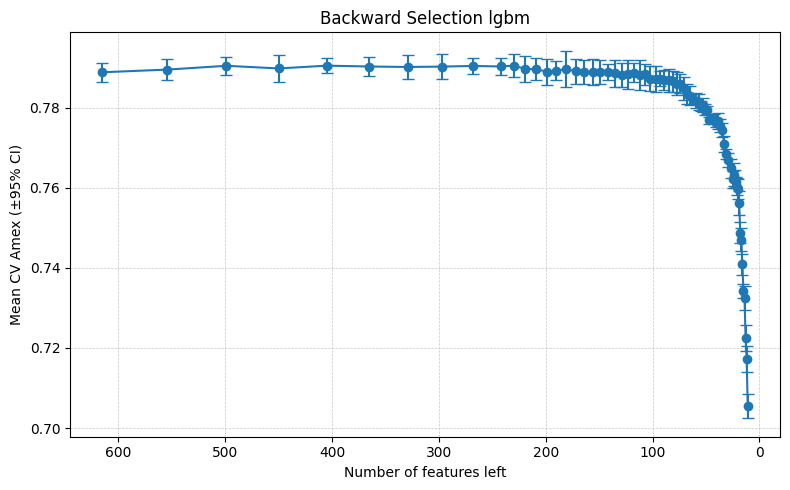

In [ ]:
# plot backward selection without test scores
plot_df = (log_df.sort_values('n_feats_left', ascending=False)
                   .reset_index(drop=True))

x = plot_df['n_feats_left']
y = plot_df['cv_mean']
yerr = [plot_df['cv_mean'] - plot_df['cv_ci_lo'],
        plot_df['cv_ci_hi'] - plot_df['cv_mean']]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=yerr, fmt='-o', capsize=4)
plt.gca().invert_xaxis()                 # high → low features left
plt.xlabel("Number of features left")
plt.ylabel("Mean CV Amex (±95% CI)")
plt.title("Backward Selection lgbm")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
test_scores_kaggle = []

In [47]:
raw = """
submission_lgbm_test_backward_11_feats.csv
Complete (after deadline) · 1m ago
0.72101

0.70990

submission_lgbm_test_backward_12_feats.csv
Complete (after deadline) · 2m ago
0.73459

0.72024

submission_lgbm_test_backward_13_feats.csv
Complete (after deadline) · 2m ago
0.73960

0.72584

submission_lgbm_test_backward_14_feats.csv
Complete (after deadline) · 2m ago
0.74818

0.73514

submission_lgbm_test_backward_15_feats.csv
Complete (after deadline) · 2m ago
0.74967

0.73707

submission_lgbm_test_backward_16_feats.csv
Complete (after deadline) · 2m ago
0.75225

0.74167

submission_lgbm_test_backward_17_feats.csv
Complete (after deadline) · 3m ago
0.75908

0.74677

submission_lgbm_test_backward_18_feats.csv
Complete (after deadline) · 3m ago
0.76083

0.74733

submission_lgbm_test_backward_19_feats.csv
Complete (after deadline) · 3m ago
0.76693

0.75445

submission_lgbm_test_backward_20_feats.csv
Complete (after deadline) · 18m ago
0.77198

0.75926

submission_lgbm_test_backward_21_feats.csv
Complete (after deadline) · 18m ago
0.77235

0.75995

submission_lgbm_test_backward_22_feats.csv
Complete (after deadline) · 18m ago
0.77325

0.76130

submission_lgbm_test_backward_23_feats.csv
Complete (after deadline) · 19m ago
0.77462

0.76238

submission_lgbm_test_backward_24_feats.csv
Complete (after deadline) · 19m ago
0.77481

0.76283

submission_lgbm_test_backward_25_feats.csv
Complete (after deadline) · 19m ago
0.77389

0.76193

submission_lgbm_test_backward_27_feats.csv
Complete (after deadline) · 19m ago
0.77663

0.76478

submission_lgbm_test_backward_29_feats.csv
Complete (after deadline) · 19m ago
0.77852

0.76610

submission_lgbm_test_backward_31_feats.csv
Complete (after deadline) · 20m ago
0.78009

0.76781

submission_lgbm_test_backward_33_feats.csv
Complete (after deadline) · 20m ago
0.78092

0.76960

submission_lgbm_test_backward_35_feats.csv
Complete (after deadline) · 20m ago
0.78604

0.77477

submission_lgbm_test_backward_37_feats.csv
Complete (after deadline) · 20m ago
0.78688

0.77585

submission_lgbm_test_backward_39_feats.csv
Complete (after deadline) · 21m ago
0.78733

0.77610

submission_lgbm_test_backward_41_feats.csv
Complete (after deadline) · 21m ago
0.78779

0.77677

submission_lgbm_test_backward_43_feats.csv
Complete (after deadline) · 21m ago
0.78895

0.77760

submission_lgbm_test_backward_45_feats.csv
Complete (after deadline) · 21m ago
0.78898

0.77778

submission_lgbm_test_backward_47_feats.csv
Complete (after deadline) · 21m ago
0.78908

0.77739

submission_lgbm_test_backward_49_feats.csv
Complete (after deadline) · 22m ago
0.78963

0.77958

submission_lgbm_test_backward_51_feats.csv
Complete (after deadline) · 22m ago
0.79089

0.78057

submission_lgbm_test_backward_53_feats.csv
Complete (after deadline) · 22m ago
0.79116

0.78081

submission_lgbm_test_backward_55_feats.csv
Complete (after deadline) · 22m ago
0.79153

0.78112

submission_lgbm_test_backward_57_feats.csv
Complete (after deadline) · 23m ago
0.79203

0.78163

submission_lgbm_test_backward_59_feats.csv
Complete (after deadline) · 23m ago
0.79243

0.78160

submission_lgbm_test_backward_62_feats.csv
Complete (after deadline) · 23m ago
0.79249

0.78251

submission_lgbm_test_backward_65_feats.csv
Complete (after deadline) · 23m ago
0.79374

0.78344

submission_lgbm_test_backward_68_feats.csv
Complete (after deadline) · 23m ago
0.79490

0.78472

submission_lgbm_test_backward_71_feats.csv
Complete (after deadline) · 24m ago
0.79521

0.78534

submission_lgbm_test_backward_74_feats.csv
Complete (after deadline) · 24m ago
0.79610

0.78638

submission_lgbm_test_backward_77_feats.csv
Complete (after deadline) · 24m ago
0.79604

0.78680

submission_lgbm_test_backward_81_feats.csv
Complete (after deadline) · 24m ago
0.79619

0.78691

submission_lgbm_test_backward_85_feats.csv
Complete (after deadline) · 25m ago
0.79689

0.78655

submission_lgbm_test_backward_89_feats.csv
Complete (after deadline) · 25m ago
0.79739

0.78722

submission_lgbm_test_backward_93_feats.csv
Complete (after deadline) · 25m ago
0.79681

0.78683

submission_lgbm_test_backward_97_feats.csv
Complete (after deadline) · 26m ago
0.79663

0.78682

submission_lgbm_test_backward_102_feats.csv
Complete (after deadline) · 26m ago
0.79701

0.78695

submission_lgbm_test_backward_107_feats.csv
Complete (after deadline) · 26m ago
0.79877

0.78827

submission_lgbm_test_backward_112_feats.csv
Complete (after deadline) · 26m ago
0.79893

0.78848

submission_lgbm_test_backward_117_feats.csv
Complete (after deadline) · 26m ago
0.79933

0.78861

submission_lgbm_test_backward_123_feats.csv
Complete (after deadline) · 27m ago
0.79934

0.78885

submission_lgbm_test_backward_129_feats.csv
Complete (after deadline) · 27m ago
0.79859

0.78914

submission_lgbm_test_backward_135_feats.csv
Complete (after deadline) · 27m ago
0.79888

0.78943

submission_lgbm_test_backward_142_feats.csv
Complete (after deadline) · 28m ago
0.79951

0.79020

submission_lgbm_test_backward_149_feats.csv
Complete (after deadline) · 28m ago
0.79951

0.78973

submission_lgbm_test_backward_156_feats.csv
Complete (after deadline) · 28m ago
0.79916

0.78982

submission_lgbm_test_backward_164_feats.csv
Complete (after deadline) · 28m ago
0.79975

0.79026

submission_lgbm_test_backward_172_feats.csv
Complete (after deadline) · 29m ago
0.79943

0.79011

submission_lgbm_test_backward_181_feats.csv
Complete (after deadline) · 29m ago
0.79962

0.79006

submission_lgbm_test_backward_190_feats.csv
Complete (after deadline) · 29m ago
0.79956

0.79045

submission_lgbm_test_backward_199_feats.csv
Complete (after deadline) · 29m ago
0.79967

0.79006

submission_lgbm_test_backward_209_feats.csv
Complete (after deadline) · 30m ago
0.79970

0.79014

submission_lgbm_test_backward_219_feats.csv
Complete (after deadline) · 30m ago
0.80115

0.79099

submission_lgbm_test_backward_230_feats.csv
Complete (after deadline) · 30m ago
0.80025

0.79098

submission_lgbm_test_backward_242_feats.csv
Complete (after deadline) · 30m ago
0.80091

0.79124

submission_lgbm_test_backward_268_feats.csv
Complete (after deadline) · 30m ago
0.80137

0.79150

submission_lgbm_test_backward_297_feats.csv
Complete (after deadline) · 31m ago
0.80108

0.79115

submission_lgbm_test_backward_329_feats.csv
Complete (after deadline) · 31m ago
0.80094

0.79150

submission_lgbm_test_backward_365_feats.csv
Complete (after deadline) · 31m ago
0.80098

0.79183

submission_lgbm_test_backward_405_feats.csv
Complete (after deadline) · 31m ago
0.80123

0.79159

submission_lgbm_test_backward_450_feats.csv
Complete (after deadline) · 32m ago
0.80092

0.79198

submission_lgbm_test_backward_499_feats.csv
Complete (after deadline) · 32m ago
0.80092

0.79189

submission_lgbm_test_backward_554_feats.csv
Complete (after deadline) · 32m ago
0.80073

0.79086

submission_lgbm_test_backward_615_feats.csv
Complete (after deadline) · 33m ago
0.80066

0.79120
"""

In [48]:
# --- парсим ---------------------------------------------------------------
lines = [ln.strip() for ln in raw.strip().splitlines() if ln.strip()]

private_scores, public_scores = [], []

# обходим блоки по 4 строки снизу вверх
# 0: имя файла, 1: статус/время, 2: private, 3: public
for i in range(len(lines)-1, -1, -4):
    public  = float(lines[i])       # последняя строка блока
    private = float(lines[i-1])     # предпоследняя
    public_scores.append(public)
    private_scores.append(private)

# теперь списки идут от 615‑feats -> … -> 11‑feats
print("Private:", private_scores[:5], "...", private_scores[-5:])
print("Public :", public_scores [:5], "...", public_scores [-5:])

Private: [0.80066, 0.80073, 0.80092, 0.80092, 0.80123] ... [0.74967, 0.74818, 0.7396, 0.73459, 0.72101]
Public : [0.7912, 0.79086, 0.79189, 0.79198, 0.79159] ... [0.73707, 0.73514, 0.72584, 0.72024, 0.7099]


In [50]:
len(private_scores), len(public_scores)

(71, 71)

In [97]:
import pickle

# list_imp_dfs  – ваш список словарей {'step': k, 'importance': df}

file_path = "list_imp_dfs_after_backward.pkl"

with open(file_path, "wb") as f:
    pickle.dump(list_imp_dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"Saved to {file_path}")

Saved to list_imp_dfs_after_backward.pkl


In [99]:
with open("list_imp_dfs_after_backward.pkl", "rb") as f:
    test_file_abc = pickle.load(f)

In [101]:
len(test_file_abc)

71

In [105]:
len(test_file_abc[34]['importance'])

74

In [ ]:
# log_df["test"] = private_scores

In [ ]:
log_df[["n_feats_left", "cv_mean", "test"]]

,n_feats_left,cv_mean,test
0,615,0.788812,0.80066
1,554,0.789482,0.80073
2,499,0.790431,0.80092
3,450,0.789769,0.80092
4,405,0.790460,0.80123
5,365,0.790252,0.80098
6,329,0.790131,0.80094
7,297,0.790228,0.80108
8,268,0.790394,0.80137
9,242,0.790253,0.80091


In [106]:
log_df

,step,n_feats_left,n_num_left,n_cat_left,max_depth,n_estimators,cv_mean,cv_ci_lo,cv_ci_hi,test
0,0,615,545,9,6,400,0.788812,0.786443,0.791182,0.80066
1,1,554,492,7,6,400,0.789482,0.786798,0.792166,0.80073
2,2,499,443,7,6,471,0.790431,0.788130,0.792732,0.80092
3,3,450,398,7,6,471,0.789769,0.786424,0.793115,0.80092
4,4,405,359,6,6,471,0.790460,0.788618,0.792302,0.80123
5,5,365,323,6,6,471,0.790252,0.787776,0.792728,0.80098
6,6,329,291,6,6,471,0.790131,0.787070,0.793193,0.80094
7,7,297,262,6,6,481,0.790228,0.787106,0.793350,0.80108
8,8,268,237,5,6,481,0.790394,0.788437,0.792351,0.80137
9,9,242,225,5,6,481,0.790253,0.788196,0.792310,0.80091


In [ ]:
# log_df.to_csv("logging_w_test_score_backward_selection.csv", index=False)

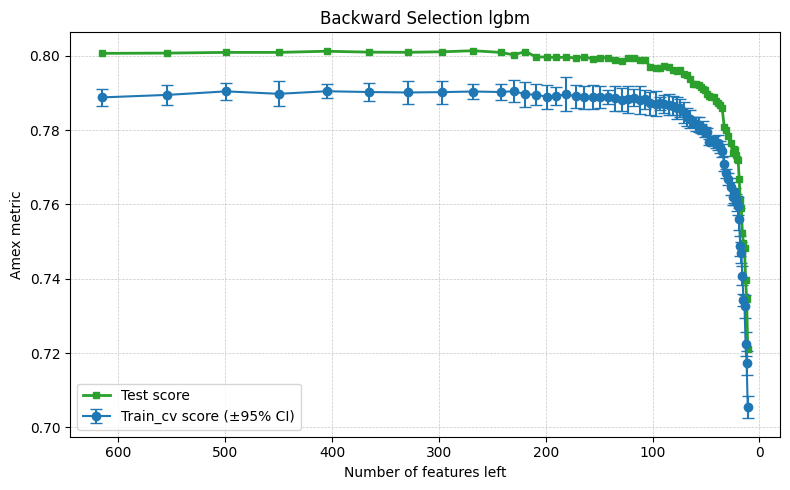

In [ ]:
# plot backward selection without test scores
plot_df = (log_df.sort_values('n_feats_left', ascending=False)
                   .reset_index(drop=True))

x = plot_df['n_feats_left']
y = plot_df['cv_mean']
yerr = [plot_df['cv_mean'] - plot_df['cv_ci_lo'],
        plot_df['cv_ci_hi'] - plot_df['cv_mean']]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=yerr, fmt='-o', capsize=4, label="Train_cv score (±95% CI)")

# линия Private
plt.plot(x, private_scores, '-s', color='tab:green',
        label='Test score', linewidth=2, markersize=5)

plt.gca().invert_xaxis()                 # high → low features left
plt.xlabel("Number of features left")
plt.ylabel("Amex metric")
plt.title("Backward Selection lgbm")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.legend()
plt.show()

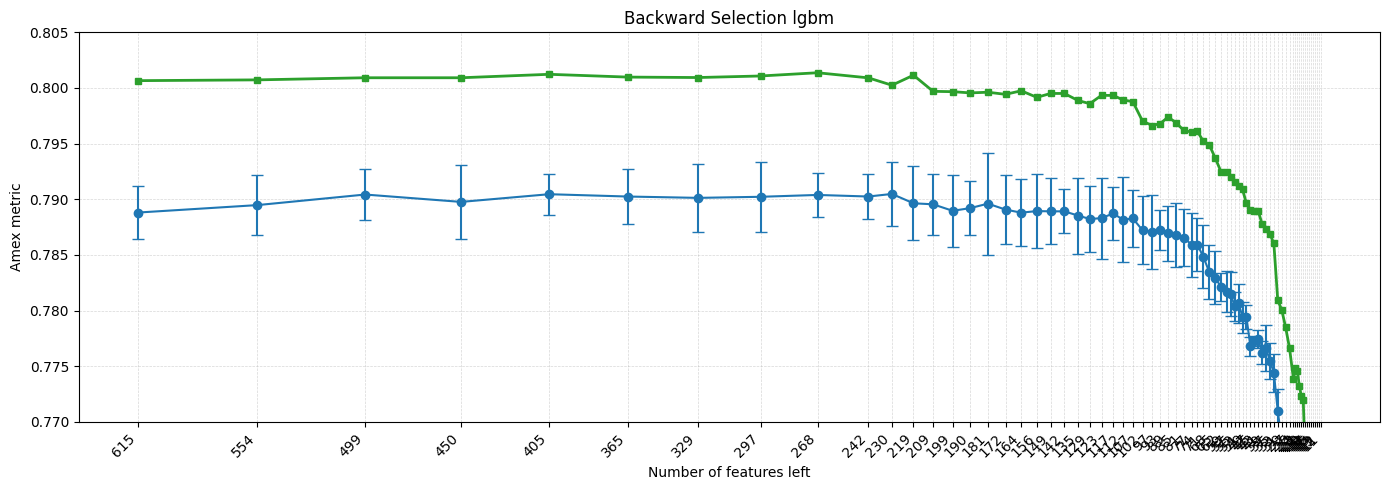

In [80]:
import matplotlib.pyplot as plt

plot_df = (log_df.sort_values('n_feats_left', ascending=False)
                    .reset_index(drop=True))

x = plot_df['n_feats_left']
y = plot_df['cv_mean']
yerr = [plot_df['cv_mean'] - plot_df['cv_ci_lo'],
        plot_df['cv_ci_hi'] - plot_df['cv_mean']]

# --- фигура и оси --------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 5))

ax.errorbar(x, y, yerr=yerr, fmt='-o', capsize=4)

# линия Private LB
ax.plot(x, private_scores, '-s', color='tab:green',
        label='Test score', linewidth=2, markersize=5)

ax.invert_xaxis()                                # много → мало фичей
plt.xlabel("Number of features left")
plt.ylabel("Amex metric")
plt.title("Backward Selection lgbm")

# xticks для каждой итерации
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45, ha='right')

# --- желаемые пределы Y -------------------------------------------
ax.set(ylim=[0.77, 0.805])

ax.grid(alpha=0.5, linestyle='--', linewidth=0.5)
fig.tight_layout()
plt.show()

In [92]:
list_imp_dfs[34]["importance"].shape

(74, 3)

In [93]:
list_imp_dfs[34]["importance"]

,feature,gain,share
3,P_2_last,1.740261e+06,0.556823
48,B_1_last,1.922792e+05,0.061523
1,P_2_avg,1.599758e+05,0.051187
49,B_2_last,9.622262e+04,0.030788
54,B_9_last,6.180064e+04,0.019774
0,P_2_min,5.539204e+04,0.017724
23,D_39_last,4.967316e+04,0.015894
68,R_2_last,4.715547e+04,0.015088
35,S_3_avg,3.694942e+04,0.011823
26,D_44_last,3.455267e+04,0.011056


In [ ]:
# === Step 34 | feats 74 (num 73, cat 1) | depth 7 trees 484

In [108]:
with open("list_imp_dfs_after_backward.pkl", "rb") as f:
    test_file_abc = pickle.load(f)

In [110]:
test_file_abc[-1]

{'step': 70,
 'importance':       feature          gain     share
 1    P_2_last  1.561377e+06  0.607496
 0     P_2_avg  5.429265e+05  0.211240
 5    B_1_last  2.940387e+05  0.114404
 6    B_2_last  1.718444e+05  0.066861
 2    D_87_min  0.000000e+00  0.000000
 4    B_31_max  0.000000e+00  0.000000
 3   D_108_min  0.000000e+00  0.000000
 7    R_18_min  0.000000e+00  0.000000
 8    R_22_min  0.000000e+00  0.000000
 9    R_23_min  0.000000e+00  0.000000
 10   R_25_min  0.000000e+00  0.000000}

In [120]:
test_file_abc[34]["importance"].shape

(74, 3)

In [121]:
test_file_abc[34]["importance"].query("gain > 0").shape

(59, 3)

In [122]:
test_file_abc[34]["importance"].query("gain > 0")

,feature,gain,share
3,P_2_last,1.740261e+06,0.556823
48,B_1_last,1.922792e+05,0.061523
1,P_2_avg,1.599758e+05,0.051187
49,B_2_last,9.622262e+04,0.030788
54,B_9_last,6.180064e+04,0.019774
0,P_2_min,5.539204e+04,0.017724
23,D_39_last,4.967316e+04,0.015894
68,R_2_last,4.715547e+04,0.015088
35,S_3_avg,3.694942e+04,0.011823
26,D_44_last,3.455267e+04,0.011056


### Permutation importance

In [4]:
with open("list_imp_dfs_after_backward.pkl", "rb") as f:
    df_w_importances = pickle.load(f)

In [5]:
num_features = [feat for feat in df_w_importances[34]["importance"].feature.to_list() if feat != "B_38_last"]
cat_features = ["B_38_last"]

len(num_features) + len(cat_features)

74

In [6]:
from sklearn.inspection import permutation_importance
from lightgbm import LGBMClassifier
from scipy import stats
import pandas as pd
import numpy as np

def run_permutation_selection(df_train,
                               df_test,
                               target_col,
                               num_feats,
                               cat_feats,
                               group_col,
                               min_feats: int = 10,
                               random_state: int = 42):

    num, cat = num_feats.copy(), cat_feats.copy()
    y, groups = df_train[target_col].values, df_train[group_col].values
    sgkf = StratifiedGroupKFold(5, shuffle=True, random_state=random_state)
    test_preds_df = pd.DataFrame(index=df_test.customer_ID)

    history, list_imp_dfs, step = [], [], 0

    params = dict(
        learning_rate=.05, subsample=.9, subsample_freq=1,
        colsample_bytree=.8, objective='binary',
        random_state=random_state,
        max_depth=7, n_estimators=484,
        n_jobs=-1, verbosity=-1
    )

    while True:
        feats = num + cat
        if len(feats) <= min_feats:
            break

        print(f"\n=== Step {step} | feats {len(feats)} "
                f"(num {len(num)}, cat {len(cat)})")

        # -------- CV and logging ------------------------------------
        fold_scores, fold_test_raw = [], []
        fold_importances = []
        for fold, (tr_idx, va_idx) in enumerate(sgkf.split(df_train[[group_col, target_col]], y, groups)):
            print(f" Fold {fold}")
            X_tr, X_va = df_train.iloc[tr_idx][feats], df_train.iloc[va_idx][feats]
            y_tr, y_va = y[tr_idx], y[va_idx]

            model = LGBMClassifier(**params)
            model.fit(X_tr, y_tr, categorical_feature=cat)

            pred = model.predict_proba(X_va)[:, 1]
            score = get_amex_metric_calculated(y_va, pred)
            print(f" Amex = {score:.5f}")
            fold_scores.append(score)
            fold_test_raw.append(model.predict_proba(df_test[feats], raw_score=True))
            
            print("running permutation importance")
            result = permutation_importance(
                model, X_va, y_va,
                n_repeats=5, # 5
                random_state=random_state,
                scoring=lambda est, X, y: get_amex_metric_calculated(y, est.predict_proba(X)[:, 1]),
                n_jobs=-1
            )
            fold_importances.append(pd.Series(result.importances_mean, index=feats))

        # Mean score + CI
        mean_cv = np.mean(fold_scores)
        ci = stats.t.interval(0.95, len(fold_scores)-1, loc=mean_cv, scale=stats.sem(fold_scores))
        print(f"Mean CV Amex = {mean_cv:.5f}  CI95 = [{ci[0]:.5f}, {ci[1]:.5f}]")
        test_preds_df[f'iter_{step}'] = np.mean(fold_test_raw, axis=0)

        # Aggregate and save importance
        mean_importance = pd.concat(fold_importances, axis=1).mean(axis=1)
        imp_df = (mean_importance
                  .rename("importance")
                  .reset_index()
                  .rename(columns={"index": "feature"})
                  .sort_values("importance", ascending=False)
                  .reset_index(drop=True))
        list_imp_dfs.append({"step": step, "importance": imp_df}) # <------------------------------ хуета

        # Drop the least important
        worst_feat = imp_df.iloc[-1]["feature"]
        print(f" Dropping: {worst_feat} | Importance: {imp_df.iloc[-1]['importance']:.5f}")

        # Drop from lists
        num = [f for f in num if f != worst_feat]
        cat = [f for f in cat if f != worst_feat]

        history.append({
            'step': step,
            'n_feats_left': len(feats),
            'dropped_feat': worst_feat,
            'cv_mean': mean_cv,
            'cv_ci_lo': ci[0],
            'cv_ci_hi': ci[1],
        })

        step += 1

    return pd.DataFrame(history), list_imp_dfs, test_preds_df


In [7]:
hist, perm_imp_dfs, test_preds_df = run_permutation_selection(
    df_train=df_train,
    df_test=df_test,
    target_col='target',
    num_feats=num_features,
    cat_feats=cat_features,
    group_col='customer_ID',
    min_feats=10
)


=== Step 0 | feats 74 (num 73, cat 1)
 Fold 0
 Amex = 0.78407
running permutation importance
 Fold 1
 Amex = 0.78657
running permutation importance
 Fold 2
 Amex = 0.78481
running permutation importance
 Fold 3
 Amex = 0.78629
running permutation importance
 Fold 4
 Amex = 0.78748
running permutation importance
Mean CV Amex = 0.78584  CI95 = [0.78413, 0.78756]
 Dropping: R_18_last | Importance: -0.00000

=== Step 1 | feats 73 (num 72, cat 1)
 Fold 0
 Amex = 0.78375
running permutation importance
 Fold 1
 Amex = 0.78677
running permutation importance
 Fold 2
 Amex = 0.78662
running permutation importance
 Fold 3
 Amex = 0.78555
running permutation importance
 Fold 4
 Amex = 0.78983
running permutation importance
Mean CV Amex = 0.78651  CI95 = [0.78376, 0.78926]
 Dropping: R_10_min | Importance: -0.00001

=== Step 2 | feats 72 (num 71, cat 1)
 Fold 0
 Amex = 0.78283
running permutation importance
 Fold 1
 Amex = 0.78661
running permutation importance
 Fold 2
 Amex = 0.78597
running perm

In [18]:
hist

,step,n_feats_left,dropped_feat,cv_mean,cv_ci_lo,cv_ci_hi
0,0,74,R_18_last,0.785845,0.784134,0.787555
1,1,73,R_10_min,0.786506,0.783755,0.789256
2,2,72,R_15_min,0.785670,0.783438,0.787901
3,3,71,D_44_max,0.785562,0.783160,0.787964
4,4,70,R_28_last,0.786139,0.783432,0.788846
5,5,69,R_28_min,0.786035,0.783482,0.788588
6,6,68,R_18_min,0.785526,0.783152,0.787899
7,7,67,R_22_min,0.785526,0.783152,0.787899
8,8,66,R_23_min,0.785526,0.783152,0.787899
9,9,65,R_25_min,0.785526,0.783152,0.787899


In [9]:
perm_imp_dfs

[{'step': 0,
  'importance':       feature  importance
  0    P_2_last    0.058091
  1    B_1_last    0.016569
  2   D_39_last    0.006816
  3    B_4_last    0.005647
  4    B_3_last    0.004954
  ..        ...         ...
  69   B_31_max    0.000000
  70   R_18_min    0.000000
  71   R_22_min    0.000000
  72   R_23_min    0.000000
  73  R_18_last   -0.000002
  
  [74 rows x 2 columns]},
 {'step': 1,
  'importance':       feature  importance
  0    P_2_last    0.055374
  1    B_1_last    0.016577
  2   D_39_last    0.006822
  3    B_4_last    0.005364
  4    B_3_last    0.005102
  ..        ...         ...
  68   R_25_min    0.000000
  69   R_23_min    0.000000
  70   R_22_min    0.000000
  71   R_15_min    0.000000
  72   R_10_min   -0.000009
  
  [73 rows x 2 columns]},
 {'step': 2,
  'importance':       feature  importance
  0    P_2_last    0.055047
  1    B_1_last    0.015605
  2   D_39_last    0.006485
  3    B_4_last    0.005293
  4    B_28_min    0.004336
  ..        ...      

In [10]:
test_preds_df

,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8,iter_9,...,iter_54,iter_55,iter_56,iter_57,iter_58,iter_59,iter_60,iter_61,iter_62,iter_63
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,-3.108845,-3.015539,-3.103770,-3.118329,-3.104044,-3.128664,-3.210570,-3.210570,-3.210570,-3.210570,...,-3.096799,-2.893764,-2.707168,-2.695771,-2.532012,-2.536104,-2.397563,-2.282350,-2.851070,-2.818321
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,-6.709155,-6.837671,-6.799436,-6.821832,-6.866979,-6.815017,-6.845748,-6.845748,-6.845748,-6.845748,...,-6.831581,-6.796015,-6.701471,-6.931274,-6.697821,-6.638929,-6.307738,-6.254003,-6.303624,-6.311843
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,-2.516959,-2.500298,-2.527016,-2.360533,-2.333138,-2.364875,-2.309047,-2.309047,-2.309047,-2.309047,...,-2.280013,-2.324482,-2.494500,-2.423050,-2.337110,-2.463865,-2.259001,-2.226400,-2.418654,-2.311663
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,-0.956219,-0.954559,-0.900009,-0.848010,-0.822919,-0.929929,-0.907999,-0.907999,-0.907999,-0.907999,...,-0.382380,-0.179545,-0.123568,-0.323898,-0.177422,-0.082168,-0.147825,-0.335790,-0.352113,-0.359905
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,1.839630,1.852987,1.789826,1.850179,1.930628,1.841655,1.780965,1.780965,1.780965,1.780965,...,1.850997,1.932998,1.883554,1.823345,1.914549,1.994029,2.087055,2.052027,2.058925,2.080770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c5d60460dba6dedc41e,-3.627349,-3.650280,-3.481175,-3.741095,-3.582980,-3.602288,-3.741717,-3.741717,-3.741717,-3.741717,...,-4.465315,-4.453682,-4.717756,-4.714056,-4.783821,-4.762425,-4.670360,-5.298388,-5.240877,-5.238179
ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3a4f0ca3de613b0b2ad,1.360705,1.326492,1.313728,1.346818,1.320500,1.323849,1.267730,1.267730,1.267730,1.267730,...,0.845333,0.800567,0.843445,0.805688,1.069198,1.059197,1.242335,1.392713,1.212694,1.073053
ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475cb095d2443a68030f1,0.260396,0.271246,0.222593,0.260522,0.318007,0.035329,0.143647,0.143647,0.143647,0.143647,...,0.066746,0.091741,0.436007,0.518154,0.524170,0.670908,0.693167,0.739462,0.483980,0.699482


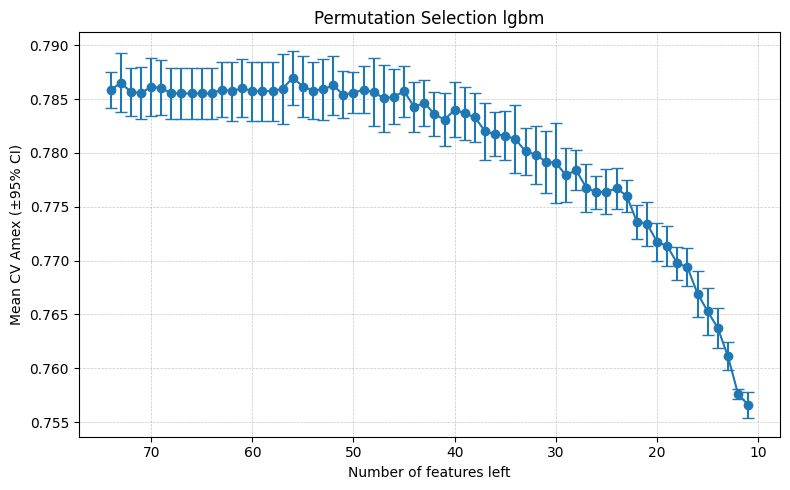

In [15]:
# plot backward selection without test scores
plot_df = (hist.sort_values('n_feats_left', ascending=False)
                   .reset_index(drop=True))

x = plot_df['n_feats_left']
y = plot_df['cv_mean']
yerr = [plot_df['cv_mean'] - plot_df['cv_ci_lo'],
        plot_df['cv_ci_hi'] - plot_df['cv_mean']]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=yerr, fmt='-o', capsize=4)
plt.gca().invert_xaxis()                 # high → low features left
plt.xlabel("Number of features left")
plt.ylabel("Mean CV Amex (±95% CI)")
plt.title("Permutation Selection lgbm")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# hist.to_csv("logging_permutation_selection.csv", index=False)

In [25]:
test_preds_df.head(3)

,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8,iter_9,...,iter_54,iter_55,iter_56,iter_57,iter_58,iter_59,iter_60,iter_61,iter_62,iter_63
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,-3.108845,-3.015539,-3.103770,-3.118329,-3.104044,-3.128664,-3.210570,-3.210570,-3.210570,-3.210570,...,-3.096799,-2.893764,-2.707168,-2.695771,-2.532012,-2.536104,-2.397563,-2.282350,-2.851070,-2.818321
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,-6.709155,-6.837671,-6.799436,-6.821832,-6.866979,-6.815017,-6.845748,-6.845748,-6.845748,-6.845748,...,-6.831581,-6.796015,-6.701471,-6.931274,-6.697821,-6.638929,-6.307738,-6.254003,-6.303624,-6.311843
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,-2.516959,-2.500298,-2.527016,-2.360533,-2.333138,-2.364875,-2.309047,-2.309047,-2.309047,-2.309047,...,-2.280013,-2.324482,-2.494500,-2.423050,-2.337110,-2.463865,-2.259001,-2.226400,-2.418654,-2.311663


In [ ]:
# for step, n_feats in enumerate(hist.n_feats_left):
#     print(step, n_feats)
#     sub = pd.DataFrame({'customer_ID': test_preds_df.index,
#                         'prediction': test_preds_df[f'iter_{step}'].values})
#     sub.to_csv(f'submission_lgbm_test_permutation_{n_feats}_feats.csv', index=False)

0 74
1 73
2 72
3 71
4 70
5 69
6 68
7 67
8 66
9 65
10 64
11 63
12 62
13 61
14 60
15 59
16 58
17 57
18 56
19 55
20 54
21 53
22 52
23 51
24 50
25 49
26 48
27 47
28 46
29 45
30 44
31 43
32 42
33 41
34 40
35 39
36 38
37 37
38 36
39 35
40 34
41 33
42 32
43 31
44 30
45 29
46 28
47 27
48 26
49 25
50 24
51 23
52 22
53 21
54 20
55 19
56 18
57 17
58 16
59 15
60 14
61 13
62 12
63 11


In [22]:
for step, n_feats in enumerate(hist.n_feats_left):
    print(step, n_feats)

0 74
1 73
2 72
3 71
4 70
5 69
6 68
7 67
8 66
9 65
10 64
11 63
12 62
13 61
14 60
15 59
16 58
17 57
18 56
19 55
20 54
21 53
22 52
23 51
24 50
25 49
26 48
27 47
28 46
29 45
30 44
31 43
32 42
33 41
34 40
35 39
36 38
37 37
38 36
39 35
40 34
41 33
42 32
43 31
44 30
45 29
46 28
47 27
48 26
49 25
50 24
51 23
52 22
53 21
54 20
55 19
56 18
57 17
58 16
59 15
60 14
61 13
62 12
63 11


In [28]:
import pickle

# perm_imp_dfs  – ваш список словарей {'step': k, 'importance': df}

file_path = "list_perm_imp_dfs.pkl"

with open(file_path, "wb") as f:
    pickle.dump(perm_imp_dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"Saved to {file_path}")

Saved to list_perm_imp_dfs.pkl


In [35]:
perm_imp_dfs[40]["importance"]

,feature,importance
0,P_2_last,0.053632
1,B_1_last,0.017507
2,B_3_last,0.009033
3,D_39_last,0.008559
4,D_41_last,0.008508
5,D_45_max,0.008495
6,B_28_min,0.007064
7,D_42_avg,0.006788
8,B_14_last,0.006772
9,D_50_last,0.006030


In [36]:
raw_string_perm = '''
submission_lgbm_test_permutation_11_feats.csv
Complete (after deadline) · now
0.77105

0.75828

submission_lgbm_test_permutation_12_feats.csv
Complete (after deadline) · 27s ago
0.77278

0.75909

submission_lgbm_test_permutation_13_feats.csv
Complete (after deadline) · 44s ago
0.77472

0.76213

submission_lgbm_test_permutation_14_feats.csv
Complete (after deadline) · 1m ago
0.77696

0.76544

submission_lgbm_test_permutation_15_feats.csv
Complete (after deadline) · 1m ago
0.77856

0.76695

submission_lgbm_test_permutation_16_feats.csv
Complete (after deadline) · 2m ago
0.77895

0.76733

submission_lgbm_test_permutation_17_feats.csv
Complete (after deadline) · 2m ago
0.77998

0.76795

submission_lgbm_test_permutation_18_feats.csv
Complete (after deadline) · 2m ago
0.78100

0.76969

submission_lgbm_test_permutation_19_feats.csv
Complete (after deadline) · 2m ago
0.78173

0.77013

submission_lgbm_test_permutation_20_feats.csv
Complete (after deadline) · 3m ago
0.78295

0.77182

submission_lgbm_test_permutation_21_feats.csv
Complete (after deadline) · 3m ago
0.78450

0.77324

submission_lgbm_test_permutation_22_feats.csv
Complete (after deadline) · 3m ago
0.78495

0.77366

submission_lgbm_test_permutation_23_feats.csv
Complete (after deadline) · 4m ago
0.78678

0.77599

submission_lgbm_test_permutation_24_feats.csv
Complete (after deadline) · 4m ago
0.78751

0.77631

submission_lgbm_test_permutation_25_feats.csv
Complete (after deadline) · 4m ago
0.78757

0.77640

submission_lgbm_test_permutation_26_feats.csv
Complete (after deadline) · 5m ago
0.78829

0.77716

submission_lgbm_test_permutation_27_feats.csv
Complete (after deadline) · 5m ago
0.78844

0.77792

submission_lgbm_test_permutation_28_feats.csv
Complete (after deadline) · 5m ago
0.78901

0.77842

submission_lgbm_test_permutation_29_feats.csv
Complete (after deadline) · 5m ago
0.78878

0.77848

submission_lgbm_test_permutation_30_feats.csv
Complete (after deadline) · 6m ago
0.79031

0.77966

submission_lgbm_test_permutation_31_feats.csv
Complete (after deadline) · 1h ago
0.79017

0.77928

submission_lgbm_test_permutation_32_feats.csv
Complete (after deadline) · 1h ago
0.79078

0.77962

submission_lgbm_test_permutation_33_feats.csv
Complete (after deadline) · 1h ago
0.79208

0.78068

submission_lgbm_test_permutation_34_feats.csv
Complete (after deadline) · 1h ago
0.79317

0.78091

submission_lgbm_test_permutation_35_feats.csv
Complete (after deadline) · 1h ago
0.79279

0.78141

submission_lgbm_test_permutation_36_feats.csv
Complete (after deadline) · 1h ago
0.79342

0.78176

submission_lgbm_test_permutation_37_feats.csv
Complete (after deadline) · 1h ago
0.79349

0.78207

submission_lgbm_test_permutation_38_feats.csv
Complete (after deadline) · 1h ago
0.79380

0.78272

submission_lgbm_test_permutation_39_feats.csv
Complete (after deadline) · 1h ago
0.79430

0.78334

submission_lgbm_test_permutation_40_feats.csv
Complete (after deadline) · 1h ago
0.79426

0.78320

submission_lgbm_test_permutation_41_feats.csv
Complete (after deadline) · 1h ago
0.79450

0.78353

submission_lgbm_test_permutation_42_feats.csv
Complete (after deadline) · 1h ago
0.79417

0.78322

submission_lgbm_test_permutation_43_feats.csv
Complete (after deadline) · 1h ago
0.79478

0.78403

submission_lgbm_test_permutation_44_feats.csv
Complete (after deadline) · 1h ago
0.79513

0.78440

submission_lgbm_test_permutation_45_feats.csv
Complete (after deadline) · 1h ago
0.79521

0.78510

submission_lgbm_test_permutation_46_feats.csv
Complete (after deadline) · 1h ago
0.79555

0.78493

submission_lgbm_test_permutation_47_feats.csv
Complete (after deadline) · 1h ago
0.79579

0.78483

submission_lgbm_test_permutation_48_feats.csv
Complete (after deadline) · 1h ago
0.79565

0.78517

submission_lgbm_test_permutation_49_feats.csv
Complete (after deadline) · 1h ago
0.79590

0.78518

submission_lgbm_test_permutation_50_feats.csv
Complete (after deadline) · 1h ago
0.79611

0.78563

submission_lgbm_test_permutation_51_feats.csv
Complete (after deadline) · 1h ago
0.79618

0.78611

submission_lgbm_test_permutation_52_feats.csv
Complete (after deadline) · 1h ago
0.79586

0.78600

submission_lgbm_test_permutation_53_feats.csv
Complete (after deadline) · 1h ago
0.79640

0.78578

submission_lgbm_test_permutation_54_feats.csv
Complete (after deadline) · 1h ago
0.79643

0.78615

submission_lgbm_test_permutation_55_feats.csv
Complete (after deadline) · 1h ago
0.79641

0.78626

submission_lgbm_test_permutation_56_feats.csv
Complete (after deadline) · 1h ago
0.79628

0.78599

submission_lgbm_test_permutation_57_feats.csv
Complete (after deadline) · 1h ago
0.79603

0.78639

submission_lgbm_test_permutation_58_feats.csv
Complete (after deadline) · 1h ago
0.79649

0.78627

submission_lgbm_test_permutation_59_feats.csv
Complete (after deadline) · 1h ago
0.79649

0.78627

submission_lgbm_test_permutation_60_feats.csv
Complete (after deadline) · 1h ago
0.79649

0.78627

submission_lgbm_test_permutation_61_feats.csv
Complete (after deadline) · 1h ago
0.79623

0.78611

submission_lgbm_test_permutation_62_feats.csv
Complete (after deadline) · 1h ago
0.79613

0.78624

submission_lgbm_test_permutation_63_feats.csv
Complete (after deadline) · 1h ago
0.79636

0.78590

submission_lgbm_test_permutation_64_feats.csv
Complete (after deadline) · 1h ago
0.79634

0.78663

submission_lgbm_test_permutation_65_feats.csv
Complete (after deadline) · 1h ago
0.79634

0.78663

submission_lgbm_test_permutation_66_feats.csv
Complete (after deadline) · 1h ago
0.79634

0.78663

submission_lgbm_test_permutation_67_feats.csv
Complete (after deadline) · 1h ago
0.79634

0.78663

submission_lgbm_test_permutation_68_feats.csv
Complete (after deadline) · 1h ago
0.79634

0.78663

submission_lgbm_test_permutation_69_feats.csv
Complete (after deadline) · 1h ago
0.79625

0.78654

submission_lgbm_test_permutation_70_feats.csv
Complete (after deadline) · 1h ago
0.79637

0.78632

submission_lgbm_test_permutation_71_feats.csv
Complete (after deadline) · 1h ago
0.79643

0.78621

submission_lgbm_test_permutation_72_feats.csv
Complete (after deadline) · 1h ago
0.79610

0.78645

submission_lgbm_test_permutation_73_feats.csv
Complete (after deadline) · 1h ago
0.79614

0.78622

submission_lgbm_test_permutation_74_feats.csv
Complete (after deadline) · 1h ago
0.79612

0.78633
'''

In [37]:
# --- парсим ---------------------------------------------------------------
lines = [ln.strip() for ln in raw_string_perm.strip().splitlines() if ln.strip()]

private_scores, public_scores = [], []

# обходим блоки по 4 строки снизу вверх
# 0: имя файла, 1: статус/время, 2: private, 3: public
for i in range(len(lines)-1, -1, -4):
    public  = float(lines[i])       # последняя строка блока
    private = float(lines[i-1])     # предпоследняя
    public_scores.append(public)
    private_scores.append(private)

# теперь списки идут от 615‑feats -> … -> 11‑feats
print("Private:", private_scores[:5], "...", private_scores[-5:])
print("Public :", public_scores [:5], "...", public_scores [-5:])

Private: [0.79612, 0.79614, 0.7961, 0.79643, 0.79637] ... [0.77856, 0.77696, 0.77472, 0.77278, 0.77105]
Public : [0.78633, 0.78622, 0.78645, 0.78621, 0.78632] ... [0.76695, 0.76544, 0.76213, 0.75909, 0.75828]


In [38]:
len(private_scores), len(public_scores)

(64, 64)

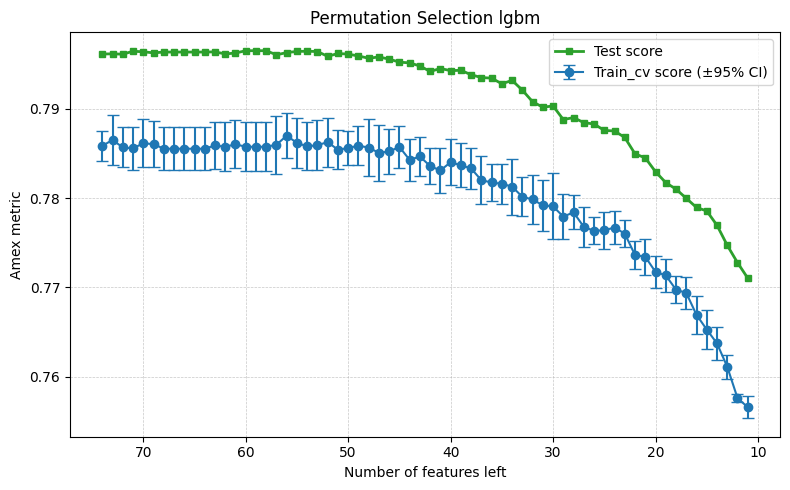

In [42]:
# plot perm selection without test scores
plot_df = (hist.sort_values('n_feats_left', ascending=False)
                   .reset_index(drop=True))

x = plot_df['n_feats_left']
y = plot_df['cv_mean']
yerr = [plot_df['cv_mean'] - plot_df['cv_ci_lo'],
        plot_df['cv_ci_hi'] - plot_df['cv_mean']]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(x, y, yerr=yerr, fmt='-o', capsize=4, label="Train_cv score (±95% CI)")

# линия Private
plt.plot(x, private_scores, '-s', color='tab:green',
        label='Test score', linewidth=2, markersize=5)

plt.gca().invert_xaxis()                 # high → low features left
plt.xlabel("Number of features left")
plt.ylabel("Amex metric")
plt.title("Permutation Selection lgbm")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.legend()
plt.show()

In [44]:
hist["test"] = private_scores

In [ ]:
# save hist with test score
# hist.to_csv("logging_w_test_score_permutation_selection.csv", index=False)

In [45]:
hist[["n_feats_left", "cv_mean", "test"]]

,n_feats_left,cv_mean,test
0,74,0.785845,0.79612
1,73,0.786506,0.79614
2,72,0.785670,0.79610
3,71,0.785562,0.79643
4,70,0.786139,0.79637
5,69,0.786035,0.79625
6,68,0.785526,0.79634
7,67,0.785526,0.79634
8,66,0.785526,0.79634
9,65,0.785526,0.79634


In [ ]:
# 34	0.781281	0.79317 # <- after permutation

In [ ]:
# 51	35	0.774435	0.78604 <- after backward 
# 52	33	0.770965	0.78092 <- after backward 

In [ ]:
# with open("list_perm_imp_dfs.pkl", "rb") as f:
#     test_file_abc = pickle.load(f)

In [31]:
test_file_abc

[{'step': 0,
  'importance':        feature    importance
  0     P_2_last  5.809118e-02
  1     B_1_last  1.656911e-02
  2    D_39_last  6.815729e-03
  3     B_4_last  5.647155e-03
  4     B_3_last  4.954431e-03
  5     B_28_min  4.749661e-03
  6    B_14_last  4.391112e-03
  7      P_2_avg  3.371947e-03
  8     B_5_last  3.365638e-03
  9    D_46_last  3.002458e-03
  10    D_51_avg  2.773451e-03
  11   D_49_last  2.743660e-03
  12     B_2_avg  2.675884e-03
  13   D_121_min  2.545283e-03
  14    S_3_last  2.528778e-03
  15   D_41_last  2.509082e-03
  16   D_50_last  2.451900e-03
  17     B_4_max  2.344573e-03
  18   B_18_last  2.293964e-03
  19    D_43_avg  2.232117e-03
  20     P_2_min  2.177513e-03
  21   D_43_last  2.086796e-03
  22    R_2_last  1.958530e-03
  23    B_21_max  1.942014e-03
  24   D_119_min  1.884288e-03
  25    R_4_last  1.845521e-03
  26    B_2_last  1.776875e-03
  27    D_45_max  1.754938e-03
  28   D_44_last  1.719560e-03
  29     S_3_avg  1.708659e-03
  30    S_5_

In [34]:
test_file_abc[40]["importance"]

,feature,importance
0,P_2_last,0.053632
1,B_1_last,0.017507
2,B_3_last,0.009033
3,D_39_last,0.008559
4,D_41_last,0.008508
5,D_45_max,0.008495
6,B_28_min,0.007064
7,D_42_avg,0.006788
8,B_14_last,0.006772
9,D_50_last,0.006030


In [1]:
import pkg_resources

# Mapping of import names to package names (where they differ)
package_mapping = {
    "sklearn": "scikit-learn",
    "optbinning": "optbinning",
    "pytorch_tabnet": "pytorch-tabnet",
    "matplotlib_venn": "matplotlib-venn",
    "seaborn": "seaborn",
    "shap": "shap",
    "lime": "lime",
    "dalex": "dalex",
    "torch": "torch"
}

# Your imported packages (excluding built-ins and local files)
packages = [
    "pandas",
    "numpy",
    "tqdm",
    "lightgbm",
    "sklearn",
    "xgboost",
    "catboost",
    "optbinning",
    "pytorch_tabnet",
    "torch",
    "matplotlib",
    "matplotlib_venn",
    "seaborn",
    "shap",
    "lime",
    "dalex",
    "optuna",
    "scipy",
    "psutil"
]

print("# Requirements generated from project imports")
print("# Data handling")
for package in sorted(packages):
    try:
        pkg_name = package_mapping.get(package, package)
        version = pkg_resources.get_distribution(pkg_name).version
        print(f"{pkg_name}=={version}")
    except pkg_resources.DistributionNotFound:
        print(f"# {package} not found (might be built-in or not installed)", file=sys.stderr)

# Requirements generated from project imports
# Data handling
catboost==1.2.8
dalex==1.7.2
lightgbm==4.6.0
lime==0.2.0.1
matplotlib==3.10.1
matplotlib-venn==1.1.2
numpy==2.2.4
optbinning==0.20.1
optuna==4.3.0
pandas==2.2.3
psutil==7.0.0
pytorch-tabnet==4.1.0
scipy==1.15.2
seaborn==0.13.2
shap==0.47.2
scikit-learn==1.6.1
torch==2.7.0
tqdm==4.67.1
xgboost==3.0.0


C:\Users\oobur\AppData\Local\Temp\ipykernel_17548\4048827726.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
